In [1]:
import numpy as np
import pandas as pd
import librosa
# Load the VGGish model
def select_strongest_8_seconds(y, sr):
    onset_env = librosa.onset.onset_strength(y=y, sr=sr, aggregate=np.median)
    tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env, sr=sr, trim=True)
    # Calculate the cumulative onset strength for each 8-second segment
    hop_length = 512
    frame_length = int(8 * sr / hop_length)
    onset_env_cumsum = np.cumsum(onset_env)
    max_strength = 0
    start_frame = 0

    for i in range(len(onset_env) - frame_length):
        strength = onset_env_cumsum[i + frame_length] - onset_env_cumsum[i]
        if strength > max_strength:
            max_strength = strength
            start_frame = i

    # Align the start of the 8-second segment with the nearest beat
    start_time = librosa.frames_to_time(start_frame, sr=sr, hop_length=hop_length)
    beat_times = librosa.frames_to_time(beats, sr=sr, hop_length=hop_length)

    if len(beat_times) > 0:
        nearest_beat_time = min(beat_times, key=lambda x: abs(x - start_time))
        start_time = nearest_beat_time

    end_time = start_time + 8
    start_sample = int(start_time * sr)
    end_sample = int(end_time * sr)
    y_selected_seconds = y[start_sample:end_sample]
    return y_selected_seconds, start_time, end_time

In [2]:
import pandas as pd

# Load the train, validation, and test sets from CSV files
train_df = pd.read_csv('train_set_final_13main_59sub_genres.csv')
val_df = pd.read_csv('validation_set_final_13main_59sub_genres.csv')
test_df = pd.read_csv('test_set_final_13main_59sub_genres.csv')

# Display the first few rows of each DataFrame to verify

import numpy as np
import pandas as pd


# # Function to convert a saved string back to a NumPy array
# def convert_genre_array(saved_str):
#     cleaned_str = saved_str.replace("[", "").replace("]", "").replace("\n", " ")
#     array_list = list(map(int, cleaned_str.split()))
#     return np.array(array_list)
#
#
# # List of all datasets to modify
# datasets = [train_df, test_df, val_df]  # Add any other datasets you have
#
# # Apply conversion to all datasets
# for df in datasets:
#     df["genre_array2"] = df["genre_array2"].apply(convert_genre_array)

train_df

name  \
0                                                 Lo/Hi   
1     Gang Up (with Young Thug, 2 Chainz & Wiz Khali...   
2                                            I Remember   
3                                                  GIRL   
4                    Everybody Dies In Their Nightmares   
...                                                 ...   
3376                                      Dance Tonight   
3377                           2 On (feat. ScHoolboy Q)   
3378                     Police On My Back - Remastered   
3379                                         Simple Man   
3380                                         Simple Man   

                        artist              spotify_id  \
0               The Black Keys  25YlltWXRb9k7KbrEBRuhJ   
1                   Young Thug  5PfTI3zrQbZEWcQdycMqJM   
2                      Kaskade  62h4GYm6aTqS0dsfJtKYIX   
3                 Maren Morris  0pGXe7umwkcCm01Ipoxp0U   
4                 XXXTENTACION  3GVkPk8mqxz0itaAriG1L7   
...                        ...                     ...   
3376                Lucy Pearl  1TwVcKR6JojvPwBGbWZT36   
3377                   Tinashe  3jVtllWS5CFFWLQng8sKsr   
3378                 The Clash  3lILuFinx7CFaYXJ6FWz54   
3379  The Charlie Daniels Band  4O7sDupv5V7qEBk96qOZyi   
3380  The Charlie Daniels Band  4O7sDupv5V7qEBk96qOZyi   

                                                preview  \
0     https://p.scdn.co/mp3-preview/438a89dc507d840a...   
1     https://p.scdn.co/mp3-preview/4e83b0f87ce913bf...   
2     https://p.scdn.co/mp3-preview/36d3fe192233e081...   
3     https://p.scdn.co/mp3-preview/41e1f8fd180e5bf8...   
4     https://p.scdn.co/mp3-preview/5ba73af0f120ffd1...   
...                                                 ...   
3376  https://p.scdn.co/mp3-preview/2cb93c262953b307...   
3377  https://p.scdn.co/mp3-preview/f282a42fdb44e524...   
3378  https://p.scdn.co/mp3-preview/9d451684d9206ff5...   
3379  https://p.scdn.co/mp3-preview/b0edbf7765d9eb83...   
3380  https://p.scdn.co/mp3-preview/b0edbf7765d9eb83...   

                                                    img  danceability  energy  \
0     https://i.scdn.co/image/ab67616d0000b27326ff57...         0.606   0.679   
1     https://i.scdn.co/image/ab67616d0000b2737d7076...         0.631   0.732   
2     https://i.scdn.co/image/ab67616d0000b273eb53ec...         0.672   0.592   
3     https://i.scdn.co/image/ab67616d0000b273f46b5e...         0.440   0.793   
4     https://i.scdn.co/image/ab67616d0000b273203c89...         0.734   0.570   
...                                                 ...           ...     ...   
3376  https://i.scdn.co/image/ab67616d0000b2737faa44...         0.787   0.425   
3377  https://i.scdn.co/image/ab67616d0000b27341f53c...         0.742   0.595   
3378  https://i.scdn.co/image/ab67616d0000b273279186...         0.554   0.853   
3379  https://i.scdn.co/image/ab67616d0000b273f8edd9...         0.592   0.383   
3380  https://i.scdn.co/image/ab67616d0000b273f8edd9...         0.592   0.383   

      loudness  speechiness  acousticness  ...  instrumentalness_artist  \
0       -7.445       0.0321      0.015100  ...             1.065460e-01   
1       -4.706       0.2030      0.030400  ...             1.336270e-05   
2       -7.189       0.0311      0.158000  ...             1.885232e-01   
3       -3.950       0.0501      0.067700  ...             7.714286e-07   
4       -7.066       0.1330      0.847000  ...             3.096825e-02   
...        ...          ...           ...  ...                      ...   
3376    -5.692       0.0641      0.006370  ...             5.305714e-04   
3377    -7.510       0.1070      0.150000  ...             5.227734e-03   
3378    -6.712       0.0406      0.000631  ...             9.750639e-02   
3379   -13.076       0.0494      0.654000  ...             4.194268e-02   
3380   -13.076       0.0494      0.654000  ...             4.194268e-02   

      liveness_artist  speechiness_artist  valence_artist  \
0

In [3]:
# import ast  # To safely convert string representation of lists back to lists
#
# # 🔹 Genre Mapping Structure
# GENRE_PRIORITY = {
#     "metal": ["alternative metal", "nu metal", "metal"],
#     "rock": ["rock", "modern rock", "permanent wave", "alternative rock", "post-grunge", "hard rock", "classic rock", "punk", "grunge", "soft rock", "new wave"],
#     "ambient": ["sleep", "environmental"],
#     "pop": ["pop", "dance pop", "latin pop", "singer-songwriter", "mexican pop", "k-pop"],
#     "latino": ["musica mexicana", "reggaeton", "latin hip hop", "tropical", "salsa", "bachata"],
#     "classical": ["classical"],
#     "country": ["country", "contemporary country"],
#     "rnb": ["r&b", "contemporary r&b", "soul", "neo soul"],
#     "rap": ["rap", "hip hop", "trap", "pop rap", "gangster rap"],
#     "edm": ["edm", "electro house"],
#     "eurodance": ["eurodance"]
# }
#
#
# # 🔹 Create Reverse Mapping (Genre → Main Genre)
# GENRE_LOOKUP = {genre: main_genre for main_genre, subgenres in GENRE_PRIORITY.items() for genre in subgenres}
#
# # 🔹 Function to Assign One Main Genre
# def get_main_genre(genre_str):
#     try:
#         genre_list = ast.literal_eval(genre_str)  # Convert string to actual list
#         if not isinstance(genre_list, list) or not genre_list:
#             return None  # Handle invalid cases
#
#         for genre in genre_list:
#             if genre in GENRE_LOOKUP:
#                 return GENRE_LOOKUP[genre]  # Return first matching main genre
#
#         return genre_list[0]  # If no match, return the first genre in the list
#     except (ValueError, SyntaxError):
#         return None  # Handle malformed inputs
#
# # 🔹 Apply Function to DataFrame
# for df in datasets:
#     df['main_genre'] = df['genres'].apply(get_main_genre)
# train_df

name  \
0                          Bad Girl Good Girl   
1                              Baby-Baby-Baby   
2      Both (feat. Drake & Lil Wayne) - Remix   
3                                Those Nights   
4                                Outro: Wings   
...                                       ...   
3727                                  Ice Box   
3728  Love Will Tear Us Apart - 2020 Remaster   
3729                         Llorar Lloviendo   
3730              Video Killed The Radio Star   
3731                           Hoja En Blanco   

                                              artist              spotify_id  \
0                                             miss A  7kTKAdVVlDxve6Qr7Hm7Qc   
1                                                TLC  1zTuB57LYZa7xu7KUH8kF0   
2                                         Gucci Mane  3VCYe6mCXebBgcfzaxCVNI   
3                                            Skillet  1ZWEsoqJSrtZA1qjlG02Hp   
4                                                BTS  1yEzWCIc2MUt9Fw1p25YUo   
...                                              ...                     ...   
3727                                         Omarion  5qhlC4Rzals34zxovrPzKp   
3728                                    Joy Division  34iOH7LY3vme5rQxsVILZ4   
3729                                       Toby Love  3QeU2rcc5buv0B9VA0gRKH   
3730  The Presidents Of The United States Of America  7wck5ORA8dJB8To9rc10gi   
3731                              Monchy & Alexandra  0wDEs6WvqDHq4XJZC0dHhO   

                                                preview  \
0     https://p.scdn.co/mp3-preview/8ecb54bf98672824...   
1     https://p.scdn.co/mp3-preview/6bdeea0782171070...   
2     https://p.scdn.co/mp3-preview/ee313255e19b85ac...   
3     https://p.scdn.co/mp3-preview/6589d24b8b839994...   
4     https://p.scdn.co/mp3-preview/59b74af475e83284...   
...                                                 ...   
3727  https://p.scdn.co/mp3-preview/6981c13770bbab50...   
3728  https://p.scdn.co/mp3-preview/128c9effc25eca3f...   
3729  https://p.scdn.co/mp3-preview/3bb59432348adc52...   
3730  https://p.scdn.co/mp3-preview/c1e4123fe0b078ac...   
3731  https://p.scdn.co/mp3-preview/94b642f670afee53...   

                                                    img  danceability  energy  \
0     https://i.scdn.co/image/ab67616d0000b2730444d2...         0.793   0.805   
1     https://i.scdn.co/image/ab67616d0000b273dc9905...         0.679   0.597   
2     https://i.scdn.co/image/ab67616d0000b2735dedc1...         0.834   0.493   
3     https://i.scdn.co/image/ab67616d0000b273f6e138...         0.365   0.951   
4     https://i.scdn.co/image/ab67616d0000b273bd375b...         0.654   0.903   
...                                                 ...           ...     ...   
3727  https://i.scdn.co/image/ab67616d0000b273e46949...         0.775   0.731   
3728  https://i.scdn.co/image/ab67616d0000b2731e0fdc...         0.527   0.923   
3729  https://i.scdn.co/image/ab67616d0000b27368286d...         0.789   0.713   
3730  https://i.scdn.co/image/ab67616d0000b273c6ccae...         0.578   0.713   
3731  https://i.scdn.co/image/c88ecd17387b1733226d72...         0.932   0.772   

      loudness  speechiness  acousticness  ...  instrumentalness_artist  \
0       -4.224       0.0438      0.100000  ...                 0.322125   
1       -8.601       0.0439      0.091300  ...                 0.126880   
2       -6.567       0.1280      0.060600  ...                 0.000563   
3       -3.340       0.0790      0.023000  ...                 0.000128   
4       -3.117       0.1210      0.005030  ...                 0.000044   
...        ...          ...           ...  ...                      ...   
3727    -5.446       0.1340      0.189000  ...                 0.000153   
3728    -7.458       0.0379      0.000541  ...                 0.463745   
3729    -4.964       0.0304      0.318000  ...                 0.000002   
3730    -6.868       0.0578      0.184000  ...             

In [4]:
#TODO PREROBIT ONEHOTENCOTING NA 11 tried a podla main_genre

In [3]:
# List of genres
genres = ['pop', 'rnb', 'rap', 'metal', 'rock', 'classical', 'country', 'latino', 'ambient', 'dance','reggae','techno', 'dnb']

# Create a one-hot encoding map for each genre
genre_to_one_hot = {genre: [1 if i == idx else 0 for i in range(len(genres))] for idx, genre in enumerate(genres)}
genre_to_one_hot



{'pop': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'rnb': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'rap': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'metal': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'rock': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 'classical': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 'country': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 'latino': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 'ambient': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 'dance': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 'reggae': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 'techno': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 'dnb': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]}

In [4]:
# Function to apply one-hot encoding to a dataframe
def apply_one_hot_encoding(df, genre_to_one_hot):
    df = df.copy()
    df['main_genre_encoded'] = df['main_genre'].apply(lambda x: genre_to_one_hot.get(x, [0] * len(genres)))
    return df
# Apply one-hot encoding to each dataset
train_df = apply_one_hot_encoding(train_df, genre_to_one_hot)
val_df = apply_one_hot_encoding(val_df, genre_to_one_hot)
test_df = apply_one_hot_encoding(test_df, genre_to_one_hot)
train_df

name  \
0                                                 Lo/Hi   
1     Gang Up (with Young Thug, 2 Chainz & Wiz Khali...   
2                                            I Remember   
3                                                  GIRL   
4                    Everybody Dies In Their Nightmares   
...                                                 ...   
3376                                      Dance Tonight   
3377                           2 On (feat. ScHoolboy Q)   
3378                     Police On My Back - Remastered   
3379                                         Simple Man   
3380                                         Simple Man   

                        artist              spotify_id  \
0               The Black Keys  25YlltWXRb9k7KbrEBRuhJ   
1                   Young Thug  5PfTI3zrQbZEWcQdycMqJM   
2                      Kaskade  62h4GYm6aTqS0dsfJtKYIX   
3                 Maren Morris  0pGXe7umwkcCm01Ipoxp0U   
4                 XXXTENTACION  3GVkPk8mqxz0itaAriG1L7   
...                        ...                     ...   
3376                Lucy Pearl  1TwVcKR6JojvPwBGbWZT36   
3377                   Tinashe  3jVtllWS5CFFWLQng8sKsr   
3378                 The Clash  3lILuFinx7CFaYXJ6FWz54   
3379  The Charlie Daniels Band  4O7sDupv5V7qEBk96qOZyi   
3380  The Charlie Daniels Band  4O7sDupv5V7qEBk96qOZyi   

                                                preview  \
0     https://p.scdn.co/mp3-preview/438a89dc507d840a...   
1     https://p.scdn.co/mp3-preview/4e83b0f87ce913bf...   
2     https://p.scdn.co/mp3-preview/36d3fe192233e081...   
3     https://p.scdn.co/mp3-preview/41e1f8fd180e5bf8...   
4     https://p.scdn.co/mp3-preview/5ba73af0f120ffd1...   
...                                                 ...   
3376  https://p.scdn.co/mp3-preview/2cb93c262953b307...   
3377  https://p.scdn.co/mp3-preview/f282a42fdb44e524...   
3378  https://p.scdn.co/mp3-preview/9d451684d9206ff5...   
3379  https://p.scdn.co/mp3-preview/b0edbf7765d9eb83...   
3380  https://p.scdn.co/mp3-preview/b0edbf7765d9eb83...   

                                                    img  danceability  energy  \
0     https://i.scdn.co/image/ab67616d0000b27326ff57...         0.606   0.679   
1     https://i.scdn.co/image/ab67616d0000b2737d7076...         0.631   0.732   
2     https://i.scdn.co/image/ab67616d0000b273eb53ec...         0.672   0.592   
3     https://i.scdn.co/image/ab67616d0000b273f46b5e...         0.440   0.793   
4     https://i.scdn.co/image/ab67616d0000b273203c89...         0.734   0.570   
...                                                 ...           ...     ...   
3376  https://i.scdn.co/image/ab67616d0000b2737faa44...         0.787   0.425   
3377  https://i.scdn.co/image/ab67616d0000b27341f53c...         0.742   0.595   
3378  https://i.scdn.co/image/ab67616d0000b273279186...         0.554   0.853   
3379  https://i.scdn.co/image/ab67616d0000b273f8edd9...         0.592   0.383   
3380  https://i.scdn.co/image/ab67616d0000b273f8edd9...         0.592   0.383   

      loudness  speechiness  acousticness  ...  liveness_artist  \
0       -7.445       0.0321      0.015100  ...         0.178862   
1       -4.706       0.2030      0.030400  ...         0.165514   
2       -7.189       0.0311      0.158000  ...         0.170152   
3       -3.950       0.0501      0.067700  ...         0.194529   
4       -7.066       0.1330      0.847000  ...         0.157911   
...        ...          ...           ...  ...              ...   
3376    -5.692       0.0641      0.006370  ...         0.123457   
3377    -7.510       0.1070      0.150000  ...         0.170929   
3378    -6.712       0.0406      0.000631  ...         0.216042   
3379   -13.076       0.0494      0.654000  ...         0.185627   
3380   -13.076       0.0494      0.654000  ...         0.185627   

      speechiness_artist  valence_artist               artist_id  \
0               0.055552        0.514417  7mnBLXK823vNxN3UWB7Gfz   
1               0.2052

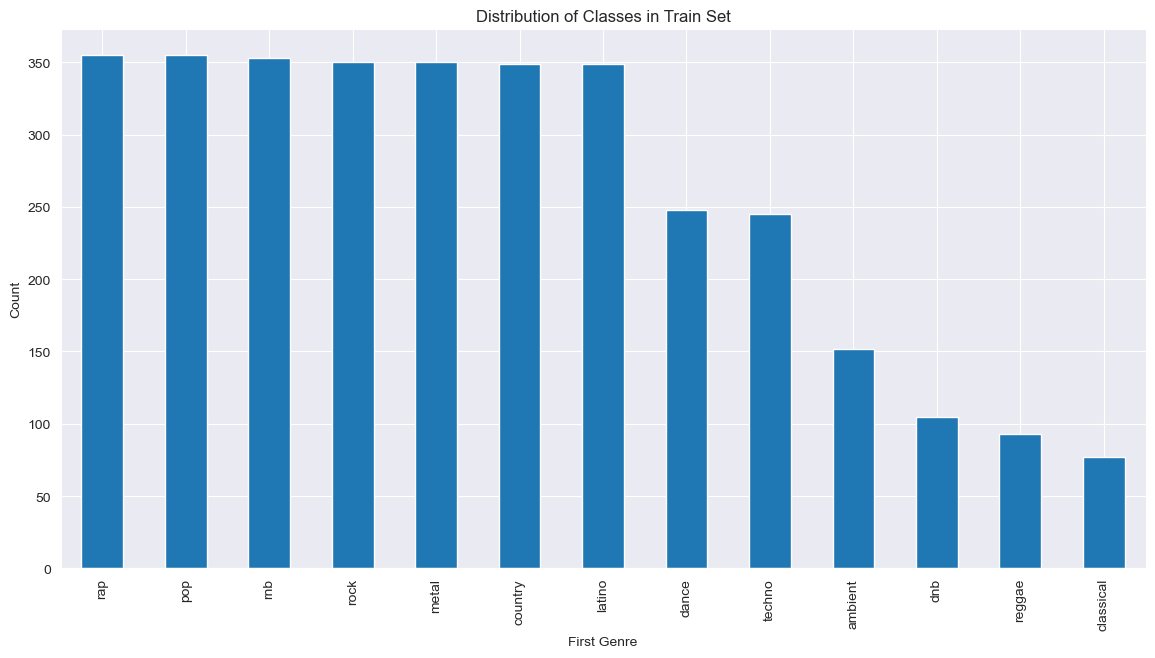

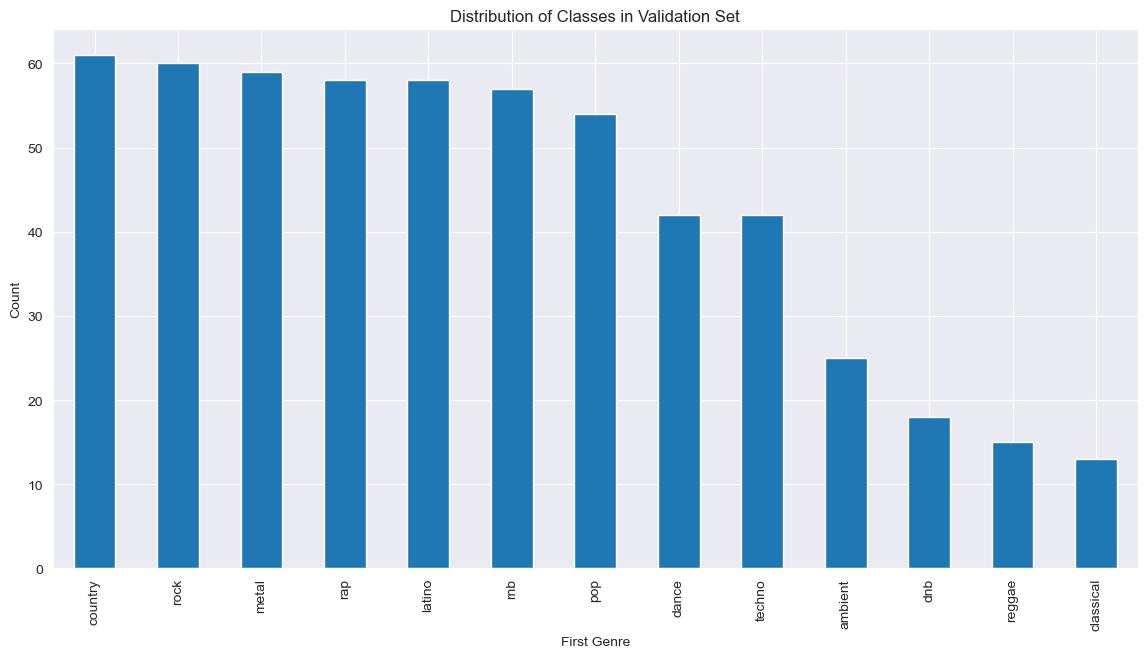

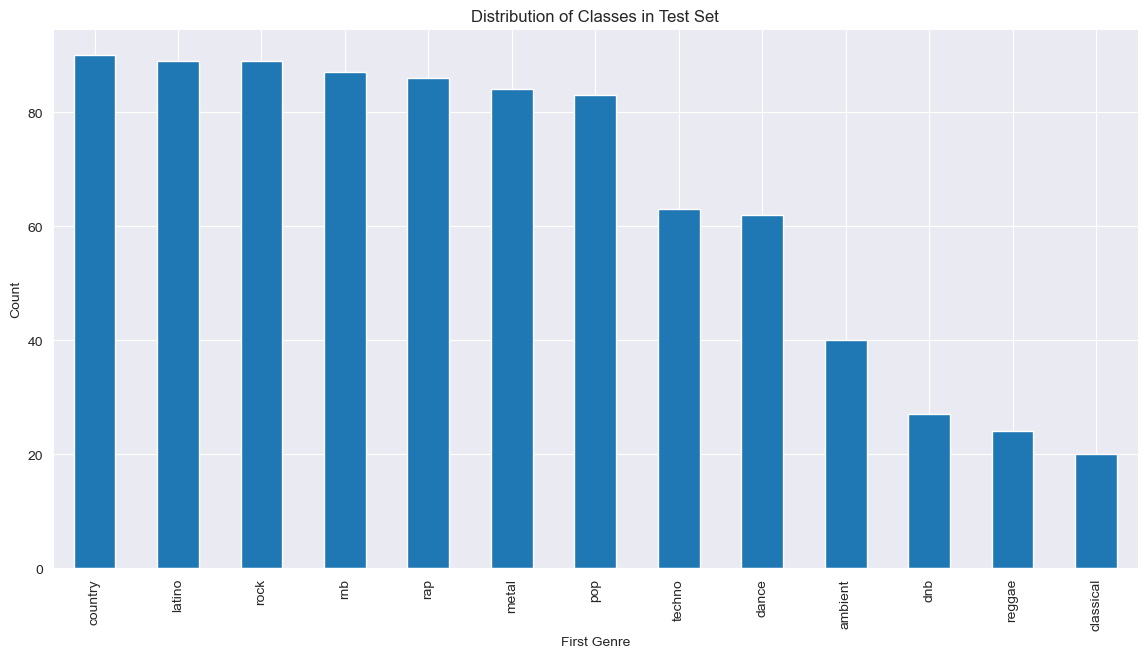

Train set size: 3381
Validation set size: 562
Test set size: 844
Unique classes in train set: 13
Unique classes in validation set: 13
Unique classes in test set: 13


In [5]:
import matplotlib.pyplot as plt
# Plot the distribution of each class in the train set
plt.figure(figsize=(14, 7))
train_df['main_genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes in Train Set')
plt.xlabel('First Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of each class in the validation set
plt.figure(figsize=(14, 7))
val_df['main_genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes in Validation Set')
plt.xlabel('First Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of each class in the test set
plt.figure(figsize=(14, 7))
test_df['main_genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes in Test Set')
plt.xlabel('First Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Print the sizes of the train, validation, and test sets
print(f'Train set size: {train_df.shape[0]}')
print(f'Validation set size: {val_df.shape[0]}')
print(f'Test set size: {test_df.shape[0]}')
print(f'Unique classes in train set: {train_df["main_genre"].nunique()}')
print(f'Unique classes in validation set: {val_df["main_genre"].nunique()}')
print(f'Unique classes in test set: {test_df["main_genre"].nunique()}')

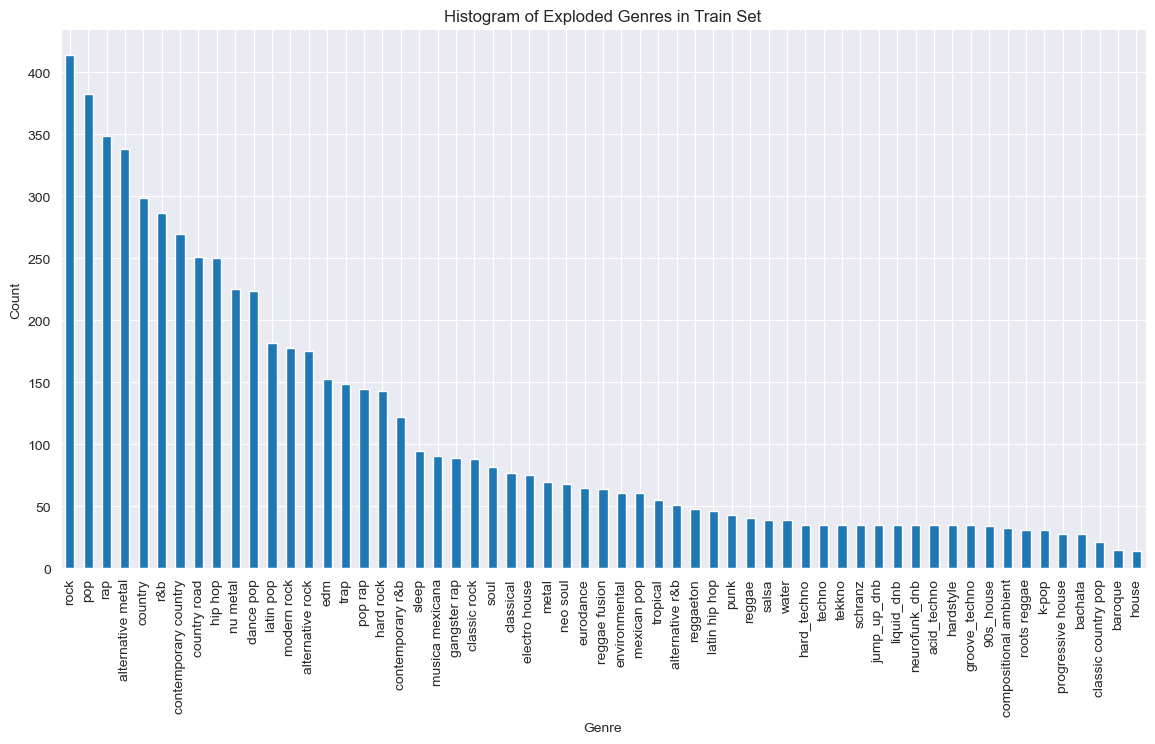

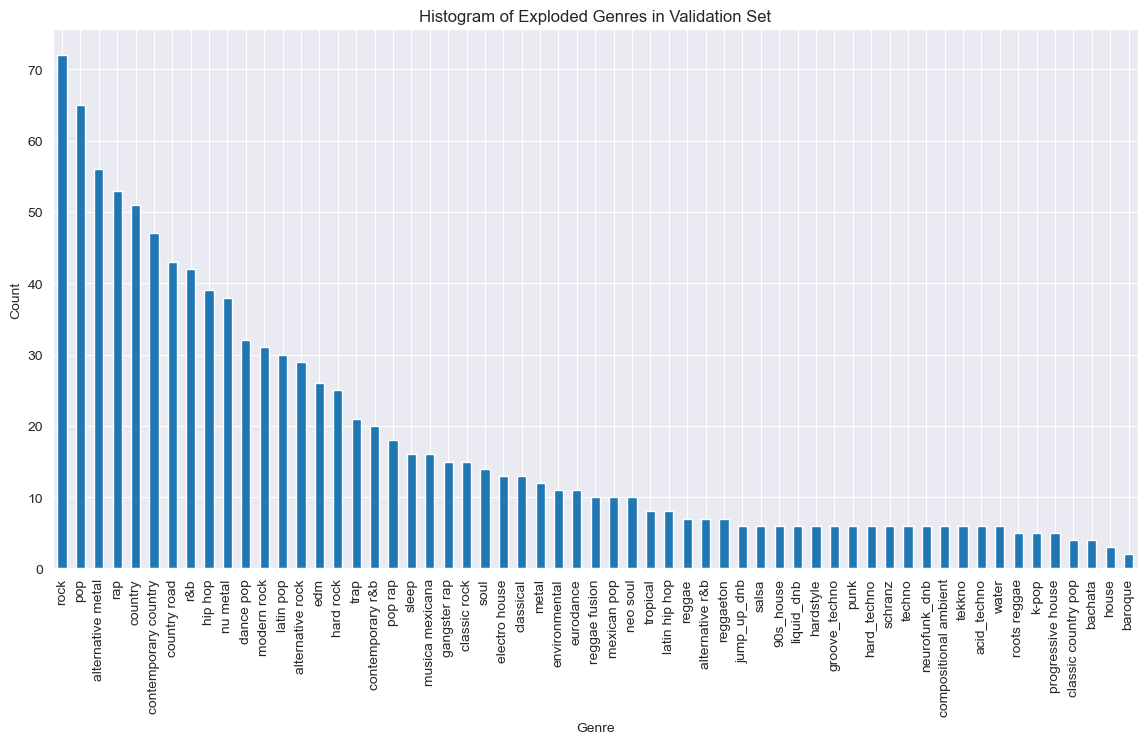

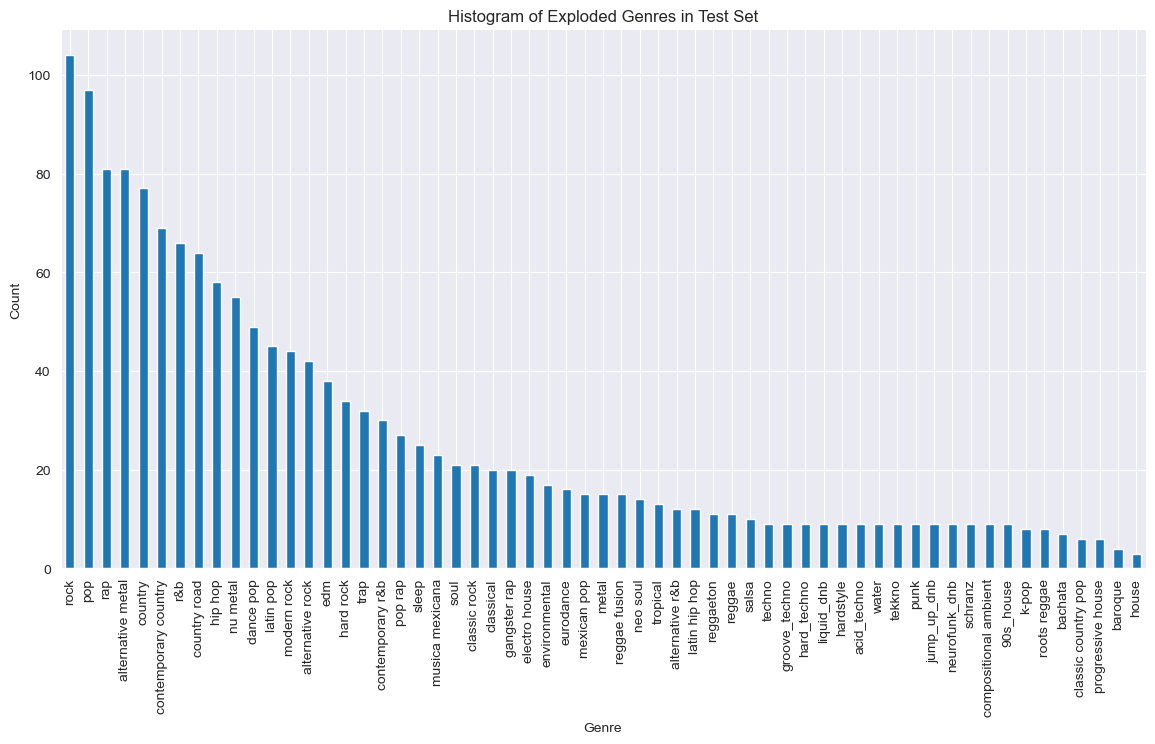

In [6]:
import matplotlib.pyplot as plt


# Ensure the 'genres' column is a list
train_df['genres'] = train_df['genres'].apply(eval)
val_df['genres'] = val_df['genres'].apply(eval)
test_df['genres'] = test_df['genres'].apply(eval)

# Explode the 'genres' column in each split
train_exploded = train_df.explode('genres')
val_exploded = val_df.explode('genres')
test_exploded = test_df.explode('genres')

# Plot the distribution of exploded genres in the train set
plt.figure(figsize=(14, 7))
train_exploded['genres'].value_counts().plot(kind='bar')
plt.title('Histogram of Exploded Genres in Train Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of exploded genres in the validation set
plt.figure(figsize=(14, 7))
val_exploded['genres'].value_counts().plot(kind='bar')
plt.title('Histogram of Exploded Genres in Validation Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Plot the distribution of exploded genres in the test set
plt.figure(figsize=(14, 7))
test_exploded['genres'].value_counts().plot(kind='bar')
plt.title('Histogram of Exploded Genres in Test Set')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [29]:
test_df

name                artist  \
0             Brown Noise 140 hz Sharp Q              Granular   
1                       Survival Tactics           Joey Bada$$   
2                     That Day Will Come              Capleton   
3                           Already Gone        Kelly Clarkson   
4                              The Drugs            The Holdup   
..                                   ...                   ...   
839      The Good, the Bad and the Dirty   Panic! At The Disco   
840            The End Is Where We Begin  Thousand Foot Krutch   
841  Put Your Lights On (feat. Everlast)               Santana   
842              Drink to That All Night        Jerrod Niemann   
843                    You Can't Save Me                   SiR   

                 spotify_id  \
0    1efbB8dNowPNwBU6HaHjup   
1    4pNT8XTKWb2vhcsqwzdXCT   
2    6D4eMFcg3DquhNOQsNanQk   
3    4fq2YUONcgrCJ2SPndSeKC   
4    6CTxqx9pxaoOxOYZSbsqDc   
..                      ...   
839  5eoZTdiq4C4aoEfUwAN0ha   
840  1Ou0kPQcfXuLVYUKV8KUox   
841  3uRaD26t3RkJ8n549udQ83   
842  3M31S6f0z8S3nkFh3eS06W   
843  5LKzqs734Xs528hqK8bGS1   

                                               preview  \
0    https://p.scdn.co/mp3-preview/587cffc089799746...   
1    https://p.scdn.co/mp3-preview/89f912f9bbd2af71...   
2    https://p.scdn.co/mp3-preview/d33eccef67aaf6ac...   
3    https://p.scdn.co/mp3-preview/660bd02563cebe61...   
4    https://p.scdn.co/mp3-preview/c544ea6c0d9720a9...   
..                                                 ...   
839  https://p.scdn.co/mp3-preview/f37091eef36c052b...   
840  https://p.scdn.co/mp3-preview/5037771d0b7498bc...   
841  https://p.scdn.co/mp3-preview/3d6e38a7feb56d15...   
842  https://p.scdn.co/mp3-preview/3e1f057daa61f7a1...   
843  https://p.scdn.co/mp3-preview/65cf0682c523ec2b...   

                                                   img  danceability  energy  \
0    https://i.scdn.co/image/ab67616d0000b273727265...         0.205   0.337   
1    https://i.scdn.co/image/ab67616d0000b273fcd372...         0.530   0.843   
2    https://i.scdn.co/image/ab67616d0000b27352630f...         0.672   0.839   
3    https://i.scdn.co/image/ab67616d0000b2737ed879...         0.209   0.872   
4    https://i.scdn.co/image/ab67616d0000b273a580ae...         0.723   0.810   
..                                                 ...           ...     ...   
839  https://i.scdn.co/image/ab67616d0000b27323152d...         0.531   0.825   
840  https://i.scdn.co/image/ab67616d0000b273405821...         0.463   0.876   
841  https://i.scdn.co/image/ab67616d0000b27347eb3e...         0.606   0.834   
842  https://i.scdn.co/image/ab67616d0000b2736fcccc...         0.639   0.846   
843  https://i.scdn.co/image/ab67616d0000b273bbee54...         0.623   0.585   

     loudness  speechiness  acousticness  ...  speechiness_artist  \
0     -37.221       0.0647       0.75100  ...            0.013223   
1      -2.271       0.3900       0.42800  ...            0.245335   
2      -5.034       0.1140       0.06740  ...            0.271900   
3      -2.996       0.0757       0.21700  ...            0.048986   
4      -3.983       0.0338       0.03370  ...            0.038067   
..        ...          ...           ...  ...                 ...   
839    -5.333       0.0545       0.00191  ...            0.082298   
840    -4.190       0.0529       0.00205  ...            0.067725   
841    -6.101       0.0369       0.01550  ...            0.445000   
842    -6.184       0.0439       0.03250  ...            0.059227   
843    -7.895       0.1240       0.06280  ...            0.281000   

     valence_artist               artist_id  \
0          0.013956  1jfnMuDBl5OaAoU0VwLD8m   
1          0.610977  2P5sC9cVZDToPxyomzF1UH   
2          0.785700  21J3YJTyq1biE3SvSNjzuf   
3          0.434325  3BmGtnKgCSGYIUhmivXKWX   
4          0.816333  1gwTohHbTpE3qdPyDvnOEu   
..              ...                     ...   
839        0.498685  20JZFwl6HVl6yg8a4H3ZqK   
840    

In [11]:

from __future__ import print_function

from random import shuffle

import numpy as np
import tensorflow.compat.v1 as tf
import tf_slim as slim

import vggish_input
import vggish_params
import vggish_slim

tf.disable_eager_execution()
flags = tf.app.flags

flags.DEFINE_integer(
    'num_batches', int(3380/5),
    'Number of batches of examples to feed into the model. Each batch is of '
    'variable size and contains shuffled examples of each class of audio.')

flags.DEFINE_boolean(
    'train_vggish', True,
    'If True, allow VGGish parameters to change during training, thus '
    'fine-tuning VGGish. If False, VGGish parameters are fixed, thus using '
    'VGGish as a fixed feature extractor.')

flags.DEFINE_string(
    'checkpoint', 'vggish_model.ckpt',
    'Path to the VGGish checkpoint file.')

FLAGS = flags.FLAGS

_NUM_CLASSES = 13



2025-03-13 09:27:51.225491: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
import tqdm
current_index = 0
def _get_examples_batch(traindf, batch_size):
    features = []
    labels = []
    global current_index

    for _ in tqdm.tqdm(range(batch_size)):
        if current_index >= len(traindf):
            current_index = 0  # Reset index if it exceeds the dataframe length

        song_path = traindf.iloc[current_index]['file_path']
        label = np.array(traindf.iloc[current_index]['main_genre_encoded']).tolist()
        y, sr = librosa.load(song_path, sr=None)
        y_selected_seconds, _, _ = select_strongest_8_seconds(y, sr)
        examples = vggish_input.waveform_to_examples(y_selected_seconds, sr)

        for example in examples:
            features.append(example)
            labels.append(np.array(label))

        current_index += 1

    # Shuffle (example, label) pairs across all classes.
    labeled_examples = list(zip(features, labels))
    shuffle(labeled_examples)
    print("Current index: ",current_index)
    # Separate and return the features and labels.
    features = [example for (example, _) in labeled_examples]
    labels = [label for (_, label) in labeled_examples]
    return (features, labels)

In [13]:
import tqdm
def _get_examples_batch_validation(data):
    features = []
    labels = []
    for i in tqdm.tqdm(range(len(data))):
        song_path = data.iloc[i]['file_path']
        label = np.array(data.iloc[i]['main_genre_encoded']).tolist()
        y, sr = librosa.load(song_path, sr=None)
        y_selected_seconds, _, _ = select_strongest_8_seconds(y, sr)
        examples = vggish_input.waveform_to_examples(y_selected_seconds, sr)

        for example in examples:
            features.append(example)
            labels.append(np.array(label))

    # Shuffle (example, label) pairs across all classes.
    labeled_examples = list(zip(features, labels))
    shuffle(labeled_examples)
    # Separate and return the features and labels.
    features = [example for (example, _) in labeled_examples]
    labels = [label for (_, label) in labeled_examples]
    return (features, labels)

In [14]:
import tqdm
def _get_examples_batch_test(data):
    features = []
    labels = []
    file_paths = []
    genres = []
    for i in tqdm.tqdm(range(len(data))):
        song_path = data.iloc[i]['file_path']
        genre = data.iloc[i]['main_genre']
        label = np.array(data.iloc[i]['main_genre_encoded']).tolist()
        y, sr = librosa.load(song_path, sr=None)
        y_selected_seconds, _, _ = select_strongest_8_seconds(y, sr)
        examples = vggish_input.waveform_to_examples(y_selected_seconds, sr)
        if len(examples) != 8:
            print(f"Count of spectograms from this song {song_path} is different then 8. And it is of size :  ", len(examples))
        for example in examples:
            features.append(example)
            labels.append(np.array(label))
            file_paths.append(song_path)
            genres.append(genre)
    # Shuffle (example, label) pairs across all classes.
    labeled_examples = list(zip(features, labels, file_paths, genres))
    shuffle(labeled_examples)
    # Separate and return the features and labels.
    features = [example for (example, _, _, _) in labeled_examples]
    labels = [label for (_, label, _, _) in labeled_examples]
    file_paths = [file_path for (_, _, file_path, _) in labeled_examples]
    genres = [genre for (_, _, _, genre) in labeled_examples]
    return (features, labels, file_paths, genres)

In [15]:
x = _get_examples_batch(train_df,5)
print(len(x[0]))

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]

Current index:  5
40


In [16]:
current_index = 0
current_index

0

In [12]:
#TODO here i need to make sure that all labels in one hot encoding are labeled correctly across all the dataframes (train valid test), they point to same class         - compute the one hot encoding first and then split, also assign index to better understanding

In [17]:
from tensorflow.compat.v1.graph_util import convert_variables_to_constants
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_losses = []
train_accuracies = []
train_f1_micros = []
val_losses = []
val_f1micro = []
def save_frozen_graph(sess, output_node_names, output_filename):
    """Freezes the current session and saves the frozen graph to a .pb file."""
    # Get the graph definition
    graph_def = sess.graph.as_graph_def()

    # Convert variables to constants
    frozen_graph_def = convert_variables_to_constants(
        sess, graph_def, output_node_names
    )

    # Save the frozen graph
    output_path = os.path.join(os.getcwd(), output_filename)
    with open(output_path, "wb") as f:
        f.write(frozen_graph_def.SerializeToString())

    print(f"Frozen model saved to: {output_path}")

# def validate(sess, features_input, labels_input, loss, validation_data):
#     """Run validation on the validation dataset."""
#     val_features, val_labels = validation_data
#     val_loss = sess.run(loss, feed_dict={features_input: val_features, labels_input: val_labels})
#     print('Validation loss: %g' % val_loss)
def validate(sess, features_input, labels_input, loss, predictions, validation_data):
    """Run validation and compute loss, accuracy, precision, recall, and F1-score."""
    val_features, val_labels = validation_data

    # Compute loss on validation data
    val_loss, val_preds_probs = sess.run(
        [loss, predictions], feed_dict={features_input: val_features, labels_input: val_labels}
    )

    # Convert probabilities to class predictions (argmax)
    val_preds_classes = np.argmax(val_preds_probs, axis=1)
    val_labels_classes = np.argmax(val_labels, axis=1)
    print("Val preds probs: ", val_preds_probs)
    print("Val preds classes: ", val_preds_classes)
    print("Val labels classes: ", val_labels_classes)
    # Compute classification metrics
    accuracy = accuracy_score(val_labels_classes, val_preds_classes)
    precision_weighted = precision_score(val_labels_classes, val_preds_classes, average='weighted', zero_division=1)
    precision_micro = precision_score(val_labels_classes, val_preds_classes, average='micro', zero_division=1)
    precision_per_class = precision_score(val_labels_classes, val_preds_classes, average=None, zero_division=1)
    recall = recall_score(val_labels_classes, val_preds_classes, average='micro', zero_division=1)
    f1 = f1_score(val_labels_classes, val_preds_classes, average='micro', zero_division=1)

    # Print validation results
    print(f'Validation - Loss: {val_loss:.4f}')
    # Print the metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Weighted Precision: {precision_weighted:.4f}')
    print(f'Micro Precision: {precision_micro:.4f}')
    print(f'Precision per Class: {precision_per_class}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    return val_loss, f1


def validate_test(sess, features_input, labels_input, loss, predictions, test_data):
    """Run validation and compute loss, accuracy, precision, recall, and F1-score."""
    val_features, val_labels, _,_ = test_data

    # Compute loss on validation data
    val_loss, val_preds_probs = sess.run(
        [loss, predictions], feed_dict={features_input: val_features, labels_input: val_labels}
    )

    # Convert probabilities to class predictions (argmax)
    val_preds_classes = np.argmax(val_preds_probs, axis=1)
    print("Val preds classes: ", val_preds_classes)
    val_labels_classes = np.argmax(val_labels, axis=1)
    print("Val labels classes: ", val_labels_classes)
    # Compute classification metrics
    accuracy = accuracy_score(val_labels_classes, val_preds_classes)
    precision_weighted = precision_score(val_labels_classes, val_preds_classes, average='weighted', zero_division=1)
    precision_micro = precision_score(val_labels_classes, val_preds_classes, average='micro', zero_division=1)
    precision_per_class = precision_score(val_labels_classes, val_preds_classes, average=None, zero_division=1)
    recall = recall_score(val_labels_classes, val_preds_classes, average='micro', zero_division=1)
    f1 = f1_score(val_labels_classes, val_preds_classes, average='micro', zero_division=1)

    # Print validation results
    print(f'Test - Loss: {val_loss:.4f}')
    # Print the metrics
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Weighted Precision: {precision_weighted:.4f}')
    print(f'Micro Precision: {precision_micro:.4f}')

    print(f'Precision per Class: {precision_per_class}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')


def list_model_layers(graph):
    for op in graph.get_operations():
        print(f"Name: {op.name}, Type: {op.type}")
        for tensor in op.outputs:
            print(f"  Tensor: {tensor.name}, Shape: {tensor.shape}")


In [18]:
print("Loading validation data...")
validation_data = _get_examples_batch_validation(val_df)
print("Validation data loaded: ", len(validation_data[0]))

test_data = _get_examples_batch_test(test_df)
print("Test data loaded: ", len(test_data[0]))

Loading validation data...


100%|██████████| 562/562 [05:51<00:00,  1.60it/s]


Validation data loaded:  4496


 45%|████▌     | 382/844 [04:11<04:45,  1.62it/s]

Count of spectograms from this song ../mp3songs/Liquid_Drum_and_Bass/Jealousy.mp3 is different then 8. And it is of size :   6


 72%|███████▏  | 604/844 [06:44<02:47,  1.43it/s]

Count of spectograms from this song ../mp3songs/48_genres_11_main_genres/Mansard Roof.mp3 is different then 8. And it is of size :   6


100%|██████████| 844/844 [10:00<00:00,  1.40it/s]

Test data loaded:  6748


In [19]:
def main(_):
  with tf.Graph().as_default(), tf.Session() as sess:
    # Define VGGish.
    embeddings = vggish_slim.define_vggish_slim(training=FLAGS.train_vggish)
    # Define a shallow classification model and associated training ops on top
    # of VGGish.
    with tf.variable_scope('mymodel'):
      # Add a fully connected layer with 100 units. Add an activation function
      # to the embeddings since they are pre-activation.
      num_units = 100
      fc = slim.fully_connected(tf.nn.relu(embeddings), num_units)

      # Add a classifier layer at the end, consisting of parallel logistic
      # classifiers, one per class. This allows for multi-class tasks.
      logits = slim.fully_connected(
          fc, _NUM_CLASSES, activation_fn=None, scope='logits')
      tf.nn.softmax(logits, name='prediction')

      # Add training ops.
      with tf.variable_scope('train'):
        global_step = tf.train.create_global_step()

        # Labels are assumed to be fed as a batch multi-hot vectors, with
        # a 1 in the position of each positive class label, and 0 elsewhere.
        labels_input = tf.placeholder(
            tf.float32, shape=(None, _NUM_CLASSES), name='labels')

        # Cross-entropy label loss.
        xent = tf.nn.softmax_cross_entropy_with_logits(
            logits=logits, labels=labels_input, name='xent')
        loss = tf.reduce_mean(xent, name='loss_op')
        tf.summary.scalar('loss', loss)

        # We use the same optimizer and hyperparameters as used to train VGGish.
        optimizer = tf.train.AdamOptimizer(
            learning_rate=vggish_params.LEARNING_RATE,
            epsilon=vggish_params.ADAM_EPSILON)
        train_op = optimizer.minimize(loss, global_step=global_step)

    # Initialize all variables in the model, and then load the pre-trained
    # VGGish checkpoint.
    sess.run(tf.global_variables_initializer())
    vggish_slim.load_vggish_slim_checkpoint(sess, FLAGS.checkpoint)
    list_model_layers(sess.graph)

    # The training loop.
    features_input = sess.graph.get_tensor_by_name(
        vggish_params.INPUT_TENSOR_NAME)

    predictions = sess.graph.get_tensor_by_name("mymodel/prediction:0")

    for step in range(FLAGS.num_batches):
        print('Current index:', current_index)
        (features, labels) = _get_examples_batch(train_df, 5)
        [num_steps, loss_value, preds, _] = sess.run(
            [global_step, loss, predictions, train_op],
            feed_dict={features_input: features, labels_input: labels})
        print("predictions: ",preds)
        preds_classes = np.argmax(preds, axis=1)  # Convert probabilities to 0/1
        true_labels = np.argmax(labels, axis=1)
        print("Preds_classes: ",preds_classes)
        print("Labels: ",labels)
        # Compute accuracy
        train_accuracy = accuracy_score(true_labels, preds_classes)
        # Compute F1-Micro
        train_f1_micro = f1_score(true_labels, preds_classes, average="micro")

        print(f'Step {num_steps}: Loss = {loss_value:.4f}, Accuracy = {train_accuracy:.4f}, F1-Micro = {train_f1_micro:.4f}')
        train_losses.append(loss_value)
        train_accuracies.append(train_accuracy)
        train_f1_micros.append(train_f1_micro)

        if step % 50 == 0:  # Perform validation every 25 steps
            print("Validating...")
            val_loss, f1 = validate(sess, features_input, labels_input, loss, predictions, validation_data)
            val_losses.append(val_loss)
            val_f1micro.append(f1)

    print("Validating...")
    val_loss, f1 = validate(sess, features_input, labels_input, loss, predictions, validation_data)
    val_losses.append(val_loss)
    val_f1micro.append(f1)
    print("Validating on test data...")
    validate_test(sess, features_input, labels_input, loss, predictions, test_data)

    print("Training Done!")

    # Save the fine-tuned model
    saver = tf.train.Saver()
    saver.save(sess, 'fine_tuned_13_genres_with_val_softmax_vggish_model_batch_size_5.ckpt')
    output_node_names = ["mymodel/prediction"]  # Change if needed
#TODO PREPIS MENO MODELA
# Save the model as a frozen graph (.pb)
    save_frozen_graph(sess, output_node_names, "fine_tuned_13_genres_with_val_softmax_vggish_model_batch_size_5.pb")


In [20]:
if __name__ == '__main__':
  tf.app.run()

/Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



/Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:318: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  warnings.warn('`tf.layers.flatten` is deprecated and '
W0313 09:55:56.406847 140704380009280 deprecation.py:50] From /Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1260: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

2025-03-13 09:55:56.835765: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


INFO:tensorflow:Restoring parameters from vggish_model.ckpt


I0313 09:55:58.159589 140704380009280 saver.py:1417] Restoring parameters from vggish_model.ckpt


Name: vggish/input_features, Type: Placeholder
  Tensor: vggish/input_features:0, Shape: (None, 96, 64)
Name: vggish/Reshape/shape, Type: Const
  Tensor: vggish/Reshape/shape:0, Shape: (4,)
Name: vggish/Reshape, Type: Reshape
  Tensor: vggish/Reshape:0, Shape: (None, 96, 64, 1)
Name: vggish/conv1/weights/Initializer/truncated_normal/shape, Type: Const
  Tensor: vggish/conv1/weights/Initializer/truncated_normal/shape:0, Shape: (4,)
Name: vggish/conv1/weights/Initializer/truncated_normal/mean, Type: Const
  Tensor: vggish/conv1/weights/Initializer/truncated_normal/mean:0, Shape: ()
Name: vggish/conv1/weights/Initializer/truncated_normal/stddev, Type: Const
  Tensor: vggish/conv1/weights/Initializer/truncated_normal/stddev:0, Shape: ()
Name: vggish/conv1/weights/Initializer/truncated_normal/TruncatedNormal, Type: TruncatedNormal
  Tensor: vggish/conv1/weights/Initializer/truncated_normal/TruncatedNormal:0, Shape: (3, 3, 1, 64)
Name: vggish/conv1/weights/Initializer/truncated_normal/mul, T

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  5
predictions:  [[0.05698219 0.09587247 0.09409598 0.05624296 0.08149734 0.06008986
  0.05963742 0.12464545 0.06706062 0.07517362 0.0990731  0.04818366
  0.08144525]
 [0.07182584 0.07449011 0.08438335 0.04393948 0.09421676 0.06957465
  0.09321761 0.10081006 0.07312085 0.07791273 0.08451983 0.05859407
  0.07339474]
 [0.06905571 0.08938494 0.08105139 0.05303361 0.06333409 0.07488115
  0.07197427 0.12076152 0.06623336 0.06911805 0.0982073  0.04214279
  0.10082182]
 [0.05757508 0.09421279 0.09309273 0.06190005 0.08498773 0.06339759
  0.05864447 0.11314778 0.06131553 0.08111303 0.09534776 0.04897989
  0.08628555]
 [0.10654097 0.08551535 0.09555108 0.04448853 0.06398132 0.07654501
  0.08693531 0.09389573 0.06124108 0.07877134 0.08652344 0.04382783
  0.07618302]
 [0.05558605 0.08206254 0.09316818 0.04891914 0.08247786 0.05964698
  0.07730605 0.14760101 0.07616553 0.0606102  0.0935054  0.04765882
  0.0752923 ]
 [0.10675146 0.07499439 0.10549959 0.03930182 0.07201581 0.06506099


100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  10
predictions:  [[0.0696284  0.0638689  0.1210207  0.03063278 0.06551071 0.05151317
  0.08756077 0.1564479  0.067264   0.07635965 0.0998944  0.04800215
  0.0622965 ]
 [0.0612623  0.08251797 0.07999147 0.04994138 0.05132587 0.07629142
  0.07659232 0.11658712 0.09195205 0.08504851 0.08228636 0.0408551
  0.10534803]
 [0.0674583  0.07974914 0.08317172 0.05344807 0.05101732 0.07622085
  0.07265426 0.12122437 0.08132121 0.08621088 0.08502258 0.039882
  0.10261935]
 [0.05831696 0.09006871 0.11051433 0.0433117  0.06740402 0.05430315
  0.07349651 0.14844525 0.07063819 0.07078484 0.08634321 0.05064707
  0.0757261 ]
 [0.07949796 0.04582236 0.07641213 0.03689053 0.09202152 0.06124729
  0.10278247 0.09181786 0.06923776 0.08146895 0.11123563 0.05809729
  0.09346828]
 [0.07084589 0.0731686  0.08361152 0.04227707 0.07848524 0.05948953
  0.08877254 0.10303895 0.07669021 0.07291817 0.10809715 0.04922569
  0.09337934]
 [0.07321253 0.08684736 0.11698963 0.03912076 0.05695123 0.06501459
  

100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


Current index:  15
predictions:  [[0.07301424 0.10856666 0.12114692 0.02868579 0.04376546 0.06471734
  0.06928999 0.1238653  0.04920787 0.08598637 0.08904063 0.04123307
  0.10148038]
 [0.06729441 0.0816884  0.10228282 0.04212884 0.0657628  0.07252074
  0.09856231 0.12214322 0.07070719 0.07341841 0.0895381  0.04150403
  0.07244871]
 [0.06246294 0.0880576  0.12093063 0.04544453 0.06619123 0.06953196
  0.07404681 0.12013359 0.06249091 0.0825256  0.08017933 0.04485386
  0.08315083]
 [0.0684636  0.08251806 0.10163675 0.04902834 0.06716262 0.06820685
  0.08211183 0.11884011 0.0667116  0.09202752 0.07827217 0.05124185
  0.07377875]
 [0.06517451 0.0794695  0.09296151 0.04726279 0.07852328 0.07055839
  0.08337995 0.11170006 0.06615721 0.0792037  0.08135103 0.05364474
  0.09061328]
 [0.05398867 0.09105185 0.09819675 0.0511306  0.07335155 0.06437688
  0.07504272 0.12793371 0.06807908 0.08456764 0.07923571 0.05604822
  0.07699654]
 [0.07559953 0.08869655 0.09470492 0.0414171  0.06165011 0.07746402

100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


Current index:  20
predictions:  [[0.07570241 0.06052507 0.09479366 0.04595124 0.09927705 0.05427958
  0.08561751 0.09576022 0.0620777  0.08004599 0.10097808 0.05601226
  0.08897928]
 [0.049516   0.0844363  0.10311224 0.05159145 0.08397117 0.0644336
  0.07055201 0.1105589  0.08716542 0.0836463  0.08158773 0.05831703
  0.07111183]
 [0.07905045 0.0944387  0.10857262 0.04248946 0.05700339 0.07540087
  0.08742114 0.10724262 0.05449597 0.08166461 0.08916714 0.04134482
  0.08170821]
 [0.06551204 0.086343   0.11180831 0.04343991 0.06772555 0.06681445
  0.07992918 0.11372506 0.06709916 0.08351832 0.08168588 0.04832916
  0.08406989]
 [0.08136135 0.06981704 0.09570353 0.03949139 0.07322251 0.06107671
  0.08857444 0.11388748 0.07816854 0.08718954 0.08523481 0.05653521
  0.06973738]
 [0.08451307 0.06628565 0.09521511 0.03918988 0.0924748  0.05697482
  0.08908793 0.10444527 0.06328393 0.07064334 0.09053446 0.04720247
  0.10014926]
 [0.0651721  0.08020613 0.09021761 0.04488043 0.08125769 0.06183918


100%|██████████| 5/5 [00:02<00:00,  1.95it/s]


Current index:  25
predictions:  [[0.07336315 0.05789468 0.09702138 0.04772967 0.08569706 0.06258904
  0.08443213 0.09473068 0.06506158 0.09099507 0.10032392 0.05730403
  0.08285763]
 [0.06315024 0.08129959 0.09985869 0.05591303 0.08190338 0.07134072
  0.08094497 0.10753272 0.06356245 0.08585728 0.08110994 0.04946782
  0.07805907]
 [0.08100664 0.07232648 0.10611051 0.03939471 0.08886981 0.06511629
  0.09079282 0.09840561 0.05525181 0.07844282 0.08968672 0.04993703
  0.08465873]
 [0.06634642 0.06703308 0.09128209 0.05052236 0.0861627  0.0666332
  0.08483879 0.10465004 0.0639788  0.08114613 0.10316461 0.06102477
  0.07321702]
 [0.04892508 0.07798318 0.09260959 0.05987686 0.07517751 0.07405563
  0.07109329 0.126908   0.0698223  0.06804544 0.10862866 0.05130873
  0.07556567]
 [0.0526585  0.08294521 0.09580702 0.04884221 0.07723284 0.07720403
  0.07876588 0.11795796 0.07052809 0.08585625 0.07191128 0.05338342
  0.08690738]
 [0.04649037 0.07231811 0.07973342 0.05588285 0.07031072 0.07242436


100%|██████████| 5/5 [00:02<00:00,  1.93it/s]


Current index:  30
predictions:  [[0.05053518 0.08114298 0.09048331 0.02879051 0.07531419 0.05922136
  0.09495118 0.12413032 0.11033779 0.05340852 0.10633942 0.05744564
  0.06789952]
 [0.06221482 0.07869431 0.1150916  0.04274503 0.07611886 0.06382015
  0.07095879 0.12022454 0.06029401 0.08647995 0.09308107 0.04561096
  0.08466584]
 [0.05092483 0.08381831 0.07895051 0.03654139 0.07559191 0.05781191
  0.07550314 0.10556964 0.08748564 0.08357887 0.13337764 0.05117819
  0.07966802]
 [0.06639428 0.07093408 0.08741042 0.03430854 0.075116   0.0579612
  0.09748134 0.13232066 0.0796885  0.06215016 0.09719171 0.06445999
  0.07458312]
 [0.03930208 0.08515343 0.08651748 0.06647784 0.03971223 0.05016572
  0.07049528 0.14121015 0.070155   0.09622494 0.12444781 0.05498868
  0.07514925]
 [0.07058931 0.06209469 0.08472275 0.04681535 0.09808078 0.06135422
  0.07272198 0.1106547  0.08202785 0.07906294 0.09029621 0.06856775
  0.07301138]
 [0.04960287 0.08774737 0.0875565  0.0546771  0.05391931 0.06003728


100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  35
predictions:  [[0.10687802 0.0722015  0.10840259 0.0407834  0.06706779 0.07328793
  0.0902638  0.09747158 0.06029841 0.09607126 0.08395912 0.04291794
  0.06039659]
 [0.04913935 0.08720911 0.10183574 0.05245066 0.08823638 0.07966471
  0.07256655 0.11659651 0.06369302 0.07686266 0.09003174 0.04741868
  0.07429494]
 [0.07174962 0.06563955 0.10951418 0.03754113 0.08607886 0.05817034
  0.09200744 0.11183457 0.0721396  0.08661052 0.087691   0.05238802
  0.06863511]
 [0.07918889 0.07910163 0.09943894 0.0522696  0.07240818 0.07591111
  0.09039646 0.10711316 0.05815666 0.08785241 0.07026207 0.04734982
  0.08055112]
 [0.09950203 0.07198277 0.12439097 0.03585566 0.06526921 0.07756975
  0.08662616 0.10056427 0.05422609 0.09596857 0.08314411 0.04105059
  0.06384974]
 [0.06212082 0.08018705 0.08684512 0.04604426 0.08358984 0.06703794
  0.09293199 0.12261559 0.06603573 0.0865635  0.0819281  0.04207098
  0.08202904]
 [0.04434193 0.0898833  0.09917089 0.05423541 0.08968519 0.07053667

100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Current index:  40
predictions:  [[0.0529676  0.07516156 0.072841   0.06014709 0.09271683 0.06406182
  0.06620967 0.11458645 0.06977519 0.0728996  0.12136226 0.06873711
  0.0685337 ]
 [0.05978431 0.05994589 0.07742293 0.0475849  0.08853492 0.06101962
  0.07996644 0.11744128 0.06897524 0.06816944 0.13966455 0.07240996
  0.05908047]
 [0.062422   0.06459031 0.09803993 0.04628714 0.09993204 0.06480777
  0.09051085 0.10324872 0.06434426 0.07870206 0.10773399 0.04460994
  0.07477106]
 [0.05312995 0.0716667  0.09254068 0.0535369  0.08303252 0.06151636
  0.07525254 0.13600588 0.07071624 0.06412734 0.11087417 0.05964195
  0.06795868]
 [0.0756809  0.07208604 0.10846234 0.04716991 0.08616419 0.06951299
  0.08762126 0.10352238 0.05911249 0.07936609 0.09592904 0.04203296
  0.07333931]
 [0.04540345 0.06537467 0.0876015  0.04412914 0.07596292 0.06045799
  0.07327954 0.15524746 0.07912447 0.08194041 0.10036644 0.06157113
  0.06954081]
 [0.0433902  0.07809961 0.07053299 0.06987981 0.08249149 0.07696912

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  45
predictions:  [[0.05089952 0.09318144 0.09260926 0.07155224 0.08625565 0.07055004
  0.06330153 0.09698997 0.05578492 0.08418425 0.07773536 0.07096839
  0.08598745]
 [0.05159604 0.04251852 0.09320056 0.04430574 0.09631226 0.06623434
  0.07103194 0.14178249 0.04383372 0.10061049 0.15475889 0.06047192
  0.03334308]
 [0.06124721 0.09162189 0.08857066 0.05740402 0.08468858 0.06832613
  0.07065457 0.10645635 0.06861724 0.07586195 0.08591078 0.05564487
  0.08499569]
 [0.03694136 0.0330695  0.0791832  0.04743418 0.07761026 0.06169613
  0.08379714 0.16107577 0.04336551 0.10365628 0.16826917 0.05912006
  0.04478145]
 [0.04984502 0.09226305 0.09453665 0.05830671 0.07762235 0.06810002
  0.06982976 0.12541215 0.06799264 0.080554   0.08410552 0.04558393
  0.08584814]
 [0.06159842 0.10102236 0.09900822 0.05337829 0.07590493 0.06731082
  0.07256102 0.09794302 0.06553699 0.08385278 0.07666565 0.05349645
  0.09172111]
 [0.05898917 0.07358819 0.09010313 0.05225292 0.1021043  0.05568896

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  50
predictions:  [[0.0630292  0.0855151  0.11349104 0.04316261 0.07201813 0.07220966
  0.08749531 0.11285231 0.05846692 0.07504128 0.09479202 0.04009126
  0.08183509]
 [0.09877216 0.07746398 0.12963995 0.03832766 0.06150058 0.07745612
  0.09240676 0.09661778 0.05209555 0.08833911 0.08443714 0.03320527
  0.06973792]
 [0.05926191 0.06192222 0.11183663 0.04016646 0.08130297 0.07192063
  0.07858954 0.13484024 0.05811397 0.0797684  0.08697528 0.05399371
  0.08130793]
 [0.04511568 0.07957094 0.09078284 0.05996976 0.07545446 0.06452317
  0.05866056 0.15708348 0.06587183 0.07550269 0.09517349 0.06423931
  0.06805164]
 [0.05471109 0.09470481 0.08777804 0.0609348  0.07632572 0.06563667
  0.06697782 0.11572427 0.06726209 0.07640658 0.08749986 0.04886115
  0.09717708]
 [0.07038353 0.06252389 0.12348853 0.04219099 0.07979805 0.05954298
  0.08371093 0.09516631 0.04587068 0.10607845 0.09798966 0.054737
  0.07851885]
 [0.06202384 0.08134815 0.09995873 0.048313   0.07912762 0.05945354
 

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  55
predictions:  [[0.06913237 0.07698577 0.1024762  0.05735331 0.0823563  0.06498888
  0.06747501 0.10866763 0.04995327 0.10494445 0.07584643 0.06592078
  0.0738996 ]
 [0.06704647 0.07843431 0.09801111 0.0429911  0.09113356 0.062699
  0.09023328 0.10579526 0.06693112 0.07133136 0.10283968 0.04783144
  0.0747223 ]
 [0.0734367  0.0777618  0.10436763 0.04618333 0.07839992 0.06882668
  0.08529307 0.10054719 0.05417491 0.1061214  0.07207097 0.05440049
  0.07841586]
 [0.07574534 0.07285617 0.10805985 0.05408908 0.07813504 0.07122314
  0.07395227 0.1037129  0.04469221 0.11191191 0.06538176 0.06291462
  0.07732576]
 [0.06074356 0.05611596 0.1032116  0.05536658 0.09594948 0.06180543
  0.08233554 0.0957645  0.06640374 0.10715838 0.08711337 0.04903041
  0.07900144]
 [0.07208806 0.07090286 0.0946244  0.0448314  0.0829002  0.07801536
  0.09039763 0.09941372 0.05252207 0.10745143 0.07032436 0.05616785
  0.08036063]
 [0.09406788 0.08834138 0.12941457 0.03909814 0.05603272 0.07180025
 

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  60
predictions:  [[0.06198668 0.0572517  0.11400522 0.03880829 0.09031664 0.05379212
  0.08579712 0.11765521 0.06000277 0.07813952 0.12053841 0.04636612
  0.07534024]
 [0.050924   0.08320287 0.0805365  0.06024682 0.08953979 0.0618154
  0.067668   0.11501599 0.07026141 0.09055604 0.08618691 0.05137043
  0.09267583]
 [0.06057321 0.07959529 0.08212406 0.05505063 0.08988658 0.06410947
  0.0705379  0.10913784 0.05663065 0.0980337  0.08329649 0.06382514
  0.08719894]
 [0.09607103 0.08318901 0.09257367 0.04651854 0.05742992 0.08814586
  0.09092282 0.10452025 0.05613976 0.07999086 0.07122181 0.04879666
  0.08447978]
 [0.05235868 0.06770967 0.09840155 0.04601783 0.11585266 0.05693508
  0.07883846 0.10680377 0.06159793 0.09188677 0.11700828 0.03923572
  0.06735365]
 [0.07040498 0.07875614 0.11626798 0.0426539  0.07609405 0.06917412
  0.08038951 0.11604669 0.05480165 0.07712214 0.09704769 0.04101831
  0.08022286]
 [0.06026495 0.08438089 0.08500823 0.05504425 0.08245762 0.06161888


100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  65
predictions:  [[0.04124323 0.09926765 0.09439756 0.06331706 0.06365792 0.06027645
  0.06049503 0.14893918 0.06211857 0.07496023 0.09342909 0.05018642
  0.08771161]
 [0.04217482 0.11072952 0.10147181 0.05432552 0.0648751  0.05067336
  0.07496187 0.13394697 0.06364919 0.06465986 0.10509955 0.04058684
  0.09284554]
 [0.06889127 0.06142621 0.07343023 0.06720472 0.06901187 0.08844664
  0.06973134 0.14057784 0.07062721 0.06560358 0.07433961 0.04437516
  0.10633441]
 [0.07810275 0.05850701 0.06991022 0.07387006 0.06406184 0.08963013
  0.06844048 0.11050887 0.0724587  0.06447791 0.0798879  0.05304553
  0.11709861]
 [0.0621525  0.06642295 0.09410092 0.0648485  0.06573153 0.07544964
  0.08216451 0.09710195 0.09015688 0.07589673 0.08722132 0.0621888
  0.07656373]
 [0.06915701 0.06534503 0.10078968 0.05598541 0.07574603 0.07708615
  0.08708654 0.09197628 0.07913475 0.07945904 0.08885664 0.04481153
  0.08456586]
 [0.05897221 0.07364947 0.09899963 0.04139481 0.0861714  0.05736556


100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  70
predictions:  [[0.0421022  0.09649301 0.11087862 0.05573275 0.08359243 0.05701574
  0.07005662 0.10306423 0.07371535 0.06285748 0.08856608 0.07734087
  0.07858462]
 [0.06725764 0.06539953 0.10481247 0.04305996 0.0873002  0.06802522
  0.08244037 0.10715795 0.07344108 0.07971499 0.09425887 0.05434793
  0.07278375]
 [0.07277412 0.06807568 0.07336584 0.04107464 0.112639   0.0595062
  0.07375582 0.08467089 0.07312955 0.07142737 0.12290332 0.05396862
  0.09270902]
 [0.05195054 0.08609039 0.11398479 0.04904017 0.07900489 0.0596403
  0.06938174 0.12221502 0.0778093  0.06006919 0.08259872 0.05742504
  0.0907899 ]
 [0.07418758 0.05923659 0.09320807 0.04180485 0.09257417 0.05967163
  0.08390246 0.11299132 0.07519469 0.07557318 0.10378291 0.05290887
  0.07496369]
 [0.04628716 0.09309337 0.11137854 0.04110156 0.07584784 0.05277721
  0.11071055 0.0960634  0.1120027  0.0587781  0.08083297 0.04649226
  0.07463433]
 [0.06418231 0.06758089 0.12880546 0.03343784 0.06072891 0.05453783
 

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  75
predictions:  [[0.06819037 0.07452899 0.09107097 0.04627488 0.08659823 0.07447041
  0.08737588 0.10698275 0.06202167 0.07350709 0.100542   0.04695853
  0.08147817]
 [0.08195287 0.07104129 0.09165991 0.05503776 0.05480284 0.06789285
  0.0831043  0.1298479  0.06840248 0.07042072 0.0972987  0.04884096
  0.07969733]
 [0.09462855 0.08506125 0.13861695 0.03460377 0.05508612 0.06458731
  0.07999671 0.11782238 0.054273   0.08720462 0.0873571  0.03764127
  0.06312097]
 [0.10001465 0.0845792  0.13876103 0.03294154 0.05438501 0.06534314
  0.07700948 0.11374409 0.05027849 0.09882822 0.08581519 0.03720977
  0.06109018]
 [0.07740369 0.07240012 0.08789364 0.04779017 0.07704774 0.08179408
  0.09048764 0.09217569 0.06218181 0.09814701 0.07615846 0.05332719
  0.08319277]
 [0.08586092 0.08707295 0.10113323 0.04275042 0.07676046 0.06768046
  0.08205611 0.09306139 0.06399589 0.08858226 0.07847114 0.04693802
  0.08563665]
 [0.07608044 0.0844056  0.08302203 0.04487077 0.08397322 0.07067215

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  80
predictions:  [[0.06592984 0.10124323 0.12150139 0.04385014 0.06300135 0.06129225
  0.07023937 0.13201727 0.0581704  0.07393447 0.09119995 0.0443719
  0.07324851]
 [0.06393273 0.06589524 0.1065541  0.03903436 0.07596867 0.06159088
  0.08391827 0.14695707 0.0561773  0.06641066 0.10999507 0.04885045
  0.07471513]
 [0.06594827 0.09313671 0.11160734 0.04475326 0.06864977 0.07808813
  0.07938968 0.12449151 0.05368146 0.07525422 0.08422972 0.04073341
  0.08003645]
 [0.06970004 0.05464064 0.11602768 0.03872143 0.09094829 0.05955673
  0.08609357 0.10899254 0.06045048 0.08796318 0.1087786  0.05174492
  0.06638183]
 [0.0681149  0.06058184 0.09630974 0.04199536 0.09603034 0.06175021
  0.0844169  0.12996648 0.05871956 0.06905493 0.1048689  0.051097
  0.07709385]
 [0.06681419 0.05305229 0.10434012 0.04061511 0.09608398 0.05462374
  0.09169643 0.10212249 0.06174857 0.0891256  0.12080608 0.0474383
  0.07153308]
 [0.07546543 0.05333108 0.09233973 0.03778468 0.09469975 0.05757087
  0

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  85
predictions:  [[0.03858325 0.09649979 0.1007587  0.03608112 0.05142399 0.04700988
  0.06263961 0.1864369  0.0960766  0.05567135 0.09225545 0.04341279
  0.09315052]
 [0.064199   0.08049741 0.14858523 0.03459221 0.04652869 0.05668714
  0.07702404 0.15524676 0.05511932 0.0749635  0.09061576 0.03583859
  0.08010233]
 [0.0622603  0.09446815 0.13703056 0.03787593 0.05841515 0.05833273
  0.06975298 0.15375    0.05897715 0.06770446 0.0866101  0.03701822
  0.07780425]
 [0.07169507 0.08100632 0.12596539 0.03892306 0.0646579  0.05481016
  0.08311785 0.13530134 0.07147863 0.07708707 0.08208074 0.04770648
  0.06616995]
 [0.03701182 0.09800493 0.09029894 0.04041164 0.07172883 0.06822024
  0.10428096 0.13595138 0.07855143 0.07210004 0.08006556 0.05743127
  0.06594278]
 [0.08632593 0.08949421 0.11872705 0.04068315 0.06511924 0.06624025
  0.08306067 0.10222261 0.0639841  0.08928739 0.08486252 0.03774306
  0.07224982]
 [0.06439102 0.09336663 0.1057063  0.0475714  0.07504135 0.05666564

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  90
predictions:  [[0.06365145 0.07882246 0.08603971 0.04732526 0.08588235 0.05771777
  0.08805528 0.13088281 0.07281102 0.0860569  0.0783364  0.04656368
  0.07785495]
 [0.03686373 0.07007542 0.11998732 0.04656896 0.07684079 0.0628781
  0.06819031 0.15047355 0.05428969 0.09485665 0.10150435 0.04671541
  0.07075575]
 [0.04436054 0.10711325 0.11680479 0.04966861 0.05862604 0.07162733
  0.07410789 0.13021307 0.05767025 0.07993853 0.07890827 0.03523963
  0.09572169]
 [0.06909794 0.08393604 0.08715594 0.04869517 0.07915251 0.06601877
  0.08430994 0.11492997 0.06588058 0.09898445 0.07091658 0.05308265
  0.07783954]
 [0.06410439 0.07632072 0.08359344 0.06466211 0.0673183  0.07904656
  0.07224188 0.09820239 0.07452381 0.07947405 0.08517336 0.05154534
  0.10379369]
 [0.0720716  0.07298718 0.07083891 0.0568106  0.07153118 0.07796604
  0.06852146 0.0953959  0.08399588 0.06604143 0.07901327 0.04813454
  0.13669208]
 [0.06714395 0.07173149 0.07809241 0.06764455 0.06620479 0.08381084


100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  95
predictions:  [[0.06272893 0.07073274 0.10408284 0.04339382 0.09431468 0.05962395
  0.08614287 0.09579567 0.0615123  0.08149552 0.11705343 0.04148165
  0.08164153]
 [0.08384977 0.08526369 0.12392833 0.05134837 0.0628659  0.07792898
  0.0809937  0.09962682 0.04947053 0.08842094 0.07307941 0.03995481
  0.08326869]
 [0.04958623 0.07898885 0.1288433  0.03778021 0.08704328 0.05480845
  0.08367363 0.12188847 0.06449783 0.06607936 0.11639945 0.04046778
  0.06994312]
 [0.04279577 0.0982985  0.08658903 0.0522859  0.07843856 0.07395166
  0.06641407 0.11616685 0.06652719 0.10013843 0.05029205 0.0479302
  0.12017164]
 [0.058189   0.06367607 0.1118941  0.05096079 0.09514925 0.06989632
  0.06981117 0.12983893 0.0622161  0.07216027 0.09137195 0.05675848
  0.06807749]
 [0.0699921  0.05376261 0.10276923 0.03985734 0.09422355 0.05345473
  0.09035882 0.10854101 0.06384534 0.0846057  0.10897665 0.04991541
  0.07969751]
 [0.08798396 0.07014264 0.10451473 0.0470249  0.06361026 0.09076238


100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  100
predictions:  [[0.08087283 0.06291841 0.10639246 0.04940142 0.09100626 0.0535373
  0.07035359 0.12498758 0.06337091 0.0886433  0.08344698 0.05773355
  0.06733533]
 [0.07735516 0.09603588 0.12468348 0.03685981 0.06459975 0.05078879
  0.06872355 0.12741092 0.06605008 0.09295355 0.08551224 0.04210033
  0.06692647]
 [0.0694895  0.09798009 0.13392375 0.03579122 0.05189889 0.05618494
  0.07524638 0.13641825 0.06030707 0.08195058 0.09127203 0.03893321
  0.07060405]
 [0.04990293 0.10670412 0.1025077  0.0492851  0.06755823 0.04752078
  0.05729302 0.17407894 0.07161928 0.05936294 0.09554925 0.03543983
  0.0831778 ]
 [0.06351283 0.0685877  0.10935833 0.0557087  0.07943444 0.07546367
  0.08005169 0.09927718 0.0747085  0.08096534 0.08394254 0.05209584
  0.07689317]
 [0.0984982  0.10360352 0.13338359 0.03345265 0.0468793  0.06222093
  0.08629432 0.10918542 0.0457272  0.08425248 0.08035988 0.03470707
  0.08143535]
 [0.03856812 0.10630676 0.10590364 0.05646391 0.07782945 0.04988928

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  105
predictions:  [[0.07842654 0.07673725 0.09401712 0.04278675 0.08237489 0.06327263
  0.08439475 0.09814903 0.06189865 0.07545476 0.08489261 0.05334265
  0.10425239]
 [0.04471734 0.05565086 0.0826897  0.06268799 0.05647668 0.05731283
  0.06755652 0.1712002  0.06002837 0.09350985 0.13605444 0.06058979
  0.05152538]
 [0.06881853 0.09218182 0.110076   0.04188044 0.07322039 0.06047374
  0.08565277 0.11929283 0.0597002  0.06909259 0.09361898 0.02985593
  0.0961356 ]
 [0.0755293  0.06112514 0.08733013 0.04680618 0.09831282 0.05723384
  0.07633349 0.09665822 0.06681667 0.08961965 0.08474959 0.06918094
  0.09030392]
 [0.06360971 0.09362538 0.12726781 0.04583787 0.059311   0.06265864
  0.07142933 0.12962383 0.05098209 0.07786079 0.08460031 0.04091727
  0.09227595]
 [0.08116401 0.09442633 0.11630556 0.04632208 0.05840924 0.07467198
  0.07944855 0.11420742 0.05109731 0.07734473 0.07852042 0.04387897
  0.08420337]
 [0.08087393 0.08645556 0.11505613 0.03748611 0.0668148  0.0651439

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  110
predictions:  [[0.06837321 0.0784925  0.08846859 0.04820514 0.08040867 0.07061472
  0.08549247 0.09267329 0.07214668 0.08756975 0.09179198 0.04874476
  0.08701818]
 [0.05353967 0.07119215 0.11489333 0.0659352  0.07582816 0.06977516
  0.08661851 0.09541461 0.08610421 0.07971486 0.08095774 0.05601506
  0.0640113 ]
 [0.05945323 0.07490577 0.10880014 0.04446115 0.09936277 0.06467568
  0.08539794 0.11507862 0.05845878 0.07365391 0.08729529 0.06271008
  0.06574665]
 [0.060314   0.08385073 0.11139764 0.06051403 0.06457026 0.06410771
  0.07942937 0.10559459 0.08431815 0.06886639 0.08772994 0.05466402
  0.07464319]
 [0.07597162 0.06686489 0.10073471 0.04242123 0.07914791 0.06664617
  0.08599928 0.10467073 0.08895738 0.05643294 0.07933751 0.03961567
  0.11319996]
 [0.09645367 0.08987143 0.14986624 0.03252421 0.04504104 0.05507873
  0.08355269 0.13545556 0.04632888 0.08169226 0.08149502 0.03477675
  0.06786361]
 [0.06233335 0.0709113  0.09055734 0.06698759 0.10523999 0.0680672

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  115
predictions:  [[0.05747723 0.0997519  0.11583566 0.04304606 0.07040767 0.05125843
  0.06717714 0.15573372 0.05200161 0.07078692 0.0869829  0.0429609
  0.08657988]
 [0.06388995 0.05493447 0.09912393 0.04466486 0.08526243 0.05358005
  0.07668357 0.13842723 0.05311755 0.08233165 0.11687194 0.05085025
  0.08026217]
 [0.08436275 0.06428562 0.10999086 0.04940366 0.09538372 0.06466053
  0.08301514 0.09575897 0.05907976 0.1006384  0.07556575 0.04423249
  0.07362239]
 [0.06736095 0.09608196 0.1268003  0.03530737 0.05119453 0.05851991
  0.06099629 0.16223902 0.0491198  0.0703445  0.09391636 0.03575526
  0.09236372]
 [0.06854527 0.06266928 0.08948505 0.04547321 0.09812734 0.0663069
  0.09162168 0.11369533 0.055448   0.06768239 0.11186282 0.0699029
  0.05917983]
 [0.08102287 0.08914769 0.13067487 0.03439486 0.05604051 0.05396612
  0.07833046 0.13078712 0.05956063 0.09584044 0.08423478 0.04067582
  0.06532387]
 [0.07028637 0.06487666 0.10263496 0.03916113 0.08578274 0.05662034
 

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  120
predictions:  [[0.07056871 0.05743917 0.08798692 0.04805813 0.10605155 0.05621024
  0.07998214 0.09476136 0.06805495 0.08710432 0.10316542 0.06206574
  0.07855131]
 [0.06170277 0.09065356 0.09409166 0.05174107 0.08926576 0.06258529
  0.08144096 0.09963423 0.06861091 0.08904236 0.08890044 0.04404717
  0.07828377]
 [0.08849602 0.07875564 0.12516558 0.04709316 0.07407331 0.06686857
  0.08535419 0.09621706 0.06209044 0.09174418 0.08852194 0.03891287
  0.05670702]
 [0.07647221 0.06658866 0.09097295 0.05128819 0.09956097 0.07037331
  0.08589344 0.09483235 0.05473867 0.08429983 0.09239135 0.05301988
  0.07956819]
 [0.09548185 0.07661642 0.14782828 0.03965752 0.0646626  0.07006101
  0.08487484 0.1021535  0.05045905 0.08287981 0.07905982 0.04152302
  0.06474224]
 [0.08526938 0.09062466 0.15505844 0.03635013 0.05097782 0.06381202
  0.06937847 0.12757456 0.04172625 0.0887976  0.07884875 0.03688608
  0.07469584]
 [0.07024816 0.09992117 0.11354191 0.05006576 0.05711447 0.0753725

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  125
predictions:  [[0.07103084 0.09393779 0.11141893 0.04110214 0.07252074 0.06621099
  0.06843115 0.11760461 0.05766826 0.08628033 0.0865023  0.04567929
  0.0816126 ]
 [0.08407688 0.07610735 0.12365972 0.04903085 0.08435187 0.06633185
  0.0821059  0.09336613 0.05660525 0.07911489 0.08635432 0.04443435
  0.07446066]
 [0.04823696 0.09892467 0.1106195  0.0509353  0.08399688 0.04770208
  0.06722247 0.14241882 0.07105245 0.07290393 0.08715865 0.04250835
  0.07631982]
 [0.07659917 0.07445163 0.08924502 0.05447776 0.0930605  0.06541175
  0.07262016 0.09857975 0.05938515 0.08491206 0.09759341 0.05758628
  0.07607727]
 [0.07549878 0.09420723 0.10851222 0.04380665 0.05825035 0.07032836
  0.07856855 0.12680426 0.0528772  0.0826055  0.08621686 0.03669726
  0.08562694]
 [0.07604498 0.0866531  0.13876507 0.03848691 0.06582347 0.0631733
  0.07949416 0.11303267 0.05487706 0.09256886 0.08532035 0.03555187
  0.07020822]
 [0.07884978 0.06961863 0.0975995  0.04795231 0.0941736  0.06311264

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  130
predictions:  [[0.03114581 0.09979838 0.11122373 0.02290798 0.04045679 0.03117432
  0.06937653 0.20256075 0.10335735 0.0658899  0.10274898 0.03871896
  0.08064047]
 [0.08742421 0.0935333  0.16284719 0.0294867  0.04207153 0.05755741
  0.07414308 0.14368439 0.04219641 0.07958456 0.07496956 0.03136494
  0.08113668]
 [0.04471765 0.09400577 0.09647982 0.04003275 0.06317226 0.04749138
  0.07461114 0.16031258 0.08818956 0.06997692 0.09001171 0.04862312
  0.08237534]
 [0.07801434 0.06426551 0.12207524 0.04495206 0.09801873 0.05552448
  0.08419429 0.09891105 0.05716564 0.08649062 0.09208281 0.04968469
  0.06862053]
 [0.07315864 0.09033167 0.15614305 0.03802451 0.04277553 0.05208221
  0.07045089 0.15703908 0.04977165 0.07855672 0.08538517 0.03507411
  0.07120687]
 [0.06897809 0.07648539 0.12383538 0.04209263 0.06724337 0.05876996
  0.08718291 0.12090012 0.07062213 0.06515159 0.10106635 0.04674838
  0.07092379]
 [0.06705597 0.05112918 0.13004768 0.03909105 0.10458289 0.0494307

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  135
predictions:  [[0.06709698 0.07133472 0.09348226 0.06088301 0.07045142 0.07644678
  0.08492021 0.09395617 0.08916679 0.0749888  0.08834153 0.04883422
  0.08009712]
 [0.07416895 0.07361341 0.12010261 0.03281456 0.05351234 0.0455805
  0.08488459 0.17003284 0.07406728 0.07291084 0.07987782 0.05101265
  0.06742157]
 [0.06558919 0.08012287 0.06873727 0.04853382 0.09863838 0.07500973
  0.07335942 0.10142841 0.08808684 0.09884311 0.06657938 0.05489399
  0.08017764]
 [0.0753138  0.07857069 0.07947329 0.05167697 0.08939582 0.07748838
  0.07984267 0.09548036 0.06516784 0.10489479 0.07761909 0.05149576
  0.07358047]
 [0.0978433  0.07154965 0.04348424 0.06389064 0.07486435 0.07443599
  0.07165037 0.09186181 0.09476827 0.08643743 0.08324583 0.05393924
  0.09202882]
 [0.06128945 0.07048474 0.09224483 0.05151923 0.09037703 0.07418123
  0.08725935 0.09747873 0.07330181 0.08285074 0.09377718 0.04241704
  0.08281864]
 [0.06405129 0.06969427 0.08851181 0.0585228  0.08053923 0.07914933

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  140
predictions:  [[0.10200195 0.07084628 0.13591485 0.04687921 0.06887306 0.06770197
  0.07338049 0.10883412 0.05083022 0.09351681 0.07025182 0.04521618
  0.06575302]
 [0.07596082 0.06207532 0.11263786 0.04923973 0.09696234 0.05599428
  0.08395439 0.09186341 0.06355725 0.09249619 0.09431019 0.05202285
  0.06892541]
 [0.05946892 0.0557408  0.12167169 0.04453037 0.09785473 0.05221161
  0.08020003 0.1372053  0.05515766 0.07826365 0.10830393 0.04783541
  0.06155597]
 [0.0657623  0.06666102 0.11067228 0.03779832 0.09124019 0.05117484
  0.10825408 0.1129401  0.062334   0.06731702 0.09954804 0.0405939
  0.08570389]
 [0.06992538 0.05745562 0.08854225 0.04887673 0.10187215 0.06087096
  0.08965635 0.09504467 0.06238366 0.08268721 0.10408258 0.06131312
  0.07728937]
 [0.10524607 0.07393728 0.08275642 0.05781562 0.08277877 0.07687672
  0.08754005 0.09193116 0.0687259  0.0832683  0.06468742 0.04986428
  0.07457203]
 [0.06354791 0.06219347 0.10339317 0.04742637 0.09477129 0.06208687

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  145
predictions:  [[0.06908871 0.05732135 0.10261711 0.0364029  0.10210902 0.05083628
  0.09671187 0.10954706 0.06498542 0.07346946 0.1213662  0.04691742
  0.06862725]
 [0.07054027 0.08859131 0.09382249 0.05387199 0.07498339 0.07595003
  0.07548399 0.09760687 0.05920579 0.09697902 0.07064981 0.05470897
  0.08760609]
 [0.07857616 0.07154576 0.10660982 0.04914244 0.09100862 0.06105502
  0.08167635 0.10370507 0.06070603 0.08201146 0.09070493 0.04885513
  0.07440323]
 [0.04090885 0.09812868 0.10995636 0.0323018  0.05250648 0.04500758
  0.06609602 0.22151704 0.07878137 0.05375043 0.08272111 0.044519
  0.07380515]
 [0.05448701 0.06726167 0.12709202 0.03488715 0.0722048  0.05690176
  0.08885771 0.16836366 0.06100334 0.0587211  0.10556685 0.04841639
  0.05623651]
 [0.0545088  0.05557335 0.10994734 0.03951535 0.10851689 0.05376503
  0.08268013 0.16791867 0.05379272 0.05680246 0.11539028 0.05197702
  0.04961198]
 [0.07611012 0.06490816 0.1056674  0.05715146 0.10995688 0.05945804


100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  150
predictions:  [[0.05638686 0.08332247 0.08783176 0.05268586 0.09555549 0.05994283
  0.07469134 0.12653877 0.10064523 0.05682192 0.07537039 0.03224747
  0.09795953]
 [0.08208646 0.08944251 0.1168882  0.04371976 0.06125709 0.06499022
  0.07493838 0.11385942 0.06237345 0.09421606 0.07903398 0.04298953
  0.07420489]
 [0.03178506 0.06998647 0.10954025 0.02190309 0.04727606 0.02910348
  0.06187388 0.27507412 0.07660539 0.07778962 0.10585082 0.04947188
  0.04373981]
 [0.05035933 0.09460145 0.12166405 0.03825442 0.06321762 0.04248496
  0.06322781 0.19654791 0.06347885 0.06183118 0.08713428 0.04385677
  0.07334136]
 [0.0404484  0.05140488 0.09798459 0.03242519 0.05792863 0.04163739
  0.07041431 0.20728238 0.08350933 0.08126171 0.11776495 0.06315923
  0.05477899]
 [0.05478839 0.09107215 0.08449763 0.03472297 0.09896546 0.03967334
  0.05662343 0.12499395 0.13563    0.03993568 0.08513593 0.02329678
  0.1306642 ]
 [0.04827071 0.07605444 0.10033077 0.03667438 0.05943029 0.0457211

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  155
predictions:  [[0.06880105 0.06611737 0.10235379 0.06627189 0.06959937 0.07639483
  0.08088921 0.09463138 0.09268465 0.07025473 0.07934292 0.05622466
  0.07643417]
 [0.07393039 0.08822167 0.14908119 0.02621819 0.03879339 0.0413376
  0.07101262 0.18437135 0.06459598 0.08232842 0.0865502  0.0384757
  0.05508327]
 [0.07021105 0.04183983 0.09944163 0.03001305 0.09877511 0.05096583
  0.11627673 0.12373983 0.05762236 0.07599066 0.12763998 0.05514436
  0.05233952]
 [0.06198397 0.05302462 0.12193149 0.03782801 0.0823053  0.05606341
  0.09382785 0.13560364 0.05808881 0.07835495 0.10555821 0.04953715
  0.06589251]
 [0.07560186 0.08582277 0.15512909 0.0374954  0.04952731 0.05496781
  0.06750597 0.16234596 0.04846977 0.07716713 0.07972386 0.03463465
  0.07160827]
 [0.07004239 0.04714829 0.08553144 0.05426906 0.12114488 0.06153885
  0.08036748 0.11813851 0.05514278 0.07683003 0.10399507 0.06590017
  0.05995113]
 [0.05996436 0.05045152 0.11619492 0.03258494 0.08448431 0.05615707


100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  160
predictions:  [[0.05499029 0.09991797 0.10763521 0.05402713 0.08044116 0.06374739
  0.07428259 0.12977816 0.06241323 0.07200161 0.09060114 0.04283032
  0.06733379]
 [0.07523879 0.08032382 0.07441384 0.0309738  0.11751407 0.05767085
  0.09992158 0.09045292 0.07307045 0.06671761 0.09903544 0.05217266
  0.08249422]
 [0.06823744 0.05714342 0.13556793 0.03207045 0.06924988 0.0578881
  0.09331278 0.15477124 0.05823867 0.07290642 0.09451608 0.05284286
  0.05325476]
 [0.05401986 0.09632587 0.10632271 0.04872214 0.07674833 0.06147817
  0.07026032 0.14852393 0.06308611 0.07105345 0.08912406 0.04542105
  0.06891398]
 [0.05347912 0.08929887 0.11805171 0.03946442 0.07666813 0.05855017
  0.08258177 0.13780671 0.06973805 0.06686883 0.10674073 0.036796
  0.06395544]
 [0.0685773  0.07759368 0.14718519 0.02845572 0.04853268 0.04704633
  0.0769738  0.18583713 0.06249305 0.07064594 0.08891784 0.04072476
  0.05701651]
 [0.07214779 0.07844643 0.085435   0.05128022 0.07126728 0.05943938
 

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  165
predictions:  [[0.08812103 0.08473797 0.12958264 0.034928   0.0493594  0.05484551
  0.08172523 0.14427432 0.056934   0.07806494 0.07443493 0.04302952
  0.07996248]
 [0.05567962 0.09228726 0.083809   0.06023378 0.08273777 0.06182195
  0.07422799 0.11605337 0.06664847 0.09305805 0.08113927 0.05041623
  0.08188724]
 [0.04764611 0.07898117 0.12930338 0.04674605 0.06945962 0.05932815
  0.06737542 0.12885714 0.08783917 0.06912102 0.08426091 0.05691927
  0.07416247]
 [0.09893829 0.0819875  0.12474042 0.04426997 0.05988809 0.06192025
  0.08339451 0.10615622 0.06036092 0.08532972 0.07606696 0.04574208
  0.07120524]
 [0.05586859 0.08179843 0.08456233 0.05230893 0.08590495 0.05969273
  0.06931224 0.12568128 0.05939639 0.1065814  0.09195925 0.04801838
  0.07891501]
 [0.08891689 0.10266906 0.13247201 0.03789216 0.0484808  0.05149411
  0.07945426 0.14023305 0.0526406  0.07416067 0.07589274 0.0377581
  0.07793556]
 [0.06274154 0.06507313 0.11426446 0.04752063 0.0813593  0.06681789

100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Current index:  170
predictions:  [[0.05521676 0.07714358 0.07482806 0.04350422 0.09247645 0.05142701
  0.05887257 0.12390819 0.13039675 0.04906284 0.07960874 0.03202029
  0.13153456]
 [0.07954703 0.06910955 0.12861113 0.05197354 0.08411567 0.06006985
  0.07176127 0.11548549 0.05664069 0.09013722 0.08223144 0.0464224
  0.06389458]
 [0.07710431 0.05995161 0.1185939  0.06069643 0.10187271 0.0555419
  0.0809139  0.07875691 0.05633212 0.09410527 0.09898475 0.05736914
  0.05977697]
 [0.05297243 0.07580876 0.07265405 0.03632742 0.09771492 0.05054973
  0.05706741 0.13041618 0.14009629 0.04817146 0.07674909 0.0258627
  0.13560952]
 [0.0825492  0.06042989 0.10507246 0.04965438 0.09828732 0.06367107
  0.0682655  0.10347205 0.05125766 0.09068731 0.08562366 0.05679089
  0.08423861]
 [0.06854989 0.05250391 0.11099292 0.0423165  0.09924863 0.05479341
  0.08849577 0.12593018 0.0583396  0.07885986 0.11203355 0.05005159
  0.0578842 ]
 [0.07687311 0.05253196 0.08802646 0.0620208  0.11175606 0.05976284
 

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  175
predictions:  [[0.07908802 0.06724205 0.09373123 0.04910655 0.08982386 0.06163258
  0.0833388  0.10959669 0.06218746 0.07802605 0.0838837  0.06000414
  0.08233888]
 [0.05324876 0.07279692 0.13165317 0.04630801 0.08211074 0.06260147
  0.07234196 0.11411882 0.06660834 0.06530333 0.08750571 0.06111927
  0.08428342]
 [0.05224966 0.08828298 0.12906635 0.04640156 0.07259689 0.06210711
  0.06948286 0.12460147 0.06478649 0.06912754 0.08770641 0.05017646
  0.08341423]
 [0.06941705 0.07713339 0.07509031 0.05126357 0.09493439 0.07488696
  0.07471074 0.08703908 0.05836015 0.11404491 0.07185011 0.06419613
  0.08707321]
 [0.0622323  0.05266943 0.1310523  0.04240606 0.08326311 0.0568341
  0.08161104 0.15919627 0.05162603 0.07354441 0.09934606 0.04452101
  0.06169778]
 [0.07492936 0.07848395 0.08910946 0.05466157 0.08105908 0.07404479
  0.07233904 0.10355438 0.05868537 0.10587481 0.06842227 0.06205567
  0.07678022]
 [0.05883152 0.0541614  0.11199867 0.04104402 0.08566783 0.06041929

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  180
predictions:  [[0.0833744  0.07656511 0.07100732 0.05476518 0.09443643 0.06939895
  0.0753893  0.07279851 0.0641736  0.10159349 0.0819456  0.05404853
  0.10050358]
 [0.05999309 0.08592619 0.09356736 0.06018223 0.08944795 0.06244829
  0.0646439  0.10652741 0.05635212 0.09528778 0.08047267 0.06164945
  0.08350153]
 [0.07451618 0.07307071 0.06935492 0.05230284 0.08764751 0.07163999
  0.08518901 0.09876248 0.05897859 0.11349566 0.06522517 0.06587838
  0.08393854]
 [0.06234888 0.07769068 0.07461645 0.05410856 0.08544483 0.06149987
  0.08764461 0.12475982 0.06350415 0.10059836 0.07036087 0.05651973
  0.08090324]
 [0.06387393 0.06715073 0.07067874 0.05138832 0.08768459 0.06796426
  0.08175063 0.12737168 0.05913962 0.10892763 0.06713638 0.06688266
  0.08005074]
 [0.08493792 0.0807274  0.08530905 0.05128518 0.07526508 0.07534396
  0.08393234 0.08361349 0.05916026 0.10820398 0.0688576  0.05924784
  0.08411586]
 [0.08606569 0.07680511 0.13688244 0.03891408 0.06456813 0.0739359

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  185
predictions:  [[0.07405262 0.05290794 0.06570424 0.05458615 0.11150537 0.06126758
  0.08010011 0.09418248 0.08351117 0.08149563 0.0937032  0.07320378
  0.07377971]
 [0.08156326 0.07926288 0.08973132 0.05664672 0.08890402 0.06947842
  0.07885598 0.08569288 0.06786063 0.07946874 0.0841804  0.05143319
  0.08692142]
 [0.07230314 0.07242107 0.11167637 0.0527749  0.09671969 0.056055
  0.08006629 0.12334661 0.06116335 0.07606018 0.08360855 0.04472772
  0.06907716]
 [0.07457153 0.10778854 0.1245911  0.02950295 0.05603899 0.0517321
  0.07893486 0.11851319 0.07307376 0.08338847 0.08185557 0.03165635
  0.08835251]
 [0.06693566 0.07475407 0.10724348 0.06456034 0.09012327 0.06689723
  0.0700299  0.11786613 0.05102692 0.08404862 0.0877343  0.05092497
  0.06785503]
 [0.0852263  0.07042278 0.08057938 0.05512546 0.09550114 0.0612793
  0.07951939 0.09189528 0.0766059  0.07884215 0.07468155 0.07338394
  0.07693738]
 [0.08404423 0.09031391 0.1453204  0.045516   0.0584014  0.06379502
  

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  190
predictions:  [[0.07232025 0.07602567 0.07156078 0.05242913 0.08236839 0.07265801
  0.0794133  0.06924107 0.10020486 0.08818331 0.07217885 0.0700663
  0.09335004]
 [0.10485551 0.08275332 0.12247945 0.04603418 0.06146333 0.06946536
  0.08306776 0.10105355 0.05002484 0.08731961 0.07813489 0.04288075
  0.07046729]
 [0.11222792 0.11375079 0.14231278 0.02737775 0.04421109 0.0500379
  0.08206643 0.11569119 0.05105103 0.07555488 0.08657224 0.02913528
  0.07001075]
 [0.07972357 0.07536074 0.11462694 0.04587423 0.07640581 0.06824245
  0.07034814 0.10847642 0.05129481 0.099168   0.0814421  0.05490052
  0.07413632]
 [0.09141793 0.09714609 0.15362586 0.03666234 0.04662857 0.06069715
  0.07249911 0.13618203 0.04250058 0.07612316 0.076741   0.0338402
  0.07593593]
 [0.07426281 0.07456759 0.08137768 0.05586117 0.08971965 0.06413371
  0.07847904 0.09505469 0.06411098 0.09878177 0.07154047 0.0713487
  0.08076174]
 [0.07899509 0.08632469 0.08573222 0.04948585 0.07860281 0.06937791
  

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  195
predictions:  [[0.04776755 0.06882124 0.10703366 0.05535081 0.06715574 0.06920897
  0.08487967 0.10698232 0.10388076 0.07132687 0.07425992 0.06629199
  0.07704046]
 [0.06180063 0.05081438 0.11583211 0.03502012 0.09812637 0.05819364
  0.10614443 0.12363749 0.05354295 0.07619753 0.11196402 0.04743795
  0.06128831]
 [0.06885339 0.05430224 0.09437539 0.04570751 0.10696583 0.05517575
  0.10421321 0.10250356 0.06018076 0.07382336 0.11016497 0.04940198
  0.07433204]
 [0.04298931 0.06012416 0.09825393 0.03968904 0.064406   0.05677777
  0.09083678 0.1098151  0.14163323 0.06937046 0.08138912 0.0637141
  0.08100098]
 [0.04971469 0.06074503 0.1247656  0.05970036 0.05743659 0.07685022
  0.08417342 0.10389844 0.09467291 0.07207526 0.06960485 0.07001501
  0.07634757]
 [0.081261   0.07467331 0.09105156 0.03885255 0.09082843 0.05631079
  0.09394882 0.1031559  0.06781515 0.06509604 0.10089277 0.05154651
  0.08456719]
 [0.05836843 0.06129415 0.10453087 0.0545487  0.06465711 0.0768626


100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  200
predictions:  [[0.06393067 0.06595533 0.07156851 0.06809235 0.08762269 0.06758481
  0.07501018 0.12341177 0.0581272  0.09217256 0.07455026 0.07053658
  0.08143708]
 [0.06233042 0.07346921 0.08565462 0.05741577 0.0868848  0.07538215
  0.06452544 0.10561197 0.05099271 0.10689367 0.0681969  0.07981773
  0.08282455]
 [0.05397738 0.06056526 0.13773112 0.03247914 0.08012441 0.06008918
  0.08494435 0.17578067 0.05717998 0.05881608 0.10627559 0.04332303
  0.04871388]
 [0.11640455 0.10415333 0.1609533  0.02871827 0.03690526 0.05142289
  0.08487526 0.13299948 0.03511883 0.0774309  0.08040904 0.03141142
  0.05919741]
 [0.09093332 0.09224315 0.09268644 0.04836596 0.06320487 0.07179309
  0.08668989 0.10851509 0.04582217 0.07956027 0.09598208 0.0377825
  0.08642111]
 [0.11053988 0.10328954 0.11700024 0.0304144  0.04444826 0.04919739
  0.09075593 0.12425125 0.05893097 0.06969453 0.08300363 0.0325541
  0.08591969]
 [0.10258684 0.0956672  0.14523216 0.03400654 0.04617406 0.05726439


100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  205
predictions:  [[0.06953008 0.09941728 0.11632847 0.03936854 0.05331574 0.0501683
  0.06806527 0.14822604 0.06115579 0.08815304 0.09521714 0.03829267
  0.07276168]
 [0.07552546 0.05224739 0.08145662 0.06302516 0.11288262 0.05396878
  0.07464084 0.10859843 0.05861478 0.08552247 0.10323931 0.0577099
  0.07256817]
 [0.07926503 0.07670363 0.10642476 0.05861023 0.08539667 0.05470772
  0.07184467 0.11260529 0.06640637 0.08951683 0.07610486 0.05336607
  0.06904788]
 [0.03974116 0.12283069 0.13320468 0.02134199 0.03326749 0.02991549
  0.06272341 0.23014382 0.06547245 0.07082875 0.07712985 0.03456148
  0.0788387 ]
 [0.09063307 0.09629662 0.1723176  0.02685484 0.03560588 0.05308112
  0.07463591 0.14919679 0.03826529 0.08287445 0.08145424 0.02787836
  0.07090584]
 [0.08323801 0.10374082 0.15038006 0.03418389 0.04658724 0.048432
  0.06138718 0.14453632 0.05366299 0.09217437 0.08278047 0.03556057
  0.06333601]
 [0.06574141 0.05313064 0.09620891 0.0726098  0.12289442 0.05043305
  

100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Current index:  210
predictions:  [[0.08966109 0.09276875 0.16165042 0.03533716 0.04839535 0.05982475
  0.07587288 0.11596344 0.04506486 0.09204579 0.08010143 0.03452192
  0.0687922 ]
 [0.06298246 0.076563   0.11106849 0.04489251 0.09043713 0.06678449
  0.08183182 0.13049246 0.06561281 0.06008541 0.09984775 0.04664848
  0.06275316]
 [0.08867577 0.08839557 0.17606921 0.03100607 0.03566776 0.05639182
  0.07970826 0.14978497 0.04080276 0.07332126 0.0731045  0.02754187
  0.07953011]
 [0.04153793 0.02698474 0.065106   0.03065811 0.09369168 0.06831313
  0.09812097 0.19500719 0.03547909 0.08528443 0.14433923 0.08461325
  0.03086433]
 [0.12069803 0.08284459 0.13152544 0.04838559 0.06323065 0.06455623
  0.09033374 0.08640113 0.05204573 0.0844089  0.07525922 0.03605432
  0.06425645]
 [0.08135829 0.10377635 0.16294822 0.03011597 0.03802552 0.05237604
  0.07437932 0.15881987 0.04185209 0.07304854 0.07479268 0.02954476
  0.07896228]
 [0.04022459 0.06419109 0.09916537 0.03226882 0.09605877 0.0646475

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  215
predictions:  [[0.09138927 0.0892478  0.11717711 0.0420082  0.06868202 0.06686022
  0.08221878 0.08772735 0.04944965 0.08946458 0.08647402 0.04954406
  0.07975691]
 [0.06911741 0.06787774 0.11662139 0.04806186 0.07127899 0.05112651
  0.07215093 0.15900078 0.05350335 0.07813453 0.08727115 0.05298045
  0.07287494]
 [0.07673377 0.05790064 0.09230552 0.05528653 0.12098024 0.05028637
  0.08017965 0.08358061 0.06933036 0.08855365 0.0936832  0.04871939
  0.0824599 ]
 [0.06214007 0.08689269 0.10857122 0.05034818 0.08004605 0.05886699
  0.07597264 0.13740996 0.06484396 0.07143404 0.07353463 0.05840031
  0.07153933]
 [0.06259525 0.06098709 0.14513043 0.03574674 0.08457719 0.04929442
  0.07032378 0.19446233 0.04978301 0.06742597 0.09037492 0.04348373
  0.04581511]
 [0.04766632 0.07950979 0.08961822 0.0662717  0.10342658 0.05627259
  0.04909582 0.09652121 0.04817692 0.11223412 0.08874936 0.07229736
  0.0901599 ]
 [0.07546226 0.08607622 0.09508508 0.04640218 0.08780882 0.0611796

100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Current index:  220
predictions:  [[0.08725562 0.07828918 0.11416974 0.05572366 0.07684545 0.06956561
  0.07672144 0.08776467 0.04954963 0.09274235 0.0681464  0.05988491
  0.08334143]
 [0.04500718 0.12074912 0.14943524 0.02420832 0.03829759 0.03289239
  0.05790232 0.2200425  0.06021681 0.07120866 0.07770424 0.02966283
  0.07267287]
 [0.06582926 0.0963819  0.13689071 0.04026955 0.0581177  0.04509823
  0.06930511 0.17944634 0.05728566 0.07379325 0.07091478 0.0412787
  0.06538884]
 [0.1065553  0.09845606 0.13333732 0.0391047  0.05115476 0.0686793
  0.08114182 0.09866349 0.04366045 0.07699087 0.08662708 0.03711877
  0.07851002]
 [0.08160805 0.10016043 0.13670042 0.03728734 0.05151284 0.06032597
  0.06819139 0.12189481 0.04555405 0.08710241 0.07993901 0.03841575
  0.09130757]
 [0.06429141 0.05187354 0.09348677 0.04321698 0.11940632 0.0614784
  0.09070511 0.15003905 0.04715848 0.05998947 0.1019461  0.06448166
  0.05192674]
 [0.06856284 0.04310723 0.09091501 0.03924536 0.10943566 0.05004557
 

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  225
predictions:  [[0.08197553 0.10576762 0.16537145 0.02232161 0.03440951 0.03885811
  0.07176673 0.19440438 0.04016089 0.07650138 0.0739366  0.0269241
  0.06760202]
 [0.06742705 0.0827106  0.10674074 0.04450374 0.0849319  0.05361827
  0.06333496 0.11497359 0.06191515 0.10099251 0.08369465 0.0592454
  0.07591148]
 [0.08082362 0.08946034 0.10234939 0.05230224 0.08257188 0.05794362
  0.06949167 0.09939084 0.06954611 0.0887467  0.08238678 0.05123113
  0.07375564]
 [0.09935193 0.09542739 0.16430527 0.02782718 0.03691658 0.05070477
  0.08179256 0.1475079  0.03925084 0.0819416  0.07064799 0.03002391
  0.07430207]
 [0.07141753 0.04311638 0.09408598 0.02825978 0.10513888 0.05422176
  0.13369066 0.10402507 0.06182449 0.06925827 0.12693691 0.04480284
  0.06322147]
 [0.08059385 0.11122537 0.18322866 0.02161427 0.03310809 0.04232228
  0.07542869 0.17090283 0.03916727 0.07549836 0.07618877 0.0213238
  0.06939778]
 [0.07899994 0.10376079 0.10896553 0.03920515 0.06875673 0.05756285
 

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  230
predictions:  [[0.08733143 0.06357324 0.10379534 0.05162218 0.09501256 0.06668767
  0.08568291 0.10403547 0.05005503 0.08039647 0.0762841  0.06083026
  0.07469328]
 [0.05951627 0.07460282 0.06781723 0.03453868 0.09523546 0.06215103
  0.06251129 0.11472363 0.14364006 0.04997657 0.07427344 0.03308534
  0.12792818]
 [0.06259903 0.07569019 0.07159884 0.03037663 0.09862461 0.05653126
  0.06207578 0.1117658  0.14099945 0.05120694 0.08052283 0.02821814
  0.12979053]
 [0.07009666 0.05616132 0.10153245 0.06536951 0.10481156 0.05811387
  0.07000707 0.10616915 0.05518649 0.09153529 0.08705572 0.06385768
  0.0701033 ]
 [0.06807426 0.05755113 0.09238099 0.07177369 0.10952642 0.05918777
  0.07044746 0.09672669 0.05863459 0.09586457 0.08991184 0.05838123
  0.07153942]
 [0.05263367 0.07087731 0.07242145 0.01931682 0.10200796 0.03770667
  0.05108692 0.10557067 0.19143416 0.03525888 0.08843098 0.02067455
  0.15257996]
 [0.06249994 0.08515862 0.09701    0.06765169 0.07864213 0.0618949

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  235
predictions:  [[0.06401152 0.07381056 0.09058223 0.06458574 0.08709192 0.06954289
  0.06383533 0.09393401 0.04398767 0.10814189 0.06428035 0.08683398
  0.08936197]
 [0.09494723 0.08880025 0.1929004  0.0264952  0.03856565 0.06053419
  0.08279467 0.11901929 0.03326662 0.07576443 0.07697167 0.02890463
  0.08103567]
 [0.05282575 0.077877   0.08997688 0.0663926  0.09458017 0.06048942
  0.05753538 0.09975558 0.04650732 0.10774386 0.06615063 0.0886866
  0.09147875]
 [0.06367826 0.07849155 0.0795664  0.05532208 0.08645686 0.06388731
  0.06269605 0.10824569 0.05261268 0.11468429 0.0746526  0.07790483
  0.0818013 ]
 [0.07108533 0.09118494 0.09037384 0.0446249  0.0859666  0.06036403
  0.07007713 0.09308343 0.0588933  0.09617311 0.09186699 0.05292923
  0.09337715]
 [0.05115487 0.07805549 0.08996117 0.06515757 0.10094038 0.05837544
  0.0588975  0.09665283 0.04827375 0.10652962 0.07014807 0.08459608
  0.09125733]
 [0.05666612 0.09074486 0.08843829 0.05079222 0.07574544 0.05099807

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  240
predictions:  [[0.06086138 0.08192988 0.09487758 0.06423505 0.0956428  0.05989794
  0.05734222 0.09156094 0.04874049 0.10393056 0.07923999 0.07623997
  0.08550125]
 [0.07558458 0.08509429 0.13276283 0.04776175 0.05961389 0.06374516
  0.08042509 0.12621129 0.05024791 0.0779978  0.07480453 0.04456731
  0.0811836 ]
 [0.08513112 0.09649716 0.1636548  0.03843222 0.05130874 0.05784491
  0.07158805 0.12963432 0.04421382 0.09477013 0.07479253 0.03458724
  0.05754489]
 [0.09185486 0.05758249 0.07573108 0.07394602 0.09293089 0.07649346
  0.06094737 0.1078456  0.05980463 0.0842877  0.06182291 0.07692453
  0.07982843]
 [0.06479646 0.0564085  0.10604043 0.0463241  0.10779338 0.05088072
  0.09384831 0.1215713  0.05844101 0.07799014 0.09813004 0.05366263
  0.06411294]
 [0.09423093 0.07732359 0.0869013  0.04658557 0.08788986 0.06541343
  0.08074744 0.075671   0.05767863 0.09461371 0.08099396 0.06233887
  0.08961179]
 [0.06897752 0.07342806 0.1236122  0.04842898 0.06427732 0.0620270

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  245
predictions:  [[0.07478573 0.06765477 0.09402586 0.05743296 0.1070416  0.05791499
  0.08274134 0.08710724 0.061331   0.08271233 0.09945859 0.04839338
  0.07940013]
 [0.07018014 0.07008442 0.10690738 0.05091918 0.08127277 0.06443185
  0.06458927 0.11472501 0.0387648  0.10918848 0.06973527 0.07966541
  0.07953609]
 [0.08964133 0.07527074 0.10798233 0.0472006  0.06870084 0.06829899
  0.08420759 0.10039635 0.05117548 0.09695437 0.07449356 0.06028089
  0.07539684]
 [0.07361872 0.06923831 0.087881   0.06138706 0.10337127 0.05867701
  0.08381613 0.09859029 0.06119008 0.07714235 0.09756586 0.04576645
  0.08175553]
 [0.05613683 0.05993822 0.09545214 0.05876596 0.09280873 0.06926966
  0.05870272 0.09780069 0.03308562 0.13647176 0.05369792 0.1063405
  0.08152916]
 [0.07480678 0.05938974 0.08590033 0.06717615 0.1144396  0.06278379
  0.07205623 0.09393376 0.06443906 0.0926649  0.07978881 0.06706192
  0.06555884]
 [0.07274649 0.06837822 0.10735292 0.0631503  0.10326716 0.05788799

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  250
predictions:  [[0.0751434  0.0517879  0.09269991 0.04625931 0.10859451 0.05382179
  0.09255259 0.10757474 0.05738441 0.09074154 0.09942576 0.06146391
  0.06255025]
 [0.06647632 0.08024602 0.07026198 0.04905672 0.07351401 0.0548904
  0.06264891 0.1334838  0.12246376 0.05284859 0.07052656 0.03718223
  0.1264008 ]
 [0.07489455 0.08787266 0.13667984 0.04723708 0.06050579 0.05571218
  0.06670261 0.14419283 0.0443605  0.08387277 0.08280525 0.04408004
  0.0710839 ]
 [0.08958994 0.11401779 0.1781923  0.02780188 0.03775465 0.06110865
  0.0653641  0.13827349 0.03372049 0.07924719 0.0730399  0.03135954
  0.07053009]
 [0.0752329  0.05870705 0.08066235 0.07040869 0.11755291 0.05805725
  0.06288338 0.09384995 0.06314884 0.08990673 0.08822974 0.0578667
  0.08349346]
 [0.08264212 0.04555835 0.06572958 0.05865619 0.1360834  0.05295045
  0.07473376 0.07670131 0.07143829 0.09058449 0.09893063 0.06283103
  0.08316033]
 [0.06081633 0.0783148  0.05926504 0.05137316 0.06566373 0.07024083


100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  255
predictions:  [[0.06216344 0.0717459  0.08583879 0.05819976 0.09154488 0.06549889
  0.07196099 0.11182206 0.0476273  0.11005214 0.06397352 0.07748055
  0.08209184]
 [0.06329237 0.0666645  0.08651843 0.04973366 0.09633147 0.0650624
  0.06301142 0.10656638 0.0336718  0.13336863 0.05004214 0.10527396
  0.08046284]
 [0.05952707 0.06944223 0.0808728  0.06089353 0.08584935 0.06353368
  0.07186808 0.12897113 0.04935754 0.1091978  0.06777958 0.07438882
  0.07831839]
 [0.07035634 0.04945752 0.08658836 0.04579058 0.12435191 0.05253464
  0.09926263 0.09756663 0.06443933 0.07949355 0.1106694  0.05355377
  0.0659353 ]
 [0.05436304 0.08709166 0.1314945  0.03799734 0.07977672 0.04922424
  0.0839703  0.14940105 0.05860523 0.06985967 0.08615181 0.04337331
  0.06869119]
 [0.07290681 0.0514208  0.08621211 0.04716774 0.12420604 0.05266793
  0.09668902 0.10303841 0.06329888 0.07342163 0.10557552 0.05749943
  0.06589571]
 [0.04929257 0.10576946 0.0928467  0.0422057  0.07158256 0.05232364

100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


Current index:  260
predictions:  [[0.05270625 0.05613209 0.12814221 0.0321748  0.0696582  0.05727938
  0.08679418 0.2144304  0.052016   0.06109658 0.10375722 0.04953405
  0.03627862]
 [0.06900239 0.03541234 0.07602757 0.04294835 0.12043738 0.05881314
  0.11712414 0.09965713 0.05688635 0.07818758 0.12438484 0.05954824
  0.0615705 ]
 [0.06348713 0.03434719 0.09708281 0.03815161 0.12041357 0.04428971
  0.10516212 0.1294723  0.05115165 0.08661216 0.12085369 0.04969925
  0.05927672]
 [0.07538784 0.06462521 0.08410046 0.05568621 0.09116032 0.06668876
  0.0779983  0.10073707 0.0723266  0.08877277 0.08745089 0.05849624
  0.07656935]
 [0.06492516 0.06452601 0.09555525 0.05093929 0.10853643 0.06089638
  0.08190207 0.09462387 0.0764576  0.08861778 0.09410877 0.05422291
  0.06468847]
 [0.06581053 0.04161834 0.10556138 0.03666696 0.1006785  0.05325197
  0.11381231 0.14751095 0.04820721 0.07523717 0.10305928 0.05323189
  0.05535359]
 [0.06949764 0.05856462 0.08252967 0.05609047 0.09514718 0.0662769

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  265
predictions:  [[0.07146643 0.05151695 0.07216742 0.06395835 0.12971598 0.05894566
  0.0719829  0.08636352 0.06696811 0.09971115 0.08743283 0.06824185
  0.07152901]
 [0.06444655 0.08249556 0.1326498  0.04507933 0.06206867 0.05551549
  0.07506745 0.1568668  0.05213639 0.07125679 0.08873653 0.04833815
  0.06534261]
 [0.09031115 0.08147793 0.17859605 0.03231409 0.04338073 0.05734863
  0.07792125 0.11788349 0.03904309 0.09773203 0.06866343 0.040656
  0.07467212]
 [0.07453771 0.07014849 0.09187441 0.05776538 0.09993281 0.06007436
  0.08669093 0.09625253 0.06301462 0.07521349 0.09270644 0.05320184
  0.07858707]
 [0.09533137 0.08604005 0.13426633 0.04379419 0.05129262 0.05426325
  0.0792128  0.13918269 0.05212795 0.07891527 0.0669094  0.04608727
  0.07257683]
 [0.05926892 0.02670499 0.06301273 0.04059607 0.16167642 0.05380275
  0.0958879  0.08281901 0.0608276  0.10475179 0.12703829 0.06458575
  0.05902788]
 [0.0635343  0.03407611 0.08764497 0.02305913 0.11096682 0.04559883


100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  270
predictions:  [[0.07657951 0.06489239 0.06656846 0.04316832 0.09209996 0.07681124
  0.07201894 0.07704578 0.04308776 0.13350168 0.04633667 0.11493556
  0.09295376]
 [0.06480546 0.09758012 0.16688609 0.02775395 0.03979609 0.04731483
  0.06668906 0.17470998 0.04854072 0.08217927 0.08430474 0.03430115
  0.06513853]
 [0.06820794 0.07196234 0.09085782 0.05649651 0.08507846 0.07995848
  0.06727564 0.08328446 0.04001874 0.11434063 0.048548   0.10075656
  0.09321434]
 [0.05409172 0.0705597  0.06596436 0.036173   0.10602931 0.06658698
  0.06101854 0.08204725 0.02691505 0.16599596 0.03445684 0.14112829
  0.08903318]
 [0.07975974 0.08011131 0.09262581 0.06139867 0.07962976 0.06586784
  0.05976202 0.09374658 0.04603505 0.10424257 0.06285894 0.07679673
  0.0971649 ]
 [0.06700402 0.04807504 0.10914069 0.03644195 0.11483058 0.05412734
  0.10774273 0.12597683 0.05584421 0.06800774 0.11027607 0.05065902
  0.05187374]
 [0.06978165 0.07510938 0.09016314 0.056226   0.08948065 0.0750483

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  275
predictions:  [[0.10851248 0.08184931 0.17517579 0.03061824 0.04558327 0.05650711
  0.07706013 0.1352871  0.03869863 0.08320563 0.06497876 0.03459406
  0.06792937]
 [0.06701061 0.11057263 0.17182317 0.03402276 0.04983002 0.04613827
  0.06874342 0.12655522 0.04712449 0.08137751 0.07515819 0.0225794
  0.09906423]
 [0.0807831  0.03438326 0.05868808 0.04658677 0.12750597 0.05564195
  0.08652845 0.09910038 0.05987    0.09143935 0.11147644 0.07008921
  0.07790703]
 [0.07693435 0.04182785 0.07256307 0.04480565 0.13400024 0.05089987
  0.10322233 0.09290981 0.06898969 0.07587811 0.11344139 0.06299991
  0.06152765]
 [0.06222153 0.03649914 0.11586332 0.02160488 0.10920463 0.04800397
  0.12984645 0.15463577 0.05350374 0.06641051 0.11961395 0.05169374
  0.03089823]
 [0.09343249 0.08139743 0.17351747 0.03558803 0.05061946 0.05893607
  0.07837997 0.11405006 0.04499345 0.09141149 0.07351119 0.03569527
  0.06846757]
 [0.08129159 0.08449391 0.13951036 0.04245104 0.07285465 0.05050706

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  280
predictions:  [[0.08725894 0.09267484 0.18086153 0.03453844 0.04589723 0.05352533
  0.07051722 0.13061108 0.04247662 0.09016955 0.07315239 0.03611308
  0.06220375]
 [0.06967865 0.09292666 0.23094073 0.02054141 0.02585459 0.03854082
  0.06290656 0.18977351 0.0308832  0.0877181  0.07166823 0.02094467
  0.05762289]
 [0.0938985  0.09409437 0.1654015  0.03186851 0.04592076 0.05136434
  0.07541338 0.12213854 0.04623938 0.09091526 0.07029287 0.03488097
  0.07757156]
 [0.0750084  0.0353699  0.07631881 0.02320476 0.12195879 0.04443779
  0.13648199 0.11408149 0.06126126 0.06283823 0.14535554 0.05808421
  0.04559892]
 [0.08389487 0.0354104  0.05878814 0.04362408 0.1398225  0.05074798
  0.09886798 0.08006271 0.07422885 0.07466452 0.11554491 0.07041786
  0.07392525]
 [0.08849983 0.09411527 0.16725004 0.034139   0.04258063 0.04825122
  0.07519723 0.14678423 0.04771304 0.09007548 0.06884383 0.03761855
  0.05893166]
 [0.06327494 0.0528283  0.09667426 0.04742388 0.11277005 0.0448389

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  285
predictions:  [[0.02602302 0.0525531  0.09955999 0.01944949 0.03933048 0.02286854
  0.05361413 0.38084123 0.07761497 0.05335574 0.08520622 0.05323986
  0.03634327]
 [0.05602616 0.09648431 0.1218228  0.04665966 0.08470766 0.0595379
  0.0764958  0.12283807 0.05808442 0.07656278 0.08560159 0.04248279
  0.07269602]
 [0.07641108 0.1002375  0.17018129 0.02962279 0.04079539 0.04770346
  0.06456208 0.16175757 0.0479819  0.08036713 0.07651921 0.03031716
  0.0735434 ]
 [0.06882529 0.08545483 0.09696317 0.05137237 0.08923394 0.05326568
  0.06400896 0.1267462  0.06103193 0.09218448 0.07629379 0.06440888
  0.07021049]
 [0.05443847 0.10291325 0.13234663 0.03679119 0.05769298 0.05361015
  0.06633698 0.16141722 0.05872273 0.08592837 0.07259252 0.05105695
  0.06615242]
 [0.02794958 0.08306873 0.10578527 0.02826556 0.04448532 0.02071771
  0.05035686 0.3178035  0.06582139 0.06461746 0.10010929 0.0443389
  0.0466805 ]
 [0.04715398 0.1148672  0.13978115 0.0346276  0.05404067 0.03466889


100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  290
predictions:  [[0.07282072 0.02584285 0.07049122 0.02823811 0.14465235 0.04739377
  0.15418336 0.09855382 0.05104172 0.06495879 0.14395756 0.05106756
  0.04679829]
 [0.07707514 0.09378721 0.26306197 0.01616672 0.0264262  0.04043089
  0.06436862 0.17509365 0.02453991 0.07376271 0.06489077 0.0196845
  0.06071168]
 [0.04210202 0.04734247 0.07857604 0.03938283 0.07831229 0.04549327
  0.07088079 0.23352987 0.0725747  0.06038447 0.11743708 0.07154878
  0.04243551]
 [0.07109857 0.03593255 0.09889863 0.02813705 0.10537295 0.04962146
  0.1368505  0.11661267 0.05696674 0.07014827 0.13205346 0.05267479
  0.04563227]
 [0.07742231 0.02444501 0.05370573 0.03185367 0.16962893 0.03838436
  0.12650204 0.07865412 0.07421314 0.06652098 0.14096168 0.04618597
  0.07152199]
 [0.07113992 0.02881663 0.07131735 0.03743804 0.14607815 0.0483195
  0.12609296 0.09470283 0.06146875 0.07362864 0.12612425 0.0535813
  0.06129174]
 [0.10971987 0.09838457 0.22004052 0.01949528 0.02694921 0.04443133
 

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  295
predictions:  [[0.06222063 0.07871853 0.10079829 0.05801655 0.10116851 0.04550758
  0.05776848 0.11777721 0.07153427 0.09573733 0.0803858  0.06697735
  0.06338941]
 [0.06818172 0.03966727 0.08866622 0.03918431 0.12083168 0.04628871
  0.11505465 0.11495126 0.05652438 0.0807156  0.12344981 0.05387364
  0.05261077]
 [0.09107742 0.10635778 0.19072224 0.03170428 0.0380414  0.04941307
  0.07793298 0.13802953 0.03665835 0.07483319 0.07378872 0.0306236
  0.0608174 ]
 [0.06485476 0.03953014 0.06002457 0.07128025 0.14225519 0.05938269
  0.06600394 0.07937998 0.06262105 0.10340293 0.09414833 0.09326773
  0.06384843]
 [0.07573673 0.04006415 0.06993757 0.07638253 0.15496807 0.05083371
  0.06427372 0.08204591 0.06935218 0.09991585 0.08441474 0.06325665
  0.0688182 ]
 [0.06988891 0.07482582 0.09447393 0.06455768 0.08588371 0.06969217
  0.06306524 0.09979391 0.05038273 0.09797604 0.06072207 0.07481626
  0.09392147]
 [0.07001989 0.04245462 0.08892721 0.02991305 0.10378437 0.04953503

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  300
predictions:  [[0.06102016 0.04694293 0.11451791 0.03289041 0.10025863 0.05119823
  0.10625727 0.16163611 0.05420311 0.05855901 0.11319379 0.05483022
  0.0444922 ]
 [0.07158349 0.03117258 0.10322639 0.02244808 0.10501485 0.05040227
  0.15241997 0.11839134 0.05064194 0.07561686 0.12867868 0.04392655
  0.04647698]
 [0.04519081 0.07591996 0.0935813  0.06351899 0.10439716 0.05503508
  0.04502722 0.09015831 0.02940031 0.1420994  0.05587754 0.11254062
  0.08725333]
 [0.06996822 0.04016977 0.10171052 0.02566726 0.08624133 0.05382586
  0.12849192 0.17585537 0.05353405 0.05973182 0.10928521 0.05268981
  0.04282889]
 [0.05637424 0.04585288 0.11939038 0.02749144 0.10177981 0.05340664
  0.10082076 0.20260417 0.05710996 0.04768297 0.10511241 0.04804322
  0.03433093]
 [0.03813792 0.07109011 0.09593079 0.06395096 0.10202628 0.05561144
  0.04486348 0.09197289 0.02954873 0.13927571 0.06523574 0.11957018
  0.08278576]
 [0.07487515 0.06433237 0.08274635 0.04301154 0.11525163 0.0538769

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  305
predictions:  [[0.08533496 0.08474886 0.12799029 0.04826763 0.06789406 0.06946432
  0.08112974 0.08898564 0.04846348 0.10207338 0.06062745 0.05299021
  0.08202997]
 [0.0624938  0.08979941 0.10912975 0.05080751 0.08879082 0.05876117
  0.0590463  0.11169933 0.06266577 0.09420225 0.074443   0.0646474
  0.07351346]
 [0.08486809 0.0756568  0.12227543 0.05103203 0.07500528 0.06473678
  0.07396641 0.08525965 0.04676962 0.11700686 0.06333788 0.06108988
  0.07899528]
 [0.06196563 0.03857933 0.08545476 0.03219343 0.12451193 0.05349093
  0.13157864 0.09448734 0.05236623 0.08041247 0.1257621  0.05824007
  0.06095706]
 [0.11011334 0.08689465 0.17664711 0.04217044 0.04620777 0.06824525
  0.06659892 0.10055142 0.03185451 0.08121432 0.06984567 0.03628786
  0.08336871]
 [0.06261539 0.06722718 0.08867271 0.06407252 0.1155094  0.06169484
  0.06941025 0.11978696 0.05493664 0.08073504 0.08669216 0.06103441
  0.06761259]
 [0.09149951 0.09206308 0.1261615  0.03551209 0.06465176 0.05771066

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  310
predictions:  [[0.05555389 0.06223906 0.09262817 0.05434322 0.1001547  0.05567707
  0.06559389 0.10648563 0.03105281 0.13826248 0.05765939 0.1112027
  0.06914695]
 [0.06526791 0.07633185 0.09911299 0.06500028 0.10658676 0.05287652
  0.06464547 0.10912492 0.06283519 0.09942255 0.08029468 0.06325143
  0.05524933]
 [0.06703299 0.05593513 0.10373514 0.04784337 0.10338263 0.05217517
  0.0839083  0.14393553 0.04564084 0.07771731 0.09069035 0.06321131
  0.06479188]
 [0.06648634 0.05671989 0.09110729 0.05889065 0.10142905 0.05885351
  0.07177888 0.09805679 0.03703709 0.11669929 0.07178883 0.10320525
  0.06794716]
 [0.05333005 0.06260677 0.09509344 0.05599193 0.10023178 0.05452756
  0.07173686 0.10501688 0.03855316 0.11742934 0.0725395  0.10003229
  0.07291026]
 [0.07812393 0.03709095 0.06746169 0.04339191 0.16150214 0.04925759
  0.10512278 0.08824518 0.06775095 0.06661464 0.11359657 0.05741959
  0.06442217]
 [0.04900552 0.07963841 0.10047763 0.04008199 0.05709087 0.04598885

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  315
predictions:  [[0.05408967 0.02363064 0.061481   0.03989092 0.15604337 0.04936003
  0.12115736 0.06838833 0.05804394 0.10834189 0.14443024 0.06042092
  0.05472168]
 [0.07288342 0.05415658 0.10474449 0.03397036 0.0911002  0.0529856
  0.10735634 0.13875206 0.06497514 0.06759123 0.10280216 0.05748666
  0.05119568]
 [0.0652093  0.08091532 0.13029881 0.03287451 0.07779974 0.04897285
  0.08591326 0.16673328 0.05761865 0.06120449 0.09740152 0.04239422
  0.05266406]
 [0.08651385 0.06570148 0.08452066 0.04343348 0.09268837 0.05050517
  0.08632068 0.12057984 0.07427168 0.07194854 0.06845105 0.08985004
  0.06521522]
 [0.07199536 0.04808955 0.08339089 0.04660454 0.09518577 0.05876339
  0.10710306 0.11664553 0.06512379 0.06984184 0.10466562 0.05866177
  0.07392886]
 [0.0952412  0.0670592  0.10994811 0.05779814 0.08656159 0.06237904
  0.06461349 0.09836067 0.04411318 0.1067963  0.07405758 0.06821474
  0.06485675]
 [0.06455539 0.06517874 0.07535306 0.06779297 0.12257175 0.05681206

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  320
predictions:  [[0.07617087 0.03516243 0.06658748 0.02566702 0.13925295 0.04839018
  0.15733424 0.08561364 0.06553553 0.05850907 0.13870318 0.05115658
  0.05191679]
 [0.06862698 0.03098133 0.06206506 0.03472987 0.1701779  0.04792076
  0.13605155 0.06809372 0.06416193 0.07028826 0.13967948 0.04754909
  0.05967406]
 [0.05999783 0.07922769 0.10461956 0.05649316 0.09060717 0.07256069
  0.08012205 0.09991987 0.08097623 0.06963377 0.07878378 0.0552173
  0.07184083]
 [0.05499395 0.06457946 0.1139256  0.04959621 0.0964325  0.08071881
  0.10288502 0.09541269 0.0716778  0.06248592 0.08097494 0.06154061
  0.06477635]
 [0.06367822 0.05703693 0.09656522 0.04750273 0.0879777  0.06959151
  0.05488842 0.07696369 0.02734694 0.15763718 0.04248043 0.12732427
  0.09100684]
 [0.05033915 0.11198245 0.11429701 0.04318947 0.07464732 0.04804543
  0.05681792 0.11594041 0.05842784 0.09327105 0.08672609 0.04409583
  0.10222001]
 [0.05310636 0.11880712 0.13770853 0.03590441 0.05266062 0.04170483

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  325
predictions:  [[0.06839561 0.06604357 0.10795825 0.04429341 0.10266023 0.05922322
  0.09732436 0.09807157 0.06195838 0.0813846  0.09173445 0.05780285
  0.06314955]
 [0.08150624 0.08452966 0.12419222 0.04508987 0.06956895 0.05774753
  0.07437011 0.1207988  0.0550555  0.08663324 0.06206846 0.05161174
  0.08682753]
 [0.09570519 0.08997227 0.20126772 0.02808655 0.0392495  0.04371947
  0.07499529 0.13356325 0.04774409 0.08302263 0.06646203 0.02871317
  0.06749888]
 [0.0585813  0.09138592 0.12958108 0.04326738 0.05624308 0.04299838
  0.06226478 0.17217322 0.05279407 0.09469754 0.09093613 0.04857881
  0.05649829]
 [0.07110739 0.04420889 0.11466519 0.03378338 0.09488563 0.05195781
  0.11748311 0.14631703 0.05306347 0.07076814 0.09751212 0.06023474
  0.04401315]
 [0.07586705 0.05437712 0.07078358 0.08053526 0.12704252 0.06368487
  0.05567888 0.0736474  0.0458841  0.11630273 0.07929655 0.09207281
  0.06482723]
 [0.07984177 0.05702397 0.06239883 0.08373462 0.12438771 0.0676991

100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


Current index:  330
predictions:  [[0.06841774 0.04106939 0.08753677 0.03903811 0.15219736 0.04586212
  0.11394585 0.10149186 0.05915304 0.06529315 0.11561382 0.05360287
  0.05677801]
 [0.06680264 0.04117387 0.09823951 0.03005948 0.13568504 0.04105785
  0.11769875 0.14797334 0.05866568 0.05620702 0.10409893 0.05211995
  0.05021781]
 [0.0538844  0.07780734 0.06724094 0.0822014  0.05467772 0.08804538
  0.0786393  0.11694112 0.06759227 0.09960616 0.07344826 0.04103901
  0.09887673]
 [0.07886288 0.08365763 0.11270577 0.05655358 0.0801558  0.06027498
  0.06974489 0.11093435 0.05388616 0.08980065 0.06935079 0.0551371
  0.07893541]
 [0.0810921  0.07170351 0.12655784 0.05722428 0.08084416 0.06697001
  0.06956238 0.09617066 0.0480089  0.09751278 0.06941042 0.05699938
  0.07794356]
 [0.0657796  0.04326022 0.08106479 0.08249132 0.14697914 0.05753964
  0.06395134 0.08327213 0.05572172 0.10783409 0.08243386 0.06749442
  0.06217766]
 [0.05577924 0.08179247 0.06896436 0.0757257  0.05898247 0.08038687

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  335
predictions:  [[0.06280977 0.03217092 0.09442192 0.02017286 0.10966793 0.04843426
  0.17112465 0.11707071 0.05014018 0.06720825 0.13208278 0.05356649
  0.04112941]
 [0.08686067 0.07535297 0.20369418 0.03635357 0.04724322 0.0554711
  0.0746543  0.12429976 0.03916978 0.08207867 0.05892809 0.03467863
  0.08121509]
 [0.08785764 0.08273169 0.2166588  0.02953752 0.0452545  0.05019791
  0.08123557 0.12268197 0.04003685 0.08544137 0.06120126 0.02533187
  0.0718329 ]
 [0.06537277 0.06848588 0.11946537 0.05103794 0.09348305 0.06798921
  0.08064231 0.10255212 0.07591719 0.0740234  0.0804837  0.05385384
  0.06669317]
 [0.06018469 0.07619852 0.12859902 0.04885681 0.07195576 0.06685407
  0.06374799 0.12226298 0.06618491 0.07342823 0.0809097  0.05093873
  0.08987855]
 [0.08010459 0.07458477 0.1077136  0.05927938 0.07921218 0.07223748
  0.07564918 0.1008521  0.04378087 0.09972207 0.06204965 0.06275529
  0.08205883]
 [0.08580031 0.06866989 0.11331499 0.06247254 0.08370902 0.07402034

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  340
predictions:  [[0.09113412 0.06153866 0.11589729 0.06125085 0.09545442 0.06215399
  0.06219441 0.10063207 0.04392346 0.09957589 0.0749998  0.05994179
  0.07130319]
 [0.05814845 0.05224911 0.07983685 0.03718224 0.09072424 0.06895665
  0.06153926 0.06234788 0.02418153 0.16838247 0.02576509 0.17224815
  0.09843813]
 [0.03314393 0.07096215 0.11429037 0.06650632 0.10210285 0.04968466
  0.03297223 0.10038749 0.02411969 0.16055782 0.06912512 0.10452921
  0.0716182 ]
 [0.07778633 0.06813676 0.11587583 0.06860831 0.09051107 0.06456001
  0.06121255 0.08751907 0.05048649 0.11388513 0.07672648 0.05857824
  0.06611378]
 [0.07394855 0.0978573  0.18533935 0.03297373 0.05151813 0.05409443
  0.06388427 0.15027672 0.03429366 0.08225467 0.06713463 0.03197416
  0.07445049]
 [0.07205942 0.06836715 0.09852873 0.05884621 0.10580026 0.05861019
  0.07050494 0.0978478  0.05122841 0.09947062 0.0722966  0.06769022
  0.0787494 ]
 [0.07456371 0.08286431 0.07792315 0.05318425 0.09928907 0.059173


100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  345
predictions:  [[0.07861914 0.06525293 0.10117238 0.07194046 0.10351142 0.0733666
  0.06136701 0.07989392 0.04185712 0.10679618 0.06647257 0.06564438
  0.08410582]
 [0.08208071 0.08087353 0.25211942 0.02684218 0.03489137 0.04730118
  0.05795352 0.15698016 0.02890523 0.07922864 0.06359727 0.02600082
  0.063226  ]
 [0.0751326  0.0662265  0.08215456 0.0718939  0.10353361 0.07317054
  0.07117175 0.07907961 0.04721534 0.10167721 0.06740059 0.08947323
  0.07187057]
 [0.0738927  0.05916116 0.08914249 0.07922076 0.10780974 0.07129654
  0.05484734 0.09491365 0.0429824  0.1052143  0.06795856 0.07801435
  0.07554585]
 [0.07760308 0.05580499 0.082429   0.06715926 0.1079795  0.07586336
  0.07840492 0.07864475 0.04902893 0.09918687 0.08341899 0.07807028
  0.06640604]
 [0.0904965  0.06787729 0.11658974 0.05394058 0.08034575 0.05132578
  0.07624231 0.11717307 0.06312748 0.09319147 0.07258475 0.05753631
  0.05956889]
 [0.07089614 0.04779365 0.0799026  0.08365363 0.12418072 0.06235519

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  350
predictions:  [[0.05268764 0.08215537 0.11776468 0.04058213 0.06856439 0.03634021
  0.0582009  0.24447301 0.0530214  0.05803683 0.08555764 0.04800291
  0.05461275]
 [0.08078055 0.10118619 0.2083266  0.02769584 0.03798285 0.04317615
  0.06590339 0.16410884 0.04052443 0.07909955 0.06175799 0.02810349
  0.0613541 ]
 [0.07183194 0.08711832 0.155958   0.03368477 0.05281192 0.04435575
  0.08186321 0.18718754 0.04516328 0.07218872 0.06935207 0.04421232
  0.05427217]
 [0.09517281 0.07906331 0.1613851  0.03484157 0.05180673 0.05211429
  0.07052176 0.11431427 0.05713956 0.10270283 0.07468626 0.04456039
  0.06169103]
 [0.03904376 0.07547694 0.10806553 0.02364863 0.04542198 0.02969907
  0.06609776 0.31178325 0.06857622 0.04010382 0.10253683 0.03951053
  0.05003572]
 [0.02553858 0.05000676 0.09622559 0.01690811 0.03830238 0.01955473
  0.04278788 0.49535856 0.04761342 0.03457764 0.07089885 0.03399823
  0.02822927]
 [0.04598745 0.08411253 0.13449271 0.03169627 0.07346231 0.0350587

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  355
predictions:  [[0.05022533 0.09304794 0.13051826 0.03231351 0.06323003 0.03047189
  0.06208272 0.25140125 0.0572769  0.05308971 0.073192   0.04086715
  0.06228346]
 [0.10210877 0.07913117 0.15960908 0.04156381 0.05663977 0.05475461
  0.07400274 0.10562689 0.04726777 0.09487996 0.06814096 0.0474392
  0.06883533]
 [0.0372587  0.0804166  0.09973667 0.03608594 0.08024091 0.02977151
  0.0461423  0.31320998 0.06305259 0.04053587 0.08207029 0.0479832
  0.04349533]
 [0.06136842 0.03525512 0.0701359  0.03870455 0.21544357 0.05056562
  0.09673713 0.10608937 0.05370303 0.05222968 0.12120599 0.05798971
  0.04057195]
 [0.04762316 0.07662073 0.12297147 0.02994658 0.07828082 0.03929392
  0.08304764 0.21767679 0.06192033 0.05242646 0.09412167 0.03654529
  0.05952499]
 [0.04059324 0.08831626 0.12333761 0.02457454 0.05881202 0.02780162
  0.06450313 0.30232006 0.06301838 0.04026336 0.07833707 0.03117468
  0.05694802]
 [0.0467091  0.09063183 0.1295322  0.03571704 0.09910093 0.03927017


100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  360
predictions:  [[0.05305456 0.07509235 0.08269493 0.05870863 0.09827779 0.0631054
  0.05499516 0.07514609 0.03291482 0.14262359 0.05131092 0.12504022
  0.08703563]
 [0.0977334  0.09208088 0.20210779 0.02728488 0.03733395 0.04097338
  0.07273058 0.14118294 0.0458178  0.09189817 0.06941958 0.02981783
  0.05161878]
 [0.09650996 0.06585207 0.07433635 0.08372851 0.10348306 0.06988999
  0.06115209 0.07378492 0.05101154 0.10164563 0.06211578 0.08056419
  0.075926  ]
 [0.08366632 0.06603967 0.09719066 0.07187556 0.10097167 0.06957988
  0.06191462 0.09510922 0.04579373 0.09747074 0.06924888 0.06601087
  0.07512814]
 [0.07644488 0.02810528 0.06632721 0.01763199 0.15313725 0.03224915
  0.1645437  0.09773265 0.0733327  0.0514282  0.1591054  0.03768218
  0.04227945]
 [0.06732125 0.05811851 0.08280759 0.09888192 0.11209971 0.06753995
  0.0573673  0.07908134 0.05113786 0.11099346 0.06539438 0.08346587
  0.06579083]
 [0.06494357 0.056981   0.09189977 0.07906056 0.09984934 0.07808151

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  365
predictions:  [[0.06611174 0.08522931 0.12409907 0.04253859 0.07815214 0.0728403
  0.07671235 0.1288809  0.04912156 0.07348185 0.07019677 0.05335844
  0.0792769 ]
 [0.06087496 0.06083334 0.06862812 0.06192018 0.10991271 0.07441243
  0.0639714  0.08255358 0.04561866 0.12514308 0.05809068 0.11293796
  0.07510286]
 [0.08421405 0.08885514 0.16009633 0.0309321  0.04930413 0.04126649
  0.07196657 0.1855145  0.05435241 0.07374465 0.06132331 0.03883537
  0.05959497]
 [0.06902177 0.04877323 0.10274887 0.04393313 0.12493275 0.04929142
  0.1014685  0.11679511 0.04973645 0.07941228 0.09866616 0.05707441
  0.05814604]
 [0.06928137 0.06342897 0.06503923 0.04798545 0.09786277 0.07292467
  0.0668922  0.08145287 0.04221763 0.13742666 0.0523255  0.11921956
  0.08394309]
 [0.07760147 0.049254   0.08146046 0.04958228 0.12192378 0.05917943
  0.10176487 0.08622735 0.05458728 0.08844604 0.09467909 0.0687702
  0.0665236 ]
 [0.06193696 0.09808511 0.10831672 0.0525631  0.07246045 0.07171407


100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  370
predictions:  [[0.02675453 0.06202161 0.12227708 0.01401643 0.04439865 0.01898676
  0.04294445 0.4835714  0.03936044 0.03166622 0.06766207 0.02119173
  0.02514862]
 [0.1155176  0.07900565 0.2959103  0.01119219 0.02268586 0.0263958
  0.06352653 0.16738462 0.02240201 0.09209568 0.05248533 0.02073656
  0.03066189]
 [0.03936685 0.07358927 0.13705201 0.02182929 0.06152909 0.02786309
  0.06341802 0.31356046 0.05446537 0.04659462 0.0820714  0.03537164
  0.04328881]
 [0.0434634  0.07127853 0.10992023 0.02669491 0.05788671 0.03101988
  0.06675079 0.28503954 0.07015947 0.04921343 0.09849059 0.04608147
  0.04400103]
 [0.09044311 0.07259349 0.37441608 0.00963239 0.01706707 0.02258268
  0.05556683 0.17256288 0.01849228 0.07182648 0.04795192 0.01278215
  0.03408254]
 [0.11095005 0.08724587 0.30533504 0.01358646 0.02284219 0.02943916
  0.07224461 0.13327788 0.02761762 0.07635217 0.05867283 0.01482893
  0.04760713]
 [0.068333   0.04076647 0.08152738 0.03795257 0.13343647 0.05433349

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  375
predictions:  [[0.07450674 0.03615993 0.07150091 0.06144771 0.16620961 0.05067032
  0.09541135 0.07662579 0.0657672  0.0859739  0.09043457 0.06207344
  0.06321851]
 [0.05926986 0.09876789 0.14239971 0.045468   0.08126105 0.04570155
  0.05934917 0.15296267 0.0454399  0.09883118 0.07242606 0.04550051
  0.05262245]
 [0.06068848 0.09310693 0.10563076 0.05260554 0.0866989  0.05105969
  0.05753973 0.11606584 0.05364275 0.11906505 0.074649   0.06329736
  0.06594998]
 [0.06217072 0.04038384 0.07631411 0.08272466 0.15165186 0.05204562
  0.06553853 0.08786892 0.0567789  0.10436321 0.09109849 0.06691105
  0.06215005]
 [0.06151151 0.09368899 0.10565652 0.05081122 0.09260168 0.05647943
  0.05642555 0.10031242 0.05948398 0.10877241 0.07215455 0.0567574
  0.08534431]
 [0.0699029  0.04861415 0.10172366 0.03918611 0.10988832 0.05262457
  0.12173648 0.1194452  0.04756766 0.07758492 0.09528397 0.06255911
  0.05388286]
 [0.06401569 0.03108982 0.06224326 0.05764536 0.20229295 0.04559916

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  380
predictions:  [[0.06828211 0.11294712 0.23576386 0.01721749 0.02970111 0.02598918
  0.04947561 0.21622318 0.03823698 0.07288262 0.0612547  0.01858282
  0.05344333]
 [0.0668121  0.03828349 0.06502263 0.0774692  0.1525318  0.06283312
  0.05729644 0.07620944 0.05517855 0.12568127 0.06811105 0.08550938
  0.06906152]
 [0.06666545 0.11685793 0.18874396 0.02465476 0.04009683 0.03459234
  0.0542537  0.20471355 0.04203174 0.07600904 0.06298784 0.0262848
  0.06210801]
 [0.07223387 0.08729016 0.17537837 0.02932584 0.04370185 0.05085149
  0.08488945 0.17207818 0.03946895 0.07518981 0.06619223 0.03171448
  0.07168527]
 [0.07754543 0.06409568 0.07887007 0.084973   0.10750483 0.06150243
  0.06958206 0.08097666 0.05840307 0.09411455 0.07953772 0.07070984
  0.07218461]
 [0.06843967 0.06880053 0.06821448 0.07029457 0.11517818 0.07335448
  0.06072463 0.07504101 0.04670346 0.12000673 0.0569865  0.10225194
  0.07400376]
 [0.08548447 0.05078369 0.06609768 0.07906626 0.13819498 0.05618063

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  385
predictions:  [[0.07129074 0.05542106 0.08679537 0.09696171 0.11647044 0.07161492
  0.05130257 0.09261899 0.0401135  0.11337972 0.06719421 0.07520623
  0.0616304 ]
 [0.08474227 0.07056324 0.11395802 0.06374332 0.07580495 0.06706284
  0.06515975 0.08931306 0.0413325  0.10589137 0.06351078 0.06809954
  0.09081825]
 [0.08473435 0.05015353 0.0665446  0.06723872 0.1400377  0.05468338
  0.10168028 0.07114618 0.06877822 0.077321   0.10284539 0.04723798
  0.06759872]
 [0.02851085 0.06056817 0.09452333 0.06754179 0.10876368 0.05133183
  0.03093813 0.07036863 0.01612675 0.18726404 0.05197458 0.16274206
  0.06934611]
 [0.05333418 0.06718045 0.12832674 0.02803838 0.10170989 0.03633741
  0.08193751 0.2433363  0.04947988 0.04626578 0.08719938 0.04272783
  0.03412623]
 [0.0602161  0.05508486 0.12846854 0.0241616  0.08762385 0.04204798
  0.09482323 0.2556429  0.04597367 0.04472104 0.08945296 0.04265143
  0.02913179]
 [0.03702099 0.0650292  0.09905565 0.06753925 0.10230777 0.0551024

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  390
predictions:  [[0.05948392 0.12486567 0.15896387 0.02931932 0.04938583 0.04468316
  0.05793215 0.14992616 0.05521039 0.08501245 0.07345098 0.03589603
  0.07587004]
 [0.06346708 0.03080123 0.07787089 0.01850243 0.1427942  0.04272595
  0.18233779 0.11463951 0.04923057 0.05224382 0.1500934  0.04258706
  0.03270604]
 [0.07394154 0.09686767 0.20471473 0.0225124  0.03511353 0.03733506
  0.06607606 0.20112526 0.03978471 0.07240448 0.06067296 0.02703887
  0.0624128 ]
 [0.07413226 0.04914415 0.07792479 0.03800146 0.15703954 0.05051576
  0.10788842 0.09758247 0.06487852 0.05995778 0.11460672 0.05212446
  0.05620367]
 [0.07225836 0.04087482 0.08413599 0.04074887 0.13215385 0.05175302
  0.12880504 0.09991561 0.0513633  0.07441241 0.11372788 0.06183356
  0.04801728]
 [0.06922705 0.02688568 0.0919219  0.02955662 0.14432678 0.04569775
  0.1470573  0.0903956  0.05155404 0.08415094 0.13164324 0.04520757
  0.04237552]
 [0.06630599 0.04890884 0.09081419 0.07767483 0.12642688 0.0638891

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  395
predictions:  [[0.07540738 0.04432918 0.09476981 0.02538759 0.13673769 0.0384845
  0.12766379 0.12620325 0.05771074 0.06206192 0.12420176 0.04963335
  0.03740904]
 [0.06000928 0.08887168 0.11408176 0.05241869 0.07653643 0.0658748
  0.06876145 0.1258396  0.06269354 0.06401227 0.08911268 0.04855939
  0.08322842]
 [0.07654566 0.08565219 0.09712038 0.04657659 0.08768967 0.06374698
  0.07850019 0.12373035 0.06511748 0.06692908 0.08980187 0.04488013
  0.07370935]
 [0.08335919 0.04777283 0.08253988 0.08089966 0.12685736 0.06378636
  0.06293371 0.09585179 0.03832126 0.10197527 0.07930743 0.07988881
  0.05650638]
 [0.09174979 0.05735115 0.08511071 0.067357   0.09252396 0.08018488
  0.0563384  0.07565854 0.02913108 0.12405223 0.05861073 0.09843083
  0.08350065]
 [0.08785563 0.05495632 0.09877605 0.08023927 0.10505511 0.0666472
  0.05124697 0.08452403 0.02971122 0.12048493 0.07373364 0.07781076
  0.06895895]
 [0.06824616 0.03144354 0.07780541 0.04221388 0.14658116 0.04794281
 

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  400
predictions:  [[0.06874347 0.02496858 0.07474902 0.02258434 0.1691644  0.04215498
  0.18901075 0.0771424  0.04867341 0.06306762 0.13742663 0.042337
  0.03997729]
 [0.09025896 0.08768132 0.25092942 0.0250012  0.03738658 0.03668586
  0.05975404 0.15618342 0.03462584 0.08056359 0.06228021 0.0237644
  0.05488514]
 [0.12222251 0.06803626 0.27823505 0.02205906 0.03617202 0.04491809
  0.06719258 0.09957639 0.02506409 0.09364793 0.06167083 0.02864267
  0.05256252]
 [0.06374482 0.07269894 0.10602379 0.06281842 0.1054813  0.0504569
  0.06880496 0.15656753 0.04370988 0.0665253  0.07978639 0.05618871
  0.06719302]
 [0.0706242  0.07229521 0.11214598 0.05243298 0.10074542 0.05078973
  0.0792276  0.15496166 0.04405122 0.06837787 0.07944112 0.05564429
  0.05926261]
 [0.0687498  0.02262063 0.07055835 0.02509701 0.15553753 0.03525339
  0.19143021 0.08762598 0.05279765 0.06481145 0.14032412 0.04092826
  0.04426557]
 [0.07191623 0.04255919 0.08925175 0.03282751 0.14755088 0.04007139
  

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  405
predictions:  [[0.06983915 0.06898969 0.0979353  0.03894028 0.11265787 0.05096756
  0.10735594 0.12633292 0.0668426  0.05330497 0.10424817 0.04430771
  0.05827782]
 [0.07122704 0.08262557 0.09728193 0.06364865 0.09424054 0.07693511
  0.06921111 0.101939   0.06537426 0.09569462 0.06158801 0.06898378
  0.0512504 ]
 [0.10283816 0.06925815 0.24759458 0.02200582 0.03669515 0.03526387
  0.07504801 0.1470589  0.04486296 0.07568008 0.0564306  0.02905579
  0.05820783]
 [0.07787608 0.08797005 0.16085203 0.04438044 0.04515059 0.05935813
  0.07510478 0.11558562 0.04745353 0.09657403 0.08846333 0.03572266
  0.06550875]
 [0.06036906 0.06850856 0.13078043 0.03141459 0.08774576 0.03956697
  0.07577442 0.2244731  0.05587158 0.04941049 0.09089279 0.03796155
  0.0472306 ]
 [0.0763239  0.03856763 0.08662788 0.03414814 0.11990244 0.05397164
  0.1513338  0.10919853 0.05177606 0.06967887 0.10101712 0.05655356
  0.05090044]
 [0.05421845 0.08621399 0.13697661 0.03970504 0.07097857 0.0378108

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  410
predictions:  [[0.05782114 0.11364467 0.21340577 0.0170512  0.03685118 0.02561558
  0.04871262 0.256646   0.03212333 0.06304161 0.06266057 0.02025133
  0.052175  ]
 [0.0697104  0.03324701 0.07563794 0.02476941 0.14185843 0.04874996
  0.14643618 0.13624208 0.05440222 0.04733326 0.12931858 0.06222032
  0.03007433]
 [0.07443105 0.10686026 0.2594976  0.01783408 0.02663831 0.03394099
  0.06219359 0.18431468 0.03312695 0.07091329 0.05645463 0.0168296
  0.05696492]
 [0.07495812 0.04305811 0.0874751  0.0326175  0.13112107 0.05059865
  0.11517096 0.14024621 0.05214402 0.06214336 0.10416152 0.0678468
  0.03845848]
 [0.04799742 0.09595098 0.22884648 0.01078745 0.0340182  0.01886181
  0.04952945 0.30625978 0.02922651 0.05481616 0.0567998  0.01304606
  0.05385989]
 [0.09524387 0.1023056  0.15975268 0.03175611 0.05102079 0.04834015
  0.07427082 0.11162137 0.05401288 0.10044861 0.07613642 0.03194713
  0.06314354]
 [0.09272534 0.09072267 0.18545705 0.03855854 0.04103047 0.05748997


100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  415
predictions:  [[0.08410332 0.02991099 0.07757512 0.02203731 0.11267814 0.04145379
  0.1962148  0.10380015 0.05224396 0.06211117 0.11487587 0.05336922
  0.04962611]
 [0.08321691 0.04363013 0.07341392 0.03640472 0.1278673  0.05070924
  0.13260162 0.09421163 0.05969024 0.06947114 0.11357318 0.06660467
  0.0486054 ]
 [0.08325201 0.02140279 0.05291334 0.01623939 0.17436662 0.02995053
  0.20622882 0.07469627 0.06730194 0.04385583 0.14951964 0.03781067
  0.0424622 ]
 [0.07234985 0.0469544  0.05422932 0.10085905 0.14985922 0.07198971
  0.05069759 0.07149646 0.04090418 0.10765431 0.06005393 0.10781964
  0.06513239]
 [0.08859207 0.0872891  0.24615991 0.02184724 0.0338396  0.04018278
  0.05859342 0.16687419 0.02966082 0.08281885 0.06175805 0.02454604
  0.05783793]
 [0.07817468 0.01586965 0.05163741 0.01361082 0.14797564 0.02684773
  0.25391588 0.07361381 0.05963257 0.04527471 0.15919682 0.03650936
  0.03774088]
 [0.08826882 0.05533746 0.08004832 0.10717951 0.11678289 0.0649647

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  420
predictions:  [[0.07637379 0.05094472 0.07885031 0.09820892 0.13906738 0.05657823
  0.0619407  0.085306   0.05686088 0.09027752 0.08150502 0.06475037
  0.05933622]
 [0.04543333 0.03546802 0.06244579 0.03263505 0.10960873 0.05593282
  0.04042115 0.07370739 0.01135642 0.24199922 0.01832952 0.18263245
  0.0900301 ]
 [0.04822096 0.11298195 0.23107743 0.00947955 0.02018626 0.01610741
  0.0424003  0.3220438  0.03286443 0.05662465 0.04901057 0.01489028
  0.04411233]
 [0.07531895 0.05422997 0.06951912 0.09654873 0.10795254 0.07204241
  0.06082152 0.08115844 0.04808889 0.1154279  0.05525333 0.10341427
  0.06022383]
 [0.06857377 0.0676113  0.12230122 0.04504912 0.0800612  0.05650471
  0.07095427 0.1855939  0.06122063 0.05555517 0.083313   0.04760406
  0.05565765]
 [0.06319144 0.0996662  0.31612962 0.01047108 0.01952465 0.02045013
  0.04672542 0.2404433  0.02463419 0.05947213 0.04951695 0.01204204
  0.03773277]
 [0.07415427 0.04696163 0.07143224 0.1193328  0.13536514 0.0644708

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  425
predictions:  [[0.06386027 0.09316089 0.11609601 0.03229334 0.07690983 0.04300513
  0.06916082 0.21282656 0.0505096  0.05922192 0.08064535 0.0433428
  0.0589674 ]
 [0.09140014 0.02701842 0.05373203 0.0277958  0.15938313 0.03105942
  0.1641471  0.08316093 0.07776219 0.06119218 0.12649868 0.04217222
  0.05467764]
 [0.04887113 0.0587043  0.10813437 0.0350564  0.09421407 0.04040824
  0.08602726 0.21700817 0.04475963 0.05872593 0.1108878  0.04601332
  0.05118931]
 [0.05449909 0.07311773 0.10751472 0.02414231 0.07357619 0.04170262
  0.08300663 0.27896988 0.04446988 0.04660179 0.09356747 0.0413129
  0.03751872]
 [0.06796124 0.1167548  0.233657   0.01819088 0.0274191  0.03289758
  0.0593783  0.20599145 0.03298404 0.07039612 0.05521552 0.02055148
  0.05860247]
 [0.12022135 0.0810786  0.23317628 0.02592628 0.04029889 0.04377388
  0.07246964 0.1248918  0.02884056 0.089134   0.05766799 0.03260456
  0.04991625]
 [0.11261515 0.08509603 0.20824957 0.03021939 0.04186638 0.05188933


100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  430
predictions:  [[0.08975561 0.0892574  0.27617168 0.01790642 0.02744071 0.03110466
  0.06052335 0.18799774 0.02608563 0.07947046 0.05510881 0.02141381
  0.03776378]
 [0.07384645 0.04314188 0.10864606 0.02085025 0.1029143  0.03720933
  0.13955277 0.19523643 0.04622858 0.04897117 0.10320248 0.04431137
  0.03588891]
 [0.08780094 0.03868921 0.08718278 0.02731365 0.11489595 0.04249002
  0.13947883 0.11538851 0.05558249 0.07527645 0.10417204 0.06288273
  0.04884643]
 [0.06124947 0.07871114 0.09304131 0.06011974 0.09466198 0.07719719
  0.07766684 0.12361737 0.07874614 0.05553036 0.0750934  0.05749642
  0.06686855]
 [0.0730427  0.03385539 0.06440926 0.09826955 0.15991443 0.05276738
  0.07291409 0.08854628 0.05998695 0.08534469 0.09112448 0.07374006
  0.04608484]
 [0.07746361 0.04092845 0.06813628 0.10337524 0.14488226 0.05929588
  0.06342798 0.07476052 0.05651031 0.09692033 0.08180598 0.07397037
  0.0585228 ]
 [0.08281243 0.02852211 0.06829691 0.01721264 0.11165497 0.0471862

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  435
predictions:  [[0.02719074 0.07313365 0.06043919 0.01139234 0.08924786 0.01646865
  0.03341383 0.0955513  0.36646444 0.01647662 0.07089849 0.0112117
  0.1281112 ]
 [0.03987639 0.06644234 0.06327419 0.01823983 0.10226543 0.03258172
  0.04697922 0.13856208 0.23968051 0.02868363 0.0645947  0.02123194
  0.13758805]
 [0.08299035 0.10279418 0.26191282 0.01766571 0.02473421 0.02760525
  0.06121469 0.19163963 0.03021643 0.07430855 0.05356057 0.01989522
  0.05146239]
 [0.07716474 0.09306687 0.20652393 0.02044154 0.03793055 0.03397801
  0.06208264 0.22332545 0.03334101 0.06337875 0.0645508  0.02063818
  0.06357746]
 [0.03354288 0.07117719 0.05540942 0.01528031 0.08492618 0.02094672
  0.03134458 0.12263229 0.3308174  0.02031083 0.06438945 0.01471721
  0.13450558]
 [0.03417695 0.07541391 0.05800237 0.01502245 0.08644807 0.01991872
  0.03470301 0.09790215 0.32703847 0.02306002 0.07062025 0.01450167
  0.14319211]
 [0.05413618 0.11076839 0.32630545 0.0068605  0.01337348 0.01839676

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  440
predictions:  [[0.08370403 0.10210321 0.17886336 0.03636942 0.04829641 0.04625436
  0.06543105 0.14129081 0.03653505 0.08677479 0.06394185 0.03451027
  0.07592541]
 [0.08432487 0.03573149 0.09096157 0.02884754 0.10929278 0.04754636
  0.1549764  0.12812147 0.04472924 0.06733873 0.10587636 0.05425781
  0.04799525]
 [0.05349776 0.05724796 0.12520792 0.01875586 0.05373377 0.04195209
  0.07574106 0.37913787 0.04027492 0.02719572 0.07296693 0.03154114
  0.02274697]
 [0.07899262 0.09286633 0.35193807 0.01446146 0.0171103  0.03179415
  0.05285852 0.16019191 0.01610422 0.06864305 0.04648575 0.01495014
  0.05360351]
 [0.08752093 0.09395563 0.3234865  0.01222224 0.01873847 0.02989627
  0.05945644 0.1886936  0.01715275 0.06537254 0.04536505 0.01394917
  0.04419041]
 [0.04779832 0.06191436 0.1156296  0.01841438 0.04635305 0.03277364
  0.08608697 0.376035   0.04240832 0.0290166  0.08022183 0.0332914
  0.03005649]
 [0.078899   0.0168793  0.06285922 0.01127253 0.10703973 0.02848676

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  445
predictions:  [[0.03353868 0.07578275 0.09559282 0.05833544 0.1058609  0.04073518
  0.03861513 0.07187974 0.02447562 0.1848934  0.0467158  0.1410643
  0.08251022]
 [0.08584363 0.029355   0.06357499 0.02015419 0.14212477 0.02853562
  0.18667968 0.10639522 0.06606456 0.0498306  0.14481775 0.03266472
  0.04395923]
 [0.09453277 0.04199687 0.07171464 0.03135817 0.11281753 0.0522146
  0.14666483 0.11921709 0.0514218  0.06255063 0.10664462 0.06651416
  0.04235228]
 [0.08208539 0.03529584 0.06834345 0.02798593 0.13613802 0.04447296
  0.16717778 0.08274329 0.06716779 0.06235057 0.11935768 0.05863082
  0.04825045]
 [0.03851546 0.08153673 0.0922719  0.04248912 0.10001665 0.04076055
  0.05131025 0.07294346 0.03101826 0.17236756 0.03572141 0.13844718
  0.10260152]
 [0.068962   0.05498627 0.06160161 0.03798198 0.10026187 0.0668601
  0.06284264 0.06141096 0.02308223 0.15852232 0.02658409 0.18608288
  0.09082104]
 [0.08302258 0.03601649 0.09344912 0.02772837 0.10087953 0.04879954
 

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  450
predictions:  [[0.0787662  0.05146202 0.09006298 0.03574953 0.10450947 0.05704612
  0.14640567 0.10447835 0.05524205 0.06838321 0.09127383 0.05760399
  0.05901659]
 [0.07108194 0.04123414 0.0990346  0.02406739 0.10821258 0.03866699
  0.15686283 0.20043692 0.04554934 0.03911727 0.09358641 0.0451501
  0.03699956]
 [0.02638747 0.04170418 0.0385837  0.01661548 0.08540391 0.03920183
  0.028458   0.05454588 0.00653982 0.19304642 0.00998319 0.38015285
  0.07937728]
 [0.11064645 0.0730205  0.2770105  0.02299939 0.02812709 0.03912873
  0.06098529 0.12921855 0.02829365 0.08945872 0.05286865 0.02766673
  0.0605757 ]
 [0.1046242  0.07258269 0.3095889  0.01551073 0.02473668 0.03209836
  0.06266166 0.14261244 0.02411582 0.08811633 0.05093469 0.02243288
  0.04998458]
 [0.08121995 0.06123918 0.11367493 0.02967158 0.09116833 0.05111136
  0.11979322 0.18214968 0.04183991 0.05647495 0.08187813 0.04392536
  0.04585354]
 [0.05665866 0.09618144 0.22201002 0.00745385 0.01360543 0.01498162

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  455
predictions:  [[0.01497236 0.03755745 0.07521687 0.00519808 0.01819482 0.00776679
  0.02755374 0.6742506  0.04497276 0.01817672 0.04151493 0.02137021
  0.01325457]
 [0.02251403 0.03713232 0.06798544 0.0082137  0.02520042 0.00986049
  0.03412751 0.59056693 0.0657311  0.02786901 0.05142242 0.03998709
  0.0193896 ]
 [0.01490856 0.0358982  0.07144717 0.00363355 0.01848032 0.00602068
  0.02189115 0.7233278  0.03536246 0.01238052 0.03164621 0.01272408
  0.01227933]
 [0.069938   0.07091597 0.09866873 0.0581509  0.0885494  0.0593906
  0.06414303 0.07625924 0.03492504 0.13723929 0.05365727 0.10875029
  0.0794122 ]
 [0.08345626 0.06713453 0.11497966 0.06088491 0.07412592 0.06118091
  0.07118814 0.08192456 0.03250343 0.13570045 0.0528712  0.09326321
  0.07078678]
 [0.01035987 0.0225233  0.03700158 0.00226581 0.01414143 0.00532886
  0.02242417 0.80175674 0.03108712 0.00717351 0.02615772 0.01401147
  0.00576828]
 [0.01625239 0.03613651 0.06707035 0.00440539 0.02022801 0.00640912

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  460
predictions:  [[0.06030617 0.11424001 0.14502086 0.03025298 0.05046005 0.03569254
  0.06830537 0.23937991 0.04924266 0.04857792 0.06954753 0.03257646
  0.0563975 ]
 [0.0619218  0.10527442 0.14269148 0.02129177 0.04627816 0.03655786
  0.06343972 0.28019083 0.03648861 0.04515656 0.08774642 0.02689321
  0.04606922]
 [0.05650774 0.0530427  0.12478375 0.01987395 0.06708724 0.03510953
  0.08269983 0.35023987 0.03965674 0.03653311 0.07388061 0.03529769
  0.02528725]
 [0.07384048 0.06322698 0.10837312 0.06598802 0.07788338 0.0843563
  0.08115806 0.09262517 0.08250719 0.06903265 0.07228505 0.06668723
  0.06203645]
 [0.07370266 0.07223709 0.10976885 0.0383866  0.07751971 0.06521946
  0.08346912 0.1807622  0.04822275 0.05878425 0.08080371 0.05238539
  0.05873829]
 [0.05809253 0.05428692 0.09775476 0.02334004 0.06675904 0.0475603
  0.08642063 0.35201263 0.04577582 0.03003216 0.07475096 0.03784323
  0.02537093]
 [0.08244211 0.10222891 0.16586287 0.03055554 0.04572106 0.03771308


100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  465
predictions:  [[0.08327126 0.08303212 0.4087152  0.00804116 0.01198784 0.02315817
  0.05590874 0.16010268 0.01487788 0.05266211 0.0429846  0.00875508
  0.04650315]
 [0.06970754 0.04729155 0.11616914 0.02307481 0.08757301 0.04243166
  0.1049991  0.24348292 0.04500043 0.04761495 0.09123278 0.04062352
  0.04079865]
 [0.0898736  0.07828531 0.32395095 0.01543184 0.01949337 0.0394494
  0.05736989 0.1449536  0.01663059 0.08101819 0.04723512 0.01970703
  0.06660118]
 [0.07076819 0.10070101 0.35647124 0.00798447 0.0132684  0.02911699
  0.048735   0.21189757 0.01084959 0.04667975 0.04642725 0.0097353
  0.04736515]
 [0.0794692  0.05028752 0.10356925 0.02608841 0.08799533 0.04430273
  0.11251798 0.23084436 0.0464586  0.04707712 0.08759171 0.04558181
  0.03821601]
 [0.0244805  0.03672625 0.01873905 0.01392099 0.0766489  0.05687863
  0.05118331 0.05939079 0.00922868 0.11402859 0.00725924 0.44633386
  0.08518121]
 [0.06395441 0.05056176 0.09003732 0.04686652 0.0925061  0.06466767


100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  470
predictions:  [[0.08740271 0.08795804 0.16807431 0.03078033 0.04504963 0.03891313
  0.06461264 0.19971488 0.02670008 0.08260017 0.06957497 0.03886592
  0.05975318]
 [0.093169   0.06077488 0.12764728 0.05171528 0.07128492 0.05125425
  0.09611186 0.14325044 0.03687124 0.07634021 0.06881041 0.07002254
  0.0527477 ]
 [0.09006578 0.07891127 0.15245995 0.0287733  0.04440203 0.03848337
  0.08897819 0.2297308  0.02954182 0.0601616  0.05420719 0.0454424
  0.05884237]
 [0.06773464 0.06034797 0.10736363 0.07200485 0.07439101 0.09098522
  0.08406247 0.09027635 0.08040534 0.07066269 0.06887603 0.07872646
  0.05416328]
 [0.06763481 0.08034325 0.11961712 0.06361633 0.07460086 0.06373313
  0.07896277 0.10828861 0.06992131 0.07088332 0.07530314 0.05923204
  0.0678632 ]
 [0.08222089 0.02153403 0.06804441 0.01133358 0.11448199 0.03294059
  0.27216238 0.13005129 0.04610055 0.03577955 0.12035435 0.03924892
  0.02574744]
 [0.08749829 0.02003783 0.0582637  0.01466326 0.10764561 0.0326825


100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  475
predictions:  [[0.10288413 0.04815308 0.15252693 0.01737879 0.04275358 0.03854305
  0.15428272 0.18737076 0.0444596  0.05801213 0.06879775 0.03852893
  0.04630863]
 [0.06665186 0.04566637 0.08793572 0.12945716 0.11804103 0.0569963
  0.06962189 0.08243101 0.04671421 0.10596278 0.07791819 0.06384339
  0.04876003]
 [0.07129124 0.06692773 0.11429429 0.03177469 0.09717157 0.04380166
  0.09080095 0.19839916 0.04986573 0.06071782 0.08146726 0.04164388
  0.05184416]
 [0.11646607 0.06363051 0.22410323 0.03668217 0.0488772  0.0452043
  0.05039426 0.12925246 0.02529024 0.10876225 0.06182401 0.04290923
  0.04660409]
 [0.08342918 0.05134881 0.09699055 0.0291054  0.09422448 0.04694595
  0.12315158 0.19820338 0.04577773 0.04926264 0.08912457 0.04964621
  0.04278948]
 [0.06440856 0.05379721 0.10942068 0.02090383 0.08258625 0.04461162
  0.11817184 0.23481824 0.05492739 0.04767274 0.08981775 0.04181692
  0.03704691]
 [0.11195717 0.04883799 0.13744256 0.02508723 0.05123087 0.04216997


100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  480
predictions:  [[0.08039303 0.0822903  0.13465896 0.03618139 0.0563884  0.05251972
  0.09069503 0.17245527 0.04638802 0.06787755 0.07225744 0.04497514
  0.06291974]
 [0.10219714 0.08405045 0.17497359 0.03947305 0.0454365  0.05383375
  0.08495823 0.13004278 0.03856168 0.07804935 0.06161967 0.03661653
  0.07018728]
 [0.09866033 0.09061251 0.34253418 0.0126698  0.01675536 0.02497038
  0.05969546 0.17549118 0.01650883 0.07092245 0.04452667 0.01581514
  0.03083768]
 [0.08863821 0.02451569 0.06336799 0.03541564 0.14009817 0.04411373
  0.15470693 0.15766005 0.04188613 0.04722353 0.10903654 0.06203545
  0.03130187]
 [0.10059577 0.07947776 0.3646631  0.01145336 0.01531811 0.02296279
  0.04864046 0.16061854 0.01699326 0.08962534 0.04488543 0.01496947
  0.0297966 ]
 [0.08071417 0.04534322 0.06836603 0.11320328 0.13141562 0.06922672
  0.05066856 0.09419335 0.05032203 0.09478324 0.05584513 0.08305614
  0.06286255]
 [0.07431586 0.03383791 0.07075085 0.01841911 0.10256061 0.0514287

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  485
predictions:  [[0.09681675 0.0283788  0.06906714 0.03137475 0.1268795  0.03934231
  0.17169248 0.11260834 0.06106556 0.06021342 0.09734806 0.05760903
  0.04760379]
 [0.07999705 0.05034464 0.0812832  0.06728587 0.12943116 0.05105073
  0.09490263 0.10204922 0.05620216 0.0676739  0.09020103 0.07506041
  0.05451794]
 [0.01967575 0.04439232 0.07835755 0.01000389 0.02517614 0.01189281
  0.02378067 0.653571   0.03438633 0.01723039 0.04559729 0.01860516
  0.01733059]
 [0.11116352 0.05392462 0.07737675 0.05836637 0.10068721 0.05373059
  0.09666359 0.10190316 0.05354862 0.07956817 0.0686784  0.08076331
  0.06362559]
 [0.08973496 0.08304653 0.10102163 0.04247928 0.06545766 0.05840986
  0.09313241 0.15587586 0.05488969 0.06290431 0.08206283 0.0485106
  0.06247435]
 [0.06767008 0.03090212 0.05557387 0.11241763 0.18265866 0.05917822
  0.05177962 0.07125163 0.04719175 0.11925838 0.06148219 0.09428021
  0.04635556]
 [0.07866031 0.05966296 0.07362316 0.07857287 0.11538893 0.06172161

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  490
predictions:  [[0.04603481 0.04312841 0.07073771 0.02841945 0.07817933 0.05895678
  0.05234842 0.05351162 0.01376362 0.20164956 0.01688749 0.24297483
  0.09340798]
 [0.14298722 0.08199204 0.3296266  0.01387751 0.02161486 0.03277374
  0.07420166 0.09214163 0.01634235 0.08322528 0.05621536 0.01662435
  0.03837732]
 [0.11348384 0.08076929 0.42197508 0.00879745 0.0113919  0.02142339
  0.0459899  0.1349741  0.01166753 0.06869942 0.03955301 0.01104982
  0.0302252 ]
 [0.10629352 0.08439624 0.15634215 0.046614   0.04830755 0.06800602
  0.06959607 0.10741897 0.02926829 0.1098009  0.05753514 0.04532219
  0.07109883]
 [0.0582468  0.04964899 0.07593712 0.03873816 0.08766337 0.06181181
  0.05845867 0.06221732 0.02232442 0.17665686 0.02800658 0.19167584
  0.08861393]
 [0.11969028 0.07242526 0.38290477 0.01154939 0.0160804  0.02991827
  0.05100503 0.1298888  0.01107993 0.07691299 0.04583852 0.01621715
  0.03648917]
 [0.13968045 0.09139908 0.34441888 0.01033527 0.01356424 0.0221298

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  495
predictions:  [[0.08934288 0.03594783 0.07737517 0.02120538 0.1048279  0.04024806
  0.19157442 0.14995746 0.05221957 0.04712599 0.10964048 0.04547237
  0.03506243]
 [0.10453925 0.09016479 0.1643064  0.0304999  0.04087181 0.04302136
  0.08622803 0.17439069 0.03969339 0.07416276 0.06425959 0.03556224
  0.05229973]
 [0.03609633 0.04613469 0.05163848 0.02968707 0.1008214  0.04680732
  0.03947245 0.03660554 0.01058378 0.18336573 0.01942432 0.33143786
  0.06792502]
 [0.12587172 0.07907956 0.28861424 0.02179724 0.02432215 0.03985946
  0.04706451 0.1357921  0.01998844 0.08154766 0.06276987 0.01950047
  0.05379255]
 [0.05196058 0.11510383 0.23266554 0.00858892 0.01883231 0.01515567
  0.04025527 0.3569254  0.01934543 0.04491598 0.0511848  0.01013902
  0.03492727]
 [0.05291654 0.08939875 0.14818645 0.01237852 0.03530051 0.02217564
  0.05494101 0.39010343 0.03394229 0.03765047 0.06951026 0.01537037
  0.03812572]
 [0.09453622 0.12094016 0.21646565 0.02295371 0.03001198 0.0367926

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  500
predictions:  [[0.0409744  0.11063574 0.19033454 0.00803427 0.02685425 0.0115919
  0.03804717 0.40191245 0.02428794 0.04186829 0.05465272 0.01115165
  0.03965458]
 [0.08755401 0.11821855 0.19197515 0.02402583 0.03496917 0.03525276
  0.05631177 0.21230924 0.0316441  0.07090671 0.05811767 0.02289636
  0.05581867]
 [0.0924263  0.05535186 0.07146151 0.08293114 0.10855619 0.06908229
  0.05455254 0.08078383 0.03505649 0.11823115 0.05168099 0.11554851
  0.06433728]
 [0.06890278 0.03628393 0.05504573 0.1306332  0.1557694  0.06516419
  0.05437566 0.06579799 0.05361832 0.1041069  0.06806903 0.09315081
  0.04908212]
 [0.10690764 0.09240988 0.22095042 0.03072659 0.03663425 0.04700168
  0.0756663  0.12384173 0.03312463 0.08247458 0.06151237 0.02908853
  0.05966137]
 [0.08807647 0.12187574 0.27059355 0.01621566 0.02178346 0.0276332
  0.06015862 0.18065836 0.0244309  0.06829856 0.06280977 0.0142535
  0.04321226]
 [0.06827895 0.04780992 0.05067698 0.0982812  0.1367698  0.06764746
 

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  505
predictions:  [[0.08591907 0.0614067  0.08911744 0.0706173  0.10800429 0.07096018
  0.07428656 0.08198343 0.0635583  0.09654938 0.07315166 0.06402027
  0.06042541]
 [0.08191413 0.02865047 0.06633096 0.01535496 0.08309041 0.03695748
  0.25585485 0.17373334 0.04240553 0.03913914 0.09686074 0.04961841
  0.03008969]
 [0.08111522 0.06543678 0.10002954 0.05821428 0.08708019 0.0726606
  0.08676116 0.07748471 0.08357242 0.08830954 0.06879811 0.06287208
  0.06766545]
 [0.07888119 0.05960703 0.12768741 0.02489925 0.08974223 0.03395426
  0.11471112 0.203635   0.04664645 0.05208621 0.08605339 0.03529309
  0.04680339]
 [0.05826395 0.07291815 0.09843764 0.01283113 0.03198024 0.02433612
  0.06501289 0.453316   0.03387533 0.02384272 0.06781611 0.02048764
  0.03688205]
 [0.07156143 0.06719605 0.11333071 0.02689968 0.07646956 0.04862573
  0.12072945 0.19709389 0.04615862 0.05077885 0.09546286 0.04086206
  0.044831  ]
 [0.06833524 0.1054605  0.20445363 0.01325477 0.02353776 0.01929217

100%|██████████| 5/5 [00:04<00:00,  1.14it/s]


Current index:  510
predictions:  [[0.01781092 0.03120573 0.06490023 0.00701505 0.02780206 0.01214459
  0.03764609 0.6231662  0.05394088 0.01996322 0.06065806 0.03051673
  0.01323029]
 [0.0735888  0.04011891 0.08315352 0.0235048  0.11539652 0.04159477
  0.15214491 0.20932545 0.04369744 0.0388712  0.10053119 0.0470799
  0.03099257]
 [0.08966919 0.09155809 0.3330292  0.0106865  0.01565026 0.02109795
  0.05381272 0.21163121 0.01919127 0.06214523 0.04545565 0.01216031
  0.03391247]
 [0.07006808 0.04076946 0.08853503 0.15717629 0.12063925 0.05907192
  0.05123808 0.08015702 0.03895827 0.11330457 0.06902298 0.07517116
  0.03588782]
 [0.08927307 0.0898506  0.3836258  0.00743929 0.01287528 0.02002594
  0.0574582  0.19340277 0.01390421 0.04811039 0.03736911 0.00887322
  0.03779207]
 [0.06626096 0.0350157  0.05020176 0.13609102 0.15715747 0.06812116
  0.04805934 0.06962349 0.03920164 0.11487279 0.05923936 0.1135026
  0.04265273]
 [0.01675101 0.03843637 0.06516756 0.00830522 0.02084158 0.00985867


100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


Current index:  515
predictions:  [[0.0684325  0.12380332 0.30055064 0.00464315 0.01064981 0.01991018
  0.03732873 0.29174268 0.00741138 0.04194175 0.04624515 0.0061268
  0.04121383]
 [0.07032959 0.04939748 0.10220847 0.02252238 0.09291236 0.03492855
  0.13494404 0.24178879 0.03899052 0.04152595 0.08771049 0.04527787
  0.03746364]
 [0.08250079 0.02415619 0.06012702 0.03120458 0.14649406 0.02923878
  0.21251969 0.09807675 0.05992036 0.05473072 0.12013157 0.03697807
  0.04392145]
 [0.12771471 0.06981238 0.23010723 0.03208541 0.03611413 0.05526989
  0.05306259 0.09805825 0.01752595 0.12729321 0.06057953 0.03773668
  0.05463998]
 [0.06094182 0.04955392 0.09074715 0.01929893 0.0765119  0.02928667
  0.07969338 0.3644435  0.04443578 0.03127062 0.09385129 0.03408881
  0.02587617]
 [0.1425726  0.10118138 0.21186377 0.02485403 0.02988662 0.04427431
  0.07418645 0.10033515 0.03347858 0.09103266 0.06356561 0.02429013
  0.05847878]
 [0.0829335  0.02778247 0.06338541 0.0380153  0.15891528 0.0357735


100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  520
predictions:  [[0.04319284 0.06791433 0.08012319 0.02077942 0.08566227 0.03011223
  0.05647634 0.09838265 0.2937319  0.02636188 0.09011865 0.02337028
  0.08377395]
 [0.02787823 0.05475628 0.05852443 0.01167171 0.08492757 0.01619455
  0.04210524 0.07502729 0.4397188  0.01529985 0.08767273 0.01391109
  0.07231213]
 [0.07496191 0.08257765 0.18925159 0.01278648 0.02523349 0.02201686
  0.068662   0.3336711  0.02500824 0.05350382 0.05129338 0.01631749
  0.0447159 ]
 [0.05359728 0.05097725 0.07694386 0.05089142 0.10154246 0.05685126
  0.05237558 0.05993361 0.02103603 0.18000545 0.03325782 0.18517713
  0.07741084]
 [0.07153051 0.05125201 0.07514134 0.08452114 0.11999676 0.03850015
  0.04915667 0.10190854 0.03106007 0.14749497 0.07362361 0.11892524
  0.03688904]
 [0.06423759 0.03239508 0.07415298 0.01663915 0.09298617 0.03568247
  0.18677367 0.23416989 0.04380815 0.03297501 0.1171408  0.04844129
  0.02059766]
 [0.07945557 0.07979384 0.12790577 0.02238822 0.04677715 0.0414046

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  525
predictions:  [[0.08240291 0.10004321 0.29276562 0.00996751 0.01801289 0.02319072
  0.0463164  0.26979735 0.01401781 0.0537172  0.05098245 0.01099229
  0.02779377]
 [0.05768699 0.07650791 0.11945257 0.01283649 0.02787665 0.02077598
  0.04880998 0.47054625 0.02099152 0.03108539 0.06888655 0.01676452
  0.02777916]
 [0.07924587 0.04691068 0.06017102 0.12160806 0.13917854 0.06852531
  0.04700243 0.07454246 0.04006103 0.10032544 0.05902543 0.09943413
  0.06396971]
 [0.06461521 0.04434393 0.06261333 0.03168146 0.10511567 0.06376568
  0.04910477 0.04821174 0.01287571 0.18481357 0.01531924 0.22219673
  0.09534289]
 [0.11460385 0.07869755 0.1504546  0.04116816 0.05002863 0.05593996
  0.06555919 0.16587761 0.02576141 0.10093495 0.05889466 0.04555945
  0.04651997]
 [0.07445484 0.05542233 0.07618991 0.07323679 0.11690763 0.06277453
  0.05783602 0.0654919  0.02546402 0.14265014 0.04959906 0.12308735
  0.07688543]
 [0.01956487 0.02930866 0.02419328 0.01079324 0.0738631  0.0379292

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  530
predictions:  [[0.12160054 0.07796606 0.33961833 0.01129256 0.01756865 0.02588831
  0.06049236 0.15929352 0.0178334  0.08284923 0.04555816 0.01485121
  0.02518758]
 [0.1381309  0.07691631 0.36345708 0.01008714 0.0154512  0.0238334
  0.05745868 0.12064618 0.01492004 0.08722354 0.05091622 0.01237021
  0.02858914]
 [0.12104631 0.08514223 0.3469392  0.01417906 0.01899726 0.03209794
  0.05702371 0.11870296 0.01540405 0.08383841 0.04903534 0.01456441
  0.04302916]
 [0.09518324 0.03730905 0.08121969 0.05322257 0.1113803  0.05753258
  0.1295541  0.1130688  0.03989219 0.07915242 0.07928447 0.06945721
  0.05374337]
 [0.08452696 0.08124944 0.10332089 0.06612732 0.09208526 0.06085395
  0.08708277 0.09788178 0.05917283 0.0784646  0.07290565 0.05218473
  0.0641439 ]
 [0.0924226  0.03471655 0.07322095 0.0210503  0.11040418 0.03676519
  0.16868113 0.18182927 0.049868   0.04440886 0.10298491 0.04599679
  0.03765126]
 [0.07919493 0.02740262 0.0541647  0.11780741 0.1782154  0.05704435

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  535
predictions:  [[0.0190867  0.04419089 0.07722858 0.01071118 0.02106514 0.01187152
  0.03169151 0.6259788  0.03284478 0.02573709 0.06129153 0.01854693
  0.01975537]
 [0.05803323 0.05372586 0.09474424 0.02102633 0.07358368 0.05448547
  0.1575942  0.19921915 0.0478035  0.04333607 0.11549705 0.03966203
  0.04128923]
 [0.16325158 0.05558012 0.2706827  0.01832417 0.02875242 0.04319213
  0.05165371 0.11078339 0.0161574  0.10901325 0.05516393 0.02736339
  0.05008174]
 [0.081715   0.05606484 0.07912786 0.03168152 0.09240183 0.05136542
  0.13812844 0.16379654 0.04968812 0.0532809  0.10282647 0.0532489
  0.04667411]
 [0.01646832 0.03224966 0.04653505 0.00800086 0.01787983 0.00772202
  0.01917581 0.72674626 0.03490341 0.01602335 0.03896284 0.01949281
  0.01583966]
 [0.11564288 0.09563696 0.25217462 0.02431112 0.02581617 0.04456937
  0.06414018 0.11764468 0.02705283 0.08966043 0.05516785 0.02203446
  0.06614836]
 [0.06386703 0.03769096 0.04779327 0.11974939 0.1678095  0.07378558

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  540
predictions:  [[0.07875997 0.03970405 0.05074424 0.09115867 0.12914647 0.06680582
  0.04941433 0.06526595 0.02221055 0.1715427  0.04024651 0.14315216
  0.05184859]
 [0.07712979 0.03068492 0.09843789 0.02012489 0.07896283 0.03325762
  0.15814905 0.26357424 0.02789437 0.0478982  0.08453286 0.04767448
  0.03167884]
 [0.09893484 0.02875111 0.07145292 0.01651128 0.11748463 0.03386435
  0.19915259 0.12723593 0.04444291 0.05981016 0.11970381 0.04814521
  0.03451016]
 [0.0956878  0.03475515 0.07463103 0.01901378 0.10565605 0.04058134
  0.17892744 0.15584877 0.05020299 0.04832417 0.10752805 0.05361078
  0.03523263]
 [0.07464796 0.04287    0.05439212 0.06172418 0.11236531 0.0569438
  0.04831831 0.06378188 0.01571804 0.18278848 0.02768718 0.19518428
  0.06357852]
 [0.09437777 0.04614412 0.07857977 0.06882013 0.12558657 0.04795418
  0.08602855 0.10364742 0.04422535 0.08952935 0.0766129  0.09427296
  0.04422079]
 [0.09076309 0.03757612 0.04963722 0.11106211 0.14651546 0.06517182

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  545
predictions:  [[0.12736836 0.05273646 0.08208398 0.05698444 0.09659181 0.04656536
  0.07853383 0.09479447 0.03352476 0.12266447 0.06003419 0.08799902
  0.06011884]
 [0.0248242  0.02648845 0.04112003 0.01795695 0.07220495 0.03097427
  0.02075703 0.05447616 0.00469432 0.22669221 0.0144351  0.4108556
  0.05452064]
 [0.11991487 0.04576129 0.05805575 0.07090758 0.12797433 0.05562205
  0.07911675 0.08191209 0.04285228 0.09543687 0.06322528 0.09812886
  0.06109191]
 [0.06533886 0.05054878 0.07785814 0.07394683 0.1070431  0.06070651
  0.06244411 0.07684354 0.03104748 0.1389878  0.05221419 0.12836608
  0.07465443]
 [0.12040506 0.0873251  0.24761838 0.02108711 0.0290923  0.03578592
  0.06377379 0.16171296 0.03002399 0.08063845 0.05609988 0.0208822
  0.04555472]
 [0.05487012 0.07036409 0.08222833 0.07292262 0.10913032 0.04044135
  0.04771321 0.09980738 0.04013366 0.14265695 0.07973795 0.09655288
  0.06344113]
 [0.08162266 0.05132103 0.08579278 0.07163665 0.09657198 0.06481806


100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  550
predictions:  [[1.45289786e-02 1.75744481e-02 1.46583132e-02 6.83731167e-03
  5.36592677e-02 2.74972189e-02 2.47770157e-02 1.98461544e-02
  2.19218363e-03 1.61462620e-01 2.76687928e-03 5.97522855e-01
  5.66767901e-02]
 [1.03588728e-02 1.48608424e-02 1.19637372e-02 5.27233211e-03
  5.08321635e-02 2.12738458e-02 1.39615480e-02 1.46196866e-02
  1.24814303e-03 1.77683204e-01 2.17531086e-03 6.23707414e-01
  5.20429499e-02]
 [2.36630775e-02 3.24255191e-02 2.11685169e-02 1.33418050e-02
  7.73576945e-02 4.12310883e-02 3.33496146e-02 4.24780734e-02
  5.57337562e-03 1.67738959e-01 6.00098772e-03 4.60720062e-01
  7.49511719e-02]
 [7.50415102e-02 3.88913192e-02 6.33949563e-02 5.58332428e-02
  1.13288097e-01 5.03612459e-02 5.52152358e-02 5.61343841e-02
  1.72589421e-02 1.90498114e-01 4.99719679e-02 1.84222981e-01
  4.98878509e-02]
 [5.29897399e-02 4.56515625e-02 5.76284043e-02 4.59745228e-02
  1.09631322e-01 4.89489436e-02 4.97064181e-02 5.26327565e-02
  1.64751951e-02 1.9177010

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  555
predictions:  [[7.61044547e-02 1.81220192e-02 4.82480153e-02 1.35044558e-02
  1.51192844e-01 1.53529905e-02 2.93404400e-01 1.01926699e-01
  5.38489074e-02 4.51579578e-02 1.28318816e-01 1.69811416e-02
  3.78374495e-02]
 [8.79680663e-02 2.44583655e-02 6.14110157e-02 1.54378582e-02
  9.88385156e-02 3.97703834e-02 2.81744182e-01 1.28269836e-01
  4.20626029e-02 4.25446071e-02 1.05658062e-01 3.86332311e-02
  3.32032852e-02]
 [6.25709146e-02 2.44852491e-02 5.04039302e-02 2.44715169e-01
  1.54411629e-01 5.39157689e-02 3.54818515e-02 7.54747763e-02
  4.41174768e-02 9.86887589e-02 5.43267652e-02 6.92263618e-02
  3.21813002e-02]
 [6.47136420e-02 2.00410821e-02 6.20419458e-02 9.14401561e-02
  1.63187876e-01 5.47448099e-02 1.04763277e-01 1.39264569e-01
  3.81959565e-02 5.29255718e-02 1.18472442e-01 6.18972331e-02
  2.83113234e-02]
 [8.76397714e-02 1.44810937e-02 3.45306136e-02 1.34993056e-02
  1.81294814e-01 1.55205298e-02 3.01764578e-01 6.69862628e-02
  7.01977536e-02 3.4818626

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  560
predictions:  [[0.05538243 0.04087376 0.07668252 0.0863155  0.11479836 0.0524654
  0.03796536 0.05987464 0.01249219 0.19763735 0.04761368 0.16210626
  0.05579249]
 [0.03734558 0.03390339 0.02815901 0.01962653 0.08954742 0.04286696
  0.04122479 0.04956938 0.00530063 0.16967951 0.00882838 0.4039197
  0.07002871]
 [0.08379433 0.02810459 0.04250618 0.099474   0.17955871 0.05493814
  0.08236867 0.0671255  0.06805041 0.08285321 0.07693692 0.0817376
  0.0525518 ]
 [0.07122129 0.06114972 0.09020238 0.02244431 0.06730458 0.04498854
  0.11527994 0.29043764 0.03564197 0.03719248 0.08802517 0.04266494
  0.03344701]
 [0.13880809 0.06453351 0.15013547 0.05121941 0.05595002 0.05810243
  0.04930747 0.10072126 0.02262853 0.12383843 0.06661627 0.05060647
  0.06753261]
 [0.04696175 0.04391151 0.04043246 0.02050517 0.09445486 0.04986165
  0.03884402 0.04002587 0.00700407 0.18655466 0.01174242 0.3319899
  0.08771165]
 [0.13224623 0.07397791 0.3268229  0.01904583 0.02293595 0.03452931
  

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  565
predictions:  [[0.13396014 0.06988674 0.2138483  0.03470064 0.0412269  0.0478253
  0.05126869 0.12258349 0.01845462 0.11296883 0.06320043 0.04430342
  0.04577253]
 [0.07079585 0.01218336 0.0452832  0.01068486 0.12493354 0.02674326
  0.35633096 0.09966827 0.03081251 0.03340025 0.1413637  0.02819123
  0.01960904]
 [0.07835621 0.01863983 0.04148604 0.01133885 0.12894017 0.03089078
  0.32979962 0.08355175 0.04434055 0.03580007 0.13722068 0.03082363
  0.02881175]
 [0.05678156 0.03811668 0.05077637 0.07820972 0.10953288 0.05647559
  0.03953346 0.05148519 0.01200509 0.20316668 0.02968344 0.21720469
  0.05702876]
 [0.07137797 0.05611552 0.06506624 0.08595601 0.11809187 0.05717121
  0.06681382 0.07286333 0.03886995 0.12912695 0.05699342 0.11212869
  0.06942503]
 [0.07009104 0.03871798 0.0545389  0.07064147 0.12204751 0.04640079
  0.03883557 0.04293962 0.01041871 0.21851498 0.03668465 0.20159698
  0.04857185]
 [0.1236257  0.07827272 0.29545903 0.01601088 0.02216279 0.03676623

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Current index:  570
predictions:  [[0.07410575 0.06666916 0.09767088 0.04193792 0.10798423 0.04316302
  0.09574562 0.17697686 0.05416433 0.05361069 0.08759404 0.04691129
  0.05346621]
 [0.16418304 0.06019057 0.3308969  0.02673937 0.026479   0.03994047
  0.03817861 0.08970203 0.0117097  0.10685695 0.04872928 0.02337474
  0.03301938]
 [0.10508988 0.08988683 0.3910972  0.01072012 0.0134524  0.02538651
  0.05271421 0.14871927 0.01012883 0.0639106  0.04424409 0.01202705
  0.0326231 ]
 [0.08368858 0.06444862 0.50662005 0.00481345 0.0070044  0.01226908
  0.03261463 0.16070946 0.00715654 0.06813723 0.03090511 0.00553118
  0.01610169]
 [0.1917159  0.05799279 0.3505987  0.01186066 0.01985535 0.03135421
  0.0299478  0.1052551  0.01040879 0.09423225 0.04794862 0.01943903
  0.02939069]
 [0.17937057 0.0644466  0.29641154 0.02194831 0.02770796 0.04320478
  0.03150638 0.08667178 0.01111328 0.11098489 0.05308886 0.02640861
  0.04713648]
 [0.00746044 0.01272182 0.00642065 0.00399053 0.03982111 0.0159675

100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Current index:  575
predictions:  [[0.06359043 0.02247021 0.03887605 0.18752143 0.21320628 0.0558278
  0.03729349 0.06772432 0.04880965 0.10079647 0.05130045 0.07435209
  0.03823128]
 [0.07800847 0.01449713 0.04334866 0.00830534 0.1204478  0.02183811
  0.35445076 0.11480817 0.03565584 0.02552473 0.13932829 0.02829676
  0.01548989]
 [0.09499002 0.04296884 0.05598912 0.0954605  0.13514318 0.05927942
  0.07982004 0.07927669 0.05511649 0.08547539 0.0773359  0.08190922
  0.0572353 ]
 [0.07089324 0.02328645 0.04640771 0.14520334 0.19043164 0.05858777
  0.04674679 0.07221527 0.04460628 0.11110452 0.06722186 0.08080386
  0.04249131]
 [0.13859877 0.0595574  0.4472194  0.00656041 0.01073077 0.01735399
  0.04742682 0.11568664 0.0081475  0.08203875 0.03565989 0.01083521
  0.02018452]
 [0.06382693 0.02839859 0.03875139 0.19239038 0.19815561 0.05645217
  0.03233446 0.0592894  0.02764633 0.11024369 0.0545998  0.09685231
  0.04105888]
 [0.07438014 0.01720712 0.04752873 0.0108741  0.15417956 0.01908647

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  580
predictions:  [[0.07392535 0.02247821 0.05968772 0.08915576 0.15436167 0.03800692
  0.11416196 0.13631155 0.04926122 0.0726465  0.10472462 0.05688052
  0.02839795]
 [0.03767202 0.11595243 0.19206299 0.0145277  0.02627891 0.01482053
  0.0356923  0.3125668  0.0293238  0.07834374 0.08018814 0.01635568
  0.04621492]
 [0.08422635 0.05196568 0.09091429 0.08410102 0.09878837 0.07685008
  0.06663883 0.0799653  0.0829799  0.08759834 0.06717959 0.07675879
  0.05203344]
 [0.06397191 0.01153508 0.0489653  0.00390045 0.10502035 0.01547982
  0.3965238  0.15664904 0.02417603 0.01659186 0.12817653 0.01939943
  0.00961037]
 [0.07287518 0.01476527 0.052014   0.00655314 0.09948845 0.02494714
  0.3944788  0.11003113 0.0337608  0.02746762 0.12215199 0.02658193
  0.01488445]
 [0.07015888 0.01071581 0.03133559 0.00397937 0.13765475 0.02997858
  0.37819347 0.14528593 0.02384669 0.01597531 0.1161126  0.02907928
  0.00768378]
 [0.07251278 0.04869381 0.08878889 0.09189077 0.10042673 0.0705636

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  585
predictions:  [[0.08957399 0.08932178 0.44606474 0.00633083 0.01025597 0.01547656
  0.04203455 0.16532564 0.0102254  0.0548074  0.04020838 0.00603772
  0.02433698]
 [0.07541685 0.02827553 0.05377504 0.05804433 0.2011714  0.03886662
  0.12168117 0.10427736 0.06347732 0.05623572 0.11576101 0.04466557
  0.038352  ]
 [0.11784071 0.10472673 0.3271535  0.012826   0.01883174 0.02537851
  0.06215426 0.14185116 0.01991044 0.07433072 0.0518978  0.01307222
  0.03002624]
 [0.07047701 0.00776667 0.04088642 0.0068015  0.12508744 0.01546304
  0.4094276  0.07932502 0.03448919 0.02848923 0.1425651  0.02593734
  0.01328444]
 [0.07816921 0.0167092  0.0449062  0.01158195 0.12103085 0.0419316
  0.30524915 0.15120766 0.02990304 0.02877467 0.1118838  0.04238939
  0.01626333]
 [0.03131183 0.05633784 0.13025154 0.00599957 0.02969483 0.01104915
  0.04620992 0.550928   0.02424897 0.02343939 0.06048852 0.00961104
  0.02042943]
 [0.06198878 0.02373374 0.06504501 0.01037792 0.09375194 0.03800599

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Current index:  590
predictions:  [[0.09052786 0.07488395 0.18143326 0.021916   0.05032913 0.03660385
  0.08703141 0.20348458 0.02847529 0.06820213 0.07795148 0.02540554
  0.05375548]
 [0.03118955 0.07119707 0.08317755 0.01427642 0.03018497 0.02043459
  0.0453318  0.5043249  0.03820501 0.02507999 0.08601461 0.01895509
  0.03162833]
 [0.11470827 0.08672718 0.4503309  0.00639704 0.01097022 0.01757469
  0.04289669 0.12631279 0.01249903 0.05279487 0.04081501 0.00561733
  0.03235601]
 [0.06593976 0.09608985 0.12698957 0.01922235 0.04837224 0.03442512
  0.08332025 0.28087196 0.03302324 0.0434824  0.10221425 0.02635994
  0.03968902]
 [0.03939155 0.05280495 0.08689103 0.02616792 0.05039353 0.03122768
  0.06521215 0.39328298 0.04648641 0.03659493 0.10826804 0.031403
  0.03187576]
 [0.1663108  0.07273915 0.21117781 0.03978841 0.0427384  0.04664727
  0.05635567 0.08978257 0.02514283 0.11921129 0.05481286 0.0340576
  0.04123525]
 [0.06500866 0.01019098 0.04004592 0.00805371 0.11845076 0.02324653
 

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  595
predictions:  [[9.33189765e-02 2.67105829e-02 5.49922660e-02 2.77482495e-02
  1.50421008e-01 5.25390171e-02 1.81055367e-01 1.50502160e-01
  3.48558314e-02 3.80952917e-02 1.09795637e-01 5.22448123e-02
  2.77208760e-02]
 [9.48232040e-02 3.65298092e-02 6.07836694e-02 1.05891682e-01
  1.47570312e-01 5.17380238e-02 3.88953760e-02 5.84349595e-02
  2.14843005e-02 1.53549403e-01 5.57796657e-02 1.25937283e-01
  4.85822968e-02]
 [1.11855000e-01 5.21068126e-02 9.74408016e-02 4.93722036e-02
  8.93758908e-02 4.25085537e-02 1.06720567e-01 1.53518751e-01
  4.57371101e-02 7.20660463e-02 7.19226897e-02 6.16405308e-02
  4.57348786e-02]
 [9.52090919e-02 4.35481928e-02 6.71653450e-02 1.02835454e-01
  1.16392478e-01 5.43715134e-02 5.36585897e-02 7.70753920e-02
  2.80532911e-02 1.34150088e-01 5.83298728e-02 1.17941678e-01
  5.12689725e-02]
 [9.23330560e-02 3.88194397e-02 7.47942477e-02 5.04513569e-02
  1.45615593e-01 5.14146127e-02 1.24956183e-01 1.18191876e-01
  4.48642559e-02 6.1942245

100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Current index:  600
predictions:  [[0.0939455  0.02788858 0.05991273 0.05194977 0.13940366 0.04827292
  0.14512283 0.11965756 0.05211327 0.06333651 0.09845603 0.06256329
  0.0373773 ]
 [0.05189335 0.03537909 0.06255815 0.04815712 0.103838   0.0456061
  0.04822233 0.04433801 0.01095196 0.2171829  0.02166755 0.25365663
  0.05654879]
 [0.06745081 0.0164073  0.05683953 0.01038605 0.12247235 0.01526097
  0.34941173 0.15032919 0.02953707 0.02476567 0.11742356 0.01964507
  0.02007065]
 [0.06545831 0.09626072 0.12292706 0.02153204 0.05296456 0.03310901
  0.06894714 0.2989981  0.03198761 0.04103128 0.0951005  0.02769379
  0.04398986]
 [0.07315459 0.0266834  0.04243263 0.17939344 0.18817292 0.06082377
  0.04634447 0.06094457 0.0547388  0.09757913 0.05547173 0.06942302
  0.04483756]
 [0.10224723 0.05613482 0.5668762  0.00599794 0.00824831 0.01142615
  0.03265987 0.10227845 0.0067016  0.05430509 0.03675025 0.00494621
  0.01142795]
 [0.07506797 0.09293798 0.51116276 0.00522366 0.00716428 0.01381754

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  605
predictions:  [[0.10337441 0.06738213 0.17077598 0.04131947 0.05370572 0.04015972
  0.06952536 0.21626984 0.01841665 0.0805962  0.06201711 0.04674584
  0.02971161]
 [0.11555649 0.03403564 0.05382903 0.0897776  0.10498491 0.06865061
  0.05189563 0.05122282 0.01672799 0.13635989 0.04313121 0.18630776
  0.04752041]
 [0.09048105 0.02064327 0.04128034 0.18612635 0.15865971 0.04853815
  0.03909215 0.13774079 0.03191717 0.07605928 0.06885356 0.07571605
  0.02489213]
 [0.08496539 0.04378358 0.08314742 0.10915366 0.11750076 0.06644253
  0.07183352 0.09638052 0.03897062 0.09377017 0.08960072 0.06642501
  0.03802606]
 [0.07019803 0.02488266 0.0249589  0.08308644 0.12457529 0.07226574
  0.04936837 0.04598299 0.01588979 0.12856728 0.03189712 0.28486583
  0.04346159]
 [0.06381781 0.02976076 0.0801706  0.01748965 0.11800008 0.03073782
  0.22528467 0.19849634 0.03516347 0.03315325 0.11156023 0.03397988
  0.02238546]
 [0.08895703 0.03031788 0.05986945 0.02454763 0.1485444  0.0296763

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  610
predictions:  [[0.251335   0.04357304 0.35850012 0.01080588 0.01878838 0.02596595
  0.03330335 0.06717811 0.00761715 0.10806391 0.04114631 0.01458281
  0.01913996]
 [0.19521901 0.07076853 0.2124947  0.02679397 0.03524861 0.04019373
  0.05826204 0.08975424 0.02272258 0.11116146 0.05546723 0.03758299
  0.04433081]
 [0.09289426 0.0793028  0.37966347 0.0159545  0.02230037 0.02659266
  0.0442688  0.16295178 0.01426037 0.070255   0.04834488 0.01431793
  0.02889314]
 [0.00987784 0.0127568  0.01983422 0.00544826 0.02802127 0.01888381
  0.0085478  0.01483311 0.00118613 0.22530904 0.00480333 0.6062107
  0.04428777]
 [0.0237154  0.02093608 0.04584821 0.01584866 0.05266055 0.03257208
  0.01964005 0.03696373 0.00370372 0.21335977 0.01461567 0.46612316
  0.05401281]
 [0.06393667 0.07392464 0.13172294 0.02025701 0.06517074 0.03287777
  0.09015986 0.29300445 0.02915943 0.04324143 0.08591841 0.02796461
  0.04266195]
 [0.11628872 0.05075192 0.08774056 0.10770929 0.10582359 0.05786896

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  615
predictions:  [[0.06429929 0.10690294 0.15912177 0.01581509 0.03746891 0.02442994
  0.05527452 0.34861168 0.02129551 0.03745027 0.07301523 0.01705865
  0.03925626]
 [0.05764842 0.06366882 0.09364329 0.05629584 0.07734375 0.08180425
  0.08540323 0.11063793 0.11324944 0.05834919 0.07762746 0.06121922
  0.06310917]
 [0.03421997 0.0190448  0.04063962 0.0048414  0.06093872 0.02076335
  0.09741751 0.59721464 0.01573421 0.00938094 0.07268933 0.02109957
  0.00601589]
 [0.08467155 0.04253865 0.07387567 0.02217597 0.10712785 0.04528556
  0.23042573 0.10923856 0.05075736 0.04833208 0.1059326  0.03342634
  0.04621216]
 [0.0581628  0.05093054 0.10764429 0.01554569 0.0846632  0.02995319
  0.10360549 0.36616907 0.01917149 0.03042627 0.09000964 0.02434209
  0.01937629]
 [0.0489955  0.1407363  0.1971449  0.00785206 0.01829115 0.01522774
  0.02991496 0.40703622 0.01126647 0.03226116 0.05499448 0.00788167
  0.02839739]
 [0.07349321 0.02717209 0.05691714 0.01483123 0.14391468 0.0224285

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  620
predictions:  [[0.01241161 0.00916087 0.01226035 0.00661805 0.04225383 0.01195835
  0.010509   0.01095731 0.00104477 0.16304989 0.00501757 0.686105
  0.02865339]
 [0.08153162 0.04486122 0.08144571 0.0946127  0.11962654 0.05621019
  0.08802678 0.1053035  0.04242194 0.0821852  0.09011339 0.07092276
  0.04273841]
 [0.05899391 0.0506802  0.09894478 0.07179609 0.0783641  0.09305735
  0.09013143 0.07867993 0.13197035 0.04852233 0.06550913 0.08438463
  0.04896572]
 [0.06965336 0.07759747 0.09865498 0.0583807  0.08108315 0.07735783
  0.08872489 0.10051204 0.10173783 0.05691177 0.07458825 0.04909117
  0.06570657]
 [0.0769959  0.08684734 0.24931373 0.03644354 0.04925778 0.0333486
  0.04366159 0.19692072 0.01832587 0.0878452  0.06298553 0.0257175
  0.03233676]
 [0.0627194  0.01812409 0.0489612  0.00594398 0.08702204 0.03055502
  0.33876947 0.24440774 0.02090957 0.01859036 0.08753668 0.02646925
  0.00999117]
 [0.01289803 0.01327898 0.01483143 0.00789849 0.04823148 0.01603136
  

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  625
predictions:  [[1.95620775e-01 4.17164415e-02 4.97006297e-01 5.65681932e-03
  1.10272421e-02 1.38101187e-02 2.24999916e-02 8.22581053e-02
  6.20960491e-03 7.40187243e-02 2.88980640e-02 6.87600579e-03
  1.44018382e-02]
 [7.57876039e-02 1.01266071e-01 4.25394833e-01 6.80099614e-03
  1.14149898e-02 1.55230192e-02 3.52839977e-02 1.97453171e-01
  7.02122366e-03 5.29739410e-02 4.84599285e-02 6.34228857e-03
  1.62779558e-02]
 [9.23975259e-02 3.61206084e-02 6.81694090e-01 3.17041040e-03
  5.77391451e-03 8.83448962e-03 2.25563142e-02 6.04508296e-02
  3.21223377e-03 4.82271351e-02 2.56678760e-02 2.71302974e-03
  9.18169506e-03]
 [2.97037009e-02 1.36733511e-02 1.67601313e-02 6.33368082e-03
  4.34445255e-02 2.02502627e-02 2.17909105e-02 1.08288936e-02
  1.40990329e-03 1.92452356e-01 2.84463027e-03 5.88860393e-01
  5.16471937e-02]
 [1.32582381e-01 8.11403617e-02 5.48376858e-01 1.73299923e-03
  3.76809062e-03 8.50421470e-03 5.87761551e-02 9.20439363e-02
  2.88101565e-03 3.1285520

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  630
predictions:  [[0.0740549  0.11770857 0.23011817 0.01436718 0.02320691 0.01905635
  0.04263253 0.3089661  0.01759551 0.05611765 0.05582466 0.01394791
  0.02640357]
 [0.05236953 0.06960119 0.08596013 0.0128381  0.04022397 0.02667846
  0.06161764 0.4739616  0.02449736 0.02280864 0.08617514 0.02010628
  0.02316187]
 [0.07693695 0.06461087 0.10720775 0.01362211 0.04211186 0.03442502
  0.08279225 0.40306348 0.01815068 0.02766735 0.079533   0.0251404
  0.02473829]
 [0.08617746 0.02619036 0.06517945 0.0157358  0.10296806 0.04801651
  0.24727625 0.16505812 0.04192201 0.03409196 0.09635173 0.0387
  0.03233237]
 [0.09130685 0.09595589 0.37962377 0.01162805 0.01405646 0.01662655
  0.04151632 0.18291506 0.01654698 0.07063417 0.04427607 0.00946726
  0.02544659]
 [0.07732303 0.04373086 0.08446005 0.09985125 0.12888654 0.05025524
  0.05921743 0.1814318  0.03406566 0.07197776 0.07250617 0.05942898
  0.03686517]
 [0.06355537 0.03804165 0.08503538 0.21121337 0.11214349 0.05940707
  0

100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Current index:  635
predictions:  [[0.06888834 0.0635751  0.08679177 0.04970312 0.11064813 0.08518559
  0.0977645  0.12589224 0.08307476 0.05241132 0.07389674 0.04805343
  0.05411493]
 [0.07062502 0.04001799 0.10883097 0.03896224 0.07352454 0.04918946
  0.04131638 0.04105658 0.00682991 0.25352722 0.02269476 0.19059284
  0.06283191]
 [0.07193176 0.06798131 0.09023701 0.06025963 0.09699817 0.08395949
  0.09047422 0.11806434 0.08571123 0.0508198  0.06981632 0.05402504
  0.05972168]
 [0.06022891 0.0250543  0.04827228 0.19001223 0.17719811 0.06410336
  0.05155322 0.06698595 0.03962824 0.09662449 0.05218419 0.09122188
  0.03693292]
 [0.08427394 0.05616409 0.07840425 0.05673942 0.09477907 0.09464999
  0.08516297 0.10010652 0.10638471 0.05154543 0.06986639 0.0604958
  0.06142742]
 [0.08357576 0.06221738 0.08851728 0.06288338 0.08361815 0.09735949
  0.09082238 0.10278738 0.09206317 0.05096376 0.070449   0.05661911
  0.0581238 ]
 [0.06969241 0.01993159 0.05754372 0.15486588 0.18559252 0.05472601

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  640
predictions:  [[0.08618529 0.02751196 0.08228022 0.04489034 0.09701373 0.03632271
  0.08299698 0.34843642 0.01480867 0.04603451 0.06815689 0.04738006
  0.01798223]
 [0.08598296 0.02591548 0.07346417 0.01911072 0.07960491 0.04266135
  0.14426984 0.34918046 0.01425984 0.03104273 0.07434926 0.04506189
  0.01509637]
 [0.08723795 0.1021117  0.4350956  0.01229465 0.01323637 0.02118737
  0.03772989 0.15320492 0.00779581 0.05346634 0.04725401 0.00951908
  0.01986625]
 [0.08281912 0.05204996 0.10346798 0.0214906  0.06672169 0.03984782
  0.1241864  0.31268457 0.01613888 0.04079856 0.07977954 0.03883952
  0.02117534]
 [0.07557108 0.02332021 0.06778602 0.02547305 0.12186875 0.03992296
  0.18846019 0.2570707  0.01985699 0.0337061  0.0903926  0.0408752
  0.01569608]
 [0.07547795 0.02336789 0.09365839 0.02533065 0.11680225 0.0207315
  0.2448925  0.16006528 0.02872495 0.05858085 0.07958157 0.0463579
  0.02642838]
 [0.00816361 0.03049056 0.02383683 0.00261494 0.05338357 0.00388804
 

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  645
predictions:  [[7.55965039e-02 7.69790038e-02 5.66445529e-01 3.31423432e-03
  4.65439074e-03 7.35912751e-03 2.33082753e-02 1.32425711e-01
  9.05652158e-03 5.35886213e-02 2.88207233e-02 2.32711644e-03
  1.61242578e-02]
 [6.85206801e-03 2.77030263e-02 3.92780416e-02 2.09386228e-03
  1.02216955e-02 2.26158462e-03 1.27172899e-02 8.19711804e-01
  3.02864723e-02 6.91353902e-03 2.92736553e-02 6.64111227e-03
  6.04582997e-03]
 [7.45830908e-02 8.66119489e-02 4.93659616e-01 7.44218938e-03
  9.17132944e-03 1.36832101e-02 3.35265137e-02 1.51358172e-01
  8.00317898e-03 5.79091944e-02 3.76026183e-02 5.68015315e-03
  2.07687076e-02]
 [9.71270129e-02 4.41650003e-02 7.61722177e-02 1.57506108e-01
  1.48192346e-01 5.70111163e-02 3.36944684e-02 6.17873929e-02
  2.02767421e-02 1.33879930e-01 5.87842651e-02 6.97937012e-02
  4.16098423e-02]
 [8.28632563e-02 6.85141906e-02 5.88707149e-01 2.75797816e-03
  3.69470124e-03 7.70416064e-03 2.92203445e-02 1.23517476e-01
  5.12443110e-03 4.6699285

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  650
predictions:  [[5.90200908e-02 4.37560081e-02 1.29990250e-01 1.78792756e-02
  7.77014494e-02 3.50026861e-02 1.13589987e-01 2.84221858e-01
  4.61234227e-02 3.85427810e-02 8.69624317e-02 2.62853093e-02
  4.09245193e-02]
 [2.12043971e-02 4.65946496e-02 3.72205563e-02 8.11250135e-03
  6.64808080e-02 9.40706860e-03 2.47627012e-02 5.35365604e-02
  5.36936402e-01 9.30514466e-03 7.68908262e-02 1.00407628e-02
  9.95075479e-02]
 [6.76167831e-02 5.20029031e-02 1.06161602e-01 2.60995105e-02
  9.25311446e-02 4.66258600e-02 1.33330271e-01 1.80015832e-01
  6.47511780e-02 4.44993749e-02 1.05528705e-01 2.68628411e-02
  5.39740697e-02]
 [6.59931526e-02 1.70691051e-02 3.97916734e-02 1.62232906e-01
  2.23736688e-01 4.69149388e-02 7.86537454e-02 1.11046232e-01
  4.44951206e-02 4.72756140e-02 9.00593996e-02 4.70864102e-02
  2.56449077e-02]
 [6.50461093e-02 4.56941873e-02 1.10567279e-01 3.31424475e-02
  9.24870372e-02 5.14985435e-02 1.06645867e-01 2.05727413e-01
  5.84255569e-02 4.5123737

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  655
predictions:  [[4.49467488e-02 4.07991447e-02 9.92011353e-02 1.88598018e-02
  7.21439943e-02 3.12782973e-02 8.93600583e-02 3.04495871e-01
  7.41280764e-02 4.33283821e-02 1.15641996e-01 2.99625397e-02
  3.58538553e-02]
 [6.69100741e-03 7.03014759e-03 4.39889450e-03 2.71262974e-03
  2.35076658e-02 9.97433160e-03 9.71887819e-03 7.41104921e-03
  6.45708526e-04 7.92445019e-02 9.11555951e-04 8.22909474e-01
  2.48442274e-02]
 [5.70811778e-02 3.02271433e-02 4.75837626e-02 4.59799394e-02
  8.58994648e-02 5.73276058e-02 4.93078455e-02 5.75623512e-02
  1.33255571e-02 1.41096249e-01 3.63464430e-02 3.16114724e-01
  6.21477850e-02]
 [6.38903258e-03 5.83990104e-03 3.48004466e-03 2.22075195e-03
  2.39179973e-02 9.26606636e-03 1.05355876e-02 6.33604918e-03
  4.47652914e-04 7.96315148e-02 5.48931072e-04 8.21630597e-01
  2.97558848e-02]
 [3.14924605e-02 2.14708261e-02 3.65488902e-02 1.33046545e-02
  6.71014264e-02 2.61517819e-02 2.84177680e-02 2.30926983e-02
  3.05289333e-03 2.6536083

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  660
predictions:  [[0.05831502 0.05393837 0.09227203 0.04047267 0.12521243 0.03595192
  0.07879482 0.27633512 0.03136906 0.042532   0.09828442 0.03581444
  0.03070769]
 [0.06419164 0.01567755 0.04991314 0.00627    0.10621653 0.02363321
  0.4409857  0.10993479 0.02769444 0.01995859 0.10308046 0.0205206
  0.0119233 ]
 [0.07282205 0.02023097 0.05186502 0.01182498 0.11798557 0.02920694
  0.3737789  0.08238681 0.04162281 0.03010766 0.11760382 0.02690064
  0.0236638 ]
 [0.0675582  0.05259814 0.08836611 0.03799696 0.13600111 0.04337649
  0.1091962  0.21084563 0.03923685 0.0418792  0.10125797 0.03702989
  0.0346572 ]
 [0.07141702 0.01679534 0.04947738 0.00832598 0.12409247 0.02109249
  0.4018473  0.11072057 0.03020993 0.02447767 0.1055062  0.02167479
  0.01436275]
 [0.06090976 0.01926968 0.05741885 0.00803702 0.11127838 0.0338592
  0.35241568 0.18236813 0.02751924 0.01830159 0.09234019 0.02358234
  0.0126999 ]
 [0.06822881 0.09394556 0.139177   0.04533059 0.08460993 0.03201227


100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  665
predictions:  [[6.53975680e-02 2.01653596e-02 4.57777195e-02 3.56455058e-01
  1.26250952e-01 4.68938872e-02 2.25083902e-02 9.38488469e-02
  2.48521231e-02 8.53901431e-02 3.83516327e-02 5.23071624e-02
  2.18010619e-02]
 [6.63776025e-02 2.29732208e-02 4.66787145e-02 2.18207598e-01
  1.75488234e-01 6.53078333e-02 3.74347456e-02 7.90938288e-02
  3.63905877e-02 9.05861333e-02 5.88196442e-02 7.14484602e-02
  3.11933253e-02]
 [7.29919821e-02 1.50733031e-02 4.23457436e-02 1.51458174e-01
  1.82577983e-01 6.39607757e-02 8.35396647e-02 9.84104499e-02
  3.59374955e-02 7.11312145e-02 7.58334249e-02 7.89391994e-02
  2.78005712e-02]
 [4.81411396e-03 3.65741458e-03 2.93341372e-03 2.36764830e-03
  1.83588397e-02 6.77479897e-03 7.62995798e-03 6.34704484e-03
  5.64668328e-04 6.44767135e-02 6.97501819e-04 8.67812514e-01
  1.35653140e-02]
 [5.27273342e-02 2.12186668e-02 4.18604650e-02 3.65726918e-01
  1.24679185e-01 4.98328134e-02 2.71460973e-02 6.22012876e-02
  2.82151271e-02 9.7643315

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  670
predictions:  [[0.06557631 0.04383437 0.07255858 0.01358542 0.08805524 0.03683941
  0.17390078 0.30148563 0.03737222 0.02531312 0.08655328 0.03597884
  0.0189467 ]
 [0.06563839 0.02358265 0.05688417 0.08496008 0.17786373 0.04250922
  0.13870779 0.15877604 0.03402701 0.04360857 0.1049068  0.04537484
  0.02316065]
 [0.06770476 0.0262672  0.06759501 0.01124984 0.08282889 0.02773093
  0.34919482 0.18848579 0.02572004 0.02792273 0.08133093 0.02665406
  0.017315  ]
 [0.05736429 0.03544809 0.0695024  0.0138463  0.08888015 0.04127459
  0.21155372 0.26904503 0.04138127 0.02523682 0.0918128  0.03294282
  0.02171182]
 [0.0442442  0.13721475 0.44181064 0.00363616 0.00689889 0.01038918
  0.0186361  0.24824722 0.00376989 0.02779532 0.03121058 0.00267276
  0.02347433]
 [0.03757134 0.12240919 0.14133637 0.02678837 0.03231443 0.02024876
  0.03740501 0.3476953  0.04131329 0.05273858 0.06685945 0.02318966
  0.05013021]
 [0.1662169  0.06304666 0.12903795 0.04559368 0.06372038 0.0450821

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  675
predictions:  [[8.05708207e-03 3.50839794e-02 4.46043275e-02 3.86606436e-03
  1.47592286e-02 4.09713387e-03 1.67758260e-02 8.14080358e-01
  1.50699653e-02 4.70396131e-03 2.83740163e-02 3.46751790e-03
  7.06056319e-03]
 [4.15292419e-02 8.57160240e-03 2.90115010e-02 7.68027501e-03
  1.46350086e-01 2.00876743e-02 4.97395247e-01 7.76247829e-02
  2.08986159e-02 1.33690462e-02 1.12389714e-01 1.76325385e-02
  7.45969405e-03]
 [8.03877562e-02 3.04330308e-02 6.23264499e-02 1.65134352e-02
  1.01172797e-01 3.36045139e-02 2.58588016e-01 2.11000189e-01
  3.38163339e-02 2.84412447e-02 8.71367678e-02 3.67922299e-02
  1.97872650e-02]
 [5.15918657e-02 1.00977169e-02 3.48857045e-02 1.23821860e-02
  1.68582767e-01 1.30215902e-02 4.51307356e-01 8.11048299e-02
  2.39935089e-02 2.01829337e-02 1.04960851e-01 1.65110733e-02
  1.13776075e-02]
 [7.45947957e-02 1.98145825e-02 4.33511324e-02 8.43548924e-02
  2.45373324e-01 3.03650666e-02 1.73671186e-01 6.78968281e-02
  4.04955894e-02 4.3573390

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  680
predictions:  [[0.07463977 0.07317934 0.09772392 0.06823798 0.09543008 0.03475383
  0.07710765 0.19184066 0.04831435 0.06973352 0.06841496 0.06851751
  0.03210643]
 [0.13457064 0.05515389 0.08504358 0.07896503 0.09599508 0.04577597
  0.0729309  0.09711715 0.03972984 0.11867879 0.05768386 0.086203
  0.03215224]
 [0.10188729 0.06208578 0.10486513 0.0414409  0.0815434  0.03828582
  0.1152758  0.19990462 0.04107609 0.0600833  0.07160304 0.04543589
  0.03651284]
 [0.07226335 0.04879904 0.09762356 0.06114723 0.12834854 0.03414882
  0.09957996 0.19780673 0.03768953 0.06290929 0.07102904 0.05520851
  0.03344633]
 [0.05360874 0.01099127 0.02676185 0.27141932 0.21951096 0.04693106
  0.02402759 0.11405758 0.02848    0.07392693 0.05490133 0.04643355
  0.02894985]
 [0.10905842 0.05080902 0.16603573 0.03923883 0.07102658 0.03163438
  0.09027724 0.18607548 0.02776148 0.09245409 0.07404566 0.03776071
  0.02382245]
 [0.04640134 0.00784291 0.0284903  0.00444765 0.15259242 0.00956525


100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  685
predictions:  [[0.05350339 0.11185162 0.20299381 0.0084824  0.02233859 0.02010727
  0.05294949 0.3878097  0.00993731 0.03388339 0.05683652 0.01012319
  0.02918332]
 [0.05437476 0.0517697  0.10034243 0.01294433 0.08783858 0.03998242
  0.18014014 0.24199578 0.05580758 0.02619807 0.10008513 0.02502652
  0.02349459]
 [0.02665592 0.05953174 0.06399406 0.01827669 0.10412529 0.02231932
  0.03514551 0.15009977 0.32509783 0.01653122 0.06085407 0.01720389
  0.1001646 ]
 [0.00866106 0.03239633 0.03071085 0.004063   0.06225235 0.00515158
  0.01372601 0.05178626 0.6819989  0.00468912 0.03663159 0.00445623
  0.06347672]
 [0.08342344 0.08557144 0.32124573 0.017936   0.02663409 0.02332272
  0.04308821 0.2354252  0.01075278 0.06342221 0.0537549  0.01450399
  0.02091936]
 [0.00395309 0.02277472 0.01624038 0.00080886 0.0491765  0.00183178
  0.00768985 0.03606901 0.7723527  0.00191326 0.02560427 0.0017301
  0.05985538]
 [0.01732976 0.05649311 0.06036777 0.00940716 0.09158128 0.01335178

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  690
predictions:  [[3.36976722e-02 2.11209487e-02 1.46358795e-02 1.79738253e-02
  6.06230013e-02 2.88137607e-02 2.99235322e-02 2.70054825e-02
  3.17786029e-03 1.27586961e-01 6.31343015e-03 5.80751359e-01
  4.83763106e-02]
 [4.29092459e-02 6.82482570e-02 1.29766434e-01 6.81679994e-02
  6.22922666e-02 7.29612634e-02 7.78930634e-02 1.10600032e-01
  1.03043735e-01 7.50210509e-02 6.48599416e-02 6.76497892e-02
  5.65868057e-02]
 [2.37579513e-02 6.73876032e-02 6.71476796e-02 9.32068191e-03
  2.72600241e-02 1.05484854e-02 3.64654213e-02 6.17681742e-01
  3.24014984e-02 1.39403967e-02 6.68707937e-02 1.18064051e-02
  1.54112726e-02]
 [4.25773636e-02 5.34491576e-02 6.91995397e-02 1.12787886e-02
  5.83860837e-02 2.21541766e-02 8.89963582e-02 4.56639051e-01
  3.34736221e-02 1.94211658e-02 1.02661707e-01 2.52215266e-02
  1.65413860e-02]
 [2.22082585e-02 1.68414786e-02 1.27993505e-02 1.20452708e-02
  5.20943999e-02 2.35519446e-02 2.87415069e-02 2.10720412e-02
  2.52867071e-03 1.4002630

100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Current index:  695
predictions:  [[0.05140703 0.01505044 0.04109299 0.28569043 0.15959185 0.04842105
  0.06686559 0.09214538 0.03259249 0.05652355 0.075496   0.05542552
  0.01969759]
 [0.06139756 0.02210245 0.04083927 0.28380638 0.13768373 0.05838617
  0.05312103 0.06823684 0.03670114 0.06992734 0.0756932  0.07051845
  0.02158631]
 [0.05689254 0.06755264 0.6632337  0.00460282 0.00512641 0.01017491
  0.02726243 0.07699841 0.00353322 0.03980061 0.02882229 0.00383203
  0.01216802]
 [0.06643286 0.01852576 0.0468331  0.18806101 0.16217092 0.03740747
  0.10151295 0.11804153 0.03605541 0.05513485 0.09027062 0.06078943
  0.01876402]
 [0.08283962 0.06466221 0.5926949  0.00712081 0.00825135 0.01188225
  0.02467989 0.08802012 0.00478633 0.0565142  0.03372513 0.00634009
  0.0184831 ]
 [0.10342745 0.07886928 0.37279093 0.01362746 0.0181952  0.01596211
  0.03667323 0.18475348 0.01910772 0.08244567 0.03982566 0.01217441
  0.02214732]
 [0.04421886 0.01336935 0.02892362 0.47996193 0.10340949 0.0474532

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  700
predictions:  [[0.04813935 0.0099788  0.03155084 0.00295737 0.08566362 0.01298805
  0.5819304  0.09497225 0.01866912 0.01237772 0.0784976  0.01617892
  0.00609601]
 [0.06783057 0.02157363 0.07138831 0.0121587  0.07189781 0.02694559
  0.38076952 0.19125691 0.0224821  0.0242642  0.06631064 0.02466607
  0.01845587]
 [0.06170809 0.0238063  0.05282898 0.21594612 0.1552555  0.06393097
  0.07066443 0.09059197 0.03373025 0.06566039 0.09584288 0.04898468
  0.0210494 ]
 [0.0388299  0.00844928 0.01663475 0.5123925  0.14077236 0.03762893
  0.0224529  0.05765441 0.0279803  0.05428567 0.0400227  0.02975143
  0.01314486]
 [0.07514086 0.12362763 0.45267203 0.00927028 0.01188837 0.02255051
  0.0408892  0.10919221 0.0087387  0.05696499 0.04368317 0.00673249
  0.03864947]
 [0.05391523 0.01616546 0.04776092 0.13684443 0.20336957 0.05578018
  0.11150619 0.12787488 0.02632505 0.03977779 0.12427059 0.04193729
  0.01447249]
 [0.05952481 0.13830395 0.16328938 0.0162717  0.03643906 0.0268902

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  705
predictions:  [[0.06088133 0.01654095 0.04234042 0.02645942 0.16373593 0.01738432
  0.39988446 0.07581252 0.04166043 0.02392215 0.09066438 0.01984641
  0.02086723]
 [0.05725018 0.01730404 0.05682625 0.11832602 0.19953492 0.03593119
  0.15926577 0.11026538 0.03859427 0.05684171 0.09395869 0.0379859
  0.01791568]
 [0.0744708  0.04404256 0.06913243 0.05972682 0.13707706 0.03733806
  0.12184186 0.19987038 0.05466151 0.04661669 0.08556107 0.03814709
  0.03151362]
 [0.05428004 0.03148706 0.06437046 0.0162606  0.1173273  0.03299335
  0.28029794 0.18317384 0.0297985  0.02662496 0.11376936 0.03157875
  0.0180379 ]
 [0.0478021  0.00800452 0.02096821 0.00791675 0.1492594  0.03082131
  0.4898125  0.07597715 0.02312329 0.01258888 0.10440029 0.02202978
  0.00729564]
 [0.04951271 0.00985129 0.03139012 0.01210131 0.15806772 0.01485746
  0.48123357 0.05518913 0.0362496  0.01759369 0.10310709 0.01804208
  0.01280418]
 [0.03118643 0.00313128 0.01154429 0.00307214 0.10187487 0.0036385


100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  710
predictions:  [[0.08363524 0.02876218 0.0512079  0.18325375 0.12797719 0.07098634
  0.06132657 0.08408141 0.03674754 0.09331678 0.07263523 0.07566776
  0.03040208]
 [0.05613299 0.02744192 0.04351548 0.37023005 0.10377201 0.05553755
  0.03236752 0.05511768 0.03385979 0.08020087 0.04920524 0.06526182
  0.027357  ]
 [0.05599155 0.01780485 0.029147   0.45738935 0.10560014 0.0460992
  0.02153449 0.06006357 0.02785834 0.07414737 0.03242747 0.05111596
  0.02082069]
 [0.13883823 0.08270104 0.38475975 0.01223022 0.01910812 0.02360467
  0.06901314 0.06100997 0.01640585 0.10584699 0.04587352 0.0085479
  0.03206051]
 [0.05703972 0.03506467 0.06957888 0.23290895 0.10247038 0.06159274
  0.06244708 0.06933627 0.02550337 0.11195359 0.06672049 0.08286134
  0.02252238]
 [0.05265479 0.02206202 0.03955194 0.4603907  0.07995796 0.04851501
  0.02343501 0.07514653 0.02456315 0.0672048  0.04503031 0.04348408
  0.01800378]
 [0.06671718 0.04131067 0.07018349 0.20977478 0.12127241 0.05600429


100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  715
predictions:  [[1.98541448e-01 6.78663403e-02 1.91878006e-01 5.12812585e-02
  5.42895868e-02 4.19638529e-02 4.16043699e-02 7.95337334e-02
  1.54811256e-02 1.17335267e-01 6.03520907e-02 3.59762199e-02
  4.38966341e-02]
 [6.79880232e-02 1.65747870e-02 5.29272668e-02 1.31851025e-02
  1.07453667e-01 1.39468787e-02 4.55462098e-01 1.00973450e-01
  3.33307087e-02 2.65633091e-02 6.71259612e-02 2.36785486e-02
  2.07901429e-02]
 [9.21927020e-02 8.36252645e-02 2.28417560e-01 3.44419070e-02
  4.13130186e-02 4.06710580e-02 8.15434605e-02 1.92414090e-01
  1.71686877e-02 6.40857071e-02 5.45115061e-02 2.86189448e-02
  4.09959741e-02]
 [5.07682413e-02 5.24916314e-02 4.39114869e-02 7.06799701e-02
  4.09569256e-02 1.08712561e-01 9.24351364e-02 1.09963767e-01
  1.24611929e-01 1.21851936e-01 5.60519286e-02 3.83397676e-02
  8.92247334e-02]
 [7.48441666e-02 1.98566150e-02 3.11383735e-02 1.11116529e-01
  2.49318510e-01 2.48455703e-02 1.70116529e-01 3.91091518e-02
  8.22406337e-02 6.2939338

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  720
predictions:  [[0.06334156 0.0219224  0.03018754 0.32899815 0.15692297 0.04544707
  0.01799084 0.03403815 0.0136212  0.13402097 0.03466933 0.09533107
  0.02350874]
 [0.09466162 0.04132122 0.09209792 0.01450696 0.08792488 0.02702736
  0.26613173 0.16584748 0.02947699 0.0418712  0.08665352 0.02329119
  0.02918792]
 [0.05799403 0.01502428 0.0353694  0.07137503 0.22825012 0.03748746
  0.20805334 0.06601934 0.05568695 0.04028038 0.11830612 0.04052159
  0.02563196]
 [0.05046257 0.01245573 0.01968897 0.5328814  0.10365306 0.042893
  0.0145321  0.04104823 0.0201529  0.06865122 0.02248371 0.05266549
  0.01843167]
 [0.06191058 0.02135146 0.01666656 0.09707556 0.11970796 0.0557791
  0.03590123 0.03618289 0.01588841 0.11286119 0.02899308 0.3505621
  0.04711979]
 [0.0510035  0.01779912 0.02081935 0.36831185 0.14345604 0.05896331
  0.01878207 0.02383614 0.01936357 0.11929358 0.03219438 0.10354006
  0.02263701]
 [0.03096617 0.04510998 0.06173718 0.01610274 0.04356445 0.01916367
  

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  725
predictions:  [[5.69986664e-02 2.23287586e-02 3.73745784e-02 5.99397765e-03
  8.10310468e-02 1.64154507e-02 5.49600780e-01 4.58453707e-02
  4.82178964e-02 1.40097104e-02 9.18259025e-02 1.04706567e-02
  1.98872723e-02]
 [1.56192243e-01 6.22560754e-02 5.23980081e-01 7.24349637e-03
  8.16620886e-03 1.65758803e-02 2.05051471e-02 5.52270971e-02
  4.05441178e-03 8.47194493e-02 3.29876542e-02 7.84991030e-03
  2.02423334e-02]
 [5.54565527e-02 4.63524349e-02 7.87456512e-01 1.30287430e-03
  1.60428754e-03 3.40974354e-03 1.72327384e-02 4.17931899e-02
  1.42475148e-03 2.09519397e-02 1.61670987e-02 7.65979465e-04
  6.08178368e-03]
 [5.39523326e-02 6.43746415e-03 1.70151070e-02 3.80816497e-03
  8.57982337e-02 6.94074482e-03 6.65827513e-01 2.60353927e-02
  3.36570702e-02 1.20330928e-02 6.89466521e-02 6.76691486e-03
  1.27814496e-02]
 [7.35044554e-02 6.64478093e-02 6.28375888e-01 4.39411448e-03
  6.10790029e-03 8.90225451e-03 2.84721032e-02 8.38944912e-02
  4.08814941e-03 4.9328666

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  730
predictions:  [[8.23975634e-03 6.16012607e-03 3.42786801e-03 4.78725508e-03
  2.43205801e-02 1.25381593e-02 1.25398152e-02 7.42875226e-03
  1.49941235e-03 6.14377074e-02 2.59374594e-03 8.31728518e-01
  2.32982617e-02]
 [8.78525004e-02 1.13269929e-02 2.63144318e-02 1.26179531e-02
  1.39005691e-01 1.79976616e-02 4.52115238e-01 5.22547215e-02
  3.98498029e-02 2.73336880e-02 8.62295032e-02 2.84915473e-02
  1.86102130e-02]
 [7.77692199e-02 2.28993613e-02 2.97492780e-02 2.75296479e-01
  1.37843683e-01 7.34223798e-02 5.32833971e-02 5.23852557e-02
  4.63197343e-02 7.06822574e-02 7.39366561e-02 5.60041033e-02
  3.04082017e-02]
 [2.64828261e-02 6.62613735e-02 7.96102583e-02 3.09617426e-02
  1.12185284e-01 2.60577835e-02 3.68353538e-02 1.13264315e-01
  3.14425200e-01 2.35202536e-02 7.67019764e-02 2.70508602e-02
  6.66427836e-02]
 [1.00162420e-02 8.31782445e-03 5.01416624e-03 6.28495216e-03
  2.70629060e-02 1.55518474e-02 1.39562022e-02 8.69339518e-03
  2.05389550e-03 6.8244189

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  735
predictions:  [[0.05872789 0.07364633 0.09323866 0.0765022  0.08858863 0.052059
  0.04513043 0.0637463  0.02731674 0.15767804 0.05266631 0.12687348
  0.08382592]
 [0.07423311 0.02970926 0.03512148 0.20082146 0.17739673 0.06106783
  0.04790905 0.05009273 0.04129188 0.09556388 0.05033948 0.09853282
  0.03792023]
 [0.09088984 0.02392052 0.05401412 0.29964536 0.11797948 0.06504017
  0.03225727 0.07171798 0.03213591 0.08693221 0.026815   0.05871601
  0.03993606]
 [0.06087031 0.18854308 0.21178472 0.02147081 0.02426491 0.02572223
  0.03064653 0.21577817 0.01989358 0.05852991 0.06858055 0.01261476
  0.06130047]
 [0.0614612  0.05889533 0.11141516 0.06967841 0.08353887 0.04789907
  0.03894645 0.06180396 0.01626145 0.18871062 0.05428112 0.14639458
  0.06071385]
 [0.07169349 0.01550116 0.03277752 0.46417943 0.09525935 0.05114262
  0.02409545 0.03637792 0.02468718 0.07824408 0.02414244 0.05870191
  0.02319741]
 [0.05538356 0.08356374 0.10650867 0.0128936  0.0464591  0.02672625


100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  740
predictions:  [[6.98090196e-02 1.18794724e-01 5.79019785e-01 3.81447957e-03
  6.31111115e-03 1.02598127e-02 2.87760608e-02 6.89838156e-02
  4.96723456e-03 3.98230627e-02 4.32627499e-02 2.90895184e-03
  2.32691523e-02]
 [5.73529229e-02 7.02886358e-02 7.34418154e-01 1.96542637e-03
  2.14565592e-03 4.66548605e-03 1.90975238e-02 5.23989126e-02
  1.32291613e-03 2.67336778e-02 2.27934588e-02 1.30758411e-03
  5.50960703e-03]
 [5.61359599e-02 1.59237519e-01 3.90774935e-01 1.14938244e-02
  1.64120626e-02 2.10972484e-02 2.81462260e-02 1.73164785e-01
  5.93664916e-03 5.07354811e-02 4.93403710e-02 7.57568702e-03
  2.99493410e-02]
 [9.55694765e-02 3.85500863e-02 6.94026053e-02 2.10478678e-01
  1.26600266e-01 5.84421568e-02 4.27414216e-02 3.95679809e-02
  2.66483780e-02 1.36003628e-01 4.59038131e-02 7.75541142e-02
  3.25373858e-02]
 [1.46998480e-01 7.71542415e-02 3.65837276e-01 1.64743923e-02
  1.45941600e-02 3.32681537e-02 3.25091779e-02 6.68796673e-02
  8.83651432e-03 1.1203604

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  745
predictions:  [[4.98542190e-02 1.82046779e-02 2.55107749e-02 4.32727575e-01
  1.49873942e-01 4.50331978e-02 3.49162109e-02 4.22460437e-02
  3.20199542e-02 7.40614831e-02 3.82564664e-02 3.34719494e-02
  2.38234289e-02]
 [5.76275587e-02 4.07615565e-02 7.94932991e-02 2.89691031e-01
  1.05460726e-01 5.26088178e-02 3.09326760e-02 5.96506707e-02
  1.94189381e-02 1.31422013e-01 6.07080571e-02 4.73562926e-02
  2.48683561e-02]
 [3.55888996e-03 1.58997066e-02 1.69546362e-02 1.72166608e-03
  5.94657473e-03 1.61321252e-03 8.37208703e-03 8.80845129e-01
  3.00900433e-02 4.60868748e-03 1.88944899e-02 8.07059836e-03
  3.42416717e-03]
 [5.04744835e-02 1.54610779e-02 2.29277238e-02 4.48566467e-01
  1.43924877e-01 4.91241701e-02 2.99814381e-02 3.46060395e-02
  3.38844471e-02 7.44702891e-02 2.94574164e-02 4.15534712e-02
  2.55681407e-02]
 [5.90553731e-02 2.12547220e-02 2.98636016e-02 3.86770785e-01
  1.53816462e-01 4.87766042e-02 4.15401608e-02 4.38803174e-02
  3.55428904e-02 7.2386302

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  750
predictions:  [[7.84844086e-02 1.57953605e-01 3.97798181e-01 1.11307167e-02
  1.31079238e-02 2.00857241e-02 2.97380686e-02 1.31698966e-01
  6.76432624e-03 6.41852245e-02 6.27575368e-02 7.49569293e-03
  1.87997203e-02]
 [7.75078386e-02 4.23113778e-02 6.06752038e-02 1.72130931e-02
  1.09668754e-01 4.44072150e-02 3.06751519e-01 7.74121508e-02
  5.57463393e-02 3.93620729e-02 1.04438893e-01 2.94747371e-02
  3.50307114e-02]
 [2.38784196e-05 6.03206063e-05 4.28841804e-06 1.62662855e-05
  3.39647086e-04 9.91855195e-05 1.16511212e-04 1.06812644e-04
  2.28492149e-06 2.17821426e-03 1.24653889e-06 9.96390879e-01
  6.60388265e-04]
 [5.62242344e-02 3.17342393e-02 4.59031537e-02 3.09996635e-01
  1.47635385e-01 5.47874942e-02 3.65983769e-02 4.02252488e-02
  2.80723702e-02 1.18135616e-01 4.69907001e-02 5.74273951e-02
  2.62691472e-02]
 [5.89965507e-02 4.01030593e-02 8.00805807e-01 5.98084240e-04
  9.67312604e-04 1.84072764e-03 1.23705715e-02 4.31569107e-02
  8.20411486e-04 2.4690602

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  755
predictions:  [[6.81188181e-02 1.93240661e-02 4.05951776e-02 5.96007220e-02
  1.87414154e-01 3.60857248e-02 2.55757779e-01 7.74866119e-02
  4.98093851e-02 3.80144753e-02 1.09925456e-01 3.17600407e-02
  2.61075366e-02]
 [2.22995863e-04 2.18393674e-04 6.43456005e-05 1.16488955e-04
  1.87451870e-03 4.57213901e-04 8.25105293e-04 5.57462859e-04
  1.56044462e-05 1.15877558e-02 1.22459214e-05 9.82693851e-01
  1.35400449e-03]
 [6.84165880e-02 1.70452166e-02 2.95847524e-02 4.02920812e-01
  1.08356975e-01 5.64754009e-02 2.85192095e-02 4.42409813e-02
  2.64685005e-02 9.19489786e-02 3.21798585e-02 7.33291134e-02
  2.05136072e-02]
 [5.15083335e-02 1.56014012e-02 3.43912914e-02 5.56227267e-01
  6.54041916e-02 4.37419191e-02 2.34983210e-02 4.13520858e-02
  1.97388455e-02 6.31493330e-02 3.00999451e-02 3.81271653e-02
  1.71598513e-02]
 [7.50318519e-04 6.81923702e-04 2.22208924e-04 3.29235103e-04
  4.03513713e-03 1.26020249e-03 1.94647792e-03 1.22072152e-03
  5.55228871e-05 1.9127192

100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


Current index:  760
predictions:  [[0.07875894 0.1109897  0.41641113 0.01132907 0.01279895 0.01656063
  0.02262463 0.13368101 0.00669093 0.09925599 0.05092664 0.01046821
  0.02950413]
 [0.07512917 0.06735403 0.11623058 0.0824957  0.11325566 0.0237631
  0.05586797 0.24441537 0.02065802 0.06771197 0.05965009 0.04058551
  0.03288269]
 [0.09638009 0.10447472 0.37974128 0.01456441 0.01681965 0.02144143
  0.02804662 0.09887614 0.00805655 0.13898245 0.04550101 0.0160078
  0.03110786]
 [0.05311118 0.05471914 0.07567016 0.05220569 0.12373275 0.11353456
  0.11534845 0.09649576 0.08758193 0.05164884 0.07014651 0.05441943
  0.05138563]
 [0.07918655 0.01985067 0.04235187 0.03737279 0.15595709 0.02084392
  0.34972027 0.07220041 0.04758125 0.03644824 0.08970951 0.02672849
  0.02204894]
 [0.10807062 0.03216577 0.03634045 0.17380294 0.16570492 0.05499025
  0.04372361 0.03648921 0.02862822 0.14493194 0.0422087  0.10128783
  0.03165547]
 [0.10989223 0.07207648 0.23677185 0.0372222  0.03669858 0.0408952
 

100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


Current index:  765
predictions:  [[1.15082055e-01 1.30143866e-01 2.37711042e-01 3.79096828e-02
  3.35862562e-02 3.57276164e-02 4.34784330e-02 8.40597376e-02
  2.03333218e-02 1.05770364e-01 6.58395588e-02 2.18957607e-02
  6.84622228e-02]
 [4.61018793e-02 1.92063421e-01 1.44196510e-01 2.23825667e-02
  3.52416970e-02 2.00386364e-02 4.05146964e-02 2.43343502e-01
  3.13777439e-02 3.95797044e-02 1.06736913e-01 9.95828863e-03
  6.84642866e-02]
 [8.71048570e-02 7.91573226e-02 5.90869784e-01 6.69702794e-03
  6.01192843e-03 1.35607580e-02 2.69698538e-02 6.43500164e-02
  3.01614101e-03 5.66097125e-02 3.92237715e-02 4.75702714e-03
  2.16718744e-02]
 [9.63802934e-02 3.46315019e-02 4.32135053e-02 1.63502946e-01
  1.15796149e-01 6.52476773e-02 5.69953211e-02 4.92706820e-02
  2.74351016e-02 1.33956805e-01 4.06216495e-02 1.38748690e-01
  3.41996625e-02]
 [3.19116786e-02 2.10743070e-01 4.01176810e-01 3.00522847e-03
  5.50907338e-03 6.90309890e-03 2.15270445e-02 2.12615520e-01
  5.48051950e-03 2.5010658

100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


Current index:  770
predictions:  [[8.11081529e-02 8.49376917e-02 6.19428694e-01 4.62225964e-03
  5.24276402e-03 1.02694547e-02 3.21561992e-02 6.46725371e-02
  2.89831264e-03 4.52373624e-02 3.70321795e-02 3.61356558e-03
  8.78081471e-03]
 [1.64530873e-02 5.78767881e-02 5.76666109e-02 1.45318434e-02
  2.30928306e-02 9.66154039e-03 2.68216413e-02 6.19252086e-01
  4.45098877e-02 2.38269940e-02 7.43351653e-02 1.82582010e-02
  1.37132602e-02]
 [2.49488764e-02 1.44499843e-03 4.55177715e-03 5.36017120e-04
  3.47078703e-02 1.15803676e-03 8.85711849e-01 7.78207928e-03
  9.62423161e-03 2.16805795e-03 2.31979731e-02 1.05987419e-03
  3.10838176e-03]
 [8.28941688e-02 1.54980138e-01 4.84153599e-01 4.33227466e-03
  7.31500285e-03 9.71780438e-03 4.08968180e-02 8.84558111e-02
  1.10941045e-02 4.30644900e-02 4.43503074e-02 2.41900352e-03
  2.63265260e-02]
 [4.49694432e-02 5.02006011e-03 9.61018540e-03 2.39401753e-03
  6.76964298e-02 2.06561899e-03 7.68646240e-01 2.05438081e-02
  2.30931174e-02 4.8002377

100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


Current index:  775
predictions:  [[7.41680786e-02 7.48903006e-02 8.91253948e-02 5.93548492e-02
  9.50402468e-02 7.91849792e-02 9.52506363e-02 7.64443055e-02
  6.77527040e-02 8.44190568e-02 7.27228001e-02 6.05119839e-02
  7.11345747e-02]
 [9.36190635e-02 3.19362693e-02 3.02944686e-02 2.36070395e-01
  1.23271585e-01 6.96439967e-02 3.94488946e-02 3.95829864e-02
  2.91498769e-02 1.00644074e-01 4.39804904e-02 1.25410572e-01
  3.69472690e-02]
 [8.83050263e-02 4.54605147e-02 1.13448277e-01 7.47066140e-02
  7.81914517e-02 3.58334891e-02 3.42338122e-02 4.41232063e-02
  7.37301214e-03 2.49919504e-01 4.37075347e-02 1.43781438e-01
  4.09161337e-02]
 [7.60090351e-02 6.62087202e-02 9.08356756e-02 6.13631085e-02
  7.37914219e-02 9.60650668e-02 9.38772559e-02 7.57098049e-02
  8.51957649e-02 7.60175362e-02 6.32580891e-02 7.13838935e-02
  7.02845305e-02]
 [7.43940398e-02 9.13882554e-02 1.17205240e-01 4.69510779e-02
  6.83959126e-02 6.85208663e-02 9.81421843e-02 9.29992869e-02
  6.14342541e-02 8.8031657

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  780
predictions:  [[5.51924022e-05 1.01870675e-04 1.10292722e-05 4.32484012e-05
  6.05102046e-04 2.42726630e-04 3.32304684e-04 1.70360814e-04
  7.25378641e-06 5.16846590e-03 1.67055043e-06 9.92192686e-01
  1.06790150e-03]
 [4.49886546e-02 5.45666106e-02 8.09473872e-01 7.01014069e-04
  9.29860747e-04 1.98287354e-03 1.23072807e-02 3.48167457e-02
  1.09764969e-03 1.87830180e-02 1.57837253e-02 3.40271014e-04
  4.22839774e-03]
 [5.37575074e-02 3.20448354e-02 6.84919879e-02 4.78053838e-02
  6.55259639e-02 4.17088680e-02 2.50607226e-02 4.07197587e-02
  6.66393805e-03 2.65212297e-01 2.48422809e-02 2.77429581e-01
  5.07369041e-02]
 [8.01451579e-02 1.35249775e-02 2.69041788e-02 3.30002932e-03
  9.60869640e-02 9.85976495e-03 5.59349418e-01 6.24410994e-02
  2.81086527e-02 1.25866123e-02 8.70205015e-02 1.10093122e-02
  9.66329873e-03]
 [9.44666754e-05 1.97831978e-04 2.18044679e-05 1.00897771e-04
  1.11384876e-03 4.53443266e-04 5.67197159e-04 4.37007780e-04
  2.48411197e-05 6.6930581

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  785
predictions:  [[0.06172963 0.08735779 0.11333284 0.06931428 0.06493478 0.05459965
  0.05877423 0.09716108 0.02676803 0.14152242 0.06279179 0.0923117
  0.06940176]
 [0.06016388 0.07302113 0.07187106 0.05472512 0.09354744 0.08401469
  0.11854604 0.12040749 0.07840726 0.05570061 0.07423103 0.04362176
  0.0717425 ]
 [0.08459864 0.05514891 0.07336248 0.02311585 0.09226686 0.05671097
  0.22188278 0.116157   0.06589545 0.04214994 0.0853669  0.03432487
  0.04901933]
 [0.05234801 0.09218155 0.10053228 0.06828123 0.09564114 0.04249869
  0.04435475 0.10523443 0.04056037 0.13075623 0.08440329 0.07342166
  0.06978638]
 [0.07327858 0.06699633 0.07813723 0.06023316 0.08257261 0.09627499
  0.09073713 0.08512113 0.10417859 0.06172533 0.06653601 0.06284999
  0.07135893]
 [0.07609847 0.06744234 0.0851538  0.05501877 0.09220986 0.09697095
  0.09690325 0.08926616 0.09347068 0.06087094 0.06447282 0.05928596
  0.06283595]
 [0.01829688 0.00868103 0.0422246  0.01177298 0.0364796  0.01174285

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  790
predictions:  [[6.21429905e-02 3.16014923e-02 4.50166129e-02 6.17234744e-02
  8.89983848e-02 3.27173434e-02 5.49694002e-02 5.35172410e-02
  9.31293610e-03 2.00029299e-01 1.86862834e-02 2.95244366e-01
  4.60402705e-02]
 [1.16350483e-02 4.25593220e-02 4.76798974e-02 9.20684636e-03
  1.81342848e-02 5.46397222e-03 1.66140180e-02 7.31440306e-01
  2.04789061e-02 1.68482699e-02 6.25317469e-02 1.15848482e-02
  5.82249789e-03]
 [2.99398578e-03 9.26577225e-02 2.81209443e-02 2.00920063e-03
  2.16463418e-03 1.06351951e-03 3.40248039e-03 7.89885938e-01
  2.05897205e-02 5.66803524e-03 2.66499836e-02 8.47506686e-04
  2.39463411e-02]
 [4.75781895e-02 1.11423232e-01 6.10534310e-01 3.65128601e-03
  5.01935976e-03 8.87764059e-03 2.44302060e-02 9.40787792e-02
  2.54616584e-03 3.88016216e-02 4.07536216e-02 2.89574428e-03
  9.40969866e-03]
 [5.12227267e-02 7.82189816e-02 1.02120250e-01 8.55891407e-03
  4.84997593e-02 2.60225032e-02 1.42411038e-01 3.68483663e-01
  2.27663480e-02 2.5745872

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  795
predictions:  [[0.05145598 0.02217031 0.03204699 0.0473972  0.07974383 0.03374259
  0.03091689 0.02489895 0.00381619 0.2586817  0.01207836 0.35624582
  0.04680516]
 [0.05274459 0.04525599 0.08770578 0.00568311 0.04784352 0.01909183
  0.24970281 0.349115   0.02442015 0.0168229  0.07114983 0.01132002
  0.01914439]
 [0.14858907 0.08647614 0.24616718 0.03511932 0.0320087  0.03952881
  0.04073517 0.06446961 0.01187545 0.13287738 0.0503651  0.02623337
  0.08555465]
 [0.07423399 0.05584265 0.06450773 0.01239261 0.07484301 0.03501167
  0.24914439 0.27089515 0.0274111  0.0229572  0.07440019 0.01858822
  0.01977215]
 [0.03911323 0.02039291 0.0266967  0.07329346 0.07838653 0.03292553
  0.02606799 0.01856681 0.00412573 0.26571244 0.01295715 0.36682308
  0.03493841]
 [0.03801727 0.01504573 0.01837465 0.08031295 0.07992156 0.02755762
  0.02132995 0.0129144  0.00265019 0.29184836 0.00973897 0.37628022
  0.02600818]
 [0.02018834 0.00905631 0.00936662 0.01393928 0.04641728 0.0134626

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  800
predictions:  [[7.61193335e-02 1.42163292e-01 5.96861541e-01 2.79776589e-03
  3.74239823e-03 6.87568402e-03 2.76281107e-02 5.64250834e-02
  2.47723586e-03 3.26973125e-02 4.14251387e-02 1.36091607e-03
  9.42616630e-03]
 [4.63864282e-02 1.61516622e-01 4.77449238e-01 7.27761071e-03
  1.05082886e-02 1.31149935e-02 3.34139727e-02 1.05216868e-01
  6.88287197e-03 4.69083712e-02 6.12326115e-02 5.03464183e-03
  2.50575896e-02]
 [5.89752458e-02 9.45546776e-02 1.27809659e-01 1.22246025e-02
  5.17331809e-02 2.32201591e-02 1.21275850e-01 2.76777744e-01
  2.11476088e-02 4.18304093e-02 1.16763398e-01 1.86509620e-02
  3.50366011e-02]
 [2.04007071e-03 1.13832788e-03 8.71159253e-04 9.72542330e-04
  7.56140379e-03 1.84576167e-03 2.40630470e-03 1.59892289e-03
  6.00725944e-05 5.61241843e-02 1.51920845e-04 9.21182990e-01
  4.04634792e-03]
 [3.23165325e-03 1.85652217e-03 1.49595668e-03 1.84944575e-03
  1.11342166e-02 2.85311672e-03 3.45586543e-03 2.93934345e-03
  1.18782802e-04 6.9639146

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  805
predictions:  [[8.13914090e-02 2.99103577e-02 4.50855084e-02 3.93426985e-01
  1.08573802e-01 3.72974910e-02 2.77058836e-02 6.53294399e-02
  2.43597087e-02 8.89179707e-02 2.83754766e-02 4.75393161e-02
  2.20865980e-02]
 [4.81106229e-02 1.61167830e-01 1.61288098e-01 1.65209994e-02
  3.05257346e-02 2.24560685e-02 3.72415036e-02 3.25286448e-01
  2.40195263e-02 4.41836454e-02 7.41709396e-02 1.00497175e-02
  4.49788459e-02]
 [7.51175508e-02 2.45703999e-02 4.57723662e-02 3.95391762e-01
  1.20978720e-01 4.26390097e-02 3.41663286e-02 6.14895783e-02
  2.95317005e-02 7.66974911e-02 2.55572274e-02 4.24143374e-02
  2.56734472e-02]
 [5.15986271e-02 1.22170694e-01 1.27950311e-01 4.05344628e-02
  7.09161758e-02 6.38303831e-02 8.38272795e-02 1.17192730e-01
  6.31130934e-02 7.17867836e-02 7.13350102e-02 4.76852134e-02
  6.80592656e-02]
 [4.66525033e-02 9.92325544e-02 8.47601444e-02 6.00125529e-02
  8.91468078e-02 7.37786889e-02 6.62033707e-02 1.18386351e-01
  7.63167664e-02 6.9372065

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  810
predictions:  [[0.07668038 0.01736238 0.02992341 0.11599791 0.2054165  0.01131482
  0.2871847  0.04798654 0.05566245 0.04689212 0.0614556  0.01720696
  0.0269162 ]
 [0.08852508 0.01737579 0.03885921 0.08198746 0.1871501  0.018895
  0.2587238  0.06286362 0.04389893 0.06887382 0.07906669 0.03697307
  0.01680744]
 [0.0518008  0.00667797 0.01520999 0.00257479 0.05268659 0.00470889
  0.7559161  0.03307673 0.01692881 0.00615511 0.04253419 0.00404079
  0.00768926]
 [0.0885042  0.01842435 0.02993    0.10150869 0.23095435 0.01800745
  0.2327792  0.06273374 0.04684998 0.04512469 0.07689073 0.03035202
  0.01794057]
 [0.05799167 0.00560881 0.007982   0.00237082 0.06203822 0.00249251
  0.7527826  0.0143698  0.03731808 0.00501923 0.0385891  0.00199861
  0.01143862]
 [0.06263173 0.06542627 0.07721893 0.006442   0.05112403 0.02668237
  0.23552337 0.32847303 0.02245346 0.01717616 0.07696271 0.01305941
  0.01682653]
 [0.08314306 0.02337855 0.0336259  0.22062539 0.18762645 0.02715364


100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  815
predictions:  [[1.88104853e-01 2.84715239e-02 3.48034240e-02 6.43445700e-02
  1.61990717e-01 2.74658613e-02 1.61313072e-01 5.16195036e-02
  5.79917245e-02 7.67552629e-02 6.29281998e-02 5.24830408e-02
  3.17281894e-02]
 [1.06463611e-01 1.35936141e-01 3.61882716e-01 1.80843715e-02
  1.71708632e-02 2.56849546e-02 5.53387776e-02 8.28790218e-02
  1.42416982e-02 7.67084137e-02 6.08414859e-02 1.10293180e-02
  3.37385759e-02]
 [1.00126646e-01 1.08563662e-01 1.60955191e-01 6.70859823e-03
  3.09299864e-02 1.63565669e-02 1.36812091e-01 3.00286800e-01
  1.10219615e-02 2.98464205e-02 6.77270964e-02 7.05116661e-03
  2.36137267e-02]
 [1.26621589e-01 3.33268456e-02 8.02394450e-02 1.99081942e-01
  8.01420212e-02 6.33652732e-02 3.09129953e-02 3.03440131e-02
  8.73744488e-03 1.90877333e-01 4.02388871e-02 9.11216661e-02
  2.49906350e-02]
 [1.38049304e-01 6.61592633e-02 1.69015393e-01 6.74794661e-03
  3.53627652e-02 1.61373168e-02 2.14506984e-01 1.92455932e-01
  1.64448675e-02 4.0107850

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  820
predictions:  [[6.98424503e-02 1.04256891e-01 5.38940668e-01 1.05342241e-02
  1.07246581e-02 1.32144811e-02 2.75027137e-02 9.38892365e-02
  4.68015624e-03 5.98631501e-02 4.86785285e-02 5.31126838e-03
  1.25615578e-02]
 [1.60557646e-02 4.61561196e-02 8.99871111e-01 1.08997025e-04
  1.87419966e-04 5.65062393e-04 6.13485556e-03 1.72958653e-02
  1.51443732e-04 5.60130877e-03 6.50442671e-03 5.44393697e-05
  1.31321873e-03]
 [1.18413374e-01 8.99037942e-02 1.45606920e-01 5.68840988e-02
  5.75981475e-02 4.43543121e-02 5.35675548e-02 6.99432418e-02
  2.30738707e-02 1.58472255e-01 6.41453117e-02 4.71933596e-02
  7.08437786e-02]
 [9.12012979e-02 8.25954601e-02 5.54291904e-01 1.10918442e-02
  8.49156268e-03 1.25895292e-02 2.49497201e-02 7.94496164e-02
  4.06458601e-03 7.64035285e-02 4.08499204e-02 5.09527978e-03
  8.92586727e-03]
 [1.17606241e-02 4.46582660e-02 8.95990074e-01 2.41274029e-04
  2.36349122e-04 6.96795934e-04 3.41728423e-03 2.57408898e-02
  1.33660069e-04 7.4111032

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  825
predictions:  [[8.97328258e-02 1.73325092e-02 2.31625084e-02 8.71210825e-03
  9.33352485e-02 2.07700022e-02 5.36207676e-01 5.30658290e-02
  3.43044624e-02 1.90767683e-02 6.74895495e-02 1.78702828e-02
  1.89401973e-02]
 [5.16323932e-02 3.69947054e-03 1.12967985e-02 2.57878434e-02
  2.03840107e-01 4.63230954e-03 5.61653554e-01 2.08054259e-02
  3.28022204e-02 2.39521153e-02 4.14526053e-02 1.19102979e-02
  6.53495267e-03]
 [3.24497744e-02 1.63672239e-01 2.45369032e-01 4.14659502e-03
  4.56154160e-03 4.05376218e-03 1.35264043e-02 4.35663223e-01
  5.90264285e-03 3.21036093e-02 4.02618758e-02 3.20768147e-03
  1.50815854e-02]
 [7.12267086e-02 1.74083591e-01 3.81285489e-01 1.81791428e-02
  1.25374608e-02 2.38536652e-02 2.95946468e-02 1.04760677e-01
  6.54489081e-03 7.86501169e-02 6.93254545e-02 9.37853009e-03
  2.05794927e-02]
 [5.70513420e-02 4.10848018e-03 1.25818169e-02 1.24279428e-02
  1.44710690e-01 4.23772307e-03 6.44845009e-01 2.28414219e-02
  2.49507669e-02 1.8494667

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  830
predictions:  [[8.75885934e-02 1.01862349e-01 5.74657559e-01 6.02694694e-03
  5.76012209e-03 1.17772259e-02 2.92695947e-02 6.47569895e-02
  4.22882382e-03 5.48937768e-02 3.88512500e-02 3.70817375e-03
  1.66185554e-02]
 [1.90505043e-01 5.95343821e-02 1.12014577e-01 5.37466034e-02
  7.51243681e-02 3.90046388e-02 7.71546215e-02 8.12314451e-02
  1.84332523e-02 1.57399282e-01 4.55945767e-02 6.11466914e-02
  2.91105378e-02]
 [6.67857379e-02 7.47300591e-03 1.84679646e-02 1.88964028e-02
  1.60561115e-01 1.03564309e-02 5.33102274e-01 3.65876779e-02
  2.90425606e-02 2.38639191e-02 6.79283515e-02 1.39329880e-02
  1.30015872e-02]
 [5.25209159e-02 2.45992444e-03 9.09362081e-03 1.12894957e-03
  4.84352708e-02 2.41437508e-03 7.98450351e-01 2.71220002e-02
  9.63019393e-03 7.03161163e-03 3.37215811e-02 4.60468885e-03
  3.38646444e-03]
 [5.50638698e-02 1.09034181e-01 5.88982701e-01 5.63808763e-03
  5.09892916e-03 9.88625735e-03 1.72213111e-02 9.52368006e-02
  2.91724154e-03 4.3449066

100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Current index:  835
predictions:  [[8.78186375e-02 6.63415119e-02 8.29444379e-02 6.71571717e-02
  7.06207827e-02 9.09912363e-02 8.48978609e-02 8.94505233e-02
  1.33420750e-01 5.34679592e-02 6.09259158e-02 4.81540188e-02
  6.38091639e-02]
 [5.32335788e-02 2.15134248e-01 2.61741221e-01 9.91446804e-03
  1.74816437e-02 1.21637043e-02 3.08401007e-02 2.48875067e-01
  1.16884252e-02 4.52107228e-02 6.21454939e-02 4.95505519e-03
  2.66162958e-02]
 [2.28429101e-02 7.21713528e-04 2.99324887e-03 5.00304799e-04
  2.86095683e-02 7.08498876e-04 9.15613174e-01 6.22541737e-03
  4.86453762e-03 1.77331350e-03 1.25244875e-02 6.85843930e-04
  1.93703722e-03]
 [2.24082172e-02 7.18607684e-04 2.99472711e-03 6.07302121e-04
  2.65986435e-02 7.13040237e-04 9.16105568e-01 9.26005282e-03
  3.92945996e-03 1.56975712e-03 1.27439676e-02 8.18931090e-04
  1.53160561e-03]
 [4.51147780e-02 7.41610164e-03 1.77276433e-02 3.82175343e-03
  6.29482269e-02 3.54920537e-03 7.33361781e-01 4.33111787e-02
  1.86262224e-02 6.4588137

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  840
predictions:  [[2.62353960e-02 3.85221653e-02 8.68337274e-01 7.08886830e-04
  6.10386371e-04 1.44595536e-03 5.29996352e-03 2.96930186e-02
  3.36694735e-04 1.54750617e-02 1.02359392e-02 2.31096608e-04
  2.86813220e-03]
 [1.81898803e-01 1.01677783e-01 2.37083718e-01 3.44618037e-02
  3.53600048e-02 3.91259268e-02 3.21771502e-02 8.97772834e-02
  6.34439848e-03 1.19953148e-01 6.54240623e-02 2.42575239e-02
  3.24584469e-02]
 [1.07589878e-01 4.70796414e-02 4.43101078e-02 1.31535113e-01
  1.55084580e-01 5.72561473e-02 6.18461147e-02 5.20774052e-02
  4.46770675e-02 1.13773599e-01 5.79401180e-02 8.00512135e-02
  4.67789099e-02]
 [1.07896641e-01 3.65206189e-02 5.68973050e-02 7.52255414e-03
  7.60811269e-02 1.99139789e-02 4.06801313e-01 1.33858874e-01
  2.74472144e-02 2.16317531e-02 7.10335374e-02 1.12561909e-02
  2.31389794e-02]
 [4.03121337e-02 2.81623509e-02 8.58586729e-01 1.20397029e-03
  9.03684995e-04 1.74454018e-03 5.70316752e-03 3.36030014e-02
  5.19984751e-04 1.7186146

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  845
predictions:  [[0.14227071 0.0262472  0.05313988 0.10754483 0.15442988 0.02952703
  0.12832306 0.09672142 0.03420793 0.09073941 0.06383581 0.05575991
  0.01725293]
 [0.18245779 0.05165819 0.13240957 0.07575767 0.07996749 0.0287015
  0.04044244 0.13286133 0.00885227 0.141444   0.06636488 0.04247161
  0.01661121]
 [0.08153711 0.01855863 0.01781628 0.4077496  0.16377819 0.04236915
  0.03495077 0.03806529 0.03103475 0.06860205 0.0368389  0.04020257
  0.01849667]
 [0.09003678 0.02007504 0.02630413 0.12063856 0.26184645 0.02903756
  0.16849717 0.05890437 0.04655522 0.05017536 0.0765805  0.02745136
  0.02389759]
 [0.09101081 0.01433962 0.0202499  0.2628022  0.21407206 0.04660073
  0.0501209  0.0499565  0.03361537 0.0863874  0.0599622  0.05168823
  0.01919413]
 [0.07531654 0.02784596 0.06770781 0.0719841  0.05757579 0.16733742
  0.1146691  0.07277834 0.12259904 0.05299865 0.05692618 0.07622035
  0.03604074]
 [0.03135379 0.00365888 0.00743424 0.75543123 0.0655812  0.02363717

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  850
predictions:  [[2.71089338e-02 7.37433229e-03 5.66505082e-03 7.28056550e-01
  9.08845142e-02 1.94881037e-02 1.51660880e-02 1.01811551e-02
  1.30867278e-02 4.37079668e-02 1.54135032e-02 1.59149002e-02
  7.95221888e-03]
 [7.25773796e-02 1.13345496e-02 2.20794287e-02 4.32141405e-03
  6.96160793e-02 6.49853610e-03 6.83120012e-01 3.81274335e-02
  2.28019748e-02 9.91533697e-03 4.25367430e-02 5.31572383e-03
  1.17552597e-02]
 [9.13898200e-02 1.64479427e-02 2.31775269e-02 8.81099608e-03
  1.13194570e-01 1.15749259e-02 5.52934110e-01 2.99114231e-02
  4.19886447e-02 1.85987782e-02 5.85196316e-02 8.73115938e-03
  2.47205365e-02]
 [1.12823769e-01 2.20100768e-02 3.28032002e-02 4.17685546e-02
  1.87924385e-01 3.12677138e-02 2.64789402e-01 6.96594864e-02
  4.76683229e-02 4.10867669e-02 8.98794308e-02 3.23331654e-02
  2.59856433e-02]
 [2.43167832e-01 4.11776491e-02 5.09338528e-02 5.63989840e-02
  1.03678055e-01 3.37308906e-02 1.39308855e-01 5.04818298e-02
  3.77282463e-02 8.3290465

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  855
predictions:  [[5.53384461e-02 1.59794718e-01 4.99605805e-01 4.47037630e-03
  6.32154429e-03 8.25068448e-03 1.88841224e-02 1.44970015e-01
  3.82566918e-03 3.79931554e-02 3.87691073e-02 2.49891169e-03
  1.92775261e-02]
 [1.20405309e-01 5.86066917e-02 8.23504850e-02 2.77125165e-02
  6.14457764e-02 3.16501446e-02 1.55911371e-01 3.01167220e-01
  1.59241334e-02 3.72548141e-02 5.55252619e-02 3.17587480e-02
  2.02875640e-02]
 [7.35732540e-02 2.02665389e-01 2.60667026e-01 9.66667943e-03
  1.50111904e-02 1.64399054e-02 3.61818932e-02 2.42719680e-01
  8.55756924e-03 4.08220552e-02 5.82285374e-02 6.11921167e-03
  2.93476395e-02]
 [5.40595083e-03 8.31319077e-04 7.83810450e-04 4.23771981e-03
  1.48362117e-02 2.35171057e-03 4.04629158e-03 4.60008718e-03
  1.04919091e-04 5.62194809e-02 7.74090935e-04 9.03293729e-01
  2.51466827e-03]
 [1.09385140e-01 9.92253274e-02 5.79471350e-01 4.14035702e-03
  4.88916831e-03 7.86027685e-03 2.30822526e-02 7.29689673e-02
  4.35656914e-03 4.6544205

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  860
predictions:  [[8.48591253e-02 8.23323894e-03 1.68549642e-02 2.85661146e-02
  1.94112137e-01 1.08579723e-02 4.74500358e-01 2.93891672e-02
  3.87432240e-02 2.28396486e-02 6.08348325e-02 1.37581658e-02
  1.64510366e-02]
 [1.02053501e-01 1.31615177e-02 2.39662640e-02 8.78407955e-02
  2.63154685e-01 2.41358411e-02 2.22095251e-01 6.08758368e-02
  2.75400467e-02 4.86979373e-02 7.88903385e-02 3.22029144e-02
  1.53850662e-02]
 [1.10825792e-01 1.67007539e-02 1.82481483e-02 2.70472646e-01
  1.83434173e-01 4.84058037e-02 4.09937687e-02 2.76565012e-02
  2.53980383e-02 1.14119723e-01 4.57979850e-02 8.01287070e-02
  1.78180411e-02]
 [4.85852547e-02 8.76031630e-03 8.11783131e-03 5.74788809e-01
  1.30791396e-01 3.68679017e-02 1.52536230e-02 1.54370079e-02
  1.55546814e-02 6.52544275e-02 2.21003816e-02 4.76389527e-02
  1.08494740e-02]
 [1.03090957e-01 1.32378563e-01 5.58025599e-01 2.67174141e-03
  2.94434978e-03 7.19899870e-03 2.52454430e-02 6.71355575e-02
  4.77595301e-03 4.6461019

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  865
predictions:  [[1.27521262e-01 1.04142249e-01 1.13975137e-01 9.78668109e-02
  8.78710225e-02 3.69537212e-02 4.96873334e-02 1.18678875e-01
  2.67574545e-02 1.03914455e-01 4.62844037e-02 3.65934670e-02
  4.97538634e-02]
 [3.38231176e-02 5.02519822e-03 4.98257391e-03 6.43607020e-01
  1.36163458e-01 3.08014099e-02 1.56464539e-02 1.10196834e-02
  1.11775594e-02 4.80545685e-02 1.38004720e-02 3.75091285e-02
  8.38929601e-03]
 [2.10007355e-02 6.18538773e-03 7.13973166e-03 6.91242456e-01
  1.31942347e-01 1.58183668e-02 2.11684126e-02 2.35775858e-02
  1.20737879e-02 2.95188744e-02 1.96796171e-02 1.44473137e-02
  6.20529568e-03]
 [1.22256786e-01 1.27700102e-02 2.21774857e-02 3.49337123e-02
  2.00043321e-01 1.44185908e-02 3.51234257e-01 3.24641764e-02
  4.90973964e-02 5.35279140e-02 5.85877299e-02 3.11731678e-02
  1.73154082e-02]
 [2.66041867e-02 5.90865267e-03 6.26681745e-03 6.78626001e-01
  1.10947937e-01 3.09548825e-02 1.44544486e-02 1.47527885e-02
  1.31779034e-02 4.3455690

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  870
predictions:  [[3.40829909e-01 4.19446304e-02 9.73843783e-02 5.20136170e-02
  4.81806211e-02 3.80305462e-02 3.97119895e-02 3.62082310e-02
  8.07193387e-03 1.84495926e-01 3.32746916e-02 5.55113964e-02
  2.43421663e-02]
 [1.40685216e-01 1.32805137e-02 3.07438951e-02 3.13393287e-02
  1.70179158e-01 1.64741799e-02 3.37152302e-01 5.03660142e-02
  3.33951302e-02 6.45208731e-02 5.72988391e-02 3.89260948e-02
  1.56384632e-02]
 [7.38821849e-02 6.19071722e-03 1.26461098e-02 2.12459173e-02
  1.95246533e-01 9.10181366e-03 5.33498168e-01 2.28636935e-02
  3.03267799e-02 2.11780611e-02 4.74014692e-02 1.40505377e-02
  1.23679601e-02]
 [1.90929219e-01 7.02055991e-02 1.95210025e-01 3.84917483e-02
  3.27893533e-02 3.15565877e-02 3.73084508e-02 3.16628963e-02
  3.64038930e-03 2.36690566e-01 4.02388573e-02 4.55730520e-02
  4.57032733e-02]
 [2.74133652e-01 6.98838234e-02 3.40259433e-01 1.73886735e-02
  1.43162925e-02 2.30563432e-02 3.92429642e-02 4.23290320e-02
  7.73221534e-03 1.0281486

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  875
predictions:  [[6.32963181e-02 5.56241833e-02 7.85607755e-01 9.81868710e-04
  1.17491558e-03 2.57745525e-03 9.34325252e-03 3.35594825e-02
  9.93987545e-04 2.71043573e-02 1.46497032e-02 4.30929533e-04
  4.65574814e-03]
 [1.26761392e-01 1.40784038e-02 1.83568615e-02 9.21886563e-02
  2.52536118e-01 2.85012033e-02 1.85611099e-01 3.77823263e-02
  4.46180850e-02 6.18992373e-02 6.62508532e-02 4.68122512e-02
  2.46034544e-02]
 [5.34777790e-02 3.39139788e-03 6.99668331e-03 1.93315651e-02
  2.38132492e-01 5.33741293e-03 5.59149683e-01 1.27973817e-02
  2.88449004e-02 1.25524644e-02 4.29364294e-02 8.49658530e-03
  8.55518505e-03]
 [1.78352784e-04 1.82369724e-03 7.46232981e-04 3.82691724e-05
  2.55229301e-03 5.08650155e-05 3.89644847e-04 1.87892560e-03
  9.84183967e-01 3.82127546e-05 1.71312504e-03 3.72656687e-05
  6.36896631e-03]
 [1.29495442e-01 6.40369281e-02 4.77333337e-01 1.76646113e-02
  1.31731303e-02 1.98936891e-02 1.86206978e-02 5.86440302e-02
  3.13940621e-03 1.2008465

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  880
predictions:  [[2.53911014e-03 1.20457937e-03 7.46177684e-04 1.29468611e-03
  8.20040517e-03 1.45138672e-03 1.88624335e-03 1.88176322e-03
  4.68640028e-05 8.21228027e-02 1.08241838e-04 8.94686937e-01
  3.83087154e-03]
 [7.43835270e-02 1.13593407e-01 4.07696217e-01 6.55995822e-03
  6.30497234e-03 8.43353849e-03 1.56134302e-02 1.96247742e-01
  3.20950826e-03 1.05224513e-01 4.40769531e-02 5.81602054e-03
  1.28402542e-02]
 [9.13061481e-03 5.10279881e-03 7.61658838e-03 5.42235421e-03
  2.46883929e-02 4.82006138e-03 4.36208537e-03 4.88208327e-03
  1.90414896e-04 3.02749634e-01 1.23872852e-03 6.15410864e-01
  1.43854311e-02]
 [1.46390349e-02 1.30838025e-02 1.44551424e-02 1.39097748e-02
  3.43387946e-02 9.65064391e-03 7.76691269e-03 7.94141460e-03
  8.73144250e-04 3.42010796e-01 2.67643714e-03 5.09429514e-01
  2.92244889e-02]
 [1.34405389e-01 7.53820688e-02 3.74311209e-01 2.44233720e-02
  1.95316095e-02 2.01736875e-02 2.35261396e-02 9.85851586e-02
  5.13412617e-03 1.5322427

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  885
predictions:  [[9.31584984e-02 4.41313721e-02 7.87421688e-02 1.23816304e-01
  1.12300359e-01 6.93276003e-02 6.95449784e-02 7.34770373e-02
  5.85103966e-02 1.39660761e-01 4.95877825e-02 5.46697304e-02
  3.30730379e-02]
 [1.15337111e-01 6.48934990e-02 6.60324931e-01 3.43336398e-03
  3.00249015e-03 6.70864852e-03 1.73293483e-02 2.92303171e-02
  1.72168179e-03 6.55143112e-02 1.78927407e-02 1.85583590e-03
  1.27556249e-02]
 [1.63176596e-01 5.82449138e-02 1.08493328e-01 1.10786185e-01
  6.51247278e-02 3.84961739e-02 2.27671713e-02 3.42284106e-02
  7.06581632e-03 2.48639017e-01 5.26898354e-02 5.26480936e-02
  3.76396962e-02]
 [6.84808195e-02 3.12654786e-02 5.36876693e-02 1.10898659e-01
  8.58689249e-02 2.32707001e-02 2.39189249e-02 3.47364657e-02
  5.10956254e-03 3.62925887e-01 3.38816196e-02 1.50391802e-01
  1.55634666e-02]
 [4.53026779e-02 2.26746593e-02 2.49632653e-02 1.10936873e-01
  1.23540297e-01 2.27853581e-02 1.57827735e-02 1.40380803e-02
  3.02744564e-03 3.6291965

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  890
predictions:  [[1.53744835e-02 5.56888012e-03 2.30416539e-03 1.30730039e-02
  3.04589737e-02 1.12998160e-02 9.05040652e-03 5.83444675e-03
  6.81478414e-04 9.67233405e-02 1.73444685e-03 7.88375616e-01
  1.95209701e-02]
 [1.83383256e-01 1.40399948e-01 2.70027310e-01 1.79453101e-02
  1.59979016e-02 2.49284934e-02 4.58591767e-02 7.85641968e-02
  1.64308231e-02 1.05525747e-01 4.87932488e-02 9.64163896e-03
  4.25029024e-02]
 [3.10730599e-02 1.83455665e-02 1.46221463e-02 2.27660965e-02
  4.87334244e-02 2.28569768e-02 1.71651319e-02 2.25754157e-02
  2.45522894e-03 1.98331192e-01 7.03824405e-03 5.40950716e-01
  5.30866608e-02]
 [3.93589102e-02 1.02056917e-02 5.68186725e-03 5.39095178e-02
  5.04990183e-02 2.11115237e-02 1.26449056e-02 1.45013127e-02
  1.32702920e-03 1.20810874e-01 4.23745206e-03 6.36131465e-01
  2.95804907e-02]
 [1.36097997e-01 4.12853397e-02 6.23774827e-02 1.28928587e-01
  1.10916786e-01 2.95707919e-02 4.38994467e-02 5.95937930e-02
  1.37054129e-02 2.3829762

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  895
predictions:  [[0.1304131  0.04183144 0.04519585 0.04151023 0.18002553 0.0342731
  0.17023204 0.14255917 0.0385258  0.03631116 0.07420745 0.02899543
  0.03591967]
 [0.1354346  0.0144568  0.01126796 0.29552898 0.19816072 0.03286248
  0.01836171 0.00989764 0.00542769 0.17197509 0.02072955 0.07440728
  0.01148947]
 [0.07598176 0.084676   0.06985667 0.01159593 0.03694193 0.02217226
  0.06733139 0.5108489  0.01032484 0.01635708 0.06263064 0.01341239
  0.01787016]
 [0.10616142 0.02835511 0.03867894 0.02049378 0.1241447  0.02399781
  0.39372507 0.07719912 0.04198337 0.0263944  0.0760972  0.01886073
  0.02390824]
 [0.05762889 0.11299274 0.08671023 0.01055203 0.03611119 0.01764394
  0.05473105 0.4910645  0.01534296 0.01786183 0.06903925 0.00991735
  0.02040403]
 [0.23196317 0.0629311  0.06706084 0.09293138 0.09186058 0.03162808
  0.04190956 0.05184011 0.02366614 0.16584887 0.0537558  0.04910176
  0.03550259]
 [0.04920963 0.0229229  0.03703297 0.3914413  0.1448193  0.03048589

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  900
predictions:  [[1.66865513e-01 1.09951027e-01 4.42080557e-01 7.05490028e-03
  7.62539124e-03 1.44530199e-02 2.47809421e-02 4.46788259e-02
  5.57387481e-03 9.95958894e-02 3.71789299e-02 4.87344572e-03
  3.52876298e-02]
 [8.38217735e-02 1.47196546e-01 2.26046279e-01 2.23787129e-02
  2.92053875e-02 1.24089625e-02 1.97409727e-02 2.68647790e-01
  9.47368797e-03 7.45891482e-02 6.62632659e-02 8.16769339e-03
  3.20597477e-02]
 [1.59535140e-01 5.12866974e-02 9.01812017e-02 2.29595259e-01
  1.14902951e-01 3.29702348e-02 2.56915595e-02 4.36873883e-02
  1.80386323e-02 1.51945129e-01 3.85297798e-02 2.50396021e-02
  1.85963083e-02]
 [4.00450081e-02 7.97414687e-03 1.44057265e-02 4.16363478e-01
  2.43646652e-01 3.62595692e-02 1.56784784e-02 4.19862345e-02
  2.00213101e-02 8.71854126e-02 2.05820873e-02 4.28538993e-02
  1.29978647e-02]
 [7.66593888e-02 7.70314177e-03 1.12047512e-02 3.63959521e-01
  2.65545160e-01 3.12385652e-02 3.21168564e-02 6.19850755e-02
  1.84377115e-02 4.9554660

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  905
predictions:  [[4.05351678e-03 2.79293768e-03 1.98801141e-03 1.52836461e-03
  1.33164525e-02 3.15095228e-03 2.12279544e-03 1.91851845e-03
  4.98410373e-05 2.32045233e-01 9.67086162e-05 7.12563932e-01
  2.43727863e-02]
 [2.00364619e-01 1.02665238e-01 1.29500121e-01 5.29421084e-02
  5.54002002e-02 3.58821340e-02 8.01922828e-02 1.03657804e-01
  3.58175598e-02 8.09213147e-02 4.57672402e-02 2.85686571e-02
  4.83206548e-02]
 [4.67315577e-02 2.25558989e-02 2.80629974e-02 4.64036800e-02
  7.42346868e-02 1.45307472e-02 2.30804086e-02 1.58386417e-02
  2.53743678e-03 4.15085912e-01 7.04736076e-03 2.77267903e-01
  2.66227573e-02]
 [1.72096610e-01 3.46284620e-02 3.65822166e-02 1.81053698e-01
  1.80073693e-01 4.41057310e-02 4.38802093e-02 4.32052575e-02
  3.21483463e-02 1.04384288e-01 4.44542021e-02 5.37478253e-02
  2.96392962e-02]
 [1.06700383e-04 1.24663685e-03 3.82898870e-04 1.66686204e-05
  1.39159954e-03 2.60906872e-05 1.86717181e-04 1.41013390e-03
  9.89911795e-01 1.6433548

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  910
predictions:  [[1.46387368e-01 9.58415046e-02 2.05437258e-01 3.15693691e-02
  3.23016457e-02 4.81080003e-02 8.25386867e-02 7.45535493e-02
  2.22826675e-02 1.28394410e-01 7.05942288e-02 2.58201957e-02
  3.61710861e-02]
 [2.70998806e-01 4.88287024e-02 1.01725988e-01 4.91958633e-02
  5.54922149e-02 2.29810067e-02 4.31082286e-02 6.59584403e-02
  8.97388346e-03 2.27149293e-01 4.33065146e-02 4.46577035e-02
  1.76232792e-02]
 [1.70274124e-01 3.51605490e-02 4.80305105e-02 9.26949307e-02
  9.69358608e-02 2.00417601e-02 3.06349546e-02 3.08650900e-02
  5.52329002e-03 3.09596062e-01 3.24465893e-02 1.10630617e-01
  1.71656478e-02]
 [1.93899292e-02 9.05931089e-03 6.63932692e-03 7.30743306e-03
  3.00109964e-02 1.04025742e-02 1.02642961e-02 4.39258339e-03
  6.64539519e-04 2.38005444e-01 1.31157134e-03 6.24371529e-01
  3.81804705e-02]
 [1.51568308e-01 3.19312364e-02 3.27774025e-02 7.97169805e-02
  1.95329711e-01 4.00504842e-02 1.35013551e-01 4.03398052e-02
  5.46516515e-02 8.4542863

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  915
predictions:  [[0.23685485 0.08332259 0.23251648 0.03201147 0.03916339 0.01384056
  0.01472287 0.13893315 0.00411614 0.12372489 0.05700088 0.01184624
  0.01194648]
 [0.11498879 0.03670145 0.03435371 0.01746518 0.17082794 0.01308832
  0.33433193 0.05833928 0.06402781 0.03092754 0.0732445  0.0106362
  0.04106737]
 [0.10462665 0.08157431 0.09128055 0.03629655 0.10315765 0.02239531
  0.18741333 0.1613317  0.04422506 0.04415472 0.05849119 0.02476446
  0.04028849]
 [0.12619512 0.02161658 0.03058737 0.13811076 0.16414635 0.04604144
  0.14025868 0.13665985 0.02955174 0.0431559  0.06851222 0.03584574
  0.01931823]
 [0.2659717  0.07051068 0.06029566 0.06701238 0.09844168 0.03772458
  0.09373563 0.05954504 0.03311601 0.07179458 0.05302141 0.03232064
  0.05650993]
 [0.16918625 0.01438198 0.01761187 0.01426318 0.15062156 0.01401577
  0.4011345  0.07353829 0.02867512 0.02126371 0.06784941 0.01337864
  0.01407977]
 [0.13461582 0.12027875 0.43717098 0.0141068  0.01287366 0.01470308

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  920
predictions:  [[1.03282027e-01 1.14411423e-02 1.76224764e-02 1.21734552e-02
  1.64276898e-01 9.36668925e-03 5.06762326e-01 3.46679427e-02
  3.36232334e-02 2.14996263e-02 6.01136647e-02 1.13926064e-02
  1.37779275e-02]
 [1.29904270e-01 2.90787835e-02 2.56485045e-02 7.22015128e-02
  2.52701938e-01 3.25695574e-02 1.45625457e-01 3.65561172e-02
  5.89975715e-02 6.45689219e-02 7.69746602e-02 3.48343886e-02
  4.03383039e-02]
 [1.29017860e-01 1.56476889e-02 1.55639751e-02 5.12414724e-02
  2.91724116e-01 1.73008982e-02 2.45011747e-01 2.70308126e-02
  4.99312244e-02 3.33485305e-02 7.15317503e-02 2.19592974e-02
  3.06905881e-02]
 [7.28526339e-02 2.10063774e-02 2.46495083e-02 1.04492135e-01
  1.06449515e-01 1.87516641e-02 2.12900266e-02 1.50358714e-02
  2.57945457e-03 3.78120393e-01 1.47399958e-02 2.00726941e-01
  1.93054639e-02]
 [4.46965769e-02 2.92983800e-02 8.88441205e-01 1.83437340e-04
  2.30607227e-04 5.48272219e-04 3.66572733e-03 1.66097265e-02
  1.92612482e-04 1.0260421

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  925
predictions:  [[2.80283261e-02 3.17469193e-03 2.61088763e-03 8.18047762e-01
  7.13699386e-02 1.54171623e-02 3.27396067e-03 7.26227323e-03
  3.58363870e-03 2.64643971e-02 4.04349761e-03 1.21314069e-02
  4.59206710e-03]
 [4.11337614e-02 6.33267313e-03 5.46728261e-03 7.24075258e-01
  9.28881913e-02 2.54575517e-02 8.22650269e-03 1.34866843e-02
  7.26797897e-03 3.86489667e-02 9.68419947e-03 1.99787021e-02
  7.35227391e-03]
 [2.38509923e-02 3.93632520e-03 2.89301691e-03 8.08790267e-01
  8.66088420e-02 1.36284744e-02 5.02969557e-03 1.30051496e-02
  6.28791703e-03 2.00069584e-02 5.53352851e-03 6.63571665e-03
  3.79304308e-03]
 [4.02871426e-03 1.36851857e-03 4.93510510e-04 1.79571356e-03
  1.07858265e-02 2.56556249e-03 3.99630703e-03 1.43129763e-03
  7.16610084e-05 7.75382295e-02 9.20630991e-05 8.88149559e-01
  7.68297352e-03]
 [1.24596916e-01 2.01164316e-02 1.66566074e-02 2.13379368e-01
  3.31891865e-01 1.74058955e-02 5.49352653e-02 3.01354658e-02
  3.01044490e-02 7.7021040

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  930
predictions:  [[5.39515056e-02 6.79485826e-03 5.43829985e-03 5.00511169e-01
  2.70873338e-01 1.55797470e-02 2.41922699e-02 2.05613151e-02
  1.44318873e-02 3.85078043e-02 2.31493171e-02 1.86829437e-02
  7.32557755e-03]
 [1.11079238e-01 1.55293122e-01 2.44070038e-01 2.42572445e-02
  2.38922648e-02 2.38538850e-02 3.25620659e-02 1.74277067e-01
  9.97963268e-03 9.37458649e-02 5.20091280e-02 1.38585987e-02
  4.11219373e-02]
 [1.51880831e-01 4.63657044e-02 4.27441485e-02 1.42848477e-01
  1.52406126e-01 4.50611673e-02 5.27064689e-02 5.49030863e-02
  3.16395015e-02 1.24363385e-01 4.41586077e-02 7.42392391e-02
  3.66832353e-02]
 [2.34801427e-01 7.03948140e-02 3.66107881e-01 8.66660755e-03
  1.04668681e-02 1.40600186e-02 1.68921854e-02 6.10200390e-02
  2.66931206e-03 1.54697195e-01 2.82173268e-02 7.30402768e-03
  2.47022659e-02]
 [2.18012482e-01 4.80216779e-02 4.95905802e-02 4.04126048e-02
  1.47187784e-01 2.48642303e-02 1.61231965e-01 7.42520988e-02
  4.14409451e-02 6.0712985

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  935
predictions:  [[2.28216100e-04 1.85311335e-04 3.34643883e-05 4.87820034e-05
  1.51701015e-03 1.39473908e-04 2.36184875e-04 1.15592542e-04
  5.63586241e-07 5.01116887e-02 1.33798960e-06 9.45670247e-01
  1.71215634e-03]
 [3.80529054e-05 7.55974688e-05 4.12258578e-06 1.73182088e-05
  4.98579408e-04 8.03388903e-05 8.84161127e-05 1.08370608e-04
  2.35964222e-07 1.32056801e-02 1.89181719e-07 9.85145092e-01
  7.38026400e-04]
 [8.60678032e-02 2.52571963e-02 4.17706780e-02 2.95802541e-02
  6.24739751e-02 2.32887380e-02 1.92597974e-02 1.69883780e-02
  1.91737723e-03 4.12606150e-01 9.77086741e-03 2.20206812e-01
  5.08119576e-02]
 [5.44065498e-02 9.35035050e-02 5.69838062e-02 1.34592028e-02
  3.85192856e-02 7.93996640e-03 2.96788681e-02 5.85857451e-01
  1.76062305e-02 1.72576234e-02 5.49149029e-02 9.85081214e-03
  2.00218298e-02]
 [2.02361971e-05 5.30372236e-05 2.21895675e-06 8.06830940e-06
  3.30809358e-04 3.79354933e-05 4.54095061e-05 8.10738129e-05
  1.13603249e-07 9.0344678

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  940
predictions:  [[1.56503431e-02 6.46721618e-03 1.52903609e-03 6.73610531e-03
  2.56711002e-02 8.53293203e-03 8.25789757e-03 3.96794360e-03
  2.98385654e-04 1.32086590e-01 4.07951593e-04 7.57149100e-01
  3.32453623e-02]
 [5.96637353e-02 6.56125974e-03 6.26197690e-03 6.56978190e-01
  1.23993218e-01 2.37402618e-02 1.15200812e-02 3.37477960e-02
  1.13643128e-02 2.79611554e-02 1.72447041e-02 1.43061886e-02
  6.65709237e-03]
 [2.91032702e-01 2.84188055e-02 2.75696274e-02 5.69138788e-02
  1.85782254e-01 2.12338585e-02 1.01067424e-01 5.35327494e-02
  3.56039740e-02 8.72539133e-02 5.05631454e-02 3.71924676e-02
  2.38352530e-02]
 [5.69718890e-02 7.67712016e-03 8.88459384e-03 6.74176753e-01
  1.00371279e-01 2.47598868e-02 1.49871130e-02 3.07969116e-02
  1.08458251e-02 3.17830257e-02 1.81421451e-02 1.21712144e-02
  8.43225420e-03]
 [4.85035963e-02 6.39942661e-03 5.09532122e-03 7.26062477e-01
  1.12822346e-01 1.64809935e-02 1.10663483e-02 1.59213077e-02
  1.10170245e-02 2.0255334

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  945
predictions:  [[3.53354007e-01 4.15951796e-02 6.40625358e-02 9.37805474e-02
  1.05501011e-01 1.93023197e-02 2.16811523e-02 3.69609781e-02
  5.07502351e-03 1.76384792e-01 3.78508270e-02 2.74177678e-02
  1.70338508e-02]
 [1.39886081e-01 4.34517227e-02 8.06840807e-02 5.67859747e-02
  6.31314740e-02 3.39081511e-02 2.35052202e-02 2.52756141e-02
  2.58066203e-03 3.49282801e-01 2.40379684e-02 8.64720270e-02
  7.09981173e-02]
 [2.56219834e-01 4.23573740e-02 6.63392544e-02 6.42593205e-02
  7.74564818e-02 2.98846420e-02 2.98387911e-02 3.27480845e-02
  3.79988132e-03 2.73654878e-01 2.58915164e-02 7.25191012e-02
  2.50307061e-02]
 [2.73532659e-01 5.30540496e-02 5.34460209e-02 1.38850823e-01
  1.02202699e-01 2.82019302e-02 3.05315237e-02 3.60358953e-02
  8.68164841e-03 1.70729935e-01 2.82300301e-02 4.46868055e-02
  3.18159387e-02]
 [1.53237328e-01 1.59510583e-01 1.49701864e-01 3.18489037e-02
  4.23201025e-02 3.20472158e-02 5.81482090e-02 1.52259618e-01
  2.54842844e-02 7.0153482

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  950
predictions:  [[6.28033727e-02 4.52963589e-03 2.22691474e-03 7.50836253e-01
  1.06273897e-01 1.33508733e-02 4.76841303e-03 8.73207487e-03
  5.52292168e-03 1.96096431e-02 5.42697497e-03 9.71547700e-03
  6.20359508e-03]
 [1.27610818e-01 7.67885819e-02 5.96921802e-01 4.68146894e-03
  6.08855812e-03 6.18998241e-03 1.73683502e-02 6.75054342e-02
  3.13674356e-03 5.98217435e-02 2.47423202e-02 2.17609736e-03
  6.96813827e-03]
 [7.12598488e-02 4.74893861e-02 7.73857772e-01 8.92239739e-04
  1.29459111e-03 1.61252881e-03 7.32146436e-03 5.30827120e-02
  8.89318297e-04 2.83184610e-02 1.15978355e-02 3.78777040e-04
  2.00505997e-03]
 [8.51541907e-02 3.51107456e-02 7.77187526e-01 1.01598469e-03
  1.66637346e-03 1.66276365e-03 6.69480534e-03 4.82776351e-02
  7.77552545e-04 2.81278603e-02 1.19933933e-02 3.98063246e-04
  1.93303730e-03]
 [2.19729781e-01 5.15755638e-02 5.59473038e-01 2.68127210e-03
  4.65781754e-03 5.38982311e-03 1.05298087e-02 5.54725714e-02
  2.71591195e-03 5.9208560

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  955
predictions:  [[3.61400060e-02 6.27201498e-02 5.80822080e-02 5.67131042e-02
  8.55526179e-02 1.38267064e-02 1.50950784e-02 6.79878742e-02
  5.82905766e-03 4.52371448e-01 3.48803699e-02 8.48797485e-02
  2.59215217e-02]
 [1.43161386e-01 3.76158319e-02 3.53885628e-02 2.90179178e-02
  1.99750021e-01 1.25346677e-02 1.81632340e-01 1.92508310e-01
  4.66546491e-02 1.93694383e-02 6.33579195e-02 1.55808441e-02
  2.34280378e-02]
 [1.28291816e-01 5.89125752e-02 5.20606190e-02 6.22552224e-02
  1.17527910e-01 1.82051193e-02 7.79694468e-02 3.30795646e-01
  2.54568718e-02 3.41733694e-02 4.50546406e-02 2.39578672e-02
  2.53388695e-02]
 [1.61500260e-01 2.59415153e-02 1.23926308e-02 2.31251195e-01
  1.96910962e-01 3.67081277e-02 1.85119603e-02 1.11162756e-02
  7.06038065e-03 1.48143053e-01 1.64103638e-02 1.01242118e-01
  3.28111239e-02]
 [1.39706597e-01 3.45008262e-02 3.02549098e-02 5.85589446e-02
  2.53284782e-01 1.18144201e-02 2.08033368e-01 1.01866692e-01
  5.05181551e-02 2.3625765

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  960
predictions:  [[1.99472860e-01 1.15834894e-02 1.12514123e-02 9.05065089e-02
  3.96748543e-01 1.86240207e-02 7.60397539e-02 5.86117655e-02
  2.96977106e-02 2.71362234e-02 4.84027304e-02 1.73059031e-02
  1.46189798e-02]
 [1.24350421e-01 1.61755551e-02 1.61797926e-02 3.17213058e-01
  2.02148765e-01 3.85630690e-02 2.36930754e-02 1.09328985e-01
  2.57682502e-02 3.83468606e-02 4.37977687e-02 2.57810988e-02
  1.86532848e-02]
 [9.01319385e-02 8.89926031e-03 9.33402497e-03 3.18323553e-01
  3.54930729e-01 2.30675843e-02 2.25175042e-02 5.51827252e-02
  2.34827232e-02 3.87680978e-02 2.52582263e-02 1.80724300e-02
  1.20310308e-02]
 [1.53969258e-01 4.82315272e-02 3.93638201e-02 3.93143632e-02
  1.42977372e-01 4.99232113e-02 1.37555584e-01 1.79342479e-01
  4.05374207e-02 3.38621028e-02 7.29910880e-02 3.42711732e-02
  2.76605971e-02]
 [1.30398631e-01 1.71750411e-01 1.86922714e-01 2.58669313e-02
  3.14198993e-02 1.74983051e-02 3.18482667e-02 2.51836032e-01
  1.35366395e-02 5.4816883

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  965
predictions:  [[0.24434464 0.07200599 0.05476686 0.01319189 0.0652706  0.02535187
  0.12232431 0.23131561 0.0290812  0.03597201 0.05615585 0.01383784
  0.03638139]
 [0.16341756 0.04119709 0.0351169  0.01365484 0.12150897 0.02897708
  0.17104033 0.2540342  0.03468014 0.01723219 0.08066144 0.021998
  0.01648116]
 [0.08631139 0.03847724 0.03940793 0.01325164 0.11480889 0.0135146
  0.09488019 0.4902182  0.0151445  0.00995306 0.06116205 0.00989396
  0.01297627]
 [0.00708606 0.01348279 0.00558741 0.00122617 0.00798343 0.00178686
  0.0053517  0.9310316  0.00734941 0.0015512  0.01418237 0.00173558
  0.0016453 ]
 [0.0131933  0.08777422 0.03745447 0.00451333 0.00748179 0.0024604
  0.00565724 0.78045934 0.01045192 0.00866223 0.02998748 0.00195428
  0.00995012]
 [0.18275443 0.0233282  0.0259626  0.04682816 0.23736133 0.01896228
  0.19586842 0.07475526 0.03922201 0.03563047 0.06682684 0.026565
  0.02593494]
 [0.12553343 0.04280853 0.03671577 0.01796806 0.18896565 0.01479423
  0.

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  970
predictions:  [[6.05561361e-02 7.63947470e-03 5.23716910e-03 6.46149576e-01
  1.42439052e-01 2.23016441e-02 9.09269415e-03 2.02131849e-02
  1.12673398e-02 3.10546905e-02 1.06633995e-02 2.19887607e-02
  1.13967629e-02]
 [1.60416617e-04 2.86742841e-04 1.14741888e-05 6.69569854e-05
  1.13645021e-03 2.76439096e-04 3.40285071e-04 2.66565301e-04
  3.86603506e-06 1.28766308e-02 1.32797788e-06 9.80726063e-01
  3.84687213e-03]
 [1.94304973e-01 2.49325540e-02 1.12292515e-02 2.68771291e-01
  2.32281044e-01 3.52005027e-02 2.34573968e-02 1.83216576e-02
  1.39195658e-02 7.18568936e-02 2.07862854e-02 5.70705533e-02
  2.78680529e-02]
 [4.71431725e-02 4.98071965e-03 4.99137305e-03 7.45801687e-01
  1.05236202e-01 1.42388465e-02 7.29323179e-03 1.98368244e-02
  8.21995921e-03 1.98767204e-02 7.13760685e-03 9.35285166e-03
  5.89086534e-03]
 [5.14189705e-05 1.33362904e-04 3.97992790e-06 1.74710149e-05
  5.31348807e-04 7.55834408e-05 1.21813726e-04 1.28040352e-04
  8.69574251e-07 7.5248181

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  975
predictions:  [[5.49080446e-02 1.84727125e-02 1.02657480e-02 4.15286943e-02
  7.17099756e-02 2.29932740e-02 1.61690973e-02 2.37297770e-02
  2.24726018e-03 1.71431780e-01 7.98872672e-03 5.01422226e-01
  5.71327917e-02]
 [6.48123696e-02 4.24950458e-02 7.46841654e-02 4.90132757e-02
  8.73930901e-02 1.20164126e-01 9.58113745e-02 8.42554271e-02
  1.89676017e-01 4.63772453e-02 4.92703095e-02 5.24628051e-02
  4.35848422e-02]
 [8.51297975e-02 4.56407182e-02 8.12196672e-01 4.01845115e-04
  7.24881480e-04 1.08620711e-03 5.03735244e-03 2.00080983e-02
  5.98887098e-04 1.64073166e-02 9.33023635e-03 1.52405715e-04
  3.28545715e-03]
 [7.30755925e-02 3.97500657e-02 7.76096210e-02 5.37022240e-02
  7.12391362e-02 1.17954180e-01 1.11211084e-01 7.18695447e-02
  1.84249431e-01 4.48795706e-02 4.97195348e-02 5.71897402e-02
  4.75501865e-02]
 [5.69134504e-02 4.70054373e-02 8.33490729e-01 4.05368628e-04
  6.08483970e-04 1.09357829e-03 6.50197221e-03 2.65664887e-02
  4.64464974e-04 1.5175584

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  980
predictions:  [[0.04896572 0.13105416 0.11486438 0.01590525 0.01702284 0.00720619
  0.02160805 0.504155   0.0126974  0.04805891 0.05224212 0.0060611
  0.02015885]
 [0.00628911 0.01452822 0.00635904 0.00253834 0.01042421 0.00272635
  0.00580296 0.91642046 0.00636313 0.00188537 0.02306352 0.00193099
  0.00166825]
 [0.12220564 0.07446121 0.07188074 0.07074949 0.11202385 0.0292766
  0.05909146 0.23834339 0.03231331 0.05736523 0.05381269 0.03466345
  0.04381289]
 [0.03411518 0.08457513 0.08672014 0.01334975 0.01223005 0.00375339
  0.01191003 0.5856456  0.01240743 0.06081956 0.07243402 0.0105427
  0.01149698]
 [0.0881941  0.03355966 0.0707543  0.07326996 0.04599173 0.11080003
  0.0878268  0.06752626 0.20449045 0.04907824 0.05826128 0.05907876
  0.05116834]
 [0.02230891 0.07252202 0.04337804 0.0062897  0.00640384 0.00203911
  0.00782795 0.7445362  0.00842211 0.02132061 0.05332464 0.00423721
  0.00738966]
 [0.07250538 0.03379936 0.07321716 0.06999179 0.05684822 0.10970285
 

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  985
predictions:  [[0.5258848  0.0504166  0.08227825 0.02034155 0.03822351 0.01129457
  0.03927621 0.04142947 0.01912635 0.11195721 0.02412083 0.01081001
  0.02484068]
 [0.05696922 0.20120375 0.27552733 0.00375004 0.00737486 0.00666705
  0.01841417 0.31100386 0.00860199 0.04515755 0.04358658 0.00280495
  0.01893862]
 [0.44665846 0.07006893 0.11184219 0.01271936 0.0300795  0.00953654
  0.04342148 0.10067207 0.02530097 0.09612456 0.02634563 0.00745656
  0.01977389]
 [0.04306895 0.00298685 0.00309577 0.7765813  0.09667591 0.015493
  0.00372236 0.01284089 0.00510128 0.0192462  0.00437986 0.01121539
  0.00559233]
 [0.2991865  0.1113243  0.27924135 0.00789471 0.01524574 0.00935248
  0.03095297 0.1217592  0.01002338 0.05542597 0.03507105 0.00352706
  0.02099529]
 [0.1536195  0.03698791 0.01915474 0.24332766 0.16873331 0.04393636
  0.01794646 0.01917098 0.01139885 0.1229827  0.02534027 0.07880842
  0.05859276]
 [0.07424294 0.01179855 0.00634138 0.5141047  0.19196814 0.03507132


100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Current index:  990
predictions:  [[1.68069936e-02 1.58088524e-02 4.57216706e-03 5.58309071e-03
  2.41651013e-02 6.45135669e-03 7.56032066e-03 6.60263002e-03
  4.23655525e-04 1.63378879e-01 6.52119634e-04 6.91377819e-01
  5.66170923e-02]
 [1.48007259e-01 6.55500665e-02 6.16567135e-01 3.80120520e-03
  4.95734904e-03 7.17456779e-03 1.60026532e-02 4.68139499e-02
  3.10099637e-03 4.86163236e-02 2.40251534e-02 1.64879288e-03
  1.37345344e-02]
 [1.33515418e-01 4.57023270e-02 1.91652849e-02 1.94772154e-01
  1.83596656e-01 3.02708969e-02 2.07444783e-02 2.07874775e-02
  1.38144987e-02 1.50748909e-01 3.42523679e-02 1.15738332e-01
  3.68912295e-02]
 [2.53677517e-01 2.74961032e-02 1.63824558e-02 1.19399659e-01
  2.55413949e-01 2.15432886e-02 4.58906777e-02 3.38355340e-02
  3.44031528e-02 7.79235661e-02 3.86500470e-02 5.32133579e-02
  2.21705791e-02]
 [8.52114484e-02 7.98610002e-02 7.04329610e-01 1.83777045e-03
  2.15394981e-03 3.93698411e-03 1.36114210e-02 4.94346805e-02
  1.34683948e-03 3.0931139

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  995
predictions:  [[1.16812466e-02 2.70430110e-02 2.97008306e-02 1.01679470e-02
  1.03016021e-02 5.86441113e-03 1.36577887e-02 8.01518381e-01
  2.32262239e-02 1.71018690e-02 2.42198650e-02 1.22416429e-02
  1.32750999e-02]
 [7.79023021e-02 1.23065129e-01 1.35344729e-01 3.04535124e-02
  3.87046747e-02 2.20870804e-02 2.85539944e-02 2.63965964e-01
  1.15131866e-02 1.51356056e-01 5.86539619e-02 1.90810710e-02
  3.93183120e-02]
 [1.87419936e-01 1.49653507e-02 1.26586538e-02 1.69181541e-01
  2.97876269e-01 3.26451920e-02 6.36472777e-02 5.20048365e-02
  3.49091813e-02 3.44109237e-02 5.15038036e-02 2.88120769e-02
  1.99649371e-02]
 [3.99342403e-02 1.17832191e-01 7.00707063e-02 6.11531101e-02
  4.90304343e-02 1.53813185e-02 2.11213790e-02 3.30643743e-01
  2.41331868e-02 1.51595816e-01 4.40578163e-02 3.24577056e-02
  4.25883234e-02]
 [1.00475019e-02 4.98990826e-02 2.38876753e-02 1.30500887e-02
  1.15099475e-02 2.67713983e-03 4.32306109e-03 8.21873605e-01
  1.49076907e-02 9.7545646

100%|██████████| 5/5 [00:03<00:00,  1.67it/s]


Current index:  1000
predictions:  [[8.55074003e-02 1.06532881e-02 8.50589946e-03 5.40809929e-01
  1.89288870e-01 2.01986581e-02 1.60223115e-02 3.24211121e-02
  2.16818210e-02 3.24983932e-02 1.51575627e-02 1.33274440e-02
  1.39271915e-02]
 [1.52592137e-01 1.12151876e-02 5.29908435e-03 4.05113101e-01
  2.46253774e-01 2.65849959e-02 1.47571722e-02 1.46797886e-02
  1.68978851e-02 4.87420931e-02 1.42121539e-02 2.90507209e-02
  1.46018462e-02]
 [4.47568484e-02 3.37950997e-02 8.88814270e-01 1.70225714e-04
  2.52775906e-04 3.87528184e-04 3.54222883e-03 1.43103357e-02
  1.25841994e-04 8.75751209e-03 4.40572901e-03 5.68662581e-05
  6.24713022e-04]
 [3.32261043e-05 1.49736879e-04 1.83275028e-04 6.49507410e-06
  6.07940747e-05 3.12805173e-06 5.95775164e-05 9.98313487e-01
  7.78852729e-04 3.78142322e-05 3.01097054e-04 6.21510699e-05
  1.02774302e-05]
 [1.02746010e-01 1.31030092e-02 1.48436762e-02 4.16592896e-01
  1.93682566e-01 2.55506262e-02 1.96323246e-02 9.50095430e-02
  2.54447535e-02 3.372652

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  1005
predictions:  [[1.14745468e-01 5.52332960e-02 8.53377655e-02 7.85971433e-02
  7.84880519e-02 2.24305317e-02 4.11121137e-02 3.55614901e-01
  8.96941684e-03 5.56095317e-02 5.29582836e-02 3.50365601e-02
  1.58669315e-02]
 [1.03097692e-01 2.58040056e-02 4.04355973e-02 3.19961160e-01
  1.82562113e-01 3.23872790e-02 2.06521675e-02 7.34831467e-02
  1.50472922e-02 9.34139788e-02 5.12420237e-02 2.61437297e-02
  1.57697462e-02]
 [4.37158167e-01 4.93552573e-02 6.18713647e-02 1.66612137e-02
  5.55568598e-02 1.64069515e-02 8.68945196e-02 1.19483463e-01
  2.98946425e-02 6.09384961e-02 2.69408170e-02 1.85628552e-02
  2.02753544e-02]
 [1.29154488e-01 1.49134118e-02 1.64895784e-02 2.07857952e-01
  3.20074767e-01 1.58543345e-02 7.58046210e-02 5.29777631e-02
  3.19717638e-02 5.49026467e-02 3.89870740e-02 2.83798333e-02
  1.26318270e-02]
 [1.32498682e-01 9.28247124e-02 4.96918738e-01 9.65162646e-03
  1.13276839e-02 1.22949863e-02 2.45395340e-02 6.77819103e-02
  4.28873487e-03 8.690707

100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


Current index:  1010
predictions:  [[4.50987704e-02 9.96022075e-02 7.13850379e-01 1.87202683e-03
  2.14500423e-03 2.63524940e-03 8.31972249e-03 7.06936866e-02
  9.94128291e-04 2.88519021e-02 2.10885573e-02 7.37729657e-04
  4.11062920e-03]
 [1.02657199e-01 1.30509630e-01 4.05843168e-01 1.82545502e-02
  1.66168083e-02 1.17643131e-02 1.60008352e-02 1.67277575e-01
  3.72380530e-03 6.22327700e-02 4.97644022e-02 5.84912905e-03
  9.50574875e-03]
 [7.59440213e-02 2.81271208e-02 1.69017818e-02 2.07113147e-01
  1.84944734e-01 3.88240404e-02 1.52372587e-02 1.53745990e-02
  4.62444266e-03 2.37723708e-01 1.40526667e-02 1.11255676e-01
  4.98767234e-02]
 [1.91128105e-01 3.23507227e-02 2.13887729e-02 1.96328416e-01
  2.47507274e-01 2.55898796e-02 3.19545530e-02 3.76032293e-02
  2.85642203e-02 8.66361037e-02 3.12446356e-02 4.74449396e-02
  2.22591329e-02]
 [2.51109004e-01 8.21547657e-02 4.24807787e-01 7.35501200e-03
  1.13149453e-02 9.92599502e-03 2.16288045e-02 4.48474325e-02
  6.14530733e-03 8.630806

100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


Current index:  1015
predictions:  [[0.23784652 0.10961065 0.39135966 0.00832424 0.01294042 0.00853212
  0.02040754 0.07946488 0.00613698 0.07183274 0.02804588 0.00357455
  0.02192389]
 [0.02399732 0.1446445  0.06881209 0.00501176 0.01451165 0.00432079
  0.0114138  0.62284046 0.01764296 0.01568751 0.05166775 0.00276191
  0.0166875 ]
 [0.09895695 0.00846779 0.00573215 0.32465893 0.3975386  0.01317307
  0.02448927 0.0394026  0.02316644 0.02524725 0.01661189 0.01251862
  0.0100364 ]
 [0.10003202 0.11797927 0.07980715 0.01189527 0.03899292 0.01750175
  0.06841351 0.41270187 0.02321901 0.02235494 0.07353289 0.00971355
  0.02385578]
 [0.09524883 0.08464735 0.06429604 0.06037316 0.12323307 0.0602097
  0.08441954 0.11157209 0.06797256 0.07235081 0.07538182 0.03933197
  0.0609631 ]
 [0.04604345 0.21298271 0.3838206  0.00251897 0.00380702 0.00264825
  0.00786541 0.2531283  0.0043383  0.03322239 0.03847925 0.00108777
  0.01005764]
 [0.12770687 0.08957955 0.08202671 0.04815723 0.08545005 0.0408403

100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Current index:  1020
predictions:  [[4.18297909e-02 4.41342071e-02 2.90267151e-02 3.44499312e-02
  7.85721615e-02 2.27403361e-02 2.02020165e-02 1.59915872e-02
  3.51452758e-03 3.50347787e-01 6.21037325e-03 2.67227650e-01
  8.57529938e-02]
 [1.28850536e-02 3.57916541e-02 1.92110594e-02 2.05080267e-02
  4.31733243e-02 9.82476026e-03 6.54584495e-03 1.36185894e-02
  1.94998272e-03 5.22828281e-01 6.38393173e-03 2.62115180e-01
  4.51642610e-02]
 [4.21351604e-02 5.86312339e-02 3.77559848e-02 1.03698177e-02
  4.15096842e-02 1.09521784e-02 3.72016877e-02 6.62529469e-01
  1.97690036e-02 9.49264038e-03 5.00366539e-02 9.85054672e-03
  9.76594631e-03]
 [9.29912627e-02 7.23162591e-02 4.71753366e-02 2.53385585e-02
  8.14000592e-02 2.88816858e-02 7.38426745e-02 4.27630424e-01
  2.76823789e-02 1.75892208e-02 6.33414313e-02 2.26000510e-02
  1.92106701e-02]
 [8.12686421e-03 1.75829735e-02 1.22248735e-02 3.82523495e-03
  6.31731329e-03 2.68848240e-03 6.74779853e-03 8.99511278e-01
  1.19045414e-02 3.821001

100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


Current index:  1025
predictions:  [[1.24710232e-01 1.78030599e-02 1.28677702e-02 3.09517771e-01
  2.63463825e-01 2.52279509e-02 3.05863917e-02 6.88964576e-02
  3.58833298e-02 3.78748290e-02 3.57094146e-02 1.85786691e-02
  1.88803952e-02]
 [5.29332720e-02 1.01645524e-02 1.07763680e-02 5.58429897e-01
  1.60581380e-01 2.48962454e-02 1.41629260e-02 5.73982671e-02
  1.78647544e-02 4.09839526e-02 2.07826756e-02 2.21383180e-02
  8.88745673e-03]
 [2.23939329e-01 5.48654534e-02 3.94392349e-02 7.24976137e-02
  1.80812716e-01 1.77657474e-02 6.43907264e-02 1.64867282e-01
  4.31318544e-02 4.81303632e-02 4.03655693e-02 2.56287903e-02
  2.41654404e-02]
 [4.03671935e-02 6.82234485e-03 8.19870923e-03 7.16293514e-01
  8.52750689e-02 2.90469266e-02 1.39246890e-02 1.59555990e-02
  8.28856416e-03 3.81729566e-02 1.13936141e-02 1.72865596e-02
  8.97424575e-03]
 [1.85979903e-01 4.35543992e-02 3.24962102e-02 1.38925776e-01
  2.39947200e-01 2.66970564e-02 7.09164143e-02 6.17857426e-02
  3.91150638e-02 5.695878

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  1030
predictions:  [[3.94203328e-02 1.92069948e-01 9.64010283e-02 5.72625734e-03
  8.49001762e-03 3.91537789e-03 9.58587322e-03 5.65466523e-01
  6.09740987e-03 1.29850358e-02 4.16991971e-02 2.03160453e-03
  1.61112417e-02]
 [2.14179784e-01 1.25159293e-01 2.41394222e-01 2.79339980e-02
  2.85253488e-02 2.63997931e-02 4.82128933e-02 7.03874528e-02
  2.09430363e-02 9.01507512e-02 4.23735715e-02 1.32498695e-02
  5.10898717e-02]
 [1.65963396e-02 4.05808091e-02 2.50413474e-02 4.63241013e-03
  1.71045419e-02 2.56234594e-03 1.28029976e-02 8.21248651e-01
  1.14269555e-02 6.07654732e-03 3.27432193e-02 4.08739969e-03
  5.09638013e-03]
 [1.22276731e-01 4.38041762e-02 3.49002741e-02 8.67428482e-02
  9.87612978e-02 2.14974526e-02 2.52146199e-02 1.82956569e-02
  3.81394429e-03 3.29465568e-01 2.15545688e-02 1.40330419e-01
  5.33424988e-02]
 [1.79263368e-01 1.35816112e-01 1.38980389e-01 4.32100073e-02
  4.60356697e-02 3.48280258e-02 5.43615818e-02 9.60261971e-02
  2.41607707e-02 1.195058

100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Current index:  1035
predictions:  [[7.25602582e-02 7.20383693e-03 5.04680257e-03 4.00758177e-01
  3.46036375e-01 1.07476367e-02 5.64754792e-02 1.81556214e-02
  2.05585733e-02 2.07880214e-02 2.07094122e-02 1.38160735e-02
  7.14359153e-03]
 [8.84455517e-02 1.76802963e-01 4.12953079e-01 8.44933745e-03
  1.27853220e-02 1.14704752e-02 2.84343585e-02 1.12501882e-01
  9.03343689e-03 5.94953932e-02 5.26993535e-02 3.36659863e-03
  2.35622525e-02]
 [7.53412694e-02 1.24662519e-02 1.30571024e-02 5.68933725e-01
  1.35689646e-01 2.81646159e-02 1.46062914e-02 3.49275917e-02
  1.31642120e-02 4.99999598e-02 1.82914641e-02 2.23295242e-02
  1.30283823e-02]
 [6.65548071e-02 1.60038956e-02 4.21754364e-03 7.13380203e-02
  9.70234945e-02 1.85386688e-02 1.22727640e-02 1.42835109e-02
  1.70427584e-03 1.44343629e-01 4.94603207e-03 4.78274643e-01
  7.04985932e-02]
 [1.45457521e-01 7.03329593e-02 4.72644977e-02 1.12008974e-01
  1.20242201e-01 2.52301767e-02 9.49796662e-02 1.60916835e-01
  3.08494996e-02 5.459367

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  1040
predictions:  [[1.48197204e-01 2.96696108e-02 2.97660492e-02 8.69525224e-02
  2.96221703e-01 1.52326822e-02 1.02313951e-01 8.16531032e-02
  4.78118584e-02 4.87780496e-02 5.54528125e-02 2.66264249e-02
  3.13239917e-02]
 [8.79447386e-02 1.12259155e-02 5.13488799e-03 4.97457922e-01
  2.24282295e-01 2.35849135e-02 1.01894382e-02 2.19618063e-02
  1.27918962e-02 4.42977659e-02 1.38971265e-02 3.26332040e-02
  1.45981601e-02]
 [7.14591667e-02 1.97530627e-01 1.32965952e-01 4.55162115e-02
  3.88284512e-02 2.91662458e-02 2.10811235e-02 2.16089949e-01
  1.62150320e-02 1.27369180e-01 3.78694907e-02 1.50621738e-02
  5.08463904e-02]
 [1.71628296e-01 2.28552856e-02 1.85377449e-02 2.33384654e-01
  2.63305694e-01 3.02704610e-02 2.40437016e-02 3.51107381e-02
  3.16229239e-02 8.18658322e-02 2.32971162e-02 4.13226970e-02
  2.27548294e-02]
 [7.65189603e-02 5.27596734e-02 7.73098469e-01 7.52803055e-04
  1.23641139e-03 1.76547968e-03 8.15205835e-03 3.87783200e-02
  1.07598503e-03 2.813270

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  1045
predictions:  [[1.20308317e-01 9.97130498e-02 8.72866213e-02 7.06955716e-02
  8.14268664e-02 6.32176921e-02 7.33395070e-02 7.86138996e-02
  6.69497102e-02 1.05991349e-01 3.90982740e-02 5.95218241e-02
  5.38372770e-02]
 [3.25218067e-02 7.68558029e-03 6.49952749e-03 7.46021807e-01
  8.04959685e-02 2.02335287e-02 7.66505580e-03 1.16187502e-02
  6.53667841e-03 4.48551029e-02 7.34735653e-03 2.04672907e-02
  8.05145409e-03]
 [1.48563921e-01 1.34913042e-01 1.20148450e-01 4.63696048e-02
  5.01351282e-02 3.91319506e-02 7.68644586e-02 1.37262166e-01
  3.86467203e-02 9.18966457e-02 4.39700149e-02 3.35050598e-02
  3.85927819e-02]
 [3.00906122e-01 1.83731113e-02 1.93547811e-02 7.80434860e-03
  1.39702961e-01 4.61266143e-03 2.86458462e-01 1.21260040e-01
  1.63451973e-02 1.77840572e-02 4.63225618e-02 9.16904397e-03
  1.19066667e-02]
 [2.21642792e-01 8.04434046e-02 5.97196780e-02 4.33557257e-02
  1.12784408e-01 3.73515002e-02 1.03333503e-01 9.13977399e-02
  6.30327910e-02 6.831108

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  1050
predictions:  [[8.85054544e-02 1.49633903e-02 9.47925728e-03 5.05388558e-01
  1.91325724e-01 2.91046035e-02 1.33935520e-02 2.85972524e-02
  2.06757449e-02 4.64923866e-02 1.48279611e-02 2.15015672e-02
  1.57445241e-02]
 [1.23526461e-01 2.12265439e-02 1.84435919e-02 1.12906713e-02
  1.43621355e-01 1.49137676e-02 2.54401356e-01 3.22106212e-01
  1.49834873e-02 6.76109456e-03 5.17973788e-02 1.10957893e-02
  5.83238620e-03]
 [1.19477808e-01 2.09023505e-02 2.75945123e-02 1.30158989e-02
  1.14955470e-01 4.32972843e-03 3.85122150e-01 2.24187031e-01
  1.84132922e-02 1.09506622e-02 4.06335145e-02 9.84048005e-03
  1.05770156e-02]
 [4.39901697e-03 4.07159366e-02 3.80842872e-02 8.99500665e-05
  1.10034896e-04 5.55828265e-05 8.81371612e-04 9.05877233e-01
  7.61571166e-04 3.83954449e-03 4.12763748e-03 7.55567453e-05
  9.82183032e-04]
 [8.79306495e-02 2.43106466e-02 1.60338227e-02 4.70236361e-01
  1.66007906e-01 3.12171038e-02 1.59331728e-02 4.94650491e-02
  2.47080028e-02 5.293420

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  1055
predictions:  [[0.23213565 0.0357263  0.02036036 0.15123875 0.21724287 0.02559373
  0.0369315  0.02622992 0.01624934 0.12677957 0.02931025 0.05460349
  0.02759832]
 [0.1593365  0.01162885 0.01019782 0.08401772 0.3414229  0.01189856
  0.20888063 0.02086994 0.04955868 0.0326752  0.0401467  0.01357895
  0.01578741]
 [0.14782529 0.04068564 0.03019038 0.18597826 0.2381795  0.03677603
  0.06404176 0.05253487 0.03916017 0.06308533 0.0361849  0.03011799
  0.03523995]
 [0.33193353 0.0814907  0.0705006  0.05211472 0.07298534 0.03676799
  0.04719525 0.04148245 0.01527052 0.1343247  0.03414753 0.02884308
  0.05294356]
 [0.15721078 0.00953467 0.00898259 0.05328996 0.33869773 0.01002074
  0.25278983 0.02312063 0.04536361 0.029672   0.04479679 0.01409115
  0.01242954]
 [0.12997533 0.01751772 0.01175758 0.21981353 0.35120443 0.02350055
  0.05476516 0.02130898 0.0293225  0.05496174 0.03432729 0.03194027
  0.01960499]
 [0.14718625 0.01091469 0.00828202 0.13112831 0.40568104 0.015568

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  1060
predictions:  [[3.19617540e-01 1.19260652e-02 7.59766204e-03 5.41028418e-02
  3.19287211e-01 1.07753528e-02 1.05826542e-01 2.72086579e-02
  3.89749445e-02 4.11902219e-02 2.67726332e-02 2.04167217e-02
  1.63036250e-02]
 [5.83441854e-02 1.13879014e-02 7.32586253e-03 4.84912395e-01
  2.46835157e-01 1.90652460e-02 3.51378582e-02 3.01718507e-02
  2.55263802e-02 2.61400845e-02 2.95104552e-02 1.16166566e-02
  1.40259992e-02]
 [1.90499559e-01 1.10045569e-02 1.49969030e-02 2.25404114e-03
  1.23247266e-01 2.73469579e-03 5.21171093e-01 5.34129515e-02
  2.27444004e-02 9.50049888e-03 3.62523198e-02 3.01621179e-03
  9.16564092e-03]
 [7.34644234e-02 1.11889290e-02 9.26357787e-03 3.56745332e-01
  2.98663527e-01 3.47306989e-02 4.53290902e-02 2.95330882e-02
  3.42961848e-02 3.89292240e-02 2.60542054e-02 2.46154089e-02
  1.71862468e-02]
 [1.52307868e-01 8.56216531e-03 1.21236620e-02 2.61319755e-03
  1.08132832e-01 2.26688595e-03 5.99163473e-01 5.20509109e-02
  1.39024528e-02 8.837210

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  1065
predictions:  [[7.92213157e-02 7.40117654e-02 7.30527937e-01 1.23598077e-03
  1.56901707e-03 2.63936538e-03 1.06224045e-02 4.62905318e-02
  1.07713009e-03 2.97107082e-02 1.68052949e-02 5.16198867e-04
  5.77243790e-03]
 [1.95465505e-01 4.66999747e-02 4.28611077e-02 1.11729883e-01
  1.93243697e-01 3.06868684e-02 5.87688126e-02 8.43108073e-02
  3.71277742e-02 7.12784827e-02 5.83328120e-02 3.35193872e-02
  3.59750055e-02]
 [3.62485349e-01 8.39506164e-02 7.11004212e-02 2.95171179e-02
  6.38512000e-02 1.12412618e-02 5.30348532e-02 1.45344183e-01
  1.74634047e-02 8.68477374e-02 3.08126062e-02 1.91078447e-02
  2.52432600e-02]
 [1.01513766e-01 2.12786019e-01 3.98758441e-01 5.57152228e-03
  8.46402533e-03 9.30059142e-03 2.68629771e-02 1.10987633e-01
  6.21258095e-03 5.51435985e-02 4.47609872e-02 2.84378440e-03
  1.67940613e-02]
 [1.18959196e-01 6.84794709e-02 6.83336675e-01 1.25226309e-03
  1.89281837e-03 2.57297978e-03 1.77813396e-02 4.04738113e-02
  1.44021853e-03 4.224028

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  1070
predictions:  [[8.06823093e-03 3.59495580e-02 2.46358011e-02 5.34325931e-03
  6.58095777e-02 9.38004628e-03 1.94002558e-02 4.58992459e-02
  7.13518083e-01 6.49222732e-03 2.32319888e-02 4.20711562e-03
  3.80646028e-02]
 [3.64221036e-01 3.66715342e-02 2.46370006e-02 9.42547172e-02
  1.44179866e-01 1.66428201e-02 3.07648517e-02 2.02404466e-02
  3.09135998e-03 1.62175134e-01 2.69183367e-02 4.88210544e-02
  2.73818988e-02]
 [5.27812680e-03 7.13387225e-03 6.08504564e-03 2.07454315e-03
  2.19327235e-03 8.00880080e-04 5.79873286e-03 9.41655040e-01
  9.07135755e-03 3.90677014e-03 9.42541752e-03 4.24111634e-03
  2.33570044e-03]
 [8.31884608e-06 2.16825123e-04 4.35072761e-05 9.15131920e-07
  4.54831636e-04 1.26020871e-06 2.51940110e-05 1.82179108e-04
  9.98328745e-01 1.25977385e-06 1.42164703e-04 1.13213514e-06
  5.93479373e-04]
 [8.75124559e-02 1.85143188e-01 1.29442990e-01 1.08084818e-02
  2.76948437e-02 1.13067087e-02 4.15350273e-02 3.91708225e-01
  1.31852822e-02 3.037220

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  1075
predictions:  [[2.58904956e-02 3.25173582e-03 3.05715203e-02 1.81259308e-02
  8.91225412e-03 1.85525984e-01 1.08630784e-01 2.32688896e-02
  5.20547450e-01 1.82413310e-02 7.41904881e-03 4.33012992e-02
  6.31318055e-03]
 [4.28088345e-02 5.95596712e-03 3.75565700e-02 4.22718599e-02
  1.49679743e-02 1.94194928e-01 1.16223529e-01 3.83590087e-02
  3.88144404e-01 3.30214836e-02 1.13005219e-02 5.99168651e-02
  1.52781047e-02]
 [2.68063322e-02 9.76053532e-03 2.68614478e-03 2.45782565e-02
  4.39873859e-02 1.31438021e-02 1.02478517e-02 1.26008121e-02
  1.69586309e-03 8.17869231e-02 3.24314926e-03 7.24979758e-01
  4.44831513e-02]
 [1.18833311e-01 1.92326233e-01 3.86660516e-01 5.13864681e-03
  9.13380086e-03 9.36452299e-03 2.99515072e-02 1.55714914e-01
  3.95200914e-03 3.33503410e-02 3.81623693e-02 2.28932709e-03
  1.51223540e-02]
 [3.98960263e-02 2.30153985e-02 1.12677366e-02 1.67809185e-02
  5.95093034e-02 1.38421962e-02 1.50626199e-02 1.25840716e-02
  8.53775942e-04 3.998071

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  1080
predictions:  [[0.07326347 0.01437918 0.00716724 0.4938296  0.18544243 0.02711004
  0.01734577 0.01463578 0.01117017 0.077471   0.01521625 0.0491904
  0.0137786 ]
 [0.04956297 0.00907673 0.00890241 0.63812184 0.15326959 0.01783513
  0.02635396 0.01383323 0.01545251 0.03661624 0.01054313 0.01283981
  0.00759249]
 [0.49030003 0.02858972 0.01590743 0.03483496 0.1479547  0.01000129
  0.0716454  0.03243347 0.01546971 0.07523829 0.02956481 0.03301446
  0.0150457 ]
 [0.1821244  0.00915446 0.00517364 0.09654533 0.4532162  0.00902888
  0.11544338 0.01677586 0.0267     0.03372298 0.02087997 0.01945934
  0.01177555]
 [0.26657438 0.02268866 0.02002136 0.01095292 0.16567233 0.00498892
  0.28944686 0.10314118 0.02281999 0.01905479 0.05038425 0.01068449
  0.01356987]
 [0.18715486 0.00758495 0.01098397 0.00860908 0.17393784 0.00350781
  0.48694238 0.0394397  0.01454659 0.01587544 0.03616799 0.00848533
  0.00676388]
 [0.10641062 0.01548417 0.00944703 0.4034573  0.2286929  0.0246197

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  1085
predictions:  [[2.29786426e-01 5.05612325e-03 4.14596358e-03 3.47981998e-03
  2.05812171e-01 1.80231954e-03 4.36236262e-01 1.34199867e-02
  4.05953526e-02 1.35710593e-02 2.91732103e-02 8.21427256e-03
  8.70690402e-03]
 [3.19790207e-02 8.20836797e-02 8.60243142e-01 4.92566869e-05
  1.28987245e-04 2.29551544e-04 3.18033132e-03 1.15471138e-02
  6.47513807e-05 4.75194585e-03 4.95436927e-03 1.65478978e-05
  7.71282765e-04]
 [3.22340429e-01 8.34789127e-02 1.70457140e-01 2.24236064e-02
  2.93434951e-02 1.34959780e-02 4.46613170e-02 1.12063810e-01
  7.60924583e-03 1.15356639e-01 3.31109874e-02 1.49673056e-02
  3.06910723e-02]
 [1.87807992e-01 1.77590698e-01 4.33955371e-01 2.65632081e-03
  5.30739781e-03 5.89001551e-03 1.85527094e-02 6.56251237e-02
  4.27344255e-03 4.82057221e-02 2.84397285e-02 9.47328226e-04
  2.07480956e-02]
 [7.30726197e-02 3.33809741e-02 7.04264343e-02 7.32590035e-02
  4.89039160e-02 1.47566512e-01 8.01025182e-02 6.48544505e-02
  2.02032313e-01 5.132868

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  1090
predictions:  [[1.00120299e-01 1.04029164e-01 6.64716661e-01 1.73230120e-03
  2.32756510e-03 4.20097029e-03 1.26256822e-02 4.26292606e-02
  1.23294641e-03 3.27186249e-02 1.92322098e-02 7.52813590e-04
  1.36815077e-02]
 [1.99451115e-05 3.98238190e-04 6.43284293e-05 1.92937910e-06
  4.67132486e-04 3.29249906e-06 4.54537112e-05 2.88181531e-04
  9.97445941e-01 2.56525004e-06 1.80661998e-04 3.42428075e-06
  1.07877434e-03]
 [1.19537704e-01 1.45737007e-01 1.75208479e-01 4.52838168e-02
  4.85491008e-02 3.99520099e-02 5.67740239e-02 1.23122081e-01
  3.69464532e-02 8.93963501e-02 6.04579635e-02 1.96907204e-02
  3.93442847e-02]
 [6.66375384e-02 1.14206914e-02 6.52553001e-03 5.53766787e-01
  1.93856761e-01 2.28973031e-02 2.40129065e-02 2.80726012e-02
  1.75731368e-02 3.03332396e-02 1.59013420e-02 1.96951367e-02
  9.30704270e-03]
 [2.75628358e-01 7.55917653e-02 4.59965259e-01 3.02340603e-03
  3.54549289e-03 7.29041267e-03 1.09592052e-02 2.56735869e-02
  1.15847227e-03 7.870685

100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Current index:  1095
predictions:  [[1.40992156e-03 2.31052539e-03 2.03454430e-04 3.20661871e-04
  3.90221435e-03 1.06937403e-03 1.55656366e-03 1.12568762e-03
  1.94289350e-05 4.63976637e-02 2.23294082e-05 9.24827814e-01
  1.68343447e-02]
 [3.42347496e-03 4.79076151e-03 5.05579112e-04 5.83597226e-04
  8.54509603e-03 1.74263748e-03 2.32759421e-03 1.51652831e-03
  3.13918645e-05 1.06061190e-01 3.37468409e-05 8.32792699e-01
  3.76457758e-02]
 [2.37835094e-01 3.07991020e-02 3.51065956e-02 8.88638478e-03
  1.11748956e-01 9.78099089e-03 3.09894323e-01 1.43896192e-01
  1.89226046e-02 2.27765888e-02 4.88530546e-02 9.42571927e-03
  1.20744314e-02]
 [3.61238755e-02 5.14409645e-03 2.65014940e-03 7.25814521e-01
  1.60977662e-01 9.81069356e-03 1.33756343e-02 1.07528483e-02
  9.51617118e-03 1.09986411e-02 4.84658638e-03 5.45468042e-03
  4.53449180e-03]
 [5.10653704e-02 1.85257811e-02 1.50241582e-02 2.12323144e-02
  4.86484766e-02 7.02792825e-03 1.66677255e-02 7.38781178e-03
  1.09004625e-03 5.182595

100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


Current index:  1100
predictions:  [[4.33656648e-02 2.28541363e-02 1.25224907e-02 2.58783791e-02
  4.65835594e-02 2.33186334e-02 2.27413308e-02 2.67418642e-02
  3.70583101e-03 1.49532899e-01 8.76179803e-03 5.45513690e-01
  6.84797317e-02]
 [5.00305556e-02 7.60013796e-03 4.61847372e-02 5.37763126e-02
  2.06377096e-02 2.17455521e-01 1.01265393e-01 3.66809592e-02
  3.34375471e-01 3.37500684e-02 1.65275391e-02 6.47317693e-02
  1.69838443e-02]
 [1.67462587e-01 6.35736389e-03 5.95901767e-03 1.63411442e-03
  1.25353962e-01 2.10875296e-03 5.97937763e-01 3.20848674e-02
  1.68555584e-02 5.11993701e-03 3.00766733e-02 3.59578035e-03
  5.45371184e-03]
 [1.65961564e-01 6.42805248e-02 8.42466354e-02 5.64823039e-02
  7.30771124e-02 2.20484976e-02 3.07257045e-02 3.92995179e-02
  8.68329220e-03 2.78926015e-01 4.08001319e-02 6.01435602e-02
  7.53251463e-02]
 [1.83768779e-01 2.60533262e-02 1.76886469e-02 9.53341741e-03
  1.41306549e-01 1.67702530e-02 3.84381264e-01 9.73129421e-02
  3.30273733e-02 1.421675

100%|██████████| 5/5 [00:04<00:00,  1.15it/s]


Current index:  1105
predictions:  [[2.30774149e-01 5.67942206e-03 5.11244498e-03 7.55374134e-03
  1.96028426e-01 3.57609056e-03 4.54152763e-01 1.91372223e-02
  1.94893815e-02 1.16577884e-02 3.52416076e-02 6.04269886e-03
  5.55423228e-03]
 [5.76060116e-01 6.09455258e-02 1.70792952e-01 4.36900323e-03
  8.88951123e-03 4.44924459e-03 1.86520964e-02 3.90933417e-02
  4.66084108e-03 8.23809355e-02 1.48157384e-02 2.12577707e-03
  1.27650965e-02]
 [5.86950728e-06 4.00750112e-04 6.03825065e-05 7.09191454e-07
  4.26220329e-04 1.99405713e-06 3.29515096e-05 2.98452651e-04
  9.97905254e-01 1.52814152e-06 1.17436946e-04 9.96433982e-07
  7.47580722e-04]
 [2.81611437e-06 2.21197086e-04 2.97947863e-05 3.45772264e-07
  2.24305768e-04 9.28335339e-07 1.66295249e-05 1.59177856e-04
  9.98892188e-01 6.27046632e-07 6.91459791e-05 4.70525208e-07
  3.82352155e-04]
 [1.68932831e-06 1.62966695e-04 1.87443602e-05 1.56234265e-07
  1.71885840e-04 4.77071694e-07 1.09697921e-05 9.02363900e-05
  9.99205053e-01 3.471230

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  1110
predictions:  [[2.79878825e-01 3.16498503e-02 1.87312793e-02 5.17516397e-02
  1.18089654e-01 1.50723364e-02 4.51134294e-02 1.90524049e-02
  4.61842120e-03 2.58596957e-01 2.12149043e-02 1.07688874e-01
  2.85414439e-02]
 [1.24020062e-05 3.29456889e-05 3.53673443e-07 5.05240905e-06
  9.77952513e-05 2.42663009e-05 4.90692728e-05 2.79934084e-05
  3.57199752e-07 1.75029563e-03 5.51578303e-08 9.97393131e-01
  6.06244605e-04]
 [3.11330825e-01 8.59776512e-02 1.39008671e-01 3.12714577e-02
  3.37708145e-02 2.54602991e-02 2.16184948e-02 2.68622525e-02
  4.02903697e-03 1.92037985e-01 4.18717228e-02 2.09235121e-02
  6.58371300e-02]
 [6.82869628e-02 3.11187953e-01 2.17425331e-01 1.12019489e-02
  2.31477544e-02 7.31713418e-03 1.36832790e-02 2.08507404e-01
  8.17389134e-03 4.94345650e-02 5.35723567e-02 3.03590042e-03
  2.50254739e-02]
 [1.23431692e-02 1.71332136e-02 5.31775225e-03 2.76257587e-03
  1.77814942e-02 7.76153989e-03 4.56368085e-03 4.63718222e-03
  2.78589112e-04 3.307651

100%|██████████| 5/5 [00:07<00:00,  1.42s/it]


Current index:  1115
predictions:  [[5.99421896e-02 1.66196108e-01 8.21116641e-02 3.32450029e-03
  9.80181620e-03 3.16389138e-03 1.35072246e-02 5.60814500e-01
  1.60504058e-02 2.34356951e-02 3.48818414e-02 2.15202360e-03
  2.46179961e-02]
 [6.41434133e-01 6.44788072e-02 1.02654465e-01 8.66803247e-03
  1.64237469e-02 6.85271202e-03 1.78108905e-02 3.61512266e-02
  5.03929239e-03 5.64214848e-02 1.89430304e-02 2.78152479e-03
  2.23405808e-02]
 [5.29704429e-02 8.44953582e-03 4.57373029e-03 6.96652472e-01
  1.31530374e-01 1.89130623e-02 1.02270162e-02 1.16610825e-02
  9.10898298e-03 2.54191309e-02 7.34019512e-03 1.50418431e-02
  8.11201800e-03]
 [2.25316708e-05 5.35498548e-05 1.01598152e-06 5.92156084e-06
  1.34644477e-04 3.07635310e-05 6.26980764e-05 3.81406462e-05
  2.36750623e-07 3.67403659e-03 6.80390002e-08 9.95072663e-01
  9.03729757e-04]
 [8.93259570e-02 1.84593964e-02 8.19986779e-03 3.79783779e-01
  2.33355805e-01 4.49527539e-02 2.60737855e-02 1.70267299e-02
  2.26018541e-02 6.442400

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  1120
predictions:  [[1.08125813e-01 4.41728383e-02 3.14689428e-02 1.53648779e-01
  2.18534008e-01 4.68402840e-02 4.80703078e-02 5.62625341e-02
  4.62647043e-02 8.95476937e-02 4.55806293e-02 6.72093406e-02
  4.42740321e-02]
 [9.31904316e-02 4.51374426e-02 2.55644657e-02 8.99577886e-03
  9.73122194e-02 2.94822431e-03 6.21149279e-02 6.07683182e-01
  7.45185465e-03 7.47687230e-03 3.29499133e-02 2.75187078e-03
  6.42279442e-03]
 [2.85129756e-01 6.19199350e-02 3.51745263e-02 1.71343498e-02
  1.41778082e-01 1.94274783e-02 1.72524244e-01 8.27258453e-02
  3.06737684e-02 3.68516631e-02 6.80270717e-02 1.42111555e-02
  3.44220884e-02]
 [2.44077798e-02 2.18862947e-03 6.02936023e-04 7.99562633e-01
  1.25756860e-01 8.72071646e-03 4.35416680e-03 3.38227884e-03
  4.72956151e-03 1.19520426e-02 2.71408819e-03 8.90741404e-03
  2.72098975e-03]
 [4.27876227e-02 2.11564568e-03 6.66102569e-04 7.05347061e-01
  1.93993449e-01 1.11118201e-02 1.06344521e-02 5.21164248e-03
  6.89926930e-03 7.095552

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  1125
predictions:  [[3.84954214e-01 1.33243218e-01 1.44889235e-01 8.24989378e-03
  1.42187960e-02 1.02576502e-02 5.17343692e-02 1.52405456e-01
  8.30196403e-03 3.78666855e-02 2.86776293e-02 3.66947032e-03
  2.15315223e-02]
 [1.70946509e-01 8.77698697e-03 4.19750530e-03 1.36744782e-01
  4.76958096e-01 1.19635798e-02 7.80266970e-02 2.01783739e-02
  2.48419531e-02 1.99681148e-02 2.91381627e-02 8.91528465e-03
  9.34398640e-03]
 [6.66170865e-02 2.51120366e-02 9.33446269e-03 5.06737977e-02
  6.31232783e-02 9.05829016e-03 1.23110553e-02 4.84595541e-03
  1.09338842e-03 5.00144720e-01 5.03557594e-03 2.14495718e-01
  3.81545424e-02]
 [4.34590310e-01 8.11055452e-02 5.57308346e-02 9.74959228e-03
  4.49294299e-02 1.28977895e-02 1.11569442e-01 1.52516365e-01
  1.65843666e-02 2.85626892e-02 2.51343176e-02 6.74517732e-03
  1.98842324e-02]
 [4.26803576e-03 1.98963750e-03 3.50210932e-04 7.19076372e-04
  6.10536803e-03 1.21286244e-03 2.07759137e-03 7.95702857e-04
  2.61106761e-05 9.201131

100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Current index:  1130
predictions:  [[2.20496088e-01 1.81855764e-02 4.70180111e-03 2.47987509e-01
  3.02033842e-01 1.85983125e-02 1.61124263e-02 8.09898227e-03
  9.89294797e-03 8.29392746e-02 1.41746737e-02 3.77430432e-02
  1.90354753e-02]
 [6.84380770e-01 3.91921662e-02 3.01490184e-02 1.57153215e-02
  4.27418686e-02 7.47701898e-03 2.12766975e-02 2.22328231e-02
  5.70121780e-03 8.76701027e-02 1.81038380e-02 8.38076323e-03
  1.69783477e-02]
 [8.19563270e-01 1.93239469e-02 2.45987941e-02 5.69657842e-03
  1.58620365e-02 4.23620688e-03 1.17976479e-02 1.13501949e-02
  2.23211758e-03 6.32516146e-02 7.76296621e-03 4.57096240e-03
  9.75354388e-03]
 [1.45658061e-01 3.43205333e-02 2.65520420e-02 1.39736542e-02
  1.38891935e-01 3.36123519e-02 3.65127176e-01 5.43792918e-02
  4.67011333e-02 2.40998752e-02 6.99413568e-02 1.81742609e-02
  2.85683218e-02]
 [5.76683819e-01 5.08389026e-02 3.92499827e-02 2.12105252e-02
  5.06006815e-02 1.04000513e-02 2.56414954e-02 2.59901453e-02
  3.08932085e-03 1.389896

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  1135
predictions:  [[0.28459024 0.01917033 0.0167763  0.04376173 0.20002662 0.017621
  0.11999633 0.17966808 0.0193409  0.02402985 0.03815379 0.02204187
  0.014823  ]
 [0.08590493 0.01332704 0.01041468 0.43758    0.22817141 0.02913198
  0.0260442  0.0213657  0.00889623 0.0717767  0.01721733 0.0381741
  0.01199576]
 [0.12996845 0.06526943 0.03116537 0.07847447 0.1363328  0.02412975
  0.0355383  0.02462604 0.00950186 0.2611957  0.02376064 0.104389
  0.07564827]
 [0.0663822  0.04054277 0.0095028  0.0562684  0.09342901 0.0210293
  0.01973601 0.01391324 0.00256977 0.26257154 0.00491488 0.3122158
  0.09692425]
 [0.36257458 0.07201231 0.05063786 0.04036003 0.08284455 0.02670034
  0.05255881 0.06341802 0.02182207 0.12797087 0.03036392 0.03493316
  0.03380343]
 [0.045607   0.01079516 0.01106594 0.66951275 0.10954137 0.02548324
  0.01540974 0.0218109  0.01207183 0.0399968  0.01410878 0.01619234
  0.00840416]
 [0.23381567 0.0173421  0.01465578 0.02298306 0.2131311  0.01374585
  0.

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  1140
predictions:  [[3.93121392e-02 1.07372808e-03 2.38412879e-02 7.08389506e-02
  5.45884529e-03 4.88202065e-01 6.31520450e-02 2.13208608e-02
  2.20161170e-01 2.66999844e-02 2.33500963e-03 3.46564017e-02
  2.94759939e-03]
 [1.31914526e-01 8.56620669e-02 5.33240251e-02 7.69369379e-02
  1.20108455e-01 7.75248706e-02 7.07615465e-02 1.12470612e-01
  5.42372130e-02 6.11895323e-02 6.25701994e-02 4.56416234e-02
  4.76584509e-02]
 [3.50650638e-01 6.87108934e-02 5.41619062e-02 6.14535958e-02
  9.01183039e-02 2.39042342e-02 4.20478284e-02 7.42928311e-02
  1.45491594e-02 1.28927529e-01 3.90380211e-02 2.85639800e-02
  2.35810429e-02]
 [1.68237954e-01 1.21922977e-02 1.13197062e-02 3.10752273e-01
  2.78120100e-01 2.01285817e-02 3.14261653e-02 5.71481287e-02
  8.30403063e-03 5.01154847e-02 2.93622129e-02 1.68144517e-02
  6.07851101e-03]
 [2.96050817e-01 5.67190396e-03 3.31701525e-03 4.20895182e-02
  3.49250138e-01 3.84495663e-03 2.12653056e-01 3.01038418e-02
  7.80981313e-03 1.380967

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  1145
predictions:  [[3.55421640e-02 5.03685698e-02 2.90795229e-02 5.56446016e-02
  7.94389471e-02 1.21517135e-02 1.04039004e-02 1.19639123e-02
  2.45987438e-03 4.45289820e-01 1.24554522e-02 1.97413176e-01
  5.77882826e-02]
 [2.72256941e-01 4.64009233e-02 2.27264520e-02 3.64735015e-02
  1.00502022e-01 2.03771889e-02 1.24761656e-01 2.28476420e-01
  1.63273253e-02 3.60697582e-02 4.26372625e-02 3.32269967e-02
  1.97635554e-02]
 [5.36491759e-02 5.06989285e-03 4.08036374e-02 1.22367106e-01
  1.38498964e-02 3.77825350e-01 6.73463866e-02 4.23034169e-02
  1.67343780e-01 4.40277793e-02 7.20055494e-03 5.15047088e-02
  6.70830999e-03]
 [5.22161648e-02 6.05651643e-03 4.73956726e-02 1.15700066e-01
  1.48059251e-02 3.61898482e-01 6.86597377e-02 4.39416170e-02
  1.72163188e-01 4.29973938e-02 9.12682619e-03 5.61622977e-02
  8.87595955e-03]
 [4.39354293e-02 3.26477811e-02 1.76672880e-02 3.40152420e-02
  6.27794266e-02 8.47853348e-03 8.13783146e-03 8.07252433e-03
  9.02010244e-04 5.123646

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Current index:  1150
predictions:  [[3.09657753e-01 2.40157936e-02 9.87617765e-03 1.36162266e-01
  2.57458985e-01 1.71153434e-02 6.70866817e-02 2.89604682e-02
  1.54373730e-02 5.63570969e-02 2.93141436e-02 3.12155336e-02
  1.73424091e-02]
 [1.57458917e-03 2.80498830e-03 4.54124296e-04 4.18448908e-04
  5.11379307e-03 8.13155202e-04 1.39657944e-03 1.12232810e-03
  2.36982214e-05 9.91152674e-02 5.46559495e-05 8.76207888e-01
  1.09005487e-02]
 [9.69977176e-04 1.50590180e-03 1.47097977e-04 2.30549471e-04
  3.52236605e-03 5.08682919e-04 1.02331024e-03 8.07098055e-04
  9.11670304e-06 5.99386990e-02 1.51209488e-05 9.24174011e-01
  7.14790216e-03]
 [3.17704231e-01 1.65812634e-02 1.34247541e-02 4.50758561e-02
  2.42899224e-01 5.06957388e-03 1.11249268e-01 1.80634916e-01
  9.12998151e-03 2.15075351e-02 2.08845492e-02 9.08506848e-03
  6.75366586e-03]
 [3.70734066e-01 4.90003861e-02 4.90077250e-02 5.08039407e-02
  8.92032757e-02 9.76860337e-03 1.50877368e-02 3.31617445e-02
  2.06362689e-03 2.356410

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  1155
predictions:  [[1.77489400e-01 1.64880484e-01 4.89768296e-01 1.91773241e-03
  3.64482426e-03 5.49115008e-03 1.90211497e-02 7.47642815e-02
  1.03369821e-03 2.15102378e-02 2.97036041e-02 6.04011002e-04
  1.01711536e-02]
 [4.92171943e-01 6.06290773e-02 3.22190374e-01 2.29850551e-03
  4.54163691e-03 5.85636962e-03 1.23800319e-02 1.43482303e-02
  1.39826105e-03 5.29699400e-02 1.58701539e-02 1.14872353e-03
  1.41967312e-02]
 [2.49485031e-01 4.59759310e-02 3.31743322e-02 4.50070724e-02
  8.60574171e-02 9.41555109e-03 1.92975979e-02 2.79396363e-02
  2.13157758e-03 3.86928618e-01 2.91783586e-02 4.86452132e-02
  1.67635791e-02]
 [4.93516214e-02 4.05232869e-02 2.31219530e-02 3.68610695e-02
  5.52347004e-02 6.64900569e-03 9.37263574e-03 1.34856524e-02
  1.06697739e-03 5.75259447e-01 1.05497399e-02 1.49692908e-01
  2.88310461e-02]
 [1.20861262e-01 6.38420507e-02 3.63555700e-02 5.61934300e-02
  8.23275521e-02 9.97368619e-03 1.47548430e-02 2.02628057e-02
  2.95163901e-03 4.547415

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  1160
predictions:  [[3.13325465e-01 1.83409125e-01 3.03258210e-01 2.00691470e-03
  5.07799769e-03 3.65819852e-03 1.78591199e-02 9.15520191e-02
  4.30252403e-03 4.19357792e-02 1.66702401e-02 5.52140584e-04
  1.63923055e-02]
 [4.41381097e-01 6.07820079e-02 3.92186105e-01 1.85460830e-03
  3.78558226e-03 5.14532393e-03 1.03049148e-02 1.88805964e-02
  8.38214182e-04 3.95874120e-02 1.42876646e-02 8.64371366e-04
  1.01020541e-02]
 [1.02737851e-01 6.77324682e-02 5.25029562e-02 2.71098316e-02
  3.23089063e-02 8.08376912e-03 1.25749586e-02 1.56772826e-02
  1.10653404e-03 5.32346606e-01 1.06901368e-02 8.29640627e-02
  5.41646183e-02]
 [4.51494694e-01 7.09093437e-02 1.15510300e-01 1.78992916e-02
  2.41384022e-02 1.22966869e-02 1.02361133e-02 2.03037411e-02
  9.34448151e-04 2.08351687e-01 2.79442016e-02 7.07238866e-03
  3.29086743e-02]
 [5.08506119e-01 5.83987311e-02 2.89672941e-01 3.94213386e-03
  6.97613694e-03 7.34660169e-03 8.47724359e-03 1.41968681e-02
  8.35859682e-04 6.728377

100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


Current index:  1165
predictions:  [[1.15345985e-01 6.42130002e-02 4.89169098e-02 6.73623607e-02
  9.20766369e-02 3.07737142e-02 3.57595533e-02 2.98350137e-02
  8.42652284e-03 2.95495421e-01 2.45546885e-02 9.31083858e-02
  9.41318572e-02]
 [4.42356676e-01 3.05895451e-02 1.57300234e-02 2.88187433e-02
  1.60305619e-01 9.77118500e-03 1.26408085e-01 5.28627150e-02
  1.90278199e-02 4.65948135e-02 3.30654457e-02 1.77871585e-02
  1.66821592e-02]
 [7.53935128e-02 1.41619807e-02 6.01700619e-02 7.89614096e-02
  3.87644358e-02 2.88729757e-01 8.70878324e-02 4.80134226e-02
  1.58170730e-01 3.78236882e-02 3.17982733e-02 5.30627109e-02
  2.78621763e-02]
 [8.66979808e-02 7.67223444e-03 4.24235053e-02 1.11639090e-01
  2.64080204e-02 3.21529537e-01 7.57922083e-02 4.22617309e-02
  1.53873086e-01 4.37719263e-02 1.93875488e-02 5.62499948e-02
  1.22931683e-02]
 [2.09377363e-01 3.14764343e-02 2.28036679e-02 7.94647075e-03
  1.26423702e-01 9.31966770e-03 3.37272942e-01 1.60503626e-01
  1.20632136e-02 1.381703

100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Current index:  1170
predictions:  [[6.16917610e-02 9.04725567e-02 3.33189033e-02 1.36705823e-02
  3.37979533e-02 1.02068447e-02 3.97390239e-02 6.13040328e-01
  1.76670384e-02 1.14997029e-02 4.99732792e-02 7.40820169e-03
  1.75138786e-02]
 [1.67874306e-01 3.28896269e-02 2.21253633e-02 1.32408934e-02
  1.20496221e-01 9.17811040e-03 1.82982340e-01 3.78012449e-01
  1.15569225e-02 1.00712897e-02 3.12682576e-02 1.08273458e-02
  9.47681349e-03]
 [1.00733405e-05 2.97064515e-04 5.19130081e-05 1.82543045e-06
  2.50956276e-04 3.11910549e-06 2.82026303e-05 2.42232825e-04
  9.98338044e-01 1.62914898e-06 1.25820545e-04 1.79159565e-06
  6.47360284e-04]
 [8.73320997e-02 3.66667181e-01 1.61240846e-01 7.61639094e-03
  1.37306415e-02 9.70762223e-03 1.63782742e-02 1.81327999e-01
  1.00433417e-02 5.59925176e-02 5.85296601e-02 2.81593925e-03
  2.86174752e-02]
 [9.28505510e-02 9.22327638e-02 4.03784774e-02 9.07889288e-03
  1.68876089e-02 6.23083208e-03 2.78801937e-02 6.24580085e-01
  1.21322526e-02 1.596975

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  1175
predictions:  [[4.26938422e-02 3.93242277e-02 1.85165964e-02 1.05223637e-02
  2.48414129e-02 4.63947561e-03 6.63367892e-03 6.94814231e-03
  4.96216468e-04 6.22390449e-01 1.75439310e-03 1.50978848e-01
  7.02603981e-02]
 [3.97180021e-03 1.95558891e-02 5.86985890e-03 1.01071957e-03
  1.52637903e-03 4.52453474e-04 2.11932696e-03 9.49617684e-01
  7.43366918e-03 1.39323948e-03 4.64336760e-03 5.14747750e-04
  1.89080997e-03]
 [2.79286593e-01 1.91679835e-01 3.09360832e-01 3.03967739e-03
  4.59079584e-03 8.85895826e-03 1.60315651e-02 2.54126526e-02
  4.04526107e-03 8.04454610e-02 2.55252160e-02 1.03829347e-03
  5.06847650e-02]
 [4.70114901e-04 1.02847477e-03 3.74953437e-04 7.49734827e-05
  1.70979081e-04 3.57307690e-05 4.09960980e-04 9.94135797e-01
  2.03754939e-03 1.60563315e-04 7.88371719e-04 2.28931036e-04
  8.34319217e-05]
 [1.68276399e-01 2.71095455e-01 3.27659577e-01 3.07026645e-03
  5.81247592e-03 7.57284090e-03 2.01367736e-02 8.38709995e-02
  4.60474519e-03 5.015080

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  1180
predictions:  [[2.24792976e-02 2.25762930e-02 1.13448258e-02 1.27295423e-02
  2.96365321e-02 6.44805655e-03 6.31586695e-03 8.05783086e-03
  5.82367531e-04 4.86835837e-01 4.24799509e-03 3.58140081e-01
  3.06053758e-02]
 [1.84417933e-01 1.91355273e-01 1.27836585e-01 1.67852398e-02
  3.38704251e-02 2.24623419e-02 7.35151321e-02 1.46329209e-01
  2.00176742e-02 6.08411878e-02 5.37258461e-02 7.53178867e-03
  6.13113120e-02]
 [2.08732230e-03 2.87733064e-03 3.02663568e-04 6.99673314e-04
  5.15355030e-03 1.27647910e-03 1.38497609e-03 1.11722527e-03
  3.81764112e-05 9.41423625e-02 6.79239456e-05 8.67690027e-01
  2.31622867e-02]
 [2.16002157e-03 2.48859636e-03 3.50075046e-04 7.52099382e-04
  5.21697151e-03 1.06272905e-03 1.21083762e-03 1.21936586e-03
  2.33023402e-05 9.70558375e-02 6.42079176e-05 8.73751640e-01
  1.46442708e-02]
 [1.64286882e-01 1.85515657e-02 1.05576431e-02 1.64263666e-01
  3.18270087e-01 1.31100491e-02 1.37034193e-01 8.26176554e-02
  1.69820860e-02 2.177808

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  1185
predictions:  [[8.89874846e-02 3.03844567e-02 4.53753322e-02 1.07628524e-01
  3.87074165e-02 2.02191293e-01 7.58698136e-02 6.38400391e-02
  1.71661288e-01 5.35481088e-02 3.32919657e-02 6.35307580e-02
  2.49835290e-02]
 [2.19505161e-01 3.03074233e-02 1.17337201e-02 1.61732227e-01
  2.74602473e-01 2.58790422e-02 5.16581647e-02 3.46962474e-02
  1.99739728e-02 7.31118694e-02 3.06943823e-02 3.96562517e-02
  2.64490787e-02]
 [1.86537066e-03 5.14172297e-03 3.84518353e-04 3.34385433e-04
  4.91840905e-03 7.13464164e-04 9.04944493e-04 1.15312496e-03
  7.14642511e-06 2.48171642e-01 1.51999320e-05 7.10326910e-01
  2.60630529e-02]
 [7.24153221e-02 1.83166116e-02 4.59125675e-02 7.93328583e-02
  2.70471163e-02 2.07667544e-01 8.62302333e-02 5.47704995e-02
  2.54323184e-01 5.03736101e-02 2.54100151e-02 5.39495535e-02
  2.42508613e-02]
 [8.01980421e-02 1.35755921e-02 5.64119928e-02 8.39902535e-02
  3.75424996e-02 2.82049805e-01 8.12102705e-02 4.99959290e-02
  1.67227417e-01 3.972215

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  1190
predictions:  [[3.62985849e-01 8.00951570e-02 6.71283901e-02 1.23024061e-02
  4.18558344e-02 7.63485441e-03 3.02179400e-02 7.06680939e-02
  7.21991109e-03 2.72410870e-01 2.19247770e-02 1.19914031e-02
  1.35644758e-02]
 [6.50425255e-02 5.40687796e-03 6.20055338e-03 1.51478476e-03
  6.94141388e-02 1.27967051e-03 7.56576657e-01 6.29447848e-02
  5.56570897e-03 2.55416590e-03 1.97878145e-02 1.45847525e-03
  2.25372752e-03]
 [5.47525706e-03 6.17838232e-03 3.48749338e-03 1.11885485e-03
  3.33937281e-03 9.37594858e-04 6.16878225e-03 9.49802577e-01
  8.92165024e-03 1.66421605e-03 7.88911618e-03 4.10755537e-03
  9.09079215e-04]
 [1.30454227e-01 6.57588542e-02 3.72799188e-02 1.47403143e-02
  1.20523535e-01 3.64559181e-02 2.22286865e-01 2.21068546e-01
  3.08573581e-02 2.21177433e-02 6.52100295e-02 1.84945595e-02
  1.47521254e-02]
 [7.33406395e-02 2.23926874e-03 2.14788457e-03 2.37549451e-04
  4.40247431e-02 6.16716105e-04 7.91454494e-01 6.98489919e-02
  2.77484651e-03 7.849048

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  1195
predictions:  [[1.21606961e-01 3.24170709e-01 8.04993957e-02 1.02657229e-02
  2.07155980e-02 1.66767128e-02 1.97937284e-02 2.70848811e-01
  1.43423527e-02 4.35167812e-02 2.97777336e-02 3.04002385e-03
  4.47455235e-02]
 [2.44382694e-02 5.81098422e-02 4.64198627e-02 3.22347172e-02
  5.08832149e-02 9.44922864e-03 6.97708270e-03 1.32403839e-02
  1.61915831e-03 5.39228678e-01 8.56936723e-03 1.43821076e-01
  6.50091916e-02]
 [1.07415691e-01 1.24426715e-01 5.36493324e-02 1.59086101e-02
  3.61564569e-02 1.82800591e-02 4.56087664e-02 5.02405465e-01
  6.96662627e-03 1.49554163e-02 5.06132692e-02 9.13436897e-03
  1.44792283e-02]
 [7.30919465e-02 1.60261974e-01 6.62426472e-01 6.20653271e-04
  1.34129007e-03 2.23807315e-03 1.16714491e-02 4.75629307e-02
  5.82644308e-04 1.63748469e-02 1.61047634e-02 2.41625923e-04
  7.48126535e-03]
 [1.21434875e-01 2.35020891e-01 6.35674596e-02 6.44002110e-03
  1.72953233e-02 1.10000372e-02 2.92154066e-02 4.29205805e-01
  1.22427428e-02 1.782534

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  1200
predictions:  [[3.70657369e-02 2.98239022e-01 7.68714398e-02 1.64390192e-03
  2.23925919e-03 2.20740796e-03 7.20563903e-03 5.13561904e-01
  6.36438094e-03 1.85926985e-02 2.47287489e-02 6.24715700e-04
  1.06550064e-02]
 [7.62078613e-02 9.93436016e-03 9.16241948e-03 1.38096302e-03
  7.62137473e-02 5.49357897e-03 6.80814683e-01 8.98853242e-02
  9.04592499e-03 3.27669969e-03 3.31543051e-02 3.24819866e-03
  2.18198448e-03]
 [5.39442115e-02 1.59890994e-01 7.39531219e-01 1.17020922e-04
  3.84665531e-04 5.60347340e-04 5.61908865e-03 2.20040176e-02
  1.64868645e-04 7.46903243e-03 6.91219326e-03 4.48441824e-05
  3.35752591e-03]
 [6.03360198e-02 9.14906859e-02 8.19007158e-01 4.43317804e-05
  1.52260720e-04 2.33915373e-04 4.12773993e-03 1.28619988e-02
  1.20153745e-04 6.13098592e-03 4.02769167e-03 1.31302822e-05
  1.45391177e-03]
 [1.92068338e-01 2.94307750e-02 1.86051093e-02 8.25527459e-02
  2.80661136e-01 1.12779075e-02 1.43457547e-01 1.43481866e-01
  2.19763871e-02 2.534740

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  1205
predictions:  [[1.14024803e-01 5.85561693e-02 7.95664728e-01 1.17898846e-04
  2.90487747e-04 4.98578767e-04 4.94974153e-03 8.42536055e-03
  2.22269082e-04 1.08992970e-02 4.23775334e-03 3.84139785e-05
  2.07445864e-03]
 [1.53655643e-02 2.70282645e-02 5.10875275e-03 4.07661451e-03
  1.61766279e-02 8.14599358e-03 6.76199794e-03 4.80220281e-03
  3.00515880e-04 3.19719553e-01 1.24219607e-03 4.93927062e-01
  9.73445699e-02]
 [7.97519460e-02 3.23033452e-01 3.44623625e-01 3.17542721e-03
  6.55056350e-03 5.20158978e-03 1.62978992e-02 1.33849666e-01
  2.19769939e-03 2.81320345e-02 4.45636585e-02 1.03332812e-03
  1.15889926e-02]
 [1.25704519e-02 2.61654370e-02 8.67546815e-03 2.86971265e-03
  1.45147098e-02 6.58008596e-03 3.84438527e-03 4.97005321e-03
  2.56159750e-04 4.53432471e-01 8.12958810e-04 3.56000990e-01
  1.09307058e-01]
 [1.30366176e-01 6.95675388e-02 7.66303718e-01 1.20630095e-04
  3.22922162e-04 5.31720347e-04 4.61766450e-03 9.80951451e-03
  2.26133983e-04 9.863561

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1210
predictions:  [[1.10572569e-01 7.09244460e-02 3.81391868e-02 2.34805401e-02
  1.25108019e-01 1.60593148e-02 1.29142031e-01 3.61388355e-01
  2.28590723e-02 1.90349855e-02 5.04356287e-02 1.36751402e-02
  1.91807803e-02]
 [4.56357040e-02 5.51415868e-02 2.68687624e-02 5.05773863e-03
  4.02273834e-02 5.11690602e-03 9.35315937e-02 6.75370157e-01
  9.40535218e-03 5.49457781e-03 3.05348914e-02 2.83047790e-03
  4.78483178e-03]
 [1.64755329e-01 2.01850742e-01 3.71304780e-01 2.52049230e-03
  4.40133270e-03 4.89242468e-03 1.89647265e-02 1.00560598e-01
  4.16151062e-03 8.17840695e-02 2.61901673e-02 1.37286377e-03
  1.72410011e-02]
 [4.24024254e-01 1.17726505e-01 3.36790025e-01 1.07804767e-03
  2.14062165e-03 2.70316727e-03 1.08349035e-02 2.82900874e-02
  2.04854738e-03 5.00488803e-02 1.03223342e-02 3.49484209e-04
  1.36430152e-02]
 [6.36083493e-03 1.32366782e-02 7.40736164e-03 2.16256501e-03
  1.55876819e-02 4.50179027e-03 2.20647687e-03 4.19379724e-03
  1.44742109e-04 5.953146

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  1215
predictions:  [[1.20512014e-02 2.29186099e-02 8.61437153e-03 1.83691166e-03
  9.37602483e-03 3.87355895e-03 1.59670375e-02 8.96907806e-01
  8.72290879e-03 2.21413397e-03 1.32564297e-02 2.34907842e-03
  1.91204518e-03]
 [6.56853840e-02 3.34642604e-02 1.25735113e-02 4.31769341e-02
  7.86755159e-02 1.59941074e-02 2.19181813e-02 2.05958821e-02
  2.49394192e-03 3.29816282e-01 6.87692966e-03 3.17682832e-01
  5.10461517e-02]
 [7.12109953e-02 2.25291252e-02 8.44743475e-03 4.85968217e-02
  8.17637593e-02 1.54727139e-02 2.25736536e-02 2.01033596e-02
  2.27477937e-03 2.64230818e-01 7.38856895e-03 3.97439182e-01
  3.79687399e-02]
 [3.77702788e-02 4.18255664e-02 3.28536183e-02 3.18111293e-02
  5.85476868e-02 1.06726773e-02 1.62860733e-02 2.75912154e-02
  1.36822916e-03 5.31658649e-01 1.22089125e-02 1.65855765e-01
  3.15502025e-02]
 [8.88079628e-02 1.46991655e-01 6.17320649e-02 2.36617941e-02
  7.17906430e-02 5.85946329e-02 9.80436951e-02 2.42851093e-01
  5.17488420e-02 2.771419

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  1220
predictions:  [[1.53934360e-01 8.01743567e-03 6.45964406e-03 1.54351443e-03
  1.20185986e-01 1.87808974e-03 5.99895835e-01 6.20243847e-02
  8.05401336e-03 5.95672568e-03 2.67838407e-02 2.54722871e-03
  2.71889195e-03]
 [1.70668289e-01 3.11064310e-02 1.90852433e-02 5.71683608e-02
  2.86021858e-01 8.40067118e-03 1.62093818e-01 1.48005053e-01
  3.27743925e-02 2.53619403e-02 3.18720751e-02 1.14130788e-02
  1.60288718e-02]
 [1.48987234e-01 2.40653127e-01 2.17819914e-01 9.40023083e-03
  2.02385467e-02 1.59393419e-02 3.44154350e-02 1.83882132e-01
  6.41713804e-03 3.86174396e-02 5.20178601e-02 3.49570997e-03
  2.81158742e-02]
 [1.39000103e-01 2.26845276e-02 2.15066355e-02 4.50529382e-02
  2.65331835e-01 5.41100604e-03 2.47494951e-01 1.57194629e-01
  2.51569543e-02 2.21024901e-02 3.26077491e-02 7.75890145e-03
  8.69727414e-03]
 [4.58768643e-02 7.81518072e-02 6.36361837e-02 9.34082083e-03
  4.96527590e-02 2.99274717e-02 1.55812129e-01 4.14138556e-01
  5.01859225e-02 1.753735

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  1225
predictions:  [[8.18125978e-02 1.73932202e-02 7.16233160e-03 2.91133821e-01
  1.98765501e-01 2.49881055e-02 1.77468751e-02 1.78790316e-02
  4.67617810e-03 1.89157918e-01 1.50376623e-02 1.06868617e-01
  2.73782797e-02]
 [2.98759211e-02 9.21495482e-02 7.01121390e-02 2.81401370e-02
  4.83400077e-02 1.84503626e-02 5.55592068e-02 4.79850173e-01
  3.78946625e-02 3.37321386e-02 5.89350574e-02 2.91245487e-02
  1.78359766e-02]
 [4.96068113e-02 2.08112225e-03 1.99030107e-03 1.25162536e-03
  9.88573879e-02 5.29880344e-04 7.99045086e-01 2.98110712e-02
  3.50111630e-03 1.02822843e-03 1.11653488e-02 4.16082767e-04
  7.15937349e-04]
 [8.77215117e-02 1.12070046e-01 7.06898943e-02 2.83437930e-02
  1.14429250e-01 2.02634763e-02 1.18189894e-01 2.85414666e-01
  3.65510210e-02 2.59066634e-02 6.39389753e-02 1.09430123e-02
  2.55377591e-02]
 [5.48120290e-02 8.43733456e-03 3.59179848e-03 4.89291161e-01
  2.70971835e-01 2.14529689e-02 1.54138403e-02 1.72196645e-02
  1.11066094e-02 5.733947

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  1230
predictions:  [[1.64265384e-03 1.52778076e-02 5.53167798e-03 5.00924245e-04
  1.45475625e-03 8.41881672e-04 8.07220396e-03 9.51979399e-01
  5.88280242e-03 1.11297600e-03 6.36667665e-03 6.06899499e-04
  7.29364809e-04]
 [8.58546421e-03 7.02312440e-02 1.60355940e-02 2.29815580e-03
  7.66148791e-03 4.92102932e-03 2.30972040e-02 8.17301333e-01
  1.40459547e-02 3.39858443e-03 2.59787366e-02 1.52863981e-03
  4.91654221e-03]
 [5.81733324e-02 9.39009860e-02 5.96397556e-02 1.19340811e-02
  5.10543808e-02 2.07968745e-02 1.22097895e-01 4.50581074e-01
  2.50523537e-02 1.13398638e-02 6.74442723e-02 1.02305021e-02
  1.77545659e-02]
 [5.11150174e-02 7.70765319e-02 1.92416850e-02 2.90862359e-02
  4.49604914e-02 2.62689311e-02 6.40397519e-02 1.33942485e-01
  1.85881238e-02 2.01343551e-01 7.65100773e-03 2.40407333e-01
  8.62788707e-02]
 [8.31918046e-02 9.29013640e-02 8.10351819e-02 3.71343382e-02
  1.02750018e-01 4.27425541e-02 1.08591907e-01 2.56376773e-01
  3.68412882e-02 3.668487

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  1235
predictions:  [[5.26407939e-06 2.15432126e-04 2.64302707e-05 6.40160863e-07
  2.39306828e-04 1.44490207e-06 1.58341118e-05 1.82217264e-04
  9.98870254e-01 8.07988272e-07 6.96875650e-05 1.07410722e-06
  3.71485396e-04]
 [1.80300009e-02 6.04658425e-02 2.52572149e-02 7.56800687e-03
  1.19099570e-02 3.97024862e-03 1.00953253e-02 7.77903199e-01
  2.60553677e-02 9.82014555e-03 2.99648084e-02 3.28844110e-03
  1.56714730e-02]
 [8.09357334e-06 2.67314463e-04 2.71207427e-05 8.30771228e-07
  3.07586131e-04 1.72066916e-06 2.25656222e-05 1.77931317e-04
  9.98587966e-01 1.00112231e-06 9.43466002e-05 1.11598195e-06
  5.02358598e-04]
 [2.23492309e-02 5.08766796e-04 1.39254117e-02 5.00299782e-02
  2.84483889e-03 6.94306731e-01 2.89306734e-02 8.29839427e-03
  1.49787277e-01 9.19842906e-03 8.86301103e-04 1.78273637e-02
  1.10659085e-03]
 [2.12015539e-01 1.03539169e-01 2.16404900e-01 1.02074631e-02
  1.70450844e-02 1.18753510e-02 1.60458572e-02 2.56280769e-02
  9.00571584e-04 2.913111

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  1240
predictions:  [[1.73218682e-01 3.05339582e-02 1.91078000e-02 3.25658768e-02
  2.32860580e-01 1.65244415e-02 2.53387570e-01 9.89309549e-02
  3.54440585e-02 2.57987157e-02 5.39671369e-02 1.17217405e-02
  1.59384795e-02]
 [3.33015923e-04 1.79453439e-03 7.25650898e-05 7.12606416e-05
  1.76825665e-03 2.34390012e-04 3.58436024e-04 3.12958291e-04
  2.75514390e-06 7.01899827e-02 2.69900647e-06 9.10716355e-01
  1.41428020e-02]
 [2.52218992e-01 1.63691975e-02 1.52425095e-02 6.25276379e-03
  1.04129121e-01 4.64259135e-03 4.35930252e-01 8.01376700e-02
  1.11776972e-02 2.42868252e-02 3.48338671e-02 9.64136142e-03
  5.13710128e-03]
 [1.47529602e-01 2.26846114e-01 9.01303887e-02 2.92499028e-02
  7.17406049e-02 1.63501203e-02 3.56086344e-02 2.17540666e-01
  2.72896476e-02 5.98059297e-02 3.94665301e-02 9.92747303e-03
  2.85143703e-02]
 [1.56184182e-01 2.30016094e-02 2.25276574e-02 7.36688776e-03
  1.39768764e-01 3.42072011e-03 4.27763790e-01 1.35055244e-01
  1.25172297e-02 2.456024

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  1245
predictions:  [[1.30307013e-02 2.52858549e-01 7.92241618e-02 4.14869923e-04
  2.48687156e-03 3.72869981e-04 2.67722737e-03 6.22738600e-01
  1.60658313e-03 4.85334219e-03 1.32986614e-02 1.09179215e-04
  6.32833084e-03]
 [8.28998387e-02 3.36275473e-02 6.79985359e-02 8.30008313e-02
  6.53087199e-02 1.60913557e-01 8.18813145e-02 6.65487275e-02
  1.70755088e-01 4.77927215e-02 3.72825488e-02 6.21071644e-02
  3.98834087e-02]
 [1.98855437e-03 6.86870283e-03 4.32471134e-04 6.97766081e-04
  6.09707600e-03 1.54841971e-03 2.43538828e-03 2.09425460e-03
  6.58686113e-05 7.86596909e-02 4.69709885e-05 8.67573142e-01
  3.14915553e-02]
 [2.46679131e-02 4.06465143e-01 2.47346058e-01 7.22361379e-04
  2.11583637e-03 9.31723334e-04 4.07827226e-03 2.69419163e-01
  1.17150787e-03 1.08235395e-02 2.28704587e-02 2.43346105e-04
  9.14472900e-03]
 [5.64950192e-03 9.01782326e-03 1.43246318e-03 1.65244553e-03
  1.26870479e-02 2.75439257e-03 5.28592477e-03 2.92715896e-03
  1.47331652e-04 1.853094

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  1250
predictions:  [[4.63418886e-02 9.06675775e-03 3.18542914e-03 6.21900618e-01
  2.18792349e-01 1.23138642e-02 9.02759936e-03 9.22666304e-03
  8.06540996e-03 4.19541560e-02 5.19992178e-03 9.52383038e-03
  5.40151214e-03]
 [4.08119522e-02 1.24441028e-01 5.84718771e-02 2.09294558e-02
  3.81393284e-02 3.15128677e-02 6.70582131e-02 4.69936132e-01
  3.48124951e-02 1.58381984e-02 6.23086765e-02 9.24796425e-03
  2.64917761e-02]
 [5.01088016e-02 1.17493458e-02 5.26740029e-03 4.98323321e-01
  2.46372715e-01 2.19354331e-02 1.68759320e-02 1.15855681e-02
  8.60926881e-03 6.84866980e-02 1.33709069e-02 3.45872082e-02
  1.27274524e-02]
 [3.38927731e-02 1.23401187e-01 4.99588996e-02 1.45179434e-02
  3.88155133e-02 1.35907792e-02 3.81936058e-02 5.68399668e-01
  2.02983953e-02 1.40037416e-02 6.35556057e-02 7.69901788e-03
  1.36728501e-02]
 [1.19547218e-01 5.94647489e-02 4.03656736e-02 2.25546975e-02
  1.88557804e-01 1.75881665e-02 1.70173347e-01 2.43103504e-01
  2.93227118e-02 2.335427

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  1255
predictions:  [[9.22639761e-03 7.70967221e-03 1.30393985e-03 2.77721486e-03
  1.24805309e-02 2.82421079e-03 6.98344922e-03 3.84286069e-03
  1.39731390e-04 1.94438949e-01 2.57763342e-04 7.27060497e-01
  3.09546478e-02]
 [1.55885249e-01 1.55001163e-01 1.65472880e-01 1.47979204e-02
  3.42212804e-02 1.40329348e-02 5.21860011e-02 3.09673190e-01
  4.39332938e-03 2.75230128e-02 4.53272089e-02 5.68207027e-03
  1.58037487e-02]
 [1.86890438e-01 1.73969656e-01 4.50453639e-01 2.96665099e-03
  5.50998282e-03 6.41887775e-03 1.97670124e-02 3.57549973e-02
  3.95451486e-03 6.68383166e-02 2.50299983e-02 1.13281293e-03
  2.13130470e-02]
 [1.03298366e-01 1.63912073e-01 1.44109324e-01 4.02866676e-03
  1.77539531e-02 7.17699667e-03 7.65516087e-02 4.24641490e-01
  2.38612201e-03 1.45495655e-02 3.05163488e-02 2.14512018e-03
  8.93038325e-03]
 [1.53265446e-01 2.22061545e-01 2.98977733e-01 5.48581872e-03
  1.50871314e-02 7.89792929e-03 3.47870551e-02 1.59702703e-01
  4.81887488e-03 3.748209

100%|██████████| 5/5 [00:05<00:00,  1.03s/it]


Current index:  1260
predictions:  [[3.08807045e-02 3.70378196e-01 1.55856594e-01 3.03330179e-03
  1.06886122e-02 3.52755329e-03 1.02650560e-02 3.28209430e-01
  5.22462185e-03 2.22892351e-02 4.07357663e-02 1.03516493e-03
  1.78757515e-02]
 [5.92094027e-02 1.58782024e-02 7.45943328e-03 5.37969887e-01
  1.34649172e-01 2.69645862e-02 1.62845701e-02 7.39998929e-03
  5.83694084e-03 1.17502600e-01 9.44275502e-03 4.73501533e-02
  1.40521945e-02]
 [6.35550395e-02 2.77120680e-01 9.90239084e-02 1.65799391e-02
  2.23327000e-02 1.53769180e-02 1.81308128e-02 2.79006451e-01
  2.70195287e-02 5.12294993e-02 6.68702200e-02 8.31557252e-03
  5.54388426e-02]
 [2.95434594e-02 2.04936471e-02 1.37160290e-02 1.30813504e-02
  6.08166717e-02 3.92519124e-03 3.54565382e-02 7.68130422e-01
  8.55845958e-03 5.62625332e-03 3.01045179e-02 7.77167035e-03
  2.77577457e-03]
 [7.01773241e-02 1.92866884e-02 5.44146262e-03 1.26655981e-01
  1.12929963e-01 2.96316370e-02 1.89113822e-02 2.04908755e-02
  3.92890768e-03 1.789598

100%|██████████| 5/5 [00:05<00:00,  1.17s/it]


Current index:  1265
predictions:  [[3.88119295e-02 8.46136268e-03 4.22532298e-03 3.82289886e-01
  4.32455003e-01 8.48840829e-03 4.14743535e-02 2.99159922e-02
  1.81808658e-02 1.60159394e-02 1.04107317e-02 3.94364120e-03
  5.32665802e-03]
 [1.05882613e-02 3.06268269e-03 2.59457575e-03 8.38941097e-01
  9.53743607e-02 6.44340506e-03 5.36476914e-03 1.14216600e-02
  4.20460803e-03 1.39409890e-02 2.97406875e-03 3.08759720e-03
  2.00186716e-03]
 [3.61383408e-02 4.19041701e-03 3.73339304e-03 3.41335833e-01
  4.55697387e-01 5.09662274e-03 5.60545698e-02 6.24136180e-02
  1.01749646e-02 7.32328650e-03 1.20138088e-02 2.64671189e-03
  3.18085239e-03]
 [3.19233015e-02 4.48744651e-03 2.64282059e-03 4.67369735e-01
  3.85602117e-01 7.48670241e-03 3.14991027e-02 2.96966825e-02
  1.20350644e-02 9.96605959e-03 1.03069330e-02 3.69860046e-03
  3.28528462e-03]
 [1.19628599e-02 2.92797456e-03 1.65205589e-03 8.04253697e-01
  1.31297916e-01 6.81167375e-03 7.61599466e-03 1.25918547e-02
  4.94441018e-03 8.007393

100%|██████████| 5/5 [00:05<00:00,  1.04s/it]


Current index:  1270
predictions:  [[1.29671052e-01 2.09931314e-01 4.49777722e-01 2.97900476e-03
  8.25794600e-03 7.17093004e-03 2.61095781e-02 8.46556053e-02
  3.80373886e-03 3.03768441e-02 2.99961343e-02 8.87508912e-04
  1.63825192e-02]
 [1.83489658e-02 1.08579476e-03 2.34376509e-02 2.50845477e-02
  5.12210047e-03 4.41635638e-01 4.29041237e-02 1.59819610e-02
  3.63560826e-01 1.86427068e-02 3.36324726e-03 3.73394638e-02
  3.49292578e-03]
 [1.14711318e-02 2.90971920e-02 1.62062086e-02 1.65527202e-02
  4.53481935e-02 6.58842269e-03 4.02205810e-03 6.63027866e-03
  4.77555790e-04 6.14463270e-01 2.11497489e-03 1.66830108e-01
  8.01978856e-02]
 [1.60007343e-01 2.23092467e-01 3.59724879e-01 3.69193126e-03
  6.01081178e-03 7.00674299e-03 1.95884723e-02 5.26236817e-02
  6.58104569e-03 7.99115002e-02 3.23885642e-02 1.62219652e-03
  4.77503799e-02]
 [1.23089422e-02 3.27549092e-02 2.60799266e-02 2.47278083e-02
  5.36549687e-02 8.13691597e-03 5.48501685e-03 1.13763809e-02
  6.98524469e-04 6.033686

100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


Current index:  1275
predictions:  [[6.27004057e-02 6.00614911e-03 6.11527683e-03 4.55436483e-03
  1.49336576e-01 3.05479672e-03 6.60232365e-01 6.80388883e-02
  7.07747228e-03 3.09727527e-03 2.60816719e-02 1.95883401e-03
  1.74587057e-03]
 [8.93954188e-03 1.69386307e-03 1.18879834e-03 7.97574818e-01
  1.57656133e-01 2.52613262e-03 3.88458255e-03 1.47010619e-02
  2.62762560e-03 5.38499560e-03 1.83266797e-03 6.60474994e-04
  1.32928684e-03]
 [2.14626595e-01 1.51105747e-01 1.21356070e-01 4.95238081e-02
  6.75145537e-02 2.35045291e-02 3.61869745e-02 1.30355462e-01
  9.64676403e-03 9.68043208e-02 6.46056533e-02 1.01236533e-02
  2.46457867e-02]
 [3.84115390e-02 1.07143372e-02 8.89707077e-03 5.86868286e-01
  2.01101854e-01 1.94667336e-02 2.47701909e-02 2.97738016e-02
  1.75506044e-02 2.97194235e-02 1.48103051e-02 9.76511091e-03
  8.15066788e-03]
 [9.54130515e-02 3.11870515e-01 1.87748820e-01 1.48576936e-02
  3.14547159e-02 1.50974086e-02 2.25745253e-02 1.59744978e-01
  9.42381937e-03 5.127069

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  1280
predictions:  [[7.37923337e-03 1.14548560e-02 1.35643932e-03 3.02955927e-03
  1.65574290e-02 4.77038603e-03 5.54190110e-03 3.87430750e-03
  1.64655779e-04 1.50153995e-01 2.08310026e-04 7.39336073e-01
  5.61728440e-02]
 [1.60135552e-02 1.95731223e-03 1.65692868e-03 8.44313145e-01
  1.02795728e-01 4.67821117e-03 2.87180743e-03 8.84836260e-03
  3.05108749e-03 9.07943677e-03 1.20397878e-03 1.96957868e-03
  1.56097196e-03]
 [1.66053653e-01 3.19859795e-02 1.88272074e-02 5.93485218e-03
  1.22055091e-01 1.48869297e-02 3.92650813e-01 1.56047091e-01
  1.98694561e-02 1.31074209e-02 4.16940600e-02 8.20232462e-03
  8.68515857e-03]
 [2.12062784e-02 4.01526690e-03 2.29857792e-03 7.89770544e-01
  1.27062470e-01 7.23805791e-03 6.35006186e-03 1.09808985e-02
  5.59161557e-03 1.47952959e-02 3.21820029e-03 4.31427918e-03
  3.15841008e-03]
 [9.08566825e-03 2.30505277e-04 1.33873941e-02 1.43664712e-02
  9.55338648e-04 4.79211539e-01 2.41383240e-02 5.91357704e-03
  4.28303987e-01 7.878579

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  1285
predictions:  [[1.06931955e-01 7.74323642e-02 5.39250188e-02 9.79778245e-02
  1.11261345e-01 3.02947443e-02 4.90770265e-02 3.89668792e-02
  1.60540380e-02 2.50181884e-01 4.07326333e-02 6.60336241e-02
  6.11305721e-02]
 [2.16206804e-01 3.77544872e-02 2.22761650e-02 1.36690393e-01
  2.46723399e-01 2.99576297e-02 8.05654749e-02 4.73569371e-02
  2.61525698e-02 6.91935122e-02 4.15559113e-02 2.43920311e-02
  2.11746246e-02]
 [8.14679191e-02 5.57945520e-02 1.72441639e-02 1.39684647e-01
  1.43922642e-01 1.88359413e-02 2.33811792e-02 1.39117362e-02
  5.76545112e-03 3.27225745e-01 1.28600476e-02 1.02836967e-01
  5.70690073e-02]
 [8.27068761e-02 6.52017770e-03 2.41095806e-03 1.13388479e-01
  5.25073469e-01 4.12261626e-03 1.89992860e-01 2.35724207e-02
  1.98195465e-02 7.04809697e-03 1.75659917e-02 3.22100939e-03
  4.55748802e-03]
 [1.02366135e-01 5.78901283e-02 1.85039397e-02 1.20303921e-01
  1.45134687e-01 1.73324030e-02 2.59095486e-02 1.51452646e-02
  6.63712434e-03 3.295556

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  1290
predictions:  [[5.58731966e-02 3.52497911e-03 1.89076341e-03 5.52870706e-02
  5.73550165e-01 2.74737133e-03 2.42381349e-01 3.07297036e-02
  9.71425604e-03 2.67873192e-03 1.78109277e-02 1.28267508e-03
  2.52880878e-03]
 [7.04349205e-02 3.87162808e-03 2.63874466e-03 6.43513165e-03
  3.18165988e-01 2.78992974e-03 5.31366169e-01 2.56137773e-02
  9.18293465e-03 2.55121291e-03 2.28837989e-02 1.49301498e-03
  2.57266592e-03]
 [4.67563756e-02 3.45058530e-03 2.83998391e-03 1.13133006e-01
  4.64122951e-01 1.75904005e-03 3.05725425e-01 1.25278030e-02
  2.12985240e-02 7.62315467e-03 1.55840339e-02 1.08004315e-03
  4.09897510e-03]
 [7.99936727e-02 3.86375049e-03 2.64107413e-03 3.16627719e-03
  1.78451553e-01 2.41490873e-03 6.68325961e-01 2.43162364e-02
  7.40191387e-03 3.19248787e-03 2.19118502e-02 2.00056378e-03
  2.31973873e-03]
 [5.41757233e-02 3.58798797e-03 2.25408701e-03 6.39549941e-02
  5.40916145e-01 3.12314206e-03 2.70096838e-01 1.69496518e-02
  1.39672263e-02 3.777546

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  1295
predictions:  [[1.10811695e-01 4.85318601e-02 3.93655524e-02 3.50889266e-02
  1.83378950e-01 4.86195907e-02 1.98495507e-01 1.46339744e-01
  3.92409898e-02 2.51303501e-02 7.58126974e-02 3.14223468e-02
  1.77617595e-02]
 [1.01927354e-03 3.30220209e-03 8.33551458e-05 2.15618507e-04
  2.94454722e-03 1.05763762e-03 1.26388029e-03 4.89259430e-04
  2.22647723e-05 4.20785919e-02 1.02896347e-05 9.18920994e-01
  2.85921618e-02]
 [3.55438106e-02 4.31586020e-02 8.37997347e-03 1.71656590e-02
  3.52454111e-02 2.44317222e-02 1.50516964e-02 9.12926719e-03
  1.88543706e-03 2.09004745e-01 3.22127272e-03 4.25071388e-01
  1.72711000e-01]
 [2.20707874e-03 3.79243144e-03 3.09520657e-03 6.23824832e-04
  1.67485420e-03 2.72743637e-04 2.10451451e-03 9.72563386e-01
  4.42300038e-03 2.36196350e-03 4.68516955e-03 1.79458025e-03
  4.01159632e-04]
 [1.31385000e-02 2.37212442e-02 1.66651476e-02 5.96125098e-03
  3.43583263e-02 3.21665592e-03 1.86786186e-02 8.18965375e-01
  1.16462233e-02 5.725014

100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Current index:  1300
predictions:  [[1.71334997e-01 1.58113122e-01 2.22346440e-01 1.60347689e-02
  3.73290405e-02 2.84503903e-02 4.99371104e-02 4.00332697e-02
  1.57329161e-02 9.32397768e-02 6.70810044e-02 9.58384015e-03
  9.07834098e-02]
 [7.83293275e-04 9.76478506e-04 3.22464948e-05 2.24015268e-04
  1.93224242e-03 4.65077901e-04 6.99735014e-04 2.97690160e-04
  7.09145525e-06 2.73666717e-02 6.20838455e-06 9.55511451e-01
  1.16978241e-02]
 [3.49613559e-03 9.27014276e-03 5.48246363e-03 2.38823076e-03
  3.66530614e-03 1.56039489e-03 4.89338487e-03 9.30336893e-01
  1.83230620e-02 5.41942846e-03 8.23175814e-03 4.38133860e-03
  2.55150627e-03]
 [1.32633686e-01 2.15958998e-01 1.87655598e-01 1.59772821e-02
  3.82894874e-02 3.14035714e-02 5.64637259e-02 6.90314695e-02
  2.89314296e-02 7.53999725e-02 6.16247356e-02 9.61978268e-03
  7.70102367e-02]
 [4.00936529e-02 5.99597208e-03 4.57507931e-03 4.49258136e-03
  1.46866456e-01 2.52508721e-03 7.30624437e-01 1.13202017e-02
  1.94745492e-02 3.489338

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  1305
predictions:  [[1.28318563e-01 1.30379707e-01 8.76987129e-02 8.27402174e-02
  1.02231853e-01 2.56003942e-02 4.20034751e-02 2.03901023e-01
  1.31115727e-02 6.65697977e-02 8.13326985e-02 1.47632807e-02
  2.13487018e-02]
 [7.96747953e-02 1.47516914e-02 1.04642799e-02 5.12228720e-03
  1.48300454e-01 3.48705868e-03 6.21971965e-01 4.75141630e-02
  1.95000302e-02 5.70246438e-03 3.25959995e-02 3.29965027e-03
  7.61505635e-03]
 [1.04432657e-01 1.77224390e-02 1.38331382e-02 5.90301119e-03
  1.49871737e-01 6.81390101e-03 5.40739000e-01 7.63462335e-02
  1.81364268e-02 7.46050384e-03 4.77710776e-02 4.20474587e-03
  6.76515745e-03]
 [8.16804394e-02 1.17494715e-02 9.75561514e-03 7.57516548e-02
  3.70002091e-01 4.91132354e-03 3.14597160e-01 3.50820422e-02
  3.35198455e-02 2.03607138e-02 3.01593300e-02 3.89691372e-03
  8.53345450e-03]
 [2.65051425e-01 4.67081554e-02 1.86159126e-02 5.89161702e-02
  1.78968906e-01 1.43867163e-02 6.89061433e-02 3.12339198e-02
  1.65956523e-02 1.911778

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  1310
predictions:  [[1.71404127e-02 8.44016962e-04 1.00213441e-03 7.56091205e-03
  1.80271521e-01 3.31273972e-04 7.69744217e-01 5.02051599e-03
  7.06366403e-03 1.48743612e-03 7.81520735e-03 2.60663714e-04
  1.45803438e-03]
 [1.43143833e-01 8.26432407e-02 6.48510337e-01 2.93882960e-03
  5.50193293e-03 5.35026100e-03 1.84663683e-02 2.24359334e-02
  1.91779016e-03 3.49152125e-02 2.22439338e-02 7.47937476e-04
  1.11843329e-02]
 [1.40705720e-01 6.61795363e-02 6.92508996e-01 2.10369751e-03
  4.02074959e-03 3.24681075e-03 1.61120985e-02 2.39241868e-02
  1.26575527e-03 2.52975728e-02 1.83436163e-02 5.15170570e-04
  5.77603420e-03]
 [1.91848576e-02 1.06481556e-03 1.31004269e-03 2.57913947e-01
  5.41732490e-01 1.53325254e-03 1.35111377e-01 2.16393899e-02
  4.94929077e-03 2.48548971e-03 1.11390380e-02 7.24027224e-04
  1.21204741e-03]
 [2.39834357e-02 6.25756395e-04 6.87526132e-04 7.09271757e-03
  1.98191643e-01 3.13294295e-04 7.50336885e-01 4.76131914e-03
  5.05855400e-03 1.158790

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  1315
predictions:  [[1.64813548e-01 4.26877290e-02 2.77888291e-02 9.16231349e-02
  3.77076089e-01 1.11499410e-02 1.08459733e-01 2.47784369e-02
  2.49357242e-02 5.86410835e-02 3.09041031e-02 1.18689658e-02
  2.52726935e-02]
 [2.54806668e-01 1.22252367e-01 2.24886134e-01 4.35919389e-02
  5.14086224e-02 2.37107277e-02 5.21384664e-02 4.73862737e-02
  9.41933598e-03 9.20251906e-02 4.01918814e-02 9.73731279e-03
  2.84450110e-02]
 [3.90558206e-02 4.93801478e-03 2.55876849e-03 6.41207164e-03
  2.08911225e-01 1.13307498e-03 6.95252299e-01 9.26703773e-03
  1.36224423e-02 1.66376051e-03 1.41740525e-02 3.05954454e-04
  2.70550442e-03]
 [4.41361144e-02 1.09152673e-02 8.60806834e-03 5.35822511e-01
  2.42255643e-01 1.22082233e-02 4.17726040e-02 3.56663391e-02
  1.65522229e-02 1.99182648e-02 1.84823144e-02 6.10007765e-03
  7.56245013e-03]
 [8.86662677e-02 2.78001800e-02 2.28102375e-02 2.05730066e-01
  2.56352484e-01 3.87565605e-02 1.48984328e-01 6.19577803e-02
  2.38442738e-02 2.628969

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  1320
predictions:  [[2.33988725e-02 3.81114823e-03 2.20042467e-03 5.75370193e-01
  3.28264266e-01 5.24587650e-03 2.56787036e-02 1.14524951e-02
  7.06881657e-03 7.81033142e-03 6.11536624e-03 1.31405389e-03
  2.26938608e-03]
 [1.93295125e-02 1.25034144e-02 2.81255459e-03 4.32524085e-03
  1.54272104e-02 8.54992028e-03 1.20690037e-02 7.25829275e-03
  6.55232638e-04 1.16832003e-01 1.03386783e-03 7.34561324e-01
  6.46422729e-02]
 [8.37391168e-02 8.49568285e-03 4.85786330e-03 1.10247610e-02
  2.99980521e-01 3.30287125e-03 4.93654549e-01 4.36720699e-02
  1.29100606e-02 2.62513687e-03 3.00792959e-02 1.68429397e-03
  3.97365261e-03]
 [3.27206142e-02 6.61560753e-03 4.05925605e-03 4.46855158e-01
  3.85213315e-01 8.48232396e-03 4.67928760e-02 2.55428106e-02
  1.35445874e-02 1.11932885e-02 1.10770920e-02 3.06949648e-03
  4.83350176e-03]
 [1.27473295e-01 2.41782561e-01 3.52516115e-01 7.05773849e-03
  1.46418232e-02 1.02995867e-02 3.25650573e-02 9.07801241e-02
  6.27774652e-03 3.787184

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  1325
predictions:  [[2.95937154e-02 6.65132655e-04 6.69164525e-04 8.43307178e-04
  7.68855736e-02 2.89050397e-04 8.73135209e-01 3.88906826e-03
  5.24488231e-03 6.96265779e-04 7.04547390e-03 1.65434874e-04
  8.77770944e-04]
 [8.16305866e-04 1.63919001e-03 4.29628999e-05 1.86056495e-04
  1.78435806e-03 5.37219108e-04 9.22212843e-04 7.26054423e-04
  1.83635730e-05 2.13401616e-02 7.45631132e-06 9.57201779e-01
  1.47778178e-02]
 [7.95413926e-03 9.49557126e-03 9.82944854e-03 7.07775308e-03
  8.09684955e-03 3.07583902e-03 1.18413968e-02 8.84336233e-01
  1.04177212e-02 1.06677515e-02 2.26905290e-02 1.18410755e-02
  2.67566950e-03]
 [1.06154367e-01 1.03247566e-02 6.55196002e-03 1.04820561e-02
  2.17689902e-01 3.11317970e-03 5.40797412e-01 3.16169783e-02
  2.89614350e-02 6.88433833e-03 2.81590726e-02 2.54521775e-03
  6.71947794e-03]
 [1.89971149e-01 3.58204022e-02 1.58801470e-02 5.40753044e-02
  2.21903816e-01 1.55148441e-02 2.83489913e-01 9.77233946e-02
  1.89924855e-02 1.536679

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  1330
predictions:  [[4.94272588e-03 2.05056174e-04 7.41244853e-03 6.04442041e-03
  5.40841836e-04 1.76147223e-01 1.54737895e-02 7.00661028e-03
  7.66351581e-01 5.39979339e-03 5.74606354e-04 8.53049289e-03
  1.37045141e-03]
 [5.35617694e-02 1.72531698e-02 1.23405838e-02 1.35304173e-02
  4.91264649e-02 6.86614588e-03 2.48935409e-02 9.68717784e-03
  8.35584768e-04 5.29051542e-01 2.86894175e-03 2.43728295e-01
  3.62563469e-02]
 [2.14229841e-02 3.98040470e-03 3.22724413e-03 6.48002565e-01
  2.24817768e-01 1.18248574e-02 2.50824522e-02 2.94323508e-02
  7.22176256e-03 8.98798835e-03 8.82891845e-03 4.19659028e-03
  2.97411159e-03]
 [7.84481615e-02 6.30919114e-02 3.47897895e-02 7.28767216e-02
  9.71561521e-02 3.31096202e-02 3.28218974e-02 1.98834669e-02
  7.88138807e-03 3.06844205e-01 1.44347697e-02 1.60449490e-01
  7.82124326e-02]
 [7.81184584e-02 5.52734211e-02 2.97048185e-02 8.63797814e-02
  9.38590989e-02 2.62147784e-02 4.30029035e-02 2.69883610e-02
  9.05168056e-03 3.144255

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  1335
predictions:  [[1.74214412e-02 8.56196694e-03 2.05908762e-03 1.03048692e-02
  2.06635632e-02 7.81462528e-03 8.09510518e-03 8.77781119e-03
  4.09990636e-04 1.10760868e-01 2.24400777e-03 7.53882229e-01
  4.90044765e-02]
 [1.22420909e-02 8.78680218e-03 1.53088185e-03 5.87091874e-03
  1.47021711e-02 5.65512525e-03 5.61898854e-03 8.03975388e-03
  4.16936062e-04 8.60726312e-02 1.17773714e-03 8.03109467e-01
  4.67766337e-02]
 [5.43244779e-02 5.18232919e-02 1.61435697e-02 7.03707151e-03
  2.67897453e-02 1.56718232e-02 1.55145582e-02 9.25156474e-03
  1.07699283e-03 3.10971856e-01 1.43194455e-03 2.43247643e-01
  2.46715397e-01]
 [6.76129907e-02 6.49697483e-02 2.84247287e-02 9.32293199e-03
  2.76305471e-02 1.88064426e-02 1.51440967e-02 1.01170978e-02
  9.91238048e-04 3.56589735e-01 2.34739296e-03 1.53298259e-01
  2.44744793e-01]
 [1.79662377e-01 2.12853849e-01 4.95322853e-01 8.80467647e-04
  2.78702285e-03 3.69858043e-03 2.36459617e-02 1.71207562e-02
  3.08678788e-03 1.892966

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  1340
predictions:  [[2.29284749e-03 5.20678749e-03 2.79134401e-04 6.69139728e-04
  5.36078867e-03 1.49094174e-03 1.93437980e-03 1.54025108e-03
  2.28857989e-05 8.54699239e-02 3.65122287e-05 8.61521065e-01
  3.41752246e-02]
 [8.32104310e-03 1.18827289e-02 1.33605627e-03 1.67662068e-03
  1.33059192e-02 3.44100432e-03 4.26422898e-03 2.68734270e-03
  7.17639632e-05 2.06380591e-01 1.28937099e-04 6.74340129e-01
  7.21636340e-02]
 [8.09401348e-02 7.14202672e-02 2.58945581e-02 1.50041953e-01
  1.50033057e-01 2.82194968e-02 3.06201056e-02 2.57442407e-02
  1.58291738e-02 2.15122372e-01 2.50923336e-02 1.23312257e-01
  5.77300191e-02]
 [2.34533414e-01 1.34802669e-01 1.09541662e-01 9.94162261e-02
  1.63030058e-01 1.56429578e-02 3.55879106e-02 4.81131263e-02
  1.85219571e-02 7.31548294e-02 2.24754903e-02 8.63017887e-03
  3.65495570e-02]
 [1.55470998e-03 4.59819287e-03 1.60744064e-04 3.22248321e-04
  4.19466337e-03 1.27666327e-03 1.64516538e-03 1.32469193e-03
  1.22705214e-05 6.023524

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  1345
predictions:  [[2.29177892e-01 2.85277106e-02 1.26545932e-02 4.12794836e-02
  2.39570007e-01 1.01412907e-02 2.74384052e-01 5.20301946e-02
  3.59485000e-02 2.11064965e-02 3.28818858e-02 8.49325117e-03
  1.38046220e-02]
 [1.44522056e-01 1.79186225e-01 1.91135153e-01 3.88752110e-02
  4.39576767e-02 2.84040645e-02 6.00414686e-02 8.26042295e-02
  3.00708041e-02 9.70217437e-02 5.75819090e-02 1.23099163e-02
  3.42895165e-02]
 [1.16282990e-02 4.62733582e-02 2.05836352e-02 6.48907572e-03
  1.62704531e-02 2.11300352e-03 8.10375251e-03 8.21971893e-01
  1.40997265e-02 8.15481506e-03 3.36385816e-02 4.26638406e-03
  6.40709326e-03]
 [2.08014116e-01 2.45671064e-01 2.21645236e-01 6.08452363e-03
  1.60686132e-02 1.49056911e-02 4.70155887e-02 3.15414481e-02
  1.78937651e-02 7.81107917e-02 4.77433801e-02 3.06026707e-03
  6.22456074e-02]
 [1.40181109e-01 2.28091091e-01 4.35178250e-01 3.09483521e-03
  7.25695910e-03 7.28018815e-03 3.11973616e-02 3.66194285e-02
  5.50445868e-03 3.925138

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  1350
predictions:  [[1.53729878e-02 2.88301799e-03 2.38582795e-03 6.10659242e-01
  3.04115981e-01 4.29020450e-03 1.60993692e-02 2.33672261e-02
  5.54493908e-03 6.62432984e-03 4.84762155e-03 1.51300186e-03
  2.29621981e-03]
 [1.49188384e-01 7.69026726e-02 6.86423957e-01 1.52910629e-03
  2.71458458e-03 3.38054844e-03 1.63402278e-02 1.46639980e-02
  1.04065682e-03 2.34734118e-02 1.75599959e-02 5.19236375e-04
  6.26329053e-03]
 [1.01612352e-01 7.60656362e-03 6.16496382e-03 5.67327579e-03
  1.71219230e-01 3.55852116e-03 6.16007149e-01 1.82026774e-02
  2.07879357e-02 8.47725011e-03 3.01363301e-02 4.61600162e-03
  5.93771972e-03]
 [1.43858697e-02 2.77400273e-03 1.37928815e-03 6.55330598e-01
  2.73758799e-01 2.86628748e-03 1.92413907e-02 1.36802346e-02
  4.58786637e-03 4.91657574e-03 4.94293356e-03 6.81081903e-04
  1.45494845e-03]
 [2.56846212e-02 8.99299420e-03 7.96381198e-03 6.62508309e-01
  1.91091895e-01 9.88755934e-03 1.72792003e-02 2.51265150e-02
  9.66426823e-03 2.326341

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  1355
predictions:  [[7.73661668e-06 4.03248880e-04 6.46933840e-05 7.39970233e-07
  9.21684143e-04 2.26409952e-06 2.23520838e-05 5.80009248e-04
  9.96878207e-01 2.42096235e-06 1.19255063e-04 1.81961764e-06
  9.95608279e-04]
 [1.32002845e-06 1.02994112e-04 1.09778166e-05 1.73946148e-07
  1.42327190e-04 3.29385841e-07 5.50684763e-06 6.84043698e-05
  9.99482095e-01 2.21620965e-07 2.96920207e-05 2.01985145e-07
  1.55621950e-04]
 [1.66792950e-06 1.20424840e-04 1.27466046e-05 1.92650873e-07
  1.59440111e-04 3.31569964e-07 6.73128261e-06 6.33659365e-05
  9.99388754e-01 2.67436860e-07 3.55975826e-05 2.40893314e-07
  2.10300830e-04]
 [6.57838755e-05 1.51095924e-03 2.89829157e-04 1.59947685e-05
  3.01604788e-03 3.27221569e-05 1.79556999e-04 2.17434904e-03
  9.89869535e-01 2.31267804e-05 5.58404659e-04 2.68943950e-05
  2.23685638e-03]
 [6.05726801e-02 8.39912146e-02 4.04647477e-02 3.19885053e-02
  1.02737650e-01 1.10476939e-02 6.32112920e-02 5.04631698e-01
  1.37315514e-02 1.571778

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  1360
predictions:  [[5.72548769e-02 1.40135232e-02 8.75731651e-03 4.72162366e-01
  2.85120338e-01 1.48771582e-02 3.78289632e-02 3.33191231e-02
  1.69335827e-02 2.77445074e-02 1.41341239e-02 1.03665665e-02
  7.48757645e-03]
 [8.70681778e-02 5.79115562e-02 8.13814998e-01 4.64703364e-04
  7.49739294e-04 7.28607993e-04 5.76775568e-03 8.41059536e-03
  3.74255615e-04 1.30803753e-02 9.69772320e-03 6.44954271e-05
  1.86701340e-03]
 [7.04442486e-02 4.81191166e-02 8.54151309e-01 2.28202858e-04
  3.82154394e-04 3.82846018e-04 4.23003314e-03 5.67723671e-03
  2.01425966e-04 8.92079994e-03 6.02328032e-03 3.11471777e-05
  1.20830850e-03]
 [1.88808352e-01 3.84517685e-02 2.84511782e-02 7.43427575e-02
  1.33802876e-01 1.30434539e-02 6.57206625e-02 4.49740477e-02
  9.04432032e-03 2.73781836e-01 2.19374765e-02 8.97993371e-02
  1.78418942e-02]
 [1.13664776e-01 8.00353438e-02 7.46382356e-01 7.86271645e-04
  1.21075823e-03 1.68956188e-03 9.31793079e-03 9.72019788e-03
  5.67284296e-04 1.824795

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  1365
predictions:  [[1.68914860e-03 2.32173898e-03 8.73305762e-05 6.12748845e-04
  3.04789958e-03 8.83003988e-04 1.76540099e-03 1.27032702e-03
  2.62005706e-05 2.67730635e-02 2.24506675e-05 9.47670698e-01
  1.38299316e-02]
 [1.07595205e-01 1.32508278e-02 1.04976343e-02 1.01177484e-01
  3.20688576e-01 1.18656158e-02 2.71463454e-01 4.19210158e-02
  3.75488549e-02 1.63584705e-02 4.46680002e-02 9.02273878e-03
  1.39421374e-02]
 [1.59764305e-01 6.33374527e-02 8.32706615e-02 6.58285022e-02
  7.10277334e-02 1.19519494e-01 9.64059010e-02 7.90128708e-02
  4.64211069e-02 7.87028372e-02 5.11766002e-02 3.45075727e-02
  5.10249436e-02]
 [2.11180709e-02 1.42085077e-02 3.79427127e-03 6.47283345e-03
  1.76612139e-02 8.48488044e-03 1.60486531e-02 8.93602893e-03
  1.05169206e-03 1.19972304e-01 1.18222204e-03 7.28725970e-01
  5.23433462e-02]
 [8.40526894e-02 1.58331320e-01 8.03185403e-02 3.03741675e-02
  6.49580657e-02 4.40057442e-02 7.04790503e-02 2.84007072e-01
  3.98663804e-02 3.320971

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  1370
predictions:  [[8.82807598e-02 6.99364841e-02 7.88227916e-02 5.69859110e-02
  9.66821164e-02 9.84559581e-02 1.20349132e-01 8.11106265e-02
  8.00883248e-02 7.59059787e-02 5.17024919e-02 6.25502318e-02
  3.91292162e-02]
 [2.06013918e-01 1.77314296e-01 1.32502183e-01 2.67147049e-02
  6.15250804e-02 2.45438144e-02 5.45936972e-02 1.34828612e-01
  1.61982384e-02 6.85692951e-02 4.46621478e-02 1.17875831e-02
  4.07464728e-02]
 [3.24837685e-01 9.64782313e-02 9.17104855e-02 2.60725059e-02
  3.95231657e-02 2.40081251e-02 2.93096919e-02 1.71350800e-02
  1.39559666e-03 2.03763559e-01 2.28397865e-02 2.33990308e-02
  9.95270163e-02]
 [1.07268309e-02 2.30189767e-02 2.83520035e-02 2.79396512e-02
  1.38040110e-02 7.69067695e-03 2.83043534e-02 7.03767955e-01
  3.37118022e-02 4.46508937e-02 4.59058993e-02 2.02278197e-02
  1.18990922e-02]
 [1.46162227e-01 1.55881956e-01 7.60342851e-02 2.44428795e-02
  8.11640397e-02 1.76899377e-02 7.78282881e-02 2.57907361e-01
  2.37981025e-02 3.611837

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  1375
predictions:  [[1.11699030e-01 9.70047042e-02 7.00396374e-02 3.11109480e-02
  7.38642737e-02 1.64432954e-02 6.48797005e-02 4.23042685e-01
  5.57190180e-03 2.26888377e-02 6.10182285e-02 1.16080232e-02
  1.10286893e-02]
 [9.94737819e-02 4.94385473e-02 1.94369666e-02 4.65060100e-02
  7.87885562e-02 1.18380263e-02 2.29277331e-02 2.13735346e-02
  3.85690201e-03 4.69841570e-01 1.51703022e-02 1.34520665e-01
  2.68273428e-02]
 [1.88687429e-01 6.59995526e-02 1.13184705e-01 5.47718480e-02
  7.56701156e-02 3.72177362e-02 4.17993106e-02 2.91624162e-02
  4.38003661e-03 2.00842366e-01 4.63739522e-02 8.49981159e-02
  5.69125488e-02]
 [8.97710845e-02 3.71272340e-02 2.25640722e-02 6.20968528e-02
  7.36756325e-02 5.54204099e-02 4.83516119e-02 4.42113727e-02
  8.40940140e-03 1.19403005e-01 2.33290941e-02 3.23906004e-01
  9.17343199e-02]
 [8.93715695e-02 3.07254214e-02 2.18427815e-02 1.63812079e-02
  1.74819067e-01 9.75361746e-03 3.48412514e-01 2.40860090e-01
  7.30368216e-03 6.962394

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  1380
predictions:  [[1.84781887e-02 4.82711149e-03 5.87828690e-03 8.12233210e-01
  9.49354321e-02 8.82859621e-03 6.70093019e-03 1.20887998e-02
  4.03342769e-03 2.08596457e-02 3.44314659e-03 4.35580499e-03
  3.33739351e-03]
 [3.85539867e-02 4.14455496e-02 2.08453871e-02 1.31683033e-02
  4.04185280e-02 2.08470430e-02 1.17974235e-02 1.78480633e-02
  1.43185607e-03 3.67472708e-01 2.70932564e-03 2.13674009e-01
  2.09787786e-01]
 [4.18615825e-02 4.89447005e-02 2.46965569e-02 1.69942044e-02
  4.28269506e-02 2.41596475e-02 1.23051386e-02 2.03130376e-02
  1.41931640e-03 3.62387478e-01 3.34991282e-03 1.79694295e-01
  2.21047148e-01]
 [2.90758330e-02 2.22125482e-02 6.23763213e-03 6.13561412e-03
  3.62712257e-02 9.79071949e-03 5.12472074e-03 7.52157811e-03
  2.03901945e-04 4.68624204e-01 3.79569305e-04 1.81079715e-01
  2.27342740e-01]
 [7.47429114e-03 6.41467702e-03 1.10389560e-03 3.58466525e-03
  8.20649974e-03 3.80718894e-03 3.90389445e-03 5.43596735e-03
  1.60364245e-04 7.957098

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  1385
predictions:  [[3.40911262e-02 1.29921956e-03 1.62807875e-03 2.39171088e-03
  1.03472978e-01 3.24565830e-04 8.30529273e-01 9.88569390e-03
  5.08292811e-03 1.90693280e-03 8.02093651e-03 4.16285999e-04
  9.50341171e-04]
 [9.60435942e-02 1.10126294e-01 1.11234553e-01 5.49609177e-02
  8.88738558e-02 6.27494752e-02 8.29514936e-02 1.34146482e-01
  6.37295172e-02 6.84497803e-02 5.99205345e-02 3.32019813e-02
  3.36115696e-02]
 [1.41863018e-01 1.52278170e-02 1.40668778e-02 8.72519426e-03
  1.67550385e-01 3.08316830e-03 5.27811408e-01 5.30590042e-02
  1.65204201e-02 1.15918545e-02 3.02802399e-02 2.45059794e-03
  7.76990922e-03]
 [1.03099257e-01 1.18065938e-01 5.71068466e-01 1.06138159e-02
  1.21779600e-02 9.38814599e-03 2.52722986e-02 4.93806563e-02
  4.58415458e-03 4.65788431e-02 3.06133386e-02 2.23363237e-03
  1.69235282e-02]
 [6.23213723e-02 6.46462217e-02 6.05469681e-02 7.49659538e-02
  8.90861154e-02 1.04666457e-01 8.27990025e-02 1.43839061e-01
  1.17040813e-01 5.706430

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  1390
predictions:  [[1.44256800e-01 2.22172625e-02 8.23102705e-03 1.06248885e-01
  3.68241429e-01 1.48462970e-02 1.69547200e-01 2.54932567e-02
  4.11617011e-02 3.37506793e-02 2.90626138e-02 2.07699221e-02
  1.61728654e-02]
 [5.05381785e-02 6.03105500e-02 8.68800640e-01 6.59479047e-05
  2.09153528e-04 3.01503809e-04 3.90535081e-03 5.43725817e-03
  8.08810873e-05 4.66028601e-03 4.42466279e-03 1.88755876e-05
  1.24662090e-03]
 [6.41986057e-02 1.69919822e-02 1.64296981e-02 5.06024599e-01
  2.12891743e-01 2.26105470e-02 3.20934169e-02 3.29939649e-02
  1.28428498e-02 4.21941392e-02 1.82405282e-02 1.32885277e-02
  9.19942465e-03]
 [8.87112767e-02 3.61673087e-02 2.64528729e-02 3.28902066e-01
  2.52019435e-01 2.13992652e-02 4.57361005e-02 5.13606444e-02
  1.81585439e-02 6.41364679e-02 3.73751372e-02 1.62491873e-02
  1.33316787e-02]
 [1.33900434e-01 2.66047902e-02 9.03573632e-03 2.50832140e-01
  3.31454158e-01 2.02282164e-02 4.83054966e-02 2.16393992e-02
  2.71120835e-02 5.634115

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  1395
predictions:  [[3.20096985e-02 1.02543719e-02 3.61656630e-03 6.32899940e-01
  2.29682952e-01 1.32761942e-02 1.65169183e-02 1.00450553e-02
  8.07606429e-03 2.33357158e-02 4.94658714e-03 8.93386453e-03
  6.40601898e-03]
 [1.75856426e-02 5.60557190e-03 5.97812468e-03 7.98346519e-01
  1.13837443e-01 6.19773194e-03 6.48032129e-03 1.71463098e-02
  3.57718649e-03 1.60448048e-02 3.86216771e-03 2.92810681e-03
  2.41015037e-03]
 [1.34970462e-02 3.45156470e-04 1.01569295e-02 1.99019369e-02
  2.70344480e-03 4.68608350e-01 2.57929955e-02 1.16500370e-02
  4.22969699e-01 7.88180251e-03 8.46264709e-04 1.47514846e-02
  8.94941681e-04]
 [1.08976029e-01 5.55213392e-02 3.75120677e-02 2.66497284e-01
  2.31042102e-01 2.51615010e-02 3.21543850e-02 4.84772511e-02
  1.47175323e-02 9.72347781e-02 3.51924561e-02 2.47607362e-02
  2.27524601e-02]
 [1.33132562e-02 3.95271461e-04 1.02719199e-02 1.75865423e-02
  3.27166193e-03 4.62385684e-01 2.73115188e-02 1.31497001e-02
  4.24765974e-01 7.598619

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  1400
predictions:  [[6.76418096e-02 1.06497593e-01 7.65210807e-01 5.52302168e-04
  1.05291372e-03 9.63680446e-04 6.91679586e-03 2.09763553e-02
  6.18320541e-04 1.60948765e-02 1.10470811e-02 1.23070247e-04
  2.30446551e-03]
 [1.63190328e-02 1.99208240e-04 5.77022787e-03 1.55840879e-02
  1.90077315e-03 5.05880237e-01 2.60983240e-02 6.14242209e-03
  4.06094372e-01 4.66218730e-03 5.94994810e-04 9.84897185e-03
  9.05275287e-04]
 [2.99398988e-01 1.60763726e-01 2.45609060e-01 3.15631256e-02
  3.23229730e-02 9.18972120e-03 2.14422960e-02 3.95534299e-02
  4.57806373e-03 9.96401533e-02 2.56549921e-02 3.84173845e-03
  2.64416616e-02]
 [1.98766459e-02 3.16040649e-04 6.80378545e-03 1.95388682e-02
  2.84597371e-03 5.43486953e-01 2.60750037e-02 6.37849467e-03
  3.55763525e-01 5.10872342e-03 9.09859082e-04 1.16193257e-02
  1.27683743e-03]
 [1.26149744e-01 2.00839728e-01 5.48478484e-01 2.03507603e-03
  4.57124226e-03 3.32308956e-03 1.17885713e-02 2.89091673e-02
  1.69271044e-03 3.771834

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  1405
predictions:  [[7.70077780e-02 1.30493805e-01 7.09334731e-01 5.96262515e-04
  1.84542278e-03 1.02558592e-03 6.57891901e-03 3.16008776e-02
  1.20345107e-03 2.29456145e-02 1.15706800e-02 1.46291495e-04
  5.65053849e-03]
 [6.24237210e-02 3.75533015e-01 9.50167626e-02 9.65803862e-03
  3.24588344e-02 1.31719299e-02 3.78371067e-02 2.22563311e-01
  2.00895462e-02 3.22315171e-02 6.43661097e-02 2.94995727e-03
  3.17000523e-02]
 [5.12841195e-02 1.90456718e-01 6.29832521e-02 1.37245385e-02
  6.22220486e-02 1.08550256e-02 5.44711798e-02 4.36056793e-01
  1.14753842e-02 1.30625358e-02 7.44289011e-02 5.82927186e-03
  1.31502422e-02]
 [8.81078653e-04 7.75055354e-03 3.32205463e-03 8.53467965e-04
  1.42911542e-02 1.08992367e-03 2.98198406e-03 9.15331487e-03
  9.45015669e-01 6.19258033e-04 4.10830090e-03 4.61986696e-04
  9.47122369e-03]
 [4.94818874e-02 1.66809812e-01 7.07682908e-01 5.23378782e-04
  1.37891551e-03 9.38888348e-04 4.67729289e-03 3.50322761e-02
  6.07746944e-04 1.537179

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  1410
predictions:  [[5.80332198e-06 2.42988332e-04 2.22236540e-05 6.08745495e-07
  2.02526775e-04 9.12545374e-07 1.16493993e-05 1.40452190e-04
  9.98923123e-01 8.57446707e-07 6.25640823e-05 1.00246450e-06
  3.85335356e-04]
 [1.38752893e-01 2.01310784e-01 3.55559438e-01 1.04480162e-02
  1.51385013e-02 1.37430085e-02 3.90025117e-02 7.42432699e-02
  8.47899541e-03 7.39222914e-02 4.37275916e-02 4.44030063e-03
  2.12324355e-02]
 [1.26904830e-01 1.02555431e-01 1.02948055e-01 4.59486581e-02
  6.39856681e-02 6.44310787e-02 7.38254413e-02 7.74927288e-02
  3.43233459e-02 1.35146618e-01 5.79321198e-02 5.41760363e-02
  6.03298619e-02]
 [5.25356717e-02 8.81731138e-02 3.50737460e-02 1.99258272e-02
  7.78700113e-02 1.42981941e-02 4.26708348e-02 5.40817380e-01
  2.57447232e-02 1.28765516e-02 6.68199360e-02 1.06717385e-02
  1.25221023e-02]
 [3.08093615e-02 3.43855888e-01 7.28635192e-02 5.10276947e-03
  2.20863558e-02 6.23390870e-03 2.53653768e-02 3.87011319e-01
  1.02087734e-02 1.388021

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  1415
predictions:  [[4.23243493e-02 1.61416419e-02 9.01603047e-03 5.81279933e-01
  2.06244275e-01 1.42942220e-02 1.66783687e-02 1.47795146e-02
  7.86338560e-03 5.62875159e-02 8.78876634e-03 1.61356349e-02
  1.01664364e-02]
 [2.64870152e-02 7.95496255e-03 7.71939242e-03 7.29860008e-01
  1.37593389e-01 9.42595489e-03 1.01549365e-02 1.70047991e-02
  6.86232001e-03 3.00392862e-02 5.98757993e-03 6.91586500e-03
  3.99441039e-03]
 [4.73336577e-02 2.16372274e-02 2.49518584e-02 5.92501104e-01
  1.53281450e-01 1.35806175e-02 1.06828287e-02 3.09408326e-02
  5.61245671e-03 6.74428046e-02 1.26416050e-02 9.97693464e-03
  9.41652898e-03]
 [5.91873517e-03 1.08430181e-02 2.87686300e-04 5.32049220e-04
  7.24060787e-03 2.18118005e-03 1.07791869e-03 5.68196585e-04
  2.65411218e-05 1.52922958e-01 2.27812016e-05 6.24617994e-01
  1.93760306e-01]
 [2.55736690e-02 2.64491558e-01 6.69539630e-01 1.51549611e-04
  5.49221179e-04 6.55545562e-04 5.94380265e-03 1.30074928e-02
  1.96592795e-04 5.341897

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  1420
predictions:  [[2.04845238e-03 2.82456959e-03 1.47406157e-04 6.26133289e-04
  3.53721646e-03 1.78479811e-03 4.16683452e-03 1.94617617e-03
  1.70808984e-04 3.22370380e-02 4.62247008e-05 9.24924850e-01
  2.55395081e-02]
 [6.36946410e-02 3.60948324e-01 1.54444620e-01 1.65866315e-02
  3.60989645e-02 1.11934356e-02 2.52329651e-02 1.61808386e-01
  1.22662131e-02 4.21030186e-02 7.93850347e-02 4.52394830e-03
  3.17138024e-02]
 [6.17277925e-04 8.18272179e-04 2.93042067e-05 2.08298239e-04
  1.63196598e-03 5.41057379e-04 1.34446798e-03 8.73363111e-04
  3.48048488e-05 1.90279614e-02 1.41203636e-05 9.64426517e-01
  1.04326215e-02]
 [2.43712938e-03 2.51322752e-03 2.02871015e-04 1.01056136e-03
  4.55270521e-03 1.79871800e-03 4.57155984e-03 3.37314489e-03
  1.62640004e-04 3.73574868e-02 1.04106875e-04 9.23733711e-01
  1.81821063e-02]
 [4.41684909e-02 1.29019767e-01 2.90255547e-02 3.24284397e-02
  5.13599738e-02 2.21877731e-02 2.90772803e-02 5.44104636e-01
  3.20676379e-02 2.241362

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  1425
predictions:  [[4.62315455e-02 5.32711968e-02 8.85482252e-01 3.57596582e-05
  1.01406855e-04 1.20732831e-04 2.19070050e-03 4.17085364e-03
  5.69962722e-05 4.70885495e-03 3.01131117e-03 4.24137761e-06
  6.14135235e-04]
 [5.84835149e-02 2.49877144e-02 2.01966017e-02 4.34023380e-01
  2.33925864e-01 2.36650836e-02 4.61315885e-02 4.39269319e-02
  1.78347453e-02 4.52727079e-02 2.41766069e-02 1.53073343e-02
  1.20679205e-02]
 [2.41558198e-02 6.57291384e-03 2.62941630e-03 6.53423667e-01
  2.37378925e-01 1.12336287e-02 1.07961111e-02 9.13841557e-03
  6.05437439e-03 2.11539362e-02 4.12666798e-03 8.52303859e-03
  4.81314119e-03]
 [9.59563479e-02 3.16286273e-02 5.74123450e-02 7.92516097e-02
  5.66188432e-02 1.97222725e-01 5.37033007e-02 5.19764163e-02
  1.75144538e-01 5.88872582e-02 3.73265781e-02 6.86233640e-02
  3.62478532e-02]
 [1.31868422e-02 1.35565996e-01 3.91343571e-02 1.40748182e-02
  1.76797658e-02 9.63101815e-03 2.34015658e-02 6.59587920e-01
  2.28040125e-02 1.485346

100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


Current index:  1430
predictions:  [[3.02520931e-01 8.73949230e-02 4.14859913e-02 7.49015212e-02
  1.03708617e-01 2.61428915e-02 6.42277077e-02 5.47633246e-02
  1.25707500e-02 1.19390368e-01 3.83530147e-02 3.18535306e-02
  4.26864289e-02]
 [6.63960725e-02 9.23591182e-02 3.57889310e-02 1.79389846e-02
  1.64187357e-01 9.44639556e-03 1.89642772e-01 3.06901336e-01
  2.29834858e-02 1.11955348e-02 6.69391155e-02 5.38843870e-03
  1.08324448e-02]
 [4.12824094e-01 1.20951243e-01 9.55724940e-02 2.69956589e-02
  3.78584266e-02 1.76361036e-02 3.48323993e-02 4.36013117e-02
  4.99845948e-03 1.11286364e-01 3.38043682e-02 1.34159401e-02
  4.62231487e-02]
 [1.19460873e-01 1.91369936e-01 8.41293931e-02 3.33850086e-02
  8.69100615e-02 1.64941400e-02 7.39982277e-02 2.62686104e-01
  1.07937884e-02 3.64733152e-02 5.38696237e-02 1.02269100e-02
  2.02026404e-02]
 [4.96660825e-03 2.76703648e-02 4.93830303e-03 1.89089694e-03
  1.32679725e-02 6.52609277e-04 2.39080121e-03 9.17488635e-01
  7.37506524e-03 1.811483

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  1435
predictions:  [[7.97522739e-02 2.34854758e-01 1.15154751e-01 3.99100594e-02
  6.61470070e-02 2.41298582e-02 4.09601182e-02 1.99261531e-01
  2.18956824e-02 6.80793151e-02 6.66579530e-02 1.03506623e-02
  3.28459591e-02]
 [1.02454022e-01 1.21723592e-01 6.20960519e-02 2.57883593e-02
  1.30187958e-01 2.03830078e-02 1.22613341e-01 2.23361760e-01
  3.76253463e-02 3.33705954e-02 8.25354606e-02 1.55767845e-02
  2.22836342e-02]
 [1.58849388e-01 3.27832162e-01 3.15791965e-01 2.58396845e-03
  5.94018633e-03 7.36827543e-03 2.14908291e-02 4.10394259e-02
  5.83500648e-03 5.76397181e-02 2.73076389e-02 9.86341503e-04
  2.73349900e-02]
 [2.71102544e-02 4.97062579e-02 6.52527856e-03 1.29432492e-02
  3.06830369e-02 1.03411628e-02 1.99682768e-02 1.71426535e-02
  2.72362703e-03 1.87513992e-01 2.31667305e-03 5.46913743e-01
  8.61117840e-02]
 [3.28615457e-02 1.46787867e-01 5.90061508e-02 3.42805572e-02
  3.65542434e-02 1.68734211e-02 2.75621954e-02 4.88970876e-01
  2.96580773e-02 3.976148

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  1440
predictions:  [[0.14679807 0.42142308 0.19052188 0.00364821 0.01120602 0.00644194
  0.0162121  0.11428608 0.0030087  0.03052207 0.03461505 0.0006367
  0.02067996]
 [0.05465885 0.02284365 0.01543843 0.4852458  0.1629534  0.03422497
  0.02184279 0.04581929 0.0165019  0.07826085 0.01712065 0.03022353
  0.01486584]
 [0.10944978 0.11531407 0.06944718 0.0179054  0.07643787 0.01767557
  0.14487544 0.35352165 0.00868344 0.02136318 0.04704199 0.00801798
  0.0102664 ]
 [0.03188889 0.01747176 0.01541067 0.5821729  0.15220967 0.02023232
  0.02446225 0.03516805 0.01214679 0.0621984  0.01733415 0.02073629
  0.00856794]
 [0.09585189 0.17792879 0.05222586 0.0159858  0.03047484 0.00441944
  0.01449849 0.53110665 0.00452508 0.02439434 0.03350002 0.00240187
  0.01268689]
 [0.33005065 0.20811363 0.13264398 0.01703385 0.02783539 0.01206031
  0.0218226  0.05312927 0.00567692 0.10023998 0.04730199 0.00433878
  0.03975261]
 [0.16924287 0.04475003 0.02141753 0.0610632  0.24071635 0.0249204

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  1445
predictions:  [[3.54815423e-02 9.46154594e-02 3.22684310e-02 4.70611230e-02
  6.52665347e-02 2.25530192e-02 2.86684912e-02 5.77601865e-02
  1.28085986e-02 3.10595214e-01 1.97153632e-02 1.96690246e-01
  7.65157565e-02]
 [3.02147353e-03 3.14295175e-03 1.80417410e-04 1.39391911e-03
  5.09178545e-03 1.64787448e-03 3.38572962e-03 1.46326446e-03
  1.21520716e-04 4.52423133e-02 4.11890614e-05 9.16883409e-01
  1.83840692e-02]
 [6.33188114e-02 1.84194371e-02 1.01210680e-02 1.64313894e-02
  2.64345020e-01 4.60027251e-03 1.80190295e-01 4.02012795e-01
  6.00318285e-03 3.95729952e-03 2.64182370e-02 2.39010574e-03
  1.79202284e-03]
 [2.75082849e-02 7.67450314e-03 8.83827079e-03 6.55011177e-01
  1.78863764e-01 9.93886031e-03 1.70773994e-02 3.76886316e-02
  6.38551312e-03 3.03834192e-02 1.33499252e-02 4.82783373e-03
  2.45241681e-03]
 [1.46843523e-01 1.60253137e-01 6.54612660e-01 1.65264137e-04
  3.80661950e-04 5.99580235e-04 6.29662117e-03 7.03324657e-03
  3.50357295e-04 1.321517

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  1450
predictions:  [[2.28986815e-01 2.04063177e-01 3.52486908e-01 1.36686871e-02
  1.73913706e-02 8.66150763e-03 1.88139006e-02 4.64184098e-02
  4.33599809e-03 6.20740317e-02 3.18217389e-02 1.42619142e-03
  9.85120237e-03]
 [6.06709719e-02 1.96391866e-02 1.81577504e-02 4.87529635e-01
  2.07892895e-01 2.55594682e-02 3.92263606e-02 3.03932298e-02
  1.39462352e-02 5.46331257e-02 1.52756879e-02 1.59457717e-02
  1.11296969e-02]
 [1.54958591e-01 2.59877108e-02 1.65307447e-02 6.27393201e-02
  2.43977770e-01 1.50835551e-02 1.98324040e-01 1.88695550e-01
  1.59779917e-02 2.04450469e-02 3.95581722e-02 1.14146769e-02
  6.30681403e-03]
 [9.54839587e-02 1.30870817e-02 9.13610496e-03 4.27619927e-03
  1.34043172e-01 3.00941803e-03 6.41876638e-01 4.92782705e-02
  1.20096393e-02 6.54072873e-03 2.53923722e-02 2.57594208e-03
  3.29050678e-03]
 [9.26755890e-02 9.89769548e-02 4.11848873e-02 2.01485381e-02
  1.30302787e-01 1.29809184e-02 1.08391427e-01 3.76321256e-01
  2.14039218e-02 1.811133

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  1455
predictions:  [[9.35142115e-02 1.12858955e-02 9.45190340e-03 1.21502645e-01
  3.75877887e-01 2.01910082e-02 1.79899961e-01 9.01916027e-02
  2.07625702e-02 1.62337162e-02 4.21779901e-02 1.07885608e-02
  8.12212564e-03]
 [2.11424291e-01 2.77262062e-01 2.04223722e-01 4.83759306e-03
  1.47487475e-02 1.37823997e-02 2.66386531e-02 2.30318848e-02
  4.08206973e-03 9.14064571e-02 4.23891097e-02 2.45728414e-03
  8.37156624e-02]
 [6.57269582e-02 3.94137092e-02 2.11643279e-02 5.99351758e-03
  7.99944550e-02 4.47193999e-03 3.38185251e-01 3.99737090e-01
  7.44082592e-03 4.05879458e-03 2.72865351e-02 2.21393025e-03
  4.31251479e-03]
 [1.72190852e-02 2.81309662e-03 1.38107524e-03 6.74764037e-01
  2.41284937e-01 5.52004855e-03 1.66362524e-02 1.26510831e-02
  4.92661865e-03 1.19648464e-02 3.94501584e-03 5.34043694e-03
  1.55352382e-03]
 [4.47646715e-02 6.32925099e-03 5.37612708e-03 1.45566254e-03
  7.30519146e-02 1.24220853e-03 8.08543742e-01 3.57934870e-02
  4.93027456e-03 2.086155

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  1460
predictions:  [[2.09477786e-02 1.46018323e-02 2.23363168e-03 1.98001694e-02
  2.41782591e-02 1.54289268e-02 1.60663594e-02 2.31327824e-02
  2.40378617e-03 5.43922000e-02 3.08023999e-03 7.35859215e-01
  6.78747371e-02]
 [3.29771750e-02 1.60394714e-03 1.71552505e-03 1.80041569e-03
  6.36658594e-02 2.76052393e-04 8.75857830e-01 1.13129243e-02
  3.23593663e-03 1.45223143e-03 4.78258450e-03 4.04279388e-04
  9.15218552e-04]
 [5.33650443e-02 1.21572576e-02 5.46329804e-02 7.10117519e-02
  2.62377150e-02 2.30273545e-01 6.72561228e-02 4.81709093e-02
  2.77310580e-01 5.93228191e-02 2.18311232e-02 5.58736958e-02
  2.25563515e-02]
 [8.91219750e-02 1.06844800e-02 1.06559293e-02 8.36102068e-02
  3.91710609e-01 1.22142527e-02 2.23246112e-01 1.00874610e-01
  1.43056288e-02 1.29989535e-02 3.95880044e-02 7.40466174e-03
  3.58460424e-03]
 [1.45583764e-01 3.20851475e-01 1.46619290e-01 8.64741392e-03
  2.70758606e-02 2.10428871e-02 6.16311021e-02 4.68076356e-02
  3.20311114e-02 5.554846

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  1465
predictions:  [[1.32019073e-01 2.11795960e-02 1.08303614e-02 6.62181526e-03
  1.37895912e-01 3.50582576e-03 5.15070260e-01 1.18262529e-01
  1.09125022e-02 6.38775341e-03 2.94540357e-02 3.98322055e-03
  3.87704442e-03]
 [1.82465892e-02 2.54605394e-02 4.08203760e-03 2.95070931e-03
  2.39578336e-02 4.35743807e-03 4.22012899e-03 2.83935061e-03
  1.72815911e-04 3.72307718e-01 1.94063992e-04 3.56709599e-01
  1.84501156e-01]
 [1.24135204e-02 6.10543378e-02 1.26629313e-02 4.85048862e-03
  1.81003325e-02 3.01775010e-03 1.14619834e-02 8.32881987e-01
  1.05417259e-02 4.53288481e-03 2.34048478e-02 1.64845609e-03
  3.42874462e-03]
 [4.23347279e-02 3.98299517e-03 2.89457268e-03 3.55902821e-01
  4.54818577e-01 1.00231990e-02 5.57025708e-02 3.02426573e-02
  9.99166723e-03 1.15978839e-02 1.63329393e-02 3.40701849e-03
  2.76830443e-03]
 [2.22150031e-02 2.94839572e-02 5.86199155e-03 4.87634493e-03
  2.80061048e-02 4.26914729e-03 4.88556130e-03 2.95871054e-03
  2.31603495e-04 4.504934

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  1470
predictions:  [[1.61829183e-03 7.33219213e-06 9.54637420e-04 3.79584101e-03
  1.05942883e-04 7.67557979e-01 6.40099356e-03 1.55973365e-03
  2.12339073e-01 1.50197232e-03 1.68481511e-05 4.10502870e-03
  3.62929859e-05]
 [1.62812099e-01 3.39211494e-01 2.75433123e-01 6.29250752e-03
  1.13409460e-02 7.04653189e-03 1.69335511e-02 7.36140832e-02
  1.94951752e-03 3.65482979e-02 4.09558527e-02 1.42486242e-03
  2.64371410e-02]
 [4.20516245e-02 5.77709138e-01 1.47333011e-01 2.24078959e-03
  6.23736950e-03 4.34066169e-03 1.10757258e-02 1.27820447e-01
  3.07058287e-03 2.24818084e-02 3.80305499e-02 4.96229739e-04
  1.71120502e-02]
 [1.74047887e-01 3.10192347e-01 1.62699521e-01 9.16797668e-03
  2.18918957e-02 1.52045405e-02 3.73470895e-02 5.53137846e-02
  9.94486269e-03 9.40555558e-02 5.12092933e-02 4.15906822e-03
  5.47661968e-02]
 [3.03964317e-01 6.95115849e-02 1.58773102e-02 2.08162852e-02
  1.42728165e-01 8.97870306e-03 1.46733135e-01 2.18938723e-01
  1.99082494e-02 1.463105

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  1475
predictions:  [[2.25111307e-03 4.89358418e-03 1.67821010e-04 4.95353714e-04
  3.85978958e-03 9.85182123e-04 1.80870283e-03 1.11298659e-03
  1.60768122e-05 6.42201975e-02 1.49376656e-05 8.84898007e-01
  3.52763124e-02]
 [2.42552441e-02 5.04837446e-02 3.15450481e-03 7.18521513e-03
  2.49185134e-02 1.13880476e-02 1.50936916e-02 1.02720764e-02
  2.37292843e-03 1.65603995e-01 1.25547359e-03 4.97752100e-01
  1.86264366e-01]
 [2.69913319e-02 4.30992961e-01 4.65528339e-01 3.39817547e-04
  9.27409099e-04 1.03633164e-03 3.79185914e-03 3.92593965e-02
  2.59100460e-04 8.97823833e-03 1.75369997e-02 8.73505123e-05
  4.27093590e-03]
 [7.07115084e-02 8.20075255e-03 1.35845328e-02 1.49604619e-01
  3.20106775e-01 8.96913093e-03 1.79142952e-01 1.81694254e-01
  8.31043907e-03 1.90853141e-02 3.19112204e-02 6.47603581e-03
  2.20252946e-03]
 [3.31786275e-02 6.11626953e-02 5.41932695e-03 1.18054282e-02
  2.69402880e-02 1.88305117e-02 1.88832134e-02 1.12255057e-02
  2.92974967e-03 1.513112

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  1480
predictions:  [[4.46286611e-02 1.16310287e-02 6.82671508e-03 4.93310532e-03
  1.60775483e-01 6.70847250e-03 3.79260868e-01 3.48375618e-01
  2.94629019e-03 1.85392366e-03 2.89505664e-02 2.52381759e-03
  5.85497939e-04]
 [1.11122981e-01 3.91402580e-02 5.36955781e-02 9.22281593e-02
  7.41407052e-02 1.59322083e-01 7.36529306e-02 1.12074614e-01
  9.97697711e-02 6.13641813e-02 3.39739993e-02 6.55413270e-02
  2.39734910e-02]
 [1.49244312e-02 9.06756334e-03 9.09347273e-03 7.65543520e-01
  1.15866326e-01 1.27374781e-02 1.49306552e-02 1.14346426e-02
  4.68066009e-03 2.65970509e-02 5.53684868e-03 5.55496849e-03
  4.03234409e-03]
 [8.36533979e-02 1.15997782e-02 6.89215120e-03 1.90911070e-02
  1.60454720e-01 6.76126266e-03 5.32948494e-01 1.40456229e-01
  6.60379697e-03 4.89413738e-03 2.13815551e-02 3.27702495e-03
  1.98638812e-03]
 [1.61233600e-02 7.56085571e-03 9.93138924e-03 7.23658383e-01
  1.36791229e-01 1.34295402e-02 2.12856084e-02 2.56878454e-02
  4.26362734e-03 2.088636

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  1485
predictions:  [[8.80773813e-02 4.80525270e-02 1.24154557e-02 3.35752103e-03
  8.47653449e-02 1.42172156e-02 4.22751158e-01 2.64618903e-01
  1.27315810e-02 5.27224783e-03 3.55293415e-02 4.66125598e-03
  3.54996067e-03]
 [3.15705054e-02 4.01197653e-03 1.88021120e-02 3.24462093e-02
  1.15137221e-02 2.37079635e-01 4.79978435e-02 3.14948857e-02
  5.17794967e-01 1.67326555e-02 1.02256248e-02 3.01078111e-02
  1.02220168e-02]
 [1.01587854e-01 1.47823524e-02 7.12079369e-03 2.67562643e-03
  8.58365446e-02 4.01180610e-03 6.55044913e-01 8.93764719e-02
  5.61093260e-03 5.92002785e-03 2.35093459e-02 2.55512842e-03
  1.96829881e-03]
 [8.54809806e-02 7.72467479e-02 1.95960570e-02 4.25127475e-03
  7.80161172e-02 1.13089262e-02 3.23485225e-01 3.36264551e-01
  1.20406253e-02 5.45173697e-03 3.90591957e-02 2.86723580e-03
  4.93125664e-03]
 [4.23806399e-01 1.06677584e-01 1.23384297e-01 1.89302154e-02
  1.94622464e-02 1.47587769e-02 1.36538194e-02 1.78639386e-02
  6.56802673e-04 1.557080

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  1490
predictions:  [[2.03421280e-01 2.54177183e-01 7.34796524e-02 3.03261317e-02
  7.51786903e-02 1.88881699e-02 8.44637379e-02 1.26085356e-01
  1.72957126e-02 3.77872214e-02 5.24453931e-02 4.56654513e-03
  2.18848102e-02]
 [1.32248938e-01 6.18707091e-02 2.65717134e-02 1.21837743e-02
  2.67597269e-02 1.50606818e-02 1.20642409e-02 1.20556857e-02
  4.22799552e-04 3.50100577e-01 2.44612922e-03 1.16678685e-01
  2.31536239e-01]
 [6.15166835e-02 6.39008805e-02 1.09207639e-02 7.77824270e-03
  1.75299868e-02 1.26775205e-02 9.51173436e-03 7.85736740e-03
  4.87774523e-04 3.32758605e-01 1.02900947e-03 1.23011626e-01
  3.51019710e-01]
 [7.39241077e-04 2.43937461e-06 2.61794077e-04 5.67473238e-04
  1.92707157e-05 1.59384325e-01 2.13594921e-03 1.42936211e-03
  8.33498716e-01 4.37136885e-04 7.08394691e-06 1.48917455e-03
  2.80335917e-05]
 [3.88073698e-02 2.79993303e-02 1.06349075e-03 1.60474994e-03
  9.52010043e-03 1.65564986e-03 2.83020153e-03 1.18436362e-03
  3.21913285e-05 3.257208

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  1495
predictions:  [[1.29579559e-01 5.59245229e-01 9.35511291e-02 5.17503405e-03
  1.32106412e-02 6.96193380e-03 1.97372437e-02 8.53759423e-02
  5.62666869e-03 3.20201218e-02 3.42159234e-02 8.66647693e-04
  1.44339558e-02]
 [2.47054458e-01 3.67938519e-01 1.74363405e-01 4.77702636e-03
  8.52614176e-03 7.31347268e-03 2.15496328e-02 4.78211455e-02
  5.54182520e-03 5.11215068e-02 3.10088992e-02 1.28588779e-03
  3.16980518e-02]
 [4.77418602e-01 1.91934928e-01 1.17757954e-01 5.36858011e-03
  1.27320634e-02 7.13354675e-03 3.39352116e-02 5.73793836e-02
  6.78876787e-03 5.18124364e-02 1.77948438e-02 1.64753082e-03
  1.82961598e-02]
 [1.04667544e-01 2.03202367e-01 6.82072118e-02 9.22569726e-03
  1.98162999e-02 6.13325881e-03 6.16448373e-02 3.87010932e-01
  8.94505903e-03 4.20126840e-02 6.65554404e-02 5.75815886e-03
  1.68205630e-02]
 [6.15618378e-02 1.82232875e-02 1.17984349e-02 5.29573858e-01
  1.71958432e-01 2.92130150e-02 2.74189692e-02 2.75331549e-02
  1.54784229e-02 4.887515

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  1500
predictions:  [[3.60256550e-03 8.90839472e-03 2.04846170e-03 1.10211794e-03
  3.17473244e-03 2.77461513e-04 1.54168508e-03 9.60562766e-01
  6.86691748e-03 1.59579783e-03 8.21738224e-03 1.14566192e-03
  9.56107746e-04]
 [6.89892292e-01 7.53710866e-02 4.72466461e-02 9.87840164e-03
  2.42107362e-02 7.96613842e-03 2.59002391e-02 2.18061469e-02
  5.13191195e-03 5.54186888e-02 1.49442824e-02 3.01563554e-03
  1.92177836e-02]
 [9.03970748e-02 2.40810752e-01 8.18583220e-02 2.13211831e-02
  4.07305136e-02 2.51213871e-02 1.04707263e-01 1.86255634e-01
  1.14065586e-02 1.02748692e-01 5.40440902e-02 1.58406161e-02
  2.47578565e-02]
 [3.74249101e-01 1.13325685e-01 1.02008089e-01 5.00279814e-02
  4.32332382e-02 1.79700051e-02 3.54944170e-02 5.07354923e-02
  5.23721054e-03 1.37769148e-01 2.86321975e-02 1.49042644e-02
  2.64132265e-02]
 [1.99684612e-02 4.05045189e-02 1.07067195e-03 1.06242520e-03
  7.33357947e-03 5.17178653e-03 2.38400232e-03 1.44787680e-03
  5.12236875e-05 1.129267

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  1505
predictions:  [[8.19079950e-02 2.01630872e-02 1.44051695e-02 9.51533839e-02
  2.97967553e-01 1.56434271e-02 2.58807540e-01 1.33804306e-01
  7.85256829e-03 8.32478516e-03 5.67771234e-02 4.86880867e-03
  4.32425924e-03]
 [6.80628791e-02 3.93783748e-02 1.65191274e-02 3.10668387e-02
  3.39176282e-02 1.17179891e-02 1.63767971e-02 1.32433921e-02
  1.72262290e-03 4.43782270e-01 7.37832487e-03 2.61991352e-01
  5.48423901e-02]
 [3.95493269e-01 6.47593886e-02 1.94772873e-02 5.03309220e-02
  1.30197972e-01 1.80924833e-02 8.92843828e-02 5.98999523e-02
  1.67928413e-02 8.17914382e-02 3.11186276e-02 2.25820821e-02
  2.01792549e-02]
 [3.95827703e-02 3.43385804e-03 2.57762452e-03 5.16911268e-01
  3.18166167e-01 9.09239519e-03 2.84768399e-02 4.35254723e-02
  6.68261433e-03 1.44122913e-02 1.21049136e-02 3.44940904e-03
  1.58431102e-03]
 [6.93216175e-02 1.16343908e-02 8.55933968e-03 2.78691828e-01
  3.79768968e-01 1.20099243e-02 1.19110793e-01 4.89809811e-02
  1.39469104e-02 1.400009

100%|██████████| 5/5 [00:04<00:00,  1.23it/s]


Current index:  1510
predictions:  [[1.04769242e-06 7.85844750e-05 2.76361311e-06 5.98988166e-08
  5.10896825e-05 9.87907427e-08 2.07393077e-06 2.91233246e-05
  9.99689579e-01 8.40738537e-08 1.28837473e-05 1.06661496e-07
  1.32506946e-04]
 [1.52436122e-01 3.98229100e-02 1.74616277e-02 1.47109300e-01
  2.29569480e-01 1.59928128e-02 1.44485399e-01 1.52654156e-01
  1.77259371e-02 2.62722522e-02 3.61192934e-02 1.05797462e-02
  9.77098290e-03]
 [1.33365571e-01 1.01668067e-01 4.03611660e-02 4.89597060e-02
  8.52584913e-02 1.69072878e-02 4.19279486e-02 3.75121199e-02
  9.93811805e-03 3.27312917e-01 3.31174880e-02 6.03769682e-02
  6.32940829e-02]
 [2.62703478e-01 5.56210354e-02 1.08008869e-02 1.37717262e-01
  1.65148482e-01 1.66689418e-02 4.30330001e-02 1.58213787e-02
  5.33823017e-03 1.88577875e-01 1.67984813e-02 5.12512326e-02
  3.05196308e-02]
 [1.34736151e-01 4.49509993e-02 4.93532717e-02 7.21064135e-02
  1.44712001e-01 7.34101012e-02 1.27246365e-01 7.38789737e-02
  9.66808051e-02 6.070958

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Current index:  1515
predictions:  [[3.94386007e-04 6.06825482e-03 1.34547777e-03 1.47764760e-04
  4.08543320e-03 2.71156285e-04 1.14169170e-03 5.73757384e-03
  9.73178983e-01 1.17345466e-04 1.96908205e-03 1.07325373e-04
  5.43563068e-03]
 [1.71353102e-01 5.32184765e-02 2.61218641e-02 3.21975015e-02
  1.46780670e-01 6.20510615e-03 3.28023791e-01 1.66612029e-01
  1.04646310e-02 1.44611802e-02 3.31547521e-02 4.22895420e-03
  7.17783067e-03]
 [6.45438135e-02 9.06508565e-02 1.46694528e-02 2.39627939e-02
  4.83173430e-02 3.18478644e-02 1.88253056e-02 1.50042875e-02
  2.31806701e-03 1.85629830e-01 3.06746550e-03 1.51768193e-01
  3.49394709e-01]
 [7.80557096e-02 7.37626031e-02 2.70137712e-02 1.33521296e-02
  1.28018394e-01 1.91103183e-02 3.65752786e-01 1.86824456e-01
  2.14003157e-02 8.69407039e-03 6.33903891e-02 6.16351422e-03
  8.46151914e-03]
 [2.36277394e-02 4.49895747e-02 1.58940814e-03 1.04683405e-02
  1.83622129e-02 1.45620434e-02 7.13781547e-03 6.09169388e-03
  7.15935603e-04 8.253735

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  1520
predictions:  [[1.26594216e-01 1.96496040e-01 5.51804081e-02 6.79126382e-02
  1.29879922e-01 3.79432254e-02 5.60033098e-02 1.39529735e-01
  2.41579264e-02 4.51075062e-02 5.79487570e-02 1.28693422e-02
  5.03770672e-02]
 [2.15810575e-02 2.10753526e-03 2.29023267e-02 3.26708443e-02
  7.92288221e-03 4.53311920e-01 4.73981947e-02 1.55742923e-02
  3.39509219e-01 1.50182294e-02 5.74130705e-03 2.96657793e-02
  6.59640413e-03]
 [6.42115483e-03 1.66797508e-02 1.14628565e-04 5.09922567e-04
  3.27532459e-03 1.66880328e-03 9.80522949e-04 6.01661042e-04
  1.49480102e-05 4.91104759e-02 9.66827611e-06 5.03080487e-01
  4.17532593e-01]
 [6.45963941e-03 3.30869021e-04 9.19337478e-03 7.79076852e-03
  1.08332280e-03 3.18726867e-01 1.96664222e-02 7.62774516e-03
  6.00394785e-01 7.34425988e-03 8.71624856e-04 1.85940284e-02
  1.91638002e-03]
 [6.29618615e-02 3.29785466e-01 6.19469956e-02 3.12703326e-02
  8.13669711e-02 1.55722285e-02 6.01218417e-02 2.25678071e-01
  1.73030030e-02 1.763765

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  1525
predictions:  [[3.13503146e-01 1.18253201e-01 6.28883317e-02 4.03805412e-02
  5.21109849e-02 2.23043095e-02 4.82546724e-02 3.83910649e-02
  8.26328620e-03 1.84071183e-01 2.82116495e-02 1.98001470e-02
  6.35674819e-02]
 [4.93947342e-02 1.20081089e-01 2.67879851e-02 1.93233602e-02
  5.55312783e-02 1.24140922e-02 5.48246056e-02 5.15947819e-01
  1.98937133e-02 9.68552381e-03 9.52549949e-02 6.67700730e-03
  1.41837047e-02]
 [4.17077124e-01 7.17651919e-02 1.65959597e-02 7.16197491e-02
  1.35911003e-01 1.65464841e-02 6.93770722e-02 2.68763173e-02
  1.64204743e-02 8.55006203e-02 2.55543217e-02 1.62892211e-02
  3.04664858e-02]
 [6.69829687e-03 2.10692082e-03 1.90699368e-03 9.06499565e-01
  5.97573519e-02 2.23199278e-03 4.47393488e-03 7.41298823e-03
  1.04363821e-03 5.32049173e-03 1.44409097e-03 6.11081254e-04
  4.92448627e-04]
 [4.86481339e-02 2.89840937e-01 5.16033433e-02 3.33433822e-02
  4.25627418e-02 3.12119331e-02 3.99969406e-02 3.42185557e-01
  2.44221836e-02 1.746851

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  1530
predictions:  [[7.18608126e-02 6.11832971e-03 3.59515334e-03 3.40129435e-01
  3.55872869e-01 1.31105632e-02 9.22884420e-02 6.51470646e-02
  1.14723798e-02 8.97702761e-03 2.51196735e-02 3.61815025e-03
  2.68997112e-03]
 [9.09848418e-03 5.65267226e-04 6.09353476e-04 5.41619374e-04
  2.83875018e-02 6.70759182e-05 9.49073017e-01 8.09551589e-03
  7.95242609e-04 2.26876393e-04 2.34927842e-03 3.59528676e-05
  1.54691021e-04]
 [6.25325413e-03 1.50176091e-03 1.68545952e-03 9.28938270e-01
  3.66178937e-02 5.23351412e-03 3.30964220e-03 3.90986260e-03
  1.56187033e-03 6.92406856e-03 1.08186144e-03 2.10003229e-03
  8.82564869e-04]
 [2.06463896e-02 4.00868896e-03 2.38780817e-03 7.15491116e-01
  1.83383405e-01 7.12216832e-03 1.46132177e-02 2.68265363e-02
  6.00169227e-03 8.04707594e-03 7.41103385e-03 1.97665370e-03
  2.08432763e-03]
 [8.80460627e-03 1.82239176e-03 1.38152507e-03 8.47582281e-01
  1.08326174e-01 3.14644212e-03 6.51467592e-03 1.16731049e-02
  2.09819316e-03 4.052090

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  1535
predictions:  [[5.98209500e-02 6.55920580e-02 2.01770179e-02 9.85740777e-03
  8.27289000e-02 8.03322718e-03 2.74078220e-01 4.13308948e-01
  1.35082332e-02 5.65404678e-03 3.91069353e-02 3.48238228e-03
  4.65173228e-03]
 [6.86173588e-02 9.44469869e-03 5.07054199e-03 5.20811677e-02
  4.36123729e-01 4.89344541e-03 3.31228465e-01 3.42267863e-02
  1.71439499e-02 8.15655198e-03 2.55070310e-02 2.39718123e-03
  5.10911224e-03]
 [2.82415207e-02 1.79398283e-02 1.12677098e-03 2.25203601e-03
  8.31141882e-03 1.57535484e-03 4.64965776e-03 4.66855709e-03
  2.53851649e-05 1.92804441e-01 1.08829961e-04 6.62296653e-01
  7.59995505e-02]
 [7.38903284e-02 8.07037950e-03 7.88692199e-03 3.61540765e-02
  2.26484329e-01 1.31658874e-02 4.82103169e-01 7.87077099e-02
  1.18705733e-02 6.34043897e-03 4.51395772e-02 4.82714316e-03
  5.35944803e-03]
 [1.10682711e-01 2.30632946e-02 8.53424147e-03 4.60326165e-01
  2.06962720e-01 2.45858710e-02 6.68931082e-02 1.51958996e-02
  1.18154781e-02 3.484093

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  1540
predictions:  [[1.02447711e-01 3.07864863e-02 1.48318764e-02 2.04532072e-01
  3.00390065e-01 2.80222651e-02 8.79208744e-02 1.18230708e-01
  1.84271336e-02 1.74135584e-02 5.54818846e-02 1.00529343e-02
  1.14624212e-02]
 [4.30388078e-02 1.65036783e-01 1.87391751e-02 8.95908661e-03
  3.44182774e-02 8.66679102e-03 5.33621386e-02 6.10453486e-01
  6.46229088e-03 3.04563320e-03 3.97725441e-02 2.18610442e-03
  5.85890841e-03]
 [9.32738706e-02 2.20564194e-02 1.01767043e-02 2.00519599e-02
  1.38810486e-01 7.80268386e-03 4.08449024e-01 2.54136592e-01
  6.50362158e-03 5.31060528e-03 2.69800574e-02 3.88897490e-03
  2.55884510e-03]
 [1.01189278e-01 1.03204865e-02 3.41117685e-03 3.64389628e-01
  3.25303584e-01 1.13767581e-02 1.07342131e-01 2.82164626e-02
  1.20021896e-02 1.34385433e-02 1.50941024e-02 4.42203833e-03
  3.49346269e-03]
 [1.26890332e-01 3.63794900e-02 2.31590010e-02 4.54702340e-02
  1.94739506e-01 2.26816069e-02 2.29201123e-01 2.05975294e-01
  1.89107973e-02 2.098252

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  1545
predictions:  [[8.22583437e-02 3.63540083e-01 3.40685025e-02 1.49568613e-03
  1.56460628e-02 2.90177995e-03 6.91469535e-02 3.94960791e-01
  1.94899447e-03 3.86728020e-03 2.40043048e-02 1.91859421e-04
  5.96945407e-03]
 [7.16798659e-03 1.76983196e-02 4.86243563e-03 2.94200098e-03
  1.40463011e-02 2.23013991e-03 1.05655193e-02 9.06686842e-01
  5.19758044e-03 2.63080979e-03 2.29431093e-02 2.50791479e-03
  5.20999485e-04]
 [1.64794892e-01 2.44982556e-01 7.63646066e-02 6.18649423e-02
  6.81076869e-02 4.22393717e-02 6.68405741e-02 9.00244191e-02
  3.48444656e-02 4.49686535e-02 3.89558598e-02 1.35277798e-02
  5.24842143e-02]
 [6.67923689e-02 6.53540015e-01 9.23664942e-02 1.98084046e-03
  6.36183610e-03 3.66228819e-03 1.84066650e-02 1.09249867e-01
  1.67681754e-03 1.13110682e-02 2.65256315e-02 2.22196686e-04
  7.90400431e-03]
 [1.87411666e-01 1.24573857e-01 5.90348542e-02 6.07791543e-02
  9.09043476e-02 5.40015362e-02 1.25445381e-01 1.13618039e-01
  6.07795119e-02 5.086823

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  1550
predictions:  [[2.08742768e-01 4.29290742e-01 7.90216774e-02 5.86149748e-03
  2.10024752e-02 9.86426510e-03 5.74908517e-02 1.07798845e-01
  8.29824246e-03 2.24998072e-02 3.02095246e-02 1.17656623e-03
  1.87427904e-02]
 [6.68340325e-02 5.01602562e-03 2.03994219e-03 3.92972026e-04
  4.80113402e-02 3.74249154e-04 8.42580855e-01 2.21695658e-02
  2.06249999e-03 1.18646689e-03 8.51011369e-03 2.77207699e-04
  5.44785406e-04]
 [3.59097798e-03 9.41340625e-03 1.96583569e-03 1.39036961e-03
  3.41162411e-03 8.99147126e-04 6.06107572e-03 9.55358446e-01
  4.36093146e-03 2.03607837e-03 9.27426387e-03 1.47595955e-03
  7.61926989e-04]
 [1.31704863e-02 2.44603667e-04 1.63326069e-04 4.24162936e-05
  1.72755979e-02 2.79254655e-05 9.64076161e-01 3.15786130e-03
  2.40736816e-04 9.44818021e-05 1.45410339e-03 2.97921761e-05
  2.24371997e-05]
 [1.52940294e-02 3.89963463e-02 3.51729279e-04 3.14680394e-03
  8.75118561e-03 6.97963964e-03 2.53572781e-03 1.83431851e-03
  3.23781540e-04 3.589852

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  1555
predictions:  [[3.87862488e-03 1.46900653e-04 3.73080932e-03 5.34302695e-03
  6.10795047e-04 2.78847128e-01 1.17796231e-02 3.38243227e-03
  6.82973087e-01 2.15661223e-03 5.01116854e-04 5.87189198e-03
  7.77925656e-04]
 [1.09082170e-01 7.30413571e-02 2.56635044e-02 3.28361243e-02
  4.95734513e-02 1.58429965e-02 2.84735486e-02 1.98353194e-02
  2.35964777e-03 3.82377267e-01 6.44851895e-03 1.08920403e-01
  1.45545736e-01]
 [3.02484214e-01 9.15823653e-02 4.32029292e-02 4.42669392e-02
  8.70517865e-02 2.15319674e-02 5.99503852e-02 6.98497072e-02
  9.62225161e-03 1.58599213e-01 3.23586911e-02 4.22938950e-02
  3.72056626e-02]
 [1.72518298e-01 7.31208622e-02 3.99977602e-02 5.69433160e-02
  8.90477225e-02 2.00670958e-02 5.43768704e-02 5.03377020e-02
  6.14664005e-03 2.69808590e-01 2.10210755e-02 9.06811133e-02
  5.59329949e-02]
 [7.55756572e-02 5.73304147e-02 4.74974280e-03 1.38337640e-02
  3.67960706e-02 1.22544272e-02 1.11238826e-02 9.41849127e-03
  8.58988962e-04 1.855976

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  1560
predictions:  [[3.21069770e-02 3.64219584e-02 1.34607311e-03 1.81458273e-03
  1.10094137e-02 2.32920493e-03 4.68225451e-03 5.58067765e-03
  2.26582433e-05 1.95497736e-01 6.19417333e-05 4.52413768e-01
  2.56712735e-01]
 [3.99446040e-01 2.17820242e-01 6.53679594e-02 9.29804333e-03
  2.17646789e-02 8.91327020e-03 3.26180682e-02 8.66949633e-02
  3.84983351e-03 1.01403989e-01 2.89447159e-02 2.80350307e-03
  2.10746154e-02]
 [3.92995588e-03 1.32184261e-02 3.97620097e-05 5.09943406e-04
  1.61238457e-03 9.54386080e-04 1.16882601e-03 1.64363650e-03
  8.14539089e-06 2.46615969e-02 2.18103082e-06 6.88995063e-01
  2.63255745e-01]
 [5.46286225e-01 9.88687351e-02 1.95803065e-02 1.36167482e-02
  3.02653499e-02 1.22248670e-02 2.77088322e-02 2.24217605e-02
  7.44617544e-04 9.29508731e-02 7.88467098e-03 2.00615302e-02
  1.07385367e-01]
 [3.12251062e-03 1.02315545e-02 5.73739526e-05 4.95738583e-04
  1.62502332e-03 9.28890891e-04 1.80553505e-03 2.45221495e-03
  1.20092946e-05 2.754857

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  1565
predictions:  [[8.40547830e-02 1.51259512e-01 2.55088788e-02 6.74594659e-03
  1.85265224e-02 3.09215765e-03 5.60311638e-02 5.70720732e-01
  4.41534305e-03 7.79997138e-03 6.08721860e-02 1.68907235e-03
  9.28365439e-03]
 [3.50396824e-03 3.06254532e-02 2.69122724e-03 1.07147102e-03
  2.93681095e-03 1.94757202e-04 1.71656965e-03 9.44232285e-01
  4.10542998e-04 3.73847317e-04 1.16155846e-02 9.45277352e-05
  5.33029670e-04]
 [1.11094247e-04 1.19388255e-03 1.93915781e-04 2.18767145e-05
  8.59741820e-04 2.88853080e-05 1.72467160e-04 7.53534783e-04
  9.93550658e-01 1.41952669e-05 4.79854847e-04 1.64431331e-05
  2.60346523e-03]
 [2.90099251e-05 4.81470721e-04 5.06863544e-05 3.95992811e-06
  3.12942575e-04 4.98940381e-06 4.39464893e-05 2.72469362e-04
  9.97585893e-01 2.91714036e-06 1.59193762e-04 3.78432696e-06
  1.04870123e-03]
 [1.59160905e-02 2.44506001e-02 3.21598491e-04 8.41598609e-04
  5.32699376e-03 1.74431200e-03 2.05680169e-03 2.01200531e-03
  1.24956605e-05 9.275503

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  1570
predictions:  [[3.34695317e-02 1.80097982e-01 3.09575181e-02 1.42247127e-02
  8.49238560e-02 4.33322508e-03 4.04877737e-02 5.31550109e-01
  1.08982883e-02 8.16342887e-03 4.98462282e-02 1.84735586e-03
  9.19993129e-03]
 [1.07448306e-02 9.88721941e-03 1.27549225e-04 7.68460683e-04
  4.33875481e-03 1.10511109e-03 2.52383156e-03 1.89974043e-03
  1.35593828e-05 6.15022928e-02 1.78914233e-05 8.09411943e-01
  9.76587683e-02]
 [7.21749896e-03 1.44020906e-02 1.32518020e-04 7.28458923e-04
  4.02569771e-03 1.76473206e-03 1.96558656e-03 1.72592141e-03
  2.59608023e-05 4.73822169e-02 1.76985977e-05 7.09523559e-01
  2.11088136e-01]
 [4.60271508e-01 1.68054804e-01 1.26743093e-01 9.47694015e-03
  1.76808685e-02 8.64476338e-03 4.12242040e-02 6.13189824e-02
  4.91792010e-03 5.46073765e-02 2.63274070e-02 2.42288946e-03
  1.83093082e-02]
 [3.56602728e-01 2.29376853e-01 2.59513825e-01 3.82187939e-03
  6.94673788e-03 4.83418908e-03 2.31522322e-02 3.95342223e-02
  3.07738269e-03 3.761097

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  1575
predictions:  [[7.06149861e-02 3.80337507e-01 4.55942780e-01 2.30269064e-03
  3.38809472e-03 1.47166790e-03 5.32143191e-03 4.51122783e-02
  4.07044834e-04 1.59847811e-02 1.64608806e-02 1.57775983e-04
  2.49801110e-03]
 [1.88479468e-01 1.40625775e-01 3.78904864e-02 2.67591793e-02
  1.56375498e-01 1.36569943e-02 1.74886897e-01 1.36948109e-01
  1.50050372e-02 2.02067923e-02 6.97584450e-02 4.90015792e-03
  1.45071745e-02]
 [7.67631754e-02 3.16891909e-01 5.50281346e-01 1.79683941e-03
  1.91086205e-03 8.27945943e-04 3.54856253e-03 2.20752861e-02
  2.27199605e-04 1.09395217e-02 1.23629356e-02 5.34503743e-05
  2.32095807e-03]
 [1.07691988e-01 7.30036721e-02 2.26743110e-02 2.53393389e-02
  1.65968686e-01 1.69100501e-02 3.09605598e-01 1.76665694e-01
  1.39155928e-02 9.64696333e-03 6.30340055e-02 6.29232032e-03
  9.25182365e-03]
 [4.63155136e-02 6.20660838e-03 2.31633009e-03 7.04024315e-01
  1.70753866e-01 7.73608871e-03 1.31794056e-02 1.81197356e-02
  7.05317594e-03 9.959515

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  1580
predictions:  [[7.68574420e-04 2.08923384e-03 2.60006232e-06 7.48860766e-05
  3.69273708e-04 3.23462038e-04 3.49228590e-04 1.88008969e-04
  2.84541557e-06 7.63353752e-03 2.10271395e-07 8.69853556e-01
  1.18344538e-01]
 [5.22818863e-02 5.80080152e-02 4.75623505e-03 4.95459139e-03
  1.51488576e-02 4.37049987e-03 8.48206971e-03 5.56142675e-03
  4.49974497e-04 2.82204092e-01 7.31539971e-04 2.52782434e-01
  3.10268253e-01]
 [5.51180467e-02 1.17258579e-02 3.46690081e-02 5.95404468e-02
  4.02179733e-02 3.74847978e-01 7.14544132e-02 4.37977500e-02
  1.98462665e-01 2.61380151e-02 1.75398011e-02 4.79050428e-02
  1.85830258e-02]
 [8.15790519e-02 5.73801901e-03 3.92231066e-03 7.02329725e-03
  1.20462663e-01 1.00521033e-03 7.12090909e-01 4.50642928e-02
  3.84768983e-03 3.58135882e-03 1.33725516e-02 1.14504446e-03
  1.16754323e-03]
 [1.13279969e-02 1.29583525e-04 3.44962557e-03 1.68184470e-02
  1.50947494e-03 7.53734171e-01 1.63507648e-02 2.88430764e-03
  1.80111960e-01 2.959512

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  1585
predictions:  [[7.86631331e-02 7.91146085e-02 1.78234223e-02 1.95753835e-02
  1.18381336e-01 7.77354324e-03 1.12699516e-01 5.10957897e-01
  7.03247497e-03 7.22981850e-03 3.36417183e-02 2.11621705e-03
  4.99081053e-03]
 [6.84254244e-02 5.40290892e-01 2.79171586e-01 1.68593915e-03
  3.54588800e-03 2.74515687e-03 1.05294883e-02 2.82652043e-02
  1.43723562e-03 1.64894406e-02 3.70021723e-02 3.49679845e-04
  1.00619448e-02]
 [2.89285690e-05 6.15188095e-04 5.57844651e-05 4.09722315e-06
  3.70629452e-04 8.09745234e-06 4.92245017e-05 4.94848180e-04
  9.97392058e-01 3.40828501e-06 1.35095848e-04 6.07942638e-06
  8.36590305e-04]
 [5.65198883e-02 4.31024909e-01 2.13751778e-01 7.02751009e-03
  1.65965687e-02 7.94653315e-03 2.01025866e-02 1.15685277e-01
  5.11318073e-03 3.88081446e-02 7.16191828e-02 1.56271458e-03
  1.42416302e-02]
 [6.06089346e-02 4.38615024e-01 3.94112080e-01 1.05460326e-03
  2.37917015e-03 2.89548445e-03 1.18891038e-02 3.18291672e-02
  8.37660045e-04 1.666387

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1590
predictions:  [[1.71414778e-01 2.67773420e-01 1.25914663e-01 1.72176491e-02
  2.78849117e-02 1.90138910e-02 7.25761876e-02 1.24675438e-01
  9.63544939e-03 5.75223677e-02 5.16993329e-02 6.67919824e-03
  4.79927063e-02]
 [7.15956017e-02 6.18713442e-03 2.68451893e-03 3.52444708e-01
  4.06297714e-01 8.02433584e-03 7.03155175e-02 4.46179882e-02
  8.04676954e-03 8.19158088e-03 1.67605001e-02 2.19825702e-03
  2.63535371e-03]
 [9.65208709e-02 5.82894921e-01 1.09907977e-01 2.94121099e-03
  8.55220761e-03 7.12077599e-03 2.05766670e-02 4.59765904e-02
  7.72735151e-03 4.37543653e-02 3.37914452e-02 1.05390104e-03
  3.91816236e-02]
 [1.01653514e-02 2.22964257e-01 2.25919094e-02 4.46610292e-03
  1.31524298e-02 3.15197092e-03 1.26638729e-02 6.42341018e-01
  1.15661081e-02 4.51492053e-03 4.43263873e-02 9.64980456e-04
  7.13069271e-03]
 [3.37926857e-02 4.48479742e-01 4.81321573e-01 1.13507202e-04
  4.15584072e-04 4.17806907e-04 3.63983843e-03 1.14357090e-02
  1.30110464e-04 4.864270

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1595
predictions:  [[1.51206180e-01 4.70399372e-02 1.78527758e-02 9.83670354e-03
  1.51963070e-01 7.71501753e-03 4.30745184e-01 9.69577432e-02
  1.54298330e-02 1.02163376e-02 4.83847745e-02 4.20948397e-03
  8.44305474e-03]
 [2.66442094e-02 3.52712371e-03 1.97419082e-03 8.47781837e-01
  6.66368902e-02 1.00754714e-02 4.70993714e-03 9.82643478e-03
  2.55554961e-03 1.33067146e-02 2.97420076e-03 6.59584161e-03
  3.39160254e-03]
 [6.63240179e-02 6.78171143e-02 1.88589450e-02 5.44160418e-03
  1.07254975e-01 1.21286782e-02 4.63754952e-01 1.81330368e-01
  1.55699737e-02 5.27218170e-03 4.77224588e-02 2.76020984e-03
  5.76447649e-03]
 [1.35731906e-01 1.07408024e-01 4.91424911e-02 2.87875757e-02
  1.47190526e-01 2.62433644e-02 2.19154656e-01 1.06999107e-01
  3.83727215e-02 3.43372487e-02 6.50952756e-02 1.22226896e-02
  2.93143112e-02]
 [1.59893911e-02 3.92444804e-03 3.22841667e-03 8.73130202e-01
  6.02112003e-02 7.33405771e-03 5.36761014e-03 6.39134785e-03
  1.76330120e-03 1.376278

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  1600
predictions:  [[9.54367034e-03 1.50705995e-02 1.93530723e-04 4.80175891e-04
  3.17965238e-03 1.23226841e-03 1.75677380e-03 1.13365392e-03
  1.84075834e-05 5.18916510e-02 9.88846205e-06 6.21797800e-01
  2.93691993e-01]
 [1.86386891e-02 3.79357021e-03 2.05503218e-03 7.26718009e-01
  1.84730798e-01 7.36298971e-03 1.30518712e-02 1.98818836e-02
  5.22490963e-03 7.79798487e-03 6.47568703e-03 2.33467598e-03
  1.93403452e-03]
 [6.44632056e-02 5.36782369e-02 1.88066699e-02 1.58024766e-02
  2.60154009e-02 7.42858974e-03 1.29825277e-02 8.59831553e-03
  7.26019323e-04 4.90763903e-01 2.25760089e-03 1.85159817e-01
  1.13317154e-01]
 [1.74432911e-03 3.14439530e-03 1.59470364e-05 1.19913995e-04
  8.82902474e-04 2.65221344e-04 6.49234571e-04 4.83544107e-04
  1.42393378e-06 2.19635405e-02 6.45071964e-07 9.11711514e-01
  5.90174682e-02]
 [4.92417105e-02 1.03959516e-02 2.40559387e-03 7.04951465e-01
  1.54770061e-01 1.38470484e-02 9.97608341e-03 6.66666450e-03
  4.54305625e-03 2.011681

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  1605
predictions:  [[3.84664685e-02 5.33744041e-03 5.53977722e-03 5.44151068e-01
  2.72540122e-01 1.21579142e-02 2.23089587e-02 4.62825671e-02
  8.84337910e-03 1.71360690e-02 1.78813804e-02 4.97960066e-03
  4.37531294e-03]
 [1.53562352e-01 3.66851091e-02 2.33825613e-02 1.24251947e-01
  2.06351772e-01 3.00251953e-02 1.08465441e-01 1.69646949e-01
  2.65748557e-02 3.60055864e-02 5.35775870e-02 1.95423122e-02
  1.19282166e-02]
 [5.44651188e-02 2.91495323e-02 6.73110783e-03 4.14109975e-03
  1.27723198e-02 3.41602438e-03 1.36588868e-02 1.16427839e-02
  1.07721389e-04 4.20408487e-01 2.43779898e-04 2.83517540e-01
  1.59745649e-01]
 [3.83548051e-01 1.57926813e-01 3.89717743e-02 9.85798016e-02
  9.72339958e-02 1.19719617e-02 3.21774520e-02 3.90164927e-02
  1.15209622e-02 7.93435127e-02 1.87612679e-02 7.19557190e-03
  2.37522945e-02]
 [4.20045227e-01 1.72925711e-01 3.40368487e-02 4.96765673e-02
  7.97334015e-02 1.29734613e-02 3.79301943e-02 5.41437194e-02
  1.34281283e-02 6.705984

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  1610
predictions:  [[3.36121768e-02 1.60944805e-01 7.72743762e-01 5.39612316e-04
  5.76895953e-04 4.69594961e-04 2.70218146e-03 1.45267174e-02
  1.07393746e-04 6.11753110e-03 6.57780888e-03 2.08581423e-05
  1.06054300e-03]
 [2.27242187e-01 1.40726238e-01 7.43709654e-02 8.45069885e-02
  9.39906090e-02 2.33305991e-02 6.80824071e-02 9.11910832e-02
  2.17681769e-02 8.38522390e-02 4.63569053e-02 1.34951416e-02
  3.10864113e-02]
 [8.39150250e-02 2.42560282e-01 8.01264197e-02 3.87845039e-02
  9.78188142e-02 2.39353757e-02 3.37980688e-02 1.53634459e-01
  2.92810611e-02 5.38823418e-02 1.08489878e-01 1.03691798e-02
  4.34044711e-02]
 [4.79289085e-01 1.15426160e-01 1.85509026e-01 2.32170969e-02
  2.62653474e-02 5.26378211e-03 1.86965726e-02 6.06028847e-02
  1.34825823e-03 5.27408086e-02 2.66379211e-02 1.15378096e-03
  3.84924794e-03]
 [2.79401634e-02 9.64954793e-02 2.67659035e-02 1.74019970e-02
  5.06224222e-02 7.46781845e-03 2.23598313e-02 5.78450739e-01
  3.74997482e-02 2.298155

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  1615
predictions:  [[1.07159615e-02 3.19038518e-02 4.17832052e-04 5.29703568e-04
  3.07517801e-03 3.10346717e-03 1.11989374e-03 1.22620014e-03
  1.68156366e-05 7.64340237e-02 2.39419514e-05 1.56636626e-01
  7.14796484e-01]
 [5.14855504e-01 1.79643795e-01 1.86996907e-01 1.69176515e-03
  4.12283279e-03 4.13916027e-03 1.39838960e-02 1.29488269e-02
  2.28918507e-03 4.16941904e-02 1.79529972e-02 4.54240711e-04
  1.92266479e-02]
 [1.41127687e-02 3.26302871e-02 5.61449269e-04 1.03059574e-03
  4.48834663e-03 4.25181212e-03 2.08786223e-03 2.25645956e-03
  3.19440915e-05 6.21320195e-02 3.96748837e-05 2.23487422e-01
  6.52889311e-01]
 [1.72151830e-02 5.18758956e-04 5.59639931e-03 1.75311286e-02
  2.08442123e-03 5.78960657e-01 2.40629483e-02 9.29037109e-03
  3.12963992e-01 8.95253569e-03 9.63814207e-04 2.03015897e-02
  1.55828858e-03]
 [2.62964785e-01 1.19523630e-01 5.42614907e-02 1.41604960e-01
  1.60269812e-01 1.38725424e-02 6.53108731e-02 6.84748441e-02
  1.48276370e-02 5.421759

100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Current index:  1620
predictions:  [[3.68190045e-03 2.02964782e-03 1.15654559e-03 9.44185913e-01
  3.33780907e-02 1.79830298e-03 1.86065247e-03 3.06913839e-03
  5.07162767e-04 6.05301838e-03 1.00362324e-03 8.43095244e-04
  4.32835252e-04]
 [9.57573473e-04 3.86362593e-03 1.47976063e-03 4.06994339e-04
  8.01388407e-04 2.21227921e-04 2.21304945e-03 9.81843770e-01
  2.59902049e-03 9.85475956e-04 3.68840341e-03 5.94371289e-04
  3.45363835e-04]
 [7.26564415e-03 1.69748301e-03 1.58448855e-03 9.18326080e-01
  4.66125682e-02 2.62698531e-03 2.91349250e-03 9.21535678e-03
  1.13565230e-03 5.04710013e-03 2.07597599e-03 8.33683764e-04
  6.65518048e-04]
 [1.71153590e-01 2.26813361e-01 5.39032161e-01 3.07034468e-04
  9.67550906e-04 8.39052198e-04 7.65566621e-03 2.21476927e-02
  7.43311888e-04 1.89763550e-02 8.13076366e-03 5.03057454e-05
  3.18315718e-03]
 [1.10079776e-02 4.69996734e-03 2.36553443e-03 8.74356866e-01
  7.32634440e-02 3.87224602e-03 5.90881892e-03 8.44886713e-03
  2.31740274e-03 8.366767

100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Current index:  1625
predictions:  [[2.65457720e-01 1.19853280e-01 6.07496798e-02 4.62253466e-02
  6.65672794e-02 4.07882147e-02 6.53149784e-02 4.65471521e-02
  1.32586341e-02 1.42766088e-01 2.48096567e-02 3.98001336e-02
  6.78617805e-02]
 [1.95224077e-01 6.42652214e-02 4.18212041e-02 1.26416301e-02
  3.30341384e-02 1.63405593e-02 3.30116525e-02 1.62885375e-02
  9.84517508e-04 3.15005034e-01 4.37934231e-03 9.38180313e-02
  1.73186138e-01]
 [5.66878580e-02 6.29189372e-01 1.43428728e-01 1.63334527e-03
  5.06891590e-03 4.36777482e-03 1.23973656e-02 5.60407825e-02
  3.17004160e-03 3.03176511e-02 4.63926978e-02 2.29928497e-04
  1.10755749e-02]
 [1.21595729e-02 5.61294728e-04 1.08703356e-02 3.14094312e-02
  4.24464187e-03 7.25100398e-01 2.93156542e-02 1.01452619e-02
  1.45202175e-01 7.96166807e-03 1.27993245e-03 2.02630516e-02
  1.48653926e-03]
 [2.47517839e-01 9.60070565e-02 1.02000937e-01 1.48698119e-02
  2.95923594e-02 3.10755074e-02 5.50436564e-02 4.36331965e-02
  3.04773566e-03 2.379236

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1630
predictions:  [[1.34923145e-01 5.63048981e-02 1.77256819e-02 1.87025499e-02
  1.61533013e-01 1.02301724e-02 2.92769790e-01 2.39148617e-01
  1.12775220e-02 9.24948137e-03 3.84837165e-02 4.36646678e-03
  5.28491475e-03]
 [9.81935784e-02 3.46207500e-01 1.87022135e-01 7.27036269e-03
  1.60675216e-02 8.03211145e-03 1.89829431e-02 1.67762876e-01
  5.03889890e-03 6.62701726e-02 6.46112263e-02 2.33026850e-03
  1.22103924e-02]
 [7.21731633e-02 6.37211204e-02 9.42095928e-03 6.82590716e-03
  1.76394787e-02 1.20472750e-02 8.53113271e-03 8.27091932e-03
  4.90897743e-04 2.10197955e-01 1.03653537e-03 1.27877340e-01
  4.61767316e-01]
 [3.56878899e-02 5.94476819e-01 2.08579525e-01 1.91083772e-03
  4.01532184e-03 2.31436850e-03 4.04248992e-03 6.88944533e-02
  8.66519462e-04 2.32479312e-02 4.86499816e-02 2.92039505e-04
  7.02174334e-03]
 [1.07322074e-01 3.18371467e-02 2.22268999e-02 2.70409226e-01
  2.12444395e-01 3.18396203e-02 6.00774586e-02 1.17798030e-01
  2.65906528e-02 4.355483

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  1635
predictions:  [[1.05288915e-01 2.02395022e-01 6.19175315e-01 4.59311937e-04
  1.60241174e-03 1.52549054e-03 9.21805948e-03 1.88011378e-02
  9.80419689e-04 1.85250342e-02 1.48666641e-02 7.94208463e-05
  7.08273426e-03]
 [1.21121090e-02 2.40539666e-02 3.60915350e-04 1.06031226e-03
  3.14418646e-03 4.79014870e-03 4.28693648e-03 1.86005794e-03
  1.76107409e-04 2.93160584e-02 2.04352946e-05 4.08543259e-01
  5.10275483e-01]
 [4.53503802e-02 2.05359682e-01 7.71273747e-02 2.44354140e-02
  1.00945495e-01 1.90523658e-02 5.58785051e-02 2.52884120e-01
  1.80445258e-02 2.95472220e-02 1.39620051e-01 7.40209734e-03
  2.43528206e-02]
 [9.69329942e-03 2.16093417e-02 2.85612070e-04 4.37083974e-04
  3.07882950e-03 1.70651043e-03 1.49660872e-03 1.34678534e-03
  9.20930052e-06 7.33934268e-02 1.05835870e-05 3.59095335e-01
  5.27837217e-01]
 [1.09682530e-01 2.28416204e-01 8.29411596e-02 3.54874916e-02
  8.79914761e-02 2.51937825e-02 8.28319341e-02 1.71780035e-01
  1.78220570e-02 3.811654

100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Current index:  1640
predictions:  [[3.86217594e-01 3.54781263e-02 1.53543027e-02 3.63686346e-02
  1.71459049e-01 1.52202062e-02 1.34457856e-01 5.79261892e-02
  2.14187503e-02 5.57772443e-02 3.07377893e-02 2.46219933e-02
  1.49622904e-02]
 [4.50618804e-01 6.08002283e-02 2.55620480e-02 2.29610410e-02
  1.08918175e-01 1.34320343e-02 9.94170457e-02 6.63588047e-02
  1.98828485e-02 6.65137023e-02 2.94989999e-02 1.95715390e-02
  1.64646748e-02]
 [4.61064130e-02 1.99640930e-01 6.20032609e-01 2.51924898e-03
  3.29830637e-03 3.98638425e-03 9.20704938e-03 4.19415832e-02
  9.75701667e-04 2.59481464e-02 3.75365689e-02 5.41455112e-04
  8.26572906e-03]
 [9.19911414e-02 8.09712559e-02 3.85026932e-02 2.56080441e-02
  1.73125222e-01 1.89392585e-02 3.18322450e-01 1.04569428e-01
  2.80431602e-02 1.47136208e-02 7.79934525e-02 7.30228517e-03
  1.99180357e-02]
 [8.63594115e-02 1.62882611e-01 8.75399560e-02 2.16758698e-02
  8.35089087e-02 1.76846758e-02 1.68485269e-01 2.42328689e-01
  1.22135440e-02 2.247026

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  1645
predictions:  [[1.95841238e-01 7.02072158e-02 9.07755345e-02 5.85991517e-02
  4.86801527e-02 2.33781878e-02 3.53053100e-02 5.12735322e-02
  2.90120672e-03 2.79430270e-01 2.15261783e-02 8.51499438e-02
  3.69322002e-02]
 [9.89325866e-02 1.16376821e-02 6.36804337e-03 5.28331280e-01
  1.95843980e-01 2.62743812e-02 1.17024584e-02 2.72167753e-02
  1.15936352e-02 3.51646580e-02 1.27925752e-02 2.13864911e-02
  1.27554955e-02]
 [5.63502312e-02 6.56064212e-01 1.28775626e-01 2.10050773e-03
  6.15008594e-03 4.77229711e-03 1.06683262e-02 4.29921374e-02
  3.14778369e-03 2.54012309e-02 4.38737944e-02 3.35447199e-04
  1.93683431e-02]
 [1.16299979e-01 1.62247807e-01 5.64980090e-01 3.53317847e-03
  6.93746097e-03 3.57122486e-03 1.66038107e-02 3.88007574e-02
  9.39060585e-04 4.95885462e-02 3.22428271e-02 6.87005522e-04
  3.56823602e-03]
 [1.11332424e-01 3.19474079e-02 1.79993659e-02 3.24963957e-01
  1.28750563e-01 6.91029206e-02 2.41046157e-02 2.91969273e-02
  1.73032191e-02 9.379164

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  1650
predictions:  [[2.24533882e-02 7.92024098e-03 5.60914353e-03 8.21611226e-01
  8.84373933e-02 6.58555795e-03 9.61470883e-03 1.17457649e-02
  2.15935498e-03 1.40181249e-02 5.56437531e-03 2.25194055e-03
  2.02879519e-03]
 [9.09473673e-02 6.15064204e-02 2.93432642e-02 6.59747347e-02
  2.18714595e-01 2.27458421e-02 1.72055334e-01 2.02109337e-01
  2.37415954e-02 1.65794585e-02 7.20548108e-02 1.09811695e-02
  1.32460119e-02]
 [7.19567686e-02 5.11727855e-02 2.83019394e-02 2.92887706e-02
  5.09999804e-02 3.21552977e-02 2.91774925e-02 3.27859558e-02
  5.09720528e-03 2.15668052e-01 6.94096228e-03 2.65058130e-01
  1.81396648e-01]
 [6.14933521e-02 1.46798342e-02 2.24883892e-02 4.10006404e-01
  1.86248943e-01 1.80544946e-02 2.64946464e-02 1.68852687e-01
  5.24241617e-03 2.47947928e-02 4.95136306e-02 8.64940789e-03
  3.48104630e-03]
 [9.31391791e-02 3.32181081e-02 3.43536921e-02 2.73388386e-01
  2.16781944e-01 1.22225219e-02 1.18665002e-01 1.05228752e-01
  1.06696188e-02 2.753108

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1655
predictions:  [[1.31403595e-01 7.24880621e-02 2.41671316e-02 4.34910459e-03
  9.84593946e-03 7.86876306e-03 1.34218195e-02 8.27431493e-03
  2.80897744e-04 3.38033557e-01 1.11723330e-03 5.28847650e-02
  3.35864842e-01]
 [3.06964647e-02 1.08659796e-01 4.41985279e-02 1.22151570e-02
  7.61266649e-02 1.07080182e-02 4.55314256e-02 5.35186529e-01
  3.90497339e-03 7.76554458e-03 1.17234878e-01 4.22391808e-03
  3.54813272e-03]
 [4.40332666e-02 2.61411332e-02 4.62510856e-03 3.79276020e-03
  1.16216373e-02 2.64187879e-03 7.93993287e-03 6.47027371e-03
  1.88913633e-04 3.70347321e-01 5.64851274e-04 3.78630400e-01
  1.43002570e-01]
 [3.04026678e-02 1.53148621e-01 3.03396061e-02 8.44140910e-03
  2.78735533e-02 3.69286933e-03 1.38417445e-02 5.90035558e-01
  1.95954163e-02 1.77116580e-02 8.85874182e-02 4.35168063e-03
  1.19777145e-02]
 [8.82064253e-02 2.98731089e-01 8.94365013e-02 8.18995014e-03
  2.10655946e-02 5.68974111e-03 3.38796191e-02 2.90614963e-01
  1.75875556e-02 4.545670

100%|██████████| 5/5 [00:02<00:00,  1.86it/s]


Current index:  1660
predictions:  [[2.83500195e-01 2.37867117e-01 8.94658417e-02 1.31774526e-02
  4.16474640e-02 1.22797908e-02 4.60989699e-02 9.49168503e-02
  1.39593324e-02 8.93759131e-02 4.67455462e-02 4.71246568e-03
  2.62531769e-02]
 [9.85704735e-02 2.27264315e-02 9.71698668e-03 5.05767800e-02
  3.38645101e-01 6.63782237e-03 3.49572420e-01 4.66247387e-02
  1.32710496e-02 6.95792725e-03 4.85997759e-02 2.42971932e-03
  5.67083945e-03]
 [2.38267496e-01 2.49944851e-01 4.49882507e-01 1.79487819e-04
  7.72333471e-04 7.29352992e-04 5.65807009e-03 1.92931164e-02
  4.07209533e-04 2.26920377e-02 8.52925610e-03 3.26888730e-05
  3.61150107e-03]
 [2.65819788e-01 9.72606838e-02 7.27386177e-02 5.48130535e-02
  4.60083857e-02 1.43541247e-02 6.52226061e-02 1.84647322e-01
  1.15720341e-02 1.10194437e-01 3.73484492e-02 2.32761744e-02
  1.67442691e-02]
 [8.58272091e-02 2.72116363e-02 1.60260815e-02 2.33888626e-01
  3.52327347e-01 9.85846203e-03 1.47006705e-01 5.71961403e-02
  7.26781553e-03 1.375061

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  1665
predictions:  [[5.71126491e-02 3.02163005e-01 5.92722893e-01 1.72524000e-04
  7.96602573e-04 7.70704413e-04 8.67012795e-03 1.55309541e-02
  1.80059404e-04 6.44215150e-03 1.17471777e-02 3.96983887e-05
  3.65155004e-03]
 [1.43995896e-01 2.88933039e-01 4.43999141e-01 9.66967433e-04
  3.78554175e-03 2.16551800e-03 1.35964695e-02 4.46807668e-02
  2.00320384e-03 2.87837759e-02 2.03163270e-02 1.77593203e-04
  6.59583416e-03]
 [1.39859721e-01 2.24981364e-02 1.05116609e-02 8.38465616e-02
  2.99613953e-01 9.15617496e-03 3.02963287e-01 4.92854714e-02
  1.50975343e-02 1.74963027e-02 3.59233357e-02 6.34797290e-03
  7.39991246e-03]
 [1.02770276e-01 2.94180065e-01 3.76404762e-01 5.54629462e-03
  1.14213750e-02 7.13421172e-03 1.68818273e-02 6.94715828e-02
  3.26515804e-03 4.95095886e-02 4.74037677e-02 9.60259174e-04
  1.50508787e-02]
 [1.74221307e-01 1.10956825e-01 8.85973871e-02 2.33801417e-02
  1.24911718e-01 3.05900835e-02 1.05150804e-01 1.56312510e-01
  3.58404890e-02 4.868544

100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


Current index:  1670
predictions:  [[2.88674533e-01 3.85746472e-02 1.70780253e-02 1.05560003e-02
  2.90610101e-02 5.36209811e-03 3.16492394e-02 2.11928878e-02
  9.04538727e-04 4.51294392e-01 8.27454682e-03 6.89704791e-02
  2.84076631e-02]
 [1.21960454e-01 4.34753597e-02 4.45545614e-02 4.70241383e-02
  7.12781698e-02 1.31346174e-02 4.07601371e-02 4.69810627e-02
  2.91859917e-03 3.97036254e-01 1.69092454e-02 1.26223192e-01
  2.77441107e-02]
 [2.53192559e-02 3.48430895e-03 1.77321129e-03 6.76424325e-01
  2.44450629e-01 4.51488700e-03 1.53707722e-02 1.13523239e-02
  4.29718383e-03 5.40593173e-03 4.11894126e-03 1.51744019e-03
  1.97070651e-03]
 [1.43798292e-01 4.08667512e-02 3.63717601e-02 3.93246412e-02
  6.35269731e-02 1.27456402e-02 3.83377634e-02 5.72861135e-02
  2.72430782e-03 4.10984129e-01 2.18904391e-02 1.13085650e-01
  1.90575514e-02]
 [4.36642990e-02 1.25986142e-02 6.30875025e-03 5.91281295e-01
  2.31369123e-01 1.11991121e-02 3.39131728e-02 2.47308221e-02
  9.11073294e-03 1.572107

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  1675
predictions:  [[4.08039801e-02 6.97735418e-03 7.07174651e-03 3.41119394e-02
  2.38035858e-01 1.84701546e-03 5.84055185e-01 5.01175076e-02
  4.94328700e-03 3.37593490e-03 2.43640449e-02 1.56883826e-03
  2.72738026e-03]
 [9.76847410e-02 6.14399970e-01 2.20934540e-01 3.15780460e-04
  1.69522956e-03 1.02817535e-03 7.34878099e-03 1.51351886e-02
  9.07253416e-04 1.46626700e-02 1.94533169e-02 4.59116600e-05
  6.38845284e-03]
 [2.71621048e-02 3.42124072e-03 6.41536107e-03 2.89419591e-01
  3.95071656e-01 3.15517606e-03 1.59240350e-01 7.20613524e-02
  1.73842884e-03 4.92947642e-03 3.46194431e-02 1.80474983e-03
  9.61034908e-04]
 [5.76675534e-01 9.73657742e-02 1.84068069e-01 1.88260525e-03
  7.72172492e-03 3.21314647e-03 2.02812627e-02 3.68937701e-02
  1.62931113e-03 5.30230887e-02 1.08451322e-02 4.44499339e-04
  5.95609890e-03]
 [5.38194813e-02 4.41085786e-01 1.19482413e-01 1.09788077e-02
  2.95914747e-02 1.09853642e-02 2.92508081e-02 1.38064384e-01
  1.19382935e-02 3.214043

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  1680
predictions:  [[9.50662941e-02 4.00854982e-02 1.41285285e-02 1.37205468e-02
  2.19098330e-01 1.55426199e-02 3.37288111e-01 1.68100893e-01
  9.64367297e-03 7.44481757e-03 6.84997365e-02 7.34629435e-03
  4.03472362e-03]
 [6.38007149e-02 1.96666896e-01 7.05178678e-01 1.21938094e-04
  3.76216689e-04 4.34635876e-04 4.32900572e-03 5.61102992e-03
  1.92114749e-04 9.32863355e-03 1.17364405e-02 1.18240287e-05
  2.21194443e-03]
 [4.93134314e-04 1.10827887e-03 7.61150208e-04 1.65948484e-04
  1.47294183e-03 5.88761905e-05 1.09690742e-03 9.87863779e-01
  6.23425061e-04 2.24448435e-04 5.81678515e-03 2.85291724e-04
  2.91262113e-05]
 [1.67975277e-01 5.84168956e-02 2.23228894e-02 1.94607880e-02
  4.11396623e-02 1.08024068e-02 2.88423933e-02 1.99785475e-02
  1.97417545e-03 3.51495117e-01 7.78362807e-03 1.60977811e-01
  1.08830400e-01]
 [1.42498195e-01 1.63678378e-01 6.22574389e-02 2.62190606e-02
  8.68079662e-02 3.28547657e-02 1.35468915e-01 1.75252169e-01
  2.41635311e-02 4.648656

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1685
predictions:  [[1.87184050e-05 7.07493862e-04 7.16714712e-05 1.99607575e-06
  6.26166759e-04 4.94425149e-06 4.45254336e-05 4.49145795e-04
  9.96469259e-01 3.78258665e-06 2.12811923e-04 4.03423746e-06
  1.38548389e-03]
 [1.28306448e-01 2.23019361e-01 9.92556289e-02 5.27896658e-02
  1.01470269e-01 2.75616925e-02 4.79090102e-02 1.22819632e-01
  1.00515103e-02 4.46287319e-02 9.37853381e-02 5.91326412e-03
  4.24893461e-02]
 [2.63084080e-02 5.15387813e-03 3.20889871e-03 7.51338780e-01
  1.44837141e-01 6.50663348e-03 1.24206804e-02 8.21428001e-03
  1.84447726e-03 2.56290808e-02 6.14852738e-03 6.27795141e-03
  2.11125799e-03]
 [2.94042661e-06 1.13430382e-04 7.38692461e-06 1.82907669e-07
  1.23264501e-04 3.27341553e-07 4.02215801e-06 6.90472007e-05
  9.99424815e-01 2.35094490e-07 3.01380351e-05 3.24273884e-07
  2.23840761e-04]
 [1.02194451e-01 2.67946631e-01 8.61426592e-02 7.10623432e-03
  1.66997369e-02 1.70825142e-02 4.26282361e-02 2.40301698e-01
  1.36962188e-02 1.116151

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  1690
predictions:  [[2.81310789e-02 6.61156550e-02 2.24006046e-02 6.69651618e-03
  9.94202420e-02 5.09226043e-03 1.61868930e-01 5.43572664e-01
  5.10382652e-03 3.96733172e-03 5.38488217e-02 1.59495114e-03
  2.18706881e-03]
 [1.34801641e-01 5.06762862e-02 5.69099039e-02 5.07258289e-02
  1.09536409e-01 1.38109222e-01 1.08006939e-01 7.79055282e-02
  7.54445791e-02 6.22760430e-02 3.53347734e-02 6.01575971e-02
  4.01151404e-02]
 [1.08679561e-02 2.58699227e-02 1.13715958e-02 5.23236301e-03
  2.10035797e-02 2.31179269e-03 1.64364595e-02 8.46002281e-01
  5.34378365e-03 5.58454450e-03 4.48861271e-02 3.51603678e-03
  1.57364423e-03]
 [2.00654659e-02 1.74620524e-01 6.18865676e-02 1.03937956e-02
  3.76380756e-02 4.97952942e-03 1.08398218e-02 4.22666043e-01
  4.21456061e-03 2.54827384e-02 2.13684022e-01 1.98850175e-03
  1.15404027e-02]
 [4.20485958e-02 1.58055916e-01 7.88839385e-02 2.07727607e-02
  8.99216160e-02 1.41783776e-02 6.28558993e-02 3.57632816e-01
  7.56477704e-03 2.170793

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1695
predictions:  [[4.33646441e-02 1.41757578e-02 1.34925675e-02 4.79956388e-01
  2.70590574e-01 1.52579648e-02 5.77772185e-02 2.53969561e-02
  1.09026236e-02 3.44091617e-02 1.76336970e-02 9.44830850e-03
  7.59417517e-03]
 [8.04510936e-02 4.65135761e-02 3.04354075e-02 3.77700441e-02
  3.06673080e-01 2.91119572e-02 1.74483240e-01 1.11459129e-01
  3.14315818e-02 1.70766208e-02 9.59670693e-02 1.75243244e-02
  2.11029444e-02]
 [9.40606522e-04 1.17227505e-03 1.64406556e-05 1.57210830e-04
  7.99067318e-04 2.82371882e-04 6.51575741e-04 6.82371261e-04
  7.64442575e-06 1.23877153e-02 2.84457906e-06 9.59547222e-01
  2.33527478e-02]
 [6.93777949e-02 5.29403910e-02 3.74645181e-02 5.06488048e-02
  2.38622829e-01 4.01906297e-02 1.28181964e-01 1.57111213e-01
  2.16660649e-02 2.51932833e-02 1.37316495e-01 2.20938530e-02
  1.91921499e-02]
 [5.17510101e-02 1.44683970e-02 1.40500506e-02 2.30101049e-01
  4.14846867e-01 9.04334150e-03 1.15359291e-01 8.92028809e-02
  4.68615582e-03 1.029300

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1700
predictions:  [[5.69830127e-02 1.02215469e-01 5.50957136e-02 2.54360512e-02
  2.06501678e-01 1.90446004e-02 9.09155533e-02 2.73086339e-01
  1.96138788e-02 1.81739312e-02 1.08789086e-01 9.05445311e-03
  1.50901368e-02]
 [4.54273000e-02 1.29590612e-02 1.12668583e-02 5.09796262e-01
  2.66291291e-01 1.20585877e-02 4.57567424e-02 2.91725881e-02
  1.08642802e-02 2.23337542e-02 2.40461528e-02 4.92085097e-03
  5.10630431e-03]
 [8.72704014e-02 5.43749966e-02 6.68429658e-02 6.36841133e-02
  1.75366357e-01 5.78865223e-02 1.69224739e-01 6.47695959e-02
  5.64586520e-02 5.52547760e-02 7.16638491e-02 3.99868786e-02
  3.72162051e-02]
 [1.04494646e-01 8.50499421e-02 4.84517068e-02 3.75659950e-02
  1.00794613e-01 1.65020488e-02 1.47659004e-01 3.37820172e-01
  6.09619357e-03 1.88851673e-02 7.77264163e-02 9.66394320e-03
  9.29016527e-03]
 [3.87855433e-02 1.06694967e-01 4.01312560e-02 9.23682563e-03
  9.52357501e-02 1.14953713e-02 6.41298890e-02 4.77325410e-01
  2.92480215e-02 1.073245

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1705
predictions:  [[3.36817317e-02 5.56837916e-01 3.35766673e-01 4.30445885e-04
  1.81986718e-03 1.14795088e-03 5.52708749e-03 2.57107969e-02
  6.75980526e-04 1.05664376e-02 2.18792073e-02 7.61786068e-05
  5.87968947e-03]
 [4.60844458e-04 7.46556325e-04 9.48901743e-06 4.95462264e-05
  5.70400618e-04 1.29382068e-04 5.85824775e-04 5.50914905e-04
  2.59705416e-06 1.05417855e-02 6.56571729e-07 9.75884199e-01
  1.04677863e-02]
 [3.62832695e-02 2.08203897e-01 6.51922107e-01 1.34175271e-03
  2.72229756e-03 2.08794884e-03 8.95797275e-03 3.55100371e-02
  6.63763611e-04 2.16831230e-02 2.77876277e-02 2.67702562e-04
  2.56840722e-03]
 [4.35337238e-02 2.78213441e-01 5.02418160e-01 3.71530163e-03
  6.13560854e-03 5.07108634e-03 1.23620611e-02 5.71489185e-02
  1.52443396e-03 2.97371075e-02 5.05500287e-02 8.26929114e-04
  8.76318850e-03]
 [1.02571502e-01 1.81372836e-01 5.61947644e-01 3.83893517e-03
  6.17220765e-03 5.82539756e-03 1.55247739e-02 3.77937108e-02
  1.59476371e-03 3.791372

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  1710
predictions:  [[3.88059877e-02 1.20638482e-01 1.03786424e-01 3.30178477e-02
  4.49656099e-02 1.89529583e-02 5.41483834e-02 3.01145524e-01
  4.77810167e-02 7.21544102e-02 1.03552341e-01 2.71916073e-02
  3.38594653e-02]
 [2.58752346e-01 4.44123521e-02 2.47787070e-02 7.81946629e-02
  1.78789675e-01 1.83635503e-02 1.68365926e-01 7.60189891e-02
  1.21611087e-02 5.85061647e-02 4.20994759e-02 2.49341875e-02
  1.46229798e-02]
 [8.53412412e-03 1.08046122e-02 2.91349483e-04 9.43078252e-04
  5.95067209e-03 2.37899902e-03 3.60350241e-03 1.83552748e-03
  3.15537254e-05 6.96104765e-02 3.11198019e-05 7.61136711e-01
  1.34848297e-01]
 [8.17275569e-02 1.40995145e-01 8.58963430e-02 5.33604883e-02
  9.39100310e-02 2.96104290e-02 9.08864439e-02 1.89629272e-01
  2.48626191e-02 6.27393574e-02 9.62367728e-02 2.23384555e-02
  2.78071072e-02]
 [5.10828272e-02 2.81407125e-02 1.47269638e-02 6.24635397e-03
  1.33729652e-01 5.73004177e-03 2.69489497e-01 4.31831568e-01
  4.82481765e-03 3.472899

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  1715
predictions:  [[2.31797360e-02 1.00622689e-02 8.93233437e-03 3.79104842e-03
  8.85628313e-02 7.97345652e-04 7.90789545e-01 4.48310040e-02
  4.25575767e-03 1.93755631e-03 2.01528464e-02 4.61942895e-04
  2.24577379e-03]
 [1.10043818e-03 1.97677989e-03 2.41965445e-05 1.30042565e-04
  8.85815010e-04 3.33036296e-04 6.77492411e-04 4.60790383e-04
  6.02902992e-06 1.52409719e-02 2.37804716e-06 9.46205318e-01
  3.29566076e-02]
 [3.35718319e-02 8.84516537e-02 3.91776599e-02 1.38457660e-02
  9.55238938e-02 8.45948607e-03 5.90517297e-02 4.68413860e-01
  4.15156921e-03 1.24159697e-02 1.68099925e-01 3.40007013e-03
  5.43651264e-03]
 [8.71563405e-02 3.50686699e-01 4.46724266e-01 1.31475227e-03
  4.17770445e-03 3.04548978e-03 8.31762701e-03 2.75079571e-02
  1.36007834e-03 2.81598922e-02 2.93283537e-02 2.05458840e-04
  1.20153446e-02]
 [1.23015093e-02 2.07940768e-03 1.75364804e-03 1.05917826e-03
  8.15441236e-02 1.89800267e-04 8.80789101e-01 1.02408221e-02
  1.54642784e-03 3.072277

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  1720
predictions:  [[9.49184027e-07 8.46269322e-05 5.01310205e-06 8.17101125e-08
  8.38349733e-05 1.30020680e-07 3.31446336e-06 2.46041327e-05
  9.99654174e-01 9.82734321e-08 2.15999517e-05 7.62341372e-08
  1.21432146e-04]
 [2.70351581e-02 4.12779227e-02 2.55296603e-02 2.50470955e-02
  2.20474571e-01 6.82202540e-03 6.37300685e-02 4.67196912e-01
  2.44969409e-03 7.26324087e-03 1.07409537e-01 3.47486068e-03
  2.28912965e-03]
 [1.09366752e-01 6.38788491e-02 2.07839496e-02 8.85910727e-03
  2.07893681e-02 5.39834471e-03 2.08391305e-02 2.14373544e-02
  1.39168045e-03 5.15120029e-01 7.30345119e-03 7.93961436e-02
  1.25435889e-01]
 [9.41608325e-02 6.58980906e-02 3.16198729e-02 2.77365614e-02
  4.23303582e-02 1.70440841e-02 3.18268985e-02 2.19560675e-02
  2.18797056e-03 3.82480383e-01 7.18337949e-03 7.49997050e-02
  2.00575680e-01]
 [8.26248974e-02 1.02509715e-01 2.90177353e-02 1.80735327e-02
  3.01310532e-02 1.37754688e-02 1.67172663e-02 2.06045527e-02
  2.67604413e-03 3.887443

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  1725
predictions:  [[6.16645440e-02 2.18461230e-01 7.78111368e-02 3.54257226e-02
  5.42181730e-02 1.55994445e-02 2.93805022e-02 2.66423792e-01
  2.11834908e-02 6.06363714e-02 9.39122438e-02 1.46359028e-02
  5.06474599e-02]
 [2.61534583e-02 2.84346700e-01 6.52019203e-01 1.03848826e-04
  4.47599567e-04 3.38475569e-04 4.95640375e-03 1.21006686e-02
  8.96628990e-05 5.34297340e-03 1.29354699e-02 1.99792503e-05
  1.14566414e-03]
 [1.44254893e-01 1.00226901e-01 3.22087817e-02 5.06803431e-02
  7.24980682e-02 1.78959649e-02 3.16953808e-02 2.70401705e-02
  6.50383532e-03 3.27332318e-01 2.07128730e-02 7.17285275e-02
  9.72219706e-02]
 [1.26080945e-01 2.89545327e-01 4.95938629e-01 6.69083034e-04
  2.67240591e-03 1.57826301e-03 7.97450729e-03 2.37449836e-02
  5.66087780e-04 2.38166098e-02 2.36302614e-02 1.25620034e-04
  3.65713052e-03]
 [3.35184362e-04 1.37833122e-03 4.25665494e-04 5.99672603e-05
  9.22453910e-05 1.38091054e-05 3.41908075e-04 9.95025933e-01
  3.17235274e-04 1.968415

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1730
predictions:  [[1.62863895e-01 3.80847827e-02 2.27159001e-02 1.64944112e-01
  3.09057713e-01 2.86175665e-02 7.93253481e-02 4.12193500e-02
  2.70565711e-02 4.82409522e-02 3.71896550e-02 1.93552952e-02
  2.13287994e-02]
 [1.48125187e-01 2.54944891e-01 6.80981055e-02 9.10224579e-03
  7.31265619e-02 1.04534812e-02 2.15183884e-01 1.15083009e-01
  1.30165927e-02 2.14404240e-02 5.01589850e-02 2.56336597e-03
  1.87032260e-02]
 [2.48863772e-02 4.09741374e-03 2.05032108e-03 1.12659903e-03
  9.83717442e-02 9.56309668e-04 8.35259974e-01 1.36310766e-02
  2.62465514e-03 6.47427631e-04 1.53630227e-02 4.47324448e-04
  5.37680811e-04]
 [6.09676018e-02 1.10528134e-01 4.22891527e-02 1.77576132e-02
  1.03228964e-01 1.13716153e-02 1.08653717e-01 3.95065486e-01
  1.25166615e-02 1.60366539e-02 1.05090961e-01 5.59786521e-03
  1.08955326e-02]
 [7.82801434e-02 2.00355686e-02 9.59680881e-03 1.04947835e-02
  2.16593191e-01 5.57600381e-03 5.48725307e-01 4.10507061e-02
  1.34755727e-02 5.897991

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  1735
predictions:  [[1.72845628e-02 8.61068368e-02 2.59713214e-02 9.92651004e-03
  5.58710992e-02 6.49884203e-03 3.44465636e-02 6.32312834e-01
  5.95395826e-03 5.50105749e-03 1.15054995e-01 2.43917364e-03
  2.63207150e-03]
 [9.37096253e-02 2.24409074e-01 4.84194219e-01 4.79077175e-03
  7.99784530e-03 7.51843071e-03 1.88627467e-02 5.19134961e-02
  2.26395647e-03 5.25259525e-02 3.57884280e-02 9.52987582e-04
  1.50724817e-02]
 [1.27680346e-01 2.08362818e-01 7.68496245e-02 2.43573952e-02
  4.00121883e-02 2.27708537e-02 2.36421134e-02 2.62005553e-02
  9.86292213e-03 2.18941927e-01 2.61694528e-02 1.76510233e-02
  1.77498773e-01]
 [5.90794496e-02 2.51298398e-01 6.19612262e-02 2.19121836e-02
  8.42065811e-02 2.29836032e-02 6.59739077e-02 2.43920237e-01
  2.26559080e-02 1.92940850e-02 1.18444830e-01 5.01370756e-03
  2.32558455e-02]
 [7.78331831e-02 5.23952246e-01 1.37561724e-01 4.26213536e-03
  1.53692430e-02 7.31718121e-03 1.74633246e-02 4.41830792e-02
  7.16523966e-03 5.869514

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  1740
predictions:  [[3.78018506e-02 8.41679145e-03 4.68483334e-03 4.24417466e-01
  3.39248389e-01 6.17256435e-03 1.16518460e-01 1.94366537e-02
  1.15794651e-02 1.19344136e-02 1.30382776e-02 3.57680232e-03
  3.17401416e-03]
 [7.82864988e-02 4.88509573e-02 3.11832968e-02 2.74149664e-02
  2.36507997e-01 2.36743353e-02 3.26651305e-01 7.04473183e-02
  3.48299295e-02 1.61158498e-02 7.56683275e-02 1.04413610e-02
  1.99277103e-02]
 [6.88985512e-02 3.65868844e-02 1.64368004e-02 2.47431621e-02
  2.80548453e-01 1.59826986e-02 4.12442207e-01 3.14429030e-02
  2.32617240e-02 1.08198393e-02 6.21822849e-02 4.24819440e-03
  1.24063203e-02]
 [6.45732656e-02 9.03534889e-02 3.38120125e-02 1.42819555e-02
  1.65222093e-01 1.05363438e-02 4.06788528e-01 1.27260223e-01
  1.15294643e-02 7.34621240e-03 5.73372729e-02 2.13566259e-03
  8.82348698e-03]
 [1.54950529e-01 1.01208240e-01 7.52968639e-02 1.07488640e-01
  1.40041143e-01 1.94257405e-02 9.33191478e-02 1.54737204e-01
  2.02398319e-02 5.614935

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  1745
predictions:  [[9.73826349e-02 3.29953246e-02 1.71674769e-02 5.32757714e-02
  2.43460953e-01 9.76527762e-03 3.25838953e-01 1.46867007e-01
  1.09262820e-02 1.11061232e-02 4.07829620e-02 4.38454375e-03
  6.04662951e-03]
 [4.21006531e-02 6.48350000e-01 6.07840158e-02 2.47559883e-03
  1.40768206e-02 4.94950777e-03 2.71546710e-02 1.37577683e-01
  5.47761843e-03 1.75587684e-02 2.99755316e-02 2.77625135e-04
  9.24141426e-03]
 [3.83797884e-02 4.92345631e-01 3.66823703e-01 7.89236568e-04
  3.09569505e-03 1.42347382e-03 1.29945092e-02 2.44864002e-02
  1.06873654e-03 1.05853220e-02 4.10051458e-02 1.91158717e-04
  6.81113312e-03]
 [1.59480516e-02 4.10655856e-01 5.10957599e-01 2.81330489e-04
  1.07922417e-03 5.82945300e-04 4.49314527e-03 2.25194171e-02
  2.99384206e-04 6.13407884e-03 2.36868393e-02 6.95180570e-05
  3.29251075e-03]
 [3.93270291e-02 6.43981695e-01 1.16315484e-01 2.34363601e-03
  1.28683103e-02 2.96683470e-03 1.26432413e-02 8.24857056e-02
  2.18593748e-03 1.635827

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  1750
predictions:  [[1.56427175e-02 8.04480612e-02 4.59909849e-02 1.31535837e-02
  4.08966653e-02 3.91988549e-03 2.73342300e-02 6.14145577e-01
  7.63744488e-03 1.69864669e-02 1.25294685e-01 4.69715148e-03
  3.85257136e-03]
 [4.96402890e-06 2.38624154e-04 1.88032645e-05 6.69387020e-07
  2.30016565e-04 9.25791255e-07 1.48382660e-05 8.99343286e-05
  9.98972654e-01 6.29032456e-07 8.02115464e-05 5.50989398e-07
  3.47194786e-04]
 [8.49038497e-06 6.38819241e-04 3.93727896e-05 1.72933551e-06
  6.95206341e-04 3.00242618e-06 3.74309784e-05 2.28850608e-04
  9.97701764e-01 2.05466722e-06 1.74516768e-04 1.69426744e-06
  4.67227568e-04]
 [4.46358035e-06 2.50469195e-04 1.73289136e-05 5.31349542e-07
  2.34438849e-04 7.67640756e-07 1.24170210e-05 8.90777883e-05
  9.98902619e-01 6.05762750e-07 7.28660161e-05 5.22729238e-07
  4.13907052e-04]
 [5.30605316e-02 6.22734241e-03 6.96228445e-03 7.81483855e-03
  1.27339512e-01 1.13527372e-03 7.39793539e-01 2.69718207e-02
  6.19596662e-03 4.660231

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  1755
predictions:  [[2.06790362e-02 2.14450136e-02 8.35402217e-03 1.09599037e-02
  2.49754433e-02 9.24765971e-03 1.17422407e-02 2.78046150e-02
  1.18133938e-03 1.92333996e-01 4.57780762e-03 5.56129694e-01
  1.10569298e-01]
 [1.10516354e-01 1.39159516e-01 6.92351311e-02 5.10919914e-02
  1.02790013e-01 1.49180861e-02 5.71753755e-02 9.68614966e-02
  1.32114058e-02 2.11449221e-01 6.28585443e-02 3.24183702e-02
  3.83144841e-02]
 [7.32038245e-02 2.20173180e-01 7.49925897e-02 2.45396979e-02
  3.51206772e-02 1.03241652e-02 3.20871249e-02 2.28201881e-01
  2.31271330e-02 1.13905422e-01 7.88043737e-02 2.10956950e-02
  6.44242093e-02]
 [5.33923097e-02 1.18177542e-02 1.18858768e-02 3.27578902e-01
  3.06110054e-01 2.08418593e-02 1.41094461e-01 5.14741763e-02
  1.13330083e-02 1.54286409e-02 3.87751162e-02 5.91324037e-03
  4.35456540e-03]
 [8.09909403e-03 3.22227459e-03 2.97370629e-04 9.46393819e-04
  3.94845195e-03 1.50949229e-03 4.32037143e-03 1.65895210e-03
  3.16795813e-05 8.573872

100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Current index:  1760
predictions:  [[7.45910704e-02 1.44790607e-02 1.31925093e-02 1.01221977e-02
  1.47202134e-01 2.53923540e-03 6.37859285e-01 4.88445945e-02
  8.50211363e-03 9.03818384e-03 2.80813556e-02 2.15567695e-03
  3.39258974e-03]
 [7.44724348e-02 4.37584221e-01 3.24152082e-01 2.13774457e-03
  7.57957622e-03 4.19633975e-03 1.88067574e-02 4.22000550e-02
  2.10387236e-03 2.76052635e-02 4.08791378e-02 6.58799836e-04
  1.76236443e-02]
 [2.83507239e-02 3.68435830e-02 2.09021345e-02 1.20343827e-02
  1.90418333e-01 3.54060321e-03 1.51688054e-01 4.83297408e-01
  5.60492557e-03 4.59728763e-03 5.82526959e-02 2.41622073e-03
  2.05361610e-03]
 [2.26112872e-01 1.72508642e-01 2.34339714e-01 1.85268335e-02
  3.00520230e-02 1.87234096e-02 5.05599044e-02 6.78973496e-02
  9.06151440e-03 1.12372145e-01 3.41589786e-02 4.40464029e-03
  2.12820079e-02]
 [1.34510651e-01 1.89355448e-01 7.86540285e-02 4.05547731e-02
  1.03323355e-01 3.85159887e-02 1.03076108e-01 7.30347857e-02
  2.96314470e-02 5.787141

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  1765
predictions:  [[1.04688928e-01 1.43042535e-01 9.22023281e-02 2.12444887e-02
  4.39252295e-02 1.49084078e-02 1.78645570e-02 1.92075372e-02
  3.55938054e-03 2.97958940e-01 3.17678526e-02 4.30513173e-02
  1.66578591e-01]
 [2.78329737e-02 2.52627246e-02 6.05853088e-03 3.21119628e-03
  1.37246763e-02 2.08150805e-03 3.75699275e-03 2.21864460e-03
  1.13837290e-04 4.92962301e-01 4.65868594e-04 3.17475826e-01
  1.04834937e-01]
 [1.35515377e-01 1.81237653e-01 5.12279153e-01 2.89679482e-03
  4.91523044e-03 5.77006955e-03 1.65890846e-02 4.23274487e-02
  1.43021031e-03 5.57780527e-02 2.52372380e-02 8.34865088e-04
  1.51888737e-02]
 [2.54508913e-01 4.83071394e-02 2.24798806e-02 1.06726974e-01
  2.13929325e-01 1.55675542e-02 9.15721729e-02 3.77216861e-02
  1.82077829e-02 1.04777008e-01 3.21281515e-02 3.68093625e-02
  1.72639787e-02]
 [2.23485120e-02 1.86178591e-02 5.49179362e-03 1.72389357e-03
  1.12504372e-02 1.12412195e-03 2.83830985e-03 2.13018549e-03
  4.05222781e-05 5.420846

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  1770
predictions:  [[7.85524696e-02 2.30882928e-01 6.75323159e-02 1.80351716e-02
  7.70438612e-02 2.14101989e-02 1.97254509e-01 1.64379910e-01
  2.13673785e-02 2.05409788e-02 7.36061558e-02 7.16646388e-03
  2.22276393e-02]
 [3.67545336e-02 3.29993814e-01 4.17968817e-02 6.21878589e-03
  5.03016971e-02 6.58622896e-03 1.45355359e-01 2.98136353e-01
  8.23800266e-03 5.81636280e-03 6.28479570e-02 9.92210116e-04
  6.96179969e-03]
 [3.10758296e-02 1.18847666e-02 7.08685769e-03 5.48574701e-03
  1.18403725e-01 3.24833672e-03 7.00116158e-01 8.32971185e-02
  2.71216850e-03 2.08786456e-03 3.21012437e-02 1.49569346e-03
  1.00449193e-03]
 [3.58092636e-02 5.88549674e-01 5.04215322e-02 2.88455770e-03
  1.84078608e-02 4.43752669e-03 6.65216371e-02 1.79973394e-01
  6.37746649e-03 1.18132299e-02 2.21920460e-02 3.73489078e-04
  1.22382734e-02]
 [1.52475104e-01 7.23356605e-02 3.96792591e-02 2.31380258e-02
  5.18599153e-02 1.06885806e-02 3.03461850e-02 4.60257605e-02
  1.77565846e-03 4.669266

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  1775
predictions:  [[1.17503136e-01 3.55297737e-02 1.27171045e-02 7.79360682e-02
  1.30582407e-01 3.49773578e-02 3.12913544e-02 4.08160500e-02
  1.11583723e-02 1.35747954e-01 1.98454503e-02 2.76522756e-01
  7.53721967e-02]
 [6.58968911e-02 5.19268155e-01 2.53283918e-01 1.79619237e-03
  8.67130235e-03 3.13284667e-03 1.92899816e-02 6.15512356e-02
  1.49324606e-03 1.52372848e-02 4.23111618e-02 2.39512752e-04
  7.82829709e-03]
 [2.39362866e-01 9.87621248e-02 4.33777086e-02 1.01126797e-01
  1.20264128e-01 3.32040228e-02 4.91053499e-02 5.63573129e-02
  1.34819672e-02 1.30497187e-01 4.39787023e-02 3.75900008e-02
  3.28917280e-02]
 [1.69124797e-01 3.39115597e-02 1.28027517e-02 2.29640037e-01
  2.79451251e-01 2.53023934e-02 3.20275500e-02 1.84240323e-02
  1.01962443e-02 1.06789269e-01 2.16334090e-02 3.56454365e-02
  2.50512641e-02]
 [7.20966756e-02 3.27105671e-02 2.81504430e-02 3.96696329e-01
  2.40530208e-01 1.83109585e-02 4.26281467e-02 4.04175632e-02
  1.15290629e-02 6.802120

100%|██████████| 5/5 [00:02<00:00,  1.67it/s]


Current index:  1780
predictions:  [[1.89402640e-01 1.18488580e-01 1.16130337e-01 2.72317529e-02
  5.40539175e-02 3.45607810e-02 5.11320531e-02 3.92222032e-02
  4.00097249e-03 2.22206101e-01 2.40589269e-02 3.68105173e-02
  8.27011839e-02]
 [3.61538269e-02 1.18078915e-02 1.06754685e-02 6.05147779e-01
  2.21851736e-01 9.59510729e-03 4.97083850e-02 1.38631538e-02
  5.96868200e-03 1.75983999e-02 1.09278644e-02 2.86953943e-03
  3.83220729e-03]
 [2.95388140e-02 1.72782931e-02 2.45767925e-02 5.49769521e-01
  2.14516997e-01 1.22144120e-02 5.48282228e-02 2.74761431e-02
  5.65271312e-03 3.58457156e-02 1.79540478e-02 5.53901261e-03
  4.80936980e-03]
 [5.26747815e-02 8.28800499e-02 3.94205078e-02 4.35582288e-02
  6.51554167e-02 1.16136940e-02 1.41506493e-02 1.99004617e-02
  4.09020577e-03 4.72795993e-01 2.64343340e-02 9.91191491e-02
  6.82064071e-02]
 [6.27637282e-02 3.35333943e-02 1.22217098e-02 1.75251625e-02
  3.45389470e-02 2.89818458e-03 1.10298349e-02 1.08844992e-02
  4.04150633e-04 6.258357

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  1785
predictions:  [[5.28792404e-02 5.66094875e-01 2.48275533e-01 1.21925469e-03
  5.98974293e-03 2.77240109e-03 1.32841980e-02 4.55743857e-02
  1.89937185e-03 1.69113781e-02 3.54468413e-02 1.97773246e-04
  9.45495535e-03]
 [1.15774669e-01 2.06449345e-01 1.61839381e-01 1.67410150e-02
  4.40807529e-02 2.49606166e-02 3.65941897e-02 4.10179235e-02
  7.33581046e-03 1.79947570e-01 4.13035117e-02 1.24479420e-02
  1.11507356e-01]
 [9.60214213e-02 2.61343688e-01 1.96761832e-01 1.96389742e-02
  5.41147701e-02 2.48221252e-02 4.77403104e-02 8.01152661e-02
  1.10005671e-02 7.52580240e-02 7.76553676e-02 3.77971609e-03
  5.17480187e-02]
 [1.31425157e-01 1.10337935e-01 1.17436320e-01 2.32970323e-02
  4.44797352e-02 3.91503498e-02 4.36502956e-02 3.54875252e-02
  5.86745609e-03 1.93162113e-01 2.32556537e-02 4.69446182e-02
  1.85505942e-01]
 [5.40935136e-02 2.99020652e-02 2.37321984e-02 9.82634071e-03
  2.95553580e-02 5.55442972e-03 2.25402284e-02 1.80087369e-02
  5.75445185e-04 5.626473

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  1790
predictions:  [[4.72957210e-04 1.94564101e-03 5.31826981e-06 1.54168920e-05
  2.61638750e-04 9.17381039e-05 1.37037219e-04 7.86461314e-05
  4.90306775e-07 9.73597355e-03 1.37650119e-07 8.79016042e-01
  1.08238839e-01]
 [2.11296797e-01 1.85254496e-02 6.11234829e-03 3.05715725e-02
  2.03407168e-01 7.76036596e-03 4.24592942e-01 3.00266407e-02
  9.98635776e-03 1.37760537e-02 3.10774893e-02 6.55307574e-03
  6.31374633e-03]
 [1.60428151e-01 5.73109984e-01 1.38901159e-01 7.66126963e-04
  4.49558068e-03 1.84834527e-03 3.50630730e-02 3.69832143e-02
  2.46506557e-03 2.36943495e-02 1.43703930e-02 1.08615975e-04
  7.76597764e-03]
 [7.20292628e-02 4.56234246e-01 3.82860959e-01 5.50222991e-04
  2.12381571e-03 1.71331444e-03 7.31095392e-03 2.45864969e-02
  8.53343110e-04 2.20534168e-02 2.00833585e-02 1.09620596e-04
  9.49085318e-03]
 [1.00345194e-01 1.15088589e-01 6.05086237e-02 3.67486067e-02
  8.39130655e-02 1.74021758e-02 4.44539785e-02 9.20044556e-02
  2.05445029e-02 2.613138

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  1795
predictions:  [[8.21161026e-04 6.14357588e-04 1.16964620e-05 7.34016066e-05
  6.02233340e-04 7.97632092e-05 2.91424658e-04 1.62523851e-04
  6.83172800e-07 1.73212588e-02 1.30515252e-06 9.73152757e-01
  6.86732214e-03]
 [3.55668552e-02 2.76711315e-01 6.15362637e-02 1.53047200e-02
  5.05274981e-02 1.25308922e-02 2.96867397e-02 3.83858919e-01
  2.29518265e-02 1.59548279e-02 7.29102790e-02 3.71315936e-03
  1.87467542e-02]
 [4.04809080e-02 3.17841440e-01 5.80108821e-01 3.65298591e-04
  1.13388163e-03 1.10295473e-03 6.02633785e-03 1.26562128e-02
  4.02414269e-04 1.30312294e-02 2.12845821e-02 1.03117760e-04
  5.46281645e-03]
 [1.41706259e-04 3.88239074e-04 1.83716038e-04 3.33124699e-05
  1.41820230e-04 5.37755523e-06 1.94577427e-04 9.97029126e-01
  3.44428991e-04 1.33844151e-04 1.28813367e-03 1.06021806e-04
  9.63542789e-06]
 [3.01582310e-02 4.28780049e-01 4.69893157e-01 3.89029941e-04
  1.90899207e-03 1.06430613e-03 4.52624587e-03 2.05107629e-02
  4.88241902e-04 1.448110

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  1800
predictions:  [[1.53186873e-01 1.16531454e-01 5.60515597e-02 6.14529885e-02
  1.63849518e-01 2.16531958e-02 1.24704070e-01 8.84858072e-02
  1.98392365e-02 7.48110041e-02 6.61698356e-02 2.01059170e-02
  3.31584215e-02]
 [2.81093176e-02 4.60757941e-01 4.61434931e-01 1.27740102e-04
  9.46563669e-04 3.84201558e-04 4.21367725e-03 8.95632245e-03
  1.46843260e-04 8.22428800e-03 2.45928410e-02 1.53751716e-05
  2.09006434e-03]
 [6.09251224e-02 3.51497650e-01 3.00699204e-01 6.48214715e-03
  1.59428455e-02 6.91027893e-03 2.02691853e-02 7.42869973e-02
  2.78246636e-03 4.77029234e-02 9.82910618e-02 1.58149644e-03
  1.26286913e-02]
 [3.67492050e-01 8.96626040e-02 3.72020230e-02 2.49035656e-02
  9.05162618e-02 2.04858612e-02 7.94584081e-02 5.13337515e-02
  1.65757444e-02 1.35333583e-01 2.93594711e-02 2.41310280e-02
  3.35456058e-02]
 [2.71657389e-02 9.36718658e-03 9.92455240e-03 5.87833941e-01
  2.30667099e-01 1.34815760e-02 4.35961261e-02 2.52822898e-02
  4.55775019e-03 1.784125

100%|██████████| 5/5 [00:02<00:00,  2.04it/s]


Current index:  1805
predictions:  [[1.33105710e-01 1.76336095e-02 5.79360360e-03 3.09611201e-01
  3.42412055e-01 1.12971654e-02 6.03691712e-02 1.68070588e-02
  1.09545626e-02 5.47028631e-02 1.26314070e-02 1.59584749e-02
  8.72304849e-03]
 [3.45833115e-02 6.82442904e-01 1.63166150e-01 8.31649581e-04
  5.03973616e-03 1.72485481e-03 1.09961741e-02 3.58886793e-02
  2.65879650e-03 1.69220399e-02 3.75201702e-02 1.93704022e-04
  8.03183392e-03]
 [3.50159667e-02 6.53469861e-01 1.20403014e-01 2.09147925e-03
  8.99824034e-03 3.20681999e-03 1.59564149e-02 8.95114541e-02
  2.69234646e-03 2.31229644e-02 3.56065370e-02 3.49589944e-04
  9.57526639e-03]
 [6.19989112e-02 5.47436357e-01 1.79138184e-01 3.21175205e-03
  1.27575751e-02 6.06739754e-03 3.06864902e-02 7.02563599e-02
  5.53066470e-03 2.88448147e-02 3.52580957e-02 8.98460974e-04
  1.79150216e-02]
 [4.31236438e-02 6.72865380e-03 6.97606476e-03 3.99282038e-01
  3.74642372e-01 7.47683086e-03 7.03646764e-02 4.85704727e-02
  6.20641932e-03 9.621811

100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


Current index:  1810
predictions:  [[5.28528243e-02 6.57717064e-02 3.99867855e-02 4.23671938e-02
  1.34423986e-01 2.50265617e-02 9.36768129e-02 3.36702585e-01
  2.68774163e-02 2.99812388e-02 1.15241893e-01 2.17118245e-02
  1.53792109e-02]
 [6.93596005e-02 5.81929609e-02 2.58131921e-02 2.40432154e-02
  2.23481417e-01 1.68761909e-02 3.27821553e-01 1.36616752e-01
  1.91434342e-02 1.13051627e-02 7.29155466e-02 6.11729454e-03
  8.31383746e-03]
 [2.25080833e-01 1.99632838e-01 7.88323730e-02 8.92474130e-03
  7.43798390e-02 1.36208590e-02 1.28051892e-01 1.68366447e-01
  8.25164095e-03 3.08733582e-02 4.05151285e-02 3.60357249e-03
  1.98664013e-02]
 [7.32908472e-02 1.95587963e-01 1.25246644e-01 5.16953990e-02
  8.13553706e-02 3.84733565e-02 6.03379421e-02 1.23286389e-01
  3.63042541e-02 7.05198869e-02 9.26104859e-02 1.86708495e-02
  3.26205119e-02]
 [7.64311999e-02 3.33686620e-02 2.02962998e-02 4.80534509e-02
  2.76034296e-01 2.02778243e-02 3.24288338e-01 6.35204092e-02
  2.33010557e-02 1.549657

100%|██████████| 5/5 [00:02<00:00,  1.83it/s]


Current index:  1815
predictions:  [[1.13089547e-01 9.25954282e-02 3.88303287e-02 4.44503054e-02
  8.70657042e-02 1.27612818e-02 1.64585896e-02 3.65951955e-02
  3.52392136e-03 3.91151786e-01 3.26076038e-02 7.76709020e-02
  5.31993397e-02]
 [5.71078099e-02 3.23974341e-02 6.29523164e-03 4.43147495e-03
  1.57360379e-02 2.50176922e-03 4.48346185e-03 2.26214388e-03
  2.20158603e-04 5.04964650e-01 4.99348971e-04 1.41379550e-01
  2.27720961e-01]
 [8.08549486e-03 5.56459883e-03 6.17082347e-04 3.91838170e-04
  3.32797179e-03 2.26767399e-04 1.47455838e-03 1.45406625e-03
  3.28053284e-06 3.12283903e-01 2.98595805e-05 6.45948827e-01
  2.05918998e-02]
 [6.17631958e-05 1.29639485e-03 1.84076343e-04 6.58472527e-06
  1.39321561e-03 1.07983669e-05 8.83351968e-05 1.07041560e-03
  9.93611395e-01 1.37205016e-05 3.76824028e-04 1.64804369e-05
  1.87005172e-03]
 [1.38129964e-01 1.95729077e-01 7.64051899e-02 1.85699202e-02
  3.53755690e-02 1.83489192e-02 1.69413835e-02 2.41547413e-02
  5.06056193e-03 2.550347

100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


Current index:  1820
predictions:  [[6.78152293e-02 2.61908799e-01 6.17658138e-01 1.40734526e-04
  7.79477181e-04 4.11627960e-04 5.38250059e-03 1.55404489e-02
  3.42115265e-04 1.22981155e-02 1.57307368e-02 1.66074351e-05
  1.97554473e-03]
 [3.36842835e-02 2.79942185e-01 3.91698591e-02 8.53426196e-03
  4.92732786e-02 5.95227955e-03 9.55084711e-02 3.97509515e-01
  4.65689134e-03 6.56346185e-03 7.13261515e-02 1.07502879e-03
  6.80427067e-03]
 [1.81627259e-01 1.06923781e-01 7.76336938e-02 7.35061057e-03
  2.19200570e-02 1.01313153e-02 1.32875051e-02 8.16551503e-03
  4.02079429e-04 3.69957536e-01 8.42714310e-03 3.30693200e-02
  1.61104217e-01]
 [6.67946190e-02 1.55333817e-01 6.42492622e-02 2.12867055e-02
  5.00985608e-02 1.12255672e-02 1.25439361e-01 3.62322390e-01
  6.10159943e-03 4.53229211e-02 7.39255622e-02 6.26733480e-03
  1.16322292e-02]
 [5.48879988e-02 5.14218509e-01 1.72069296e-01 3.74200032e-03
  1.65692363e-02 2.63582333e-03 7.32165808e-03 1.03363678e-01
  2.57743755e-03 3.429964

100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


Current index:  1825
predictions:  [[5.66371679e-02 4.08050090e-01 8.27639922e-02 8.50863103e-03
  3.50967832e-02 8.73328187e-03 8.50112885e-02 1.41525283e-01
  1.61663666e-02 4.63398732e-02 8.31045955e-02 2.93601514e-03
  2.51265932e-02]
 [2.00949848e-01 4.35539745e-02 7.05570867e-03 4.07279469e-03
  1.22116012e-02 3.51468846e-03 4.01618425e-03 1.94470480e-03
  4.74653389e-05 3.61114830e-01 8.21202411e-04 2.41806488e-02
  3.36516261e-01]
 [4.98120904e-01 6.50879294e-02 3.17394771e-02 2.01848373e-02
  7.81057924e-02 9.04934760e-03 9.58930701e-02 4.85524610e-02
  1.13564208e-02 8.23011994e-02 2.95386836e-02 1.28994007e-02
  1.71704665e-02]
 [3.54497850e-01 1.00465655e-01 4.70391735e-02 1.61899384e-02
  9.66380984e-02 9.73523781e-03 1.37599990e-01 1.26995176e-01
  8.65275227e-03 4.95523997e-02 3.33257057e-02 8.22815578e-03
  1.10797640e-02]
 [1.02656269e-02 1.71018078e-03 7.21575110e-04 7.96677053e-01
  1.67486086e-01 2.26490083e-03 8.73040222e-03 2.96600885e-03
  1.67304359e-03 4.372131

100%|██████████| 5/5 [00:02<00:00,  1.89it/s]


Current index:  1830
predictions:  [[2.47204932e-03 5.06357523e-03 2.40271958e-03 2.45087687e-03
  4.35179006e-03 1.29784297e-04 2.95445719e-03 9.56339955e-01
  1.20488741e-03 8.03521927e-03 1.20014884e-02 2.04702467e-03
  5.46065101e-04]
 [3.77280228e-02 5.71867730e-03 1.67328143e-03 6.43252194e-01
  2.45920107e-01 1.01952478e-02 1.20666558e-02 4.71279817e-03
  3.00056627e-03 1.58487968e-02 4.92645241e-03 8.81726667e-03
  6.14004768e-03]
 [1.43055627e-02 2.27776822e-03 1.60523329e-03 7.91184485e-01
  1.42463267e-01 9.98069905e-03 7.36956298e-03 5.91708021e-03
  2.12363387e-03 1.21881254e-02 3.69313685e-03 4.93465224e-03
  1.95683283e-03]
 [8.15097764e-02 2.19145697e-02 4.28090245e-02 1.02995165e-01
  5.44288456e-02 2.98673272e-01 5.59728630e-02 5.75914942e-02
  9.99331027e-02 5.92063181e-02 2.32630726e-02 7.97060281e-02
  2.19963547e-02]
 [6.16191849e-02 1.42153092e-02 4.36380282e-02 9.25507545e-02
  3.92534211e-02 3.19446802e-01 6.55477941e-02 4.18455265e-02
  1.26918912e-01 6.170852

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  1835
predictions:  [[1.85812652e-01 2.44626701e-01 1.37724087e-01 2.01627892e-02
  3.49805392e-02 2.16378849e-02 2.52764262e-02 3.43498178e-02
  3.52208340e-03 1.72555014e-01 4.37187478e-02 8.49809032e-03
  6.71351105e-02]
 [2.43193790e-01 2.75180995e-01 2.18962774e-01 1.66536272e-02
  3.45523804e-02 5.18150069e-03 4.50174026e-02 5.98753393e-02
  5.07002184e-03 5.08421473e-02 3.66349220e-02 1.11066806e-03
  7.72429816e-03]
 [2.48994932e-01 6.54854774e-02 2.50543151e-02 1.08824492e-01
  2.00463265e-01 2.02136077e-02 9.06835720e-02 5.88232912e-02
  6.43737754e-03 8.14174861e-02 5.64283654e-02 1.81686990e-02
  1.90050621e-02]
 [1.81252092e-01 1.43682107e-01 1.09361291e-01 1.60409287e-02
  2.07672082e-02 1.14470674e-02 1.73610449e-02 2.68457849e-02
  1.94222003e-03 2.11446449e-01 2.37333663e-02 8.40267353e-03
  2.27717802e-01]
 [9.89508331e-02 3.72228950e-01 3.98705691e-01 9.14433680e-04
  5.27162524e-03 3.13182641e-03 1.99091323e-02 1.78367011e-02
  2.08718632e-03 2.734855

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  1840
predictions:  [[9.85212773e-02 9.74406824e-02 8.75970442e-03 4.17669937e-02
  6.16012253e-02 2.12486628e-02 1.15464740e-02 9.64283850e-03
  1.43486471e-03 1.41101062e-01 3.25143430e-03 1.37981609e-01
  3.65703195e-01]
 [1.82458565e-01 2.09299311e-01 6.86037838e-02 3.42434980e-02
  4.28178161e-02 1.81738678e-02 1.92630161e-02 3.02876271e-02
  6.65195240e-03 2.06498742e-01 5.06816506e-02 1.15642119e-02
  1.19456023e-01]
 [1.16083309e-01 3.43872309e-01 1.16749667e-01 3.63380499e-02
  6.47725165e-02 1.88889857e-02 3.16821299e-02 8.46934244e-02
  8.34960118e-03 6.99756816e-02 8.25866014e-02 3.63227329e-03
  2.23754384e-02]
 [5.57644725e-01 6.38446808e-02 2.72170901e-02 1.75655819e-02
  6.85977489e-02 8.97680223e-03 7.33919814e-02 2.71723848e-02
  1.13435695e-02 9.16236565e-02 2.19139326e-02 8.84722173e-03
  2.18606647e-02]
 [6.05522953e-02 5.10859191e-02 4.23855968e-02 4.28579122e-01
  1.95152044e-01 2.02639401e-02 4.10118587e-02 3.48546095e-02
  5.87904453e-03 6.081173

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  1845
predictions:  [[6.39235303e-02 1.31192999e-02 3.47712706e-03 5.27714431e-01
  2.89826185e-01 7.52528850e-03 5.39334789e-02 9.36315861e-03
  6.88576605e-03 1.08297598e-02 8.57244059e-03 2.04916648e-03
  2.78035691e-03]
 [1.55391559e-01 9.01282206e-02 9.97005925e-02 1.58714712e-01
  1.00481495e-01 1.85860917e-02 5.39522879e-02 1.08400494e-01
  5.76895662e-03 1.21857435e-01 4.69539426e-02 2.09246650e-02
  1.91394538e-02]
 [1.59394860e-01 1.24918483e-01 5.08997202e-01 8.07364471e-03
  8.51533096e-03 6.40773866e-03 1.22933453e-02 3.45922559e-02
  1.40190648e-03 8.81697014e-02 2.94101816e-02 1.27122051e-03
  1.65541805e-02]
 [3.62397619e-02 7.90822506e-03 3.87869473e-03 5.65874100e-01
  2.85291135e-01 6.10448187e-03 5.04365899e-02 1.45423561e-02
  2.68692384e-03 7.78600201e-03 1.71314385e-02 1.07931206e-03
  1.04095007e-03]
 [1.13623723e-01 1.59499213e-01 4.93169367e-01 1.59200821e-02
  1.67943481e-02 7.52824731e-03 2.94430256e-02 5.86109161e-02
  2.66359956e-03 5.565850

100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


Current index:  1850
predictions:  [[4.54556309e-02 7.45835807e-03 2.44367006e-03 5.39064765e-01
  3.22846472e-01 1.19607719e-02 1.56178549e-02 6.66558789e-03
  5.79836126e-03 2.48939469e-02 4.43551550e-03 8.40862934e-03
  4.95049730e-03]
 [4.25600201e-01 1.25256374e-01 1.34874284e-01 2.69762576e-02
  4.11243886e-02 9.00170207e-03 1.85037926e-02 2.62325034e-02
  2.91435630e-03 1.20690018e-01 3.38788182e-02 3.50369047e-03
  3.14435326e-02]
 [1.67634949e-01 7.81216398e-02 2.75590848e-02 3.48638505e-01
  1.36087060e-01 1.63244121e-02 2.43743192e-02 1.83217768e-02
  5.41642588e-03 1.22645967e-01 1.87604874e-02 1.65865216e-02
  1.95287615e-02]
 [2.47388870e-01 1.52340874e-01 5.43205217e-02 5.71026392e-02
  1.42079934e-01 1.91301201e-02 9.72629040e-02 6.52587190e-02
  1.96016729e-02 5.76385297e-02 4.94953357e-02 8.34592711e-03
  3.00340224e-02]
 [1.08579531e-01 4.59912390e-01 5.77554628e-02 6.34711748e-03
  4.95778732e-02 3.87096358e-03 7.42156580e-02 1.80893317e-01
  4.48166439e-03 1.474185

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  1855
predictions:  [[1.11106083e-01 2.76050031e-01 4.68954623e-01 2.05901964e-03
  5.17840171e-03 3.37780011e-03 1.07435677e-02 2.00250708e-02
  1.58271054e-03 4.43855077e-02 4.36078645e-02 3.42510466e-04
  1.25868209e-02]
 [6.25011921e-02 1.07731178e-01 7.85296679e-01 3.25197907e-04
  9.76282055e-04 6.44779531e-04 4.97852499e-03 8.37801117e-03
  2.68781005e-04 1.41716003e-02 1.29444208e-02 3.33800053e-05
  1.74995838e-03]
 [4.16758917e-02 1.40542895e-01 7.72942126e-01 2.44190480e-04
  6.87581371e-04 4.61123971e-04 3.31034535e-03 8.26712698e-03
  1.24810002e-04 1.20641664e-02 1.85264945e-02 2.89393956e-05
  1.12431042e-03]
 [3.46820839e-02 6.85583381e-03 2.93824007e-03 6.68843389e-01
  2.13203937e-01 1.04919905e-02 1.51506914e-02 8.45046993e-03
  5.91533072e-03 1.87181961e-02 4.76953480e-03 5.64093655e-03
  4.33927448e-03]
 [9.65806097e-03 1.45180582e-03 8.97968246e-04 7.89611399e-01
  1.67179823e-01 3.45365307e-03 1.16379308e-02 5.03223389e-03
  2.36538472e-03 4.243935

100%|██████████| 5/5 [00:02<00:00,  1.84it/s]


Current index:  1860
predictions:  [[1.79926321e-01 3.36124226e-02 1.62240285e-02 1.59779098e-02
  2.05358922e-01 6.91778678e-03 3.93162370e-01 5.22227660e-02
  1.86306052e-02 1.92067325e-02 4.49708849e-02 4.93126176e-03
  8.85802880e-03]
 [1.07421190e-01 2.49473769e-02 1.41607570e-02 8.73443671e-03
  1.67390287e-01 3.67110665e-03 5.55680633e-01 4.48863320e-02
  1.57073010e-02 1.19059170e-02 3.63118201e-02 2.62060226e-03
  6.56230142e-03]
 [8.73904079e-02 3.70398462e-02 9.97229666e-03 1.04666417e-02
  2.29755249e-02 2.53195758e-03 8.77372548e-03 4.39227978e-03
  3.38421989e-04 6.74344122e-01 2.20028241e-03 9.88326892e-02
  4.07417528e-02]
 [6.28900528e-02 3.63348536e-02 1.43994344e-02 1.54990423e-02
  2.92170662e-02 3.77270835e-03 1.32089732e-02 9.15763713e-03
  5.37957123e-04 6.36039257e-01 2.61594448e-03 1.42172456e-01
  3.41547169e-02]
 [7.08646551e-02 8.45763385e-02 7.67313361e-01 1.04165776e-03
  2.31108721e-03 1.52105128e-03 8.66019540e-03 1.61524676e-02
  4.28874948e-04 2.476444

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  1865
predictions:  [[4.34636651e-03 6.34031487e-04 4.41134791e-04 8.60937297e-01
  1.21815860e-01 1.01887598e-03 2.81674881e-03 3.42969643e-03
  6.64858904e-04 2.52272841e-03 7.68718659e-04 3.00226646e-04
  3.03435663e-04]
 [3.67815932e-03 2.24916395e-02 1.98082722e-04 2.06151482e-04
  1.64792803e-03 1.80300314e-03 3.55648284e-04 3.31225077e-04
  3.81819154e-06 8.97630304e-02 7.39870165e-06 1.08038165e-01
  7.71475852e-01]
 [7.78313503e-02 8.85678548e-03 4.14793799e-03 2.57164925e-01
  4.61407304e-01 3.67501657e-03 1.38756439e-01 1.11170597e-02
  6.88755466e-03 1.33439591e-02 1.18109416e-02 2.75199302e-03
  2.24871957e-03]
 [1.16904601e-02 1.75617391e-03 6.93847018e-04 7.11650133e-01
  2.43249908e-01 3.34439846e-03 1.44975204e-02 3.11392732e-03
  2.00480665e-03 4.00828617e-03 2.09580502e-03 9.20692051e-04
  9.73914692e-04]
 [1.48453955e-02 1.26374105e-03 3.66612629e-04 4.98576313e-01
  4.47591543e-01 2.03240523e-03 2.29999945e-02 1.78487948e-03
  3.15132295e-03 4.237958

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  1870
predictions:  [[2.23944947e-01 1.81290433e-01 5.18994987e-01 5.57210646e-04
  1.84546667e-03 1.24577561e-03 5.17177489e-03 1.12141464e-02
  4.43806872e-04 3.20344344e-02 1.51997488e-02 7.56489753e-05
  7.98165146e-03]
 [7.07720965e-02 5.14445081e-03 1.29514828e-03 3.49929184e-01
  4.53532755e-01 6.66389987e-03 7.40095079e-02 9.45689250e-03
  6.39211712e-03 1.18222889e-02 6.13353308e-03 2.52699479e-03
  2.32099812e-03]
 [1.52108818e-01 4.63343710e-02 9.11283493e-03 1.51229100e-02
  3.15704048e-02 2.32833042e-03 1.05788801e-02 3.21356929e-03
  2.29470112e-04 6.26853526e-01 3.27587617e-03 5.03938161e-02
  4.88772355e-02]
 [5.32079907e-03 2.59789713e-02 1.28678279e-04 2.58002983e-04
  1.68730423e-03 9.46500455e-04 4.47583647e-04 2.44301424e-04
  1.27477779e-05 8.77659917e-02 8.57838404e-06 9.30356383e-02
  7.84164846e-01]
 [9.33703780e-02 4.14430983e-02 5.52926073e-03 7.89091922e-03
  2.22944953e-02 1.20509975e-03 7.72716710e-03 1.84990454e-03
  2.25342563e-04 6.923359

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  1875
predictions:  [[2.16923773e-01 3.98907065e-02 1.53548606e-02 1.61506802e-01
  2.11315453e-01 1.89658348e-02 9.83915105e-02 8.20857584e-02
  1.03236828e-02 6.17101714e-02 5.08845150e-02 2.31036134e-02
  9.54336021e-03]
 [7.45355431e-03 7.35888537e-03 5.21509901e-05 6.43625739e-04
  2.74157524e-03 7.52939901e-04 1.50106417e-03 3.16935300e-04
  9.01856401e-06 7.31099024e-02 9.93927551e-06 7.44033813e-01
  1.62016734e-01]
 [1.16195977e-01 1.89435378e-01 9.52738151e-02 6.55857176e-02
  1.44800276e-01 1.77393425e-02 6.56058863e-02 8.63116607e-02
  8.57700966e-03 4.94336635e-02 1.40506774e-01 4.76803537e-03
  1.57663841e-02]
 [4.71182121e-03 7.59018725e-03 1.81696723e-05 2.26587945e-04
  1.25494914e-03 6.44477725e-04 6.65639935e-04 1.19170589e-04
  5.76542561e-06 4.05551717e-02 1.60273942e-06 5.80389142e-01
  3.63817394e-01]
 [7.93570802e-02 1.98209099e-02 2.62154043e-02 5.74240386e-01
  1.79711103e-01 1.15239564e-02 1.53572345e-02 8.30820855e-03
  1.42615929e-03 7.027404

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  1880
predictions:  [[8.26598480e-02 9.56828985e-03 6.66986639e-03 2.94189453e-01
  4.19476002e-01 1.74546968e-02 7.64699206e-02 2.39522830e-02
  1.11970995e-02 2.68741772e-02 1.91269852e-02 7.66585581e-03
  4.69552074e-03]
 [7.36654550e-02 6.96058385e-03 4.15627751e-03 3.60387191e-03
  9.95460302e-02 6.13933778e-04 7.68170774e-01 2.50278134e-02
  2.52759969e-03 3.28722899e-03 1.10739972e-02 5.49700402e-04
  8.16724030e-04]
 [7.63421431e-02 4.50969674e-03 1.59666408e-03 9.11030173e-02
  5.78677297e-01 3.27352341e-03 2.00210795e-01 6.76220097e-03
  8.73885397e-03 1.08990325e-02 1.24224853e-02 2.14207615e-03
  3.32226534e-03]
 [1.20076291e-01 1.02826677e-01 8.40289146e-02 3.46168838e-02
  5.15040420e-02 3.45010497e-02 2.37022415e-02 2.59717666e-02
  2.88189435e-03 2.54682124e-01 2.52467841e-02 6.85930029e-02
  1.71368286e-01]
 [7.26654055e-03 1.54235750e-03 1.59529818e-03 8.38478088e-01
  1.28361151e-01 2.20638770e-03 8.20551068e-03 2.66092573e-03
  1.51148229e-03 5.496225

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  1885
predictions:  [[1.39911711e-01 4.61409800e-02 2.23136358e-02 4.08966988e-02
  1.65208369e-01 1.84360668e-02 3.06193352e-01 1.48187250e-01
  1.56195275e-02 2.29529403e-02 5.42223752e-02 1.09015070e-02
  9.01559088e-03]
 [4.77551548e-05 6.80962767e-05 9.53848627e-08 2.50439939e-06
  3.31184528e-05 6.67936001e-06 3.41347695e-05 4.88777778e-06
  6.73776412e-08 3.74327973e-03 1.66180048e-09 9.91236448e-01
  4.82303556e-03]
 [2.02902767e-04 2.90600990e-04 1.10970836e-06 1.23547297e-05
  1.68430139e-04 3.47453279e-05 1.32906061e-04 2.87766597e-05
  3.09541861e-07 1.09586157e-02 2.29700419e-08 9.74414110e-01
  1.37551688e-02]
 [1.20428056e-01 7.35038295e-02 1.77978985e-02 1.77720971e-02
  2.10799232e-01 8.78977962e-03 3.03156734e-01 1.64126769e-01
  1.10054342e-02 8.12105555e-03 5.42717353e-02 3.41859227e-03
  6.80873683e-03]
 [4.14474905e-02 5.93537558e-03 3.44546535e-03 4.80366964e-03
  1.46433607e-01 1.67109014e-03 7.55065978e-01 1.10569037e-02
  6.60308124e-03 2.747522

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  1890
predictions:  [[7.95571953e-02 1.71857662e-02 8.19783751e-03 1.20791392e-02
  2.16631085e-01 1.99319958e-03 5.85734546e-01 3.27159464e-02
  9.27696470e-03 5.43332985e-03 2.76795607e-02 8.54876882e-04
  2.66067428e-03]
 [1.76976904e-01 1.58446878e-01 5.25458634e-01 4.19037603e-03
  1.29312743e-02 2.86381925e-03 1.54222678e-02 1.29705351e-02
  1.59762788e-03 4.83709648e-02 2.82366686e-02 2.88230454e-04
  1.22458143e-02]
 [1.82682589e-01 2.69230567e-02 6.89886371e-03 3.16354483e-02
  3.12885106e-01 4.89541981e-03 3.41932565e-01 3.68801393e-02
  1.07161384e-02 8.32181238e-03 2.93015596e-02 1.48531410e-03
  5.44200093e-03]
 [2.54361093e-01 1.03127118e-02 2.39556772e-03 1.12932652e-01
  4.74864662e-01 4.00056131e-03 8.53716657e-02 8.38558469e-03
  6.21329527e-03 2.44731586e-02 7.99137261e-03 4.65768343e-03
  4.03995579e-03]
 [2.97428280e-01 1.32686600e-01 9.94403940e-03 2.22884193e-02
  5.82312122e-02 1.21552991e-02 3.69068831e-02 7.58842332e-03
  1.23684865e-03 2.032536

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  1895
predictions:  [[1.11622304e-01 2.84751713e-01 5.48384368e-01 2.26689386e-04
  9.40073689e-04 6.44690590e-04 4.74614045e-03 5.78386569e-03
  3.66643479e-04 2.14755833e-02 1.20995408e-02 3.69588342e-05
  8.92145094e-03]
 [1.13348238e-01 3.28220129e-01 5.09142995e-01 1.76322399e-04
  1.60881085e-03 4.35593160e-04 3.88702122e-03 8.48895032e-03
  2.29810103e-04 1.48935132e-02 1.54061448e-02 1.70134426e-05
  4.14551329e-03]
 [1.00809373e-01 1.57892015e-02 7.65389623e-03 1.84564427e-01
  4.39513743e-01 9.23717488e-03 1.43224090e-01 1.82186067e-02
  2.01625433e-02 1.79867577e-02 2.96415612e-02 4.93572187e-03
  8.26283824e-03]
 [5.61729111e-02 4.60934639e-03 1.52661756e-03 4.21328396e-01
  3.96045715e-01 5.58592752e-03 8.07697326e-02 1.13794636e-02
  5.59717929e-03 3.50022293e-03 1.00750476e-02 1.24026882e-03
  2.16924702e-03]
 [1.60522640e-01 1.79481581e-02 4.85911779e-03 2.65576780e-01
  3.64143580e-01 1.24978730e-02 9.81633291e-02 1.63303297e-02
  1.28062274e-02 2.042599

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  1900
predictions:  [[7.31730580e-01 4.83035892e-02 1.79125667e-01 2.83392117e-04
  1.95339276e-03 3.51728057e-04 2.60027335e-03 4.28813184e-03
  1.02510028e-04 2.49841083e-02 4.58885403e-03 1.82943968e-05
  1.66956312e-03]
 [1.37907490e-01 1.87651187e-01 4.98405956e-02 1.75085068e-02
  1.29075021e-01 7.62696797e-03 2.66376734e-01 1.32621154e-01
  7.14996224e-03 1.51467342e-02 3.73250917e-02 1.62100734e-03
  1.01495879e-02]
 [6.67853534e-01 1.16364248e-01 1.24311760e-01 1.33316487e-03
  6.30922243e-03 1.33933721e-03 1.06277019e-02 9.05035622e-03
  8.65888956e-04 4.19209823e-02 9.67297889e-03 1.54502268e-04
  1.01963822e-02]
 [1.53472364e-01 8.08770135e-02 2.15461496e-02 5.01733609e-02
  2.92451352e-01 1.16766756e-02 2.43069321e-01 4.90279011e-02
  1.83786098e-02 1.95434168e-02 4.18941975e-02 2.44069844e-03
  1.54488627e-02]
 [1.00971393e-01 1.36910692e-01 4.32574674e-02 7.06116632e-02
  3.10524583e-01 1.04016233e-02 1.03681691e-01 1.01712711e-01
  1.53772570e-02 3.005885

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  1905
predictions:  [[1.72762468e-01 3.79100621e-01 1.38565078e-01 8.41178559e-03
  2.41606627e-02 1.24070402e-02 6.37332350e-02 6.41213208e-02
  6.70812931e-03 5.19294851e-02 4.32038046e-02 2.13928497e-03
  3.27570699e-02]
 [7.82668665e-02 4.87552816e-03 1.59758399e-03 5.29354475e-02
  3.35289955e-01 1.56064448e-03 4.97787625e-01 1.18503617e-02
  3.27780750e-03 2.43664859e-03 8.97924043e-03 4.29258071e-04
  7.12956360e-04]
 [1.10492548e-02 1.63916033e-03 9.83255683e-04 8.37648928e-01
  1.26701415e-01 2.21564458e-03 8.95364024e-03 3.38259572e-03
  1.26939442e-03 3.66299739e-03 1.48674182e-03 5.19651105e-04
  4.87287005e-04]
 [2.49552187e-02 3.98047082e-03 2.66614417e-03 6.70997381e-01
  2.27947980e-01 4.55129985e-03 3.84376086e-02 8.55160598e-03
  3.48655041e-03 5.83510753e-03 6.31046807e-03 9.69638175e-04
  1.31045363e-03]
 [1.07211750e-02 2.27927743e-03 1.88691774e-03 8.45134676e-01
  1.08539507e-01 3.00499890e-03 1.05889058e-02 4.30110563e-03
  1.17240136e-03 7.775408

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  1910
predictions:  [[1.17932118e-01 1.33495525e-01 4.35912050e-02 2.57073641e-02
  1.41007751e-01 1.10110054e-02 2.51873642e-01 1.41688153e-01
  1.86978020e-02 3.09681650e-02 5.18638864e-02 4.59181797e-03
  2.75714956e-02]
 [1.32261449e-02 5.72645920e-04 8.68431013e-03 2.20045708e-02
  5.89453289e-03 7.69945800e-01 2.69323010e-02 7.95336626e-03
  1.10810168e-01 1.07514728e-02 7.39215873e-04 2.16191635e-02
  8.66188551e-04]
 [1.83545232e-01 1.29278362e-01 3.77883799e-02 4.00381349e-02
  1.62074566e-01 1.96341053e-02 1.63986236e-01 1.13547578e-01
  1.50881484e-02 2.90386360e-02 7.02499598e-02 7.84296263e-03
  2.78876014e-02]
 [2.25523952e-02 1.99402263e-03 1.82815399e-02 3.64771858e-02
  1.48666818e-02 7.04903245e-01 3.58995460e-02 1.58223882e-02
  9.30249617e-02 1.76848322e-02 2.82382546e-03 3.37681100e-02
  1.90130016e-03]
 [3.16194221e-02 1.20024294e-01 7.90921450e-01 4.57797578e-04
  1.75722921e-03 6.70930429e-04 4.50861920e-03 1.22872023e-02
  2.28753532e-04 1.438368

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Current index:  1915
predictions:  [[1.37144655e-01 6.93843439e-02 2.73037702e-02 8.30414519e-03
  1.09797835e-01 6.38410682e-03 4.61201549e-01 1.02467924e-01
  1.18215913e-02 1.39597589e-02 4.09006700e-02 2.47306144e-03
  8.85657594e-03]
 [1.29814297e-01 6.65368959e-02 5.24010025e-02 5.85750937e-02
  2.09821388e-01 2.83951331e-02 1.68165550e-01 8.85262042e-02
  3.50173377e-02 4.78264987e-02 6.09763786e-02 1.37098152e-02
  4.02343273e-02]
 [7.48656318e-02 7.00379834e-02 6.31597638e-02 7.74935335e-02
  1.94805592e-01 6.33913726e-02 1.03822716e-01 1.23525895e-01
  6.02430701e-02 3.92111689e-02 6.39641434e-02 2.27245670e-02
  4.27545123e-02]
 [5.72388135e-02 7.32107740e-03 2.99422373e-03 1.97547883e-01
  4.70590562e-01 3.79461469e-03 2.13108554e-01 9.13329050e-03
  1.18132429e-02 6.15929160e-03 1.52647095e-02 1.14027888e-03
  3.89338983e-03]
 [4.70432267e-02 1.48676232e-01 7.51994014e-01 3.49105714e-04
  1.17920642e-03 6.04142435e-04 3.65716266e-03 9.18143988e-03
  2.26407181e-04 1.565825

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  1920
predictions:  [[3.31868753e-02 5.87424278e-01 2.92864561e-01 4.11907095e-04
  2.75563844e-03 9.15818848e-04 8.08376167e-03 2.11509839e-02
  1.05834880e-03 1.36135714e-02 3.25012654e-02 7.92419814e-05
  5.95383951e-03]
 [8.74477252e-02 4.16656375e-01 8.44537392e-02 1.01617891e-02
  7.30606243e-02 7.85175152e-03 4.96793501e-02 8.87846649e-02
  6.85897889e-03 2.68160999e-02 1.26926780e-01 1.18376629e-03
  2.01183576e-02]
 [1.32488683e-01 8.27429816e-02 4.73096818e-02 1.28052384e-01
  1.86780825e-01 4.92199212e-02 8.32187012e-02 3.76289897e-02
  4.44336385e-02 8.73544887e-02 3.22162881e-02 3.16832028e-02
  5.68702258e-02]
 [1.93779781e-01 3.75540674e-01 1.61905587e-01 5.12867235e-03
  2.32314393e-02 7.43026473e-03 7.92438835e-02 4.55177240e-02
  1.06850378e-02 4.29580174e-02 3.21207456e-02 8.95460427e-04
  2.15627607e-02]
 [2.86147576e-02 7.86434300e-03 2.92955292e-03 6.38449311e-01
  2.53625393e-01 6.22584298e-03 3.03295925e-02 5.01325820e-03
  4.37889295e-03 1.289646

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  1925
predictions:  [[8.51341709e-03 1.43534096e-04 2.49670469e-03 1.29815843e-02
  2.36514024e-03 8.44460011e-01 1.20434044e-02 3.58800334e-03
  1.00330941e-01 3.56597826e-03 2.02260169e-04 9.09681432e-03
  2.12258339e-04]
 [3.96480560e-02 7.05446601e-01 1.65812448e-01 5.05755597e-04
  3.27524357e-03 1.41093077e-03 6.34359056e-03 1.46477045e-02
  1.01488875e-03 2.14631185e-02 3.31521668e-02 7.04395134e-05
  7.20890705e-03]
 [1.11478530e-01 6.28825696e-03 2.06944998e-03 2.58716308e-02
  5.01345038e-01 1.04886177e-03 3.03238630e-01 9.79402009e-03
  1.41730430e-02 7.36647332e-03 1.30144525e-02 1.39596267e-03
  2.91561871e-03]
 [1.59415871e-01 2.53665626e-01 1.96175322e-01 2.02531535e-02
  4.92380485e-02 1.13880690e-02 8.56479406e-02 8.40275139e-02
  6.18940452e-03 4.81027067e-02 7.26292357e-02 2.48149503e-03
  1.07855694e-02]
 [5.12591004e-02 3.55906606e-01 4.28818882e-01 2.35462352e-03
  7.45915947e-03 3.37402173e-03 8.34323559e-03 2.86943000e-02
  9.44416912e-04 3.358892

100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


Current index:  1930
predictions:  [[7.88182691e-02 7.90721104e-02 2.39000898e-02 2.09151898e-02
  1.86100945e-01 1.30066238e-02 4.31399256e-01 6.84309974e-02
  1.68910585e-02 1.00596324e-02 5.79372048e-02 2.83153635e-03
  1.06370877e-02]
 [2.04833105e-01 2.08971351e-01 5.06499037e-02 3.77924778e-02
  1.56825483e-01 1.45003237e-02 1.32288143e-01 5.15769757e-02
  1.37033621e-02 4.06910256e-02 6.71034828e-02 3.69541347e-03
  1.73688959e-02]
 [3.07193734e-02 4.22574766e-03 3.38604744e-03 2.69333972e-03
  8.74169096e-02 3.54663556e-04 8.37369382e-01 1.79324914e-02
  2.70331255e-03 1.18171482e-03 1.03940889e-02 3.37820326e-04
  1.28505228e-03]
 [3.61709334e-02 2.77118385e-03 7.38463539e-04 3.04188192e-01
  5.12836099e-01 1.79239851e-03 1.24056548e-01 5.32658258e-03
  3.59328045e-03 1.78113265e-03 5.15728304e-03 5.03968564e-04
  1.08403980e-03]
 [5.73437735e-02 7.52180219e-01 9.26099196e-02 6.09288283e-04
  5.67918876e-03 1.95067469e-03 1.07177598e-02 1.38761187e-02
  3.63640022e-03 2.440661

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  1935
predictions:  [[2.38961931e-02 4.48462330e-02 2.03992543e-03 2.12886161e-03
  7.98810087e-03 3.58583615e-03 1.22922973e-03 3.01558361e-03
  8.38309788e-05 1.52223170e-01 2.75315484e-04 1.76932096e-01
  5.81755638e-01]
 [5.41208275e-02 2.75671154e-01 4.90094960e-01 7.83345755e-03
  2.38552839e-02 2.25270772e-03 1.00405188e-02 2.03794129e-02
  9.63368686e-04 4.96470146e-02 5.49317561e-02 2.61545909e-04
  9.94808879e-03]
 [7.14649558e-02 1.75005227e-01 6.06126189e-01 5.96951321e-03
  1.25338444e-02 3.41000268e-03 1.34816496e-02 2.18925215e-02
  1.43574353e-03 3.92262898e-02 3.74846458e-02 4.01793252e-04
  1.15675991e-02]
 [5.13810851e-03 2.30604801e-02 1.70556610e-04 1.35753216e-04
  1.19347312e-03 4.80777962e-04 1.72721833e-04 2.90673255e-04
  3.58461102e-06 1.06110729e-01 7.01142380e-06 1.66467264e-01
  6.96768761e-01]
 [4.03115571e-01 1.73136070e-01 1.07842080e-01 1.19543551e-02
  3.95930000e-02 7.99937453e-03 7.96033666e-02 5.08098193e-02
  1.65737383e-02 6.393756

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  1940
predictions:  [[7.17176031e-03 1.11370138e-03 3.67801462e-04 8.13789904e-01
  1.63402781e-01 9.55787429e-04 5.90241002e-03 1.03995414e-03
  8.11854668e-04 3.81226884e-03 6.89405482e-04 4.90108738e-04
  4.52336390e-04]
 [7.19640851e-02 2.73038954e-01 4.07787472e-01 6.78039249e-03
  2.07743477e-02 2.70936359e-03 8.79942067e-03 8.62280577e-02
  7.79131136e-04 6.60330132e-02 4.80159968e-02 5.09780773e-04
  6.58004126e-03]
 [3.08928248e-02 1.92329302e-01 6.63627207e-01 3.71201453e-03
  8.51186644e-03 1.68585184e-03 1.19763669e-02 3.69419456e-02
  4.76792164e-04 2.05389764e-02 2.61682477e-02 2.42445574e-04
  2.89604021e-03]
 [7.12436438e-02 1.14508271e-01 7.45896459e-01 1.01745932e-03
  2.75914837e-03 6.59339770e-04 6.65233564e-03 2.54146867e-02
  4.38444928e-04 1.65548753e-02 1.32742599e-02 7.63645949e-05
  1.50476408e-03]
 [6.27636686e-02 1.03158422e-01 7.88075924e-01 3.55791009e-04
  1.24635780e-03 6.41563558e-04 4.87637566e-03 8.34000483e-03
  2.85353453e-04 1.468631

100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


Current index:  1945
predictions:  [[4.55468714e-01 1.87794954e-01 1.39914766e-01 8.31032265e-03
  2.49148197e-02 4.58061416e-03 5.61051331e-02 3.89425345e-02
  4.71778866e-03 3.18852440e-02 3.35091017e-02 1.10438233e-03
  1.27515951e-02]
 [9.21787042e-03 1.48608852e-02 2.25608674e-04 3.59975878e-04
  3.27061256e-03 1.45420036e-03 1.30620238e-03 3.51619441e-04
  2.94098081e-05 6.71256110e-02 1.92511488e-05 5.33074915e-01
  3.68703902e-01]
 [3.75842452e-01 1.32724777e-01 3.60077992e-02 2.99084708e-02
  1.22029684e-01 7.57706445e-03 1.30707547e-01 5.23032509e-02
  1.12396777e-02 4.11594845e-02 4.18900959e-02 3.54666193e-03
  1.50630418e-02]
 [1.15263335e-01 9.69508290e-02 3.30747887e-02 2.98416317e-02
  1.41349554e-01 6.83640875e-03 1.13266565e-01 3.72655779e-01
  9.98864789e-03 1.85967591e-02 5.01618944e-02 4.96006757e-03
  7.05367513e-03]
 [4.77110073e-02 4.98348027e-01 3.18480670e-01 5.45153569e-04
  6.05828734e-03 1.96792511e-03 1.12632960e-02 1.16900699e-02
  2.70560826e-03 3.360782

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  1950
predictions:  [[1.40259951e-01 2.14611858e-01 1.14345931e-01 3.22835036e-02
  7.12055191e-02 2.02244222e-02 4.33600992e-02 5.50523959e-02
  2.45896243e-02 1.55099556e-01 6.47700056e-02 1.13460980e-02
  5.28509356e-02]
 [6.85282126e-02 8.36481005e-02 4.55161091e-03 1.35385431e-02
  1.44970976e-02 6.93789870e-03 1.08730355e-02 6.70127664e-03
  7.38664065e-04 1.60803691e-01 1.66938547e-03 2.03762963e-01
  4.23749506e-01]
 [1.36276586e-02 7.17166439e-02 2.06365460e-03 1.09509379e-03
  4.84183384e-03 2.56063393e-03 2.28112680e-03 2.07565795e-03
  1.77266338e-04 1.27145007e-01 2.22348070e-04 1.36625633e-01
  6.35567307e-01]
 [8.77366513e-02 3.05311203e-01 2.02665821e-01 1.48108453e-02
  3.81774269e-02 1.18616279e-02 6.26256093e-02 1.34674877e-01
  8.42073653e-03 4.89608794e-02 5.90879805e-02 3.51996999e-03
  2.21463926e-02]
 [2.93438375e-01 8.47871751e-02 1.47216246e-02 1.33882696e-02
  3.52166556e-02 7.25308759e-03 4.01535034e-02 1.41414860e-02
  1.94450445e-03 3.363726

100%|██████████| 5/5 [00:03<00:00,  1.34it/s]


Current index:  1955
predictions:  [[3.60003002e-02 7.37922490e-02 8.56293142e-01 3.28811351e-04
  7.45183439e-04 4.41963231e-04 3.82930390e-03 6.28659502e-03
  1.90527397e-04 9.97529458e-03 1.06361285e-02 2.82983674e-05
  1.45229953e-03]
 [1.09299794e-01 1.52957216e-01 6.43583760e-02 3.97995859e-02
  2.00509459e-01 2.12808885e-02 1.45537570e-01 6.22046255e-02
  2.08096318e-02 4.16490026e-02 8.39602649e-02 5.69384452e-03
  5.19397072e-02]
 [3.20678689e-02 6.65173054e-01 1.16909832e-01 1.28709234e-03
  8.95708520e-03 1.57095620e-03 4.92079044e-03 8.69612396e-02
  1.68881379e-03 2.53234040e-02 4.68121842e-02 1.71774402e-04
  8.15588050e-03]
 [1.57914907e-02 1.92471549e-01 7.46225417e-01 3.22896260e-04
  1.53306825e-03 2.35326632e-04 2.61975336e-03 7.45530054e-03
  1.09527980e-04 1.01499949e-02 2.15920098e-02 1.10799147e-05
  1.48255040e-03]
 [4.51991223e-02 1.19943641e-01 7.88330317e-01 3.59864964e-04
  1.09238434e-03 5.26762276e-04 3.11846146e-03 7.34011410e-03
  2.28001736e-04 1.601503

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  1960
predictions:  [[5.71882688e-02 1.64998714e-02 2.99746124e-03 6.43361628e-01
  1.52863041e-01 2.12893672e-02 1.74623113e-02 4.33673104e-03
  3.16605717e-03 3.66886258e-02 3.58660007e-03 1.85008012e-02
  2.20592357e-02]
 [5.22462698e-03 1.34790840e-03 2.20789170e-05 5.14699714e-05
  8.59642867e-04 4.59017538e-05 3.66806809e-04 6.05746573e-05
  1.27049859e-07 1.91928893e-01 5.97716109e-07 7.71771431e-01
  2.83198562e-02]
 [5.90514168e-02 1.48441829e-02 3.30630243e-02 6.53680190e-02
  3.24530080e-02 1.72301129e-01 6.16164021e-02 1.54318541e-01
  2.65447199e-01 3.99795435e-02 1.56089468e-02 6.65488094e-02
  1.93996690e-02]
 [1.32399183e-02 5.05383639e-03 1.57953706e-04 3.17596772e-04
  3.86181776e-03 3.22055013e-04 1.53720577e-03 4.11698828e-04
  2.19246181e-06 2.47100726e-01 9.09004120e-06 6.81283891e-01
  4.67020161e-02]
 [5.54880798e-02 6.26760125e-02 4.21543010e-02 4.02731188e-02
  1.91919699e-01 1.16204089e-02 1.09519839e-01 3.67223233e-01
  6.75990339e-03 1.322577

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  1965
predictions:  [[1.20355748e-02 4.74557839e-02 1.09455278e-02 7.34064542e-03
  1.58956237e-02 7.68185244e-04 4.39495454e-03 8.35124612e-01
  8.84771347e-03 1.16535202e-02 3.87088135e-02 3.26613872e-03
  3.56283435e-03]
 [7.40562318e-05 1.38535688e-03 1.47375918e-04 9.85942916e-06
  1.02988444e-03 1.15686116e-05 1.26166400e-04 5.86804061e-04
  9.93298292e-01 1.35392220e-05 4.59536299e-04 9.81297671e-06
  2.84782890e-03]
 [2.46868090e-04 6.60098449e-04 2.40199864e-04 8.69198193e-05
  2.46967480e-04 1.24895005e-05 2.63434602e-04 9.95492101e-01
  8.20045942e-04 2.67959491e-04 1.44351693e-03 1.86469726e-04
  3.29215509e-05]
 [1.68899103e-04 2.17683241e-03 2.72389909e-04 1.77813035e-05
  1.33128837e-03 2.05893120e-05 2.00190829e-04 1.10711867e-03
  9.89119709e-01 3.32975287e-05 7.77197885e-04 2.14439915e-05
  4.75330371e-03]
 [3.79084516e-03 8.11828487e-03 3.20385140e-03 2.20170710e-03
  3.38754663e-03 2.09427730e-04 2.09933450e-03 9.49734867e-01
  6.32946426e-03 6.352480

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  1970
predictions:  [[4.49714391e-03 6.15686702e-04 3.70024121e-04 8.49078238e-01
  1.34267122e-01 6.47097942e-04 5.21683833e-03 2.34511471e-03
  5.57502441e-04 1.33304438e-03 7.63685908e-04 1.13099974e-04
  1.95325134e-04]
 [7.97856897e-02 1.78990476e-02 8.31906125e-03 2.67760098e-01
  4.20840561e-01 1.56255104e-02 8.94578546e-02 3.17761637e-02
  1.70429051e-02 1.64069142e-02 2.34747771e-02 4.13232017e-03
  7.47901248e-03]
 [1.25144425e-05 5.05446515e-04 4.35670809e-05 6.01893987e-07
  5.30221441e-04 1.26264160e-06 1.68579081e-05 4.00243385e-04
  9.97584820e-01 2.82377255e-06 1.17404612e-04 2.22478639e-06
  7.82074756e-04]
 [6.38762413e-06 3.15183075e-04 2.45679948e-05 2.93040415e-07
  2.63432245e-04 5.77214905e-07 8.37204243e-06 2.21400609e-04
  9.98620093e-01 1.12775695e-06 6.76835843e-05 8.79528329e-07
  4.69956314e-04]
 [9.45456475e-02 1.50565922e-01 6.81989118e-02 4.55686636e-02
  1.60953909e-01 3.00554894e-02 1.62296340e-01 7.06401169e-02
  2.98410635e-02 4.161044

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  1975
predictions:  [[7.08876736e-03 1.06652582e-03 5.84980880e-04 7.69512177e-01
  2.00721636e-01 1.45033665e-03 9.82668810e-03 3.98246292e-03
  1.31007133e-03 2.36302707e-03 1.24396489e-03 3.53480835e-04
  4.95877001e-04]
 [5.25726611e-03 4.50068014e-03 1.76450048e-04 1.59697840e-04
  3.08894133e-03 3.06658592e-04 1.63485273e-03 5.19644294e-04
  3.12255952e-06 1.57124832e-01 2.64893220e-06 7.81305909e-01
  4.59193252e-02]
 [3.47383022e-01 1.87375471e-01 9.58849192e-02 1.42402127e-02
  4.55393158e-02 6.17055502e-03 1.47538790e-02 4.34322469e-02
  2.92814267e-03 1.66978031e-01 5.10294363e-02 1.34562515e-03
  2.29391661e-02]
 [2.65357941e-01 1.58254638e-01 1.21007390e-01 1.22221196e-02
  3.89197096e-02 5.56199765e-03 1.90292280e-02 1.07164018e-01
  1.70865282e-03 2.10859656e-01 4.66968827e-02 1.77399023e-03
  1.14437463e-02]
 [1.55244902e-01 2.16831118e-01 3.53271782e-01 5.00967074e-03
  1.61689483e-02 3.67828831e-03 1.08550750e-02 8.70866403e-02
  2.08096672e-03 9.366456

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  1980
predictions:  [[3.52155566e-02 1.27510121e-03 8.26038246e-04 2.32758722e-03
  9.66063365e-02 1.22670375e-04 8.51630747e-01 4.08009626e-03
  2.60172482e-03 6.40671293e-04 3.99053469e-03 6.76929558e-05
  6.15199853e-04]
 [1.04631126e-01 2.39025168e-02 9.65655688e-03 4.43553962e-02
  3.70777488e-01 8.28497112e-03 3.10920954e-01 5.32195605e-02
  1.33826584e-02 8.43917578e-03 4.37488332e-02 2.93151941e-03
  5.74912503e-03]
 [2.56294813e-02 2.80819205e-03 1.72278401e-03 6.06448054e-01
  3.10204148e-01 2.99037714e-03 2.40410771e-02 1.10901883e-02
  2.44117971e-03 5.45363314e-03 5.53585030e-03 6.92053232e-04
  9.42928949e-04]
 [1.82936788e-02 6.79356651e-03 1.04889544e-02 7.47347236e-01
  1.24861754e-01 9.12758615e-03 2.39531323e-02 1.40649062e-02
  3.69765097e-03 2.61101499e-02 8.12751614e-03 4.49550478e-03
  2.63834139e-03]
 [1.65291741e-01 4.25130986e-02 1.27406577e-02 5.02422126e-03
  1.73747297e-02 1.95230078e-03 9.25962906e-03 3.79985408e-03
  9.86242230e-05 5.745967

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  1985
predictions:  [[4.92030345e-02 4.05277545e-03 3.04054096e-03 8.06831270e-02
  3.19386363e-01 1.26566039e-03 5.03331423e-01 2.18605567e-02
  2.85546063e-03 3.07117891e-03 9.86683648e-03 6.80158671e-04
  7.02810823e-04]
 [1.03622032e-02 3.17781611e-04 5.01601445e-03 1.71601232e-02
  7.49635743e-03 7.07857311e-01 2.50427555e-02 4.82151983e-03
  1.99123889e-01 4.99238865e-03 9.06706380e-04 1.63093656e-02
  5.93554112e-04]
 [1.03431679e-01 1.51009530e-01 5.89006767e-02 8.66445154e-02
  1.99900731e-01 7.42872851e-03 7.78761283e-02 2.15420067e-01
  5.51941991e-03 2.46932041e-02 5.78951798e-02 3.28142452e-03
  7.99864903e-03]
 [9.00398493e-02 3.24776053e-01 1.75167874e-01 7.38353506e-02
  9.16277841e-02 5.68410521e-03 2.61194259e-02 9.28857625e-02
  2.40250863e-03 5.04616238e-02 5.50885908e-02 1.83086807e-03
  1.00802314e-02]
 [4.50476632e-02 2.96359719e-03 2.86846259e-03 2.13365369e-02
  1.67477638e-01 4.34102927e-04 7.30411351e-01 1.66255236e-02
  2.48137768e-03 2.179774

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  1990
predictions:  [[8.74811560e-02 8.34981278e-02 3.37532349e-02 3.04733105e-02
  1.19303197e-01 4.05756757e-03 1.60285570e-02 4.23747785e-02
  5.60701778e-03 5.03407121e-01 4.10486944e-02 2.04038061e-02
  1.25634484e-02]
 [6.76706210e-02 4.42119926e-01 3.86298180e-01 5.16608416e-04
  3.34186805e-03 1.31951529e-03 7.09668593e-03 1.08294496e-02
  1.07657549e-03 2.78885756e-02 3.97655666e-02 7.66672019e-05
  1.19997412e-02]
 [6.15487210e-02 4.58978832e-01 1.04695618e-01 6.95161475e-03
  3.68456021e-02 3.79574089e-03 1.62069015e-02 1.53214410e-01
  6.86513772e-03 4.64530326e-02 8.62590224e-02 1.25501887e-03
  1.69303827e-02]
 [1.16056344e-02 9.85018909e-04 5.94206445e-04 7.18229532e-01
  2.40159661e-01 1.59041479e-03 1.44261857e-02 4.70702443e-03
  1.25097588e-03 3.34781385e-03 2.44401884e-03 3.58069286e-04
  3.01347231e-04]
 [1.36019319e-01 1.39744997e-01 6.79805353e-02 2.38962080e-02
  5.75240552e-02 1.18167903e-02 2.73010377e-02 3.65532301e-02
  1.02561759e-02 3.522747

100%|██████████| 5/5 [00:04<00:00,  1.19it/s]


Current index:  1995
predictions:  [[3.37575302e-02 2.19596997e-01 6.95611298e-01 2.23170340e-04
  8.07386939e-04 5.75120794e-04 6.62497478e-03 1.33390287e-02
  1.96248729e-04 1.19772395e-02 1.56082278e-02 5.45861330e-05
  1.62815663e-03]
 [7.90578593e-03 1.14411954e-03 1.02456973e-03 7.15001106e-01
  2.44451195e-01 1.54732494e-03 1.71319339e-02 4.77421656e-03
  1.42321445e-03 2.48296349e-03 2.31211400e-03 3.44910950e-04
  4.56471142e-04]
 [2.02965494e-02 7.37149656e-01 1.37711152e-01 4.59268253e-04
  4.08696709e-03 9.97613533e-04 6.64196210e-03 3.13534997e-02
  2.15409626e-03 1.99160837e-02 2.95150261e-02 1.25365506e-04
  9.59280320e-03]
 [6.29861187e-03 2.03871075e-03 2.99314875e-03 8.09788525e-01
  1.44972041e-01 2.62444676e-03 1.24315731e-02 7.22650578e-03
  9.82711907e-04 5.99985477e-03 3.54450708e-03 6.44406304e-04
  4.54988709e-04]
 [5.30872531e-02 7.80542195e-02 4.14982289e-02 4.73161153e-02
  2.34478712e-01 9.68252588e-03 8.94261971e-02 2.87583232e-01
  4.70710779e-03 2.175192

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  2000
predictions:  [[3.72592895e-03 9.98080592e-04 1.25113130e-03 8.79989147e-01
  9.68656391e-02 1.24872930e-03 6.44163555e-03 4.19748249e-03
  5.65839815e-04 2.89157918e-03 1.33044866e-03 2.63833004e-04
  2.30602556e-04]
 [4.26374201e-04 4.20591189e-03 8.49814853e-04 2.21977069e-04
  3.55135021e-03 2.78358959e-04 9.12027434e-04 3.23493988e-03
  9.78715539e-01 1.34060116e-04 1.59692613e-03 1.12450245e-04
  5.76028042e-03]
 [1.22790843e-01 9.06316638e-02 2.10984759e-02 9.67623945e-03
  1.75953172e-02 5.06395334e-03 6.16539735e-03 2.66362932e-02
  7.64672819e-04 6.35992527e-01 2.09906157e-02 2.32216902e-02
  1.93722788e-02]
 [2.59784669e-01 2.54534960e-01 6.34784475e-02 4.01048400e-02
  6.30601346e-02 1.34365344e-02 2.78162044e-02 4.30505536e-02
  5.24181221e-03 1.40746087e-01 4.17487882e-02 6.84187841e-03
  4.01550829e-02]
 [1.08765379e-01 1.38235260e-02 4.42082481e-03 1.78214625e-01
  4.57722336e-01 4.81809769e-03 1.61962301e-01 2.53142063e-02
  1.29041765e-02 1.480453

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  2005
predictions:  [[4.13727239e-02 2.44474843e-01 5.45737855e-02 1.73173808e-02
  5.69054559e-02 9.83848423e-03 7.53503069e-02 3.96209627e-01
  1.19017968e-02 1.26599707e-02 6.47949502e-02 3.11369519e-03
  1.14869848e-02]
 [7.93332085e-02 2.71743368e-02 2.39553116e-02 3.23474914e-01
  2.92270094e-01 2.53634509e-02 5.64298630e-02 4.58701067e-02
  2.72200052e-02 4.57630754e-02 2.14990992e-02 1.46457460e-02
  1.70007292e-02]
 [1.66482367e-02 2.76990561e-03 3.04988027e-03 6.33598864e-01
  2.50937223e-01 3.43038724e-03 5.98409995e-02 8.96210037e-03
  1.63480313e-03 6.38913922e-03 1.10150548e-02 9.23889340e-04
  7.99380010e-04]
 [1.14298753e-01 1.37446020e-02 5.90548152e-03 1.43562749e-01
  4.57661241e-01 4.29888675e-03 1.93980381e-01 1.44054964e-02
  1.39303412e-02 1.16370143e-02 1.92119181e-02 2.61791842e-03
  4.74508340e-03]
 [2.82007366e-01 1.12240240e-01 8.04160014e-02 2.02066265e-02
  5.42131141e-02 9.95943695e-03 4.10566702e-02 8.21712166e-02
  3.12120654e-03 2.704438

100%|██████████| 5/5 [00:04<00:00,  1.09it/s]


Current index:  2010
predictions:  [[8.68664905e-02 4.60062288e-02 2.38683540e-02 3.62326093e-02
  2.50180751e-01 9.75315366e-03 2.74536729e-01 1.61868185e-01
  1.47735039e-02 1.50469719e-02 6.93325922e-02 6.26989035e-03
  5.26441820e-03]
 [6.69045597e-02 2.19065081e-02 1.33613162e-02 1.85941905e-02
  4.58201542e-02 3.01172165e-03 7.72710703e-03 1.49969328e-02
  3.58964520e-04 7.00058699e-01 8.66758171e-03 9.19635147e-02
  6.62878063e-03]
 [8.27027857e-03 3.64810112e-03 2.42350530e-02 1.17137032e-02
  7.31270108e-03 1.38489857e-01 1.93778295e-02 4.16003577e-02
  6.79020286e-01 2.28914097e-02 3.28440266e-03 3.42287272e-02
  5.92730008e-03]
 [4.25237371e-03 6.80460036e-02 8.80585983e-03 6.87011750e-04
  1.35792035e-03 6.93571419e-05 1.12711079e-03 8.94881546e-01
  2.11450388e-03 3.11012403e-03 1.40704820e-02 1.22980404e-04
  1.35484687e-03]
 [6.78015500e-02 1.86342709e-02 1.50905596e-02 2.04511210e-01
  4.06301737e-01 4.96995868e-03 4.08316590e-02 1.65703326e-01
  1.00790374e-02 3.296398

100%|██████████| 5/5 [00:04<00:00,  1.07it/s]


Current index:  2015
predictions:  [[1.88768115e-02 3.13280546e-03 1.60540885e-03 6.01881146e-01
  3.16068083e-01 2.58249510e-03 3.37151028e-02 9.85138211e-03
  2.37121875e-03 4.04742220e-03 4.79361974e-03 4.50900552e-04
  6.23586180e-04]
 [2.41271868e-01 1.30022675e-01 1.57267079e-01 2.21244581e-02
  2.29489468e-02 1.24201505e-02 1.25154024e-02 2.41598077e-02
  5.92979661e-04 2.45938808e-01 3.33302096e-02 8.66628345e-03
  8.87412950e-02]
 [8.92449692e-02 4.60961796e-02 2.06279252e-02 2.53015235e-02
  1.42759755e-01 3.76923499e-03 3.50240082e-01 2.80056983e-01
  5.64725883e-03 8.41765571e-03 2.32056919e-02 1.65551307e-03
  2.97718961e-03]
 [1.67661160e-02 9.85143241e-04 1.02797605e-03 4.79514152e-03
  1.48176581e-01 6.15693643e-05 8.16116095e-01 6.63454644e-03
  1.43416866e-03 7.01700686e-04 3.00274557e-03 3.37311176e-05
  2.64555274e-04]
 [2.24330667e-02 2.12096097e-03 1.29670592e-03 7.32135260e-03
  1.96352959e-01 3.46300076e-04 7.49596775e-01 9.23515763e-03
  1.75370369e-03 5.748593

100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


Current index:  2020
predictions:  [[8.46839547e-02 3.05088282e-01 2.62421787e-01 1.16988709e-02
  2.65059043e-02 9.70725436e-03 2.95474008e-02 8.97418633e-02
  6.73764944e-03 7.43537545e-02 8.32096636e-02 3.02080903e-03
  1.32826613e-02]
 [8.80927593e-02 4.23210002e-02 2.48013828e-02 5.53024188e-02
  2.87708223e-01 1.86881907e-02 2.75406063e-01 9.43067446e-02
  1.94325782e-02 1.63478907e-02 5.92519343e-02 6.41271751e-03
  1.19281365e-02]
 [5.83594032e-02 1.45288557e-01 6.49355590e-01 1.38724770e-03
  2.55605206e-03 1.66302710e-03 1.34304026e-02 6.10447265e-02
  8.67246941e-04 3.60053293e-02 2.80792192e-02 2.86715862e-04
  1.67638855e-03]
 [1.46740794e-01 2.65479479e-02 7.69021548e-03 2.72273451e-01
  3.80877942e-01 7.77506456e-03 6.80608824e-02 1.85795240e-02
  1.47751784e-02 3.11932825e-02 1.27190538e-02 6.34857686e-03
  6.41812477e-03]
 [2.60738105e-01 4.73913141e-02 1.70949493e-02 1.27714068e-01
  2.77878016e-01 1.04517145e-02 1.00161925e-01 4.47391048e-02
  2.02030260e-02 4.978624

100%|██████████| 5/5 [00:04<00:00,  1.06it/s]


Current index:  2025
predictions:  [[1.24614336e-01 1.00706957e-01 5.01141399e-02 5.00430241e-02
  9.66615751e-02 1.03854230e-02 2.61687171e-02 5.77929430e-02
  5.91332885e-03 3.82197589e-01 4.29640263e-02 3.04199681e-02
  2.20178440e-02]
 [2.85595000e-01 1.52139351e-01 4.90084477e-02 1.89047735e-02
  8.14631581e-02 1.28441714e-02 8.43497366e-02 1.05242059e-01
  1.27473725e-02 1.18295968e-01 4.29296866e-02 1.79148465e-02
  1.85652338e-02]
 [8.72482080e-03 1.27630529e-03 4.89844591e-04 6.11232340e-01
  3.50262702e-01 1.18176464e-03 1.67849660e-02 4.98938002e-03
  1.51763938e-03 1.40817848e-03 1.53019384e-03 1.74324581e-04
  4.27512365e-04]
 [6.36348650e-02 1.06114764e-02 6.64604409e-03 3.36257853e-02
  2.69094080e-01 3.30828386e-03 5.40697932e-01 2.46582683e-02
  1.27859209e-02 5.22386283e-03 2.31555123e-02 1.62957027e-03
  4.92842123e-03]
 [4.36792858e-02 5.47972042e-03 4.01080633e-03 4.31442931e-02
  2.84778476e-01 1.76892942e-03 5.68434417e-01 2.08643172e-02
  6.01428794e-03 2.640628

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  2030
predictions:  [[1.76642109e-02 1.11406029e-03 1.08296378e-03 1.91030547e-03
  5.43084815e-02 1.04817249e-04 9.08025682e-01 1.01386635e-02
  1.23223313e-03 4.16722934e-04 3.62974615e-03 5.19493988e-05
  3.20224994e-04]
 [1.58601910e-01 2.73864176e-02 1.03631346e-02 2.21493728e-02
  2.34543592e-01 8.92299600e-03 3.84280562e-01 7.76112750e-02
  1.39248949e-02 1.13216368e-02 4.02400456e-02 4.99982061e-03
  5.65438950e-03]
 [1.66988298e-01 7.81481117e-02 2.53745392e-02 4.13110815e-02
  1.75565407e-01 1.02722943e-02 1.55866727e-01 2.56787032e-01
  1.51652377e-02 2.14079414e-02 3.83601859e-02 5.68916136e-03
  9.06394888e-03]
 [2.64959759e-03 4.05227998e-04 4.25561535e-04 8.80792737e-01
  1.01847231e-01 7.36189890e-04 7.61902053e-03 2.46843323e-03
  4.50748921e-04 1.39262597e-03 9.02737491e-04 1.53726258e-04
  1.56173599e-04]
 [2.26923004e-02 1.45040941e-03 1.44262426e-03 1.43532567e-02
  1.72491610e-01 1.48124425e-04 7.65535116e-01 1.40141472e-02
  1.63403328e-03 6.896257

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  2035
predictions:  [[4.43463288e-02 3.19064528e-01 5.46522141e-02 1.45799816e-02
  2.95662452e-02 3.25713516e-03 7.99481478e-03 4.12572205e-01
  3.48968362e-03 6.07037097e-02 3.66106220e-02 1.05705077e-03
  1.21053271e-02]
 [6.12542406e-02 9.97298490e-03 5.42632071e-03 2.89279707e-02
  3.66656989e-01 2.34668772e-03 4.59973902e-01 3.06017436e-02
  7.94329029e-03 4.25020838e-03 1.87888704e-02 9.81682329e-04
  2.87492317e-03]
 [1.67198554e-02 1.21194834e-03 7.19012984e-04 9.06517077e-03
  2.03407645e-01 2.36450229e-04 7.55937219e-01 2.81155109e-03
  3.19031952e-03 7.80024275e-04 5.29825501e-03 6.36043478e-05
  5.58951171e-04]
 [1.41602218e-01 1.45704329e-01 5.24677411e-02 7.29669705e-02
  5.84432781e-02 3.81954759e-02 2.42719166e-02 2.57641859e-02
  8.86425097e-03 2.32734948e-01 1.85557343e-02 4.69942167e-02
  1.33434758e-01]
 [1.06842957e-01 1.29609436e-01 4.78987209e-02 4.42949943e-02
  7.86224529e-02 8.82440060e-03 3.02392989e-02 1.65958896e-01
  4.26597847e-03 3.075831

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  2040
predictions:  [[1.44361491e-06 1.60286596e-04 1.45182221e-05 2.68160221e-07
  1.50459920e-04 7.28571592e-07 7.02752732e-06 1.33538153e-04
  9.99279499e-01 4.79962239e-07 3.33585740e-05 2.78005842e-07
  2.18093322e-04]
 [3.21080790e-07 4.85856654e-05 3.11812232e-06 4.09456042e-08
  4.07875123e-05 8.99291379e-08 1.53093640e-06 2.98239393e-05
  9.99804735e-01 5.70954199e-08 8.81515734e-06 3.64914783e-08
  6.22225998e-05]
 [1.98484736e-06 1.10888010e-04 1.10568844e-05 5.11816836e-07
  1.06884116e-04 6.97643884e-07 6.26655583e-06 6.71942835e-05
  9.99530017e-01 2.72111777e-07 2.91942506e-05 2.56925063e-07
  1.34774556e-04]
 [1.73419267e-02 2.33026827e-03 2.60274764e-02 2.72073746e-02
  1.30233914e-02 4.81870800e-01 3.91658060e-02 2.04346124e-02
  3.21516246e-01 1.72641594e-02 3.18304007e-03 2.57638525e-02
  4.87091299e-03]
 [7.25077046e-03 7.99246191e-04 3.72530543e-04 7.09870160e-01
  2.45601147e-01 8.54585087e-04 2.53239777e-02 5.43242553e-03
  1.04520784e-03 1.913210

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  2045
predictions:  [[8.06488469e-03 2.62226793e-04 5.47645940e-03 6.37387671e-03
  2.60468037e-03 2.22314671e-01 1.38491178e-02 6.85925502e-03
  7.16795266e-01 7.50442408e-03 4.70856583e-04 8.43729731e-03
  9.86996340e-04]
 [8.91605616e-02 7.15442002e-02 3.69454771e-02 3.50031853e-02
  1.38151631e-01 8.36579502e-03 2.52156377e-01 2.86817878e-01
  2.92900507e-03 9.22854710e-03 6.40896186e-02 2.91504548e-03
  2.69274507e-03]
 [4.80321748e-03 1.24404090e-04 3.67327197e-03 5.16771199e-03
  1.57470652e-03 3.71501952e-01 1.01359831e-02 4.46822355e-03
  5.86774826e-01 4.28231480e-03 2.72601465e-04 6.81342231e-03
  4.07209969e-04]
 [8.04239213e-02 2.28706505e-02 1.27300099e-02 2.23394614e-02
  2.48724580e-01 5.62171964e-03 3.64391327e-01 1.84287488e-01
  6.44981256e-03 4.99743922e-03 4.09122780e-02 3.53386533e-03
  2.71740253e-03]
 [3.89933493e-03 6.65018233e-05 2.38173059e-03 3.95781035e-03
  1.46933238e-03 5.74080348e-01 8.08908511e-03 2.71685515e-03
  3.92456591e-01 3.284003

100%|██████████| 5/5 [00:03<00:00,  1.39it/s]


Current index:  2050
predictions:  [[3.78044974e-03 1.09559288e-02 3.24514986e-05 9.07194990e-05
  5.84976340e-04 3.05867783e-04 3.02532600e-04 3.07882467e-04
  2.02211754e-06 2.10238565e-02 1.36628250e-06 4.77735311e-01
  4.84876662e-01]
 [1.86195280e-02 3.60161997e-04 3.73453205e-03 1.13161961e-02
  1.08357407e-02 5.38093507e-01 2.32789982e-02 6.95395051e-03
  3.69822472e-01 3.88089218e-03 1.47720927e-03 1.06009021e-02
  1.02596404e-03]
 [1.39427476e-03 6.05840050e-03 8.74316356e-06 5.28132332e-05
  3.27143760e-04 1.62910947e-04 1.56115988e-04 1.68127983e-04
  1.74519255e-06 8.86959676e-03 3.19103606e-07 5.80653727e-01
  4.02146101e-01]
 [3.99546877e-07 5.14747117e-05 2.19454887e-06 2.71403362e-08
  4.05365790e-05 6.96208673e-08 1.07300616e-06 3.83020379e-05
  9.99771357e-01 5.65699523e-08 7.04271679e-06 4.89730922e-08
  8.74834732e-05]
 [5.11935204e-02 9.52121764e-02 2.73904204e-02 3.18538211e-02
  1.12408988e-01 1.04024792e-02 5.50706424e-02 5.25650382e-01
  1.28149744e-02 1.270739

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  2055
predictions:  [[7.55954385e-02 9.75465216e-03 4.76220669e-03 3.45995516e-01
  4.52852309e-01 3.98636982e-03 5.22097461e-02 2.15434730e-02
  5.07224957e-03 1.80531312e-02 6.67950464e-03 2.00732844e-03
  1.48796267e-03]
 [9.18884762e-03 1.63489906e-03 1.04161073e-03 6.59094095e-01
  2.96365947e-01 1.04559271e-03 1.98235940e-02 5.69443963e-03
  1.27254263e-03 2.44800840e-03 1.74454937e-03 2.17605499e-04
  4.28207131e-04]
 [4.36237827e-03 7.99234142e-04 4.07872663e-04 8.47409785e-01
  1.32758424e-01 1.32404431e-03 5.94792655e-03 3.37364478e-03
  7.89379876e-04 1.31462282e-03 6.70239620e-04 3.53409123e-04
  4.88976191e-04]
 [6.47438085e-03 5.90400188e-04 2.65295355e-04 7.22905517e-01
  2.48063937e-01 9.83743579e-04 1.42833730e-02 3.81343346e-03
  7.80073227e-04 6.33487536e-04 8.66743969e-04 1.16503972e-04
  2.23170136e-04]
 [7.25206807e-02 1.18473610e-02 4.44421032e-03 3.22896123e-01
  3.93678188e-01 4.06434853e-03 1.42663747e-01 2.49839667e-02
  6.11298997e-03 6.400120

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  2060
predictions:  [[8.83482248e-02 5.83697204e-03 2.83848401e-03 8.32893550e-02
  5.92667222e-01 3.29407817e-03 1.49911880e-01 4.48322482e-02
  4.17409232e-03 3.42733297e-03 1.87445395e-02 9.71515372e-04
  1.66408590e-03]
 [3.08084972e-02 1.52873427e-01 7.61840403e-01 3.46277520e-04
  1.23313430e-03 5.93664008e-04 4.93435329e-03 1.64059959e-02
  3.50769522e-04 1.09242825e-02 1.77767705e-02 4.17761112e-05
  1.87051832e-03]
 [9.33302790e-02 1.51783312e-02 4.25287941e-03 4.17273194e-02
  4.22531664e-01 1.81200425e-03 3.51763785e-01 4.36300896e-02
  5.00571961e-03 4.83941287e-03 1.38864461e-02 4.84712393e-04
  1.55752467e-03]
 [8.65185931e-02 1.19768707e-02 5.05273417e-03 4.51387241e-02
  5.04505694e-01 2.79458333e-03 2.25686282e-01 9.20489281e-02
  4.05850541e-03 4.02342062e-03 1.54572977e-02 1.02737488e-03
  1.71095866e-03]
 [6.09743781e-02 2.54225761e-01 5.29518187e-01 2.50834087e-03
  7.56279752e-03 2.65891664e-03 1.15023078e-02 5.21794073e-02
  1.62889261e-03 3.154719

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  2065
predictions:  [[1.68939278e-01 7.19573945e-02 3.23149301e-02 3.16529870e-02
  1.54531717e-01 4.20737267e-03 3.46526980e-01 1.27446666e-01
  6.17076317e-03 1.62891075e-02 3.33160833e-02 2.44933739e-03
  4.19734931e-03]
 [1.24994397e-01 3.00256461e-01 3.97727758e-01 4.34884802e-03
  1.36190001e-02 2.70483852e-03 1.48490658e-02 4.88073602e-02
  3.56172328e-03 5.35513796e-02 2.77921110e-02 2.77472223e-04
  7.50963157e-03]
 [4.75934721e-05 2.47667540e-05 1.80011650e-08 6.32525916e-06
  2.61216355e-05 4.60211004e-06 2.31469439e-05 4.91466244e-06
  8.24473005e-08 6.12530392e-04 2.19325225e-09 9.97473180e-01
  1.77673111e-03]
 [6.24238455e-04 3.39128368e-04 5.21823665e-07 5.02985786e-05
  1.78838949e-04 4.28695566e-05 1.32662492e-04 3.36648445e-05
  7.24334029e-07 3.42955813e-03 5.25529060e-08 9.76340115e-01
  1.88273098e-02]
 [3.93484515e-04 1.81418058e-04 3.06656062e-07 3.09743118e-05
  1.47207422e-04 2.73849109e-05 1.09693210e-04 2.26041593e-05
  5.08143614e-07 2.443014

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  2070
predictions:  [[1.31451606e-03 1.29055232e-04 1.05052823e-04 9.26107109e-01
  6.86881766e-02 1.79374794e-04 1.66086189e-03 9.24975029e-04
  1.31408859e-04 6.04036963e-04 9.04569170e-05 3.27698872e-05
  3.22110500e-05]
 [2.52985060e-02 1.44447712e-03 5.12875267e-04 4.59355861e-01
  4.82975096e-01 1.17117737e-03 1.65680964e-02 6.36340166e-03
  1.84469216e-03 2.12898199e-03 1.59378734e-03 2.11532810e-04
  5.31516329e-04]
 [6.99084029e-02 1.57485962e-01 6.56106591e-01 1.94276462e-03
  4.80821868e-03 2.43290653e-03 9.24064126e-03 2.33376548e-02
  1.16364891e-03 3.30787897e-02 3.04474197e-02 2.92186800e-04
  9.75483283e-03]
 [1.82917656e-03 2.94704980e-04 1.83813085e-04 9.46046174e-01
  4.75476459e-02 5.17503067e-04 1.40836299e-03 4.84505377e-04
  1.27323598e-04 1.16859924e-03 1.09357017e-04 1.68055456e-04
  1.14763876e-04]
 [1.35632860e-03 1.40488541e-04 1.07171603e-04 9.30185854e-01
  6.47608787e-02 2.11269507e-04 1.36477815e-03 1.02891703e-03
  1.48810635e-04 4.975304

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  2075
predictions:  [[5.61222732e-01 7.88019225e-02 2.03383062e-02 2.86494140e-02
  8.04528818e-02 5.51653840e-03 3.70972380e-02 3.46801095e-02
  8.92429333e-03 1.03904761e-01 1.74193848e-02 7.52165122e-03
  1.54708056e-02]
 [5.16496122e-01 4.70392369e-02 9.34028905e-03 2.77683455e-02
  1.59954309e-01 5.32982685e-03 9.85085592e-02 4.40022014e-02
  2.42062006e-02 3.69297527e-02 1.45547213e-02 7.50144105e-03
  8.36910866e-03]
 [1.81970239e-01 9.00318027e-02 5.77872954e-02 4.87965271e-02
  1.25785321e-01 3.07979863e-02 1.05023235e-01 2.01009467e-01
  3.82585116e-02 4.35101837e-02 4.04448211e-02 2.06428133e-02
  1.59417503e-02]
 [8.59940127e-02 1.06393076e-01 2.80280020e-02 1.73006095e-02
  3.02576739e-02 1.60712078e-02 2.52585802e-02 6.72392622e-02
  2.92938831e-03 3.34448427e-01 8.08350649e-03 1.70502007e-01
  1.07494384e-01]
 [4.75092679e-01 1.32127911e-01 4.06934023e-02 3.81191894e-02
  7.19396546e-02 7.81705137e-03 4.21142057e-02 4.63146865e-02
  1.04493331e-02 9.787680

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  2080
predictions:  [[1.72805980e-01 1.94010690e-01 5.63768223e-02 5.33952788e-02
  1.58053294e-01 5.12316544e-03 3.14416289e-02 2.31431320e-01
  6.79736165e-03 4.89524938e-02 2.99813375e-02 1.78418634e-03
  9.84638650e-03]
 [3.17299813e-02 9.57913883e-03 2.67048609e-02 2.95835640e-02
  2.90944874e-02 1.67094201e-01 5.19562624e-02 3.72371599e-02
  5.32617927e-01 2.21713539e-02 1.13373818e-02 3.57398987e-02
  1.51537759e-02]
 [3.83945345e-03 2.63019768e-03 2.29399611e-05 4.12916736e-04
  9.82565922e-04 3.02142143e-04 1.05047238e-03 6.38205151e-04
  9.54798998e-06 1.84015315e-02 2.93124504e-06 9.28151965e-01
  4.35551144e-02]
 [6.51750434e-03 1.31521921e-03 8.85621738e-03 5.86474966e-03
  6.11854531e-03 1.06868103e-01 2.55276468e-02 1.01805422e-02
  7.96965361e-01 6.65719621e-03 4.07283427e-03 1.82696246e-02
  2.78656883e-03]
 [2.07906874e-06 4.42675537e-06 8.50229942e-10 3.36301042e-07
  1.56850160e-06 8.90068122e-07 1.95023608e-06 1.00954264e-06
  6.52461463e-09 7.779930

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  2085
predictions:  [[1.33474544e-01 4.62280661e-02 3.26046161e-02 6.35814667e-02
  3.47342879e-01 1.94370206e-02 1.26230597e-01 5.99943697e-02
  2.84569822e-02 4.60734293e-02 6.77494258e-02 7.80246919e-03
  2.10242365e-02]
 [7.13705346e-02 1.38688877e-01 6.37256801e-01 7.32448418e-03
  9.14140977e-03 2.52517522e-03 1.30891651e-02 4.07669917e-02
  1.82946282e-03 4.33266722e-02 3.09219547e-02 5.82330162e-04
  3.17612221e-03]
 [2.01268360e-01 1.58317074e-01 3.61544758e-01 1.96574051e-02
  1.98032260e-02 9.31554846e-03 2.58003082e-02 5.36519587e-02
  4.27490892e-03 8.88354927e-02 4.23971564e-02 2.53546797e-03
  1.25983218e-02]
 [1.22005343e-01 3.37186791e-02 2.40742397e-02 8.33628774e-02
  3.74536604e-01 1.96224190e-02 1.36915281e-01 4.89982367e-02
  3.21657211e-02 3.58159989e-02 5.86449094e-02 8.75740685e-03
  2.13822350e-02]
 [2.22153906e-02 1.11515582e-01 8.09772670e-01 3.13503901e-04
  9.95922368e-04 4.21043049e-04 2.20840215e-03 2.06506383e-02
  1.51029133e-04 1.240883

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  2090
predictions:  [[7.15809166e-02 1.11745790e-01 6.93373755e-02 6.80159628e-02
  1.13811255e-01 4.95157614e-02 6.64015710e-02 8.61402005e-02
  1.08228438e-01 1.14048146e-01 5.52711785e-02 4.06638570e-02
  4.52395268e-02]
 [5.12544923e-02 3.23883414e-01 3.14186394e-01 1.10851545e-02
  2.51363367e-02 6.28083246e-03 1.36955827e-02 9.29752141e-02
  3.23702744e-03 7.21586421e-02 7.24858940e-02 1.18964061e-03
  1.24314483e-02]
 [1.12918563e-01 2.06781719e-02 1.99364172e-03 1.68904915e-01
  8.12936351e-02 1.61280409e-02 1.34846428e-02 1.55932857e-02
  2.86788191e-03 7.14070573e-02 4.77320980e-03 3.81736994e-01
  1.08220041e-01]
 [7.51326797e-06 8.71349039e-06 3.14378767e-09 7.99302370e-07
  5.13593204e-06 1.62386050e-06 3.89932302e-06 2.03145237e-06
  1.26840689e-08 1.30974819e-04 3.83735738e-10 9.98408139e-01
  1.43114058e-03]
 [1.13930009e-05 1.21365329e-05 6.21925977e-09 1.51049301e-06
  8.87465467e-06 2.80782774e-06 6.28949101e-06 3.32548598e-06
  2.97015710e-08 1.748436

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  2095
predictions:  [[3.31388921e-01 3.42697352e-01 8.34393054e-02 4.73524351e-03
  1.47899864e-02 6.18838239e-03 3.46697606e-02 6.71072900e-02
  5.31501835e-03 6.39681444e-02 2.70082913e-02 1.19495962e-03
  1.74972601e-02]
 [2.46966188e-03 3.16876394e-05 7.46019359e-04 2.53729452e-03
  8.49065313e-04 2.31275171e-01 4.42593871e-03 1.67914561e-03
  7.50751019e-01 1.69660652e-03 6.05809728e-05 3.37725831e-03
  1.00608944e-04]
 [7.24176988e-02 4.77088720e-01 1.46419272e-01 6.32123044e-03
  1.68072619e-02 2.72002653e-03 7.11832242e-03 1.62682042e-01
  1.66014966e-03 3.24361287e-02 6.64034113e-02 5.08976867e-04
  7.41671165e-03]
 [6.76666424e-02 7.66036799e-03 5.31925401e-03 4.48071165e-03
  1.05181992e-01 5.02748531e-04 7.49683797e-01 4.16185260e-02
  3.90244205e-03 2.07457948e-03 9.96118691e-03 5.10017329e-04
  1.43768615e-03]
 [8.60237516e-04 2.01935400e-05 3.54326039e-04 4.52101231e-04
  6.14895136e-04 7.61220083e-02 2.45856750e-03 1.18996890e-03
  9.14981365e-01 7.623295

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  2100
predictions:  [[7.08193853e-02 1.09605938e-01 7.11282551e-01 1.98530336e-03
  2.81243795e-03 1.57668546e-03 4.62604268e-03 1.99763384e-02
  2.89032556e-04 4.48903479e-02 2.56572701e-02 3.29885865e-04
  6.14881655e-03]
 [1.64276645e-01 2.68917561e-01 4.01809186e-01 1.35860627e-03
  6.78356644e-03 1.88536744e-03 6.28265273e-03 2.86419205e-02
  1.33372424e-03 6.86288700e-02 3.35401259e-02 1.63455508e-04
  1.63782649e-02]
 [9.36015695e-02 7.86033869e-02 3.75362709e-02 1.13684013e-01
  1.01824082e-01 7.29937432e-03 4.14774641e-02 3.98261040e-01
  6.71447581e-03 3.51837128e-02 7.44980350e-02 5.48731070e-03
  5.82919456e-03]
 [2.12814808e-01 1.68418944e-01 2.69740880e-01 6.49023727e-02
  6.68950304e-02 6.12087036e-03 2.81932969e-02 5.38326539e-02
  4.31924686e-03 9.13807601e-02 2.43072007e-02 2.44399486e-03
  6.62991265e-03]
 [5.34671955e-02 1.71406478e-01 5.74331999e-01 4.04350739e-03
  8.12028069e-03 3.76840425e-03 1.63856093e-02 6.79404289e-02
  1.14677253e-03 5.398257

100%|██████████| 5/5 [00:05<00:00,  1.12s/it]


Current index:  2105
predictions:  [[4.80591804e-02 9.44455564e-02 7.25326777e-01 4.37649107e-03
  6.54410990e-03 2.24688556e-03 8.63761175e-03 4.93291281e-02
  6.21194893e-04 3.82382758e-02 1.85939260e-02 5.50542143e-04
  3.03039420e-03]
 [6.97498108e-05 1.10419867e-04 5.16533625e-08 6.10750612e-06
  2.41036487e-05 1.24709968e-05 2.56277053e-05 2.02342435e-05
  2.53898349e-07 4.37857554e-04 9.70726877e-09 9.86864209e-01
  1.24288192e-02]
 [1.03095897e-01 7.19624236e-02 5.00181951e-02 7.41001144e-02
  1.80490062e-01 2.09142826e-02 9.92908701e-02 2.01644689e-01
  3.02029047e-02 5.30963652e-02 7.08105117e-02 2.15849746e-02
  2.27887128e-02]
 [1.09578736e-01 4.22729254e-02 3.55257429e-02 1.08475357e-01
  2.44141474e-01 5.15124463e-02 1.04021557e-01 5.80423102e-02
  7.02997968e-02 8.56764019e-02 3.43970954e-02 2.84866579e-02
  2.75694784e-02]
 [1.78051963e-01 7.29565695e-02 2.40999069e-02 1.60193145e-01
  2.48695821e-01 2.55227704e-02 7.37832859e-02 3.28905545e-02
  3.57622243e-02 6.741915

100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Current index:  2110
predictions:  [[7.00553693e-03 6.06401870e-03 5.53280860e-03 4.32048133e-03
  6.26582326e-03 6.17251731e-04 6.66327775e-03 9.16590989e-01
  3.48975649e-03 7.87312072e-03 3.24425697e-02 2.19678879e-03
  9.37532459e-04]
 [1.13159716e-01 4.77477871e-02 5.73265832e-03 2.46586561e-01
  1.05139866e-01 3.60711180e-02 2.60371193e-02 2.12146472e-02
  5.37319900e-03 1.12169124e-01 6.93156570e-03 1.52285948e-01
  1.21550739e-01]
 [1.76447600e-01 2.51315892e-01 3.92595753e-02 2.47541405e-02
  6.50250614e-02 1.02765197e-02 3.53035629e-02 2.95546472e-01
  9.85843316e-03 4.35953476e-02 2.85151284e-02 3.78947402e-03
  1.63127780e-02]
 [4.48627323e-02 2.59054035e-01 2.43064575e-02 4.25677374e-03
  3.36936675e-02 2.28643627e-03 1.06449619e-01 4.78633940e-01
  3.05576995e-03 3.25662456e-03 3.69126424e-02 4.55706933e-04
  2.77557597e-03]
 [4.67570834e-02 5.27915597e-01 3.33538622e-01 4.12375055e-04
  2.43218825e-03 8.08470650e-04 3.74762923e-03 2.83712223e-02
  8.17607914e-04 2.585503

100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Current index:  2115
predictions:  [[3.81985866e-02 4.84763563e-01 2.22175360e-01 1.49099331e-03
  6.63158670e-03 1.07117265e-03 4.94080968e-03 1.46938264e-01
  1.44437409e-03 2.40705274e-02 6.14117496e-02 2.05161108e-04
  6.65777689e-03]
 [1.55088887e-01 1.25534818e-01 4.61057015e-02 2.34245565e-02
  5.45481183e-02 7.85204675e-03 1.24960374e-02 2.72644162e-02
  3.49322637e-03 4.50743914e-01 4.47693095e-02 1.13832522e-02
  3.72955874e-02]
 [6.21226765e-02 9.36929509e-02 4.42665629e-02 2.40861513e-02
  3.26752327e-02 9.43530258e-03 9.45164356e-03 1.45586180e-02
  1.65983348e-03 5.70781708e-01 1.43301170e-02 3.61521132e-02
  8.67871195e-02]
 [1.59914102e-02 4.62105572e-02 9.04803038e-01 3.52995878e-04
  4.44801670e-04 3.02542991e-04 2.30891141e-03 1.03245750e-02
  8.48322015e-05 8.50497000e-03 9.99368355e-03 3.61302991e-05
  6.41692255e-04]
 [1.14594012e-01 5.23366213e-01 1.65092736e-01 1.43512664e-03
  6.78214338e-03 2.09813868e-03 7.95426220e-03 1.71763822e-02
  4.50300891e-03 9.443744

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  2120
predictions:  [[1.63804963e-01 3.30218561e-02 1.80789325e-02 7.20226616e-02
  2.73355544e-01 2.96444111e-02 1.80183738e-01 3.12510245e-02
  6.84420764e-02 4.08794805e-02 3.71766016e-02 1.57028995e-02
  3.64358239e-02]
 [7.93953165e-02 3.68957780e-02 6.15096316e-02 8.55757445e-02
  1.21141762e-01 1.07579596e-01 8.16221535e-02 7.19985887e-02
  1.69937804e-01 8.02331418e-02 2.58473679e-02 5.28819375e-02
  2.53811330e-02]
 [1.51413396e-01 2.95163672e-02 1.04591148e-02 1.38063375e-02
  4.61841673e-02 4.50038724e-03 1.69325154e-02 1.93707738e-02
  9.35431861e-04 5.67419827e-01 7.13953702e-03 1.12173766e-01
  2.01484486e-02]
 [1.71897680e-01 2.03929543e-02 1.08369812e-02 6.31599426e-02
  3.49588245e-01 2.02815924e-02 1.60974845e-01 2.50575319e-02
  6.39052540e-02 2.91532967e-02 3.57560553e-02 1.80752221e-02
  3.09203006e-02]
 [1.86432083e-03 1.14206749e-03 7.03827118e-06 6.00650164e-05
  3.97893804e-04 3.92276997e-05 2.09125326e-04 2.63801601e-04
  7.69203155e-08 2.191307

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  2125
predictions:  [[6.24643192e-02 1.84087247e-01 5.88710785e-01 5.53846918e-03
  8.03284440e-03 4.13954258e-03 1.38726057e-02 4.30174693e-02
  1.69947091e-03 3.50350216e-02 4.28913422e-02 8.53257719e-04
  9.65776481e-03]
 [1.14821479e-01 1.68351587e-02 1.11673670e-02 1.65063307e-01
  3.32934976e-01 2.83016707e-03 2.63537735e-01 3.10910940e-02
  1.01130595e-02 2.96438690e-02 1.52418055e-02 4.48467350e-03
  2.23529199e-03]
 [7.89850801e-02 2.86350459e-01 3.92298728e-01 7.84969702e-03
  1.37321129e-02 5.88958431e-03 1.42598338e-02 8.00918117e-02
  1.91712938e-03 3.50197405e-02 6.70760423e-02 1.33097428e-03
  1.51988491e-02]
 [3.37175722e-03 5.18014003e-03 5.46931243e-03 1.28032768e-03
  1.73640088e-03 2.81667657e-04 3.20539833e-03 9.46070671e-01
  6.73311716e-03 8.25009868e-03 1.54561801e-02 2.17455789e-03
  7.90368649e-04]
 [9.17576402e-02 4.89339679e-02 2.03124098e-02 7.73124620e-02
  1.53278634e-01 8.58003274e-03 4.20102924e-02 4.45687622e-01
  1.33762304e-02 3.311539

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  2130
predictions:  [[4.59523901e-04 2.51488709e-05 4.94055916e-04 1.91419720e-04
  3.03670386e-04 8.47486034e-03 1.86853309e-03 1.26112881e-03
  9.85413909e-01 6.68394845e-04 9.49027090e-05 6.14088145e-04
  1.30303699e-04]
 [1.46032067e-03 2.56375148e-04 2.44053383e-03 1.04904105e-03
  1.47158664e-03 2.11363547e-02 6.16993289e-03 5.61568281e-03
  9.53956187e-01 2.42876681e-03 6.53813418e-04 2.52076308e-03
  8.40689929e-04]
 [7.31899738e-02 1.28516823e-01 4.03059945e-02 4.09868686e-03
  1.37451654e-02 1.04164975e-02 1.54304206e-02 7.81138055e-03
  1.72174210e-03 2.72172093e-01 8.38150270e-03 2.04319879e-02
  4.03777778e-01]
 [1.22897436e-05 1.72453918e-04 5.93925724e-05 1.47106698e-06
  1.53858728e-05 2.52292779e-07 1.93344786e-05 9.99492705e-01
  6.23630840e-05 2.99090079e-05 1.25951541e-04 6.96599045e-06
  1.47845924e-06]
 [1.02810495e-01 2.59363446e-02 2.25859974e-02 1.06445469e-01
  3.79213870e-01 2.03864407e-02 1.39707834e-01 5.17200083e-02
  3.41184698e-02 3.397830

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  2135
predictions:  [[1.48773611e-01 2.64737681e-02 7.35491142e-03 3.57586890e-02
  1.78460941e-01 3.17790662e-03 3.56450975e-01 2.13738889e-01
  3.19584575e-03 5.23034856e-03 1.90693960e-02 1.04416499e-03
  1.27045542e-03]
 [1.13694474e-01 1.54065341e-01 8.98028389e-02 2.76107699e-01
  1.31967530e-01 1.23750223e-02 2.59753950e-02 1.57414619e-02
  4.23205458e-03 1.24839492e-01 3.73994783e-02 2.17239209e-03
  1.16268462e-02]
 [2.15278063e-02 1.29436716e-01 7.85810411e-01 6.09513081e-04
  2.06214306e-03 5.90695010e-04 3.11244302e-03 1.94184352e-02
  2.34546154e-04 1.16666695e-02 2.18138639e-02 7.60286566e-05
  3.64065752e-03]
 [1.15119237e-02 2.13750545e-03 3.53458483e-04 8.68550599e-01
  9.76352394e-02 3.28367297e-03 2.46165949e-03 6.58336503e-04
  3.17769387e-04 8.52366444e-03 5.30902180e-04 2.39132415e-03
  1.64380274e-03]
 [1.46252409e-01 4.44113538e-02 9.54336114e-03 3.86266969e-02
  2.52044320e-01 2.62838160e-03 3.14141721e-01 1.44878507e-01
  5.94268460e-03 5.127655

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  2140
predictions:  [[3.03457342e-02 2.06428781e-01 6.83345497e-01 5.73451398e-04
  1.52729522e-03 6.91560796e-04 4.53143427e-03 2.70119179e-02
  3.39314603e-04 1.65373478e-02 2.60150637e-02 1.05960404e-04
  2.54654698e-03]
 [1.14372380e-01 4.84595709e-02 2.19455957e-02 5.94535656e-02
  2.56480724e-01 1.78850852e-02 1.98082700e-01 1.53970748e-01
  2.08820514e-02 1.67708341e-02 7.23577961e-02 9.30697471e-03
  1.00318864e-02]
 [6.82453578e-03 1.13574797e-02 1.32958200e-02 1.64841488e-02
  1.38636092e-02 2.89102714e-03 1.30220223e-02 8.45978081e-01
  6.31875824e-03 1.86445639e-02 4.34527136e-02 6.17490150e-03
  1.69233931e-03]
 [3.02454755e-02 6.25990748e-01 1.13767214e-01 2.33662804e-03
  1.60328709e-02 2.24307948e-03 9.35362838e-03 7.47404397e-02
  4.01204871e-03 2.69531589e-02 8.23248848e-02 3.69872956e-04
  1.16299456e-02]
 [7.10460916e-02 1.02640595e-02 5.05020749e-03 3.59915227e-01
  4.06742543e-01 7.33345468e-03 6.48472086e-02 3.32579538e-02
  8.33172537e-03 1.071836

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  2145
predictions:  [[9.69924256e-02 1.23067364e-01 6.87208354e-01 3.03841848e-03
  3.17561510e-03 1.90207839e-03 4.08899551e-03 1.64319351e-02
  2.49916571e-04 3.55848707e-02 1.82927363e-02 2.62681249e-04
  9.70468484e-03]
 [7.10538477e-02 1.01739295e-01 4.86764349e-02 4.05808054e-02
  8.71908143e-02 4.17845286e-02 4.78323735e-02 2.08038807e-01
  6.54771030e-02 9.21837464e-02 8.69376957e-02 6.42066523e-02
  4.42978740e-02]
 [1.05867311e-01 4.97975312e-02 1.56107610e-02 5.03014624e-02
  6.42938614e-02 1.95584465e-02 1.65695064e-02 2.15690825e-02
  3.71550559e-03 2.13268504e-01 1.67887323e-02 2.89705992e-01
  1.32953301e-01]
 [7.29045644e-02 3.39423828e-02 6.31378451e-03 9.85147953e-02
  5.99007830e-02 1.80342458e-02 1.14085535e-02 2.22292766e-02
  2.85562896e-03 1.33994177e-01 1.16876848e-02 4.31632280e-01
  9.65818986e-02]
 [1.57294631e-01 9.17264260e-03 4.09106398e-03 1.69367846e-02
  1.88499734e-01 1.32014649e-03 5.64002097e-01 2.39809714e-02
  7.54062412e-03 6.305248

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  2150
predictions:  [[8.27741176e-02 4.05840963e-01 4.03221250e-01 9.79049015e-04
  3.24172480e-03 1.62222225e-03 1.50016770e-02 2.06724200e-02
  1.19667768e-03 2.06628907e-02 3.27033401e-02 2.82191962e-04
  1.18015846e-02]
 [3.49573106e-01 1.97669305e-02 3.78447515e-03 5.90843754e-03
  2.28193417e-01 1.09667366e-03 3.02400082e-01 5.31176738e-02
  1.11917565e-02 3.93475685e-03 1.75724216e-02 8.28014920e-04
  2.63211969e-03]
 [3.39496471e-02 3.20140994e-03 1.05423236e-03 6.56623304e-01
  2.30406448e-01 3.65439407e-03 4.69898060e-02 1.27221597e-02
  2.71273311e-03 2.95416778e-03 4.29826230e-03 6.65534288e-04
  7.67953345e-04]
 [2.90577501e-01 1.13180969e-02 2.22734106e-03 1.19608745e-03
  1.22492582e-01 4.73669177e-04 5.21467865e-01 2.66281888e-02
  4.43923194e-03 2.91217887e-03 1.39999688e-02 6.45540538e-04
  1.62173458e-03]
 [6.66871816e-02 3.98574114e-01 4.57902551e-01 3.13327037e-04
  1.97566138e-03 5.56292420e-04 4.34545241e-03 1.56238303e-02
  4.19249933e-04 2.238623

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  2155
predictions:  [[1.57327563e-01 4.52966020e-02 2.30805930e-02 4.16284859e-01
  2.14119986e-01 6.84201671e-03 2.32964735e-02 4.47188206e-02
  6.26206165e-03 4.28758375e-02 1.34483781e-02 3.03003890e-03
  3.41676315e-03]
 [2.32991651e-01 3.91923606e-01 1.77111462e-01 1.23938161e-03
  6.22474309e-03 2.19343044e-03 9.74111166e-03 1.19687729e-02
  2.11345777e-03 1.01408668e-01 3.30315046e-02 2.48767930e-04
  2.98034158e-02]
 [1.40131652e-01 3.20007317e-02 8.76417756e-03 3.55306923e-01
  3.02394778e-01 6.31787395e-03 3.70046794e-02 4.80904132e-02
  5.63463196e-03 1.95736550e-02 3.62645462e-02 3.19760060e-03
  5.31816715e-03]
 [9.12437402e-03 3.59382335e-04 3.42738163e-03 8.90115462e-03
  6.04644418e-03 3.23758066e-01 1.55962370e-02 6.68003131e-03
  6.08959138e-01 4.65686247e-03 7.66753918e-04 1.04170535e-02
  1.30715768e-03]
 [2.75699317e-01 3.77120852e-01 1.50405318e-01 3.27125471e-03
  1.07071074e-02 4.25145123e-03 2.30475478e-02 2.34948937e-02
  4.06887103e-03 6.264705

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  2160
predictions:  [[5.28222769e-02 2.51143868e-03 1.22824544e-03 3.80312242e-02
  2.07783476e-01 3.64578998e-04 6.76404059e-01 6.88058464e-03
  3.63350264e-03 2.06152420e-03 6.91693695e-03 2.65486160e-04
  1.09661708e-03]
 [1.47757888e-01 3.21765572e-01 6.19982257e-02 2.72876080e-02
  9.48831886e-02 7.52631575e-03 5.32612018e-02 1.70656264e-01
  6.24281634e-03 2.99107693e-02 6.27489239e-02 1.59702648e-03
  1.43642360e-02]
 [6.89255670e-02 6.72420720e-03 1.55026524e-03 3.81796539e-01
  4.45858359e-01 5.48219262e-03 4.86697368e-02 1.03104403e-02
  7.66047603e-03 1.16065517e-02 6.39875187e-03 2.35896069e-03
  2.65788962e-03]
 [6.78373352e-02 5.12977829e-03 1.98146654e-03 2.79829532e-01
  3.22613865e-01 2.29099230e-03 2.88367599e-01 1.15575269e-02
  4.04782733e-03 3.37550184e-03 1.05327843e-02 9.20532970e-04
  1.51515251e-03]
 [1.02016315e-01 4.34445977e-01 1.09563522e-01 1.32622588e-02
  4.67106141e-02 4.12120065e-03 1.42106665e-02 1.56023934e-01
  4.06867033e-03 4.273549

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  2165
predictions:  [[4.50033024e-02 5.93277859e-03 3.08329216e-03 1.14753926e-02
  1.55978113e-01 9.03715903e-04 7.38342047e-01 1.22267446e-02
  7.24118529e-03 2.17763660e-03 1.50903277e-02 2.41510963e-04
  2.30394374e-03]
 [4.21440750e-02 6.70379922e-02 2.33499100e-03 3.58813000e-03
  1.20481206e-02 3.02957604e-03 8.32915772e-03 3.77395493e-03
  3.93297116e-04 1.83662429e-01 4.65801510e-04 1.34550378e-01
  5.38642168e-01]
 [1.62366286e-01 2.47645006e-02 1.34790996e-02 1.58988208e-01
  3.80701363e-01 2.28561424e-02 5.28675318e-02 5.25442734e-02
  1.88516658e-02 5.14710546e-02 2.96900216e-02 1.79392807e-02
  1.34806009e-02]
 [1.10092081e-01 1.37972431e-02 6.49213139e-03 1.01960385e-02
  1.32902592e-01 1.22919108e-03 6.56757236e-01 3.39534916e-02
  7.39349518e-03 3.89223197e-03 1.94490552e-02 6.10020070e-04
  3.23526119e-03]
 [2.44921342e-01 1.55673772e-01 2.91023720e-02 5.62647395e-02
  7.28186145e-02 2.08602324e-02 2.70789582e-02 1.93306655e-02
  2.24159192e-03 1.735948

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  2170
predictions:  [[9.20541137e-02 1.66426629e-01 3.71703543e-02 3.31335403e-02
  1.14028685e-01 2.62153111e-02 6.11768216e-02 3.23400080e-01
  1.60779636e-02 1.50405290e-02 9.75141823e-02 5.53507684e-03
  1.22266952e-02]
 [4.15299386e-02 1.53832408e-02 1.52696213e-02 5.28208256e-01
  1.52931839e-01 2.38228049e-02 5.59048578e-02 4.10938449e-02
  7.23545533e-03 5.05599007e-02 3.42559889e-02 2.75322050e-02
  6.27203286e-03]
 [1.14739411e-01 1.98278520e-02 9.25784558e-03 3.67366314e-01
  2.71569073e-01 1.33315325e-02 7.43541270e-02 3.07448413e-02
  1.21649411e-02 3.82587314e-02 2.72069406e-02 1.43669043e-02
  6.81153825e-03]
 [1.86310410e-01 3.14905718e-02 7.28206476e-03 1.33249104e-01
  3.51154059e-01 4.41815192e-03 1.98794171e-01 3.49761769e-02
  1.82950106e-02 1.33272074e-02 1.42236315e-02 1.69917312e-03
  4.78036096e-03]
 [1.61337689e-01 1.66658953e-01 4.47451249e-02 4.04442549e-02
  1.90483496e-01 4.57826024e-03 1.20087281e-01 1.79894701e-01
  9.46734659e-03 2.473015

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  2175
predictions:  [[6.76892251e-02 3.58642340e-02 2.49864459e-02 1.06470287e-02
  2.88539473e-02 6.21462008e-03 1.09839179e-02 5.41200629e-03
  6.66852808e-04 6.04528189e-01 2.46882811e-03 8.57724026e-02
  1.15912221e-01]
 [5.90079725e-02 1.87028870e-02 4.80469596e-03 1.54768350e-03
  7.94105511e-03 5.35813742e-04 4.04660031e-03 2.42703292e-03
  1.42252775e-05 7.20209062e-01 1.24317710e-04 1.32127255e-01
  4.85113785e-02]
 [8.37641507e-02 7.20488355e-02 4.09175642e-02 1.48823168e-02
  3.88728902e-02 1.06733227e-02 1.68649200e-02 1.12059740e-02
  2.56351521e-03 3.68154764e-01 1.06861182e-02 3.60927880e-02
  2.93272883e-01]
 [1.32073954e-01 4.22916003e-02 1.56051479e-02 4.70301472e-02
  1.24805234e-01 5.96734555e-03 2.17370138e-01 3.29875469e-01
  5.45571651e-03 1.47101916e-02 5.41485436e-02 6.87778229e-03
  3.78862536e-03]
 [5.51194176e-02 7.83762559e-02 3.47529389e-02 1.65222418e-02
  3.54751348e-02 8.57102685e-03 9.44276154e-03 1.01537453e-02
  2.11309921e-03 4.482724

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  2180
predictions:  [[4.90493834e-01 7.67921507e-02 5.01749292e-02 1.72211062e-02
  2.96105091e-02 6.24709902e-03 1.38445888e-02 2.14573201e-02
  5.13840001e-04 2.45359853e-01 1.69089846e-02 6.43247738e-03
  2.49432884e-02]
 [6.57935366e-02 4.74589616e-02 2.37780251e-02 2.43133847e-02
  5.50103895e-02 2.38886811e-02 2.82321163e-02 2.98329853e-02
  5.05920546e-03 2.39011705e-01 7.05742603e-03 2.78288573e-01
  1.72275051e-01]
 [1.05066538e-01 1.78280801e-01 7.38885254e-02 8.77864286e-03
  2.11781692e-02 1.51286907e-02 1.74493436e-02 1.29249273e-02
  2.72272667e-03 1.79161787e-01 1.51283881e-02 1.24679618e-02
  3.57823342e-01]
 [2.08158754e-02 2.18572863e-03 1.20358868e-03 1.13861484e-03
  3.40269282e-02 6.15999088e-05 9.27609861e-01 5.51908743e-03
  2.41273595e-03 6.59916375e-04 2.95039592e-03 2.33420797e-05
  1.39244413e-03]
 [2.16166347e-01 2.20904872e-01 1.61651522e-01 5.65370033e-03
  9.52490047e-03 4.68417956e-03 8.60225782e-03 1.16938883e-02
  9.59384372e-04 1.274603

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  2185
predictions:  [[1.07553946e-02 1.48862898e-02 6.97619806e-04 9.18408623e-04
  5.72123239e-03 1.80545030e-03 2.79808906e-03 1.76631263e-03
  7.14245471e-05 8.94967541e-02 6.61740632e-05 7.09027290e-01
  1.61989540e-01]
 [1.09616302e-01 2.31079862e-01 4.03922200e-02 4.27604467e-02
  1.23771794e-01 6.34360267e-03 1.91463139e-02 2.81153470e-01
  5.60661405e-03 2.69896444e-02 9.59764570e-02 2.68790545e-03
  1.44753559e-02]
 [1.87703252e-01 3.31307054e-02 1.74682159e-02 2.93138418e-02
  1.99840263e-01 7.48517457e-03 3.74859214e-01 4.42800783e-02
  1.72751658e-02 2.39708349e-02 4.67758402e-02 6.67886995e-03
  1.12185068e-02]
 [8.63334443e-03 1.03750322e-02 5.21468522e-04 1.08034350e-03
  6.62248954e-03 1.56514719e-03 2.57345173e-03 1.31931214e-03
  6.61909871e-05 8.59254226e-02 5.07360674e-05 7.82772958e-01
  9.84939933e-02]
 [1.57986775e-01 2.23700702e-02 1.90850347e-02 2.53917933e-01
  2.19587848e-01 1.03913555e-02 1.68028951e-01 6.05458431e-02
  8.94941296e-03 4.157248

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  2190
predictions:  [[4.35933674e-04 8.64286674e-04 2.75890081e-04 2.27126322e-04
  3.00875719e-04 2.20150650e-05 4.54121851e-04 9.92333353e-01
  5.31193451e-04 5.42804890e-04 3.82271106e-03 1.42587800e-04
  4.72144020e-05]
 [7.47495145e-03 2.89450139e-02 3.64917237e-03 7.73912435e-03
  1.16860075e-02 1.66322361e-03 3.25337006e-03 8.84873986e-01
  1.04176858e-02 5.70134260e-03 2.68598981e-02 2.53064441e-03
  5.20557817e-03]
 [3.90886962e-01 2.62855757e-02 6.47531357e-03 4.21378203e-03
  1.02183439e-01 1.17800850e-03 3.93849045e-01 4.33733761e-02
  5.29208034e-03 8.45119171e-03 1.42866168e-02 1.21764746e-03
  2.30683340e-03]
 [9.43852141e-02 8.04871991e-02 1.67579111e-02 1.36437481e-02
  2.52323374e-02 2.20482145e-03 2.58390512e-02 6.70992196e-01
  2.73448415e-03 1.38021708e-02 4.54329513e-02 1.97638525e-03
  6.51157787e-03]
 [5.93218446e-01 2.44181547e-02 4.51051071e-03 4.40172665e-02
  1.76724479e-01 2.17324216e-03 4.77097593e-02 1.61477625e-02
  2.91127875e-03 6.775774

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  2195
predictions:  [[1.54599762e-02 4.21925932e-02 8.36112536e-03 6.68125367e-03
  2.28341017e-02 9.22155334e-04 5.99650946e-03 8.39539587e-01
  1.11479657e-02 8.66470672e-03 3.34764086e-02 3.18259653e-03
  1.54107192e-03]
 [6.64279759e-01 1.40700666e-02 2.23265844e-03 7.21886195e-03
  3.58780436e-02 9.18662001e-04 2.42345743e-02 5.48455631e-03
  3.21750325e-04 2.21729666e-01 5.40952478e-03 1.34328371e-02
  4.78902785e-03]
 [2.90822634e-03 6.77555846e-03 1.80407532e-03 1.95398461e-03
  8.82689189e-03 2.41231290e-04 1.18924677e-03 9.37883615e-01
  4.47121635e-03 4.33414755e-03 2.81698275e-02 1.08820933e-03
  3.53755808e-04]
 [7.76676014e-02 1.59547031e-01 6.63474917e-01 1.12153753e-03
  2.97327549e-03 1.61910907e-03 6.34838501e-03 1.55919846e-02
  3.09705851e-04 3.17507386e-02 3.01217474e-02 1.50861291e-04
  9.32312012e-03]
 [5.92195332e-01 2.27794386e-02 5.50329965e-03 1.58061013e-02
  5.67044951e-02 1.44383626e-03 2.30019204e-02 9.82159376e-03
  6.32181182e-04 2.437925

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  2200
predictions:  [[4.60727188e-06 2.44682224e-06 6.21358565e-09 4.81208588e-07
  5.82169423e-06 6.00504279e-07 3.78275740e-06 2.49380378e-06
  4.49016735e-09 2.63279158e-04 1.23433097e-09 9.99472320e-01
  2.43996445e-04]
 [2.08165750e-01 4.61426117e-02 1.73441190e-02 6.21106364e-02
  2.31340945e-01 2.20274217e-02 2.02480420e-01 6.44382685e-02
  4.26666588e-02 2.28421912e-02 5.13702296e-02 1.03273541e-02
  1.87433343e-02]
 [1.23330809e-01 9.16348547e-02 1.05013177e-01 7.87865520e-02
  6.41545206e-02 8.54854193e-03 4.56167683e-02 2.89746672e-01
  3.46515561e-03 7.53612146e-02 9.86425430e-02 7.73116574e-03
  7.96806440e-03]
 [3.21673229e-02 1.13412449e-02 2.44315923e-03 2.67092837e-03
  1.11912852e-02 6.14114397e-04 3.87278874e-03 3.63379158e-03
  2.17535235e-05 5.68207622e-01 1.62216355e-04 3.34588706e-01
  2.90850550e-02]
 [4.34367433e-02 2.76542362e-02 4.85100411e-02 5.71433082e-02
  7.68255517e-02 1.45175323e-01 7.73982480e-02 1.38280630e-01
  1.80694818e-01 7.344070

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  2205
predictions:  [[7.13083446e-02 1.05857439e-01 1.83992218e-02 3.58886505e-03
  6.45223912e-03 3.57280090e-03 3.80637823e-03 3.63411568e-03
  5.23165974e-04 2.66226232e-01 3.73047707e-03 9.53475200e-03
  5.03365934e-01]
 [2.03657448e-01 4.51813154e-02 1.22140441e-02 8.79647732e-02
  2.22336203e-01 1.68721955e-02 1.88914627e-01 1.08655147e-01
  1.16430447e-02 1.99438538e-02 6.14592992e-02 1.08301211e-02
  1.03278188e-02]
 [2.33374201e-02 8.96078418e-04 7.95871019e-04 6.69044375e-01
  1.80513754e-01 1.59050990e-03 9.63425636e-02 1.95076633e-02
  7.15677219e-04 1.40970643e-03 5.05965296e-03 5.30545018e-04
  2.56164727e-04]
 [8.76317993e-02 1.18731512e-02 5.60752815e-03 8.83183852e-02
  2.96047986e-01 1.53040246e-03 4.61841494e-01 1.49944546e-02
  8.67074728e-03 6.78316131e-03 1.34275937e-02 9.05968482e-04
  2.36737309e-03]
 [1.19455025e-01 1.73205845e-02 5.24483528e-03 3.35335106e-01
  3.13099384e-01 6.76936051e-03 1.29895553e-01 2.02608611e-02
  8.93830694e-03 1.894432

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  2210
predictions:  [[1.88188553e-01 4.63251248e-02 1.38925202e-02 1.55726790e-01
  3.28729331e-01 1.61193628e-02 7.45848119e-02 7.44173676e-02
  1.34562245e-02 1.86031740e-02 5.07630929e-02 5.91512490e-03
  1.32785095e-02]
 [5.35217561e-02 1.18184928e-02 1.04700506e-03 1.12336990e-03
  4.73544700e-03 3.40086728e-04 2.53247190e-03 6.58092787e-04
  1.33355579e-05 6.64043546e-01 8.33885788e-05 1.77732348e-01
  8.23506936e-02]
 [6.69324994e-02 1.26410976e-01 3.04432306e-02 2.24470794e-02
  6.06259294e-02 1.02922413e-02 8.21519420e-02 4.88419622e-01
  1.12247085e-02 1.73343513e-02 6.99855089e-02 5.79583552e-03
  7.93600269e-03]
 [4.67211381e-02 1.01311162e-01 4.47346643e-02 1.55975493e-02
  6.10453486e-02 5.15565416e-03 4.96713147e-02 5.62481642e-01
  1.09990640e-02 2.46343073e-02 6.42405152e-02 9.18420870e-03
  4.22337232e-03]
 [3.59476879e-02 2.34658108e-03 8.51504796e-04 5.32884538e-01
  2.64537841e-01 2.50945264e-03 1.40009224e-01 9.38290451e-03
  1.78011681e-03 1.802774

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  2215
predictions:  [[1.13493718e-01 9.73352566e-02 3.39909606e-02 1.82610862e-02
  5.04282080e-02 6.72677020e-03 1.38680618e-02 2.59650685e-02
  3.40348436e-03 5.56116223e-01 2.91097332e-02 1.81612372e-02
  3.31402011e-02]
 [5.61581403e-02 1.51767703e-02 4.15464444e-03 6.36726320e-01
  1.84092030e-01 1.44448336e-02 1.17055830e-02 3.63278692e-03
  1.67038792e-03 4.40506637e-02 4.23251698e-03 1.27214100e-02
  1.12339687e-02]
 [1.31228745e-01 1.59383584e-02 2.33583199e-03 2.87990928e-01
  4.44344848e-01 2.71409703e-03 7.44840577e-02 4.34713764e-03
  9.37232748e-03 1.33867208e-02 7.69283157e-03 1.90881733e-03
  4.25540376e-03]
 [8.00155941e-03 1.28365005e-03 7.60006718e-04 8.81159723e-01
  9.09961239e-02 2.01304839e-03 6.33245939e-03 2.97686644e-03
  5.79682703e-04 3.23900650e-03 1.80970167e-03 4.98019508e-04
  3.50178860e-04]
 [1.50152698e-01 1.86783727e-02 5.22023998e-03 2.46102452e-01
  3.47324222e-01 5.60400775e-03 1.63905382e-01 1.79617070e-02
  1.20672947e-02 9.717936

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  2220
predictions:  [[2.80907191e-02 1.20289825e-01 1.75161269e-02 1.19387936e-02
  1.05797276e-02 2.03124760e-03 1.07536903e-02 6.48251951e-01
  6.17569871e-03 4.62362505e-02 7.88866505e-02 3.72196920e-03
  1.55273331e-02]
 [5.99801242e-02 6.74035177e-02 8.20628405e-01 3.05806636e-04
  7.51185988e-04 4.37561772e-04 2.42791255e-03 9.10318363e-03
  4.19250282e-05 2.42044814e-02 1.29717560e-02 5.24009374e-05
  1.69170613e-03]
 [6.49205670e-02 8.73249322e-02 7.60579884e-01 7.71146151e-04
  1.45212712e-03 9.71879752e-04 4.85760113e-03 1.63114537e-02
  9.34928030e-05 3.65218334e-02 2.25403085e-02 1.94172346e-04
  3.46067082e-03]
 [1.57412693e-01 5.34125984e-01 3.90119553e-02 7.80939963e-03
  3.91423590e-02 1.10601457e-02 5.42143621e-02 7.10082874e-02
  7.28610577e-03 2.82879062e-02 3.36142741e-02 8.68740259e-04
  1.61577091e-02]
 [7.21698850e-02 6.12207092e-02 2.24744715e-02 1.57405101e-02
  3.20235528e-02 5.75512834e-03 9.65708774e-03 1.80559121e-02
  1.12332194e-03 4.631064

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Current index:  2225
predictions:  [[1.79629865e-06 8.96739266e-07 6.18029405e-10 1.21157058e-07
  1.48820288e-06 1.89060003e-07 9.67305823e-07 2.37652586e-07
  1.66867534e-10 3.11704149e-04 1.80424651e-11 9.99486864e-01
  1.95620596e-04]
 [1.63716450e-01 1.68114733e-02 6.86224038e-03 1.35131642e-01
  2.59674162e-01 4.41048201e-03 3.32371712e-01 3.44410911e-02
  8.29545781e-03 1.10063525e-02 2.08000690e-02 3.26097244e-03
  3.21778911e-03]
 [6.47963677e-03 2.21882272e-03 1.07912463e-03 8.38514149e-01
  1.30959809e-01 1.09423255e-03 1.03134373e-02 3.26627353e-03
  8.53519014e-04 2.82335375e-03 1.70658703e-03 2.28224744e-04
  4.62872995e-04]
 [9.88424122e-02 5.97079173e-02 4.27966379e-02 1.10076308e-01
  2.12730661e-01 3.78182866e-02 1.51766717e-01 1.04352720e-01
  3.96972261e-02 3.49113867e-02 5.39256297e-02 2.10417267e-02
  3.23324203e-02]
 [7.86840543e-03 2.39165849e-03 1.65148731e-03 8.45440149e-01
  1.12891234e-01 2.79976102e-03 1.07842814e-02 4.71043447e-03
  1.34299928e-03 5.755863

100%|██████████| 5/5 [00:03<00:00,  1.62it/s]


Current index:  2230
predictions:  [[2.26970851e-01 1.39636233e-01 1.78969726e-01 1.20616937e-02
  2.22424231e-02 8.87136068e-03 1.49919242e-02 2.54542436e-02
  2.41548847e-03 2.01324135e-01 3.84838507e-02 4.50612279e-03
  1.24071881e-01]
 [1.81335956e-01 1.06298877e-02 5.54764131e-03 7.96214305e-03
  9.56690088e-02 1.02101918e-03 6.37739122e-01 3.38796079e-02
  3.30051524e-03 6.70956215e-03 1.38025964e-02 1.21733034e-03
  1.18564151e-03]
 [1.71226740e-01 4.29915637e-01 1.68206200e-01 6.03544340e-03
  1.74489357e-02 3.69862746e-03 1.26746157e-02 5.31378426e-02
  3.02850991e-03 5.61141334e-02 5.56972325e-02 5.88131486e-04
  2.22280230e-02]
 [3.05119029e-04 3.03481967e-04 2.43242132e-04 1.05093328e-04
  4.23011865e-04 3.09388415e-05 4.45055106e-04 9.94479120e-01
  1.07510050e-03 7.59046932e-04 1.13353739e-03 6.62206556e-04
  3.50426526e-05]
 [2.82101393e-01 1.99138030e-01 3.85990113e-01 3.35234078e-03
  9.08032991e-03 2.35532620e-03 7.00438488e-03 2.47583054e-02
  7.43180688e-04 4.283426

100%|██████████| 5/5 [00:02<00:00,  1.70it/s]


Current index:  2235
predictions:  [[1.73563704e-01 1.14144482e-01 3.89379598e-02 5.73980287e-02
  1.10901155e-01 1.61694847e-02 2.69730836e-02 3.42221223e-02
  5.07990317e-03 3.05673599e-01 3.07251308e-02 2.82223970e-02
  5.79890311e-02]
 [8.81785452e-02 2.74858437e-03 5.40677109e-04 3.00816387e-01
  5.33086479e-01 2.03762786e-03 4.79822904e-02 1.09591512e-02
  3.20586772e-03 4.37882263e-03 4.46978910e-03 7.64648430e-04
  8.31157027e-04]
 [3.86011467e-04 1.87932153e-03 6.20339008e-04 1.99879476e-04
  6.47643406e-04 2.47187436e-05 4.53633606e-04 9.93228555e-01
  3.22532636e-04 1.15830611e-04 2.04318203e-03 6.42134473e-05
  1.41222845e-05]
 [1.51076406e-01 2.52063394e-01 3.95605862e-01 3.32324347e-03
  6.49100821e-03 2.54392438e-03 7.12086773e-03 2.04492100e-02
  7.17129209e-04 8.86152387e-02 3.88847962e-02 5.68299263e-04
  3.25405709e-02]
 [8.45716372e-02 6.55301334e-03 3.37813236e-03 4.77769710e-02
  3.51267189e-01 2.32440513e-03 4.49479222e-01 1.03743514e-02
  1.16632795e-02 4.506969

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  2240
predictions:  [[3.22935507e-02 2.72303447e-02 1.51538372e-03 9.30684560e-04
  6.51112618e-03 1.44824770e-03 2.07434595e-03 1.38099212e-03
  4.48837709e-05 2.60418236e-01 5.30924408e-05 8.56778920e-02
  5.80421150e-01]
 [2.58696768e-02 3.66239280e-01 1.10047035e-01 4.53602290e-03
  2.30620801e-02 1.61289249e-03 7.11952476e-03 2.78298706e-01
  3.67362844e-03 4.45631333e-02 1.26644716e-01 1.18643139e-03
  7.14677945e-03]
 [5.90213500e-02 1.36159277e-02 6.87998300e-03 2.88069427e-01
  4.12460983e-01 1.93102355e-03 1.74697310e-01 1.52166737e-02
  6.56095101e-03 8.66362080e-03 9.81368031e-03 1.03375281e-03
  2.03532074e-03]
 [3.78040262e-02 2.83032339e-02 2.73562735e-03 1.89188006e-03
  8.58525094e-03 1.39845547e-03 2.87236972e-03 1.86105515e-03
  7.79249312e-05 3.79659235e-01 1.44980731e-04 1.32457167e-01
  4.02208805e-01]
 [3.50546613e-02 1.51544455e-02 9.92219662e-04 1.07239676e-03
  8.48661363e-03 6.86089799e-04 1.20729965e-03 1.18399248e-03
  2.02919473e-05 3.736159

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  2245
predictions:  [[2.25997600e-03 4.80885385e-03 8.04051815e-04 7.97184650e-04
  3.16506298e-03 2.00673167e-04 2.91959639e-03 9.74106491e-01
  9.79280099e-04 7.27989478e-04 8.70342553e-03 4.22313751e-04
  1.05102663e-04]
 [2.19458446e-01 3.03392529e-01 1.24571264e-01 1.85867026e-02
  3.89496386e-02 1.05605256e-02 6.45421222e-02 8.83659497e-02
  5.14420541e-03 4.36935797e-02 4.98943403e-02 2.85193068e-03
  2.99888067e-02]
 [3.13144480e-03 3.36263352e-03 1.08446099e-03 9.08144866e-04
  3.72350891e-03 1.81283482e-04 2.91384361e-03 9.71661091e-01
  8.83007713e-04 1.18489726e-03 1.02075636e-02 6.31891249e-04
  1.26210594e-04]
 [1.15203284e-01 5.77610731e-03 3.70689854e-03 1.75600667e-02
  1.74921826e-01 8.93946330e-04 6.43542886e-01 1.23562934e-02
  6.60068681e-03 7.20543787e-03 8.21773242e-03 1.75228785e-03
  2.26254063e-03]
 [1.72522888e-02 5.17928116e-02 4.62180655e-03 2.54066894e-03
  6.69165887e-03 3.22226668e-03 2.19412823e-03 3.15414346e-03
  1.61490214e-04 3.203217

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  2250
predictions:  [[3.16628754e-01 1.85737222e-01 8.99460018e-02 2.19716430e-02
  6.41113445e-02 6.61179656e-03 1.27574414e-01 1.02464423e-01
  7.39790825e-03 3.71470414e-02 2.57810913e-02 3.03529645e-03
  1.15930913e-02]
 [1.63201597e-02 7.14274822e-04 2.33242667e-04 5.81907928e-01
  3.64872187e-01 9.92541783e-04 2.60214433e-02 4.69116634e-03
  1.00192614e-03 6.73369330e-04 2.28175358e-03 1.01359539e-04
  1.88727048e-04]
 [3.24810207e-01 2.11698368e-01 7.50407875e-02 1.74064245e-02
  3.23824622e-02 1.01509867e-02 5.41304536e-02 1.27873570e-01
  3.28453165e-03 7.35508278e-02 5.32664396e-02 3.61213717e-03
  1.27928639e-02]
 [2.84007549e-01 8.17064717e-02 4.14351262e-02 6.83599487e-02
  1.09519318e-01 1.98072568e-02 4.82985042e-02 5.99942468e-02
  9.40938201e-03 1.58099800e-01 4.60073315e-02 4.31339331e-02
  3.02211754e-02]
 [1.64035009e-03 3.41448351e-04 1.48265593e-04 9.13059890e-01
  8.10908005e-02 1.34201240e-04 1.79124181e-03 8.95138830e-04
  1.33006222e-04 5.348434

100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Current index:  2255
predictions:  [[1.79971009e-01 8.18372294e-02 4.50155213e-02 9.77601185e-02
  1.21554308e-01 1.32111143e-02 4.63684648e-02 1.52335316e-01
  1.47975711e-02 1.11688137e-01 7.13964477e-02 3.99072804e-02
  2.41575222e-02]
 [1.45352677e-01 3.38231549e-02 1.04764877e-02 1.40195535e-02
  1.28732547e-01 2.10166606e-03 3.42342049e-01 2.81699985e-01
  3.55032110e-03 4.63208649e-03 2.95382813e-02 1.44055858e-03
  2.29061302e-03]
 [4.21505570e-02 3.65852565e-03 3.29432683e-03 2.12813132e-02
  1.38048053e-01 3.71902657e-04 7.52721012e-01 2.08743475e-02
  3.03916563e-03 3.35699902e-03 9.58401244e-03 3.78741388e-04
  1.24107976e-03]
 [1.45723534e-04 3.94568429e-04 1.18090560e-04 4.44067300e-05
  2.04209995e-04 6.10329107e-06 1.31350884e-04 9.97320890e-01
  6.77725882e-04 1.03446648e-04 7.55318790e-04 8.09156045e-05
  1.72196305e-05]
 [4.27104242e-05 6.17754777e-05 4.50026200e-05 8.04631782e-06
  1.81626328e-05 6.67848326e-07 4.43853532e-05 9.99330819e-01
  9.31250324e-05 8.547231

100%|██████████| 5/5 [00:04<00:00,  1.25it/s]


Current index:  2260
predictions:  [[1.11525366e-02 1.07808769e-01 8.66735101e-01 2.95290247e-05
  1.43004465e-04 5.11033868e-05 7.36568822e-04 2.93765333e-03
  1.61043972e-05 3.16205109e-03 6.68576499e-03 2.10801363e-06
  5.39745204e-04]
 [1.03311487e-01 4.54638191e-02 4.71018115e-03 7.67932925e-03
  6.61421195e-02 5.95130352e-03 1.21949308e-01 6.08048916e-01
  3.05123976e-03 2.91311718e-03 2.71855313e-02 2.13217689e-03
  1.46145094e-03]
 [8.18655267e-02 7.36651719e-02 9.39010270e-03 1.09741753e-02
  5.51718175e-02 4.35333746e-03 3.74879912e-02 6.68184638e-01
  6.49480429e-03 4.95371362e-03 4.13803831e-02 3.04587255e-03
  3.03243124e-03]
 [1.04157971e-02 1.14410033e-03 5.80394350e-04 7.14483738e-01
  2.46730611e-01 6.14310789e-04 1.15160113e-02 9.38878674e-03
  8.43081099e-04 1.45457918e-03 2.55056750e-03 6.41264560e-05
  2.13867825e-04]
 [1.94605514e-02 1.00258621e-03 8.70704884e-04 5.18374238e-03
  6.55195117e-02 5.79006191e-05 8.91432643e-01 1.16803348e-02
  6.49516704e-04 4.109178

100%|██████████| 5/5 [00:03<00:00,  1.36it/s]


Current index:  2265
predictions:  [[1.51302051e-02 1.89913111e-03 1.06603809e-04 7.88319216e-04
  3.31305643e-03 2.97307328e-04 2.09935079e-03 9.00438637e-04
  7.62613581e-06 1.83762908e-01 2.56347375e-05 7.78648198e-01
  1.30211757e-02]
 [6.10140050e-05 3.17287522e-05 6.66571864e-08 4.71854582e-06
  5.28708442e-05 3.90972718e-06 2.60582237e-05 1.27318881e-05
  7.33108791e-08 2.18713563e-03 6.19480023e-09 9.96114254e-01
  1.50543288e-03]
 [3.44497897e-02 1.22522362e-01 3.11488695e-02 1.24302469e-02
  6.14046641e-02 1.89101615e-03 9.10536665e-03 5.84777713e-01
  4.42614313e-03 2.25727577e-02 1.08461723e-01 1.35820638e-03
  5.45116421e-03]
 [5.83893666e-03 1.60390395e-03 5.97120961e-03 7.56502792e-04
  3.64379724e-03 7.47965300e-04 3.66646722e-02 9.15300012e-01
  6.94843184e-04 9.44803376e-03 1.43261058e-02 4.70244791e-03
  3.01538821e-04]
 [1.40768647e-01 4.16156612e-02 2.67511383e-02 1.06522731e-01
  2.38825485e-01 4.49615484e-03 2.83602208e-01 7.03356862e-02
  5.28062461e-03 1.766053

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  2270
predictions:  [[2.48584047e-01 1.30012795e-01 1.29466891e-01 5.26299700e-02
  5.30430414e-02 8.77734646e-03 1.99871212e-02 6.80699944e-02
  1.78950548e-03 1.87366709e-01 7.69655854e-02 1.06638251e-02
  1.26431240e-02]
 [2.92153340e-02 9.82674286e-02 8.01883399e-01 8.76375823e-04
  1.50858203e-03 6.37470279e-04 4.36467957e-03 1.09915026e-02
  1.73207300e-04 2.13222057e-02 2.95500290e-02 6.27564805e-05
  1.14699465e-03]
 [1.81516364e-01 2.39253715e-02 4.81278123e-03 3.09740333e-03
  1.10979211e-02 5.37810323e-04 4.08493215e-03 1.86087890e-03
  1.95024841e-05 6.68564618e-01 4.09749569e-04 3.58895585e-02
  6.41831160e-02]
 [5.59899390e-01 3.98169830e-02 2.82108095e-02 2.87020598e-02
  3.09802629e-02 5.97137678e-03 1.38785252e-02 1.16391545e-02
  2.63086200e-04 2.43135273e-01 1.39000006e-02 1.11329369e-02
  1.24700908e-02]
 [1.83255645e-03 1.13358628e-02 6.44658285e-05 9.12941905e-05
  5.68885065e-04 3.77923163e-04 7.85470984e-05 1.53944478e-04
  1.10420046e-06 8.966148

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  2275
predictions:  [[9.60984454e-02 9.20097679e-02 7.16458932e-02 1.01904452e-01
  2.87523896e-01 8.40152986e-03 1.42214313e-01 8.04524049e-02
  4.45661135e-03 3.23215537e-02 7.20747411e-02 1.95878954e-03
  8.93754698e-03]
 [1.30651263e-03 1.24168233e-04 2.44598533e-03 8.33098369e-04
  9.52497241e-04 5.13124652e-02 4.78517637e-03 4.07518446e-03
  9.29467320e-01 1.93353998e-03 2.65281269e-04 2.05161376e-03
  4.47147817e-04]
 [1.08965531e-01 1.50648262e-02 1.07919145e-02 2.86285579e-01
  3.37294698e-01 9.27423779e-03 1.27193600e-01 4.43749167e-02
  6.47852244e-03 1.60639137e-02 3.00905053e-02 3.98714561e-03
  4.13456000e-03]
 [9.60799232e-02 2.02569626e-02 9.56463721e-03 4.78050858e-02
  3.55086535e-01 5.57398051e-03 2.81581879e-01 1.25717327e-01
  7.98443891e-03 7.55087566e-03 3.81036885e-02 2.50021322e-03
  2.19443953e-03]
 [2.43626609e-02 1.42537686e-03 7.05501356e-04 7.73865432e-02
  3.82089913e-01 1.78277405e-04 5.02262414e-01 2.74703372e-03
  1.79660157e-03 8.254028

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  2280
predictions:  [[9.45890397e-02 3.93811047e-01 1.26125365e-01 1.37205627e-02
  5.52604049e-02 9.74410027e-03 6.39601499e-02 1.05021812e-01
  7.21698487e-03 3.26442383e-02 7.86875412e-02 1.29321858e-03
  1.79254469e-02]
 [1.63480297e-01 1.05662895e-02 1.43947627e-03 2.05094844e-01
  4.90518391e-01 2.49553518e-03 9.25340727e-02 8.18840321e-03
  8.36687535e-03 6.75127562e-03 6.88276533e-03 1.13102212e-03
  2.55076610e-03]
 [1.56584184e-03 5.39879838e-04 4.02022961e-05 7.79645867e-04
  1.19434483e-03 4.56781330e-04 7.10624096e-04 8.05855670e-04
  1.00399875e-05 2.05993447e-02 3.16209953e-05 9.61006939e-01
  1.22588510e-02]
 [2.45954528e-01 2.99583450e-02 5.24323620e-02 5.42572252e-02
  1.29290342e-01 1.03677683e-01 7.64546171e-02 5.64253703e-02
  9.27198306e-02 7.13346228e-02 1.98025741e-02 3.76806781e-02
  3.00117023e-02]
 [7.54532311e-03 1.61492196e-03 1.69764258e-04 3.66136781e-03
  4.16470598e-03 1.58191298e-03 2.52162851e-03 3.92412627e-03
  6.92048561e-05 3.681308

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  2285
predictions:  [[1.31415054e-01 2.00135127e-01 5.84892273e-01 5.76175924e-04
  2.11549061e-03 7.94464431e-04 3.21307313e-03 7.06557697e-03
  2.03658783e-04 3.05983629e-02 2.44381726e-02 4.56691560e-05
  1.45069472e-02]
 [1.76543519e-02 2.21014442e-03 5.88897907e-04 6.05964661e-01
  3.41128379e-01 8.59393098e-04 1.91790182e-02 5.27904555e-03
  1.66354317e-03 2.16443441e-03 2.53756321e-03 1.13731330e-04
  6.56755117e-04]
 [7.21404612e-01 4.30950411e-02 1.10098142e-02 1.44696636e-02
  6.07464202e-02 3.09587270e-03 4.49669175e-02 2.19387133e-02
  4.94692381e-03 4.68599685e-02 1.61488820e-02 4.34366567e-03
  6.97353343e-03]
 [3.86391968e-01 1.44644469e-01 2.16201037e-01 6.24080095e-03
  1.17595317e-02 4.73391777e-03 5.89590194e-03 1.10613443e-02
  2.98562751e-04 1.13547280e-01 4.53101695e-02 8.55658960e-04
  5.30593842e-02]
 [1.02831297e-01 2.65462603e-02 1.76678617e-02 1.64072052e-01
  2.55553603e-01 7.08711660e-03 1.13990642e-01 2.41504699e-01
  2.79718358e-03 1.172694

100%|██████████| 5/5 [00:02<00:00,  1.79it/s]


Current index:  2290
predictions:  [[4.12893146e-02 2.64553423e-03 1.49481965e-03 3.59717250e-01
  4.92206156e-01 2.47154525e-03 6.64678290e-02 1.40546719e-02
  2.93960166e-03 2.40797573e-03 1.22962873e-02 6.14548393e-04
  1.39434857e-03]
 [2.57445067e-01 1.43145457e-01 1.29650151e-02 1.01681352e-02
  9.67582613e-02 4.46198042e-03 1.59138933e-01 2.64329702e-01
  5.46710985e-03 7.37566454e-03 3.18768807e-02 1.17919524e-03
  5.68856392e-03]
 [3.43294293e-02 1.61085427e-01 7.64322877e-01 2.60589062e-04
  5.60177141e-04 3.20557854e-04 2.85783270e-03 7.81857502e-03
  1.08853063e-04 1.05942460e-02 1.50148692e-02 2.69170323e-05
  2.69965734e-03]
 [6.17047027e-02 1.14204511e-01 7.26079166e-01 1.75816263e-03
  2.79255444e-03 1.67579553e-03 6.89679431e-03 1.83710195e-02
  4.31206048e-04 3.37889381e-02 2.87109818e-02 2.17930006e-04
  3.36827082e-03]
 [2.15102047e-01 1.41825587e-01 1.26206368e-01 1.11114435e-01
  1.53817937e-01 4.48388560e-03 4.16039079e-02 6.30032420e-02
  2.75483984e-03 9.266207

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  2295
predictions:  [[2.29776621e-01 7.69687518e-02 9.08427965e-03 2.61311443e-03
  6.18414767e-02 1.80832343e-03 4.71122682e-01 1.22681640e-01
  4.15671477e-03 3.41442390e-03 1.34823341e-02 4.54856403e-04
  2.59468495e-03]
 [2.58854270e-01 4.21236277e-01 1.94044724e-01 7.57138827e-04
  3.36644007e-03 1.23071577e-03 5.33649093e-03 1.04251010e-02
  3.81654507e-04 6.07045628e-02 2.44742837e-02 5.56544837e-05
  1.91326141e-02]
 [8.77881572e-02 2.07758788e-02 3.44109628e-03 5.39993774e-03
  7.03389049e-02 8.94295285e-04 6.71014249e-01 1.22631036e-01
  1.09985098e-03 1.49762572e-03 1.42227635e-02 2.56499712e-04
  6.39703008e-04]
 [1.09590124e-02 2.94243302e-02 2.09690677e-03 1.03010261e-03
  3.06669599e-03 1.80250709e-03 6.30546594e-04 1.66103127e-03
  2.31798931e-05 2.85234392e-01 1.28691914e-04 5.57713471e-02
  6.08171344e-01]
 [5.92157952e-02 2.73670093e-03 8.36861145e-04 1.51413128e-01
  2.94321775e-01 8.57882435e-04 4.73188609e-01 5.87416114e-03
  2.78162211e-03 1.839480

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


Current index:  2300
predictions:  [[1.66902374e-02 7.11550713e-02 8.90624881e-01 1.51705113e-04
  3.21095082e-04 1.69349543e-04 1.63945765e-03 5.77178551e-03
  3.74883894e-05 5.44934534e-03 6.96762512e-03 1.12885218e-05
  1.01062842e-03]
 [4.36143875e-02 5.44831380e-02 8.26136395e-03 7.53928674e-03
  1.20012565e-02 4.38131765e-03 4.28531785e-03 4.53334069e-03
  4.79081122e-04 3.67714643e-01 1.87317585e-03 2.15013456e-02
  4.69332367e-01]
 [9.91482213e-02 1.11240752e-01 1.75074667e-01 3.53771336e-02
  7.60517195e-02 5.84168592e-03 1.53680325e-01 2.31261507e-01
  2.05891742e-03 2.97056455e-02 7.28720650e-02 2.99623865e-03
  4.69114492e-03]
 [9.40522254e-02 4.06531617e-02 1.00871855e-02 1.07579045e-02
  1.52387796e-02 1.74123957e-03 4.04131645e-03 3.36444145e-03
  1.31452965e-04 7.49892712e-01 3.01828724e-03 2.95142252e-02
  3.75070982e-02]
 [2.97907978e-01 1.86946943e-01 7.05928132e-02 5.15461303e-02
  8.28865841e-02 7.55293015e-03 8.68006349e-02 1.08781874e-01
  4.31237137e-03 2.794122

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  2305
predictions:  [[3.61787826e-02 1.85395731e-03 2.40198628e-04 2.88754789e-04
  1.53880473e-03 4.82312898e-05 1.12401613e-03 6.80813973e-04
  3.22475444e-07 7.96401739e-01 5.69182430e-06 1.56118125e-01
  5.52067626e-03]
 [2.32695099e-02 2.17474042e-03 2.42190101e-04 4.17479023e-04
  3.27283586e-03 1.37886047e-04 1.85087265e-03 8.16901447e-04
  1.11579641e-06 5.26517868e-01 8.48097807e-06 4.30124760e-01
  1.11653414e-02]
 [3.22128437e-03 3.55337514e-04 1.11552827e-05 2.93779522e-05
  8.93851044e-04 2.00804279e-05 2.85903312e-04 1.63009958e-04
  2.13934790e-08 1.63506553e-01 1.60802671e-07 8.28279495e-01
  3.23373917e-03]
 [1.64788924e-02 3.30952972e-01 6.36319339e-01 2.14098163e-05
  1.41966244e-04 4.65715639e-05 1.53609307e-03 4.54636337e-03
  1.30288290e-05 2.15333118e-03 7.16346176e-03 2.30441424e-06
  6.24345150e-04]
 [1.39121041e-01 8.27275813e-02 5.26943877e-02 1.52200297e-01
  2.14319006e-01 4.95547289e-03 1.15600958e-01 1.63628444e-01
  1.43775996e-03 2.145854

100%|██████████| 5/5 [00:02<00:00,  1.86it/s]


Current index:  2310
predictions:  [[5.99040613e-02 3.20365257e-03 1.11931388e-03 6.04004273e-03
  6.66777268e-02 2.53278617e-04 8.39158118e-01 1.50230946e-02
  8.10446742e-04 8.36049556e-04 6.44627633e-03 1.76556321e-04
  3.51413910e-04]
 [3.28120202e-01 3.40760648e-02 3.78059633e-02 2.38108635e-02
  6.21415339e-02 1.60333179e-02 4.25591469e-02 6.94778711e-02
  2.24426808e-03 2.85931528e-01 2.59543397e-02 4.94594350e-02
  2.23855153e-02]
 [1.11349635e-01 7.17251003e-03 4.33971221e-03 1.88789386e-02
  1.22683980e-01 6.39394333e-04 6.79923654e-01 3.51273753e-02
  2.46014004e-03 3.81125160e-03 1.17968861e-02 7.42617412e-04
  1.07374089e-03]
 [6.31042197e-02 1.27995033e-02 5.25501510e-03 1.10691693e-02
  1.46782994e-01 1.97936827e-03 7.00277567e-01 2.03389302e-02
  6.86131651e-03 3.57311848e-03 2.39284802e-02 8.17379158e-04
  3.21291457e-03]
 [2.91988999e-01 9.88723710e-02 2.79192440e-02 2.58152746e-02
  1.44358814e-01 7.17710471e-03 2.48532593e-01 4.66601811e-02
  1.38505483e-02 2.641605

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  2315
predictions:  [[3.23403068e-02 3.47661316e-01 9.92472246e-02 5.65643562e-03
  2.10118089e-02 3.15398420e-03 1.63788944e-02 3.29328924e-01
  2.26227520e-03 1.44643802e-02 1.18126437e-01 6.25703484e-04
  9.74244066e-03]
 [4.00751755e-02 2.61334926e-01 6.34591699e-01 2.30432357e-04
  1.64810324e-03 3.75943840e-04 2.83995667e-03 8.24734848e-03
  2.22139672e-04 1.77564509e-02 2.56874021e-02 1.32152254e-05
  6.97718700e-03]
 [5.77181065e-03 1.09821686e-03 3.09356372e-04 9.18073893e-01
  6.36198968e-02 2.17455067e-03 2.11414392e-03 9.25250119e-04
  4.05912317e-04 3.43902805e-03 4.17091011e-04 9.42064042e-04
  7.08766049e-04]
 [9.04554501e-03 1.06372990e-01 1.40334358e-02 3.60694691e-03
  1.30641004e-02 6.65930798e-04 3.64533369e-03 7.56901979e-01
  4.11077403e-03 5.28110005e-03 7.87428916e-02 4.38007963e-04
  4.09089914e-03]
 [1.81131270e-02 1.70174539e-02 4.88308109e-02 5.18384650e-02
  1.25088573e-01 1.52707249e-01 6.13171495e-02 6.13611266e-02
  3.50457698e-01 2.718211

100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


Current index:  2320
predictions:  [[2.26341054e-01 3.18364836e-02 1.04859751e-02 5.97140938e-02
  2.36934304e-01 1.29833138e-02 2.49502599e-01 7.74540231e-02
  2.18716823e-02 1.51961511e-02 4.10038233e-02 7.47351907e-03
  9.20283515e-03]
 [6.98889554e-01 2.27974430e-02 3.21520586e-03 1.63915604e-02
  3.96062396e-02 6.29669172e-04 1.17133921e-02 4.51395381e-03
  1.29386346e-04 1.90001011e-01 5.18587604e-03 4.58580581e-03
  2.34094425e-03]
 [1.05217569e-01 5.16525917e-02 1.03944922e-02 2.34715268e-02
  7.73668140e-02 7.88745284e-03 8.87870938e-02 5.71154892e-01
  9.58298519e-03 8.43541976e-03 3.67018580e-02 5.67607954e-03
  3.67122027e-03]
 [3.42025943e-02 3.84960417e-03 2.19772640e-03 5.40856779e-01
  3.37290734e-01 2.51440192e-03 3.72382179e-02 2.28502117e-02
  2.94280774e-03 6.11416204e-03 8.10271408e-03 7.65707111e-04
  1.07430061e-03]
 [7.50599444e-01 1.19271874e-02 1.91841973e-03 6.97436882e-03
  1.92986187e-02 3.48997710e-04 9.25581716e-03 3.30535648e-03
  5.10014615e-05 1.885769

100%|██████████| 5/5 [00:02<00:00,  1.93it/s]


Current index:  2325
predictions:  [[1.10474363e-01 7.15289488e-02 2.07342952e-02 5.94538637e-03
  9.75297112e-03 3.32124787e-03 5.69214905e-03 6.30985014e-03
  1.80415620e-04 4.69711423e-01 2.31847423e-03 7.43811652e-02
  2.19649211e-01]
 [1.18455537e-01 8.79779011e-02 2.83483006e-02 8.22423305e-03
  1.56796053e-02 5.62461047e-03 7.90987816e-03 6.28092978e-03
  2.88832671e-04 3.78900379e-01 5.47630806e-03 4.03663851e-02
  2.96467096e-01]
 [8.25915020e-04 3.61189777e-05 8.22883041e-04 4.73016727e-04
  6.06594142e-04 5.82952872e-02 3.17870220e-03 1.94731262e-03
  9.31763768e-01 8.49594129e-04 1.04329396e-04 1.00477238e-03
  9.16435747e-05]
 [1.35648437e-02 6.45210817e-02 9.04884517e-01 7.25691571e-05
  2.58359389e-04 8.88042778e-05 1.22893509e-03 5.10072894e-03
  1.76049671e-05 4.20259126e-03 5.59992343e-03 3.97156691e-06
  4.56082547e-04]
 [8.60671978e-03 1.46875009e-02 1.77049573e-04 3.30054201e-04
  2.49929959e-03 7.41946278e-04 7.04871083e-04 2.68517470e-04
  1.34754337e-05 4.831592

100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


Current index:  2330
predictions:  [[1.09687127e-01 2.16561239e-02 7.39123346e-03 7.95441940e-02
  2.55447000e-01 4.27624350e-03 4.07706529e-01 7.50842690e-02
  2.89535173e-03 4.85937903e-03 2.90269870e-02 1.05123722e-03
  1.37435505e-03]
 [1.03682571e-03 1.04522065e-03 2.82889300e-06 2.16437751e-04
  3.15279292e-04 3.52171395e-04 3.05649679e-04 1.53392772e-04
  9.88982720e-06 5.89930546e-03 6.91554249e-07 9.14274573e-01
  7.63877258e-02]
 [5.08313626e-03 5.91292512e-04 2.11231643e-04 8.52705359e-01
  1.23238355e-01 3.81595513e-04 1.43232811e-02 1.06462033e-03
  3.62689287e-04 5.41827234e-04 1.31983962e-03 5.91264834e-05
  1.17717209e-04]
 [3.76900584e-02 5.40959388e-02 8.15344742e-04 1.67783685e-02
  3.04298792e-02 1.33858789e-02 1.33923264e-02 6.07760623e-03
  4.43068473e-03 5.80066517e-02 1.15128956e-03 4.21448082e-01
  3.42297822e-01]
 [1.84278637e-02 7.23646581e-02 2.16930564e-02 1.30962245e-02
  3.96291502e-02 2.92370003e-03 1.38785588e-02 6.38238370e-01
  6.48121582e-03 1.859243

100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


Current index:  2335
predictions:  [[1.15739599e-01 2.62251664e-02 1.08175753e-02 2.93617994e-01
  4.24777746e-01 5.22066653e-03 5.69105335e-02 1.57485623e-02
  2.86675221e-03 1.79292653e-02 2.37744004e-02 2.04394525e-03
  4.32782434e-03]
 [5.63475862e-03 4.24568385e-01 5.66450804e-02 1.01804815e-03
  9.87431128e-03 3.41657025e-04 2.45951302e-03 1.61636248e-01
  2.58027506e-03 3.01798601e-02 2.96188474e-01 9.93141439e-05
  8.77411850e-03]
 [3.65729332e-02 4.75518823e-01 2.76146054e-01 5.06324973e-03
  1.68932285e-02 1.85418664e-03 8.16304795e-03 3.61824371e-02
  8.77613726e-04 2.73229443e-02 1.05843239e-01 2.65650247e-04
  9.29662026e-03]
 [1.33451377e-03 5.38022956e-04 5.02726980e-05 4.69044899e-04
  7.44453690e-04 3.43489315e-04 4.61299816e-04 4.30060958e-04
  5.45956118e-06 2.40908861e-02 3.75260024e-05 9.55003202e-01
  1.64918490e-02]
 [1.17228769e-01 9.08317883e-03 2.30443827e-03 2.85536408e-01
  3.90295684e-01 3.50899994e-03 1.54680714e-01 8.66709556e-03
  5.31250238e-03 6.285047

100%|██████████| 5/5 [00:02<00:00,  1.97it/s]


Current index:  2340
predictions:  [[3.06338235e-03 1.29719253e-03 9.68168431e-04 9.18830276e-01
  6.20452240e-02 1.05568720e-03 7.14930892e-03 1.63825986e-03
  3.25615983e-04 1.56710297e-03 1.67131261e-03 1.74858724e-04
  2.13585925e-04]
 [1.52597129e-01 1.92564547e-01 1.79118663e-01 2.99351439e-02
  4.87789102e-02 2.08161045e-02 4.01698723e-02 8.51496458e-02
  8.59239791e-03 1.35464653e-01 6.49956241e-02 6.96765026e-03
  3.48496363e-02]
 [1.21676633e-02 4.41463431e-03 3.42559698e-03 8.03659201e-01
  1.30378485e-01 3.56246321e-03 2.24621911e-02 5.27730025e-03
  1.76165195e-03 6.37299521e-03 4.28685034e-03 1.04737328e-03
  1.18362717e-03]
 [5.50003834e-02 4.45183188e-01 1.64671272e-01 4.98964405e-03
  3.80509645e-02 3.84264439e-03 9.64473747e-03 4.47262302e-02
  4.55535064e-03 9.84316990e-02 1.07457504e-01 4.58521972e-04
  2.29878053e-02]
 [9.10322070e-02 3.68136972e-01 1.87078997e-01 1.17516164e-02
  4.93633412e-02 5.99353295e-03 1.43080121e-02 5.35411015e-02
  5.54159237e-03 1.002857

100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


Current index:  2345
predictions:  [[8.10892656e-02 3.60413522e-01 5.49589545e-02 2.88201105e-02
  7.39382282e-02 4.81720269e-03 3.49780619e-02 1.73076257e-01
  2.37928517e-03 1.51954079e-02 1.52258754e-01 1.35042006e-03
  1.67245008e-02]
 [1.32951275e-01 2.51382977e-01 1.57132566e-01 1.46183940e-02
  3.41080949e-02 1.34297293e-02 1.76637173e-02 2.32083369e-02
  4.57781227e-03 1.69919133e-01 5.03397919e-02 6.22937595e-03
  1.24438748e-01]
 [1.00904256e-01 8.04362819e-02 1.76235456e-02 2.99587455e-02
  2.76126742e-01 2.34149327e-03 3.50036949e-01 5.65481409e-02
  4.08054981e-03 4.55907686e-03 7.01626316e-02 4.87610640e-04
  6.73391530e-03]
 [2.29692295e-01 3.16411480e-02 1.24613000e-02 5.65383062e-02
  2.69249380e-01 1.09560182e-03 3.43464792e-01 2.50346176e-02
  3.09649110e-03 6.75631827e-03 1.88070927e-02 3.68490379e-04
  1.79413182e-03]
 [1.39607906e-01 2.92939115e-02 1.26111759e-02 3.39447707e-01
  2.81484842e-01 5.62528055e-03 1.20509051e-01 2.13214047e-02
  4.51034727e-03 2.030153

100%|██████████| 5/5 [00:02<00:00,  1.98it/s]


Current index:  2350
predictions:  [[1.80050820e-01 1.45891771e-01 5.11033870e-02 1.38195321e-01
  8.32941607e-02 2.38800906e-02 2.56714672e-02 4.91119660e-02
  6.70974609e-03 1.71908170e-01 6.83864579e-02 1.75832901e-02
  3.82133834e-02]
 [8.46459158e-03 7.00439513e-02 9.16143596e-01 4.10738585e-06
  2.63738621e-05 8.85396639e-06 3.86053609e-04 1.17364491e-03
  4.51199276e-06 1.00620172e-03 2.52149440e-03 1.88018873e-07
  2.16384797e-04]
 [9.21208486e-02 2.95847692e-02 9.63885803e-03 4.00147773e-02
  3.18160832e-01 7.73078250e-03 4.02465492e-01 2.18677334e-02
  1.49489511e-02 6.74275449e-03 4.59742360e-02 1.58579298e-03
  9.16422158e-03]
 [3.08783306e-03 2.46708468e-02 9.71019864e-01 8.65474021e-07
  3.61543584e-06 1.83613361e-06 1.30193454e-04 2.40113426e-04
  4.70600355e-07 2.22728457e-04 5.91963646e-04 2.19415277e-08
  2.96245707e-05]
 [3.53948027e-02 4.33954656e-01 4.84995425e-01 2.30416190e-04
  1.01603568e-03 2.68293021e-04 2.85565131e-03 8.29279143e-03
  1.23879930e-04 9.605357

100%|██████████| 5/5 [00:02<00:00,  1.94it/s]


Current index:  2355
predictions:  [[3.50410938e-01 7.50572011e-02 2.32939214e-01 4.78891209e-02
  3.91811244e-02 3.26986494e-03 7.30138738e-03 1.33363092e-02
  3.62066727e-04 1.94902256e-01 2.59957202e-02 2.00358615e-03
  7.35121779e-03]
 [8.01125392e-02 4.86436486e-01 3.22519660e-01 8.86418449e-04
  3.44871613e-03 1.30699482e-03 6.30485686e-03 2.52101030e-02
  7.52667431e-04 1.93720981e-02 3.70293483e-02 8.65835464e-05
  1.65335480e-02]
 [2.01303959e-01 6.44280240e-02 5.16243540e-02 5.84662100e-03
  8.39450862e-03 6.01309771e-03 6.91707712e-03 1.16266757e-02
  1.93918939e-04 4.32308495e-01 8.31758883e-03 7.29705319e-02
  1.30055085e-01]
 [2.75078684e-01 8.41990411e-02 3.46695542e-01 1.62554346e-02
  1.31081818e-02 4.79214266e-03 7.23877409e-03 1.10232551e-02
  2.84932350e-04 1.65200010e-01 5.19330874e-02 2.05729459e-03
  2.21335124e-02]
 [1.02177255e-01 2.50178501e-02 1.27344830e-02 4.00573820e-01
  2.49808103e-01 1.54631883e-02 8.04158002e-02 2.76523512e-02
  1.67839695e-02 2.387411

100%|██████████| 5/5 [00:02<00:00,  1.99it/s]


Current index:  2360
predictions:  [[1.40052497e-01 5.50304532e-01 1.97427854e-01 6.12686912e-04
  3.02580907e-03 1.46889559e-03 8.08417518e-03 1.23651596e-02
  1.40101591e-03 4.15487513e-02 2.53691096e-02 8.67314011e-05
  1.82528012e-02]
 [4.51763086e-02 1.12159634e-02 5.99232595e-03 5.44912517e-01
  2.93048561e-01 4.24258877e-03 4.81540784e-02 1.00949304e-02
  4.29866230e-03 1.57787055e-02 1.32890800e-02 1.53379177e-03
  2.26244750e-03]
 [3.18048418e-01 3.51788342e-01 1.39548525e-01 3.70925595e-03
  1.22342575e-02 4.36031958e-03 2.66987868e-02 3.12180761e-02
  2.16774736e-03 6.10149279e-02 3.17240655e-02 6.59861369e-04
  1.68273151e-02]
 [3.34010161e-02 1.05522582e-02 8.72780476e-03 6.93796396e-01
  1.63393989e-01 6.53111609e-03 3.66980992e-02 8.81767925e-03
  3.12667224e-03 1.71377305e-02 1.41392257e-02 1.79492065e-03
  1.88314379e-03]
 [3.06319982e-01 3.08099806e-01 2.06147209e-01 2.96212197e-03
  6.33516116e-03 2.36898568e-03 1.78123191e-02 1.57367121e-02
  1.29515771e-03 6.705620

100%|██████████| 5/5 [00:02<00:00,  2.01it/s]


Current index:  2365
predictions:  [[1.12051934e-01 1.16064377e-01 6.78739250e-01 8.17448308e-04
  1.60351733e-03 1.00174674e-03 5.68077574e-03 1.35998577e-02
  1.68223618e-04 3.54317874e-02 3.11092548e-02 1.49656582e-04
  3.58229061e-03]
 [1.59508541e-01 8.86995532e-03 4.02122643e-03 6.47769943e-02
  2.29214117e-01 1.84795773e-03 4.79678631e-01 1.95359308e-02
  4.58834833e-03 6.89831981e-03 1.80097520e-02 1.82738563e-03
  1.22285378e-03]
 [2.94911981e-01 1.13578327e-01 4.16074157e-01 2.07998883e-03
  3.51352477e-03 3.16073839e-03 7.22543895e-03 1.25058638e-02
  1.78401635e-04 1.01751961e-01 2.04861369e-02 1.22929551e-03
  2.33040918e-02]
 [2.65778899e-02 1.55664802e-01 7.71223962e-01 2.30524834e-04
  9.47856985e-04 2.58246000e-04 2.59469356e-03 1.26529085e-02
  8.37048647e-05 1.11370189e-02 1.75728220e-02 2.30071400e-05
  1.03261950e-03]
 [3.95807207e-01 3.38863954e-02 1.08154435e-02 7.75892586e-02
  1.88031629e-01 1.06338346e-02 1.66815519e-01 2.84353923e-02
  7.69492658e-03 3.215609

100%|██████████| 5/5 [00:02<00:00,  1.93it/s]


Current index:  2370
predictions:  [[2.29917578e-02 4.31599095e-03 1.66101998e-03 6.77604735e-01
  2.26888701e-01 3.08290264e-03 4.20140736e-02 5.69551904e-03
  2.80651450e-03 4.26165015e-03 6.92698546e-03 5.60459855e-04
  1.18971139e-03]
 [9.99261886e-02 2.63663363e-02 1.51282512e-02 9.00378153e-02
  3.62643749e-01 2.35576648e-03 3.29522729e-01 2.23569218e-02
  8.72616190e-03 1.31284632e-02 2.52089873e-02 9.71393718e-04
  3.62737454e-03]
 [6.86164573e-02 7.61633599e-03 2.77198385e-03 5.95906787e-02
  3.34219158e-01 7.44327845e-04 4.90644932e-01 5.45362523e-03
  9.60782915e-03 4.06554528e-03 1.34821655e-02 4.24852071e-04
  2.76221056e-03]
 [5.47164492e-02 1.73371623e-03 4.49962681e-04 4.77446578e-02
  2.14933500e-01 3.88916640e-04 6.68650448e-01 2.25941301e-03
  2.39948859e-03 9.87153384e-04 5.16761979e-03 2.08797574e-04
  3.59860132e-04]
 [3.43622477e-03 2.23632576e-03 1.54476671e-03 9.18486774e-01
  5.79414368e-02 1.82515313e-03 3.88834230e-03 1.46419834e-03
  2.57593027e-04 6.731164

100%|██████████| 5/5 [00:02<00:00,  2.00it/s]


Current index:  2375
predictions:  [[8.56759399e-02 4.72015468e-03 3.07144714e-03 3.50343250e-02
  1.81890592e-01 8.52538389e-04 6.48721516e-01 1.55933807e-02
  4.61122813e-03 3.91374668e-03 1.41461026e-02 7.86289631e-04
  9.82732279e-04]
 [4.06473935e-01 7.21380338e-02 2.13368144e-02 7.68450797e-02
  1.83977038e-01 6.13034843e-03 1.05783701e-01 3.40617038e-02
  8.18516500e-03 4.79944982e-02 2.63932701e-02 4.98244585e-03
  5.69781009e-03]
 [1.29624560e-01 2.26227213e-02 5.57125593e-03 9.09684822e-02
  3.07452589e-01 4.69372096e-03 3.71790767e-01 1.67236775e-02
  9.76007339e-03 7.78810214e-03 2.65552998e-02 1.39581575e-03
  5.05300099e-03]
 [1.24295771e-01 2.36079581e-02 1.01513304e-02 5.05578220e-02
  4.01142716e-01 8.27453472e-03 2.70880580e-01 1.54620809e-02
  2.12129299e-02 1.47146480e-02 3.65374722e-02 3.08176596e-03
  2.00803280e-02]
 [4.59071584e-02 2.47399166e-01 5.09323955e-01 5.85602690e-03
  8.83034989e-03 4.08398034e-03 1.36125060e-02 5.57927787e-02
  7.29418418e-04 2.508691

100%|██████████| 5/5 [00:02<00:00,  2.01it/s]


Current index:  2380
predictions:  [[1.54232315e-04 3.96064337e-04 3.64441221e-04 6.65150292e-05
  1.82350719e-04 7.13329609e-06 2.82844092e-04 9.95483518e-01
  2.48031516e-04 3.35792778e-04 2.39454675e-03 7.10561071e-05
  1.34749471e-05]
 [1.26432918e-04 2.85148184e-04 1.61249234e-04 7.72254352e-05
  2.14658168e-04 8.39239328e-06 2.05718388e-04 9.95963454e-01
  3.58448015e-04 1.70171232e-04 2.33860873e-03 7.92201099e-05
  1.13430988e-05]
 [1.86598867e-01 4.63953987e-02 1.64534673e-02 5.33462875e-02
  2.93344140e-01 1.13312211e-02 2.31221065e-01 2.17922404e-02
  3.09982467e-02 3.04676685e-02 5.32608554e-02 5.09700971e-03
  1.96935367e-02]
 [4.87458706e-02 4.96872626e-02 1.13043617e-02 5.40243089e-03
  1.22520700e-02 8.29103775e-03 7.51627842e-03 7.29251979e-03
  5.06629120e-04 2.32723132e-01 3.13939760e-03 3.34115446e-01
  2.79023498e-01]
 [1.05593808e-01 6.42205868e-03 7.54232984e-04 1.27415138e-03
  4.77689691e-03 5.25440148e-04 2.81166844e-03 3.96094238e-03
  1.77736310e-05 5.598829

100%|██████████| 5/5 [00:02<00:00,  1.94it/s]


Current index:  2385
predictions:  [[1.16767012e-01 3.44686359e-02 2.71677561e-02 2.49542855e-02
  8.74658525e-02 1.15743680e-02 4.12388183e-02 3.81303765e-02
  4.10928018e-03 4.31271136e-01 2.04577614e-02 1.33503348e-01
  2.88914721e-02]
 [7.71450885e-08 6.88155808e-08 1.82908168e-11 1.23633228e-08
  1.25854669e-07 2.16283524e-08 1.45674790e-07 2.24722196e-08
  7.36316286e-11 1.53851506e-05 3.00523452e-12 9.99956906e-01
  2.71446897e-05]
 [1.76063515e-02 1.40780618e-03 6.39650971e-04 8.12459923e-03
  1.57195419e-01 7.71471823e-05 8.02327037e-01 4.84989537e-03
  5.17922221e-04 2.22249277e-04 6.84094615e-03 1.81046235e-05
  1.72744738e-04]
 [1.19859040e-01 3.06647837e-01 3.59852612e-01 6.32828893e-03
  1.87201872e-02 2.47699791e-03 1.18919704e-02 3.86193730e-02
  1.27502740e-03 6.35405630e-02 5.84351346e-02 4.87375975e-04
  1.18657295e-02]
 [4.31621164e-01 1.35896698e-01 4.68580090e-02 9.28304344e-03
  2.02765912e-02 5.75342542e-03 1.48635684e-02 2.93608755e-02
  1.03810302e-03 2.457966

100%|██████████| 5/5 [00:02<00:00,  2.00it/s]


Current index:  2390
predictions:  [[3.41421813e-02 1.43932775e-01 7.43815899e-01 6.38918194e-04
  2.41233991e-03 6.91245135e-04 4.61204024e-03 1.71356034e-02
  1.69261592e-04 1.65189784e-02 3.36237475e-02 8.29404380e-05
  2.22401484e-03]
 [2.71078516e-02 1.55521359e-03 6.40438462e-04 2.71797366e-02
  1.87193945e-01 1.91108280e-04 7.45456755e-01 1.99846365e-03
  2.49849050e-03 8.11151229e-04 4.70605167e-03 6.90913075e-05
  5.91633259e-04]
 [6.55623078e-02 3.49915415e-01 5.31577528e-01 1.32691304e-04
  1.06953317e-03 3.86151311e-04 3.76396184e-03 7.77930953e-03
  1.41250624e-04 1.17249051e-02 2.15789638e-02 1.51205977e-05
  6.35279762e-03]
 [3.23343366e-01 1.05153188e-01 1.42526627e-02 1.95470620e-02
  4.50305119e-02 6.79383986e-03 2.89636701e-02 1.21118315e-02
  1.34651957e-03 2.59467155e-01 8.74740072e-03 3.29158604e-02
  1.42326891e-01]
 [4.33231406e-02 3.74170765e-03 1.78631209e-03 1.95874989e-01
  3.84512931e-01 1.07897073e-03 3.42906922e-01 6.82803849e-03
  4.02604789e-03 2.709324

100%|██████████| 5/5 [00:02<00:00,  1.98it/s]


Current index:  2395
predictions:  [[2.45288029e-01 2.22232416e-02 6.86215563e-03 4.16263677e-02
  6.17527626e-02 6.55280426e-03 2.92348359e-02 1.22488728e-02
  1.50956016e-03 3.36871475e-01 1.15293041e-02 1.94835722e-01
  2.94649210e-02]
 [2.81168963e-03 1.83211896e-03 2.42587212e-05 1.99948656e-04
  1.25266984e-03 2.73192622e-04 5.32414124e-04 1.84256307e-04
  1.00936359e-05 1.85465813e-02 5.38132690e-06 9.20306504e-01
  5.40208481e-02]
 [2.33020395e-01 1.93356857e-01 1.70257986e-01 2.18116883e-02
  5.39910682e-02 5.18312166e-03 7.81446546e-02 1.36493608e-01
  3.33394669e-03 3.42981592e-02 6.09484650e-02 1.76206138e-03
  7.39804516e-03]
 [1.81113686e-02 1.15739554e-02 1.35533832e-04 2.77230691e-04
  1.38295209e-03 2.10118596e-04 5.74542384e-04 2.73155252e-04
  2.54253678e-06 1.88888401e-01 1.06858151e-05 2.08222747e-01
  5.70336699e-01]
 [6.94912523e-02 3.66017222e-01 1.93067774e-01 1.75391957e-02
  5.94499111e-02 3.93799320e-03 1.75167862e-02 7.04931766e-02
  1.85228453e-03 4.745253

100%|██████████| 5/5 [00:02<00:00,  1.99it/s]


Current index:  2400
predictions:  [[6.89340010e-02 8.05603191e-02 2.77942382e-02 5.26490854e-03
  1.08795231e-02 6.09294139e-03 9.08906665e-03 1.67732760e-02
  5.56688989e-04 3.18846881e-01 3.43400938e-03 9.30229723e-02
  3.58751178e-01]
 [8.90369415e-02 2.17400938e-02 1.72495749e-02 1.62658170e-01
  4.21712697e-01 1.59378201e-02 9.83487591e-02 4.53448705e-02
  2.51779705e-02 3.43804583e-02 4.10896502e-02 1.03447000e-02
  1.69782545e-02]
 [2.23422363e-01 3.35944407e-02 1.93804000e-02 2.20971201e-02
  4.91388850e-02 5.93541469e-03 2.88502909e-02 2.63009649e-02
  1.08246889e-03 5.05017161e-01 9.83462762e-03 6.06943965e-02
  1.46513972e-02]
 [7.47730955e-02 1.11346664e-02 3.48143023e-03 1.41758069e-01
  4.34740782e-01 2.82511883e-03 2.78855890e-01 5.30887907e-03
  1.12454128e-02 8.31845123e-03 2.15992276e-02 1.57259242e-03
  4.38647764e-03]
 [7.08669722e-02 2.31837872e-02 1.02473544e-02 1.61420852e-01
  5.24523318e-01 6.62898039e-03 1.10910282e-01 2.03279462e-02
  1.40310656e-02 1.607406

100%|██████████| 5/5 [00:02<00:00,  2.01it/s]


Current index:  2405
predictions:  [[4.27445957e-05 1.99452679e-05 7.33487155e-08 4.16684770e-06
  5.36682164e-05 4.51973256e-06 2.25256572e-05 9.90416902e-06
  4.64861749e-08 1.02331513e-03 1.35705021e-08 9.97754335e-01
  1.06463709e-03]
 [1.91060677e-01 2.96452194e-01 4.81932573e-02 4.25003059e-02
  1.04562186e-01 7.28352368e-03 1.43134762e-02 6.50092587e-02
  6.03268435e-03 8.09092894e-02 9.43962559e-02 4.68951510e-03
  4.45974357e-02]
 [2.26021051e-01 1.69044331e-01 3.16427946e-02 9.54241455e-02
  9.20672342e-02 2.55551748e-02 3.93410176e-02 1.98616609e-02
  7.57881673e-03 1.29614085e-01 2.41647586e-02 3.30903865e-02
  1.06594607e-01]
 [1.32428095e-01 1.32892430e-01 4.01690714e-02 3.94201688e-02
  4.10380997e-02 2.31987350e-02 1.70530267e-02 2.20279954e-02
  4.80301725e-03 2.29570150e-01 1.39574250e-02 4.03575115e-02
  2.63084412e-01]
 [4.93269451e-02 7.37726456e-03 2.63194903e-03 6.81902990e-02
  3.62302154e-01 1.17324758e-03 4.69614238e-01 5.71984192e-03
  1.08217113e-02 3.317044

100%|██████████| 5/5 [00:02<00:00,  2.02it/s]


Current index:  2410
predictions:  [[2.01157480e-02 4.56184745e-02 1.89816263e-02 1.55782998e-02
  4.33416776e-02 3.01612215e-03 1.33307716e-02 6.23303354e-01
  1.32086836e-02 2.54357401e-02 1.66410342e-01 6.16393052e-03
  5.49526047e-03]
 [5.44772483e-04 2.36147789e-05 6.12303556e-04 1.92412888e-04
  3.83810722e-04 1.11104073e-02 2.00837851e-03 1.06822769e-03
  9.83005762e-01 4.32706089e-04 1.16281037e-04 3.69758578e-04
  1.31636945e-04]
 [3.41077801e-04 2.54935730e-05 5.19443303e-04 1.25073377e-04
  4.37373004e-04 8.31572339e-03 2.05674046e-03 1.28225074e-03
  9.85822439e-01 4.18152602e-04 1.24215599e-04 4.40709846e-04
  9.12965188e-05]
 [9.29163210e-03 1.12546971e-02 7.38322083e-03 8.02624691e-03
  8.82891845e-03 1.26275828e-03 1.02186026e-02 8.66833925e-01
  9.94062610e-03 1.58900712e-02 4.16662581e-02 7.78816920e-03
  1.61492231e-03]
 [2.07363755e-01 1.66136678e-02 2.29932158e-03 1.24158204e-01
  3.88353556e-01 4.22033668e-03 2.03760266e-01 7.89763313e-03
  8.45736638e-03 1.192279

100%|██████████| 5/5 [00:02<00:00,  1.99it/s]


Current index:  2415
predictions:  [[1.63220435e-01 2.34570757e-01 5.95949553e-02 5.28408140e-02
  1.58780009e-01 6.01093378e-03 3.99683453e-02 1.08358443e-01
  4.12585726e-03 4.74466607e-02 1.09423220e-01 1.87381462e-03
  1.37857515e-02]
 [3.86952199e-02 3.34800184e-02 5.16102761e-02 3.69088382e-01
  2.04762548e-01 6.05353341e-03 6.24631085e-02 9.33953151e-02
  2.05100328e-03 3.36649567e-02 9.90236253e-02 2.63648806e-03
  3.07547231e-03]
 [1.16011076e-01 2.56663531e-01 6.72835782e-02 5.96309081e-02
  1.11243442e-01 7.45348772e-03 3.89518924e-02 1.55136690e-01
  3.79245961e-03 4.02910113e-02 1.33582443e-01 1.55208749e-03
  8.40745866e-03]
 [4.00679482e-07 3.51762028e-05 2.17465731e-06 8.63433485e-08
  5.23617782e-05 8.08109490e-08 1.26412488e-06 1.50290507e-05
  9.99845982e-01 3.98043767e-08 1.22622841e-05 3.48083020e-08
  3.52829738e-05]
 [1.47438005e-01 2.04418302e-01 4.83581200e-02 5.84946387e-02
  1.98641643e-01 1.13851894e-02 5.74874803e-02 9.55649316e-02
  9.60483495e-03 5.609725

100%|██████████| 5/5 [00:02<00:00,  1.98it/s]


Current index:  2420
predictions:  [[7.50802010e-02 3.49540934e-02 2.38807146e-02 1.05327465e-01
  3.21921766e-01 7.43614463e-03 1.70098275e-01 1.37179434e-01
  1.13629010e-02 2.15342417e-02 7.97953010e-02 5.43088885e-03
  5.99852484e-03]
 [7.03796670e-02 4.53654975e-02 3.81050967e-02 1.12890482e-01
  1.55412123e-01 6.25946466e-03 5.86475730e-02 3.25073272e-01
  3.84678529e-03 3.42983529e-02 1.41866699e-01 5.23720309e-03
  2.61771027e-03]
 [3.42889540e-02 2.34258827e-03 5.95086720e-04 2.19395547e-03
  7.89591894e-02 1.00162739e-04 8.70737076e-01 4.79766587e-03
  1.20688847e-03 3.32876050e-04 4.17292397e-03 2.90241351e-05
  2.43616174e-04]
 [4.53369133e-02 1.36256134e-02 5.83816320e-03 2.73445826e-02
  2.09299460e-01 8.52533791e-04 6.40625060e-01 2.49508061e-02
  5.27733751e-03 3.64419213e-03 2.10871212e-02 3.93454538e-04
  1.72478787e-03]
 [7.66028985e-02 1.21305570e-01 3.53689007e-02 6.90391883e-02
  7.60017335e-02 8.36433843e-03 3.21781188e-02 3.52620363e-01
  8.12448654e-03 4.596692

100%|██████████| 5/5 [00:02<00:00,  1.98it/s]


Current index:  2425
predictions:  [[9.72089916e-02 7.49877319e-02 5.10695614e-02 8.04991871e-02
  1.35176077e-01 5.29234037e-02 6.58922791e-02 8.42360482e-02
  8.95652026e-02 8.44532326e-02 5.15357666e-02 7.22060874e-02
  6.02463633e-02]
 [3.18936119e-03 1.55178222e-05 2.62962392e-04 7.13744294e-03
  1.18208048e-03 9.64000165e-01 2.99564330e-03 7.69957725e-04
  1.75468829e-02 8.92846379e-04 3.09582683e-05 1.96912466e-03
  7.01036333e-06]
 [9.89556909e-02 1.50103588e-02 3.44917108e-03 4.28956747e-03
  1.12426966e-01 1.13316369e-03 6.98900998e-01 4.19973023e-02
  3.46051995e-03 1.63089542e-03 1.71370767e-02 4.20925207e-04
  1.18729111e-03]
 [2.32303634e-01 2.93364301e-02 8.55579227e-03 5.28458320e-02
  2.45025605e-01 8.73189699e-03 3.13636273e-01 3.60160954e-02
  9.61121917e-03 1.45740118e-02 3.94247063e-02 3.64110433e-03
  6.29738532e-03]
 [6.02566861e-02 3.77653986e-02 3.88949290e-02 3.14096212e-02
  3.45746875e-02 6.15496514e-03 6.68771146e-03 3.42628583e-02
  5.91447984e-04 5.698729

100%|██████████| 5/5 [00:02<00:00,  1.95it/s]


Current index:  2430
predictions:  [[1.82994083e-02 1.12773450e-02 3.98632896e-04 1.23535760e-03
  5.56535041e-03 1.55329832e-03 3.93030560e-03 2.73213838e-03
  8.09408884e-05 8.10554177e-02 4.98663321e-05 7.57117569e-01
  1.16704412e-01]
 [4.40557599e-02 1.17833912e-01 7.70025790e-01 4.03443642e-04
  1.56410609e-03 4.87651501e-04 5.26316976e-03 2.27919593e-02
  1.78990420e-04 1.26179000e-02 2.30833478e-02 3.62572100e-05
  1.65762065e-03]
 [1.54048158e-02 2.96772155e-03 1.02002593e-03 6.42175794e-01
  2.72244185e-01 1.64480496e-03 4.87478562e-02 4.46358323e-03
  2.24894192e-03 2.48291343e-03 5.55225462e-03 4.03261132e-04
  6.43770967e-04]
 [1.08185440e-01 2.83702984e-02 9.41577926e-03 1.62671551e-01
  4.49954689e-01 4.33640927e-03 1.49612457e-01 1.88862551e-02
  1.19916983e-02 2.04925202e-02 2.72729956e-02 2.58630794e-03
  6.22361153e-03]
 [4.87727076e-02 9.34973452e-03 3.22637986e-03 3.00656464e-02
  3.48800868e-01 1.86054304e-03 5.12798071e-01 1.08206570e-02
  8.55871011e-03 2.394249

100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


Current index:  2435
predictions:  [[8.21655765e-02 2.30496392e-01 6.85414970e-02 4.92333360e-02
  1.79560259e-01 9.63915978e-03 1.04725145e-01 8.01924467e-02
  7.58159440e-03 2.55382359e-02 1.45212978e-01 1.89581444e-03
  1.52176274e-02]
 [4.41021199e-04 3.33480333e-04 8.66612478e-04 1.45485727e-04
  1.21359283e-03 6.86765270e-05 4.66796709e-03 9.79199827e-01
  9.53491981e-05 1.33015669e-03 1.09202061e-02 6.81397796e-04
  3.63091203e-05]
 [2.27277562e-01 3.05640399e-01 2.18901068e-01 2.32988410e-03
  9.73819103e-03 3.09096929e-03 1.67794507e-02 5.62009104e-02
  2.91636586e-03 1.07573375e-01 4.16840278e-02 3.56251869e-04
  7.51149282e-03]
 [1.99888484e-03 4.47173184e-03 2.60170712e-03 1.28916232e-03
  1.02504506e-03 2.22854913e-04 1.98842958e-03 9.68371451e-01
  1.72632013e-03 3.46432277e-03 1.14868376e-02 6.33119897e-04
  7.20138138e-04]
 [1.23603202e-01 1.51465431e-01 6.54826015e-02 5.53503595e-02
  1.75641268e-01 1.46303354e-02 1.45155877e-01 1.02436624e-01
  1.27169387e-02 3.928525

100%|██████████| 5/5 [00:02<00:00,  1.97it/s]


Current index:  2440
predictions:  [[2.18097935e-03 1.55493738e-02 4.25677560e-03 1.56295882e-03
  1.92849450e-02 1.83136994e-03 4.56151925e-03 1.78057123e-02
  9.09226954e-01 1.11858151e-03 6.11154502e-03 1.00874773e-03
  1.55004552e-02]
 [1.76992342e-01 2.16708958e-01 2.84072161e-01 8.74780584e-03
  2.39374358e-02 5.12217171e-03 1.75331980e-02 8.76219496e-02
  2.04124767e-03 8.77386630e-02 7.65461251e-02 1.42258126e-03
  1.15153678e-02]
 [1.03887147e-03 9.21300240e-03 2.34447769e-03 6.24126813e-04
  8.59900191e-03 7.77061388e-04 2.12888839e-03 1.01998821e-02
  9.51320887e-01 3.92879680e-04 3.12072039e-03 3.48434289e-04
  9.89182293e-03]
 [3.82670164e-02 1.47504181e-01 7.45706975e-01 3.20199673e-04
  1.48136367e-03 4.08044929e-04 4.51150350e-03 2.71227900e-02
  2.25037787e-04 1.28041087e-02 1.96312722e-02 3.28544556e-05
  1.98457413e-03]
 [3.31283748e-01 9.98600870e-02 1.53490156e-01 2.00529154e-02
  3.08554247e-02 1.07526546e-02 2.46722233e-02 5.43673262e-02
  1.85112015e-03 1.745982

100%|██████████| 5/5 [00:02<00:00,  1.98it/s]


Current index:  2445
predictions:  [[1.38972662e-02 7.18329549e-02 2.48301346e-02 6.10134378e-03
  1.08677745e-02 7.93349172e-04 7.70335319e-03 6.24138296e-01
  2.17900821e-03 1.77383255e-02 2.16077477e-01 8.43554677e-04
  2.99712527e-03]
 [8.05921108e-02 2.86638308e-02 1.31182456e-02 4.09283563e-02
  2.90313184e-01 5.01356786e-03 3.70894909e-01 1.02633335e-01
  7.93780386e-03 8.76325555e-03 4.47410680e-02 2.30731792e-03
  4.09295782e-03]
 [1.37477905e-01 3.35632175e-01 8.81980658e-02 8.70657433e-03
  3.33160646e-02 3.23616690e-03 2.41756011e-02 2.65638530e-01
  3.60861793e-03 3.17380503e-02 6.09478876e-02 1.01309852e-03
  6.31123316e-03]
 [1.87781259e-01 3.32061887e-01 2.35479161e-01 3.34404502e-03
  1.40015846e-02 1.79928192e-03 1.39646791e-02 1.15726918e-01
  1.01449573e-03 3.77096087e-02 5.29674627e-02 3.02174973e-04
  3.84745840e-03]
 [1.17509879e-01 1.68834537e-01 5.19887842e-02 2.07312927e-02
  5.16170897e-02 3.85097670e-03 4.74597067e-02 3.91987771e-01
  5.61399618e-03 5.982105

100%|██████████| 5/5 [00:02<00:00,  1.86it/s]


Current index:  2450
predictions:  [[6.69858828e-02 4.16161567e-01 4.63844761e-02 9.06407647e-03
  6.63572699e-02 2.49300152e-03 2.11406816e-02 2.46772006e-01
  3.86414281e-03 1.57984532e-02 9.19242054e-02 5.88808383e-04
  1.24653410e-02]
 [3.48626338e-02 4.70981896e-01 3.26485813e-01 1.86130439e-03
  1.00244796e-02 1.59090222e-03 7.09710829e-03 3.55452448e-02
  1.42623601e-03 3.03507429e-02 6.71264380e-02 2.66989489e-04
  1.23802116e-02]
 [2.17951462e-01 2.80954316e-02 1.02449711e-02 1.36555597e-01
  3.13842952e-01 1.00990562e-02 1.49138361e-01 5.28170355e-02
  1.45412367e-02 2.12763306e-02 3.25958170e-02 6.48333784e-03
  6.35829009e-03]
 [5.68624400e-02 4.05308366e-01 3.04122418e-01 3.26039549e-03
  1.72044467e-02 3.32022086e-03 1.55779626e-02 4.66005504e-02
  3.58845037e-03 4.25688252e-02 8.16514120e-02 6.05829409e-04
  1.93286147e-02]
 [4.26715277e-02 5.54563165e-01 1.39737114e-01 2.16897251e-03
  1.21795796e-02 1.69757986e-03 8.92686844e-03 1.11454681e-01
  1.30884582e-03 1.755575

100%|██████████| 5/5 [00:02<00:00,  1.99it/s]


Current index:  2455
predictions:  [[1.00840144e-01 1.60967350e-01 1.16573527e-01 4.75084260e-02
  1.16047844e-01 4.64585703e-03 1.49587557e-01 1.91605076e-01
  2.43112189e-03 2.62285862e-02 7.67761469e-02 2.10344396e-03
  4.68491483e-03]
 [1.33718565e-01 1.68310553e-01 5.59350967e-01 2.30216957e-03
  8.76619946e-03 1.53136067e-03 9.53855645e-03 4.96828742e-02
  1.32476282e-03 3.11005563e-02 2.88342759e-02 1.67623497e-04
  5.37140807e-03]
 [1.52793661e-01 2.67893851e-01 1.41287237e-01 3.09592076e-02
  5.10998443e-02 1.03125926e-02 3.96912768e-02 1.40324101e-01
  6.81631546e-03 7.01001734e-02 6.68272600e-02 5.15003689e-03
  1.67444590e-02]
 [5.19298017e-04 2.98888936e-05 4.46980324e-04 3.28911294e-04
  6.80913276e-04 1.75566804e-02 2.31387885e-03 1.47357921e-03
  9.75373983e-01 6.33839576e-04 9.52932023e-05 4.71729494e-04
  7.49472238e-05]
 [2.21320130e-02 1.76141295e-03 6.13412529e-04 6.02411514e-04
  4.35068086e-02 9.54352217e-05 9.20468628e-01 5.44032594e-03
  1.12551986e-03 2.535292

100%|██████████| 5/5 [00:02<00:00,  1.92it/s]


Current index:  2460
predictions:  [[1.31766906e-03 6.36779750e-03 4.50177165e-03 8.28752993e-04
  4.06368729e-03 1.45041980e-04 4.17095749e-03 9.35567975e-01
  7.44059973e-04 2.28324020e-03 3.94839309e-02 3.51901050e-04
  1.73074630e-04]
 [2.09950414e-02 6.77819690e-03 2.97911611e-04 2.04608403e-03
  3.90127674e-03 1.02009485e-03 3.54803586e-03 4.55955183e-03
  1.23976992e-04 1.09876223e-01 2.59964698e-04 7.87085891e-01
  5.95077686e-02]
 [3.24497488e-03 5.50246751e-03 2.60284776e-03 1.66384340e-03
  5.27408300e-03 4.41195560e-04 3.72924842e-03 9.44596946e-01
  4.13755560e-03 3.81248398e-03 2.27364711e-02 1.82063831e-03
  4.37321083e-04]
 [6.22188626e-03 3.83766294e-02 1.37108164e-02 2.79751047e-03
  1.57134216e-02 8.19282373e-04 6.46919757e-03 7.72386193e-01
  4.92212363e-03 1.06210141e-02 1.24925353e-01 1.03789871e-03
  1.99871394e-03]
 [2.92806048e-03 1.58743802e-02 5.12203574e-03 1.25330209e-03
  8.01919028e-03 3.31838120e-04 3.09121516e-03 9.10801232e-01
  4.02089534e-03 3.530704

100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


Current index:  2465
predictions:  [[5.07166144e-03 8.24924675e-04 2.08087265e-04 8.12630177e-01
  1.69924021e-01 4.58156923e-04 5.81122329e-03 2.43851356e-03
  5.66195231e-04 8.55271297e-04 8.96373880e-04 6.91786699e-05
  2.46248936e-04]
 [7.07383687e-03 7.92484847e-04 4.10458946e-04 7.55234063e-01
  2.11337149e-01 7.39922223e-04 1.43384533e-02 5.10021020e-03
  7.82959396e-04 1.08276203e-03 2.75600539e-03 1.01193793e-04
  2.50362937e-04]
 [9.16952789e-02 2.11767294e-02 4.70390171e-03 1.56865641e-02
  2.30046287e-01 1.85807887e-03 5.52329659e-01 3.45888995e-02
  6.98070927e-03 2.94905226e-03 3.40731554e-02 7.48287828e-04
  3.16342176e-03]
 [5.23824058e-02 6.16356432e-02 1.99119132e-02 3.61127332e-02
  1.85167819e-01 4.41262778e-03 2.98540592e-01 2.31120244e-01
  4.77407174e-03 7.92390108e-03 9.40887555e-02 1.32171193e-03
  2.60753906e-03]
 [6.18057549e-02 1.10340314e-02 2.46410933e-03 2.30560284e-02
  3.44979107e-01 1.41841429e-03 5.10195196e-01 1.80364847e-02
  3.81709146e-03 1.391257

100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


Current index:  2470
predictions:  [[1.08514003e-01 4.79468964e-02 1.70318037e-02 2.29227245e-02
  7.86623657e-02 3.59295052e-03 2.12996289e-01 4.48861688e-01
  4.54843603e-03 1.21514741e-02 3.64937447e-02 3.27034062e-03
  3.00739962e-03]
 [1.50409147e-01 1.13164715e-01 2.51381081e-02 3.36372145e-02
  2.65493363e-01 4.71969042e-03 1.63965866e-01 1.41961619e-01
  1.84073001e-02 2.07539760e-02 5.41571975e-02 1.77051534e-03
  6.42134389e-03]
 [3.72259766e-01 4.89525050e-02 1.45779224e-02 1.02167670e-02
  2.10061044e-01 4.00378974e-03 1.67141989e-01 7.68638104e-02
  2.50647087e-02 2.78499871e-02 2.96215788e-02 5.25022717e-03
  8.13577883e-03]
 [2.80881003e-02 3.07365763e-03 1.65252958e-03 4.18604445e-03
  7.81593621e-02 1.34454865e-04 8.62856507e-01 1.56224947e-02
  1.04977284e-03 6.42879808e-04 4.26280545e-03 6.62665479e-05
  2.05050674e-04]
 [1.14391789e-01 5.51950708e-02 2.59658415e-02 4.78411019e-02
  7.72187561e-02 3.66757275e-03 5.50665967e-02 4.88328159e-01
  8.43902584e-03 4.951642

100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


Current index:  2475
predictions:  [[1.28418311e-01 1.97528139e-01 3.50308195e-02 9.64658558e-02
  3.08334708e-01 6.55597495e-03 7.18255490e-02 4.75480333e-02
  7.06745312e-03 2.82671358e-02 5.65061793e-02 1.63899292e-03
  1.48128364e-02]
 [1.82888210e-01 8.85501504e-03 3.43693467e-03 3.21806502e-03
  7.03955302e-03 3.94471543e-04 3.67749995e-03 2.20074691e-03
  1.66775008e-05 7.56469369e-01 1.25846011e-03 2.74440013e-02
  3.10097844e-03]
 [2.94690691e-02 9.47549790e-02 7.78094351e-01 1.62828865e-03
  3.61073250e-03 1.29829394e-03 6.54842891e-03 4.11852002e-02
  3.11645068e-04 1.86910685e-02 2.16556918e-02 2.23664014e-04
  2.52866209e-03]
 [1.40159741e-01 2.09753305e-01 9.94232520e-02 5.19367121e-02
  1.05605610e-01 2.12239120e-02 8.04913789e-02 9.97355655e-02
  3.03086247e-02 7.49504566e-02 5.19748591e-02 1.03430226e-02
  2.40936074e-02]
 [2.74069846e-01 6.46944791e-02 1.10534858e-02 2.55663823e-02
  1.76473826e-01 1.41545071e-03 2.94082940e-01 1.07327364e-01
  4.17835824e-03 1.284660

100%|██████████| 5/5 [00:02<00:00,  1.89it/s]


Current index:  2480
predictions:  [[3.83648336e-01 1.55315772e-01 2.34932639e-02 2.41423678e-02
  1.48859814e-01 5.10732876e-03 3.59896943e-02 1.10329539e-01
  1.13882367e-02 5.41080348e-02 3.58613096e-02 2.97005754e-03
  8.78623128e-03]
 [5.08302934e-02 3.04542780e-01 2.98788548e-02 2.04578377e-02
  8.34585875e-02 5.21222502e-03 3.64554003e-02 2.96132714e-01
  6.94826618e-03 1.18744569e-02 1.43889174e-01 1.56736781e-03
  8.75209644e-03]
 [6.53363615e-02 3.63012515e-02 8.75030551e-03 6.35475200e-03
  7.75913149e-02 6.62776409e-04 6.87206924e-01 7.91890025e-02
  3.36227776e-03 1.61580509e-03 3.07053197e-02 2.08901896e-04
  2.71499110e-03]
 [1.62861839e-01 2.16443762e-01 4.56668474e-02 2.97801755e-02
  1.11469947e-01 5.36588533e-03 4.71270941e-02 2.73488015e-01
  7.02682463e-03 2.62237191e-02 6.12355396e-02 2.75994930e-03
  1.05502950e-02]
 [1.23545124e-06 1.08937660e-04 7.45147690e-06 4.66954987e-07
  8.76813356e-05 5.19353023e-07 5.36619700e-06 6.02119471e-05
  9.99628246e-01 2.243658

100%|██████████| 5/5 [00:02<00:00,  1.93it/s]


Current index:  2485
predictions:  [[1.21487200e-01 1.90939121e-02 4.22450854e-03 1.31663233e-01
  5.10355771e-01 1.94195285e-03 1.59722075e-01 1.57513265e-02
  1.01158796e-02 1.19838174e-02 1.04624191e-02 9.23923799e-04
  2.27392768e-03]
 [5.78261837e-02 4.44161832e-01 1.26777232e-01 1.13628618e-02
  4.11927551e-02 3.51248984e-03 1.40737100e-02 1.42881483e-01
  3.14520253e-03 3.01487613e-02 1.10012136e-01 7.23539677e-04
  1.41817117e-02]
 [7.92400818e-03 5.36166541e-02 9.20020223e-01 3.19839965e-05
  2.03590491e-04 4.25529215e-05 7.28928775e-04 1.05328849e-02
  1.35331411e-05 1.76717411e-03 4.67508705e-03 1.71719341e-06
  4.41620185e-04]
 [6.39190301e-02 7.70478323e-02 7.83962548e-01 6.32170064e-04
  1.09840068e-03 6.09379320e-04 2.51663174e-03 1.84695311e-02
  7.51954649e-05 3.16866562e-02 1.68654080e-02 1.10211040e-04
  3.00696702e-03]
 [1.31094754e-01 2.36253403e-02 6.70965342e-03 2.45143309e-01
  3.99970263e-01 4.04403312e-03 1.20071165e-01 2.24761106e-02
  1.11482814e-02 1.768748

100%|██████████| 5/5 [00:02<00:00,  1.97it/s]


Current index:  2490
predictions:  [[3.45374979e-02 2.94203222e-01 5.75072095e-02 1.47921145e-02
  6.57832548e-02 2.83079548e-03 3.19364034e-02 3.52063745e-01
  5.99920936e-03 1.76669061e-02 1.13472000e-01 1.54742296e-03
  7.66022457e-03]
 [1.16793618e-01 1.59369987e-02 4.35820688e-03 3.23604755e-02
  2.20067650e-01 2.11949600e-03 5.36506951e-01 3.60489860e-02
  5.60382707e-03 4.39558830e-03 2.29509864e-02 7.87333178e-04
  2.06989632e-03]
 [5.45725562e-02 3.54405999e-01 3.58213484e-01 7.85323139e-03
  1.75540149e-02 2.48257630e-03 1.14149973e-02 7.71685466e-02
  1.35107851e-03 5.06942794e-02 6.01265132e-02 6.44776563e-04
  3.51796905e-03]
 [2.08716705e-01 4.03203070e-01 8.63279998e-02 1.34662809e-02
  3.64380628e-02 5.70251793e-03 3.23195383e-02 1.03763133e-01
  4.68015112e-03 4.34984602e-02 4.79514860e-02 1.30098884e-03
  1.26315430e-02]
 [8.37893635e-02 2.22772881e-01 8.65555927e-02 4.14731316e-02
  1.10557839e-01 6.74827257e-03 7.54384771e-02 2.49639794e-01
  5.03828563e-03 2.953630

100%|██████████| 5/5 [00:02<00:00,  1.98it/s]


Current index:  2495
predictions:  [[6.39706552e-02 2.85078794e-01 5.77752173e-01 3.41327395e-04
  2.13047443e-03 4.68227197e-04 3.98496538e-03 3.28831561e-02
  2.27694225e-04 1.18257105e-02 1.89572554e-02 3.04461537e-05
  2.34916317e-03]
 [1.45994589e-01 1.69429947e-02 3.91833438e-03 1.80386946e-01
  4.40088689e-01 3.98226408e-03 1.40563935e-01 3.12220827e-02
  5.89064928e-03 6.98240194e-03 2.12751236e-02 1.10854418e-03
  1.64336711e-03]
 [2.67907158e-02 1.39381438e-01 7.80313730e-01 1.69084349e-04
  7.36145594e-04 2.23452444e-04 2.97723850e-03 2.66250726e-02
  1.16588948e-04 7.43889203e-03 1.40603352e-02 2.59667213e-05
  1.14125409e-03]
 [8.20344463e-02 2.45187044e-01 4.56769079e-01 3.12612415e-03
  8.72406829e-03 2.62109865e-03 1.84157006e-02 1.11101374e-01
  9.89278546e-04 2.37278659e-02 4.19952311e-02 4.58443305e-04
  4.85022133e-03]
 [6.45611482e-03 1.24877971e-02 4.13542148e-05 1.56654467e-04
  5.00625873e-04 3.68041481e-04 3.13729164e-04 4.69688297e-04
  4.05900073e-06 1.946234

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  2500
predictions:  [[3.42242216e-04 4.69769235e-04 2.60676694e-04 1.24515398e-04
  2.88947602e-04 1.16761912e-05 3.43143562e-04 9.94512439e-01
  3.50672286e-04 2.88569223e-04 2.92068394e-03 6.64343679e-05
  2.02524316e-05]
 [1.38894349e-01 3.15081030e-02 3.55786993e-03 1.72908686e-03
  7.46301562e-03 7.97199085e-04 3.33705125e-03 4.85210586e-03
  8.46726834e-05 7.25134730e-01 1.77688082e-03 5.47994971e-02
  2.60654818e-02]
 [3.94618046e-03 4.00014967e-03 2.42549973e-03 1.74262736e-03
  3.05837276e-03 2.00293507e-04 3.88066052e-03 9.56802189e-01
  2.01762724e-03 2.19415058e-03 1.83104146e-02 1.18497689e-03
  2.36823660e-04]
 [6.75322255e-04 3.87452636e-03 9.54777875e-04 3.08677729e-04
  1.46210275e-03 3.88872468e-05 5.52459445e-04 9.78343546e-01
  6.95757684e-04 4.69086313e-04 1.24345478e-02 1.30481552e-04
  5.96688369e-05]
 [6.23387456e-01 1.45816803e-01 1.19196355e-01 1.41388748e-03
  6.00257842e-03 1.18072890e-03 6.27521612e-03 1.01851663e-02
  4.67483042e-04 5.670556

100%|██████████| 5/5 [00:02<00:00,  1.92it/s]


Current index:  2505
predictions:  [[1.00915283e-01 2.61864334e-01 5.58910035e-02 2.64771059e-02
  1.76118061e-01 6.93011004e-03 4.82647978e-02 1.08160920e-01
  9.54462495e-03 4.88040708e-02 1.33086607e-01 1.93385826e-03
  2.20092926e-02]
 [1.30093843e-01 1.66060582e-01 6.98813498e-02 2.74786986e-02
  1.26396984e-01 8.26141238e-03 2.59358853e-01 9.93761942e-02
  1.75427105e-02 2.30695587e-02 5.56351617e-02 2.36700871e-03
  1.44777717e-02]
 [2.59007961e-01 4.10837144e-01 1.51819706e-01 4.14998457e-03
  1.54652130e-02 2.42767297e-03 1.47733008e-02 4.85881791e-02
  3.02095059e-03 4.70659770e-02 2.93370150e-02 2.76971317e-04
  1.32299364e-02]
 [9.31248069e-03 5.58331907e-02 9.01855826e-01 1.71480657e-04
  4.13394941e-04 1.08533794e-04 1.32142252e-03 1.86525304e-02
  2.76083010e-05 3.68577521e-03 8.34725238e-03 1.41336695e-05
  2.56454572e-04]
 [1.04237013e-01 2.44149968e-01 1.04806677e-01 3.26836444e-02
  1.14751182e-01 1.20389098e-02 1.05787367e-01 1.13890208e-01
  9.59612709e-03 4.757734

100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


Current index:  2510
predictions:  [[1.31119102e-01 2.50850916e-01 8.23499709e-02 2.32987609e-02
  5.62781356e-02 7.36345816e-03 7.19722137e-02 2.50272781e-01
  7.88141601e-03 3.70894484e-02 6.88843504e-02 3.60072055e-03
  9.03882645e-03]
 [3.25041376e-02 3.81317139e-01 5.21725118e-01 1.98616879e-04
  1.30218372e-03 3.40001512e-04 4.86544101e-03 3.19534391e-02
  1.92731197e-04 6.49627158e-03 1.63210388e-02 2.92196346e-05
  2.75473995e-03]
 [3.38804983e-02 2.84867555e-01 6.22623444e-01 1.78391318e-04
  1.21985795e-03 2.69383134e-04 4.52878559e-03 2.33625285e-02
  2.31377548e-04 6.71423692e-03 1.89778246e-02 2.64713599e-05
  3.11965402e-03]
 [2.71106157e-02 9.63312201e-03 4.29773554e-02 3.75292338e-02
  2.72299703e-02 2.57511646e-01 3.59912328e-02 4.07665223e-02
  4.29813415e-01 3.15979458e-02 7.25195697e-03 4.27250564e-02
  9.86190978e-03]
 [5.55268109e-01 1.05644435e-01 4.53521088e-02 2.16980334e-02
  5.03709540e-02 6.68995315e-03 2.75442936e-02 4.08621952e-02
  3.10391583e-03 9.688431

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  2515
predictions:  [[2.09790275e-01 4.00486618e-01 7.19081759e-02 7.95099884e-03
  4.00637500e-02 9.53586120e-03 6.48325086e-02 9.37798843e-02
  1.02665890e-02 3.55180576e-02 4.18499224e-02 1.52796844e-03
  1.24891968e-02]
 [5.81624657e-02 7.86864579e-01 7.29991868e-02 3.10719974e-04
  3.33262677e-03 9.69493587e-04 5.38570853e-03 1.29224099e-02
  2.63015833e-03 2.48433985e-02 2.07204297e-02 7.20440003e-05
  1.07866982e-02]
 [1.04727916e-01 1.89182740e-02 9.82466526e-03 7.89848343e-02
  3.06677639e-01 4.64167353e-03 3.47342730e-01 7.32035190e-02
  6.83167344e-03 7.02480134e-03 3.62982824e-02 2.37277849e-03
  3.15109850e-03]
 [2.82394309e-02 3.14704150e-01 4.45763245e-02 6.56828657e-03
  3.33676040e-02 3.23889824e-03 2.49414984e-02 4.38288957e-01
  6.17545005e-03 6.40863506e-03 8.64989609e-02 7.80703966e-04
  6.21114811e-03]
 [1.15796499e-01 2.26123463e-02 1.13243842e-02 4.25648056e-02
  1.95910618e-01 4.10707993e-03 4.56103355e-01 9.08794403e-02
  8.06926563e-03 1.030196

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  2520
predictions:  [[3.38094890e-01 1.41929790e-01 5.51494099e-02 1.28729362e-02
  3.43356729e-02 8.38705059e-03 1.44352857e-02 2.96149403e-02
  1.18942000e-03 2.54453778e-01 3.63504179e-02 1.26420232e-02
  6.05443269e-02]
 [1.91008240e-01 1.22878060e-01 3.06624286e-02 1.49300536e-02
  3.66760828e-02 8.91450047e-03 2.32533272e-02 1.38750095e-02
  4.67213802e-03 2.25495726e-01 1.89550091e-02 1.94609575e-02
  2.89218456e-01]
 [9.47338194e-02 2.08561979e-02 2.63897832e-02 5.39103113e-02
  1.23285465e-01 2.43088171e-01 6.72261417e-02 7.40044117e-02
  1.72904670e-01 2.69712750e-02 3.34859788e-02 4.15299758e-02
  2.16137879e-02]
 [2.15493754e-01 3.68598811e-02 6.50215195e-03 1.74263269e-02
  2.02815756e-01 1.65103970e-03 4.24170524e-01 6.36204258e-02
  5.25001902e-03 6.51328592e-03 1.77715123e-02 4.93607949e-04
  1.43171544e-03]
 [5.57340741e-01 9.41511095e-02 2.94630360e-02 5.47464052e-03
  2.64814794e-02 5.32876514e-03 2.36811861e-02 1.54274739e-02
  2.20456370e-03 1.832299

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  2525
predictions:  [[2.45313019e-01 4.96914722e-02 1.69965904e-02 5.12776989e-03
  2.47436762e-02 1.21261971e-03 1.47645166e-02 3.54138203e-02
  2.40755049e-04 5.84065914e-01 7.33476505e-03 1.04860598e-02
  4.60895384e-03]
 [5.88170171e-01 5.72734997e-02 2.04738043e-02 5.30358450e-03
  2.07412653e-02 4.71624406e-03 2.85368729e-02 1.91139113e-02
  3.75591393e-04 2.20217660e-01 6.68065762e-03 9.65762418e-03
  1.87391602e-02]
 [1.06359780e-01 3.01155765e-02 5.39160520e-03 1.57414395e-02
  1.50598183e-01 3.30549502e-03 5.94995975e-01 5.68693355e-02
  5.21675497e-03 3.97869525e-03 2.36708354e-02 1.03438576e-03
  2.72202538e-03]
 [1.98313251e-01 9.45595577e-02 8.42402205e-02 1.52868377e-02
  2.76939832e-02 1.44521743e-02 2.71745399e-02 6.79428652e-02
  2.50988244e-03 3.60847414e-01 1.77535415e-02 3.98020260e-02
  4.94237281e-02]
 [4.80369888e-02 3.76145989e-01 4.18668419e-01 1.01142342e-03
  7.17966584e-03 1.14524399e-03 5.62524935e-03 7.56453201e-02
  6.55549287e-04 2.063574

100%|██████████| 5/5 [00:02<00:00,  1.78it/s]


Current index:  2530
predictions:  [[7.98299387e-02 1.54744938e-01 5.78208566e-01 2.71436316e-03
  5.86120505e-03 3.42762354e-03 1.80209819e-02 6.39520064e-02
  8.83788744e-04 4.36602496e-02 4.21361327e-02 8.47907388e-04
  5.71234338e-03]
 [2.08281606e-01 4.99825776e-01 9.56232697e-02 3.55816563e-03
  1.47300754e-02 2.93400907e-03 1.85903553e-02 5.06088473e-02
  3.08227539e-03 5.56041077e-02 3.50704864e-02 4.65923251e-04
  1.16250990e-02]
 [2.88457535e-02 1.18416741e-01 2.30814088e-02 2.71261614e-02
  1.82198342e-02 4.60155867e-03 1.20491693e-02 5.58521032e-01
  4.64386027e-03 1.51703477e-01 3.38857062e-02 5.45239076e-03
  1.34528195e-02]
 [2.14503966e-02 2.11948100e-02 7.70671060e-03 1.27379578e-02
  1.22223990e-02 2.21429998e-03 1.05913933e-02 8.42719674e-01
  1.27167590e-02 8.29288643e-03 3.65124159e-02 6.24491600e-03
  5.39541198e-03]
 [4.35621589e-01 2.20182449e-01 1.36518208e-02 3.03886016e-03
  1.53877707e-02 2.97764270e-03 1.17826788e-02 9.63844452e-03
  8.44245311e-04 1.819816

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  2535
predictions:  [[1.07230823e-02 1.93398003e-03 9.30794340e-04 6.28090620e-01
  3.05335611e-01 1.15997531e-03 3.31415124e-02 1.06826723e-02
  1.39608502e-03 1.15412695e-03 4.78070416e-03 1.44307924e-04
  5.26419142e-04]
 [3.62361073e-02 1.86725721e-01 4.00247499e-02 2.90865283e-02
  1.18656382e-01 2.38018367e-03 2.57613230e-02 2.98712790e-01
  3.72070447e-03 3.64633240e-02 2.08415732e-01 8.68456496e-04
  1.29478704e-02]
 [4.39612597e-01 1.34824470e-01 4.36214805e-02 6.15214072e-02
  1.41352743e-01 3.13426228e-03 4.83783148e-02 6.21746667e-02
  5.05634258e-03 3.38115208e-02 2.13467404e-02 1.22982310e-03
  3.93551076e-03]
 [1.76154405e-01 2.32191414e-01 5.78452535e-02 5.79318702e-02
  1.27688453e-01 8.95117503e-03 7.87578672e-02 1.46312073e-01
  9.35739651e-03 3.47233564e-02 5.50016463e-02 2.83761509e-03
  1.22474656e-02]
 [3.71112317e-01 3.25310528e-01 1.24161653e-01 2.41072499e-03
  1.07114520e-02 1.96917285e-03 1.29638100e-02 3.85307744e-02
  2.83597130e-03 7.070639

100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


Current index:  2540
predictions:  [[1.74124520e-02 7.71676144e-03 4.89732018e-03 7.31465518e-01
  1.76833019e-01 5.25919627e-03 1.28090763e-02 8.40904936e-03
  2.08571646e-03 2.18896419e-02 4.46108961e-03 3.93670844e-03
  2.82439613e-03]
 [1.36890961e-02 8.01103655e-03 6.21126546e-03 7.14807630e-01
  1.90588087e-01 3.32532148e-03 2.13112719e-02 1.99031588e-02
  2.52668490e-03 9.01658554e-03 7.85357598e-03 1.30042934e-03
  1.45581807e-03]
 [1.46913454e-01 3.79013903e-02 1.41749028e-02 2.33872503e-01
  3.19828838e-01 9.24059935e-03 7.63361752e-02 7.87178650e-02
  1.33636184e-02 3.08497343e-02 2.46827640e-02 7.66590936e-03
  6.45227777e-03]
 [1.04144756e-02 8.36686604e-03 5.74667985e-03 7.75108874e-01
  1.54337227e-01 3.19622364e-03 1.40013639e-02 1.02453995e-02
  1.57978467e-03 9.14211664e-03 4.99364687e-03 1.07532158e-03
  1.79206755e-03]
 [1.98732957e-01 2.77820323e-02 8.95169284e-03 1.46294162e-01
  3.41893047e-01 5.47217997e-03 1.45976052e-01 6.83669299e-02
  1.23160165e-02 1.647491

100%|██████████| 5/5 [00:02<00:00,  1.93it/s]


Current index:  2545
predictions:  [[7.43853450e-02 4.97128189e-01 2.91211814e-01 7.70825660e-04
  5.93806570e-03 9.43078951e-04 7.45191099e-03 4.35989238e-02
  6.46564760e-04 1.83876101e-02 5.50249219e-02 7.84397416e-05
  4.43430012e-03]
 [1.55896932e-01 5.17440736e-01 2.10555479e-01 9.41992155e-04
  4.48878668e-03 1.91861321e-03 1.14298007e-02 2.18415726e-02
  1.53309759e-03 2.46659946e-02 2.96950489e-02 1.76246540e-04
  1.94156785e-02]
 [6.61046803e-02 5.70249438e-01 1.68216899e-01 2.65813479e-03
  1.26771312e-02 2.28621438e-03 1.16289975e-02 7.74447471e-02
  9.36048571e-04 2.01958939e-02 6.11093529e-02 2.61919107e-04
  6.23054150e-03]
 [9.86591578e-02 2.74513848e-02 1.45892510e-02 7.85627440e-02
  2.77026176e-01 4.35370998e-03 3.19109082e-01 1.18491165e-01
  1.33114839e-02 1.00318566e-02 3.02544683e-02 3.13491025e-03
  5.02456306e-03]
 [5.59236929e-02 5.27175069e-01 2.91934192e-01 4.30622400e-04
  5.28536458e-03 4.96222987e-04 4.97500179e-03 3.49088870e-02
  6.14880526e-04 2.919913

100%|██████████| 5/5 [00:02<00:00,  1.97it/s]


Current index:  2550
predictions:  [[7.36738369e-03 1.39910551e-02 9.93161302e-05 4.86690587e-05
  4.91888262e-04 2.05713630e-04 1.95187851e-04 1.89685132e-04
  2.45554611e-06 4.83904257e-02 4.38215420e-06 3.83700170e-02
  8.90643716e-01]
 [8.55443925e-02 6.59670606e-02 1.07497638e-02 8.94463155e-03
  1.18599534e-01 1.99617585e-03 5.59362173e-01 1.13597587e-01
  2.87889084e-03 2.03664415e-03 2.74688751e-02 3.03681707e-04
  2.55059497e-03]
 [2.25696689e-03 1.33000303e-05 2.79983826e-04 4.85613476e-03
  1.01511413e-03 9.30883527e-01 4.38017678e-03 7.95319560e-04
  5.32777049e-02 7.01998943e-04 3.59914411e-05 1.48747442e-03
  1.61831176e-05]
 [5.54279387e-02 5.15608609e-01 6.67337328e-02 1.24952151e-02
  5.06333970e-02 2.22560507e-03 1.87996384e-02 1.37737453e-01
  1.55431405e-03 1.56465676e-02 1.12083189e-01 5.22896997e-04
  1.05312672e-02]
 [2.94594071e-03 1.77078437e-05 3.36000085e-04 3.36493785e-03
  1.98358251e-03 9.10732388e-01 6.57502841e-03 1.12137583e-03
  6.99352399e-02 6.815831

100%|██████████| 5/5 [00:02<00:00,  1.97it/s]


Current index:  2555
predictions:  [[3.33446980e-01 9.29586291e-02 2.98234224e-02 1.73298251e-02
  3.77129316e-02 4.43001045e-03 1.39358593e-02 2.03267634e-02
  1.12316490e-03 3.77427250e-01 3.00646909e-02 1.15936818e-02
  2.98268218e-02]
 [2.17232570e-01 5.93419410e-02 4.83024567e-02 7.03019788e-03
  6.85706874e-03 9.60434438e-04 2.11245473e-02 3.66983116e-01
  4.78897564e-04 2.38715991e-01 2.05479581e-02 6.53328374e-03
  5.89152100e-03]
 [3.13318265e-03 1.49992052e-02 2.11945130e-03 8.26314557e-04
  6.12228760e-04 3.66465283e-05 9.20097344e-04 9.56225872e-01
  5.83643967e-04 1.25685113e-03 1.86524708e-02 4.62990974e-05
  5.87722228e-04]
 [6.75414979e-01 5.89362532e-02 1.71979107e-02 6.59587793e-03
  3.46369408e-02 2.39382545e-03 2.36167479e-02 2.19060108e-02
  9.32297029e-04 1.36987343e-01 8.83475691e-03 2.93411780e-03
  9.61289741e-03]
 [1.74971559e-04 3.56009082e-06 9.92785208e-05 1.09587068e-04
  1.45090686e-04 1.67829245e-02 7.58465845e-04 6.38729776e-04
  9.80875611e-01 1.949426

100%|██████████| 5/5 [00:02<00:00,  1.99it/s]


Current index:  2560
predictions:  [[1.49857327e-01 4.01178896e-02 7.52179278e-03 1.72487646e-02
  1.76109493e-01 3.29682115e-03 5.18867850e-01 3.27612385e-02
  2.29076035e-02 8.44674557e-03 1.61615200e-02 9.56689066e-04
  5.74629614e-03]
 [9.95348841e-02 1.91903114e-01 3.45975347e-02 1.70525238e-02
  6.66189194e-02 5.69483638e-03 3.05161867e-02 4.05447453e-01
  1.11094872e-02 3.27133872e-02 9.03070718e-02 3.57426167e-03
  1.09303147e-02]
 [7.70743489e-02 5.51675439e-01 6.44876584e-02 8.41504615e-03
  1.79478563e-02 6.84767682e-03 1.71818733e-02 1.33356109e-01
  4.30111773e-03 3.59735750e-02 5.97443730e-02 1.11164874e-03
  2.18831338e-02]
 [3.66477929e-02 4.35556425e-03 1.46826426e-03 9.80474055e-03
  1.34332895e-01 4.86136967e-04 7.92748213e-01 7.30589312e-03
  3.58097372e-03 7.82927498e-04 7.46791856e-03 1.28878601e-04
  8.89603340e-04]
 [3.10728639e-01 2.44440977e-02 9.87998769e-03 1.54256225e-02
  3.23262550e-02 2.49815150e-03 1.60202775e-02 2.16299091e-02
  5.13633597e-04 5.070436

100%|██████████| 5/5 [00:02<00:00,  1.97it/s]


Current index:  2565
predictions:  [[2.29242355e-01 3.34392846e-01 3.39276567e-02 1.97011828e-02
  8.86749700e-02 1.18158124e-02 9.90479738e-02 8.33962485e-02
  1.08557520e-02 3.66993807e-02 2.92760469e-02 2.38959491e-03
  2.05801185e-02]
 [6.75090626e-02 7.56845176e-02 7.94012487e-01 5.18668501e-04
  1.14017818e-03 5.94353303e-04 5.09925792e-03 2.10310612e-02
  2.30182995e-04 1.82175376e-02 1.43693332e-02 5.56513442e-05
  1.53760694e-03]
 [5.06313562e-01 3.24150696e-02 1.72221344e-02 1.62110981e-02
  4.03078124e-02 3.41271632e-03 1.08159091e-02 1.04062697e-02
  2.12700310e-04 3.26979786e-01 1.28612239e-02 1.41031453e-02
  8.73857830e-03]
 [5.68585336e-01 5.80820888e-02 7.47428695e-03 2.06379071e-02
  1.08680114e-01 5.20326663e-03 3.81403193e-02 2.06483658e-02
  7.05389353e-03 1.31839335e-01 1.05792871e-02 1.26570640e-02
  1.04186833e-02]
 [8.94757137e-02 3.20200436e-02 1.67725496e-02 4.44836318e-02
  3.14293921e-01 1.15629742e-02 3.58797252e-01 3.91856246e-02
  2.64116619e-02 1.090427

100%|██████████| 5/5 [00:02<00:00,  2.00it/s]


Current index:  2570
predictions:  [[1.33579180e-01 5.17017953e-02 2.45838910e-02 8.41470435e-02
  2.73683995e-01 1.91379059e-02 1.88497007e-01 9.44705606e-02
  3.21266800e-02 3.05245370e-02 4.30522859e-02 9.24067199e-03
  1.52544687e-02]
 [1.03007592e-01 8.01575631e-02 3.51061597e-02 3.04489266e-02
  2.39893794e-02 2.13867100e-03 1.85124725e-02 5.56080282e-01
  2.08521751e-03 1.97752006e-02 1.21579476e-01 2.46120081e-03
  4.65786597e-03]
 [9.28965732e-02 1.39774859e-01 1.21404193e-01 1.96397454e-02
  1.18524777e-02 2.39698193e-03 1.59913823e-02 4.36201215e-01
  1.46124698e-03 3.70830148e-02 1.15607411e-01 1.12865923e-03
  4.56225546e-03]
 [2.59412569e-04 2.72421715e-07 1.62273009e-05 9.15397890e-04
  1.06002954e-04 9.96210337e-01 2.80125649e-04 3.27997186e-05
  1.94241665e-03 5.31755140e-05 7.48703656e-07 1.83115815e-04
  7.08187713e-08]
 [3.25891568e-04 4.57513380e-07 2.63278926e-05 1.00892270e-03
  1.42099525e-04 9.93562639e-01 4.76147659e-04 6.70902300e-05
  4.05964442e-03 1.006273

100%|██████████| 5/5 [00:02<00:00,  2.04it/s]


Current index:  2575
predictions:  [[3.45159099e-02 5.10772923e-03 2.32117251e-03 4.59351867e-01
  4.19901222e-01 2.64893030e-03 4.99561876e-02 9.11124051e-03
  1.93559029e-03 6.79638563e-03 7.02044321e-03 6.38958649e-04
  6.94256043e-04]
 [5.65958679e-01 7.16170892e-02 3.12606543e-02 1.51009085e-02
  3.64497639e-02 6.66128471e-03 2.40657590e-02 2.01748945e-02
  1.19741529e-03 1.80779755e-01 1.69814434e-02 7.99692702e-03
  2.17554253e-02]
 [3.03752810e-01 8.10334012e-02 2.26475503e-02 1.84268784e-02
  4.19012010e-02 7.10531743e-03 2.49223467e-02 1.74838305e-02
  6.82042504e-04 3.46911579e-01 9.51479096e-03 3.87536883e-02
  8.68644789e-02]
 [1.58769288e-03 3.20372899e-04 3.42787780e-06 5.69728072e-05
  2.66041345e-04 4.92388972e-05 1.44051679e-04 1.01057572e-04
  6.23558492e-07 1.48273492e-02 7.92352523e-07 9.62737024e-01
  1.99053399e-02]
 [6.67571276e-02 1.23681920e-02 7.56831467e-03 2.62657344e-01
  5.22318840e-01 2.74557900e-03 2.87164766e-02 5.66108860e-02
  4.99761850e-03 1.925219

100%|██████████| 5/5 [00:02<00:00,  2.03it/s]


Current index:  2580
predictions:  [[5.39301112e-02 5.29482588e-02 8.90536420e-03 2.44945642e-02
  2.14567527e-01 2.24096561e-03 4.64873254e-01 1.24679662e-01
  3.41519457e-03 1.89456833e-03 4.57758382e-02 3.66579829e-04
  1.90800335e-03]
 [2.98337229e-02 1.59568310e-01 7.44924009e-01 3.55459924e-04
  2.03470537e-03 3.27018148e-04 2.63308943e-03 2.81978790e-02
  1.14988754e-04 9.91139375e-03 2.04944424e-02 2.54495626e-05
  1.57951680e-03]
 [8.17683116e-02 8.97844508e-03 5.86621696e-03 4.83169267e-03
  1.41081950e-02 6.46471453e-04 3.18448292e-03 9.99999139e-03
  3.88566696e-05 7.82623410e-01 3.12505430e-03 8.10899660e-02
  3.73889110e-03]
 [1.17861897e-01 2.49930233e-01 9.78778303e-02 5.31512834e-02
  9.00031030e-02 9.87273641e-03 9.04233232e-02 1.26466796e-01
  6.04589423e-03 3.31507884e-02 1.13483429e-01 3.11158737e-03
  8.62122606e-03]
 [1.35718986e-01 1.36162229e-02 6.14970829e-03 7.36440485e-03
  2.60734744e-02 1.23307866e-03 6.96224580e-03 1.48326922e-02
  1.11060137e-04 7.019039

100%|██████████| 5/5 [00:02<00:00,  2.20it/s]


Current index:  2585
predictions:  [[2.00014636e-01 2.34093100e-01 1.80943891e-01 9.79988798e-02
  1.03057139e-01 3.84624465e-03 1.17267044e-02 5.09615876e-02
  1.47841650e-03 6.89492673e-02 3.65145616e-02 8.02894356e-04
  9.61271022e-03]
 [8.91098101e-03 1.44452304e-02 2.87966453e-03 2.37781764e-03
  7.36156758e-03 4.09376720e-04 5.27692400e-03 9.32564795e-01
  4.48610540e-03 1.88213005e-03 1.75507031e-02 1.10397348e-03
  7.50694075e-04]
 [9.14421922e-04 1.00062825e-02 3.81736364e-03 8.20864923e-04
  1.03263389e-02 1.71028858e-03 3.90391564e-03 8.71353410e-03
  9.33858991e-01 9.24384571e-04 4.55988897e-03 4.40193078e-04
  2.00035721e-02]
 [1.24669090e-01 3.56041156e-02 7.27515714e-03 5.63316941e-02
  2.93989629e-01 5.36843576e-03 3.59248519e-01 5.70397899e-02
  1.12881688e-02 4.70263371e-03 3.79480310e-02 1.44539517e-03
  5.08938264e-03]
 [8.62591434e-03 3.18434201e-02 4.69683297e-03 3.56124481e-03
  1.21042887e-02 6.05047971e-04 8.86742212e-03 8.85808647e-01
  4.47848067e-03 2.147456

100%|██████████| 5/5 [00:02<00:00,  2.01it/s]


Current index:  2590
predictions:  [[1.12845608e-08 3.82588587e-06 7.66947039e-08 5.72455083e-10
  4.45503838e-06 7.79181331e-10 3.10921919e-08 1.82587837e-06
  9.99983847e-01 1.11750398e-09 5.33520449e-07 8.27184488e-10
  5.41859436e-06]
 [4.53191340e-01 9.93164256e-02 1.73030421e-01 3.43763805e-03
  1.57686155e-02 1.35091064e-03 1.25384331e-02 1.19902544e-01
  7.04338832e-04 1.02103479e-01 1.60631575e-02 4.31152759e-04
  2.16168677e-03]
 [6.97443247e-01 3.54724564e-02 4.88343574e-02 5.21284901e-03
  1.61924157e-02 3.51284421e-03 1.07170651e-02 1.40869841e-02
  1.74215762e-04 1.50846422e-01 1.00001935e-02 1.66787545e-03
  5.83912432e-03]
 [3.35256516e-07 2.19285703e-05 8.65725724e-07 1.84535320e-08
  2.19440517e-05 1.42234660e-08 5.31219030e-07 8.84907513e-06
  9.99893248e-01 2.56105679e-08 5.75341664e-06 1.72559211e-08
  4.64322584e-05]
 [6.97248802e-02 2.64869839e-01 2.72178411e-01 1.74160879e-02
  3.84838283e-02 6.70567201e-03 1.83484908e-02 1.17578760e-01
  2.81471969e-03 7.942496

100%|██████████| 5/5 [00:02<00:00,  2.04it/s]


Current index:  2595
predictions:  [[8.57053231e-03 7.71014020e-03 1.07332915e-02 7.69806564e-01
  1.60612658e-01 1.19686057e-03 1.51098659e-02 8.06445628e-03
  4.65802266e-04 1.31170284e-02 3.99638200e-03 3.02186643e-04
  3.14180623e-04]
 [5.00376374e-02 1.73721425e-02 5.14970347e-03 6.22739911e-01
  2.14123473e-01 8.48272070e-03 1.63210183e-02 2.34067370e-03
  8.51521851e-04 4.91562523e-02 4.06095386e-03 3.89239355e-03
  5.47147356e-03]
 [7.03933038e-05 3.73923899e-06 8.52384765e-05 2.10403941e-05
  8.76846170e-05 1.95891596e-03 4.69556602e-04 2.94310768e-04
  9.96851504e-01 9.42846382e-05 1.45755621e-05 3.52542156e-05
  1.34262791e-05]
 [2.75563598e-01 1.59747660e-01 1.33562997e-01 4.12939265e-02
  1.19962662e-01 7.37796351e-03 8.46253410e-02 7.46097341e-02
  7.61404587e-03 4.36864868e-02 3.27078924e-02 2.65963073e-03
  1.65879168e-02]
 [1.13989234e-04 3.35921413e-06 8.43645466e-05 4.63270844e-05
  5.92231299e-05 2.97984364e-03 3.98205040e-04 2.39583693e-04
  9.95901108e-01 6.524485

100%|██████████| 5/5 [00:02<00:00,  2.04it/s]


Current index:  2600
predictions:  [[7.33943939e-01 6.19243681e-02 8.76397192e-02 3.90409073e-03
  1.14752539e-02 1.09362381e-03 1.02206152e-02 2.00969689e-02
  7.09171873e-04 5.56008965e-02 8.97791423e-03 4.30823362e-04
  3.98259796e-03]
 [6.90266550e-01 3.80227454e-02 2.98059955e-02 7.59695889e-03
  5.09343781e-02 5.34672115e-04 7.27567002e-02 7.94143677e-02
  1.98456924e-03 2.10357085e-02 6.59208652e-03 4.73037770e-04
  5.82154724e-04]
 [2.94655383e-01 1.06380537e-01 4.36765283e-01 1.38780207e-03
  3.87835363e-03 1.71104260e-03 6.24593813e-03 2.24996153e-02
  2.49469536e-04 8.86547565e-02 2.38635913e-02 4.40822274e-04
  1.32674538e-02]
 [6.80969238e-01 8.78584087e-02 6.87103719e-02 5.80638042e-03
  1.52889369e-02 2.47733318e-03 1.29039604e-02 1.88865159e-02
  6.06816786e-04 7.65451565e-02 1.57905743e-02 8.57295876e-04
  1.32990386e-02]
 [6.02055490e-02 1.56677753e-01 7.20379531e-01 2.81502522e-04
  1.50470738e-03 3.64296196e-04 3.66009702e-03 2.60844566e-02
  7.29202002e-05 1.084050

100%|██████████| 5/5 [00:02<00:00,  2.00it/s]


Current index:  2605
predictions:  [[1.74279772e-02 2.12767404e-02 2.31252881e-04 2.03531061e-04
  1.07750355e-03 3.25617701e-04 3.78397905e-04 5.62534318e-04
  6.79187133e-06 1.02971204e-01 2.29574180e-05 7.59129152e-02
  7.79602587e-01]
 [9.69124734e-02 3.27295847e-02 4.17351723e-02 8.20056349e-02
  2.15471417e-01 1.00368313e-01 1.14059776e-01 5.67902699e-02
  1.28235757e-01 4.56716008e-02 3.04115172e-02 3.78243066e-02
  1.77842043e-02]
 [7.30682239e-02 1.38213644e-02 4.23238724e-02 6.96022138e-02
  1.08779609e-01 2.70861953e-01 6.72649071e-02 3.87693532e-02
  2.13157907e-01 2.62199491e-02 1.77939087e-02 4.37206961e-02
  1.46159967e-02]
 [4.12164852e-02 1.63555238e-03 2.63025693e-04 7.43022561e-02
  4.06543702e-01 1.72459797e-04 4.67002988e-01 3.70345311e-03
  1.38008164e-03 5.75506652e-04 2.93728756e-03 5.59773216e-05
  2.11235456e-04]
 [2.74642603e-03 4.67299530e-03 1.11053350e-05 2.06627865e-05
  2.31856364e-04 1.21192374e-04 7.29199746e-05 5.72810859e-05
  3.45617991e-07 1.730977

100%|██████████| 5/5 [00:02<00:00,  2.03it/s]


Current index:  2610
predictions:  [[5.92641890e-01 9.13487654e-03 2.92134075e-03 1.13198198e-02
  1.72267005e-01 4.86528996e-04 1.58151433e-01 2.08334569e-02
  3.62235657e-03 1.95875242e-02 7.21453549e-03 1.29305152e-03
  5.26264252e-04]
 [2.15919837e-02 1.61730591e-03 7.98640598e-04 3.86041263e-03
  5.44731952e-02 8.15132080e-05 9.06019032e-01 7.36285141e-03
  7.38625007e-04 3.15250945e-04 2.96121510e-03 3.47291862e-05
  1.45344457e-04]
 [1.50085613e-01 6.31579161e-02 7.03460813e-01 9.40163271e-04
  2.98979389e-03 7.63535383e-04 4.60986141e-03 2.88317837e-02
  2.02852767e-04 2.48233136e-02 1.86089016e-02 9.64586216e-05
  1.42896955e-03]
 [3.09700876e-01 2.28610020e-02 9.22534987e-03 6.16853833e-02
  3.30381244e-01 2.77678086e-03 1.60402447e-01 3.39995585e-02
  1.10751176e-02 3.28149013e-02 1.78473033e-02 4.44416096e-03
  2.78572994e-03]
 [1.27891460e-02 2.39437190e-03 1.42334737e-02 6.23077620e-03
  5.64402267e-02 2.89761156e-01 5.10577150e-02 2.15295870e-02
  5.11600852e-01 7.446257

100%|██████████| 5/5 [00:02<00:00,  2.05it/s]


Current index:  2615
predictions:  [[2.09961180e-02 1.16496198e-01 8.09805691e-01 2.54953135e-04
  1.20181392e-03 2.34067280e-04 1.50844420e-03 2.73959935e-02
  5.30558027e-05 7.30536273e-03 1.35422610e-02 1.81207342e-05
  1.18770415e-03]
 [3.68696749e-02 3.92192975e-03 2.08917889e-03 2.59516269e-01
  6.32125556e-01 3.00458260e-03 2.66364254e-02 1.62810665e-02
  3.83779220e-03 8.13962054e-03 4.97227022e-03 9.13403870e-04
  1.69224932e-03]
 [6.93228358e-05 2.57458614e-05 6.58894450e-08 9.44198109e-06
  4.76154019e-05 5.80308415e-06 2.78516945e-05 2.80379008e-05
  8.96873544e-08 8.30050500e-04 3.39910002e-08 9.97512281e-01
  1.44361646e-03]
 [8.06795135e-02 5.58037870e-02 3.60322483e-02 9.57857668e-02
  3.22032601e-01 2.18420830e-02 1.39829189e-01 6.31793663e-02
  2.06995439e-02 3.51662748e-02 9.48871672e-02 1.01336502e-02
  2.39288397e-02]
 [6.44957117e-06 3.40088968e-06 1.38925949e-09 3.23301634e-07
  3.47526975e-06 2.34775982e-07 1.99118540e-06 1.85082058e-06
  6.60899946e-10 2.402327

100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


Current index:  2620
predictions:  [[3.34649444e-01 1.90423355e-02 4.04527783e-03 1.18048508e-02
  1.70446530e-01 1.08866789e-03 4.04640079e-01 2.85582058e-02
  3.88438138e-03 8.23014788e-03 1.16544869e-02 6.83275983e-04
  1.27230724e-03]
 [2.94786036e-01 2.56501585e-02 3.57706170e-03 1.31581267e-02
  4.53860313e-02 1.60163164e-03 1.28464261e-02 1.06665073e-02
  1.29256034e-04 5.27098119e-01 2.17570667e-03 5.30611537e-02
  9.86381434e-03]
 [8.45036581e-02 1.67661384e-02 6.83985697e-03 1.14598768e-02
  3.56917828e-02 6.08523493e-04 6.12137187e-03 3.49037312e-02
  1.21351091e-04 7.79086173e-01 6.36860169e-03 1.65070146e-02
  1.02188508e-03]
 [1.64555475e-01 1.24394462e-01 3.25706154e-02 2.14218460e-02
  1.19593605e-01 9.13207605e-03 3.05876255e-01 1.40632123e-01
  1.71841569e-02 1.64743774e-02 3.44083719e-02 2.94314162e-03
  1.08134383e-02]
 [3.82127129e-02 8.77449568e-03 2.41901865e-03 6.33951789e-03
  1.13625996e-01 1.77584006e-03 7.76541829e-01 2.98186056e-02
  1.45799248e-03 9.095136

100%|██████████| 5/5 [00:02<00:00,  2.03it/s]


Current index:  2625
predictions:  [[8.30353238e-03 1.24963094e-03 9.64535028e-03 1.12825083e-02
  1.37448078e-02 3.21878701e-01 3.20380591e-02 1.17171854e-02
  5.54472566e-01 1.00482516e-02 2.85293628e-03 2.12236792e-02
  1.54283224e-03]
 [3.58487070e-01 2.22781196e-01 1.42737687e-01 2.48860512e-02
  5.20671830e-02 2.33267969e-03 4.77648377e-02 8.13177228e-02
  2.37468374e-03 2.92259064e-02 3.18450481e-02 5.35639003e-04
  3.64437443e-03]
 [3.04035768e-02 7.06124119e-03 3.30283679e-03 8.80947150e-03
  7.77812079e-02 1.10697502e-03 8.14740241e-01 4.05409150e-02
  1.15335861e-03 1.35522685e-03 1.30470050e-02 2.80870445e-04
  4.17158677e-04]
 [5.61517850e-03 1.10920263e-03 2.65627004e-05 1.15780698e-04
  1.39139709e-03 8.68601710e-05 6.42548664e-04 3.03023757e-04
  1.31029788e-06 5.80535606e-02 2.14899387e-06 9.13548946e-01
  1.91034935e-02]
 [2.93184770e-03 2.25765572e-04 1.66492129e-03 3.42588290e-03
  3.98517260e-03 1.13515340e-01 7.12946756e-03 4.90935426e-03
  8.52108061e-01 2.745216

100%|██████████| 5/5 [00:02<00:00,  1.95it/s]


Current index:  2630
predictions:  [[1.52947098e-01 2.65411735e-02 5.21424040e-03 3.94446477e-02
  3.75801802e-01 3.12406314e-03 3.04242313e-01 5.19212335e-02
  8.64918437e-03 5.80485770e-03 2.22307853e-02 8.43779009e-04
  3.23483488e-03]
 [1.04514256e-01 7.17421249e-02 1.90951508e-02 1.96847543e-02
  1.54964313e-01 2.25742022e-03 5.19985914e-01 7.29097053e-02
  3.15467687e-03 5.29504195e-03 2.31632255e-02 4.45532700e-04
  2.78785289e-03]
 [6.96879104e-02 3.42580955e-03 6.43080275e-04 8.07662553e-04
  3.79370735e-03 1.18585856e-04 8.36590712e-04 1.00073521e-03
  2.45444630e-06 8.28218162e-01 1.69184641e-04 8.84131789e-02
  2.88282521e-03]
 [2.48532638e-01 4.51304801e-02 2.69010868e-02 5.96608175e-03
  1.38251102e-02 2.92791426e-03 5.22290496e-03 1.04560833e-02
  1.03291452e-04 4.70740676e-01 2.93163722e-03 3.46314721e-02
  1.32630751e-01]
 [1.55469611e-01 4.57887612e-02 1.46685168e-02 1.07032269e-01
  3.48405242e-01 1.26987472e-02 1.56809583e-01 6.59700483e-02
  2.03390215e-02 1.997996

100%|██████████| 5/5 [00:02<00:00,  1.92it/s]


Current index:  2635
predictions:  [[2.48987853e-05 6.42461737e-06 5.25461008e-09 4.57446703e-07
  1.00241150e-05 3.34417706e-07 2.54192446e-06 1.87086152e-06
  1.31086786e-09 7.37033959e-04 3.65399849e-10 9.98306990e-01
  9.09623050e-04]
 [1.17892772e-02 3.08534451e-04 1.83434880e-04 2.90929922e-04
  1.77188981e-02 1.61663411e-05 9.66763079e-01 1.39733881e-03
  4.24217287e-04 1.05936808e-04 9.37817211e-04 1.68088427e-05
  4.74120898e-05]
 [3.41351964e-02 4.03114781e-03 7.63617631e-04 5.47937095e-01
  3.56154561e-01 2.19037011e-03 3.67048122e-02 5.75580774e-03
  3.07588116e-03 4.60180128e-03 3.54542653e-03 4.47285915e-04
  6.57028635e-04]
 [2.89999247e-02 3.20819253e-03 1.42062886e-03 4.70216619e-03
  6.25159293e-02 2.44373950e-04 8.81742895e-01 1.07386252e-02
  1.28174387e-03 5.14168176e-04 4.15065046e-03 1.04885243e-04
  3.75833537e-04]
 [1.84832886e-02 5.70986711e-04 1.78085364e-04 2.12232080e-05
  6.71872450e-03 6.69672499e-06 9.70193923e-01 2.82214233e-03
  8.77020502e-05 7.805732

100%|██████████| 5/5 [00:02<00:00,  1.94it/s]


Current index:  2640
predictions:  [[6.13084137e-02 3.47879343e-02 5.69056645e-02 4.76255640e-02
  1.31576508e-01 9.03929248e-02 8.45164731e-02 6.63845018e-02
  2.91533709e-01 4.67018336e-02 3.00450809e-02 3.84269617e-02
  1.97943095e-02]
 [1.22963702e-02 1.92363642e-03 6.97743788e-04 6.59038424e-01
  2.82315433e-01 5.69141237e-04 2.88275443e-02 8.46529566e-03
  6.72489696e-04 1.04580063e-03 3.89797799e-03 4.79807313e-05
  2.02159441e-04]
 [1.19897924e-01 4.87474278e-02 1.61351021e-02 9.26786661e-02
  3.30854833e-01 1.45493401e-02 2.25125879e-01 3.69474776e-02
  2.86122840e-02 2.56320965e-02 3.97847705e-02 4.29221941e-03
  1.67419836e-02]
 [1.26387989e-02 2.29774904e-03 9.37836943e-04 6.46409631e-01
  2.91852802e-01 6.18479680e-04 2.37115659e-02 1.42691908e-02
  9.98404576e-04 2.05867575e-03 3.87246092e-03 7.07679574e-05
  2.63603200e-04]
 [5.40778041e-03 1.66773694e-04 2.04723654e-03 5.59038436e-03
  3.18660075e-03 4.66091812e-01 1.25905760e-02 6.30849833e-03
  4.81301218e-01 5.119153

100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Current index:  2645
predictions:  [[1.93565860e-02 4.25317697e-02 8.86949599e-01 5.70032164e-04
  1.23658252e-03 3.76907177e-04 3.82494810e-03 2.78741885e-02
  6.91108216e-05 1.03035429e-02 6.25344506e-03 2.80618715e-05
  6.25149172e-04]
 [2.39738915e-02 5.23909032e-02 8.60089600e-01 7.85032462e-04
  1.88561378e-03 3.49255017e-04 3.51162208e-03 3.57778072e-02
  1.72981177e-04 1.15033062e-02 8.41577724e-03 3.11959811e-05
  1.11314526e-03]
 [5.46849445e-02 8.05922821e-02 3.61566022e-02 4.34360653e-02
  1.47667497e-01 2.95896865e-02 6.18211105e-02 3.94685537e-01
  3.41194831e-02 2.23356970e-02 7.19685331e-02 1.58793330e-02
  7.06310663e-03]
 [4.60635088e-02 2.72322912e-03 9.64163803e-04 7.17454450e-03
  9.94819254e-02 1.33734429e-04 8.28809559e-01 7.67058413e-03
  1.67862501e-03 6.30840776e-04 4.31561144e-03 6.45787150e-05
  2.89013522e-04]
 [5.10392338e-02 5.24368370e-03 1.09886436e-03 1.70848012e-01
  4.82695252e-01 6.23723317e-04 2.70067334e-01 6.54828502e-03
  2.97171110e-03 1.883525

100%|██████████| 5/5 [00:02<00:00,  1.77it/s]


Current index:  2650
predictions:  [[7.68808573e-02 7.26953596e-02 1.15943551e-02 1.46224117e-02
  6.58960566e-02 2.06751563e-03 3.86361293e-02 6.53980613e-01
  5.17780008e-03 4.82709194e-03 4.90966067e-02 1.90597563e-03
  2.61924998e-03]
 [2.24141523e-01 3.97239625e-02 6.77362736e-03 2.67952867e-02
  2.28758261e-01 5.42243244e-03 3.47059518e-01 6.31299987e-02
  1.49474889e-02 9.01618507e-03 2.57748347e-02 1.98883889e-03
  6.46812702e-03]
 [8.94022956e-02 1.88303426e-01 6.08662777e-02 4.56245281e-02
  2.52136528e-01 6.62814267e-03 8.08386654e-02 8.17037597e-02
  3.57622677e-03 2.85077766e-02 1.43424094e-01 1.05873635e-03
  1.79294664e-02]
 [3.04382533e-01 6.05828948e-02 2.37402022e-02 6.53848723e-02
  1.08017355e-01 8.83748196e-03 1.02042221e-01 2.04230607e-01
  7.05594802e-03 3.96915562e-02 5.63674234e-02 1.07247047e-02
  8.94206483e-03]
 [1.71173006e-01 2.29587957e-01 2.72631198e-01 4.28477414e-02
  6.03069291e-02 7.15363352e-03 2.83946693e-02 5.15119024e-02
  4.14317148e-03 6.201441

100%|██████████| 5/5 [00:02<00:00,  1.88it/s]


Current index:  2655
predictions:  [[6.97626248e-02 8.49809498e-03 3.71455424e-03 2.50330359e-01
  4.48613644e-01 6.35066675e-03 1.38387427e-01 3.54767032e-02
  8.37530941e-03 6.91403029e-03 1.92601979e-02 1.56035728e-03
  2.75610830e-03]
 [1.26593485e-01 1.55514739e-02 7.70075945e-03 1.45536020e-01
  4.26087052e-01 1.10356454e-02 1.42069414e-01 5.07304147e-02
  1.70746241e-02 1.72165148e-02 2.82399040e-02 6.54079020e-03
  5.62391989e-03]
 [1.53406769e-01 1.65599450e-01 4.87472154e-02 2.83879414e-02
  8.28207731e-02 9.14843660e-03 7.26567730e-02 3.44755650e-01
  8.09862558e-03 2.70050168e-02 4.93510365e-02 4.71677398e-03
  5.30560920e-03]
 [4.74886000e-02 1.20963361e-02 3.46390391e-03 1.66739412e-02
  1.66975170e-01 1.99284474e-03 7.10249603e-01 9.38262418e-03
  9.40488651e-03 3.13740713e-03 1.57271065e-02 4.28612315e-04
  2.97897216e-03]
 [1.51871145e-01 1.77770387e-02 8.82677455e-03 1.36588454e-01
  3.84367645e-01 7.76689313e-03 1.60068497e-01 6.21644966e-02
  1.40654109e-02 2.108058

100%|██████████| 5/5 [00:02<00:00,  1.86it/s]


Current index:  2660
predictions:  [[3.16620506e-02 8.64241179e-03 3.99382366e-03 9.38279741e-03
  9.78324637e-02 4.83435259e-04 8.01689982e-01 2.85669509e-02
  3.13904090e-03 1.71692297e-03 1.18935890e-02 2.76215171e-04
  7.20284472e-04]
 [4.73344237e-01 1.95833594e-01 1.10242501e-01 1.70684960e-02
  3.23998071e-02 1.92001543e-03 3.74697931e-02 6.25079572e-02
  2.37829518e-03 4.02004868e-02 2.11392939e-02 5.40994050e-04
  4.95441118e-03]
 [9.54121538e-03 2.98064464e-04 2.14089945e-04 1.51172047e-03
  2.18636692e-02 1.88251070e-05 9.63854253e-01 1.55130634e-03
  2.19952359e-04 1.29846914e-04 7.51335465e-04 1.30725548e-05
  3.26453010e-05]
 [5.25391623e-02 2.23756246e-02 1.39180832e-02 1.68975294e-02
  1.33955449e-01 2.57069641e-03 4.79820043e-01 2.24789560e-01
  7.22532161e-03 6.58714259e-03 3.50431651e-02 2.35226867e-03
  1.92588160e-03]
 [7.57008865e-02 2.46597659e-02 1.12999771e-02 2.79144235e-02
  1.60957724e-01 3.28189041e-03 5.22400737e-01 1.17399849e-01
  8.90065636e-03 5.794513

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  2665
predictions:  [[1.92826405e-01 8.95997286e-02 1.65564138e-02 2.08523520e-03
  3.47840972e-03 3.36777186e-03 2.44247029e-03 1.52953132e-03
  5.07253681e-05 1.90227821e-01 2.10770266e-03 2.77170842e-03
  4.92956132e-01]
 [1.38557153e-02 3.12635046e-03 1.39612111e-03 5.64397395e-01
  3.30745399e-01 1.08501723e-03 6.54082745e-02 1.05563318e-02
  2.04480393e-03 2.05184612e-03 4.65818588e-03 1.54182999e-04
  5.20377303e-04]
 [8.46280828e-02 3.66902947e-01 6.02174848e-02 9.60222445e-03
  4.79810014e-02 2.66320491e-03 1.84112005e-02 2.70906657e-01
  3.55466013e-03 2.79594064e-02 9.13321748e-02 8.59724241e-04
  1.49811497e-02]
 [1.89823791e-01 4.38371301e-01 7.28372931e-02 7.07609067e-03
  2.04407498e-02 5.19641070e-03 1.79601554e-02 1.31588340e-01
  3.50181013e-03 4.75662313e-02 4.64221723e-02 9.93254944e-04
  1.82222519e-02]
 [8.20021033e-02 4.05291349e-01 7.61820376e-02 8.26597214e-03
  5.06953597e-02 2.75331317e-03 9.59902909e-03 1.26903236e-01
  1.80146738e-03 4.177512

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  2670
predictions:  [[3.52442404e-03 1.31994602e-03 4.26861225e-04 8.74171793e-01
  9.84635130e-02 1.15804467e-03 1.56737324e-02 2.14674301e-03
  4.44724079e-04 7.99321744e-04 1.44563557e-03 1.33816706e-04
  2.91445031e-04]
 [4.42061275e-01 5.82625605e-02 1.15470439e-02 8.40756074e-02
  1.56914040e-01 4.69692750e-03 4.83165085e-02 3.29515152e-02
  2.04071449e-03 1.19406305e-01 2.10114755e-02 8.34509172e-03
  1.03708496e-02]
 [9.70537513e-02 1.76640943e-01 5.96106537e-02 7.13836104e-02
  2.07360148e-01 8.45779199e-03 1.65206358e-01 1.01517804e-01
  7.90881645e-03 2.14081854e-02 6.70261383e-02 2.13727308e-03
  1.42885214e-02]
 [2.30788160e-03 4.25810984e-04 8.71032753e-05 8.49609077e-01
  1.38294905e-01 1.78882372e-04 6.42940728e-03 1.52907090e-03
  2.20263595e-04 3.82489990e-04 4.85494907e-04 1.05546997e-05
  3.91341346e-05]
 [1.57687590e-01 4.31334227e-02 9.92254168e-03 4.45461273e-02
  7.23854601e-02 2.31280527e-03 1.10608069e-02 8.77027214e-03
  7.17152434e-04 5.787836

100%|██████████| 5/5 [00:02<00:00,  1.88it/s]


Current index:  2675
predictions:  [[4.67418022e-02 8.40198155e-03 4.09447495e-03 7.69342482e-02
  2.31615886e-01 1.15922734e-03 5.66122770e-01 3.68577093e-02
  2.36527040e-03 1.45091082e-03 2.29586773e-02 3.74828058e-04
  9.22250154e-04]
 [4.13709804e-02 6.42197905e-03 1.80915976e-03 3.12699139e-01
  4.42704946e-01 9.32056631e-04 1.73065722e-01 7.34665105e-03
  2.15262035e-03 2.07756157e-03 8.77075270e-03 1.08523192e-04
  5.39983681e-04]
 [2.04415023e-02 3.22340406e-03 1.45313062e-03 5.88672876e-01
  2.97226250e-01 1.38525595e-03 6.36494383e-02 9.02846456e-03
  2.02600565e-03 2.62255012e-03 9.47411917e-03 2.87889881e-04
  5.09124831e-04]
 [6.76641939e-04 9.29822090e-06 2.88043811e-04 6.17681479e-04
  5.32612612e-04 1.77026987e-01 2.33431673e-03 1.03790208e-03
  8.15883696e-01 5.43414557e-04 2.98928171e-05 9.97485011e-04
  2.20153852e-05]
 [8.01030025e-02 1.89003833e-02 7.76208565e-03 1.33639619e-01
  2.27231070e-01 1.97322131e-03 2.92964309e-01 1.68700144e-01
  2.75317673e-03 4.473110

100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


Current index:  2680
predictions:  [[1.07960904e-03 4.52727964e-03 2.98171514e-03 6.41220831e-04
  2.18764436e-03 5.54235412e-05 2.13485118e-03 9.55144823e-01
  3.46171262e-04 2.84293736e-03 2.77290996e-02 2.65878509e-04
  6.32800948e-05]
 [9.00715813e-02 1.34266555e-01 4.83919352e-01 1.51466923e-02
  3.05351149e-02 4.69595101e-03 5.29028066e-02 9.15301368e-02
  2.32592388e-03 4.78735454e-02 3.97334211e-02 1.59839960e-03
  5.40042343e-03]
 [4.74166423e-02 1.20735370e-01 6.15116715e-01 4.02420666e-03
  7.10544363e-03 3.04021686e-03 1.54675161e-02 1.03468046e-01
  4.58330062e-04 2.71354448e-02 5.23846149e-02 5.23878320e-04
  3.12363682e-03]
 [1.42977918e-02 4.14107135e-03 1.42536603e-03 8.61948192e-01
  7.52367601e-02 5.43036545e-03 3.28716100e-03 2.75175227e-03
  5.26250747e-04 1.85999516e-02 1.47251564e-03 7.88912177e-03
  2.99359346e-03]
 [1.21439494e-01 4.68228795e-02 2.14534383e-02 8.90114009e-02
  3.85345757e-01 1.51225086e-02 1.42410591e-01 5.00142686e-02
  2.91360095e-02 2.903861

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  2685
predictions:  [[1.02905026e-02 2.95728259e-03 1.41720218e-03 8.32936823e-01
  1.21490009e-01 2.09968304e-03 1.19877718e-02 8.57020728e-03
  1.18973351e-03 2.73250672e-03 3.37179075e-03 3.35539749e-04
  6.20934763e-04]
 [2.81490777e-02 6.30950322e-03 2.77262414e-03 5.90874672e-01
  2.95166343e-01 4.56236489e-03 3.10600251e-02 1.50480820e-02
  4.59375605e-03 9.15635936e-03 8.97924695e-03 1.09780370e-03
  2.23010988e-03]
 [5.64356335e-02 3.19704227e-02 8.75564277e-01 2.94163707e-04
  6.11499767e-04 1.76617352e-04 8.01583228e-04 8.74285866e-03
  2.04079297e-05 1.51735749e-02 8.90607294e-03 2.84012913e-05
  1.27446826e-03]
 [3.11851352e-02 1.58962570e-02 9.37942743e-01 1.09053188e-04
  2.65232491e-04 4.85858181e-05 7.38664239e-04 6.67240983e-03
  2.20858201e-05 3.98887275e-03 2.86409445e-03 5.28654709e-06
  2.61535402e-04]
 [1.43778184e-02 1.73232388e-02 9.59754288e-01 1.50775904e-05
  4.22354460e-05 1.97157933e-05 4.51089465e-04 3.83269740e-03
  4.63795959e-06 2.358282

100%|██████████| 5/5 [00:02<00:00,  1.97it/s]


Current index:  2690
predictions:  [[1.96921885e-01 4.57603037e-01 1.25448272e-01 5.46374917e-03
  1.65956877e-02 3.07409908e-03 1.58768911e-02 7.41432533e-02
  2.50745285e-03 4.48053032e-02 4.58528511e-02 5.50548546e-04
  1.11568738e-02]
 [3.12763155e-01 6.18991479e-02 1.30265169e-02 3.74990446e-03
  1.55565944e-02 2.22427095e-03 9.00919270e-03 5.63227758e-03
  8.14203668e-05 3.85339826e-01 1.57792878e-03 2.10265648e-02
  1.68113157e-01]
 [1.73909605e-01 2.20416188e-02 4.39426769e-03 1.50910194e-03
  7.05224974e-03 3.84555024e-04 2.74972990e-03 2.94953166e-03
  1.35924247e-05 6.90983832e-01 3.79395031e-04 3.79346386e-02
  5.56977801e-02]
 [2.75225669e-01 3.46466541e-01 6.22749887e-02 6.75628055e-03
  3.45498100e-02 2.94691673e-03 3.66148502e-02 1.55141607e-01
  3.97934485e-03 3.98168340e-02 2.71719545e-02 6.59111422e-04
  8.39612447e-03]
 [4.32529956e-01 5.91419674e-02 1.99021492e-02 6.27508759e-03
  2.06252094e-02 1.54026051e-03 8.35751276e-03 1.04450360e-02
  7.55755464e-05 3.614858

100%|██████████| 5/5 [00:02<00:00,  1.96it/s]


Current index:  2695
predictions:  [[1.43371159e-02 2.21915077e-02 9.52070534e-01 3.22300184e-05
  1.17471645e-04 4.35531838e-05 8.63293186e-04 4.79306234e-03
  1.09955363e-05 2.62031960e-03 2.72811530e-03 1.67801772e-06
  1.90185878e-04]
 [4.26755585e-02 1.09506398e-01 7.67570436e-01 1.96356373e-03
  3.93963978e-03 1.06692070e-03 9.34985653e-03 3.02162766e-02
  4.14849259e-04 1.43426228e-02 1.65325515e-02 1.29526947e-04
  2.29177019e-03]
 [4.43519764e-02 3.08148786e-02 7.43369991e-03 1.75039303e-02
  8.94076526e-02 3.97754461e-03 1.81364223e-01 5.71767688e-01
  3.37508670e-03 2.97536189e-03 4.44257073e-02 1.69392279e-03
  9.08438116e-04]
 [1.92659751e-01 3.11808772e-02 1.01320762e-02 8.63427483e-03
  1.74717233e-02 1.28486205e-03 9.58038215e-03 1.23490263e-02
  2.09096455e-04 6.61927640e-01 4.46466776e-03 3.61164026e-02
  1.39891338e-02]
 [3.14961165e-01 6.10785335e-02 5.32327771e-01 3.60713643e-03
  7.74536328e-03 1.10636675e-03 7.15112034e-03 1.44920815e-02
  4.72196320e-04 4.033175

100%|██████████| 5/5 [00:02<00:00,  1.95it/s]


Current index:  2700
predictions:  [[1.30477309e-01 8.51165652e-02 1.87001154e-02 2.83610076e-02
  1.26803771e-01 1.44733889e-02 2.71255881e-01 2.19342619e-01
  1.87485870e-02 1.06814597e-02 5.90395741e-02 5.95322112e-03
  1.10465260e-02]
 [1.31629426e-02 2.66594477e-02 9.37619567e-01 1.44876904e-04
  2.47340999e-04 1.36183648e-04 1.25992775e-03 1.03061059e-02
  1.89400635e-05 4.18137386e-03 6.02010125e-03 1.34662214e-05
  2.29659519e-04]
 [4.70634041e-06 2.57055763e-06 6.59602595e-10 2.33863702e-07
  2.17183879e-06 2.77439966e-07 7.66069149e-07 1.61525179e-06
  6.63501587e-10 1.67946957e-04 4.69356325e-11 9.98995066e-01
  8.24638701e-04]
 [1.26046839e-03 3.17785947e-04 6.09674971e-05 9.35432971e-01
  5.93660884e-02 1.71284773e-04 2.04780535e-03 6.89268927e-04
  1.12189868e-04 2.75546947e-04 2.10185972e-04 1.59010906e-05
  3.95226889e-05]
 [7.64130056e-02 4.18713391e-02 1.44954724e-02 3.01479530e-02
  1.03065938e-01 6.39322028e-03 1.26651943e-01 5.01975715e-01
  1.18683157e-02 8.290185

100%|██████████| 5/5 [00:02<00:00,  1.99it/s]


Current index:  2705
predictions:  [[5.86256795e-02 2.33588126e-02 1.46564271e-03 1.46418693e-03
  6.48528384e-03 7.99487578e-04 1.28275761e-03 1.32323999e-03
  1.31111929e-05 2.14906111e-01 4.84328593e-05 1.71125345e-02
  6.73114717e-01]
 [1.20018972e-02 1.75366644e-03 1.77374424e-03 2.52841618e-02
  7.41260052e-02 7.99170230e-05 8.60099375e-01 1.77702624e-02
  4.43699420e-04 4.41820652e-04 6.05145376e-03 2.97016813e-05
  1.44458274e-04]
 [7.61290593e-03 1.64339447e-03 2.67433189e-03 7.75255919e-01
  1.27093524e-01 7.33761990e-04 4.47205827e-02 2.91225780e-02
  4.06857725e-04 3.05477856e-03 7.21945334e-03 3.37042380e-04
  1.24935556e-04]
 [6.32626414e-02 1.64948300e-01 3.98092158e-02 2.64608804e-02
  1.08756095e-01 1.02845170e-02 6.55866712e-02 2.88321197e-01
  1.07703554e-02 1.74494069e-02 1.86767921e-01 2.84230127e-03
  1.47403302e-02]
 [7.30082067e-03 1.19735044e-03 1.24707061e-04 8.23436081e-01
  1.54363379e-01 4.72693384e-04 1.01946238e-02 8.46903538e-04
  3.65457294e-04 1.171193

100%|██████████| 5/5 [00:02<00:00,  1.92it/s]


Current index:  2710
predictions:  [[6.79374498e-05 2.04532789e-05 2.22594352e-08 3.71266856e-06
  2.98929772e-05 2.43287082e-06 1.36298768e-05 1.84731343e-05
  2.17863878e-08 9.46140266e-04 4.74453499e-09 9.97099996e-01
  1.79732684e-03]
 [2.77543943e-02 4.45369594e-02 9.08690810e-01 3.85713938e-05
  1.83766562e-04 5.56710329e-05 8.04452517e-04 8.26322753e-03
  1.92779826e-05 4.38993564e-03 5.02924109e-03 2.04009575e-06
  2.31604121e-04]
 [6.44769571e-09 2.36812707e-06 3.43086555e-08 6.91317004e-10
  2.30759110e-06 4.58056537e-10 1.66331322e-08 7.06107699e-07
  9.99992192e-01 5.69236991e-10 3.12340489e-07 3.47807672e-10
  1.93132200e-06]
 [7.28167535e-08 1.83973134e-05 4.64048071e-07 3.76366449e-09
  2.22925974e-05 3.88280252e-09 2.06888359e-07 8.19388970e-06
  9.99923766e-01 8.76803963e-09 2.85049555e-06 2.94503666e-09
  2.36929427e-05]
 [1.10764258e-01 2.17411831e-01 2.72406787e-01 1.26092117e-02
  2.72854231e-02 4.04481078e-03 1.44347558e-02 1.69398099e-01
  2.25817645e-03 7.316547

100%|██████████| 5/5 [00:02<00:00,  1.88it/s]


Current index:  2715
predictions:  [[7.59172559e-01 2.06463113e-02 4.16366477e-03 1.06871156e-02
  6.46310523e-02 4.06494713e-04 1.88054983e-02 8.81372206e-03
  5.39204571e-04 1.04716614e-01 5.17903268e-03 1.26844272e-03
  9.70324851e-04]
 [5.08171283e-02 6.45258054e-02 2.51235813e-02 3.31011452e-02
  1.14879981e-01 6.12831116e-03 2.92675029e-02 5.07997692e-01
  1.43081341e-02 2.12510396e-02 1.19423889e-01 5.15680667e-03
  8.01895186e-03]
 [3.27145271e-02 3.26407291e-02 1.27872620e-02 1.63915474e-02
  5.42793311e-02 2.21298658e-03 1.97501015e-02 7.32388139e-01
  1.07361050e-02 2.06819456e-02 5.51604927e-02 8.68340023e-03
  1.57341885e-03]
 [1.53845578e-01 9.97845381e-02 3.19194682e-02 5.42232487e-03
  1.77635346e-02 7.44537963e-03 8.75179376e-03 1.51119288e-02
  1.27999147e-03 3.67414236e-01 6.81485096e-03 1.76587291e-02
  2.66787648e-01]
 [2.81924546e-01 2.02556059e-01 2.91247386e-02 3.90216820e-02
  1.20625965e-01 3.81363300e-03 1.30560741e-01 1.39086664e-01
  5.10441465e-03 1.587300

100%|██████████| 5/5 [00:02<00:00,  1.89it/s]


Current index:  2720
predictions:  [[4.56357794e-03 1.69271370e-03 3.71144379e-05 6.47193461e-04
  1.72050926e-03 7.74798624e-04 1.24730833e-03 9.52114293e-04
  4.64358527e-05 2.00275928e-02 1.67952239e-05 9.17664886e-01
  5.06089367e-02]
 [1.07725002e-02 8.85630783e-04 6.57295343e-04 9.36580636e-03
  4.52961177e-02 4.31367043e-05 9.23884988e-01 5.89273265e-03
  5.63274138e-04 3.25474917e-04 2.18129600e-03 1.78085775e-05
  1.13937771e-04]
 [3.28187682e-02 4.83745411e-02 1.71055030e-02 2.68003484e-03
  2.89484207e-03 2.75699422e-04 6.13895664e-03 8.24392498e-01
  4.37524926e-04 7.56023219e-03 5.56180812e-02 3.18436127e-04
  1.38470822e-03]
 [2.36508530e-02 1.47186581e-03 2.00906114e-04 6.09878276e-04
  6.79002656e-03 2.78064690e-04 1.83982705e-03 2.74058408e-03
  5.13099258e-06 2.11963132e-01 3.24552930e-05 7.41922855e-01
  8.49452149e-03]
 [9.44528207e-02 7.91576430e-02 1.98806562e-02 3.49501939e-03
  5.17423032e-03 7.93797371e-04 2.00649500e-02 7.28766143e-01
  5.00878145e-04 8.516998

100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


Current index:  2725
predictions:  [[2.36016582e-04 5.54376202e-05 1.68230781e-05 9.79393482e-01
  1.94444638e-02 3.00726042e-05 4.83641576e-04 2.12828279e-04
  9.84320013e-06 6.03876651e-05 5.09439305e-05 1.85693898e-06
  4.07892639e-06]
 [5.80819547e-02 3.23935598e-02 1.29320174e-02 4.04683910e-02
  1.35872126e-01 1.49537192e-03 4.74453866e-01 1.93031579e-01
  4.11652634e-03 5.28501114e-03 3.96396779e-02 7.32211163e-04
  1.49765820e-03]
 [1.22785652e-02 9.33073345e-04 3.06588336e-04 1.22349942e-03
  3.60115767e-02 2.36686683e-05 9.44323897e-01 2.91737309e-03
  5.45136339e-04 9.12397518e-05 1.24592101e-03 8.60752334e-06
  9.09751034e-05]
 [1.09138689e-03 2.49421108e-04 5.21290604e-05 9.10793245e-01
  8.21791068e-02 6.78523065e-05 4.22090385e-03 6.70015521e-04
  9.82180718e-05 3.43280291e-04 2.08820900e-04 4.58924069e-06
  2.10808121e-05]
 [5.32173291e-02 5.76317608e-02 1.90161206e-02 3.02682072e-02
  5.53417020e-02 4.33150493e-03 5.85230030e-02 6.18020475e-01
  3.44618503e-03 8.511367

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  2730
predictions:  [[7.03736544e-02 1.35828301e-01 1.72277078e-01 4.93283756e-02
  6.75988570e-02 8.62281024e-03 8.12068209e-02 2.33382091e-01
  4.88708727e-03 5.62701263e-02 1.08168773e-01 4.85375756e-03
  7.20218197e-03]
 [6.13847747e-03 1.80329457e-02 1.24877653e-04 3.88484274e-04
  1.51984929e-03 8.31711397e-04 2.09301710e-04 6.17906335e-04
  5.49237438e-06 2.35012099e-02 2.12206869e-05 5.78894019e-02
  8.90719056e-01]
 [8.18384737e-02 1.63082570e-01 6.32199109e-01 1.56514056e-03
  3.56857618e-03 1.67609169e-03 9.33679007e-03 4.51289341e-02
  6.00252650e-04 3.16728689e-02 2.56502926e-02 2.09645164e-04
  3.47119570e-03]
 [2.94863079e-02 4.28903662e-02 9.32057039e-04 1.28450105e-03
  3.74881946e-03 1.38100365e-03 7.75127322e-04 1.83978910e-03
  1.78665050e-05 7.03131184e-02 1.12066460e-04 3.24860848e-02
  8.14732790e-01]
 [7.07286131e-03 3.15591060e-02 3.74582014e-04 7.31066451e-04
  3.32859904e-03 1.81179051e-03 5.77426457e-04 1.14700827e-03
  2.39405654e-05 3.201380

100%|██████████| 5/5 [00:02<00:00,  1.91it/s]


Current index:  2735
predictions:  [[1.06177300e-01 9.87801477e-02 1.34777939e-02 4.75269482e-02
  1.52484030e-01 4.92009707e-03 8.68531540e-02 3.96895051e-01
  7.83443823e-03 1.19157992e-02 6.69369400e-02 2.37257709e-03
  3.82572343e-03]
 [8.04590154e-03 9.58600489e-04 4.82853793e-04 1.37123950e-02
  9.86200422e-02 3.26804147e-05 8.70999277e-01 2.99338344e-03
  9.85953491e-04 3.62400315e-04 2.63710460e-03 1.00891657e-05
  1.59280069e-04]
 [2.54915678e-03 1.40221673e-04 9.66275038e-05 2.77567451e-04
  1.00089284e-02 2.95929226e-06 9.85401809e-01 7.99444213e-04
  1.66489102e-04 2.76896299e-05 4.86955600e-04 5.91294850e-07
  4.15950126e-05]
 [4.76887859e-02 1.91627108e-02 7.30398297e-03 4.40925539e-01
  2.66049355e-01 4.67595784e-03 1.51914626e-01 2.07032133e-02
  4.38452791e-03 8.02232604e-03 2.63136793e-02 8.52886471e-04
  2.00241175e-03]
 [2.19115522e-02 4.79840152e-02 8.82182300e-01 5.61093912e-04
  1.47541869e-03 2.91224977e-04 4.35920898e-03 2.45527253e-02
  9.57879238e-05 8.387766

100%|██████████| 5/5 [00:02<00:00,  1.95it/s]


Current index:  2740
predictions:  [[1.73937470e-01 1.99000269e-01 1.67073116e-01 4.08291109e-02
  4.42545973e-02 4.25426522e-03 1.70663390e-02 1.50193572e-01
  1.40029192e-03 1.18449584e-01 7.17231780e-02 3.13401292e-03
  8.68415274e-03]
 [2.60494594e-02 1.44358069e-01 6.79854810e-01 1.26920897e-03
  3.16380057e-03 8.29310680e-04 4.56746435e-03 7.25380927e-02
  8.46792755e-05 1.62645616e-02 4.96397950e-02 7.42436750e-05
  1.30650669e-03]
 [1.00136131e-01 3.32215101e-01 2.12583635e-02 6.49746368e-03
  1.57371126e-02 2.00178148e-03 2.12769210e-02 4.41028506e-01
  1.63997419e-03 1.00266896e-02 4.49818149e-02 3.50534450e-04
  2.84962915e-03]
 [1.22798942e-01 1.26023993e-01 1.86383389e-02 3.93539621e-03
  1.33782318e-02 3.99467116e-03 8.56166519e-03 1.34475045e-02
  5.44678071e-04 4.88852680e-01 6.07230002e-03 1.19973654e-02
  1.81754306e-01]
 [5.65212905e-01 1.43651158e-01 1.80187643e-01 1.28541410e-03
  4.72485973e-03 1.20669219e-03 6.57781865e-03 1.54564446e-02
  5.09956153e-04 5.016458

100%|██████████| 5/5 [00:02<00:00,  1.97it/s]


Current index:  2745
predictions:  [[6.92496598e-01 6.30128980e-02 1.37279211e-02 1.31219234e-02
  6.36281818e-02 1.52122625e-03 5.51480725e-02 3.72164287e-02
  2.44685169e-03 3.98163311e-02 1.34845255e-02 1.14610675e-03
  3.23296920e-03]
 [1.25480458e-01 2.52470654e-02 6.70310250e-03 8.59449506e-02
  5.00308275e-01 1.42582611e-03 8.89435858e-02 1.32537648e-01
  4.48094634e-03 1.00374231e-02 1.68224536e-02 8.20375513e-04
  1.24780519e-03]
 [2.24455908e-01 2.24430054e-01 5.83272763e-02 1.64942089e-02
  4.05705571e-02 5.99363586e-03 1.44700650e-02 1.01302974e-01
  2.74165371e-03 2.05718637e-01 7.96501935e-02 3.23361391e-03
  2.26111729e-02]
 [9.13445801e-02 2.78852340e-02 8.72674398e-03 7.67121240e-02
  3.70696723e-01 2.12640571e-03 1.94079518e-01 1.88855827e-01
  4.62592905e-03 7.26885768e-03 2.51466632e-02 8.50794313e-04
  1.68062386e-03]
 [4.88446458e-05 9.64893115e-06 8.10917111e-09 2.64650635e-06
  1.82240292e-05 1.23218081e-06 6.43856856e-06 1.75638415e-05
  4.93014474e-09 5.342777

100%|██████████| 5/5 [00:02<00:00,  1.95it/s]


Current index:  2750
predictions:  [[8.58929306e-02 6.36893809e-01 9.73273888e-02 2.30672699e-03
  1.54698938e-02 1.49589998e-03 7.94325583e-03 6.13828450e-02
  3.11325770e-03 3.10754292e-02 4.78688069e-02 2.70836696e-04
  8.95891618e-03]
 [3.08091901e-02 1.69165835e-01 2.29124557e-02 5.83272707e-03
  2.45615225e-02 7.16230716e-04 2.03533024e-02 5.58565259e-01
  5.55136998e-04 4.16275952e-03 1.60273954e-01 1.67065577e-04
  1.92449626e-03]
 [6.20866492e-02 1.12187289e-01 3.26590240e-02 4.72543128e-02
  3.36646408e-01 9.05732438e-03 1.27982005e-01 1.28394455e-01
  9.85928439e-03 1.25162620e-02 1.07975833e-01 1.68928981e-03
  1.16917761e-02]
 [1.03292502e-01 6.19924545e-01 1.44958287e-01 2.14758748e-03
  8.96403193e-03 4.08580527e-04 1.17927268e-02 6.68704882e-02
  2.30724734e-04 6.61239214e-03 3.31424698e-02 2.53016260e-05
  1.63031649e-03]
 [8.11163187e-02 3.38050455e-01 7.59814382e-02 1.01925973e-02
  1.74810335e-01 5.23647945e-03 4.35084514e-02 1.31052181e-01
  1.31309666e-02 3.866905

100%|██████████| 5/5 [00:02<00:00,  1.93it/s]


Current index:  2755
predictions:  [[2.46839836e-01 5.95451556e-02 1.19568175e-02 3.54371443e-02
  1.59610212e-01 6.59513567e-03 3.02276075e-01 1.17665604e-01
  1.35095809e-02 1.39530841e-02 2.33374927e-02 3.31758056e-03
  5.95632801e-03]
 [1.39804673e-03 6.99609591e-05 6.25672499e-07 1.31608285e-05
  3.75123665e-04 4.92814297e-06 8.69033174e-05 2.60541070e-04
  1.55058615e-08 2.64625065e-02 5.63328655e-08 9.70554352e-01
  7.73681910e-04]
 [5.78365982e-01 8.01282004e-02 4.22064103e-02 3.10066878e-03
  2.81645600e-02 1.82133215e-03 8.51864293e-02 1.44243911e-01
  3.13560478e-03 1.97680537e-02 9.37644765e-03 1.16772251e-03
  3.33461561e-03]
 [1.26341507e-01 2.28980243e-01 3.07800435e-02 1.56843085e-02
  7.40243495e-02 5.83334081e-03 1.78408936e-01 2.67924994e-01
  5.09099197e-03 7.93313701e-03 5.21073714e-02 1.45824032e-03
  5.43254567e-03]
 [2.87153482e-01 4.02980864e-01 1.09163679e-01 6.29833248e-03
  1.54679157e-02 3.07084015e-03 2.36774813e-02 4.22933958e-02
  3.29402159e-03 5.354572

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  2760
predictions:  [[1.10118033e-03 1.47272937e-03 1.91450189e-03 2.39319241e-04
  9.90584609e-04 2.13866097e-05 1.88199221e-03 9.64275897e-01
  7.15031783e-05 2.35217274e-03 2.55514253e-02 9.68858076e-05
  3.04557543e-05]
 [2.60000587e-01 3.06349665e-01 6.00296520e-02 1.64513551e-02
  6.22652471e-02 7.27516040e-03 1.05787173e-01 1.00378782e-01
  8.50399677e-03 2.27397438e-02 3.28423567e-02 1.52953900e-03
  1.58467349e-02]
 [7.94943044e-05 3.65860578e-05 3.18233724e-05 1.09846133e-05
  4.26306578e-05 3.93775707e-07 6.13838711e-05 9.98601794e-01
  3.42207059e-05 8.43801317e-05 9.90833854e-04 2.48607412e-05
  4.94595952e-07]
 [1.95048913e-01 1.17361605e-01 2.86800284e-02 2.15649437e-02
  1.16378136e-01 5.38229896e-03 2.57883072e-01 1.76479101e-01
  1.28638130e-02 1.73441395e-02 4.15041819e-02 2.54949625e-03
  6.96022389e-03]
 [2.73988545e-01 1.25862047e-01 1.60845667e-01 7.47508835e-03
  1.46178771e-02 8.09216592e-03 1.61771514e-02 5.14728688e-02
  9.15283628e-04 2.754942

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  2765
predictions:  [[3.82117815e-02 7.81473704e-03 3.56485439e-03 1.10583997e-03
  3.97120276e-03 1.31539273e-04 4.26273444e-04 3.06083797e-03
  5.64816401e-06 8.79085541e-01 1.25155214e-03 5.01341373e-02
  1.12359943e-02]
 [3.52418944e-02 1.40482429e-02 7.81214470e-03 2.13673501e-03
  5.87916095e-03 5.46705560e-04 9.56840464e-04 5.69562707e-03
  2.22653853e-05 8.09311509e-01 1.53457420e-03 8.49440843e-02
  3.18702832e-02]
 [1.12061992e-01 1.15849236e-02 3.90216522e-03 2.41799235e-01
  4.05253828e-01 6.91794744e-03 1.14511974e-01 6.27326220e-02
  8.20611790e-03 7.88067374e-03 2.14233529e-02 1.81927683e-03
  1.90586410e-03]
 [4.90179449e-01 2.22633347e-01 8.04123953e-02 5.98473474e-03
  2.76920367e-02 9.82356025e-04 3.55444103e-02 8.47059786e-02
  3.03164939e-03 2.99884025e-02 1.65158734e-02 2.52404454e-04
  2.07693945e-03]
 [1.92376897e-01 2.58240640e-01 3.37968528e-01 5.75916795e-03
  1.73400566e-02 4.31216089e-03 2.13850178e-02 5.96050657e-02
  2.23880028e-03 4.408349

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  2770
predictions:  [[5.46856582e-01 1.52812466e-01 3.18816304e-02 1.56076178e-02
  4.76981103e-02 1.74311607e-03 2.66245622e-02 1.19013421e-01
  2.25097407e-03 3.54121253e-02 1.64262913e-02 6.49967697e-04
  3.02307890e-03]
 [9.44977105e-02 1.78864494e-01 2.40098387e-01 5.05731776e-02
  9.27256271e-02 4.81950724e-03 3.24951634e-02 1.20785825e-01
  2.32891040e-03 9.65413749e-02 8.01494569e-02 1.71762239e-03
  4.40258021e-03]
 [5.23892269e-02 3.14549297e-01 2.74289176e-02 1.94563884e-02
  8.80954191e-02 2.30057491e-03 6.87562823e-02 3.60735834e-01
  3.91187426e-03 7.32426159e-03 4.97432277e-02 4.11844201e-04
  4.89682844e-03]
 [3.56372744e-02 1.11393951e-01 7.43206978e-01 1.87251845e-03
  5.34252590e-03 8.31395097e-04 5.80429472e-03 5.51462546e-02
  3.14829435e-04 2.24764328e-02 1.62523203e-02 7.28989035e-05
  1.64836016e-03]
 [3.84255201e-02 5.17161787e-02 8.78541917e-03 1.05513399e-02
  1.46247417e-01 6.94521703e-04 6.36299312e-01 7.11130872e-02
  3.83234862e-03 1.706867

100%|██████████| 5/5 [00:02<00:00,  1.74it/s]


Current index:  2775
predictions:  [[6.62670285e-02 3.34929913e-01 2.97517721e-02 3.22753121e-03
  2.25239731e-02 3.56723671e-04 4.10999963e-03 3.48795861e-01
  1.18615234e-03 3.90925743e-02 1.44197047e-01 1.93294007e-04
  5.36805205e-03]
 [5.19721322e-02 2.56662905e-01 4.27006856e-02 1.78407761e-03
  1.13687692e-02 3.55388824e-04 3.63773084e-03 4.39051986e-01
  1.88742613e-03 3.21923569e-02 1.53083995e-01 1.65112200e-04
  5.13747195e-03]
 [2.83594970e-02 9.10008922e-02 1.64031163e-02 4.23610769e-03
  1.18343374e-02 2.85596208e-04 4.86244960e-03 7.01052666e-01
  1.81895401e-03 2.42092721e-02 1.12396911e-01 3.73189017e-04
  3.16691492e-03]
 [1.24318838e-01 4.16521341e-01 9.00884643e-02 8.15205090e-03
  3.17237675e-02 3.76383564e-03 1.97985917e-02 1.92726508e-01
  2.88358401e-03 3.95255014e-02 6.12288900e-02 5.00762137e-04
  8.76795501e-03]
 [4.45395820e-02 2.31859490e-01 5.46576157e-02 3.86247085e-03
  1.30542172e-02 7.33599940e-04 6.71426579e-03 3.84183019e-01
  1.29508460e-03 3.737043

100%|██████████| 5/5 [00:02<00:00,  1.85it/s]


Current index:  2780
predictions:  [[8.50707572e-03 1.40756631e-04 1.44158024e-03 1.29869357e-02
  3.57625750e-03 7.10730791e-01 1.01401238e-02 4.73522162e-03
  2.35772982e-01 3.92717170e-03 3.33546224e-04 7.49710435e-03
  2.10527345e-04]
 [6.79312944e-02 2.33241946e-01 3.12625051e-01 8.85805581e-03
  2.30072718e-02 2.74558971e-03 2.29325071e-02 1.85542524e-01
  1.37587218e-03 5.09611852e-02 8.55998024e-02 9.09319264e-04
  4.26947651e-03]
 [1.29844332e-02 4.47497412e-04 3.13669350e-03 1.90775059e-02
  8.78112298e-03 5.26631057e-01 2.02591959e-02 9.10560135e-03
  3.75275433e-01 7.77486758e-03 1.10228488e-03 1.42874382e-02
  1.13689073e-03]
 [6.49207160e-02 1.84593782e-01 1.38081923e-01 7.28702080e-03
  2.36605108e-02 2.94283382e-03 1.85381249e-02 3.08289886e-01
  1.55469589e-03 7.94032365e-02 1.59937397e-01 1.03293278e-03
  9.75685753e-03]
 [7.90795237e-02 5.84036624e-03 2.80870241e-03 9.21210332e-04
  3.62806283e-02 7.77983951e-05 8.50688636e-01 1.80389062e-02
  9.96186980e-04 9.270256

100%|██████████| 5/5 [00:02<00:00,  1.92it/s]


Current index:  2785
predictions:  [[2.36831647e-06 1.59448740e-04 8.78395258e-06 3.25264722e-07
  1.58906812e-04 3.33485957e-07 5.08122184e-06 1.01061560e-04
  9.99379098e-01 3.31648977e-07 2.46441577e-05 2.63261484e-07
  1.59417890e-04]
 [4.52037491e-02 5.19275256e-02 8.75549257e-01 1.66732585e-04
  4.34648129e-04 1.30413653e-04 2.26087426e-03 9.35527682e-03
  1.00013269e-04 8.93171318e-03 5.29743964e-03 7.35604590e-06
  6.35082833e-04]
 [4.67005521e-02 5.23323985e-03 2.00489210e-03 2.32404456e-01
  2.97363460e-01 1.13791577e-03 3.88150305e-01 6.90001203e-03
  3.58297979e-03 6.17316505e-03 9.06209555e-03 7.11033936e-04
  5.75863116e-04]
 [5.13485633e-02 5.41338958e-02 8.69588733e-01 4.80843810e-05
  2.39045112e-04 6.11886862e-05 1.55629683e-03 1.30104106e-02
  5.46822630e-05 6.77240873e-03 2.98831076e-03 3.83733550e-06
  1.94518274e-04]
 [2.03949958e-03 1.30024664e-05 2.07845107e-04 2.91416165e-03
  1.25315622e-03 6.43264711e-01 4.59571742e-03 1.58102054e-03
  3.40383917e-01 9.978030

100%|██████████| 5/5 [00:02<00:00,  1.94it/s]


Current index:  2790
predictions:  [[8.19888338e-03 2.56272429e-03 4.70335763e-05 2.06341827e-03
  4.75648791e-03 6.79576769e-04 2.32867058e-03 8.11033696e-03
  7.86945602e-05 1.90617573e-02 3.36533776e-05 9.28599060e-01
  2.34796405e-02]
 [7.29911774e-02 9.39868670e-03 1.96937402e-03 4.09715593e-01
  3.35469633e-01 2.26798328e-03 1.23826832e-01 2.65228767e-02
  4.13916679e-03 4.66575520e-03 7.56371161e-03 5.58778702e-04
  9.10508505e-04]
 [7.57056892e-01 1.08454302e-01 5.30225970e-02 7.85374781e-04
  5.01060206e-03 4.46449092e-04 1.03331404e-02 2.14118566e-02
  8.18476372e-04 3.38392705e-02 5.10348845e-03 5.36766056e-05
  3.66391079e-03]
 [5.98664060e-02 6.10993477e-03 9.35629883e-04 4.20435011e-01
  2.51131207e-01 1.49769674e-03 2.32930675e-01 1.78084467e-02
  2.90508498e-03 1.42826885e-03 4.26607113e-03 2.45737494e-04
  4.39817581e-04]
 [2.08205789e-01 1.12432063e-01 2.47122850e-02 1.61873903e-02
  1.18136667e-01 2.10494967e-03 3.77502352e-01 9.84463245e-02
  6.18956471e-03 9.054333

100%|██████████| 5/5 [00:02<00:00,  1.97it/s]


Current index:  2795
predictions:  [[1.08709432e-01 1.08504910e-02 3.33448523e-03 7.15294213e-04
  4.97020967e-03 1.60596916e-04 1.60008587e-03 1.06433341e-02
  9.44342355e-06 8.46116126e-01 9.06293804e-04 1.06771728e-02
  1.30698481e-03]
 [1.21625803e-01 1.17088128e-02 4.98959888e-03 9.63991624e-04
  5.70113212e-03 2.50627665e-04 1.61796482e-03 7.38995383e-03
  8.03545026e-06 8.30402732e-01 9.46722575e-04 1.25643527e-02
  1.83025596e-03]
 [7.99024701e-01 1.50597189e-02 4.58276225e-03 2.25857226e-03
  3.41241658e-02 4.02093370e-04 1.84661299e-02 2.32327189e-02
  9.04761429e-04 9.52951387e-02 4.21334570e-03 1.71956397e-03
  7.16385548e-04]
 [6.83379918e-02 2.30487898e-01 5.89940965e-01 1.18381041e-03
  6.16666442e-03 9.82933911e-04 8.65469128e-03 4.44623977e-02
  5.19459252e-04 2.00764686e-02 2.61690225e-02 8.32839069e-05
  2.93430407e-03]
 [2.35668030e-02 6.36859834e-02 4.39767819e-03 2.34264618e-04
  7.08722160e-04 5.04465832e-04 3.62834748e-04 2.24021845e-03
  4.46769582e-06 2.508869

100%|██████████| 5/5 [00:02<00:00,  2.04it/s]


Current index:  2800
predictions:  [[8.94052237e-02 1.48420826e-01 5.46232760e-01 4.90283035e-03
  1.10058682e-02 2.55869864e-03 5.79113625e-02 8.18988159e-02
  1.50644092e-03 2.19512638e-02 3.01650465e-02 5.76216087e-04
  3.46461288e-03]
 [1.08196899e-01 3.68616031e-03 1.89040613e-03 1.33118918e-03
  4.67948243e-03 9.12491814e-05 1.77493657e-03 7.07573770e-03
  2.01659532e-06 8.27663660e-01 2.79091910e-04 4.23460044e-02
  9.83181293e-04]
 [3.50878537e-02 5.17463312e-03 1.75124209e-03 4.46609974e-01
  2.49727279e-01 1.81755109e-03 2.17190042e-01 2.76406873e-02
  2.55617872e-03 2.92388396e-03 8.71428568e-03 4.15867224e-04
  3.90636618e-04]
 [3.05420041e-01 1.14700481e-01 3.64879817e-02 8.43720362e-02
  1.71897784e-01 3.48089472e-03 5.68063036e-02 1.12420723e-01
  5.39828930e-03 7.39994273e-02 2.76381522e-02 3.27168405e-03
  4.10620682e-03]
 [2.43918926e-01 4.86882478e-02 7.52908457e-03 1.40548181e-02
  3.66401263e-02 3.95091623e-03 1.62772536e-02 3.17010172e-02
  3.79364821e-04 4.381761

100%|██████████| 5/5 [00:02<00:00,  2.05it/s]


Current index:  2805
predictions:  [[5.47660165e-04 1.95148386e-04 8.60154032e-05 9.61589336e-01
  3.52167897e-02 1.17994488e-04 1.27021631e-03 5.07758872e-04
  5.60496483e-05 2.96221406e-04 6.44775646e-05 1.87780934e-05
  3.35583900e-05]
 [4.17619795e-02 4.66784090e-02 3.17620439e-03 1.76092691e-03
  6.13855897e-03 1.78221695e-03 2.42755539e-03 5.15337707e-03
  7.47447993e-05 2.08880901e-01 3.16424703e-04 1.22133650e-01
  5.59715092e-01]
 [9.64071080e-02 1.95186898e-01 4.79114279e-02 3.61153632e-02
  1.58952475e-01 1.99510660e-02 3.44770886e-02 1.68698207e-01
  2.55936012e-02 5.70455901e-02 1.24540366e-01 9.18542407e-03
  2.59354059e-02]
 [2.41952552e-03 1.33984094e-03 4.53234010e-04 9.14895415e-01
  7.21728876e-02 6.38783036e-04 2.83675548e-03 1.50088046e-03
  3.29409115e-04 2.68660067e-03 3.70680005e-04 1.74965142e-04
  1.81053256e-04]
 [2.94823921e-03 1.67313626e-03 5.35531959e-04 8.86918426e-01
  9.92963836e-02 4.20251890e-04 4.24907543e-03 1.26263639e-03
  2.50725338e-04 1.809609

100%|██████████| 5/5 [00:02<00:00,  2.06it/s]


Current index:  2810
predictions:  [[4.52693598e-03 2.66727639e-05 4.49226180e-04 8.88863299e-03
  1.55338540e-03 9.00910199e-01 5.78046171e-03 1.19126553e-03
  7.29531497e-02 1.10651786e-03 7.26963626e-05 2.49136356e-03
  4.94156848e-05]
 [5.46009140e-03 3.00597567e-05 5.05944306e-04 1.00595336e-02
  2.48412229e-03 8.86697829e-01 1.00484649e-02 1.12819008e-03
  7.73063824e-02 1.45747059e-03 8.02249633e-05 4.67498694e-03
  6.68063367e-05]
 [1.07566841e-01 2.57125832e-02 6.64037559e-03 3.39885026e-01
  3.52878153e-01 6.72680233e-03 7.86253661e-02 1.84910279e-02
  1.16593149e-02 2.56160218e-02 1.63354743e-02 4.56522126e-03
  5.29784849e-03]
 [2.17950642e-01 2.89958455e-02 4.53178817e-03 1.14205107e-01
  4.68804210e-01 2.14332691e-03 1.05008408e-01 1.34479161e-02
  9.05914791e-03 2.08467022e-02 1.04588717e-02 1.48524239e-03
  3.06279142e-03]
 [6.18157759e-02 6.25449046e-03 3.53853568e-03 3.36791039e-03
  1.27477935e-02 4.48012754e-04 2.23515253e-03 1.31949605e-02
  3.71681163e-05 8.491234

100%|██████████| 5/5 [00:02<00:00,  2.07it/s]


Current index:  2815
predictions:  [[4.67825867e-02 8.41636490e-03 2.28851940e-03 4.37455058e-01
  3.24728549e-01 1.22290128e-03 1.41995907e-01 1.69544816e-02
  2.88522011e-03 5.06751146e-03 1.10900197e-02 5.83099551e-04
  5.29875397e-04]
 [2.92561948e-01 1.33268401e-01 5.04421592e-01 4.24910191e-04
  1.65046728e-03 5.62798872e-04 1.80608698e-03 8.21154565e-03
  1.30504268e-04 3.41318958e-02 1.64833833e-02 5.06237411e-05
  6.29576389e-03]
 [3.11278570e-02 6.37007831e-03 1.82505290e-03 6.49172008e-01
  2.45965734e-01 2.27452745e-03 2.58636400e-02 1.99118331e-02
  2.66729295e-03 6.07813662e-03 6.89766603e-03 9.52002651e-04
  8.94153200e-04]
 [3.32382083e-01 2.36280069e-01 2.14091331e-01 2.71715503e-03
  1.06243296e-02 1.51279045e-03 4.55681002e-03 4.43470664e-02
  5.20126428e-04 9.51386020e-02 3.18893753e-02 1.99260787e-04
  2.57409941e-02]
 [2.69843433e-02 7.96542410e-03 2.36502942e-03 6.22009873e-01
  2.62239009e-01 1.66780304e-03 3.32592689e-02 2.56512091e-02
  2.83452170e-03 5.567448

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  2820
predictions:  [[1.01576780e-03 7.70615661e-05 2.46452396e-06 2.42635324e-05
  2.81195360e-04 1.58301191e-05 2.05025732e-04 2.02383337e-04
  1.53396826e-07 1.86395291e-02 2.29130421e-07 9.77919340e-01
  1.61683175e-03]
 [4.52923439e-02 1.90785695e-02 9.42756422e-03 1.14583150e-01
  3.26749414e-01 1.25698571e-03 4.04523969e-01 3.87912951e-02
  7.24807195e-03 7.95661286e-03 2.23678295e-02 6.48663903e-04
  2.07549660e-03]
 [1.13911438e-03 9.60435573e-05 1.95901544e-06 4.54056826e-05
  3.60983307e-04 1.93904634e-05 1.91148472e-04 1.85653553e-04
  4.49615015e-07 7.95723870e-03 4.77266326e-07 9.88238215e-01
  1.76394661e-03]
 [6.67812128e-04 6.90568486e-05 1.21949029e-06 2.79214801e-05
  2.31635218e-04 1.43003372e-05 1.52583787e-04 1.95660978e-04
  1.86285774e-07 6.79162052e-03 1.90616873e-07 9.90332186e-01
  1.51557371e-03]
 [1.36679843e-01 1.60553098e-01 5.41900285e-02 3.67315598e-02
  1.26001194e-01 2.83958041e-03 1.80620015e-01 1.90561533e-01
  3.64311459e-03 1.443089

100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


Current index:  2825
predictions:  [[2.18778878e-05 5.08652825e-04 4.04174352e-05 3.88569651e-06
  2.86489783e-04 3.29576687e-06 2.61819059e-05 3.02919216e-04
  9.97931421e-01 3.59812225e-06 1.36106595e-04 3.35668938e-06
  7.31823326e-04]
 [6.25766158e-01 8.12874511e-02 2.47959588e-02 3.25691351e-03
  1.36872325e-02 1.63789291e-03 7.93880317e-03 1.99813452e-02
  8.00362439e-04 1.97116211e-01 1.21286064e-02 1.07959122e-03
  1.05235213e-02]
 [5.01606520e-03 1.44690380e-03 2.29276251e-04 8.80904138e-01
  1.04575142e-01 7.23041827e-04 2.27527902e-03 1.70525466e-03
  5.26888645e-04 1.77769840e-03 4.05546016e-04 1.55969465e-04
  2.58591288e-04]
 [2.07797378e-01 1.37180224e-01 1.45407349e-01 1.07774347e-01
  1.27440110e-01 6.29227655e-03 4.49120104e-02 6.29088879e-02
  4.93455911e-03 1.09044902e-01 3.56929675e-02 4.61661443e-03
  5.99830318e-03]
 [6.76498353e-01 8.27823877e-02 1.76738296e-02 6.35678368e-03
  3.31706628e-02 1.36698061e-03 9.16320756e-02 5.11359014e-02
  3.93219292e-03 2.327574

100%|██████████| 5/5 [00:02<00:00,  1.81it/s]


Current index:  2830
predictions:  [[1.61966439e-02 6.60671946e-03 2.87066004e-03 7.18094349e-01
  2.00863406e-01 3.90314241e-03 2.25632284e-02 8.71083234e-03
  2.67945346e-03 1.02024609e-02 5.21946140e-03 1.00195687e-03
  1.08761084e-03]
 [1.28627986e-01 1.11622579e-01 3.38010453e-02 3.24708037e-02
  2.17415214e-01 9.80380736e-03 2.53453583e-01 1.03587173e-01
  2.60874331e-02 2.23711245e-02 4.64150123e-02 3.12050665e-03
  1.12237306e-02]
 [2.02928539e-02 6.86489558e-03 2.81056715e-03 6.14308357e-01
  2.59287417e-01 3.52187082e-03 4.59595099e-02 2.28878073e-02
  3.62647651e-03 9.21012647e-03 8.94144922e-03 1.26994750e-03
  1.01882417e-03]
 [1.95164859e-01 1.51451211e-02 2.16803211e-03 1.96162686e-01
  4.76411551e-01 3.17483838e-03 5.75575233e-02 6.67263241e-03
  4.27780533e-03 2.68679839e-02 8.40880256e-03 4.09322698e-03
  3.89490835e-03]
 [2.87168384e-01 1.76762760e-01 3.25974584e-01 1.61893433e-03
  4.95771505e-03 2.06353981e-03 1.44861480e-02 4.57765162e-02
  2.02818913e-03 1.009412

100%|██████████| 5/5 [00:02<00:00,  1.87it/s]


Current index:  2835
predictions:  [[3.26232105e-01 1.24152400e-01 4.00824189e-01 1.52896764e-03
  3.50139430e-03 1.95119972e-03 5.73711330e-03 1.68667454e-02
  3.22503416e-04 6.82097897e-02 2.59881131e-02 6.74183830e-04
  2.40112469e-02]
 [3.68849784e-01 4.23536122e-01 8.87151733e-02 5.50970726e-04
  2.51142238e-03 7.48892897e-04 4.61496599e-03 1.08524496e-02
  5.34514373e-04 6.84394091e-02 1.60536710e-02 8.00491471e-05
  1.45125538e-02]
 [2.90405005e-03 3.31509182e-05 7.35623878e-04 6.92717126e-03
  1.91792648e-03 8.58402908e-01 6.34969538e-03 1.08445401e-03
  1.16701707e-01 1.13433786e-03 1.37679439e-04 3.62296076e-03
  4.83505937e-05]
 [1.77381068e-01 1.85536265e-01 5.40019214e-01 9.63301281e-04
  2.85403267e-03 1.54201570e-03 7.49334972e-03 2.11531594e-02
  7.48961640e-04 3.16640735e-02 2.25202516e-02 1.50744745e-04
  7.97354151e-03]
 [1.30540699e-01 5.17023861e-01 2.93234110e-01 1.68163824e-04
  1.21281517e-03 2.51649006e-04 3.61210434e-03 1.43677257e-02
  1.74139539e-04 1.178621

100%|██████████| 5/5 [00:03<00:00,  1.31it/s]


Current index:  2840
predictions:  [[2.47641146e-01 1.27945125e-01 3.29128712e-01 5.51285967e-03
  1.22307837e-02 5.39684761e-03 3.07514854e-02 6.76983520e-02
  1.66999316e-03 1.22833140e-01 3.90206166e-02 2.69329874e-03
  7.47758523e-03]
 [2.51809955e-01 9.94742289e-02 5.49019575e-01 1.67344278e-03
  2.90155713e-03 1.49296003e-03 5.50392270e-03 1.77809820e-02
  4.46515565e-04 4.75934334e-02 1.64970756e-02 1.50493259e-04
  5.65580931e-03]
 [4.57081615e-06 6.26976544e-07 3.67608249e-10 2.86133798e-07
  2.90623279e-06 1.36991488e-07 1.17754007e-06 1.07228516e-06
  7.37061800e-10 1.08020387e-04 9.18429152e-11 9.99791622e-01
  8.96308193e-05]
 [6.30855402e-06 6.70044187e-07 7.77276910e-10 3.15088243e-07
  4.00042700e-06 1.74268337e-07 1.66162056e-06 1.49628954e-06
  1.37170386e-09 1.39278796e-04 2.96402930e-10 9.99747396e-01
  9.86422165e-05]
 [7.02469197e-06 1.28049123e-06 1.46103607e-09 5.20104891e-07
  5.49333708e-06 3.59718541e-07 2.60677666e-06 2.28062049e-06
  3.43940143e-09 1.878174

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  2845
predictions:  [[2.48737391e-02 1.01602795e-02 3.52440285e-03 5.43767493e-03
  4.46417276e-03 1.76538815e-04 9.33633372e-03 8.77302527e-01
  4.09376080e-04 4.33070660e-02 1.72989033e-02 3.20406212e-03
  5.04921773e-04]
 [1.87989965e-01 2.71874696e-01 6.60835057e-02 5.69692850e-02
  1.17179185e-01 8.74826871e-03 7.55862147e-02 8.72052163e-02
  1.64491106e-02 4.60923053e-02 4.54959534e-02 4.36677644e-03
  1.59594268e-02]
 [4.34851870e-02 4.76933420e-02 8.71674180e-01 7.46054691e-04
  1.33222865e-03 3.62951367e-04 6.19387673e-03 1.38672153e-02
  2.38931083e-04 7.60223158e-03 5.89159410e-03 2.34115741e-05
  8.88823124e-04]
 [8.09364859e-03 4.22529504e-03 1.14908826e-03 1.56228093e-03
  9.45622160e-04 4.25915496e-05 2.19703396e-03 9.60813701e-01
  7.95975619e-04 5.36888652e-03 1.40232733e-02 5.01491828e-04
  2.81016575e-04]
 [9.51824784e-02 1.07859839e-02 1.69093499e-03 7.38509465e-04
  3.98372067e-03 9.68195454e-05 7.21688848e-04 1.03730650e-03
  2.35794982e-06 8.182194

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  2850
predictions:  [[1.20811038e-01 3.58971000e-01 1.91359416e-01 4.15378436e-03
  2.30447762e-02 7.87516218e-03 1.61907095e-02 6.09955639e-02
  4.98260651e-03 9.38302949e-02 8.34401995e-02 9.46691143e-04
  3.33987661e-02]
 [1.16927557e-01 4.99025196e-01 1.31049708e-01 3.31964809e-03
  1.84582379e-02 7.17364438e-03 2.70080660e-02 4.83387858e-02
  5.16969059e-03 3.66113409e-02 7.51553848e-02 6.16251724e-04
  3.11463624e-02]
 [3.38532984e-01 3.89151983e-02 1.21270400e-02 6.68970821e-03
  2.60427147e-02 1.31105469e-03 8.23486783e-03 4.25857864e-02
  2.34545805e-04 4.93030429e-01 1.02996137e-02 1.73533708e-02
  4.64247959e-03]
 [3.68606955e-01 2.89131142e-02 1.63760129e-02 3.61360167e-03
  2.03760993e-02 5.40871988e-04 5.63657703e-03 5.17172292e-02
  2.28073870e-04 4.91634041e-01 7.49193178e-03 4.31464240e-03
  5.50864206e-04]
 [3.15047711e-01 8.69108662e-02 2.68712547e-02 5.87907946e-03
  3.91705260e-02 8.40520428e-04 7.65296584e-03 1.57266960e-01
  5.03885618e-04 3.263564

100%|██████████| 5/5 [00:03<00:00,  1.47it/s]


Current index:  2855
predictions:  [[1.24246515e-01 2.27505609e-01 5.52355982e-02 8.81671626e-03
  3.09266765e-02 2.48601381e-03 1.46447476e-02 3.27742249e-01
  2.50110473e-03 6.08227029e-02 1.34767026e-01 8.76188686e-04
  9.42892022e-03]
 [6.76072529e-03 2.39967322e-03 4.52586275e-04 8.67667675e-01
  1.09432600e-01 1.16365927e-03 5.03641088e-03 2.76027550e-03
  8.41429981e-04 1.92607625e-03 1.01544475e-03 2.25427037e-04
  3.18149658e-04]
 [4.91867699e-02 8.95370543e-02 8.28388274e-01 1.28111802e-04
  5.49670483e-04 1.80823452e-04 2.75750342e-03 1.15461946e-02
  1.28307176e-04 7.19163520e-03 8.91028531e-03 1.27073790e-05
  1.48271048e-03]
 [1.91979634e-03 1.13236136e-03 1.53876422e-03 7.96908338e-04
  1.31185516e-03 1.19528500e-04 3.93915176e-03 9.77754891e-01
  5.45796065e-04 2.13784515e-03 7.36107957e-03 1.35752093e-03
  8.45364848e-05]
 [1.19352281e-01 1.20416887e-01 7.17651606e-01 1.02758648e-04
  4.98901296e-04 1.44732127e-04 2.58006295e-03 1.39957424e-02
  2.18800080e-04 1.590475

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  2860
predictions:  [[1.81899503e-01 2.70915460e-02 5.53832110e-03 8.65473747e-02
  2.24834353e-01 2.92782346e-03 4.04327005e-01 2.49411091e-02
  1.27621526e-02 6.70139445e-03 1.80901643e-02 1.33392413e-03
  3.00523615e-03]
 [1.93313672e-03 1.44869916e-03 1.80928655e-05 1.02217868e-03
  1.43484829e-03 9.58507939e-04 7.66432728e-04 6.40865415e-04
  6.13178563e-05 8.08703247e-03 1.13964761e-05 9.32932734e-01
  5.06846532e-02]
 [6.43911539e-03 5.32442518e-03 7.93082872e-05 7.80774280e-04
  2.86912546e-03 7.55442481e-04 7.62107025e-04 1.05364574e-03
  1.84559412e-05 2.90621780e-02 2.12585055e-05 6.84038937e-01
  2.68795133e-01]
 [5.54937720e-01 2.28322055e-02 4.15120507e-03 2.66054529e-03
  1.00738974e-02 6.58103847e-04 9.54463426e-03 7.91875180e-03
  8.90243318e-05 3.49140733e-01 2.79936031e-03 2.36620419e-02
  1.15318727e-02]
 [1.20545020e-02 9.42743756e-03 3.39827413e-04 1.70509773e-03
  4.22922848e-03 1.37771934e-03 1.93882256e-03 2.64238450e-03
  5.88988732e-05 5.798922

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  2865
predictions:  [[1.30670860e-01 2.96404868e-01 4.86078084e-01 4.94052249e-04
  3.11190821e-03 6.57468860e-04 5.90867922e-03 2.93506104e-02
  3.81096819e-04 1.69951338e-02 2.70027407e-02 3.73343537e-05
  2.90712528e-03]
 [3.23246606e-02 1.77744441e-02 6.21673360e-04 3.36316298e-04
  2.74692383e-03 3.25789908e-04 3.66935274e-04 4.67606063e-04
  1.66384962e-06 3.82730573e-01 2.12001705e-05 7.80691952e-02
  4.84213054e-01]
 [9.75753441e-02 7.47442916e-02 7.78745532e-01 3.66984488e-04
  1.08757254e-03 5.09248814e-04 3.51335458e-03 1.37875369e-02
  1.53034431e-04 1.58247352e-02 1.24198869e-02 4.04963721e-05
  1.23199506e-03]
 [3.12163145e-03 1.49288669e-03 5.01725124e-04 8.94873977e-01
  8.93508047e-02 3.52080271e-04 6.43798476e-03 1.68356684e-03
  3.17628495e-04 1.11890445e-03 5.54237631e-04 6.08536502e-05
  1.33706097e-04]
 [1.60604253e-01 9.43691283e-02 6.75704062e-01 2.05672157e-04
  1.18184148e-03 3.47166439e-04 2.93041579e-03 3.03976648e-02
  1.87659389e-04 2.343996

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  2870
predictions:  [[9.06897038e-02 5.39833494e-02 2.66093686e-02 1.04318909e-01
  2.60810196e-01 2.14015562e-02 2.47667417e-01 4.03617620e-02
  4.32133526e-02 3.44078168e-02 4.79591265e-02 8.60519335e-03
  1.99723579e-02]
 [8.95977393e-02 7.38609508e-02 7.82480955e-01 4.89167171e-04
  1.44306186e-03 6.06370624e-04 4.07992676e-03 1.67323053e-02
  1.45796555e-04 1.94422752e-02 7.27013825e-03 4.27845916e-05
  3.80850281e-03]
 [1.62015840e-01 8.84439051e-02 9.34321899e-03 3.43373157e-02
  5.89777157e-02 9.37146693e-03 1.77698452e-02 2.07772180e-02
  1.19744649e-03 2.22807556e-01 3.45356110e-03 1.61538273e-01
  2.09966585e-01]
 [2.97695049e-03 1.42268208e-03 9.86322848e-05 6.38797181e-04
  1.84174592e-03 5.64059766e-04 8.89572373e-04 1.55848567e-03
  2.18244550e-05 2.84370519e-02 4.24747741e-05 9.33828235e-01
  2.76794545e-02]
 [6.49896786e-02 5.36523946e-02 2.64808685e-02 1.65828809e-01
  3.38598162e-01 1.81780066e-02 1.65341228e-01 3.96780446e-02
  2.31223162e-02 3.639235

100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Current index:  2875
predictions:  [[3.69327888e-02 1.06696747e-01 4.61502373e-02 1.68820731e-02
  5.53121157e-02 1.09502012e-02 1.63522154e-01 4.69807982e-01
  1.05573507e-02 6.87918719e-03 6.87747747e-02 3.00271320e-03
  4.53176536e-03]
 [5.12172580e-02 2.71230847e-01 8.29363987e-02 4.25001094e-03
  1.12366313e-02 1.96077349e-03 2.41893455e-02 4.28273141e-01
  8.86093825e-03 6.62381351e-02 3.99232730e-02 2.91545130e-03
  6.76785596e-03]
 [2.16218606e-02 4.95198309e-01 4.89694253e-02 2.47473200e-03
  1.44374035e-02 1.14817359e-03 1.08465506e-02 2.36996427e-01
  5.58398850e-03 9.82432254e-03 1.43510342e-01 2.20889153e-04
  9.16751008e-03]
 [6.09689772e-01 8.55262950e-02 2.01120555e-01 8.98353755e-04
  3.01251351e-03 9.16139456e-04 7.21554691e-03 1.64559260e-02
  2.88163108e-04 6.32623881e-02 7.39618903e-03 2.16596600e-04
  4.00151778e-03]
 [3.29975784e-02 5.91773152e-01 5.44045381e-02 1.79935130e-03
  1.15651023e-02 8.32738297e-04 6.73397444e-03 1.47122949e-01
  2.98398547e-03 1.452790

100%|██████████| 5/5 [00:03<00:00,  1.65it/s]


Current index:  2880
predictions:  [[1.13874070e-01 2.77501345e-01 6.72846437e-02 1.07339405e-01
  1.96906894e-01 5.20916888e-03 3.66998911e-02 4.95126694e-02
  5.35427453e-03 7.52833560e-02 4.67867479e-02 1.34265120e-03
  1.69048943e-02]
 [7.01518506e-02 1.98321819e-01 6.55697465e-01 5.42938651e-04
  1.78666413e-03 7.15010916e-04 4.20461781e-03 2.64933053e-02
  3.19577404e-04 1.81341860e-02 1.94906201e-02 6.52376621e-05
  4.07667970e-03]
 [2.11744849e-02 1.70689989e-02 8.85701971e-04 1.43260974e-03
  7.87423830e-03 1.47206988e-03 2.65050912e-03 2.99917557e-03
  3.69131667e-05 1.27188534e-01 6.68067078e-05 5.01998544e-01
  3.15151513e-01]
 [1.22580479e-03 2.74282094e-04 4.35627817e-06 1.35776630e-04
  7.86192017e-04 1.50766355e-04 3.25570232e-04 1.69882900e-04
  5.89698539e-06 5.72296418e-03 8.61124136e-07 9.81447577e-01
  9.75007657e-03]
 [6.49017245e-02 8.48889798e-02 8.25159848e-01 1.00687328e-04
  3.74013180e-04 1.43362355e-04 1.53698539e-03 1.13675985e-02
  8.12739599e-05 5.673607

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  2885
predictions:  [[6.41211346e-02 6.85058385e-02 8.43868852e-01 2.51750607e-04
  7.22128025e-04 2.05958437e-04 1.70251471e-03 7.65225850e-03
  4.20675387e-05 7.38132652e-03 3.22576542e-03 6.00567637e-06
  2.31438782e-03]
 [3.88987013e-04 6.01899615e-07 2.75286602e-05 2.23394879e-03
  1.74022003e-04 9.92621422e-01 5.90270560e-04 8.26734104e-05
  3.38628329e-03 8.48626878e-05 1.07717710e-06 4.07960790e-04
  3.50306721e-07]
 [2.95491986e-09 1.48236325e-06 1.82590263e-08 2.45453075e-10
  1.57004922e-06 1.88134022e-10 1.16916166e-08 2.55979813e-07
  9.99995291e-01 2.13911638e-10 2.50603875e-07 8.82888970e-11
  1.08102358e-06]
 [8.03562696e-04 1.53401390e-06 4.95296517e-05 3.84249585e-03
  2.49646313e-04 9.86535907e-01 7.14555557e-04 9.70145848e-05
  7.15538580e-03 1.13169575e-04 1.93370147e-06 4.34120884e-04
  1.02369745e-06]
 [1.73498071e-09 1.01369244e-06 1.33231328e-08 1.21386609e-10
  1.16864487e-06 1.20085969e-10 6.61929844e-09 2.43199878e-07
  9.99996483e-01 1.150882

100%|██████████| 5/5 [00:02<00:00,  1.76it/s]


Current index:  2890
predictions:  [[2.24628597e-01 2.88349479e-01 3.63990217e-01 3.28873494e-03
  7.80074811e-03 2.43428978e-03 2.22200472e-02 3.55724245e-02
  1.00201939e-03 1.90566871e-02 2.25778949e-02 2.41390997e-04
  8.83733109e-03]
 [1.81677043e-01 1.50659103e-02 2.06270232e-03 1.28681183e-01
  1.63446993e-01 3.22400569e-03 4.43785995e-01 4.23020832e-02
  3.43893259e-03 3.21257440e-03 1.12250336e-02 9.16245277e-04
  9.61352955e-04]
 [4.65984643e-02 5.03164530e-03 1.00210228e-03 6.19648576e-01
  2.47989237e-01 1.75605086e-03 4.65135723e-02 2.27292906e-02
  1.80589256e-03 1.99577119e-03 4.22215974e-03 3.52344738e-04
  3.54970456e-04]
 [9.59999710e-02 1.37591520e-02 5.12854150e-03 1.04184501e-01
  3.14869285e-01 1.68109417e-03 4.29669499e-01 8.88318848e-03
  4.31387965e-03 9.26323980e-03 9.45373625e-03 1.33755838e-03
  1.45630795e-03]
 [1.77770451e-01 2.46002562e-02 3.33849690e-03 2.74991363e-01
  4.23151165e-01 2.50045653e-03 4.84297276e-02 6.79261424e-03
  5.07190172e-03 2.309008

100%|██████████| 5/5 [00:02<00:00,  1.72it/s]


Current index:  2895
predictions:  [[1.02652490e-01 3.12734395e-01 2.51361988e-02 1.59532372e-02
  6.10184409e-02 3.39959166e-03 1.71307027e-01 2.52828509e-01
  3.57156270e-03 4.82249027e-03 4.01907451e-02 6.36862242e-04
  5.74840233e-03]
 [2.33631916e-02 1.50409923e-03 7.27218692e-04 2.15562731e-02
  6.91682473e-02 8.47492847e-05 8.76008630e-01 4.53661615e-03
  8.09878111e-04 5.66556468e-04 1.46202557e-03 1.04852697e-04
  1.07594096e-04]
 [5.43459430e-02 2.26764008e-01 9.25036073e-02 2.52454877e-02
  1.32782742e-01 2.29260847e-02 7.40091354e-02 9.09338892e-02
  2.32725423e-02 6.01377450e-02 1.47923961e-01 4.45212238e-03
  4.47026417e-02]
 [8.04632828e-02 1.89100996e-01 6.20715857e-01 1.22963695e-03
  3.16181849e-03 1.35788554e-03 1.06563261e-02 3.32306400e-02
  1.19441235e-03 2.50823628e-02 2.61675920e-02 1.94064458e-04
  7.44507788e-03]
 [9.42533016e-02 3.76493871e-01 2.40028985e-02 9.55529232e-03
  4.37825397e-02 2.15402478e-03 2.54065156e-01 1.58793941e-01
  2.69293156e-03 3.242492

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  2900
predictions:  [[1.45325123e-03 4.16702096e-04 9.31439718e-05 9.53787446e-01
  4.12421711e-02 3.78215249e-04 9.54090734e-04 4.69680614e-04
  1.05600317e-04 7.80359202e-04 1.15344461e-04 1.12626098e-04
  9.14094198e-05]
 [1.47492960e-01 3.10066044e-01 4.32725161e-01 1.06899522e-03
  4.37312247e-03 1.68384786e-03 8.23634490e-03 1.37172230e-02
  9.86528117e-04 3.19634043e-02 3.31904516e-02 8.80486550e-05
  1.44077493e-02]
 [1.59074828e-01 1.09368347e-01 1.66440532e-02 6.61593676e-02
  1.70740947e-01 1.55646754e-02 3.69429663e-02 3.25437933e-01
  1.96653511e-02 1.94711164e-02 4.14388105e-02 9.87151731e-03
  9.62003227e-03]
 [3.96438269e-03 8.14196013e-04 9.21460451e-05 9.20882523e-01
  6.98946640e-02 6.48643530e-04 1.04319653e-03 6.70888112e-04
  2.58496060e-04 1.13270211e-03 2.08053345e-04 1.76283691e-04
  2.13991138e-04]
 [1.09652594e-01 5.33863269e-02 1.70398410e-02 5.16058654e-02
  1.96688414e-01 7.26545416e-03 1.96945310e-01 2.68801510e-01
  1.54637164e-02 1.264564

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  2905
predictions:  [[7.52467336e-03 1.99449342e-03 6.57677709e-04 8.13735783e-01
  1.12730660e-01 5.75877726e-04 5.50381951e-02 2.56838859e-03
  6.34257682e-04 8.91611504e-04 3.29128606e-03 1.14052709e-04
  2.43141272e-04]
 [7.23542988e-01 1.50022313e-01 1.78702418e-02 1.81819336e-03
  1.41217839e-02 3.12699354e-04 3.81166860e-02 3.83772776e-02
  1.45789864e-03 9.64349974e-03 3.84088652e-03 6.58848585e-05
  8.09603196e-04]
 [3.78893455e-03 1.64992490e-03 7.18129741e-04 9.07113552e-01
  7.44212642e-02 4.46116814e-04 5.95996995e-03 3.00782570e-03
  2.38186622e-04 1.03277329e-03 1.41943374e-03 5.95107776e-05
  1.44342717e-04]
 [6.68375254e-01 6.69816062e-02 8.98501277e-03 2.52290885e-03
  2.60193422e-02 7.03042839e-04 1.74376473e-01 3.49205732e-02
  2.28644907e-03 7.48240715e-03 5.29319653e-03 3.31337069e-04
  1.72239670e-03]
 [4.50220108e-01 3.49667549e-01 2.39803456e-02 2.85095978e-03
  2.23862883e-02 9.09869035e-04 3.70163172e-02 8.36965889e-02
  2.99948710e-03 1.217863

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  2910
predictions:  [[2.20827714e-01 9.37004313e-02 5.44991158e-02 1.92439348e-01
  2.49004483e-01 7.02752359e-03 5.65494597e-02 2.78798528e-02
  8.09669122e-03 5.69714829e-02 2.42649317e-02 3.39651783e-03
  5.34237968e-03]
 [3.05716805e-02 6.01107487e-03 1.39956072e-03 3.86444032e-01
  3.15947264e-01 1.33052259e-03 2.36013517e-01 6.68647978e-03
  4.29218030e-03 1.48887443e-03 8.82546697e-03 1.48723106e-04
  8.40585795e-04]
 [2.81111777e-01 1.23737335e-01 1.61103263e-01 4.95105647e-02
  5.32098003e-02 9.19389725e-03 2.32489221e-02 5.30354194e-02
  1.65800285e-03 1.70212492e-01 4.75753956e-02 1.04192244e-02
  1.59839671e-02]
 [1.94999315e-02 8.34946148e-03 2.65338487e-04 3.76305572e-04
  4.25413344e-03 2.14799278e-04 6.70410984e-04 7.06164108e-04
  2.75134926e-06 2.11155370e-01 2.26250013e-05 6.00078642e-01
  1.54404074e-01]
 [4.28256869e-01 9.29565057e-02 1.63131002e-02 6.17901376e-03
  1.69833824e-02 2.48657353e-03 8.98160506e-03 7.88953155e-03
  1.30960252e-04 2.500041

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  2915
predictions:  [[2.05667298e-02 1.67996483e-03 6.80274505e-04 5.91111649e-03
  4.67688441e-02 1.18179996e-04 9.15417314e-01 3.40510975e-03
  1.93990022e-03 6.01584965e-04 2.49788677e-03 7.66663507e-05
  3.36336467e-04]
 [5.07095188e-04 3.92953225e-04 3.67012308e-06 4.61883465e-05
  4.30636253e-04 1.02361490e-04 2.17767636e-04 1.37356503e-04
  3.34920514e-06 8.76271725e-03 3.68703439e-07 9.72726285e-01
  1.66691877e-02]
 [1.04575862e-04 5.65700393e-05 2.84527403e-07 5.71663031e-06
  1.18034608e-04 1.20960722e-05 5.63670692e-05 4.11369801e-05
  2.03116571e-07 2.44321534e-03 3.07704866e-08 9.94009018e-01
  3.15256906e-03]
 [4.03912589e-02 6.48479769e-03 1.29058189e-03 2.00827226e-01
  2.96757132e-01 4.48079983e-04 4.33848023e-01 5.81414625e-03
  4.85822512e-03 1.70341530e-03 6.28544902e-03 1.54908150e-04
  1.13667361e-03]
 [9.14054215e-01 1.21779544e-02 1.10654044e-03 1.14606868e-03
  1.38064129e-02 1.84300428e-04 1.41534219e-02 4.11541155e-03
  2.36171385e-04 3.370399

100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


Current index:  2920
predictions:  [[3.95222753e-02 1.23651706e-01 1.32775158e-02 3.09818983e-03
  1.66683029e-02 4.16495459e-04 9.28474031e-03 7.39513755e-01
  2.02334300e-03 9.41027235e-03 4.13163789e-02 8.44918890e-04
  9.72122943e-04]
 [6.42955750e-02 4.88555014e-01 2.74901967e-02 5.35778049e-03
  3.74966338e-02 2.47933180e-03 5.27492464e-02 2.55892754e-01
  3.96981090e-03 7.69809028e-03 4.92586866e-02 3.37476376e-04
  4.41934122e-03]
 [1.50303602e-01 2.66212169e-02 9.12341196e-03 1.41296443e-02
  3.43671590e-02 1.31836382e-03 1.18228141e-02 1.90597307e-02
  2.48550554e-04 6.75213099e-01 4.54195729e-03 4.75898609e-02
  5.66054881e-03]
 [3.47077474e-02 2.52436787e-01 6.87768281e-01 3.85883941e-05
  3.91245383e-04 1.01245794e-04 3.57684889e-03 8.84393416e-03
  5.43753522e-05 3.23230913e-03 7.99383782e-03 3.94921335e-06
  8.50830460e-04]
 [1.95634589e-01 9.12008956e-02 2.56053470e-02 2.34912075e-02
  6.44600242e-02 6.22295262e-03 2.01342013e-02 2.94302609e-02
  2.62002833e-03 4.691439

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  2925
predictions:  [[7.62869953e-04 1.78141461e-03 6.04772640e-06 5.49887991e-05
  3.37364821e-04 1.07411986e-04 7.93965810e-05 1.61707867e-04
  1.23018162e-06 1.04969544e-02 1.09194252e-06 7.52152085e-01
  2.34057501e-01]
 [1.43562287e-01 5.56935072e-02 1.26481904e-02 8.46957713e-02
  3.23906094e-01 9.63933393e-03 1.55275851e-01 1.26287058e-01
  2.34166179e-02 1.19308606e-02 4.18366864e-02 3.73563287e-03
  7.37221912e-03]
 [2.63612177e-02 3.59573495e-03 1.25577766e-03 6.14630245e-02
  1.53171167e-01 4.09897679e-04 7.34084845e-01 8.34499206e-03
  2.55583320e-03 6.09803479e-04 7.65958801e-03 8.36059698e-05
  4.04596154e-04]
 [4.85618189e-02 3.61751914e-02 1.64677575e-02 2.08644047e-02
  1.29362186e-02 8.64485977e-04 2.27643382e-02 7.65000880e-01
  9.72950307e-04 1.63256284e-02 5.54891899e-02 2.62709637e-03
  9.50026850e-04]
 [1.91576794e-01 3.88069600e-02 8.99795536e-03 1.18255831e-01
  3.02327663e-01 1.46031324e-02 1.80534571e-01 6.99794814e-02
  1.71621367e-02 1.577244

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  2930
predictions:  [[3.21432166e-02 1.73732355e-01 1.40038654e-02 1.98117346e-02
  2.50621021e-01 2.04262743e-03 1.23164460e-01 3.13308030e-01
  4.64772619e-03 5.67897502e-03 5.72560616e-02 2.06673576e-04
  3.38329910e-03]
 [1.24449201e-04 6.46855551e-05 2.22543477e-07 9.79972810e-06
  1.33862835e-04 1.14826498e-05 4.55047666e-05 3.74162446e-05
  1.79099644e-07 1.66227203e-03 3.51167238e-08 9.94708300e-01
  3.20179318e-03]
 [5.32977447e-06 3.47683658e-06 5.07197706e-09 7.85352654e-07
  1.02728309e-05 1.21622134e-06 3.45855847e-06 1.50239600e-06
  8.47984705e-09 2.53189501e-04 3.54693247e-10 9.99193251e-01
  5.27431606e-04]
 [2.52859015e-03 7.35511567e-05 1.31008693e-03 1.42916932e-03
  2.60721217e-03 1.04417339e-01 9.00321081e-03 4.99113649e-03
  8.69132519e-01 2.04832410e-03 2.40089386e-04 1.85356918e-03
  3.65227403e-04]
 [2.11471394e-02 1.52548909e-01 1.59923322e-02 7.77553534e-03
  1.16815485e-01 6.94606628e-04 2.32897010e-02 5.99688172e-01
  4.14457591e-03 3.921289

100%|██████████| 5/5 [00:04<00:00,  1.17it/s]


Current index:  2935
predictions:  [[5.13893329e-02 2.61966977e-02 4.98447102e-03 1.25418501e-02
  7.37836510e-02 1.36686163e-03 6.28707230e-01 1.74107984e-01
  2.23901961e-03 1.75063184e-03 2.17224956e-02 5.29812707e-04
  6.79838995e-04]
 [1.48246035e-01 6.42133802e-02 1.03547545e-02 2.80726962e-02
  1.32090792e-01 1.59419514e-03 4.70550060e-01 1.10357247e-01
  5.76652028e-03 4.41643689e-03 1.98162775e-02 9.07230831e-04
  3.61420331e-03]
 [2.35308483e-02 3.51231605e-01 2.19825320e-02 3.35457874e-03
  1.99920293e-02 2.27035512e-03 2.30593812e-02 4.73940253e-01
  5.32820122e-03 6.04876317e-03 6.42569885e-02 2.79469154e-04
  4.72498778e-03]
 [8.95535722e-02 8.19162801e-02 1.13533726e-02 3.85181457e-02
  1.30461842e-01 4.97859903e-03 5.00199497e-01 9.16043445e-02
  1.01924585e-02 4.74899728e-03 2.91985143e-02 9.15555574e-04
  6.35886798e-03]
 [4.86124605e-02 1.59970447e-02 5.02365595e-03 1.39537193e-02
  6.12213649e-02 1.19904394e-03 7.32663572e-01 1.01783440e-01
  1.93071435e-03 1.817896

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  2940
predictions:  [[2.69644568e-03 1.86366774e-03 9.35632212e-04 9.28420603e-01
  5.45669682e-02 8.90060561e-04 4.22453275e-03 2.10249797e-03
  2.22349787e-04 2.53082835e-03 1.12412893e-03 2.36668886e-04
  1.85535333e-04]
 [5.18536977e-02 1.33364936e-02 6.56851381e-03 3.96817565e-01
  3.12656105e-01 6.60773413e-03 7.11033121e-02 8.29447284e-02
  6.99856691e-03 1.36861196e-02 2.93224044e-02 5.23604127e-03
  2.86872126e-03]
 [4.51765843e-02 1.20137647e-01 7.82876253e-01 3.76707554e-04
  1.13450957e-03 4.02156438e-04 3.14155803e-03 1.75406970e-02
  1.16194540e-04 1.32320747e-02 1.32306172e-02 3.60199774e-05
  2.59885215e-03]
 [5.31259039e-03 2.69235391e-03 1.36089162e-03 9.02178824e-01
  6.55322373e-02 2.86141061e-03 6.93609426e-03 3.68174072e-03
  8.82578432e-04 5.25237201e-03 1.63030636e-03 9.90591012e-04
  6.87945925e-04]
 [9.78490859e-02 2.30849758e-02 6.92157215e-03 3.25330049e-01
  3.73985171e-01 1.32771078e-02 4.77039292e-02 2.69054342e-02
  1.51210334e-02 3.932039

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  2945
predictions:  [[4.33830060e-02 3.82113107e-03 3.21808009e-04 2.93882389e-04
  5.47330873e-03 9.15092096e-05 5.92892058e-04 6.26775087e-04
  1.87263993e-06 6.36686087e-01 2.89310719e-05 2.86481827e-01
  2.21968815e-02]
 [1.41394036e-02 6.75750477e-03 9.14293807e-04 8.52657855e-01
  9.60411504e-02 3.06197652e-03 5.01088006e-03 1.34371407e-03
  4.01259342e-04 1.30649433e-02 1.85404334e-03 3.06322658e-03
  1.68966234e-03]
 [1.73737888e-07 1.28469164e-05 6.24569736e-07 2.48773215e-08
  1.18710359e-05 1.50622608e-08 4.15903173e-07 5.30381294e-06
  9.99943316e-01 1.15770860e-08 3.20964091e-06 7.84267229e-09
  2.22263097e-05]
 [1.59295405e-06 5.09586098e-05 3.08359586e-06 1.91118460e-07
  3.89625602e-05 1.46121707e-07 2.05934884e-06 2.77640647e-05
  9.99744296e-01 1.07847320e-07 1.26885698e-05 7.64103305e-08
  1.18124670e-04]
 [5.43197431e-02 5.14691602e-03 7.78464077e-04 1.10921543e-03
  5.99728245e-03 2.34373554e-04 1.34088669e-03 1.57786068e-03
  9.29621274e-06 7.585940

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  2950
predictions:  [[1.36848527e-03 6.22739084e-03 8.29584678e-05 1.25946681e-04
  7.72135973e-04 5.19547437e-04 2.63712136e-04 6.88069966e-04
  8.25575717e-06 2.25594100e-02 9.86949908e-06 6.81992471e-01
  2.85381705e-01]
 [4.04815257e-01 1.61989883e-01 1.15001291e-01 7.28779333e-03
  1.92556158e-02 7.95697607e-03 2.69526653e-02 4.19872142e-02
  1.95821677e-03 1.78640336e-01 1.66445728e-02 2.36263359e-03
  1.51474951e-02]
 [4.53511107e-04 8.37305444e-04 1.67658509e-05 9.42892584e-05
  2.66721763e-04 1.52612090e-04 1.00874284e-04 3.37413192e-04
  2.64223695e-06 1.13809593e-02 9.30023089e-06 9.50398445e-01
  3.59491967e-02]
 [1.45414144e-01 5.98785020e-02 1.10889031e-02 1.26681536e-01
  2.17677161e-01 2.45096628e-03 1.83815449e-01 1.91432506e-01
  3.30369314e-03 1.85857657e-02 3.50577235e-02 3.13177798e-03
  1.48183515e-03]
 [2.41603062e-01 1.94279328e-01 1.84345357e-02 6.14268631e-02
  1.54353231e-01 7.52470503e-03 8.75137597e-02 1.40825227e-01
  8.16957373e-03 3.005995

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  2955
predictions:  [[9.35493299e-05 5.74202750e-05 1.26729617e-06 2.53213057e-05
  8.46691037e-05 1.72994241e-05 1.75179575e-05 5.34245373e-05
  1.65168004e-07 3.67663801e-03 6.90972684e-07 9.90997791e-01
  4.97428933e-03]
 [1.15645260e-01 1.22875432e-02 3.47732776e-03 9.37842131e-02
  1.73992738e-01 1.02021452e-03 5.60978949e-01 2.32391786e-02
  2.32269173e-03 3.59028555e-03 8.36173445e-03 6.89283130e-04
  6.10522809e-04]
 [1.70399636e-01 8.24770778e-02 2.09696330e-02 5.18872999e-02
  1.03642687e-01 9.85916890e-03 2.95416471e-02 3.16950232e-02
  2.41910550e-03 3.74324292e-01 2.07955595e-02 6.10715598e-02
  4.09173146e-02]
 [1.06736079e-01 6.95649385e-02 1.00638047e-02 2.42802978e-01
  2.39281252e-01 1.16786612e-02 1.09498195e-01 1.09824583e-01
  5.54027082e-03 2.63419598e-02 4.86667491e-02 1.26859471e-02
  7.31456187e-03]
 [4.57983788e-06 4.29718511e-06 1.04292113e-08 4.08158343e-07
  9.93125377e-06 1.07688527e-06 3.68212704e-06 4.03601962e-06
  3.36710260e-09 5.631181

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  2960
predictions:  [[4.89521958e-02 2.38299325e-01 6.11397624e-01 5.83591347e-04
  2.08807411e-03 7.74184300e-04 4.27654292e-03 4.36354429e-02
  2.79206230e-04 2.02785879e-02 2.55727209e-02 7.63166900e-05
  3.78611777e-03]
 [2.65891142e-02 1.11791037e-01 8.33989322e-01 7.31839609e-05
  3.50324350e-04 1.12483744e-04 2.02931324e-03 1.11601911e-02
  6.49466238e-05 5.64864837e-03 7.41891703e-03 4.04265256e-06
  7.68462662e-04]
 [1.23292655e-01 2.12475639e-02 3.04109859e-03 5.77816088e-03
  7.31500387e-02 4.13523318e-04 7.27957964e-01 3.02123781e-02
  3.65814264e-03 1.63426995e-03 8.34469777e-03 2.02326075e-04
  1.06724910e-03]
 [9.35522616e-02 1.65429980e-01 5.44139624e-01 3.93920671e-03
  8.01738817e-03 1.67369901e-03 7.55628012e-03 7.71216825e-02
  3.70944443e-04 5.03690057e-02 4.31939699e-02 6.10691728e-04
  4.02524183e-03]
 [2.86966246e-02 6.91405162e-02 1.36604952e-02 9.66648478e-03
  4.84958179e-02 1.67791080e-03 1.09371401e-01 6.76643193e-01
  4.35228553e-03 3.486067

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  2965
predictions:  [[6.07606489e-03 2.31450975e-01 2.39988901e-02 1.41467829e-03
  3.87593471e-02 2.86464288e-04 4.60309023e-03 2.19812572e-01
  1.32392172e-03 9.27556306e-03 4.60541993e-01 4.49945583e-05
  2.41135922e-03]
 [1.70677137e-02 7.27314875e-03 1.85646501e-03 4.44752164e-04
  1.00543480e-02 1.10553425e-04 9.28874552e-01 2.99050976e-02
  4.85507218e-04 1.30107335e-04 3.57756997e-03 3.47114219e-05
  1.85420271e-04]
 [2.76583526e-02 6.05666935e-01 7.18857050e-02 3.19248508e-03
  2.79512145e-02 1.05488335e-03 5.89798391e-03 1.05477884e-01
  2.28278176e-03 1.81792453e-02 1.18587799e-01 2.20637827e-04
  1.19442055e-02]
 [1.05499104e-02 2.18196884e-01 1.41603369e-02 2.48900242e-03
  2.01293714e-02 7.60159455e-04 8.59888457e-03 6.41928971e-01
  8.45807791e-03 3.47685185e-03 6.71501905e-02 4.03052138e-04
  3.69839044e-03]
 [1.02892272e-01 1.70226209e-02 3.97415692e-03 2.57287890e-01
  4.00625110e-01 3.86939524e-03 1.42434746e-01 2.84087360e-02
  8.28166306e-03 5.963409

100%|██████████| 5/5 [00:04<00:00,  1.18it/s]


Current index:  2970
predictions:  [[5.47762454e-01 2.19073161e-01 4.39644046e-02 5.44968806e-03
  1.25091514e-02 3.05674574e-03 4.38847840e-02 1.96682960e-02
  3.82464356e-03 4.19475287e-02 1.23012494e-02 9.93462396e-04
  4.55643423e-02]
 [6.77185180e-03 1.75757206e-03 2.47561745e-03 6.92926813e-04
  1.19785788e-02 1.18091027e-03 4.96431068e-02 9.06568527e-01
  4.66703088e-04 2.66864593e-03 9.33761802e-03 6.21320494e-03
  2.44754803e-04]
 [1.07880053e-03 5.95246383e-05 1.64239042e-04 4.68071376e-05
  5.64376591e-04 6.39947393e-05 8.57584458e-03 9.86923575e-01
  3.33801690e-05 3.28096270e-04 9.69118555e-04 1.16319337e-03
  2.89322707e-05]
 [5.30233502e-01 1.38262331e-01 4.51203138e-02 1.13071958e-02
  3.55570875e-02 6.09634165e-03 7.59444684e-02 6.24445342e-02
  4.81859874e-03 5.23276515e-02 1.73273254e-02 4.90669301e-03
  1.56540349e-02]
 [4.68252646e-03 3.93544324e-04 1.29782525e-03 5.24154573e-04
  3.88784753e-03 5.16137865e-04 2.56955940e-02 9.49420154e-01
  2.62341346e-04 1.865840

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  2975
predictions:  [[1.89540520e-01 1.93898708e-01 5.24291210e-02 4.22353148e-02
  1.20029278e-01 3.79328313e-03 1.68808058e-01 1.23429842e-01
  5.22861863e-03 2.54661348e-02 6.25381991e-02 3.23320343e-03
  9.36972722e-03]
 [8.65423135e-05 2.97515211e-03 5.97288657e-04 1.18686054e-04
  2.71052448e-03 1.85308003e-04 4.49909363e-04 2.17645895e-03
  9.85969126e-01 8.37810294e-05 1.10532285e-03 7.19623640e-05
  3.46997404e-03]
 [4.57018614e-01 2.30727091e-01 1.42568395e-01 8.28348100e-03
  1.88365187e-02 3.42714926e-03 2.79111080e-02 3.85000929e-02
  1.59489980e-03 3.68208177e-02 2.67452057e-02 6.42350293e-04
  6.92417379e-03]
 [1.09467993e-03 4.51946486e-04 7.46231080e-06 6.23974338e-05
  6.21262006e-04 7.53644345e-05 2.65000621e-04 2.42051668e-04
  6.07006484e-07 1.67435165e-02 6.95988774e-07 9.64221954e-01
  1.62130278e-02]
 [5.68909012e-02 3.91029298e-01 4.98238653e-01 1.36874383e-04
  7.64592318e-04 2.17514505e-04 1.88785524e-03 2.54377425e-02
  1.31528781e-04 1.193551

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  2980
predictions:  [[4.58777025e-02 3.72842610e-01 3.25966813e-02 2.24257633e-02
  8.64401385e-02 9.75370780e-03 4.03354242e-02 2.70207405e-01
  1.33673660e-02 1.07480558e-02 8.22670311e-02 1.89949793e-03
  1.12384995e-02]
 [2.99397688e-02 2.83486862e-02 1.25609105e-02 6.87515689e-03
  1.45391105e-02 3.45154945e-03 3.79472808e-03 1.81376487e-02
  4.55488334e-04 5.12626290e-01 3.60770337e-03 2.30408207e-01
  1.35254696e-01]
 [2.13991255e-02 6.61271205e-03 3.33703286e-03 5.52297831e-01
  3.07679087e-01 1.72382011e-03 7.33146369e-02 1.39498375e-02
  1.97335798e-03 3.37904063e-03 1.34943379e-02 2.27644210e-04
  6.11574971e-04]
 [8.03560670e-03 3.20955599e-03 1.02258020e-03 6.64852858e-01
  2.81521767e-01 6.06232323e-04 3.11382562e-02 4.05000849e-03
  9.57149256e-04 1.39265263e-03 2.82107247e-03 4.54102010e-05
  3.46793735e-04]
 [5.82251430e-01 1.05302997e-01 4.78422642e-02 2.37755850e-02
  3.67712900e-02 3.05317296e-03 2.40122378e-02 5.60956448e-02
  7.35725567e-04 7.619249

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  2985
predictions:  [[2.51370370e-02 9.61107835e-02 8.46286833e-01 1.10988607e-04
  7.41154305e-04 1.31962966e-04 2.88976752e-03 1.18374694e-02
  5.44963295e-05 5.79621876e-03 1.04890969e-02 4.18401078e-06
  4.10007313e-04]
 [4.77157161e-02 1.15315564e-01 7.49446265e-03 1.71518177e-02
  1.17983043e-01 9.90111032e-04 4.66457248e-01 1.81677416e-01
  2.82441545e-03 1.19938899e-03 3.97308581e-02 1.59710646e-04
  1.30018487e-03]
 [2.96657737e-02 7.84263164e-02 8.61309290e-01 1.31301655e-04
  4.24513215e-04 1.61495787e-04 3.10016330e-03 1.10731171e-02
  9.82112542e-05 6.16004504e-03 8.97521153e-03 1.12179532e-05
  4.63165576e-04]
 [3.78227793e-02 2.87432671e-01 2.07690764e-02 1.56549532e-02
  9.87467691e-02 3.35297501e-03 1.13437638e-01 3.09073836e-01
  4.84177144e-03 2.96906452e-03 1.01636536e-01 6.10826246e-04
  3.65106273e-03]
 [4.65350337e-02 1.74476430e-01 2.31269654e-02 4.14098278e-02
  3.43217224e-01 2.94296234e-03 1.48965582e-01 1.35391369e-01
  3.13110952e-03 5.026182

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  2990
predictions:  [[7.19965398e-01 3.05420179e-02 5.45847183e-03 8.04765802e-03
  5.04837818e-02 9.03843960e-04 2.12561022e-02 1.63017772e-02
  5.42220543e-04 1.34469151e-01 6.52498379e-03 3.22548999e-03
  2.27906066e-03]
 [7.98935443e-02 3.78029674e-01 1.29119709e-01 1.80113073e-02
  7.69427568e-02 9.14641190e-03 8.94100517e-02 7.64811113e-02
  7.59255188e-03 3.56383175e-02 8.06832314e-02 2.02357140e-03
  1.70277320e-02]
 [4.87404922e-03 2.09647536e-04 9.33263509e-05 2.12431565e-04
  5.21020591e-03 4.91716764e-06 9.87037897e-01 1.84615236e-03
  6.86438580e-05 1.99582009e-05 4.03679034e-04 3.37783104e-06
  1.57207760e-05]
 [3.57647762e-02 2.62404203e-01 4.05978225e-02 1.22880945e-02
  1.18458822e-01 6.29230775e-03 1.02948152e-01 2.49166235e-01
  1.11074131e-02 7.04967882e-03 1.46482751e-01 1.33776234e-03
  6.10195752e-03]
 [2.73554251e-02 4.34027523e-01 3.79221067e-02 5.54023171e-03
  4.69004810e-02 1.55620114e-03 5.06504178e-02 2.36167386e-01
  2.78978632e-03 3.795739

100%|██████████| 5/5 [00:03<00:00,  1.27it/s]


Current index:  2995
predictions:  [[8.89508873e-02 1.53712146e-02 4.81317937e-03 8.93458799e-02
  2.68057078e-01 2.66663008e-03 4.50050086e-01 4.64317277e-02
  7.26706721e-03 3.95566551e-03 2.02313382e-02 9.94659029e-04
  1.86472002e-03]
 [4.04518768e-02 3.27732973e-02 8.29864852e-03 1.45738944e-02
  1.21121719e-01 2.67775357e-03 7.15015173e-01 2.57854704e-02
  1.08880745e-02 3.52047361e-03 1.98894292e-02 5.44332899e-04
  4.45983792e-03]
 [7.85517469e-02 8.61556605e-02 1.91599317e-02 2.77369861e-02
  1.32993266e-01 1.16090514e-02 4.73838806e-01 7.23195076e-02
  2.20462605e-02 7.34391576e-03 5.20674363e-02 2.83752987e-03
  1.33398231e-02]
 [3.99875157e-02 9.02232621e-03 2.22096033e-03 6.35525258e-03
  6.33385032e-02 4.11883200e-04 8.46951783e-01 2.06876975e-02
  2.22805003e-03 7.28617655e-04 7.23808119e-03 1.53862406e-04
  6.75590825e-04]
 [6.30696639e-02 3.92173268e-02 1.16020013e-02 2.03603934e-02
  1.37314558e-01 4.63853497e-03 6.39129937e-01 2.57452708e-02
  1.97644867e-02 5.519386

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  3000
predictions:  [[8.60123709e-03 1.06724165e-01 3.05339098e-02 3.77115281e-03
  2.17769668e-02 6.12793141e-04 8.64638854e-03 5.32028079e-01
  8.66615970e-04 1.20596504e-02 2.72645503e-01 2.40470821e-04
  1.49304408e-03]
 [3.57154645e-02 6.48459746e-03 1.66955753e-03 4.92359370e-01
  3.65557760e-01 5.36912074e-03 6.18713610e-02 9.97714698e-03
  5.12651587e-03 5.08557120e-03 7.32001383e-03 1.50843314e-03
  1.95493409e-03]
 [4.08010222e-02 5.80861568e-01 6.51730374e-02 3.84843396e-03
  3.31726335e-02 1.31096179e-03 3.58334072e-02 1.46771342e-01
  2.08360679e-03 9.15695634e-03 7.61893317e-02 1.73050750e-04
  4.62466525e-03]
 [4.09176871e-02 1.09863095e-02 3.14042368e-03 4.46030824e-03
  5.79844564e-02 9.76541662e-04 8.24247539e-01 4.25186791e-02
  2.09844415e-03 8.53284902e-04 1.10336952e-02 3.17314029e-04
  4.65343095e-04]
 [7.72272721e-02 1.53792026e-02 3.76982940e-03 3.94854397e-01
  3.72116983e-01 5.71499299e-03 6.19029738e-02 3.53268087e-02
  5.90572879e-03 7.813735

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  3005
predictions:  [[3.63060571e-02 7.33070821e-02 2.41914298e-02 9.95433331e-03
  1.00887910e-01 1.05497730e-03 6.61554694e-01 6.75065517e-02
  1.59238640e-03 2.87174038e-03 1.89466756e-02 1.39607990e-04
  1.68652914e-03]
 [4.87507395e-02 1.25564141e-02 1.52462954e-03 6.71975493e-01
  1.55952677e-01 1.25264386e-02 9.57590993e-03 7.11632054e-03
  1.58606400e-03 2.84107830e-02 2.84149940e-03 2.59616952e-02
  2.12212615e-02]
 [1.23822410e-02 7.29359746e-01 6.52959198e-02 4.83165612e-04
  1.40020000e-02 2.91454518e-04 1.42303677e-02 6.51911572e-02
  5.52100362e-04 4.31599002e-03 9.22243372e-02 1.42389572e-05
  1.65727211e-03]
 [7.57769346e-01 2.86771152e-02 3.89000028e-03 9.95780714e-03
  6.78797960e-02 9.85352439e-04 3.95876318e-02 1.19852843e-02
  2.38188822e-03 6.07577004e-02 9.21546202e-03 3.86288390e-03
  3.04989284e-03]
 [1.28412303e-02 7.66475964e-03 3.21532623e-03 8.03734660e-01
  1.36241347e-01 3.11369332e-03 8.71182792e-03 3.74231441e-03
  9.64366074e-04 1.377853

100%|██████████| 5/5 [00:04<00:00,  1.12it/s]


Current index:  3010
predictions:  [[7.97396526e-02 4.66042981e-02 1.29923532e-02 3.13582495e-02
  5.27550392e-02 8.03142507e-03 1.79624129e-02 3.64302509e-02
  1.96350506e-03 4.63349223e-01 1.20499907e-02 2.04576671e-01
  3.21869291e-02]
 [4.48261574e-02 3.25605631e-01 4.06203121e-01 2.28988146e-03
  1.26532428e-02 1.38618390e-03 5.90935210e-03 6.07684478e-02
  4.94407839e-04 3.92888263e-02 9.23389643e-02 2.80576438e-04
  7.95507710e-03]
 [5.88194095e-02 2.89087892e-01 2.90910989e-01 1.41757028e-02
  3.30450162e-02 9.11940262e-03 4.36317734e-02 1.13771774e-01
  6.96571497e-03 4.30403650e-02 7.98532739e-02 2.45903549e-03
  1.51195703e-02]
 [1.27246529e-01 1.51252493e-01 3.58100981e-02 8.07721764e-02
  2.63056040e-01 5.84147079e-03 7.54173994e-02 9.05878469e-02
  9.77860298e-03 9.78631154e-02 4.67652231e-02 3.59214609e-03
  1.20168366e-02]
 [7.94634223e-02 1.77115843e-01 5.24321258e-01 1.85591746e-02
  2.13838667e-02 3.46156163e-03 3.07298023e-02 6.36859611e-02
  1.40899268e-03 2.764495

100%|██████████| 5/5 [00:04<00:00,  1.06it/s]


Current index:  3015
predictions:  [[1.05365127e-01 3.90234329e-02 1.45803820e-02 1.05274674e-02
  3.16424444e-02 2.85746553e-03 1.19763305e-02 2.92929858e-02
  4.33848647e-04 6.57789886e-01 4.91770916e-03 7.37506896e-02
  1.78422295e-02]
 [6.85288832e-02 1.85786616e-02 4.67166724e-03 2.46731541e-03
  9.80230235e-03 9.06832342e-04 3.88468010e-03 1.00211678e-02
  8.15397580e-05 7.95027614e-01 1.17411767e-03 7.33308345e-02
  1.15243150e-02]
 [3.92953716e-02 2.20214166e-02 4.97026695e-03 4.10707295e-03
  5.43146394e-02 1.42763392e-03 8.04038465e-01 4.36762236e-02
  5.24699036e-03 1.42406649e-03 1.74049679e-02 4.89937374e-04
  1.58288237e-03]
 [6.82116151e-02 2.20599007e-02 9.78996418e-03 5.32696955e-02
  2.48753950e-01 6.01423485e-03 2.95361996e-01 2.27871537e-01
  4.71536070e-03 6.41524466e-03 5.14571629e-02 3.93387675e-03
  2.14543263e-03]
 [3.51867639e-02 3.47769521e-02 2.29420420e-03 4.23303293e-03
  7.87827745e-02 1.04319362e-03 7.79735327e-01 4.16201390e-02
  1.51252165e-03 3.656642

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  3020
predictions:  [[3.63425203e-02 2.93464568e-02 1.98453423e-02 5.25176466e-01
  2.94847250e-01 4.05741902e-03 2.90936902e-02 1.97439287e-02
  1.89018983e-03 2.25026347e-02 1.39061697e-02 1.09969219e-03
  2.14824406e-03]
 [1.45377563e-02 4.26804610e-02 6.21793512e-03 2.40156357e-03
  1.60455741e-02 3.94746836e-04 1.02398423e-02 8.47539663e-01
  2.07671872e-03 2.00398057e-03 5.46100363e-02 5.40151144e-04
  7.11581146e-04]
 [2.37273006e-03 3.26806097e-03 8.67947063e-04 1.71734754e-03
  4.77458769e-03 1.97765228e-04 1.82394218e-03 9.63922739e-01
  1.42900425e-03 1.42865605e-03 1.71597153e-02 8.91070056e-04
  1.46454404e-04]
 [1.13524282e-02 7.45927170e-02 4.67918022e-03 2.96616671e-03
  2.29079165e-02 5.44681912e-04 1.65948551e-02 8.20976675e-01
  3.31949187e-03 9.59687575e-04 3.99414748e-02 4.03566577e-04
  7.61127565e-04]
 [8.04382488e-02 4.55165625e-01 3.00562978e-01 1.26748846e-03
  7.19190296e-03 2.63782474e-03 9.94527992e-03 2.87721194e-02
  1.60538033e-03 3.366836

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  3025
predictions:  [[1.83038190e-02 3.41941603e-03 9.66832973e-04 3.63278505e-03
  4.70937379e-02 1.99465896e-04 9.11839545e-01 7.75389932e-03
  1.71671889e-03 2.98722996e-04 4.38211067e-03 8.29163182e-05
  3.09977069e-04]
 [4.53981236e-02 4.22497056e-02 2.38069110e-02 8.25168490e-02
  4.75649089e-01 4.27807495e-03 2.18870282e-01 3.46582197e-02
  5.58270607e-03 1.15043614e-02 4.90823723e-02 9.90904402e-04
  5.41241700e-03]
 [3.05401143e-02 1.16915982e-02 6.44374359e-03 1.89492479e-02
  8.72185230e-02 3.97378783e-04 7.76213109e-01 4.87576723e-02
  8.23997136e-04 8.93886609e-04 1.72428750e-02 1.83576107e-04
  6.44209387e-04]
 [8.19320679e-02 7.04110801e-01 9.21023563e-02 1.65181770e-03
  1.18138157e-02 1.39476231e-03 6.87621627e-03 2.67310198e-02
  8.68935604e-04 1.51201701e-02 5.11024334e-02 8.83367538e-05
  6.20737392e-03]
 [1.82488840e-02 2.27073673e-03 7.99144967e-04 1.18274579e-03
  2.71637514e-02 9.50980830e-05 9.38422084e-01 7.15398928e-03
  1.10636314e-03 2.269767

100%|██████████| 5/5 [00:04<00:00,  1.24it/s]


Current index:  3030
predictions:  [[1.01504043e-01 6.32679015e-02 1.25214038e-02 1.84804406e-02
  1.79385766e-01 2.76560127e-03 4.94697511e-01 6.93847314e-02
  1.08530587e-02 5.92812430e-03 3.65474857e-02 6.92199275e-04
  3.97172431e-03]
 [1.42561600e-01 1.69458762e-01 1.39354616e-02 3.66932116e-02
  2.82703698e-01 3.07864766e-03 2.05761954e-01 8.37571472e-02
  1.04470421e-02 9.55600664e-03 3.56006995e-02 5.66272938e-04
  5.87946596e-03]
 [7.36936480e-02 4.26095612e-02 1.24921044e-02 5.07820696e-02
  3.09017688e-01 9.96194314e-03 3.48585188e-01 6.78409860e-02
  1.44374901e-02 6.51811063e-03 5.51183969e-02 2.55906698e-03
  6.38373848e-03]
 [2.24726424e-02 6.31315708e-01 1.98340908e-01 6.26013963e-04
  7.36755785e-03 5.74339181e-04 5.06367208e-03 7.12078661e-02
  5.78005041e-04 1.28292162e-02 4.61922251e-02 4.88605547e-05
  3.38293286e-03]
 [1.81456134e-01 6.41831994e-01 6.64875582e-02 8.86122638e-04
  7.02214194e-03 2.10312661e-03 1.37404185e-02 1.39841903e-02
  2.79238401e-03 3.833794

100%|██████████| 5/5 [00:03<00:00,  1.43it/s]


Current index:  3035
predictions:  [[8.69894773e-02 1.42538890e-01 7.45611072e-01 5.19384848e-05
  4.44160425e-04 8.72271412e-05 1.47539575e-03 6.43622968e-03
  6.18268823e-05 8.61536711e-03 6.02733996e-03 2.21429354e-06
  1.65890472e-03]
 [6.76339567e-02 1.83140915e-02 6.72318321e-03 3.81546140e-01
  3.91421139e-01 9.95251350e-03 3.63075957e-02 2.51627192e-02
  1.58354472e-02 2.17879452e-02 1.15328645e-02 4.36631404e-03
  9.41610709e-03]
 [2.77689304e-02 1.47166163e-01 5.63465506e-02 1.73222870e-02
  1.94472894e-01 3.56092677e-03 8.93719867e-02 3.07605192e-02
  2.16875272e-03 1.56123955e-02 4.05710727e-01 1.25081919e-04
  9.61274002e-03]
 [3.28294188e-02 1.34105474e-01 3.87140773e-02 2.40314547e-02
  3.10255319e-01 3.99321876e-03 1.51723176e-01 3.36744115e-02
  3.32817435e-03 1.38326874e-02 2.42316246e-01 2.47234799e-04
  1.09490501e-02]
 [1.71914678e-02 5.64816594e-01 1.10189445e-01 1.37608161e-03
  3.51871029e-02 7.27490522e-04 9.42820031e-03 3.89325395e-02
  5.97539649e-04 1.746001

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  3040
predictions:  [[6.30412698e-02 3.18331756e-02 5.01419231e-03 5.61787374e-03
  9.09217522e-02 2.29357043e-03 4.84349668e-01 2.83184797e-01
  2.32453784e-03 1.26026303e-03 2.85651721e-02 8.04027077e-04
  7.89615442e-04]
 [2.27020755e-02 2.28902623e-01 7.13613212e-01 9.51121765e-05
  6.77921460e-04 1.49066298e-04 3.52679775e-03 1.15669575e-02
  3.90077985e-05 4.11613518e-03 1.37634082e-02 8.13649604e-06
  8.39427230e-04]
 [7.69386766e-03 5.09521738e-02 9.33966458e-01 6.86848989e-06
  4.98751870e-05 1.06490079e-05 4.82015719e-04 3.33079509e-03
  6.73529485e-06 9.58393852e-04 2.42308713e-03 3.96719173e-07
  1.18590273e-04]
 [9.69132930e-02 6.96062297e-02 2.33701095e-02 6.19279146e-02
  2.33943105e-01 2.28668414e-02 2.94871241e-01 8.90214965e-02
  2.24355292e-02 1.23745482e-02 5.11307083e-02 6.05088705e-03
  1.54880546e-02]
 [9.86268669e-02 4.58063595e-02 1.94396125e-03 7.28047569e-04
  4.65826057e-02 4.40138334e-04 7.67387688e-01 2.57887766e-02
  1.99551159e-03 6.323652

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  3045
predictions:  [[1.60836384e-01 3.27235997e-01 1.49486586e-01 9.23919678e-03
  3.18046771e-02 1.27383750e-02 3.09198294e-02 2.37722173e-02
  5.33418963e-03 1.21151343e-01 3.81867848e-02 3.29254754e-03
  8.60019699e-02]
 [3.35908793e-02 3.69248516e-03 6.97379874e-04 2.67185718e-01
  5.34838974e-01 8.26636213e-04 1.40709698e-01 7.40270037e-03
  3.08901980e-03 2.11980403e-03 5.10433270e-03 1.82420670e-04
  5.59918175e-04]
 [3.49980919e-03 1.79429204e-04 4.61924610e-05 2.84657883e-03
  4.15475965e-02 4.91449646e-06 9.51007605e-01 2.74784543e-04
  2.42996306e-04 2.69356005e-05 2.98186467e-04 1.74008755e-06
  2.33432111e-05]
 [1.11928625e-06 1.45430101e-06 8.57833360e-10 4.54064860e-07
  2.66312713e-06 6.96641564e-07 1.99002056e-06 1.56925637e-06
  1.50322386e-08 5.44285322e-05 2.84167245e-10 9.99287367e-01
  6.48309011e-04]
 [9.50215086e-02 1.13180913e-01 6.28517568e-01 2.64554820e-03
  1.04893083e-02 6.91301713e-04 3.63848545e-02 7.59874284e-02
  4.45357029e-04 1.838173

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  3050
predictions:  [[1.00259611e-03 3.80453494e-05 7.62545795e-04 5.13608800e-03
  1.31390523e-03 9.42643166e-01 3.81544605e-03 9.34481330e-04
  3.95264067e-02 8.62639165e-04 6.94210830e-05 3.86230112e-03
  3.30026487e-05]
 [2.89315414e-02 3.62742087e-03 5.92905504e-04 6.19598389e-01
  3.07622105e-01 1.34292094e-03 2.63864808e-02 4.71436605e-03
  1.72174431e-03 2.27804715e-03 2.51265895e-03 2.33680374e-04
  4.37783339e-04]
 [3.38459834e-02 1.77231338e-02 6.15071552e-03 5.12791395e-01
  3.44965398e-01 4.89290059e-03 3.66544910e-02 1.01512820e-02
  4.15944122e-03 1.38018494e-02 1.01499166e-02 1.80826045e-03
  2.90523982e-03]
 [7.08435550e-02 1.47768483e-01 7.15795696e-01 1.02789106e-03
  4.70901374e-03 4.17178206e-04 9.63579584e-03 2.64164731e-02
  1.59332601e-04 9.56158433e-03 1.22124655e-02 3.51827839e-05
  1.41735305e-03]
 [8.09242427e-02 3.85337949e-01 4.11170930e-01 9.89312888e-04
  6.10865187e-03 1.16868527e-03 8.12659692e-03 4.10020873e-02
  7.71526131e-04 2.118941

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  3055
predictions:  [[1.41866237e-01 1.95120496e-03 4.49743075e-03 2.43106415e-03
  1.89798214e-02 8.15526233e-04 1.96888950e-02 3.06148231e-02
  5.88514813e-05 5.92461288e-01 2.90708989e-03 1.80378035e-01
  3.34978709e-03]
 [2.65065990e-02 2.36308984e-02 9.01904237e-03 3.72473919e-03
  2.05287505e-02 2.95038894e-03 4.06132359e-03 6.33512158e-03
  2.41455637e-04 5.42608857e-01 6.72114315e-04 2.55134434e-01
  1.04586177e-01]
 [1.06260195e-01 2.61369022e-03 5.68127446e-03 5.44553576e-03
  2.69751791e-02 4.53968241e-04 1.42581975e-02 3.02247386e-02
  5.67394527e-05 7.23326325e-01 3.67039652e-03 7.98462555e-02
  1.18745258e-03]
 [4.48545478e-02 8.57230276e-03 2.20837421e-03 1.41752465e-02
  1.21836573e-01 3.63291183e-04 7.72741020e-01 2.12480687e-02
  2.65713339e-03 7.88418984e-04 9.66274552e-03 1.34486079e-04
  7.57766597e-04]
 [7.81872049e-02 1.41073585e-01 7.13041067e-01 3.19129118e-04
  1.03008281e-03 5.21613518e-04 7.20922370e-03 2.26158369e-02
  1.43959420e-04 1.612607

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  3060
predictions:  [[3.55827570e-01 3.71009678e-01 2.14850515e-01 3.93900467e-04
  2.42296606e-03 5.61560330e-04 1.25576323e-02 1.07158450e-02
  5.74666308e-04 1.50318258e-02 9.46854707e-03 3.44543078e-05
  6.55076792e-03]
 [1.36099048e-02 3.83114372e-03 5.46659750e-04 1.13601889e-03
  7.58656906e-03 7.81672541e-04 3.44207115e-03 3.82464915e-03
  3.69474037e-05 1.87089130e-01 9.51103430e-05 7.58638144e-01
  1.93819460e-02]
 [8.42582714e-03 1.85773009e-03 6.41726074e-04 7.47183502e-01
  2.17149213e-01 1.54045329e-03 9.21503548e-03 7.44088413e-03
  1.17342873e-03 2.14497116e-03 2.21876567e-03 4.65536956e-04
  5.42853144e-04]
 [5.51792979e-02 1.58680126e-01 1.18463971e-01 3.72953825e-02
  1.25863537e-01 4.26721107e-03 1.53138146e-01 1.86542839e-01
  2.67522736e-03 3.25673297e-02 1.18086167e-01 2.21903156e-03
  5.02176676e-03]
 [2.43097022e-02 3.52550834e-01 1.63573429e-01 4.09872737e-03
  3.37386206e-02 9.79121076e-04 1.77696161e-02 9.58055630e-02
  6.27220667e-04 2.611063

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  3065
predictions:  [[6.25470653e-02 6.01584435e-01 2.57043213e-01 3.10475356e-04
  3.40111321e-03 3.92728864e-04 4.06639744e-03 2.16608867e-02
  2.48031371e-04 2.06945762e-02 2.62181479e-02 1.68949318e-05
  1.81598321e-03]
 [1.89713072e-02 2.55235471e-02 8.27604812e-03 2.22811438e-02
  9.32896733e-02 3.51790711e-03 7.11120665e-02 6.62703514e-01
  1.65791414e-03 3.92203219e-03 8.52898732e-02 2.51934305e-03
  9.35654622e-04]
 [1.68704703e-01 5.79476476e-01 9.10505578e-02 1.26520102e-03
  1.10739926e-02 1.62518723e-03 7.81684276e-03 2.87774373e-02
  2.58921110e-03 6.42436370e-02 3.54309455e-02 1.52397930e-04
  7.79334735e-03]
 [1.66947637e-02 5.76285049e-02 7.22350087e-03 8.09649099e-03
  6.75068423e-02 2.53843842e-03 4.71824072e-02 6.87633872e-01
  1.83065154e-03 2.59726448e-03 9.90819633e-02 1.00018689e-03
  9.85059072e-04]
 [1.17614239e-01 1.32184163e-01 6.74344480e-01 2.84140790e-03
  6.84571639e-03 7.45288853e-04 8.59981403e-03 1.86304096e-02
  2.98948435e-04 1.954384

100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Current index:  3070
predictions:  [[1.54995456e-01 1.20303243e-01 1.03124445e-02 8.23025871e-03
  1.12831078e-01 2.94892373e-03 2.38921180e-01 2.87358373e-01
  3.89755680e-03 4.06150427e-03 5.15375063e-02 1.40721840e-03
  3.19520081e-03]
 [6.70766681e-02 1.73281170e-02 1.05185648e-02 8.10875744e-03
  3.86967734e-02 2.95492355e-03 6.64761104e-03 3.60342041e-02
  3.81877646e-04 6.93198562e-01 6.55430881e-03 1.03908040e-01
  8.59164912e-03]
 [5.01755953e-01 5.63571267e-02 1.96699500e-02 2.22601946e-02
  9.10388753e-02 5.13369730e-03 3.18417996e-02 4.59924303e-02
  2.90615694e-03 1.83126420e-01 2.26358864e-02 1.00907246e-02
  7.19074626e-03]
 [2.76689115e-03 2.57147767e-04 7.21451215e-05 8.28169213e-05
  4.57444880e-03 5.81639097e-06 9.90670979e-01 1.12388621e-03
  5.27050324e-05 1.20498771e-05 3.72206065e-04 1.77871323e-06
  7.06970559e-06]
 [3.90222445e-02 5.16160242e-02 9.71054751e-03 2.33738478e-02
  1.41336843e-01 2.69560516e-03 5.44819415e-01 1.18422620e-01
  2.74728914e-03 1.879892

100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Current index:  3075
predictions:  [[4.45914790e-02 7.75252581e-02 8.30325425e-01 6.88318280e-04
  1.81712385e-03 3.98787699e-04 5.75409597e-03 1.31138405e-02
  2.02971147e-04 1.12278648e-02 1.33946585e-02 3.77631768e-05
  9.22428502e-04]
 [9.03295353e-02 1.72108829e-01 4.27058756e-01 4.70109703e-03
  1.59691703e-02 2.53123837e-03 2.09796112e-02 1.01939514e-01
  8.41983303e-04 7.18645900e-02 8.84878859e-02 5.49823337e-04
  2.63800961e-03]
 [9.22309831e-02 9.83846486e-02 1.32599780e-02 1.76004618e-02
  1.30464897e-01 4.45762044e-03 1.40166983e-01 4.14242893e-01
  4.60231025e-03 5.86455222e-03 7.30400681e-02 2.92184995e-03
  2.76275701e-03]
 [3.13253072e-03 1.03863400e-04 3.89173656e-05 5.31997706e-04
  1.41182849e-02 1.96902511e-06 9.81226921e-01 4.98723879e-04
  9.20425446e-05 1.25719016e-05 2.31680417e-04 1.10230269e-06
  9.34182390e-06]
 [1.01207078e-01 1.16186671e-01 7.14873672e-01 4.81379364e-04
  1.49140949e-03 7.81212409e-04 5.86794224e-03 2.08873004e-02
  2.00397204e-04 2.595306

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  3080
predictions:  [[2.97989771e-02 1.45206705e-01 4.65410948e-02 2.33167857e-02
  5.09715229e-02 2.83181993e-03 2.38595083e-02 4.78910089e-01
  2.98459828e-03 3.01214922e-02 1.59617469e-01 2.22645700e-03
  3.61346896e-03]
 [2.09004432e-03 9.76406876e-03 3.43891406e-05 4.07530315e-05
  3.93210241e-04 1.30144312e-04 6.51499940e-05 1.16494739e-04
  6.66049118e-07 1.56054143e-02 2.02318097e-06 2.47559939e-02
  9.47001636e-01]
 [1.83717126e-03 7.60072656e-03 4.77670728e-05 3.69640547e-05
  3.60963895e-04 1.32860921e-04 4.09450658e-05 1.25353690e-04
  4.89311390e-07 2.85773017e-02 2.02789738e-06 8.72744992e-03
  9.52509999e-01]
 [1.53090104e-01 5.17584421e-02 1.29174544e-02 1.07443891e-01
  4.45547223e-01 4.72219521e-03 8.47737938e-02 3.91840003e-02
  1.02298027e-02 5.85899279e-02 1.85821988e-02 6.96477992e-03
  6.19622273e-03]
 [6.81379344e-03 1.16115540e-01 2.04985496e-02 2.64650071e-03
  5.48433103e-02 3.07040900e-04 3.52599355e-03 3.04300070e-01
  9.87650477e-04 1.712615

100%|██████████| 5/5 [00:03<00:00,  1.53it/s]


Current index:  3085
predictions:  [[2.19995342e-02 7.49576837e-03 5.22606913e-03 5.54631114e-01
  2.99717247e-01 2.88221636e-03 6.53475896e-02 1.94006320e-02
  3.68259312e-03 7.11704884e-03 1.05852559e-02 8.51379649e-04
  1.06354081e-03]
 [1.62061700e-03 5.28485747e-03 1.58399052e-03 6.30994560e-04
  1.62252923e-03 1.15061950e-04 3.26075382e-03 9.72216785e-01
  1.47292076e-03 1.34442234e-03 1.03454730e-02 3.71270464e-04
  1.30422428e-04]
 [7.13240821e-03 1.73886144e-03 5.76306717e-04 6.60362244e-01
  3.00887823e-01 2.99124164e-04 2.07726154e-02 4.16594837e-03
  4.22786397e-04 9.80807235e-04 2.50546401e-03 3.31171796e-05
  1.22562269e-04]
 [1.22707533e-02 5.84511459e-02 1.64015610e-02 5.09521551e-03
  1.38102137e-02 7.88577017e-04 1.31805250e-02 7.70870447e-01
  6.84565282e-04 4.93767485e-03 1.02212936e-01 6.40639162e-04
  6.55776821e-04]
 [4.01695669e-02 3.24560031e-02 1.64447185e-02 2.27550007e-02
  4.60102670e-02 3.68821574e-03 1.32294195e-02 3.32677364e-02
  7.10845285e-04 6.574021

100%|██████████| 5/5 [00:03<00:00,  1.58it/s]


Current index:  3090
predictions:  [[9.63314847e-07 7.23228993e-07 4.59456945e-10 3.24105088e-07
  2.18761238e-06 3.01826447e-07 1.33513004e-06 1.49659149e-06
  4.94289809e-09 3.12351804e-05 2.87016189e-10 9.99758482e-01
  2.02857031e-04]
 [5.03600916e-07 3.32093841e-05 1.56791577e-06 9.76430314e-08
  3.04291661e-05 7.04717067e-08 1.18707885e-06 1.53504079e-05
  9.99873400e-01 3.95499740e-08 8.07671768e-06 3.59255949e-08
  3.62894825e-05]
 [2.08256976e-03 1.60030834e-03 6.55656622e-05 4.71073028e-04
  8.57824343e-04 4.97418980e-04 7.30233034e-04 1.80161104e-03
  2.67332653e-05 1.47026181e-02 6.12406366e-05 9.23847556e-01
  5.32551594e-02]
 [4.36914297e-06 3.04888817e-06 2.85254576e-09 1.04535422e-06
  1.00198558e-05 8.69097960e-07 5.36062907e-06 7.99979352e-06
  3.44870692e-08 8.51122531e-05 2.01322381e-09 9.99554336e-01
  3.27686837e-04]
 [3.17066163e-02 2.57444126e-03 1.32596469e-03 1.51037762e-03
  9.65792593e-03 2.47321877e-04 1.43786683e-03 6.70610042e-03
  7.89016121e-06 7.619340

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  3095
predictions:  [[6.25726134e-02 1.24226017e-02 4.08625789e-03 1.48767963e-01
  6.40214980e-01 2.60557071e-03 5.28865643e-02 3.93294580e-02
  6.12381566e-03 1.25916721e-02 1.30829792e-02 1.74326380e-03
  3.57229868e-03]
 [1.41851429e-03 1.90250121e-05 3.24535475e-04 3.77171231e-03
  8.72965378e-04 9.70321536e-01 2.65699020e-03 9.57001874e-04
  1.63039956e-02 8.13732040e-04 3.76392563e-05 2.49388302e-03
  8.51601271e-06]
 [1.79307669e-01 1.87767908e-01 7.34446272e-02 6.23273151e-03
  3.34584787e-02 1.11747319e-02 1.95124857e-02 2.13282648e-02
  1.01475732e-03 1.56824097e-01 1.72632169e-02 9.63164773e-03
  2.83039391e-01]
 [3.05342451e-02 9.40239206e-02 8.17269981e-01 3.59879748e-04
  9.71299189e-04 4.08316904e-04 5.22731617e-03 1.51294768e-02
  1.20137876e-04 1.26454551e-02 2.25271489e-02 3.76733551e-05
  7.45132973e-04]
 [7.55707562e-01 8.53102934e-03 7.89945887e-04 1.52881518e-02
  1.15013815e-01 5.12082945e-04 7.69601390e-02 4.22095740e-03
  2.17689434e-03 1.517235

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  3100
predictions:  [[6.86693117e-02 4.86965090e-01 1.22357726e-01 1.36402994e-02
  6.70870543e-02 2.38386029e-03 1.02252411e-02 4.47471030e-02
  1.17219437e-03 5.38945645e-02 1.18981145e-01 3.50664515e-04
  9.52570792e-03]
 [5.41165620e-02 1.16178311e-01 2.42879950e-02 3.03080007e-02
  1.45484135e-01 6.47696666e-03 3.15590143e-01 2.03673884e-01
  6.74282992e-03 4.36048629e-03 8.66488442e-02 1.68589596e-03
  4.44596121e-03]
 [3.66862416e-02 1.26870066e-01 3.78210358e-02 1.82532035e-02
  1.28474236e-01 3.81392241e-03 1.68690488e-01 3.46910894e-01
  1.91601191e-03 6.11260859e-03 1.21908143e-01 9.38610057e-04
  1.60452886e-03]
 [1.05160326e-01 1.92367360e-02 4.67383349e-03 2.06869561e-02
  2.02272668e-01 1.96362846e-03 5.75963914e-01 4.08856496e-02
  4.75035654e-03 3.82178673e-03 1.88500863e-02 5.76336170e-04
  1.15773117e-03]
 [2.19390616e-02 1.16223656e-02 6.02492783e-03 6.16336882e-01
  2.79338092e-01 1.72817544e-03 1.48878964e-02 1.71498656e-02
  9.73603979e-04 2.102766

100%|██████████| 5/5 [00:03<00:00,  1.56it/s]


Current index:  3105
predictions:  [[1.04267942e-02 9.69334412e-03 7.93918502e-03 7.77387142e-01
  1.37305140e-01 3.82348034e-03 1.78771745e-02 1.13084670e-02
  1.41626457e-03 1.30400760e-02 7.18219252e-03 1.19999005e-03
  1.40091707e-03]
 [8.41063708e-02 6.78109765e-01 6.42972961e-02 2.37650005e-03
  2.48945542e-02 3.56804254e-03 2.88607962e-02 4.32208590e-02
  5.23683848e-03 1.89813115e-02 3.62929218e-02 2.62828136e-04
  9.79175325e-03]
 [1.96857809e-06 1.11675740e-06 3.82712861e-10 8.94618708e-08
  1.54571023e-06 1.59070481e-07 8.08106904e-07 5.01190243e-07
  2.99156311e-10 1.00595011e-04 3.05071593e-11 9.99438167e-01
  4.55088768e-04]
 [5.78824198e-03 1.33989137e-02 8.45165225e-04 4.27235384e-04
  1.87181321e-03 7.07057945e-04 1.71197142e-04 1.35134452e-03
  7.91929142e-06 1.84502333e-01 1.24138503e-04 2.17721254e-01
  5.73083282e-01]
 [2.34020650e-02 1.91625785e-02 2.04574391e-02 6.60534561e-01
  1.65056512e-01 7.83258211e-03 2.43564118e-02 2.06545442e-02
  2.49377987e-03 3.516085

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  3110
predictions:  [[3.21556665e-02 3.62724927e-03 9.22099280e-04 3.23920459e-01
  5.00441790e-01 7.67357880e-04 1.19060256e-01 8.96242913e-03
  2.26178323e-03 1.88627408e-03 5.24150720e-03 1.78735718e-04
  5.74328878e-04]
 [3.94570708e-01 1.29964426e-01 7.61427656e-02 8.99285078e-03
  2.49332376e-02 7.55884079e-03 2.29813010e-02 4.36915644e-02
  1.22374250e-03 1.91310167e-01 2.56475806e-02 6.71958132e-03
  6.62632063e-02]
 [2.13165232e-03 7.53630418e-03 4.33120149e-05 4.42168421e-05
  4.89628408e-04 1.86347257e-04 9.39978054e-05 1.13898648e-04
  1.49544280e-06 2.03750096e-02 1.48580591e-06 2.89526023e-02
  9.40030098e-01]
 [1.27590308e-02 2.30632117e-03 4.76023910e-04 1.53017417e-03
  3.92182469e-02 8.43099260e-05 9.29878414e-01 9.89567209e-03
  3.67281551e-04 8.73807294e-05 3.30475392e-03 2.00203976e-05
  7.23630728e-05]
 [1.01009337e-03 4.40130802e-03 2.10198541e-05 1.25554188e-05
  2.18000161e-04 8.46835173e-05 2.97700590e-05 8.85233894e-05
  4.82741768e-07 2.061740

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  3115
predictions:  [[5.12341082e-01 1.07652225e-01 1.12088406e-02 1.69152990e-02
  1.01329140e-01 2.47985381e-03 1.75131261e-01 3.25738750e-02
  5.56559302e-03 1.25992745e-02 1.59392990e-02 1.23701256e-03
  5.02727460e-03]
 [1.35582507e-01 7.10510910e-02 2.19353568e-02 2.59709001e-01
  3.51397753e-01 3.25135305e-03 6.02070168e-02 2.33721901e-02
  3.89664667e-03 4.65815067e-02 1.57150105e-02 3.29540321e-03
  4.00522351e-03]
 [1.55878104e-02 5.44244349e-01 5.29682338e-02 3.32534453e-03
  5.41515797e-02 1.24752999e-03 8.12044181e-03 7.97555968e-02
  1.24205195e-03 1.64838266e-02 2.13041097e-01 1.20701661e-04
  9.71132703e-03]
 [1.56288952e-01 8.97064731e-02 3.91315781e-02 2.76202112e-01
  2.30750024e-01 8.01179279e-03 6.09693713e-02 2.84001082e-02
  4.61076945e-03 6.85097054e-02 2.36039367e-02 5.96502237e-03
  7.85010122e-03]
 [2.54400410e-02 1.72321767e-01 3.55588645e-02 8.48932099e-03
  3.77465263e-02 5.17869089e-03 1.41207417e-02 4.32365417e-01
  8.64438061e-03 3.296145

100%|██████████| 5/5 [00:03<00:00,  1.42it/s]


Current index:  3120
predictions:  [[2.8464137e-02 3.4590706e-01 4.6770304e-02 5.0581940e-03 3.3249542e-02
  1.5137378e-03 9.2249839e-03 2.8106469e-01 4.6967752e-03 2.3300346e-02
  2.1105041e-01 7.7946333e-04 8.9203604e-03]
 [1.1700976e-01 2.0288052e-01 3.1244466e-01 2.3214952e-03 7.7116257e-03
  1.7204125e-03 1.1222169e-02 1.8295516e-01 6.8837800e-04 8.2134910e-02
  7.3481403e-02 7.7174784e-04 4.6577677e-03]
 [4.5379652e-03 2.8784346e-02 9.6052831e-01 1.2771866e-05 8.7015746e-05
  1.1145441e-05 3.2584398e-04 2.5047152e-03 2.1674571e-06 7.4102043e-04
  2.3970399e-03 2.6350315e-07 6.7288209e-05]
 [8.0240950e-02 6.5832299e-01 1.8814789e-01 4.5169110e-04 3.0665586e-03
  7.6006452e-04 4.1703028e-03 1.2509638e-02 4.3116123e-04 1.8510850e-02
  2.8256945e-02 4.0843388e-05 5.0900639e-03]
 [2.2135870e-01 2.7830595e-01 1.3893516e-01 3.7113506e-02 7.3877707e-02
  3.7110520e-03 8.2711495e-02 6.5685540e-02 2.1467507e-03 2.3502184e-02
  6.6934735e-02 1.0019511e-03 4.7152508e-03]
 [1.3648550e-01 2.90

100%|██████████| 5/5 [00:04<00:00,  1.08it/s]


Current index:  3125
predictions:  [[3.35184969e-02 3.55018787e-02 2.07211114e-02 4.61927801e-03
  1.15259020e-02 5.09396661e-03 3.49448412e-03 1.17069678e-02
  1.69413601e-04 4.74553257e-01 1.29549496e-03 9.58584771e-02
  3.01941216e-01]
 [1.18623778e-01 1.95251722e-02 2.98489910e-03 3.62002067e-02
  1.78026214e-01 1.12581847e-03 5.84240496e-01 4.33451310e-02
  1.57943252e-03 2.17235787e-03 1.15398970e-02 2.20885078e-04
  4.15591989e-04]
 [1.33392602e-01 3.26405078e-01 8.59220177e-02 1.62633192e-02
  1.25048146e-01 1.02633713e-02 5.59669808e-02 1.27433047e-01
  1.58922002e-02 4.83908132e-02 4.15659212e-02 3.25510884e-03
  1.02013312e-02]
 [1.13537319e-01 9.03537869e-03 1.97004876e-03 3.64485472e-01
  3.43879580e-01 2.72827572e-03 1.26618385e-01 1.67275127e-02
  3.31079238e-03 7.85469543e-03 7.51331681e-03 1.46512839e-03
  8.73951998e-04]
 [2.64623880e-01 1.92806479e-02 4.71224356e-03 1.20417550e-01
  2.96030939e-01 2.22174521e-03 2.20690414e-01 4.05058488e-02
  5.03767794e-03 9.935326

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  3130
predictions:  [[6.99737445e-02 1.04708904e-02 3.06699146e-03 2.07961813e-01
  3.07804734e-01 3.20550590e-03 3.39317530e-01 3.39809358e-02
  4.05209651e-03 2.54978007e-03 1.61913801e-02 6.20242790e-04
  8.04390234e-04]
 [3.04060671e-02 1.53088942e-01 7.14325666e-01 9.25828645e-04
  4.11295239e-03 6.33902731e-04 5.82066132e-03 2.17151605e-02
  1.81456897e-04 2.44168229e-02 4.20971885e-02 5.54173785e-05
  2.21993099e-03]
 [1.60390120e-02 2.66873324e-03 8.43633607e-04 6.39788151e-01
  2.97178984e-01 2.21272558e-03 2.46195495e-02 7.44494516e-03
  2.12833076e-03 2.17313762e-03 3.68070463e-03 5.23425057e-04
  6.98633899e-04]
 [1.83622584e-01 2.31834546e-01 2.86134213e-01 1.27804670e-02
  2.58429423e-02 2.87575345e-03 2.12086737e-02 7.61810020e-02
  1.16445974e-03 1.04746968e-01 4.77135293e-02 1.06741535e-03
  4.82737506e-03]
 [7.18714520e-02 2.03126539e-02 9.03208926e-03 9.16676223e-02
  1.69665977e-01 2.92189885e-03 5.24714887e-01 7.16535747e-02
  3.66240856e-03 6.900763

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  3135
predictions:  [[6.24011680e-02 4.33241017e-02 7.14215031e-03 5.18355034e-02
  1.74113393e-01 1.99053437e-03 4.04973000e-01 2.11271644e-01
  2.28258315e-03 1.88818364e-03 3.72096635e-02 5.96080674e-04
  9.71961068e-04]
 [2.16107592e-02 1.97253935e-02 5.23359794e-03 1.52492328e-02
  6.69699982e-02 1.51060114e-03 9.32135507e-02 7.16154575e-01
  6.97947165e-04 1.34177785e-03 5.72254434e-02 7.37196708e-04
  3.29891162e-04]
 [3.48072767e-01 3.62046987e-01 1.87103316e-01 1.01157522e-03
  4.85279504e-03 1.17417541e-03 1.46603053e-02 2.11284272e-02
  8.01243645e-04 3.09307147e-02 1.72779448e-02 1.46806517e-04
  1.07930172e-02]
 [3.12783092e-01 3.30804586e-01 2.93426782e-01 3.67663335e-04
  2.46399431e-03 5.51318342e-04 4.83211083e-03 5.23503404e-03
  2.06358876e-04 2.24588104e-02 1.61304008e-02 3.33631251e-05
  1.07064703e-02]
 [9.74503383e-02 3.74745786e-01 4.43548203e-01 1.90601757e-04
  1.35499856e-03 3.37012199e-04 5.56563586e-03 3.11660804e-02
  1.57299175e-04 2.021820

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  3140
predictions:  [[1.11734673e-01 3.02511081e-02 7.99636915e-03 8.64628553e-02
  2.88729876e-01 4.35500266e-03 7.46465772e-02 2.99810618e-01
  6.37919921e-03 1.01344083e-02 7.07911476e-02 6.73302729e-03
  1.97507278e-03]
 [2.20453769e-01 2.43846834e-01 2.62765467e-01 1.18255401e-02
  1.89253837e-02 6.64823409e-03 2.47592684e-02 3.91385332e-02
  2.15621805e-03 9.53312144e-02 5.84150627e-02 2.24739756e-03
  1.34871099e-02]
 [3.56482379e-02 6.09951047e-03 1.96196395e-03 1.28119782e-01
  2.66483396e-01 4.34738671e-04 5.36233783e-01 1.41941132e-02
  8.28258635e-04 7.04888080e-04 8.96641333e-03 7.39907991e-05
  2.50816258e-04]
 [8.12590495e-02 7.83383176e-02 5.11770211e-02 1.18255146e-01
  1.44865751e-01 6.93803132e-02 1.06946953e-01 6.23498075e-02
  8.38569552e-02 6.84895515e-02 4.52724211e-02 4.34055775e-02
  4.64031659e-02]
 [3.67158912e-02 5.73068392e-03 2.17061117e-03 2.11223304e-01
  3.42688590e-01 6.45791471e-04 3.67261857e-01 1.92572847e-02
  6.58843608e-04 1.125006

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  3145
predictions:  [[2.39380542e-02 1.46437272e-01 7.82985628e-01 2.42459908e-04
  1.19460409e-03 2.05492412e-04 2.65540997e-03 9.80448164e-03
  5.29616736e-05 1.02873044e-02 2.16578767e-02 1.77277616e-05
  5.20692207e-04]
 [1.50118709e-01 8.79221410e-02 3.80570889e-02 1.82560995e-01
  2.23103091e-01 6.71838503e-03 1.61813036e-01 7.39432797e-02
  4.59947996e-03 2.52997819e-02 3.81785706e-02 3.20159853e-03
  4.48368443e-03]
 [4.04593572e-02 2.00919420e-01 6.73797607e-01 3.76188109e-04
  2.05349340e-03 3.27114307e-04 4.36727190e-03 2.30192468e-02
  9.84459257e-05 1.89723708e-02 3.51325721e-02 2.62841204e-05
  4.50697233e-04]
 [8.52558911e-02 3.15659977e-02 8.68408009e-03 1.37357116e-01
  2.65170187e-01 3.71709093e-03 4.00125474e-01 2.90442500e-02
  4.08271002e-03 5.60771767e-03 2.61745788e-02 1.01000397e-03
  2.20491365e-03]
 [3.79679352e-02 2.22489968e-01 7.03055739e-01 5.43174647e-05
  4.27283783e-04 1.11658810e-04 1.88651262e-03 9.48471017e-03
  4.25406943e-05 7.322428

100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Current index:  3150
predictions:  [[3.20203274e-01 1.06242180e-01 9.95424017e-02 3.12980777e-03
  1.28159048e-02 2.57680006e-03 1.13672968e-02 6.82090521e-02
  6.24091364e-04 3.41488123e-01 2.11763028e-02 2.71033216e-03
  9.91440192e-03]
 [1.37178257e-01 1.25335395e-01 1.49341635e-02 1.00490963e-02
  1.02708004e-01 3.62661644e-03 3.55390638e-01 2.02424869e-01
  1.00084394e-02 4.67743305e-03 2.97074951e-02 9.12515388e-04
  3.04715754e-03]
 [1.97503883e-02 1.46604213e-03 4.29656915e-03 3.38248760e-02
  1.62678827e-02 7.89182365e-01 2.59169806e-02 1.20579414e-02
  6.46517500e-02 8.70362762e-03 2.48886761e-03 2.05986425e-02
  7.94084626e-04]
 [1.55505557e-02 8.91211734e-04 3.39090731e-03 3.05556394e-02
  1.01205753e-02 8.05163860e-01 2.00180057e-02 7.14067928e-03
  8.58701319e-02 5.16858371e-03 1.67103950e-03 1.38863074e-02
  5.72539342e-04]
 [4.21248563e-02 7.31774373e-03 1.48734543e-02 6.54775947e-02
  3.97060290e-02 4.75357533e-01 5.28092422e-02 3.36006172e-02
  1.86563462e-01 2.035211

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  3155
predictions:  [[2.95475715e-08 7.07531717e-06 1.55073266e-07 2.97733371e-09
  4.72129705e-06 2.21893992e-09 9.26304509e-08 1.94630616e-06
  9.99977887e-01 2.35212250e-09 1.21874461e-06 1.72655701e-09
  6.75578440e-06]
 [5.51225357e-02 5.14012575e-01 3.35276574e-01 4.60743584e-04
  4.04489599e-03 2.97381543e-04 3.60316574e-03 1.11964969e-02
  9.20060193e-05 8.52531381e-03 6.34619147e-02 2.08081692e-05
  3.88562842e-03]
 [2.02691928e-01 2.19139531e-01 4.68665399e-02 2.56922171e-02
  7.12050423e-02 7.85882492e-03 3.73056419e-02 1.88155830e-01
  6.02180697e-03 9.99021381e-02 7.61374757e-02 5.19163208e-03
  1.38313668e-02]
 [2.76556183e-02 5.24706364e-01 3.47917169e-01 2.90306256e-04
  2.80595920e-03 1.39129304e-04 1.77920156e-03 7.04049692e-03
  5.70595184e-05 1.46081699e-02 7.07545429e-02 1.06087982e-05
  2.23536114e-03]
 [5.18251359e-02 9.42601413e-02 1.52933840e-02 2.85238661e-02
  1.45573676e-01 5.76277869e-03 4.66926038e-01 1.18284509e-01
  8.48865695e-03 3.273962

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  3160
predictions:  [[1.26302848e-03 3.36106820e-03 7.61368437e-06 1.09128152e-04
  4.39139170e-04 2.02105468e-04 8.64899775e-05 3.04850459e-04
  2.47176604e-06 5.91864018e-03 1.07823246e-06 4.24650371e-01
  5.63654065e-01]
 [5.48299886e-02 8.97933915e-02 2.66894978e-02 2.92447302e-02
  2.17440620e-01 5.96766872e-03 2.46355534e-01 2.31843472e-01
  8.59328732e-03 8.87446757e-03 7.18462467e-02 2.09405390e-03
  6.42699702e-03]
 [2.18554541e-01 6.04069710e-01 9.11227092e-02 8.78528168e-04
  7.80373020e-03 5.67819807e-04 1.18209450e-02 2.69807018e-02
  9.41220263e-04 1.34040955e-02 1.89099815e-02 5.06969554e-05
  4.89539187e-03]
 [1.49345919e-01 2.19045967e-01 1.33152185e-02 4.82920632e-02
  1.54164106e-01 4.82767262e-03 2.55432606e-01 9.27121192e-02
  8.68550036e-03 8.55298154e-03 3.66887078e-02 8.53019883e-04
  8.08413234e-03]
 [8.66301581e-02 4.28818941e-01 6.03207871e-02 2.36122515e-02
  9.80271325e-02 4.65340493e-03 8.85006189e-02 8.02393556e-02
  4.08908213e-03 1.700302

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  3165
predictions:  [[6.73784129e-03 7.95285217e-04 1.81230527e-04 8.33566308e-01
  1.42774954e-01 5.96627768e-04 1.07668610e-02 2.49924208e-03
  3.84361425e-04 5.50144818e-04 8.84091889e-04 1.18978969e-04
  1.43957295e-04]
 [4.63334285e-02 5.88844391e-03 1.62299245e-03 3.45558196e-01
  3.03570449e-01 1.40925415e-03 2.70512760e-01 1.23631880e-02
  1.79101992e-03 1.75991631e-03 8.38392880e-03 3.08844435e-04
  4.97521425e-04]
 [2.41491925e-02 1.36437669e-01 7.32891619e-01 2.04313872e-03
  4.16605733e-03 4.20132565e-04 5.70064178e-03 3.17043886e-02
  6.22235457e-05 1.49295330e-02 4.69710268e-02 5.42634371e-05
  4.70109022e-04]
 [8.91327709e-02 2.67099530e-01 2.95761582e-02 1.29445996e-02
  1.35014653e-01 8.22203606e-03 1.49096996e-01 2.02949122e-01
  1.25724766e-02 8.25985800e-03 7.83055946e-02 1.28849130e-03
  5.53767756e-03]
 [2.27613677e-03 2.56606843e-04 1.50605018e-04 9.06772017e-01
  8.07883814e-02 2.98464525e-04 4.49348753e-03 3.53142316e-03
  1.45073893e-04 2.864150

100%|██████████| 5/5 [00:03<00:00,  1.55it/s]


Current index:  3170
predictions:  [[6.67175977e-03 5.09659760e-02 9.31203187e-01 2.31045287e-05
  1.05255109e-04 2.30273617e-05 5.20872767e-04 3.47768958e-03
  6.30306795e-06 1.50885910e-03 5.29786199e-03 1.38422797e-06
  1.94778069e-04]
 [7.19638467e-02 1.12225719e-01 1.99422538e-01 2.19395995e-01
  1.90053195e-01 4.52477485e-03 3.75298373e-02 4.28541787e-02
  8.74906895e-04 5.79797216e-02 5.87300621e-02 1.19281188e-03
  3.25253583e-03]
 [1.17879659e-02 6.09339075e-03 6.66606284e-05 4.05461248e-03
  6.48691319e-03 1.34924136e-03 1.86680339e-03 2.95825349e-03
  6.61852173e-05 1.84342060e-02 4.83151671e-05 8.20447445e-01
  1.26340032e-01]
 [4.35066456e-03 4.06873077e-02 9.45955038e-01 1.18561720e-05
  5.25120195e-05 1.02992690e-05 2.12044455e-04 2.14346522e-03
  1.57120826e-06 1.21523044e-03 5.27460128e-03 1.03742923e-06
  8.43700764e-05]
 [3.17351878e-01 1.63395450e-01 3.08996081e-01 1.81396417e-02
  2.80838460e-02 3.25688371e-03 2.44844649e-02 4.25446890e-02
  2.80370959e-03 6.013595

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  3175
predictions:  [[1.60906866e-01 4.33317810e-01 1.12811126e-01 2.07631639e-03
  8.37406330e-03 9.09472583e-04 9.24947765e-03 1.79425657e-01
  7.16266630e-04 3.45663503e-02 5.52997254e-02 2.01030940e-04
  2.14589294e-03]
 [3.08578666e-02 1.01903919e-02 9.70915891e-03 5.26071666e-03
  3.83277796e-02 7.77388224e-04 3.49712442e-03 1.37480525e-02
  9.97476745e-05 7.79320061e-01 8.39032233e-03 9.46625099e-02
  5.15874848e-03]
 [2.99399812e-02 6.53498545e-02 5.10348417e-02 4.55550442e-04
  1.09045592e-03 1.06560641e-04 2.15111487e-03 7.98251629e-01
  1.74902569e-04 1.70288626e-02 3.36395688e-02 9.33720657e-05
  6.83254912e-04]
 [5.41670695e-02 1.96423307e-02 6.61391951e-03 7.19977245e-02
  1.90877989e-01 1.69514085e-03 3.34526807e-01 2.68704563e-01
  5.67365845e-04 1.64114684e-03 4.86295857e-02 5.37848100e-04
  3.98560660e-04]
 [7.87301883e-02 6.52877837e-02 8.34314108e-01 2.47387041e-04
  7.63488933e-04 1.15118535e-04 1.56580680e-03 4.24315874e-03
  6.15283207e-05 7.833615

100%|██████████| 5/5 [00:02<00:00,  1.73it/s]


Current index:  3180
predictions:  [[3.43164653e-01 3.14280130e-02 3.38415313e-03 2.35264492e-03
  8.47282168e-03 4.19633114e-04 6.02830108e-03 3.98740405e-03
  4.31249937e-05 5.35637736e-01 1.06544897e-03 2.69157495e-02
  3.71003374e-02]
 [8.79772976e-02 1.38707057e-01 3.79119933e-01 1.85891939e-03
  3.27252992e-03 5.56009123e-04 3.58770508e-03 2.49150783e-01
  1.28396394e-04 4.88380939e-02 8.43538567e-02 2.89189979e-04
  2.16018478e-03]
 [4.95796539e-02 4.38403077e-02 1.82933547e-02 1.42001151e-03
  4.16245405e-03 3.71159171e-03 2.43665045e-03 4.47249599e-03
  2.40255067e-05 2.43416548e-01 1.10679388e-03 1.89254172e-02
  6.08610749e-01]
 [4.25767303e-02 6.19910583e-02 7.79465353e-03 1.34313083e-03
  4.51900391e-03 2.72000185e-03 2.11019488e-03 5.06726932e-03
  5.92745928e-05 1.82360306e-01 6.74157462e-04 4.02055606e-02
  6.48578644e-01]
 [9.96577665e-02 3.19428630e-02 6.52473653e-03 2.10693688e-03
  6.79667899e-03 3.95901938e-04 1.82336115e-03 3.15383729e-03
  1.58193070e-05 7.189264

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  3185
predictions:  [[4.27967981e-02 1.61979254e-02 2.09068204e-03 1.46451602e-02
  6.77144453e-02 1.95141649e-04 8.30701649e-01 1.73191465e-02
  5.98665792e-04 4.14689421e-04 7.00119929e-03 3.10289724e-05
  2.93520046e-04]
 [3.30620617e-01 2.33531833e-01 1.19544547e-02 1.12677226e-02
  1.06545687e-01 3.18259024e-03 2.13375017e-01 4.24299203e-02
  7.53911212e-03 7.84378499e-03 2.06302553e-02 5.79432410e-04
  1.04994858e-02]
 [2.81328824e-03 1.29826902e-03 9.16503952e-04 9.19809043e-01
  6.10072613e-02 1.00537576e-03 5.51361172e-03 3.45415715e-03
  4.15521587e-04 2.16417294e-03 1.04008568e-03 2.70243501e-04
  2.92575744e-04]
 [3.48348886e-01 3.27906638e-01 2.82800179e-02 8.08387063e-03
  5.85941114e-02 2.00036494e-03 1.35579705e-01 5.27771972e-02
  5.35565382e-03 1.18115889e-02 1.17217610e-02 4.03287297e-04
  9.13682301e-03]
 [3.38094294e-01 1.32106826e-01 1.10260807e-02 9.82150342e-03
  9.54361781e-02 1.74129393e-03 3.15000534e-01 6.74260706e-02
  8.08032323e-03 6.849818

100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


Current index:  3190
predictions:  [[1.40037626e-01 2.03793999e-02 3.31050833e-03 5.98861370e-03
  1.46751683e-02 1.05929293e-03 6.20654644e-03 4.57013305e-03
  1.52640903e-04 6.79301381e-01 1.57419650e-03 9.90934670e-02
  2.36510150e-02]
 [4.45940605e-05 2.08135734e-05 1.57629557e-07 2.55533960e-05
  6.73702234e-05 1.42991757e-05 7.16139402e-05 6.84084371e-05
  7.42124030e-07 8.81817541e-04 1.27068816e-07 9.97762382e-01
  1.04200398e-03]
 [1.94095790e-01 2.72604793e-01 4.38575327e-01 1.14703574e-03
  4.35507717e-03 9.30730312e-04 1.36487270e-02 1.98706016e-02
  3.46934830e-04 2.11653486e-02 2.92647593e-02 1.31718407e-04
  3.86302709e-03]
 [1.53316706e-01 1.31041957e-02 2.08843942e-03 3.78175266e-03
  9.11126472e-03 4.30520711e-04 4.32222430e-03 7.63922278e-03
  6.85845007e-05 7.33686149e-01 1.83607475e-03 6.35300875e-02
  7.08481437e-03]
 [6.50275201e-02 2.81625874e-02 1.32192601e-03 2.16301042e-03
  1.12132216e-02 1.64689263e-03 3.14841466e-03 2.13514967e-03
  9.18841615e-05 1.248609

100%|██████████| 5/5 [00:02<00:00,  1.71it/s]


Current index:  3195
predictions:  [[8.93203600e-04 1.29450846e-03 1.19851832e-03 5.70933858e-04
  7.79599650e-04 4.91370702e-05 1.87214755e-03 9.71176863e-01
  2.11043356e-04 2.06521270e-03 1.96839031e-02 1.68521641e-04
  3.64737716e-05]
 [1.15276478e-01 2.41606668e-01 2.04038396e-02 7.62161613e-02
  3.02263170e-01 3.12810298e-03 7.32266083e-02 6.86222091e-02
  4.13261168e-03 1.99115928e-02 6.86354786e-02 5.37340529e-04
  6.03968929e-03]
 [6.66158423e-02 3.00203972e-02 4.60479502e-03 9.28203166e-02
  2.81208634e-01 1.31202105e-03 4.56830233e-01 2.89061423e-02
  1.32874073e-03 1.78202882e-03 3.38088647e-02 1.18476004e-04
  6.43465086e-04]
 [6.57371879e-02 1.25962775e-03 1.37121810e-04 9.61312745e-03
  7.06939474e-02 4.63937904e-05 8.47815275e-01 2.35762331e-03
  6.62233739e-04 1.75118388e-04 1.40261487e-03 3.58598481e-05
  6.38565980e-05]
 [5.40219843e-02 4.86540608e-03 4.16223338e-04 4.97674278e-04
  2.28026565e-02 4.38853313e-05 9.05590117e-01 8.90848227e-03
  2.83639296e-04 1.354169

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  3200
predictions:  [[2.16772661e-01 1.96665987e-01 3.06415353e-02 4.03487757e-02
  1.44229352e-01 1.70309488e-02 8.00994486e-02 1.50134280e-01
  2.03055162e-02 2.68894732e-02 5.74114807e-02 5.97741595e-03
  1.34930294e-02]
 [3.73996437e-01 2.00604066e-01 2.75743529e-02 1.78432893e-02
  1.27606243e-01 1.03934007e-02 6.82443902e-02 8.62514675e-02
  1.75621118e-02 2.98916213e-02 2.73229834e-02 3.10720247e-03
  9.60237533e-03]
 [2.81205773e-01 2.08722740e-01 3.21581475e-02 2.70118620e-02
  1.32790014e-01 1.07721761e-02 1.24075733e-01 7.27744475e-02
  2.76067387e-02 2.91903429e-02 3.76826935e-02 2.98262527e-03
  1.30267553e-02]
 [1.98813342e-02 3.21218334e-02 2.64219241e-04 3.65538220e-03
  7.07348064e-03 3.36882402e-03 9.52716800e-04 1.50658831e-03
  1.93041837e-04 1.95192490e-02 8.70464573e-05 1.22255944e-01
  7.89120376e-01]
 [2.17405171e-03 5.17898356e-04 2.77176499e-04 8.77039909e-01
  1.01302683e-01 9.49096866e-05 1.52051654e-02 1.16525742e-03
  8.77502462e-05 3.702124

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  3205
predictions:  [[1.11469545e-03 4.26733255e-04 2.09871156e-04 9.12829399e-01
  8.12088996e-02 9.33915144e-05 2.26569874e-03 1.04787177e-03
  3.30246257e-05 2.67821481e-04 4.71855426e-04 8.76798003e-06
  2.19034755e-05]
 [1.57252408e-03 7.56207504e-04 3.90890345e-04 9.11368310e-01
  7.94339105e-02 2.02879251e-04 3.16621945e-03 1.52963668e-03
  5.78379004e-05 4.38356947e-04 1.01044646e-03 2.21352257e-05
  5.06311335e-05]
 [3.00484640e-03 3.39258136e-03 9.23636471e-05 5.91956312e-04
  1.36816758e-03 7.36750371e-04 4.67420701e-04 7.02407968e-04
  2.28551762e-05 2.31357757e-02 3.14237695e-05 8.40851545e-01
  1.25601739e-01]
 [2.94889957e-01 1.78157449e-01 1.09535493e-02 6.93415403e-02
  1.98779956e-01 3.67057370e-03 1.15087077e-01 7.29954764e-02
  7.90207181e-03 1.06089069e-02 3.12905498e-02 1.11083791e-03
  5.21213328e-03]
 [3.04831415e-01 8.46218690e-02 4.03534733e-02 2.80901790e-02
  6.50195181e-02 5.65832108e-03 3.50556523e-02 6.86020106e-02
  2.12570722e-03 3.083740

100%|██████████| 5/5 [00:03<00:00,  1.48it/s]


Current index:  3210
predictions:  [[2.29944959e-02 6.26133382e-02 1.33677777e-02 1.22477068e-02
  1.25927806e-01 1.00292545e-03 5.42702004e-02 6.45538747e-01
  3.31971608e-03 4.53444896e-03 5.23754545e-02 8.31607089e-04
  9.75723437e-04]
 [3.30812901e-01 4.00809318e-01 6.69090673e-02 8.18929577e-04
  7.46012479e-03 2.35391271e-04 9.75348577e-02 8.06370154e-02
  3.39193502e-04 3.52030015e-03 1.01038385e-02 2.73272144e-05
  7.91673665e-04]
 [1.68083534e-01 3.69211733e-01 5.99794649e-02 1.49767343e-02
  5.23283184e-02 1.02490070e-03 2.07373351e-01 8.37593749e-02
  8.74879712e-04 4.10447922e-03 3.68198529e-02 1.19592878e-04
  1.34383689e-03]
 [8.88911076e-03 1.39166228e-03 2.56432162e-04 7.78256333e-04
  3.12580704e-03 4.71723994e-04 1.44177699e-03 7.37108523e-04
  1.29201717e-05 1.13507882e-01 4.43265417e-05 8.04828465e-01
  6.45144731e-02]
 [5.07392906e-06 1.19909009e-06 4.43848430e-10 3.21219346e-07
  2.40561440e-06 4.13041874e-07 1.14615204e-06 3.04848299e-07
  1.58727076e-09 1.058281

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  3215
predictions:  [[1.01069058e-03 9.69596003e-05 9.84536086e-07 1.88296690e-05
  2.94006750e-04 1.64479479e-05 1.07721120e-04 3.58884354e-05
  1.02821289e-07 8.16841144e-03 6.28613108e-08 9.84343886e-01
  5.90597838e-03]
 [2.19239690e-03 3.51630704e-04 7.55119845e-06 1.25416118e-04
  9.73312824e-04 7.81815179e-05 4.13845351e-04 1.63509350e-04
  7.84094027e-07 1.93824526e-02 1.13566557e-06 9.66558099e-01
  9.75165889e-03]
 [7.02480227e-02 2.33620912e-01 6.46798670e-01 1.70516680e-04
  1.04804011e-03 2.54486804e-04 1.56609644e-03 1.26667442e-02
  7.25517384e-05 1.27847763e-02 1.88561976e-02 1.61194494e-05
  1.89684995e-03]
 [5.22486009e-02 9.92153026e-03 1.78100599e-03 3.45091462e-01
  4.41635132e-01 9.67868371e-04 1.20818295e-01 9.30663291e-03
  4.78326343e-03 3.43389437e-03 8.44481308e-03 1.69657433e-04
  1.39792357e-03]
 [1.10520041e-02 2.73903888e-02 1.60510623e-04 1.97705766e-03
  4.97511448e-03 1.65474019e-03 1.03807880e-03 7.88605073e-04
  5.12158949e-05 1.529686

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  3220
predictions:  [[3.46368439e-02 2.57026684e-03 3.88087792e-04 2.32879564e-01
  3.74666333e-01 2.28752455e-04 3.42641503e-01 5.22422232e-03
  1.62065914e-03 5.69234311e-04 4.30947402e-03 3.99329911e-05
  2.25143274e-04]
 [1.45125896e-01 4.73083764e-01 5.57379425e-02 4.43300717e-02
  1.01208501e-01 3.20195616e-03 3.63679715e-02 4.84933332e-02
  1.44718611e-03 2.09098384e-02 6.44523352e-02 5.31309168e-04
  5.10991085e-03]
 [1.72616407e-01 3.13410938e-01 2.30090737e-01 3.23123677e-04
  2.78589083e-03 3.86678235e-04 7.24517833e-03 1.89180404e-01
  3.70793947e-04 2.82818247e-02 5.32802008e-02 8.44482638e-05
  1.94346614e-03]
 [1.34619117e-01 1.87424421e-02 2.19027582e-03 1.61677659e-01
  4.66524154e-01 1.94321200e-03 1.68221012e-01 2.52695978e-02
  4.71792044e-03 2.76323641e-03 1.13700414e-02 3.96556832e-04
  1.56466139e-03]
 [2.13470664e-02 2.56943353e-03 3.71444970e-04 3.79867554e-01
  3.30972105e-01 2.56971398e-04 2.55569935e-01 3.06631718e-03
  1.94303994e-03 7.368950

100%|██████████| 5/5 [00:03<00:00,  1.30it/s]


Current index:  3225
predictions:  [[1.07114785e-03 1.32129542e-04 3.52054049e-05 8.84688318e-01
  1.03426300e-01 3.52949282e-05 9.69706196e-03 3.82159429e-04
  2.91910947e-05 3.95527277e-05 4.49924497e-04 3.23151198e-06
  1.04058145e-05]
 [1.41211331e-01 2.24983376e-02 2.68635224e-03 4.18935455e-02
  1.55339107e-01 6.30853465e-04 5.79107225e-01 4.50408682e-02
  1.25454995e-03 1.60652690e-03 8.28093011e-03 1.49382118e-04
  3.01030086e-04]
 [3.30988690e-02 4.49649477e-03 3.94952185e-05 1.20365026e-03
  5.17110387e-03 3.53452255e-04 1.90272927e-03 7.48537539e-04
  8.05211857e-06 3.62691469e-02 1.91822783e-05 8.21892917e-01
  9.47963968e-02]
 [1.00776203e-01 1.24117613e-01 1.91096719e-02 7.43092522e-02
  3.12891871e-01 1.04363598e-02 1.45149350e-01 1.16572067e-01
  9.22540203e-03 8.46337993e-03 6.85797483e-02 1.74717314e-03
  8.62196088e-03]
 [3.04497257e-02 1.64383289e-03 4.56686452e-04 3.11395247e-02
  1.21183015e-01 9.77242526e-05 8.08036029e-01 2.33685016e-03
  1.30823208e-03 3.883880

100%|██████████| 5/5 [00:03<00:00,  1.40it/s]


Current index:  3230
predictions:  [[3.43154967e-02 1.80898048e-02 1.19898356e-02 4.97875363e-01
  2.34260693e-01 1.67650299e-03 5.10172471e-02 6.53338656e-02
  4.57279093e-04 8.63089319e-03 7.50244707e-02 6.11996860e-04
  7.16541603e-04]
 [1.46338269e-01 1.42095596e-01 5.59774972e-02 2.08991349e-01
  2.49998048e-01 9.28055774e-03 6.18440472e-02 3.20402868e-02
  5.53717325e-03 3.81014496e-02 3.41517553e-02 3.11042159e-03
  1.25335101e-02]
 [2.25057565e-02 2.01498538e-01 7.59582162e-01 1.43383322e-05
  1.79500697e-04 2.67107189e-05 1.06118445e-03 3.02350032e-03
  1.17354512e-05 2.62359902e-03 9.23631061e-03 4.58795085e-07
  2.36327789e-04]
 [7.12687299e-02 1.31081939e-01 2.26389263e-02 2.60634553e-02
  5.01347184e-02 2.02437374e-03 2.06326526e-02 2.93812513e-01
  1.29184721e-03 1.83182769e-02 3.54307771e-01 8.69080774e-04
  7.55581912e-03]
 [2.37385571e-01 1.52938589e-01 3.33460532e-02 1.62999153e-01
  2.15158403e-01 9.47498344e-03 4.89625260e-02 3.62246484e-02
  6.64785597e-03 5.723428

100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


Current index:  3235
predictions:  [[2.92612640e-06 2.78104864e-07 2.12551962e-10 1.53778743e-07
  1.79821984e-06 1.36268724e-07 8.36694198e-07 1.86388405e-07
  9.14427922e-10 7.38729505e-05 6.31728281e-11 9.99764204e-01
  1.55520305e-04]
 [1.29798392e-03 5.44582581e-05 9.84281884e-04 1.97239080e-03
  2.11064075e-03 2.96495199e-01 4.95360559e-03 3.16287857e-03
  6.84053779e-01 1.56553008e-03 1.19438264e-04 3.16511444e-03
  6.46955159e-05]
 [2.97999661e-02 3.19469780e-01 3.54808867e-02 3.64592695e-03
  1.55030312e-02 6.68335822e-04 7.19425920e-03 2.19145387e-01
  1.04677398e-03 1.29674654e-02 3.49926233e-01 1.49233296e-04
  5.00287209e-03]
 [1.38483346e-01 2.84248859e-01 4.81750481e-02 1.17855938e-02
  3.81312743e-02 1.75435678e-03 9.02197789e-03 1.03006639e-01
  9.07210167e-04 4.65272851e-02 2.97987908e-01 2.95663427e-04
  1.96746774e-02]
 [2.78889328e-01 3.54822814e-01 2.66070426e-01 8.45888571e-04
  3.36885732e-03 8.47360410e-04 8.40136316e-03 1.59371402e-02
  4.16446099e-04 3.584275

100%|██████████| 5/5 [00:03<00:00,  1.38it/s]


Current index:  3240
predictions:  [[4.68720309e-02 7.75868492e-03 8.86243302e-03 5.12437429e-03
  1.68953072e-02 5.96234458e-04 1.37471426e-02 1.27268299e-01
  1.59105824e-04 6.70302451e-01 4.64430684e-03 9.62501094e-02
  1.51952298e-03]
 [3.45360935e-01 1.65642519e-02 9.82333161e-03 4.51008324e-03
  2.27528661e-02 4.81844821e-04 1.32846311e-02 2.06951126e-02
  9.12326432e-05 5.52588284e-01 4.24293475e-03 8.86337459e-03
  7.41046912e-04]
 [4.67604585e-02 4.90638129e-02 1.02061443e-02 3.85271758e-03
  9.92571749e-03 2.63796910e-03 2.58466392e-03 4.33693919e-03
  1.95959365e-04 3.52956474e-01 2.19059573e-03 4.74046730e-02
  4.67883855e-01]
 [1.02301218e-01 3.35430861e-01 3.39766964e-02 4.12156545e-02
  1.46730289e-01 6.81498973e-03 8.79152939e-02 1.24972247e-01
  5.32557489e-03 1.96912624e-02 8.01721364e-02 1.11929176e-03
  1.43344728e-02]
 [3.83510232e-01 1.20190807e-01 4.55478951e-02 1.02541549e-02
  3.32763307e-02 6.14965241e-03 1.16331838e-02 1.26556316e-02
  1.01398793e-03 1.523049

100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


Current index:  3245
predictions:  [[1.41146749e-01 5.59267625e-02 2.33806279e-02 7.56551102e-02
  2.28119522e-01 2.82920580e-02 2.33344287e-01 9.09771249e-02
  3.56031507e-02 1.85039695e-02 4.28162441e-02 9.12825763e-03
  1.71060115e-02]
 [7.88690522e-02 5.64926825e-02 6.87271496e-03 3.57706770e-02
  2.51613796e-01 4.27815598e-03 4.83998835e-01 2.49075498e-02
  9.72568337e-03 3.10656498e-03 3.78102027e-02 5.01416973e-04
  6.05275296e-03]
 [1.60928294e-01 8.23368970e-03 2.81571527e-03 1.95001990e-01
  3.89068574e-01 1.40341849e-03 1.94026574e-01 3.11277695e-02
  1.00430555e-03 3.34175699e-03 1.22120222e-02 4.43944969e-04
  3.91876121e-04]
 [8.40175971e-02 4.12726775e-02 5.86201483e-03 2.38731634e-02
  1.81066722e-01 3.63603816e-03 5.93557358e-01 2.37458143e-02
  9.29459278e-03 2.63780472e-03 2.61809099e-02 5.24336996e-04
  4.33090562e-03]
 [3.03505987e-01 2.48564426e-02 2.69728270e-03 1.32069945e-01
  3.99766684e-01 1.13641040e-03 9.99515951e-02 1.87412705e-02
  2.02283100e-03 4.536622

100%|██████████| 5/5 [00:03<00:00,  1.37it/s]


Current index:  3250
predictions:  [[3.03996436e-04 9.77772925e-06 2.14555854e-04 2.47691001e-04
  3.83830047e-04 4.48824242e-02 1.35615957e-03 9.68155509e-04
  9.50103164e-01 5.13402454e-04 2.85681854e-05 9.69764311e-04
  1.86200668e-05]
 [2.83424568e-04 2.13864514e-05 4.16558498e-04 2.36045293e-04
  5.46675583e-04 2.01296881e-02 1.61937624e-03 1.41943723e-03
  9.73874569e-01 7.14163412e-04 5.30887446e-05 6.45111024e-04
  4.03684971e-05]
 [2.70154119e-01 3.65414649e-01 5.17347641e-02 2.26528049e-02
  6.20613247e-02 6.79386687e-03 3.82083766e-02 4.14087586e-02
  1.90766877e-03 7.05471262e-02 4.87563126e-02 2.96422560e-03
  1.73959173e-02]
 [2.95898179e-04 2.15698856e-05 3.89127206e-04 1.61261676e-04
  4.57375631e-04 1.28791640e-02 1.39753602e-03 6.97979471e-04
  9.82954800e-01 4.15921153e-04 6.06649010e-05 2.20090471e-04
  4.85694254e-05]
 [5.16941363e-04 1.12686239e-05 1.58451890e-04 7.29072315e-04
  6.43601292e-04 2.92272359e-01 2.62122205e-03 1.73080282e-03
  6.97720826e-01 7.295970

100%|██████████| 5/5 [00:03<00:00,  1.29it/s]


Current index:  3255
predictions:  [[8.68887678e-02 3.83442976e-02 5.20818457e-02 7.18721524e-02
  1.77261427e-01 1.12871118e-01 9.55137610e-02 6.77513406e-02
  1.70821354e-01 4.06970643e-02 3.51199545e-02 3.19466703e-02
  1.88302808e-02]
 [1.69904202e-01 1.35216713e-01 3.22212502e-02 3.35784093e-03
  2.10309345e-02 6.37022732e-03 1.39849847e-02 1.85921546e-02
  7.87107681e-04 3.29819351e-01 1.10547831e-02 2.52814107e-02
  2.32379004e-01]
 [1.13155127e-01 9.45980772e-02 7.02810943e-01 1.13911624e-03
  3.27730086e-03 7.68292171e-04 9.96145513e-03 2.34196708e-02
  4.26311919e-04 3.19544189e-02 1.72137786e-02 1.16479852e-04
  1.15890009e-03]
 [1.89474344e-01 8.77293050e-02 4.85324413e-01 3.43449460e-03
  7.41492258e-03 1.64967717e-03 8.02082289e-03 5.27544916e-02
  1.96853711e-04 1.27231017e-01 3.32235508e-02 7.74653920e-04
  2.77133146e-03]
 [1.31048203e-01 1.50872543e-01 5.36008000e-01 1.37440616e-03
  4.36331751e-03 1.56564952e-03 9.90287028e-03 5.62027618e-02
  4.48111387e-04 6.439524

100%|██████████| 5/5 [00:04<00:00,  1.08it/s]


Current index:  3260
predictions:  [[4.53833081e-02 4.75689881e-02 4.78926748e-02 7.16087893e-02
  6.84081912e-02 1.04023978e-01 9.85829309e-02 4.84170392e-02
  2.99277514e-01 4.13093045e-02 5.18036410e-02 1.98263619e-02
  5.58972321e-02]
 [5.43025993e-02 4.35845405e-01 4.60203663e-02 1.64567735e-02
  9.85699445e-02 1.68699236e-03 1.88569259e-02 7.03856722e-02
  1.11139985e-03 1.49279758e-02 2.32388079e-01 3.16487887e-04
  9.13138874e-03]
 [1.89759508e-02 2.46692263e-03 1.56709598e-03 3.68582338e-01
  5.03787875e-01 7.01438112e-04 7.12361783e-02 1.73279010e-02
  7.47410406e-04 1.59811694e-03 1.25721330e-02 1.40787874e-04
  2.95862497e-04]
 [2.99694747e-01 4.34301281e-03 3.70802416e-04 5.53360544e-02
  3.91299158e-01 3.41116101e-04 2.36051112e-01 4.02154028e-03
  2.31155753e-03 2.28200760e-03 3.49983922e-03 2.26987337e-04
  2.22035786e-04]
 [9.44847167e-02 2.59176105e-01 1.92919876e-02 2.89326012e-02
  1.36574909e-01 2.96118530e-03 1.38554558e-01 2.00610325e-01
  2.11519049e-03 6.775577

100%|██████████| 5/5 [00:04<00:00,  1.16it/s]


Current index:  3265
predictions:  [[5.21737477e-03 2.48412564e-02 9.65283453e-01 3.86020520e-06
  2.85806454e-05 2.70448163e-06 1.32010449e-04 8.08403769e-04
  1.04553419e-06 6.56353193e-04 2.98427604e-03 1.36239294e-07
  4.05463979e-05]
 [2.81536188e-02 4.85336743e-02 9.08305287e-01 3.96458126e-05
  1.50527703e-04 5.35367799e-05 8.47089046e-04 2.49842438e-03
  1.24057269e-05 4.05200478e-03 7.08963815e-03 2.93108610e-06
  2.61189678e-04]
 [5.58549650e-02 8.80686343e-02 8.19041729e-01 9.32497205e-05
  4.98659501e-04 1.18618802e-04 2.09212559e-03 6.67007500e-03
  5.44990908e-05 9.58384946e-03 1.68434530e-02 8.22366019e-06
  1.07184320e-03]
 [3.55265141e-02 1.12856086e-02 2.07983796e-03 2.23955624e-02
  2.22661600e-01 6.61274942e-04 6.71591878e-01 1.17573114e-02
  2.72421725e-03 9.09815659e-04 1.72811560e-02 1.12740541e-04
  1.01251469e-03]
 [1.16261631e-01 1.20996619e-02 3.76653229e-03 1.54645801e-01
  3.64689738e-01 3.52057256e-03 2.77774900e-01 2.95056459e-02
  6.40946487e-03 5.541049

100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


Current index:  3270
predictions:  [[5.38922567e-03 8.69631767e-04 1.87187732e-04 3.79703735e-04
  1.58737483e-03 3.00426793e-04 9.67366737e-04 1.18397269e-03
  7.30243573e-06 7.68945590e-02 1.05173080e-04 8.81204545e-01
  3.09235509e-02]
 [1.95417181e-02 2.78829057e-02 9.14340466e-03 2.66671106e-02
  4.29476351e-02 1.31824668e-02 2.59934552e-02 7.51026213e-01
  2.05517821e-02 1.23230666e-02 3.45081277e-02 1.15057612e-02
  4.72632935e-03]
 [2.31601223e-02 5.81049062e-02 1.32507877e-02 1.58357713e-02
  9.23943892e-02 4.04053275e-03 1.10885575e-01 5.94137430e-01
  3.74169974e-03 3.69442231e-03 7.83497170e-02 1.47688540e-03
  9.27675515e-04]
 [1.26023265e-03 4.91335930e-04 3.13485689e-05 2.35828862e-04
  1.08809303e-03 1.53112356e-04 2.29113299e-04 3.40640894e-04
  2.69152179e-06 2.07637399e-02 1.74905908e-05 9.45871592e-01
  2.95148678e-02]
 [6.46246150e-02 3.21149174e-03 8.35383369e-04 3.99902344e-01
  3.94279480e-01 1.89585309e-03 1.09212764e-01 1.05210822e-02
  2.16889125e-03 3.216665

100%|██████████| 5/5 [00:03<00:00,  1.32it/s]


Current index:  3275
predictions:  [[4.22590263e-02 2.33132765e-02 1.34535385e-02 2.79437900e-01
  3.84338140e-01 1.18357213e-02 6.66221678e-02 7.71198496e-02
  5.21968026e-03 1.99365001e-02 6.54067844e-02 6.87380647e-03
  4.18347493e-03]
 [2.06076473e-01 1.06044941e-01 4.14787866e-02 4.94171232e-02
  1.50263458e-01 1.24769844e-02 4.71434519e-02 6.70701340e-02
  4.25397372e-03 2.44319186e-01 3.47382240e-02 2.24855635e-02
  1.42317424e-02]
 [5.95575757e-02 2.42015533e-02 7.02146534e-03 1.10610940e-01
  3.19327325e-01 8.27357825e-03 6.40019178e-02 3.13674212e-01
  3.61351948e-03 1.17574688e-02 6.86209127e-02 7.84341712e-03
  1.49603898e-03]
 [4.48997840e-02 1.28902048e-01 1.65488571e-02 2.12338008e-02
  2.33538404e-01 5.79386670e-03 3.15684415e-02 2.84572899e-01
  8.39051604e-03 1.35283247e-02 2.00774312e-01 2.63075856e-03
  7.61809479e-03]
 [2.80492008e-01 1.63602069e-01 6.86160326e-02 2.40775924e-02
  7.95572996e-02 1.10601177e-02 6.02778159e-02 7.78298602e-02
  7.00781401e-03 1.553978

100%|██████████| 5/5 [00:03<00:00,  1.25it/s]


Current index:  3280
predictions:  [[7.07044080e-02 5.71115837e-02 8.01508781e-03 9.48119760e-02
  5.37579775e-01 2.85419333e-03 1.26084045e-01 2.96324473e-02
  4.58127214e-03 4.48150001e-03 5.99343777e-02 5.57220425e-04
  3.65203479e-03]
 [4.44412902e-02 3.09773535e-02 7.98907224e-03 8.16961676e-02
  3.41523826e-01 1.66357029e-02 2.14838255e-02 3.02704155e-01
  1.17321704e-02 1.69721786e-02 1.09197944e-01 7.67772971e-03
  6.96860207e-03]
 [5.55499597e-03 3.53162214e-02 9.41957712e-01 2.10058533e-05
  1.68786850e-04 1.69410050e-05 3.98419244e-04 3.44927749e-03
  2.58176010e-06 1.99754373e-03 1.10035520e-02 1.00161424e-06
  1.11960660e-04]
 [7.09788352e-02 2.15601876e-01 5.81254005e-01 5.57337934e-03
  1.99420247e-02 7.10207445e-04 9.80541576e-03 3.06213535e-02
  1.97687870e-04 2.00641602e-02 4.36104536e-02 7.87193640e-05
  1.56182703e-03]
 [7.53290355e-02 2.47904286e-02 5.61351934e-03 4.93958034e-02
  3.07527959e-01 2.22845562e-03 4.37774628e-01 5.45317791e-02
  2.86555663e-03 2.133762

100%|██████████| 5/5 [00:03<00:00,  1.44it/s]


Current index:  3285
predictions:  [[6.86371997e-02 3.95752788e-01 2.60590494e-01 2.42708786e-03
  1.25366915e-02 1.84846250e-03 9.61143151e-03 4.36869264e-02
  5.17883920e-04 2.91618183e-02 1.68791920e-01 2.36078587e-04
  6.20121509e-03]
 [3.50650512e-02 2.42204801e-03 1.00285653e-03 1.93104550e-01
  5.25265396e-01 7.75666558e-04 2.11024508e-01 1.78639498e-02
  1.33734802e-03 9.13039024e-04 1.07610859e-02 1.64896745e-04
  2.99531181e-04]
 [6.46506995e-02 3.16818506e-01 5.17693400e-01 5.49549470e-04
  3.49569693e-03 9.31733870e-04 7.19022378e-03 1.59847867e-02
  3.37242207e-04 1.64559260e-02 5.04417419e-02 9.00905288e-05
  5.36032673e-03]
 [4.10399474e-02 1.32384688e-01 7.86692739e-01 9.51940820e-05
  6.95633702e-04 1.41921453e-04 3.30596999e-03 9.00806487e-03
  2.80919394e-05 6.67850021e-03 1.91859640e-02 1.51933482e-05
  7.28051411e-04]
 [5.77666499e-02 4.24667671e-02 8.50957870e-01 6.81415433e-04
  2.05503800e-03 5.46279887e-04 6.34541782e-03 9.33546759e-03
  1.31025925e-04 1.813437

100%|██████████| 5/5 [00:03<00:00,  1.41it/s]


Current index:  3290
predictions:  [[3.29251139e-04 1.58513067e-04 1.58510807e-06 2.50628837e-05
  2.23775380e-04 5.60476037e-05 9.67831365e-05 3.74741976e-05
  7.61679019e-07 4.34340350e-03 2.57448562e-07 9.75439906e-01
  1.92871038e-02]
 [1.79778725e-01 1.67487450e-02 4.38608136e-03 1.25398442e-01
  4.70923722e-01 2.57020374e-03 1.06561936e-01 5.06324731e-02
  7.57567957e-03 1.31620560e-02 1.82043333e-02 1.92990049e-03
  2.12760083e-03]
 [1.47097383e-03 2.14934419e-03 4.89421538e-04 9.38199344e-04
  5.19398041e-03 8.48358686e-05 8.62812914e-04 9.64436710e-01
  1.14526192e-03 9.47694585e-04 2.17859671e-02 4.14472597e-04
  8.02798604e-05]
 [5.46868435e-08 1.42489469e-08 4.04613712e-12 1.41645655e-08
  1.43942898e-07 1.64075704e-08 7.98909809e-08 2.80499339e-08
  6.04162206e-11 7.04142440e-06 9.76321346e-13 9.99975979e-01
  1.65383171e-05]
 [1.10676244e-03 4.25613066e-03 1.71259965e-03 6.52629999e-04
  1.43346163e-02 7.71251434e-05 1.34075573e-03 7.99190998e-01
  5.83852525e-04 2.480565

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  3295
predictions:  [[3.23792244e-03 3.65557389e-05 4.90626553e-04 5.62680513e-03
  5.04052034e-03 9.19210196e-01 5.30447531e-03 1.25077320e-03
  5.18486835e-02 1.76199083e-03 7.88544348e-05 6.06925832e-03
  4.31396584e-05]
 [7.98747875e-04 2.17775096e-06 4.24948521e-05 2.32428941e-03
  7.71062099e-04 9.88295138e-01 8.51211546e-04 1.23447375e-04
  5.51503571e-03 2.14073749e-04 3.53224368e-06 1.05779374e-03
  1.08526831e-06]
 [7.33571872e-02 1.83018520e-01 1.86540000e-02 2.34279986e-02
  8.27854648e-02 5.52558433e-03 4.43456806e-02 5.02038240e-01
  6.00549998e-03 7.42199691e-03 4.63100746e-02 1.61223940e-03
  5.49741648e-03]
 [5.17764268e-03 9.42156112e-05 1.62601995e-03 5.69643080e-03
  7.47489976e-03 5.04007518e-01 1.06960963e-02 2.51642312e-03
  4.53750402e-01 2.62911036e-03 2.80125299e-04 5.83687285e-03
  2.14107698e-04]
 [3.26964557e-02 1.67912822e-02 2.06485763e-03 4.63802135e-04
  4.37295064e-03 7.81318464e-04 6.33507152e-04 8.45892238e-04
  8.50961351e-06 2.715660

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  3300
predictions:  [[1.96999200e-02 1.15485704e-02 1.00560067e-02 6.64562643e-01
  1.73924342e-01 1.14612347e-02 2.62071565e-02 2.42772233e-02
  5.73197007e-03 2.26879772e-02 1.38323326e-02 1.02336379e-02
  5.77688776e-03]
 [1.31638065e-01 1.06295675e-01 6.48704052e-01 1.03924819e-03
  4.38090321e-03 1.10360736e-03 6.47833198e-03 1.53686712e-02
  3.20442545e-04 3.39727923e-02 4.58113588e-02 1.27952764e-04
  4.75887349e-03]
 [9.20625031e-02 1.53284267e-01 5.73700011e-01 2.02315208e-03
  9.12549347e-03 2.08258769e-03 1.65718179e-02 2.61581354e-02
  5.00412192e-04 4.19682935e-02 7.69495592e-02 2.93734774e-04
  5.28000807e-03]
 [2.35772692e-03 1.30850181e-04 3.74086696e-04 3.41242994e-04
  1.14935474e-03 4.97710498e-05 5.77080762e-03 9.76962805e-01
  6.28104535e-05 1.06946926e-03 9.83400550e-03 1.88008545e-03
  1.69984178e-05]
 [2.99766492e-02 1.06909862e-02 1.01968339e-02 6.21529102e-01
  1.77053586e-01 1.62208509e-02 2.71400325e-02 2.65754480e-02
  6.98178774e-03 2.858543

100%|██████████| 5/5 [00:03<00:00,  1.54it/s]


Current index:  3305
predictions:  [[5.09633906e-02 2.51561433e-01 9.46783647e-02 1.88247189e-02
  1.46945715e-01 1.63959945e-03 1.59516018e-02 3.02916300e-02
  1.05065235e-03 3.77467647e-02 3.33240360e-01 1.99983682e-04
  1.69058386e-02]
 [5.67613661e-01 1.06424034e-01 3.37921977e-02 2.90448051e-02
  8.90750960e-02 2.34459713e-03 3.62746231e-02 3.57007980e-02
  2.65918719e-03 6.63757920e-02 2.53510606e-02 1.57224131e-03
  3.77177051e-03]
 [6.31597638e-02 2.64612287e-01 1.34180307e-01 1.13736689e-02
  7.75886104e-02 2.87757860e-03 9.92393959e-03 3.21533903e-02
  1.48419873e-03 1.25939384e-01 2.40971327e-01 6.68387394e-04
  3.50669995e-02]
 [8.94785300e-03 5.90033121e-02 3.23756225e-02 9.52319149e-03
  7.12233856e-02 9.50934656e-04 1.35765923e-02 4.56146002e-02
  2.65116250e-04 2.46666763e-02 7.31590390e-01 9.62444537e-05
  2.16619135e-03]
 [5.78700185e-01 9.34532136e-02 1.05335288e-01 1.24390256e-02
  2.92614792e-02 4.62354114e-03 1.56830344e-02 1.65088046e-02
  6.29306945e-04 1.073571

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  3310
predictions:  [[5.14826784e-03 9.54017742e-04 3.73902032e-04 5.17484188e-01
  4.55993414e-01 3.48750094e-04 1.17826201e-02 4.90806764e-03
  4.74708038e-04 7.43216544e-04 1.53913780e-03 5.49603319e-05
  1.94730339e-04]
 [1.53348640e-01 1.44172743e-01 3.43349800e-02 8.25824663e-02
  2.85521567e-01 2.54918355e-02 6.66160062e-02 3.95727158e-02
  3.39718089e-02 7.18788430e-02 2.78260913e-02 8.18686932e-03
  2.64955368e-02]
 [5.11477701e-03 6.28770562e-04 2.61748501e-04 6.22041702e-01
  3.54184747e-01 3.44075670e-04 1.20408805e-02 2.74390518e-03
  3.69982678e-04 6.51116134e-04 1.44224067e-03 6.37157427e-05
  1.12332855e-04]
 [2.49553412e-01 1.29631966e-01 1.92144252e-02 1.52570382e-02
  1.14226989e-01 4.74307640e-03 3.00062835e-01 1.15795061e-01
  1.03490381e-02 1.25372196e-02 2.05670204e-02 1.84652617e-03
  6.21550437e-03]
 [1.42068923e-01 4.18093801e-02 1.25276949e-02 1.92496218e-02
  1.69839367e-01 2.63149128e-03 5.25930047e-01 3.23825814e-02
  1.21921292e-02 8.337956

100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


Current index:  3315
predictions:  [[1.09249622e-01 1.51492372e-01 3.05376891e-02 5.68687432e-02
  2.35421419e-01 7.37259956e-03 1.86845705e-01 9.13452506e-02
  1.66731142e-02 1.52337113e-02 8.11717659e-02 2.99058924e-03
  1.47973057e-02]
 [6.03184337e-04 2.63337347e-06 4.45497390e-05 1.91184587e-03
  1.10204413e-03 9.90659177e-01 1.55950384e-03 2.65882059e-04
  2.31199269e-03 4.53285436e-04 8.31474790e-06 1.07696571e-03
  7.56256327e-07]
 [9.41247446e-04 4.41995780e-06 5.54866965e-05 2.84216786e-03
  1.32373406e-03 9.87578571e-01 1.67397282e-03 4.12968831e-04
  3.03280540e-03 5.99942519e-04 1.52358380e-05 1.51824474e-03
  1.12418059e-06]
 [1.81511547e-02 1.72184454e-03 1.03990650e-02 2.93479022e-02
  4.58307117e-02 5.94957411e-01 3.08057051e-02 1.57429110e-02
  2.02244207e-01 1.55143011e-02 3.13437078e-03 3.05055771e-02
  1.64490356e-03]
 [3.25305499e-02 5.40217618e-03 3.58421099e-03 5.91784716e-01
  2.36396179e-01 5.66188805e-03 2.02790704e-02 4.06866632e-02
  1.97364786e-03 2.375045

100%|██████████| 5/5 [00:03<00:00,  1.51it/s]


Current index:  3320
predictions:  [[1.84057299e-02 6.83394866e-03 9.80852358e-03 7.19569623e-03
  2.65768245e-02 4.94082971e-03 6.59374380e-03 3.26648317e-02
  1.96712732e-04 2.41396010e-01 1.87064447e-02 6.12111807e-01
  1.45688374e-02]
 [3.32059935e-02 1.51873268e-02 2.73265084e-03 8.03060015e-04
  6.27303356e-03 1.61016441e-03 1.25779584e-03 1.17404829e-03
  2.51612782e-05 2.71373421e-01 9.63527345e-05 1.05646715e-01
  5.60614288e-01]
 [5.64884096e-02 8.48193020e-02 3.20544653e-02 6.00825548e-02
  1.24954991e-01 1.17143765e-02 2.22059842e-02 9.30439085e-02
  4.86431969e-03 3.96077842e-01 3.80681716e-02 5.68502769e-02
  1.87753998e-02]
 [2.55591929e-01 1.11669630e-01 2.61084318e-01 5.60972048e-03
  1.98770836e-02 3.85489780e-03 4.58184443e-03 2.44621281e-02
  2.30930076e-04 1.53950900e-01 9.22255516e-02 1.14525354e-03
  6.57157898e-02]
 [6.81780232e-03 3.24259400e-02 1.36253973e-02 6.17733039e-03
  2.33434588e-02 9.10582079e-04 8.47136602e-03 6.62889540e-01
  7.53410347e-03 2.383932

100%|██████████| 5/5 [00:03<00:00,  1.61it/s]


Current index:  3325
predictions:  [[1.07209854e-01 6.16481379e-02 8.24225228e-03 1.21853314e-01
  4.00636822e-01 6.91751298e-03 1.37407601e-01 7.93019384e-02
  1.03227440e-02 8.65397975e-03 5.00287302e-02 1.95098983e-03
  5.82615798e-03]
 [4.68061306e-02 2.13362083e-01 7.30718374e-02 7.95660727e-03
  1.26643628e-01 2.83765420e-03 1.12267453e-02 5.70188537e-02
  6.54641073e-03 9.07456651e-02 3.34325194e-01 2.23581307e-03
  2.72234883e-02]
 [4.52317968e-02 5.57584278e-02 2.87092477e-02 1.28225327e-01
  4.67653900e-01 4.06808360e-03 4.56052646e-02 6.44141436e-02
  1.78507378e-03 2.03677155e-02 1.32256776e-01 1.82931661e-03
  4.09480091e-03]
 [1.87551086e-05 5.14926523e-06 1.53997789e-05 2.75583916e-05
  3.51598283e-05 5.24363189e-04 9.07961949e-05 2.28548932e-04
  9.98987913e-01 9.61469232e-06 2.50862686e-05 1.86541802e-05
  1.28793345e-05]
 [7.51371309e-02 7.91074514e-01 5.47032170e-02 4.61364281e-04
  4.99045756e-03 1.27464300e-03 6.85718562e-03 1.03621911e-02
  1.65260944e-03 2.237477

100%|██████████| 5/5 [00:03<00:00,  1.63it/s]


Current index:  3330
predictions:  [[8.97336900e-02 5.35053201e-02 1.44016305e-02 1.41962200e-01
  4.49336082e-01 8.55856389e-03 4.06558290e-02 8.58644545e-02
  1.48331961e-02 2.33951341e-02 6.22948632e-02 5.57152508e-03
  9.88745596e-03]
 [8.28453228e-02 5.78992739e-02 6.69233724e-02 9.11692679e-02
  1.40875876e-01 8.67525861e-02 8.74991640e-02 8.26392472e-02
  1.33362934e-01 6.17786422e-02 3.47032920e-02 5.02203032e-02
  2.33306326e-02]
 [4.15947884e-02 1.47713637e-02 4.66368487e-03 3.96902896e-02
  2.48210743e-01 2.04519322e-03 4.44654107e-01 1.33114085e-01
  9.25741799e-04 1.54341443e-03 6.74305335e-02 7.75331806e-04
  5.80556865e-04]
 [9.06858519e-02 3.11801583e-02 7.26773823e-03 5.19843586e-02
  3.49704683e-01 1.04420856e-02 1.60352170e-01 2.18681738e-01
  6.29688427e-03 5.88907488e-03 5.91066517e-02 5.78297954e-03
  2.62568425e-03]
 [1.36731297e-01 2.39090905e-01 7.60242641e-02 5.50164049e-03
  4.77355458e-02 4.10661567e-03 1.13479411e-02 1.25301760e-02
  6.96111238e-03 3.117077

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  3335
predictions:  [[9.85020870e-06 2.28203021e-06 1.00289368e-08 4.82419364e-06
  1.23859336e-05 3.25040173e-06 5.26461872e-06 3.95326606e-06
  8.70035919e-08 1.94471853e-04 8.84043327e-09 9.99102116e-01
  6.61526225e-04]
 [1.04005761e-01 4.77799684e-01 1.69617131e-01 2.64048041e-03
  2.10532323e-02 2.07952061e-03 9.30925645e-03 2.88084336e-02
  2.48573301e-03 5.53044230e-02 1.05759569e-01 4.15149436e-04
  2.07215920e-02]
 [1.72278524e-05 5.97969438e-06 1.92618383e-08 4.65899393e-06
  2.64725441e-05 9.08442507e-06 1.87290516e-05 4.94726692e-06
  1.20223234e-07 3.86550411e-04 2.81198709e-09 9.97544885e-01
  1.98110938e-03]
 [1.16030114e-05 1.09699681e-06 5.40130429e-09 2.94920756e-06
  1.18795506e-05 1.70167425e-06 3.70965563e-06 2.28906924e-06
  3.05955687e-08 1.86625039e-04 5.27502575e-09 9.99316871e-01
  4.61097079e-04]
 [4.37240124e-06 5.36223524e-07 1.51614155e-09 1.53070130e-06
  4.84887551e-06 1.10865608e-06 1.78353969e-06 9.24012170e-07
  1.44102339e-08 7.890053

100%|██████████| 5/5 [00:03<00:00,  1.64it/s]


Current index:  3340
predictions:  [[4.45996791e-01 9.23896804e-02 1.18552381e-02 5.62164299e-02
  1.71910375e-01 3.20506538e-03 7.04407841e-02 8.40816423e-02
  3.07124853e-03 2.37964205e-02 3.05823572e-02 2.59542465e-03
  3.85842239e-03]
 [1.09510452e-01 6.56585991e-02 1.85698159e-02 8.57861713e-02
  2.62957752e-01 1.09858736e-02 9.26939622e-02 2.28910029e-01
  1.22804996e-02 2.19052285e-02 7.16996789e-02 1.05767064e-02
  8.46531428e-03]
 [1.79652199e-02 3.32648074e-03 2.10319459e-03 2.13477463e-01
  6.42853737e-01 7.81709212e-04 8.79368782e-02 5.81880892e-03
  1.06026314e-03 2.35132873e-03 2.15782262e-02 1.55178888e-04
  5.91517601e-04]
 [2.76270732e-02 1.83428898e-02 1.33800628e-02 3.38347778e-02
  4.67697605e-02 1.98416645e-03 1.03760725e-02 1.28457978e-01
  4.39468306e-04 5.85914433e-01 4.27504182e-02 8.81315470e-02
  1.99134136e-03]
 [1.10034160e-02 3.11357575e-03 2.12937780e-03 2.79544592e-01
  6.46143556e-01 4.49327636e-04 3.37228440e-02 6.28237519e-03
  3.62401479e-04 2.187575

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  3345
predictions:  [[5.46459854e-02 5.58156054e-03 1.60000648e-03 1.07546508e-01
  5.46706915e-01 1.38368155e-03 2.33045533e-01 2.89457235e-02
  2.89714755e-03 1.37250789e-03 1.53827760e-02 3.16223392e-04
  5.75410435e-04]
 [2.21994296e-01 4.22673970e-02 9.59278271e-03 3.43546867e-02
  7.43717700e-02 4.63078311e-03 1.78606119e-02 5.01170894e-03
  6.47246314e-04 4.72143263e-01 4.45840321e-03 5.90427369e-02
  5.36243431e-02]
 [9.29547697e-02 7.16643706e-02 2.22866628e-02 2.42422279e-02
  8.42671692e-02 1.00404145e-02 1.31596634e-02 9.61765368e-03
  2.58717826e-03 4.58490998e-01 9.35054850e-03 5.87794185e-02
  1.42558873e-01]
 [7.35193789e-02 8.65505189e-02 2.11902782e-02 8.97183716e-02
  4.33677435e-01 7.70093221e-03 2.75984500e-02 1.26851767e-01
  5.97201707e-03 3.40211764e-02 8.29995945e-02 2.42690626e-03
  7.77316466e-03]
 [5.69675192e-02 8.24721605e-02 2.07881294e-02 4.88908254e-02
  2.70011425e-01 2.48280331e-03 9.14046392e-02 2.96432883e-01
  2.28133472e-03 6.783704

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  3350
predictions:  [[6.08404949e-02 1.26174632e-02 6.42855931e-03 2.92060226e-01
  4.64343578e-01 6.66330615e-03 6.15660883e-02 3.56579162e-02
  1.03258630e-02 1.47878360e-02 2.62435637e-02 4.87048505e-03
  3.59459408e-03]
 [5.04381442e-03 1.89149994e-02 6.66048983e-03 3.56328301e-03
  3.49836685e-02 2.89576972e-04 2.51968834e-03 5.85921943e-01
  1.68200524e-03 1.02475267e-02 3.29202175e-01 4.79658862e-04
  4.91278828e-04]
 [3.87286544e-02 8.47237278e-03 3.74905905e-03 2.83560693e-01
  5.47652781e-01 3.44911125e-03 5.86119667e-02 1.74559243e-02
  8.46629869e-03 1.09447688e-02 1.44787645e-02 1.54409441e-03
  2.88545922e-03]
 [9.38147787e-06 6.98870372e-06 1.43601155e-05 7.98241842e-07
  1.12333955e-05 4.36959127e-08 1.19641727e-05 9.99242425e-01
  7.38762628e-06 4.71873609e-05 6.40198181e-04 7.99272220e-06
  6.95081539e-08]
 [1.41130667e-02 4.21864586e-03 3.23974038e-03 3.81615430e-01
  5.19655526e-01 1.65792299e-03 4.15662453e-02 1.14405388e-02
  1.88507896e-03 4.506987

100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Current index:  3355
predictions:  [[7.86557868e-02 1.54506326e-01 1.90505952e-01 3.06931064e-02
  4.75339256e-02 6.35246094e-03 2.55715754e-02 1.46145493e-01
  1.74579851e-03 8.60789642e-02 2.22308323e-01 4.06783586e-03
  5.83445979e-03]
 [1.43419104e-02 4.21160692e-03 3.20240250e-03 3.76519263e-01
  5.22182703e-01 1.65084377e-03 4.33816165e-02 1.17711658e-02
  1.90838333e-03 4.38344805e-03 1.49841513e-02 5.11618739e-04
  9.50971677e-04]
 [3.35575901e-02 5.82708186e-03 2.35078880e-03 2.49781564e-01
  5.29571056e-01 4.99156886e-04 1.46939516e-01 9.78549477e-03
  2.73185107e-03 5.41556114e-03 1.25986710e-02 3.10413772e-04
  6.31329603e-04]
 [6.80456534e-02 4.79464643e-02 2.36232877e-02 4.77870926e-02
  6.86700046e-02 3.11797275e-03 5.04845902e-02 4.78083014e-01
  4.84589953e-03 9.57089216e-02 8.05897862e-02 2.74353363e-02
  3.66202206e-03]
 [1.07136719e-01 1.78657454e-02 6.35241624e-03 1.38044551e-01
  4.17361379e-01 2.81211059e-03 1.06880002e-01 1.26418546e-01
  5.47931949e-03 1.752870

100%|██████████| 5/5 [00:02<00:00,  1.68it/s]


Current index:  3360
predictions:  [[5.81738465e-02 9.52720363e-03 4.37701680e-03 1.83506147e-03
  8.23177025e-03 4.26608633e-04 1.86297949e-03 1.43029878e-03
  1.65577785e-05 7.83715963e-01 2.41488975e-04 9.84145030e-02
  3.17466334e-02]
 [1.50396347e-01 2.04323586e-02 9.89808887e-03 1.48868933e-02
  6.77699745e-02 1.10768632e-03 8.97279475e-03 1.64384749e-02
  3.85672756e-04 6.60143256e-01 1.46069163e-02 3.22904699e-02
  2.67109158e-03]
 [1.65558219e-01 3.91212463e-01 2.79221952e-01 1.33111456e-03
  5.97706530e-03 2.01116153e-03 1.03001818e-02 2.51432564e-02
  1.87951536e-03 5.73648363e-02 4.80305962e-02 2.22317540e-04
  1.17473723e-02]
 [3.15762460e-01 3.26561481e-01 1.67527542e-01 1.49565353e-03
  8.17576051e-03 2.44467566e-03 2.04520430e-02 4.04910594e-02
  3.40668159e-03 6.55940846e-02 3.88716832e-02 4.59365256e-04
  8.75751302e-03]
 [1.31937891e-01 1.93199217e-02 7.99009111e-03 7.70112174e-03
  1.78858470e-02 9.53315699e-04 5.27510000e-03 3.03889345e-03
  7.80172631e-05 7.480463

100%|██████████| 5/5 [00:02<00:00,  1.69it/s]


Current index:  3365
predictions:  [[5.84068716e-01 6.73056319e-02 1.10687232e-02 2.81838104e-02
  1.03107072e-01 2.64148763e-03 2.76161842e-02 3.06910593e-02
  2.64901924e-03 1.12637997e-01 2.16811597e-02 4.27277107e-03
  4.07638913e-03]
 [7.47308671e-01 2.89126262e-02 3.18153808e-03 2.73969281e-03
  2.44147144e-02 5.60161949e-04 8.52297433e-03 7.37699028e-03
  1.27775376e-04 1.61529124e-01 8.42836313e-03 2.55524553e-03
  4.34233947e-03]
 [2.44208708e-01 4.96387392e-01 1.46828309e-01 8.73125333e-04
  6.98198564e-03 1.58454431e-03 1.29030980e-02 1.62373465e-02
  2.08551553e-03 2.43956260e-02 3.63479741e-02 1.43472891e-04
  1.10228248e-02]
 [9.91049111e-02 8.92237723e-02 7.29981363e-01 6.05119218e-04
  2.92821159e-03 4.89255530e-04 4.49064141e-03 2.09269840e-02
  1.37109528e-04 2.40159947e-02 2.63189748e-02 8.92995668e-05
  1.68837665e-03]
 [8.32323432e-02 5.29531598e-01 2.56857246e-01 5.59277367e-04
  5.99305285e-03 4.37627488e-04 3.28479917e-03 1.91711858e-02
  4.24945756e-04 2.483411

100%|██████████| 5/5 [00:03<00:00,  1.50it/s]


Current index:  3370
predictions:  [[4.98713404e-02 7.07923397e-02 8.45257401e-01 4.47933890e-05
  2.44383264e-04 5.58587235e-05 1.04138069e-03 1.05327647e-02
  2.98419036e-05 1.05259353e-02 1.11793280e-02 5.00068427e-06
  4.19454940e-04]
 [1.55361459e-01 1.37715012e-01 2.25946140e-02 3.88868861e-02
  1.89662680e-01 3.00636049e-03 3.98663171e-02 1.67107120e-01
  1.72520604e-03 3.63585949e-02 2.01724932e-01 1.53219723e-03
  4.45863325e-03]
 [1.39641300e-01 8.59858692e-02 5.90606257e-02 9.10581872e-02
  1.02274433e-01 6.10782020e-03 4.54045013e-02 2.10619047e-01
  2.99278367e-03 7.77664259e-02 1.67019308e-01 5.07259555e-03
  6.99716108e-03]
 [4.70149703e-02 6.62941337e-02 8.43491495e-01 2.38127090e-04
  7.88063742e-04 2.39549307e-04 2.36802059e-03 7.31387222e-03
  7.60132971e-05 1.07318368e-02 2.03886032e-02 2.21236623e-05
  1.03303231e-03]
 [1.34386733e-01 2.24928275e-01 1.91467941e-01 3.28803994e-02
  8.59383047e-02 2.54175020e-03 1.69484429e-02 5.65423220e-02
  1.03277958e-03 8.518155

100%|██████████| 5/5 [00:03<00:00,  1.59it/s]


Current index:  3375
predictions:  [[2.09607303e-01 1.79236501e-01 1.71292406e-02 3.34308818e-02
  3.03429037e-01 4.27726051e-03 7.40144774e-02 9.16342959e-02
  8.54777265e-03 2.02306267e-02 5.05656749e-02 1.27209385e-03
  6.62484020e-03]
 [7.72891566e-02 4.34888154e-02 9.61328298e-03 2.13485599e-01
  5.09887874e-01 4.16590925e-03 3.29953581e-02 3.41635011e-02
  3.15397768e-03 3.77354100e-02 2.71699559e-02 2.81884777e-03
  4.03226819e-03]
 [1.82714477e-01 2.28027731e-01 4.75180745e-02 8.86132196e-02
  2.73756117e-01 4.32262197e-03 4.80115712e-02 2.88570412e-02
  5.21026179e-03 4.98439297e-02 3.32891345e-02 9.43284249e-04
  8.89255758e-03]
 [2.46384703e-02 1.04641818e-01 2.09841188e-02 1.37199704e-02
  2.24260882e-01 1.74590282e-03 1.92019511e-02 1.05929792e-01
  5.57967974e-03 1.44726289e-02 4.54695851e-01 6.02963788e-04
  9.52578057e-03]
 [1.29007429e-01 1.05909839e-01 6.62550926e-01 1.00704224e-03
  5.34950616e-03 5.65825205e-04 3.46748810e-03 2.70562433e-02
  1.73072680e-04 3.246173

100%|██████████| 5/5 [00:03<00:00,  1.60it/s]


Current index:  3380
predictions:  [[4.26167250e-02 4.28142697e-02 8.95610690e-01 3.82272592e-05
  1.36573683e-04 4.07969237e-05 6.14665973e-04 3.68814217e-03
  1.50271098e-05 6.69195829e-03 7.21891411e-03 3.01319938e-06
  5.10941260e-04]
 [1.91493750e-01 1.23564601e-01 5.90511620e-01 8.32614664e-04
  2.57786782e-03 9.26795066e-04 4.62104520e-03 1.08050657e-02
  2.92144367e-04 3.59288566e-02 2.97796093e-02 1.48222302e-04
  8.51779338e-03]
 [2.18683481e-01 1.91496477e-01 4.34517741e-01 2.22899602e-03
  1.00464486e-02 1.13490527e-03 9.83171817e-03 4.21269946e-02
  6.45651249e-04 3.23672928e-02 5.40522449e-02 2.00662733e-04
  2.66740285e-03]
 [1.33120716e-01 1.19277358e-01 5.98120332e-01 1.21512730e-03
  6.80037774e-03 1.16834918e-03 5.89600299e-03 5.09244390e-02
  4.53280692e-04 3.21475118e-02 4.73196767e-02 1.80033516e-04
  3.37669626e-03]
 [2.53209203e-01 1.48903310e-01 5.33980131e-01 4.98424575e-04
  3.23106372e-03 2.85880291e-04 3.45327635e-03 1.05074290e-02
  1.21512960e-04 1.757491

W0313 10:56:28.298308 140704380009280 deprecation.py:50] From /var/folders/cj/vh3ymv8n1tsf0kp09s2k65l80000gq/T/ipykernel_18362/1502560047.py:15: convert_variables_to_constants (from tensorflow.python.framework.convert_to_constants) is deprecated and will be removed in a future version.
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


W0313 10:56:28.315417 140704380009280 deprecation.py:50] From /Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/tensorflow/python/framework/convert_to_constants.py:946: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.


Frozen model saved to: /Users/A117792292/Documents/School/VGGish/models/research/audioset/vggish/fine_tuned_13_genres_with_val_softmax_vggish_model_batch_size_5.pb


SystemExit: 

/Users/A117792292/anaconda3/envs/VGGish/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [22]:
range(0, FLAGS.num_batches, 50)

range(0, 676, 50)

In [27]:
print(len(train_losses))
print(len(val_losses))
print(len(val_f1micro))

676
15
15


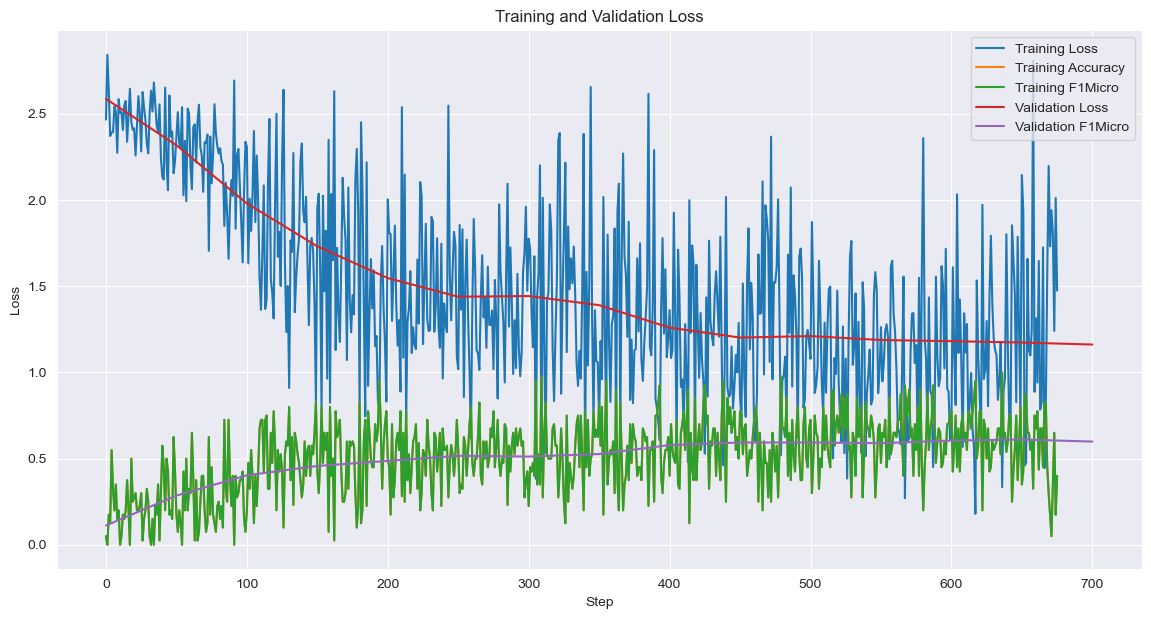

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(train_losses, label='Training Loss')
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(train_f1_micros, label='Training F1Micro')

plt.plot(range(0, 750, 50), val_losses, label='Validation Loss')
plt.plot(range(0, 750, 50), val_f1micro, label='Validation F1Micro')

plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
#TODO vypisovat accuracy na trenovacke a kontingencna tabulka na konci aa skusit tie data zhierarchizovat

In [22]:
def load_frozen_model(pb_path):
    with tf.gfile.GFile(pb_path, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    with tf.Graph().as_default() as graph:
        tf.import_graph_def(graph_def, name="")
    return graph

graph = load_frozen_model("fine_tuned_128_genres_with_val_vggish_model.pb")
print("Frozen model loaded successfully!")

Frozen model loaded successfully!


In [22]:
(features, labels, file_paths, genres) = _get_examples_batch_test(test_df)

 44%|████▎     | 396/908 [03:27<03:53,  2.19it/s]

Count of spectograms from this song ../mp3songs/spotify_dataset_stratified_first_genre/Voyager.mp3 is different then 8. And it is of size :   7


100%|██████████| 908/908 [08:07<00:00,  1.86it/s]


In [13]:
(features, labels) = _get_examples_batch_validation(val_df)


100%|██████████| 712/712 [06:47<00:00,  1.75it/s]


In [23]:
print(len(features))

7263


In [18]:
print(labels[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
features[0].shape

(96, 64)

In [23]:
(features, labels, file_paths, genres) = test_data

In [25]:
print(len(labels))

7263


In [26]:
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def classify(features, graph):
    with tf.Session(graph=graph) as sess:
        # Get input and output tensors
        input_tensor = graph.get_tensor_by_name(vggish_params.INPUT_TENSOR_NAME)  # Change as needed
        output_tensor = graph.get_tensor_by_name("mymodel/prediction:0")  # Change as needed

        # Run the model and get predictions
        predictions = sess.run(output_tensor, feed_dict={input_tensor: features})
        # print(predictions)
    # Take the maximum value for each prediction
    max_predictions = np.argmax(predictions, axis=1)
    return max_predictions, predictions

def calculate_metrics(predictions, labels):
    # Apply argmax to labels
    max_labels = np.argmax(labels, axis=1)
    print("Max labels: ", max_labels[0])
    # Calculate metrics
    accuracy = accuracy_score(max_labels, predictions)
    precision = precision_score(max_labels, predictions, average='micro', zero_division=1)
    precision_for_each_class = precision_score(max_labels, predictions, average=None, zero_division=1)
    recall = recall_score(max_labels, predictions, average='micro', zero_division=1)
    f1 = f1_score(max_labels, predictions, average='micro', zero_division=1)

    return accuracy, precision, precision_for_each_class, recall, f1

# Run inference
preds, predictions_probs = classify(features, graph)
print("Done classifying!")



Done classifying!


In [27]:
print(len(preds))

7263


In [28]:
print(preds)
print(predictions_probs[0])

[48 48 48 ... 54 48 48]
[6.24915538e-03 6.30289828e-03 7.43750157e-03 1.08285015e-02
 4.74831089e-03 3.99409141e-03 3.10218241e-03 9.21939034e-03
 7.75665324e-03 1.14120496e-02 7.63555244e-03 6.60418440e-03
 9.34859179e-03 1.10461526e-02 9.03286692e-03 2.62466702e-03
 1.42139685e-03 6.87943958e-03 5.32053364e-03 3.71371000e-03
 4.80872812e-03 1.87670253e-03 1.01230647e-02 8.21486581e-03
 1.35449064e-03 7.05416594e-03 6.66127866e-03 5.40155824e-03
 9.25846491e-03 3.75273335e-03 8.47105402e-03 2.03924603e-03
 4.57443111e-03 9.67934914e-03 8.80208053e-03 7.16852536e-03
 1.11823753e-02 1.66994717e-03 4.93864343e-03 3.34485667e-03
 5.15899900e-03 4.88672964e-03 6.02746091e-04 9.99458367e-04
 3.68043175e-03 1.24661857e-02 3.15295090e-03 1.10734710e-02
 2.97958702e-02 1.09405559e-03 1.02714431e-02 4.63834405e-03
 1.25445717e-03 6.82031037e-03 2.10153852e-02 1.02587393e-03
 1.91175111e-03 1.04031246e-02 4.52694902e-03 3.36574088e-03
 7.86381681e-03 5.25297271e-03 5.21815754e-03 1.33903995e-02


In [29]:
# Calculate and print metrics
accuracy, precision,precision_for_each_class, recall, f1 = calculate_metrics(preds, labels)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Precision for each class: {precision_for_each_class}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Max labels:  68
Accuracy: 0.011152416356877323
Precision: 0.011152416356877323
Precision for each class: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.34375    1.
 0.00944882 1.         1.         1.         1.         1.
 0.01880878 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.       

In [30]:
# Create a mapping of positive_class_index to genre
genre_mapping = df[['first_genre', 'positive_class_index']].drop_duplicates().sort_values('positive_class_index')

# Display the mapping
genre_mapping

first_genre  positive_class_index
204         acoustic pop                     0
110      adult standards                     1
16            album rock                     2
164                alt z                     3
166  alternative country                     4
..                   ...                   ...
228            reggaeton                   123
354                salsa                   124
91                 sleep                   125
80             soft rock                   126
158            vallenato                   127

[128 rows x 2 columns]

In [31]:
import pandas as pd
import numpy as np

# Create a DataFrame with file paths, labels, and predictions
print("Creating DataFrame with probs...")
data = {
    'file_path': file_paths,
    'genre': genres,
    'label': labels,
    'prediction': preds,
    'prediction_probabilities': predictions_probs.tolist()
}
df = pd.DataFrame(data)

# Create a dictionary for mapping
genre_dict = genre_mapping.set_index('positive_class_index')['first_genre'].to_dict()

# Add a column that maps predictions to genres
df['predicted_genre'] = df['prediction'].map(genre_dict)

# Add a column with the index of the maximum label
df['max_label_index'] = df['label'].apply(np.argmax)

df

Creating DataFrame with probs...


file_path  \
0     ../mp3songs/spotify_dataset_stratified_first_g...   
1     ../mp3songs/spotify_dataset_stratified_first_g...   
2     ../mp3songs/spotify_dataset_stratified_first_g...   
3     ../mp3songs/spotify_dataset_stratified_first_g...   
4     ../mp3songs/spotify_dataset_stratified_first_g...   
...                                                 ...   
7258  ../mp3songs/spotify_dataset_stratified_first_g...   
7259  ../mp3songs/spotify_dataset_stratified_first_g...   
7260  ../mp3songs/spotify_dataset_stratified_first_g...   
7261  ../mp3songs/spotify_dataset_stratified_first_g...   
7262  ../mp3songs/spotify_dataset_stratified_first_g...   

                         genre  \
0                      emo rap   
1                     boy band   
2           east coast hip hop   
3                    latin pop   
4                    reggaeton   
...                        ...   
7258                   brostep   
7259                 cloud rap   
7260               classic opm   
7261               baroque pop   
7262  classic oklahoma country   

                                                  label  prediction  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          48   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          48   
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          48   
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          48   
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          48   
...                                                 ...         ...   
7258  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          48   
7259  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          48   
7260  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          54   
7261  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          48   
7262  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          48   

                               prediction_probabilities predicted_genre  \
0     [0.006249155383557081, 0.006302898284047842, 0...   colombian pop   
1     [0.007133917883038521, 0.006950953509658575, 0...   colombian pop   
2     [0.01454758457839489, 0.008031326346099377, 0....   colombian pop   
3     [0.007803743705153465, 0.009317456744611263, 0...   colombian pop   
4     [0.004495350643992424, 0.0062168072909116745, ...   colombian pop   
...                                                 ...             ...   
7258  [0.010572533123195171, 0.017719395458698273, 0...   colombian pop   
7259  [0.007831797935068607, 0.009923952631652355, 0...   colombian pop   
7260  [0.008896693587303162, 0.008319168351590633, 0...         country   
7261  [0.00959449727088213, 0.007752752397209406, 0....   colombian pop   
7262  [0.006273103412240744, 0.007414565421640873, 0...   colombian pop   

      max_label_index  
0                  68  
1                  24  
2                  63  
3                  97  
4                 123  
...               ...  
7258               27  
7259               47  
7260               42  
7261               19  
7262               41  

[7263 rows x 7 columns]

In [25]:
df.head(1)

file_path          genre  \
0  ../mp3songs/spotify_dataset_stratified_first_g...  latin hip hop   

                                               label  prediction  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...          63   

                            prediction_probabilities     predicted_genre  
0  [0.01161882933229208, 0.01189463771879673, 0.0...  east coast hip hop

In [32]:
import pandas as pd

# Assuming df is your DataFrame with 'file_path', 'predicted_genre', 'genre', 'prediction', 'prediction_probabilities', and 'max_label_index' columns
# Create a dictionary for mapping class indices to genres
genre_dict = genre_mapping.set_index('positive_class_index')['first_genre'].to_dict()

# Expand the prediction_probabilities into separate columns
probabilities_df = pd.DataFrame(df['prediction_probabilities'].tolist(), index=df['file_path'])

# Rename the columns to indicate genre probabilities
probabilities_df.columns = [genre_dict[i] for i in range(probabilities_df.shape[1])]

# Reset the index to include file_path as a column
probabilities_df.reset_index(inplace=True)

# Add the genre, prediction, predicted_genre, and max_label_index columns
probabilities_df.insert(1, 'predicted_genre', df['predicted_genre'].values)
probabilities_df.insert(2, 'true_genre', df['genre'].values)
probabilities_df.insert(3, 'prediction_class_index', df['prediction'].values)
probabilities_df.insert(4, 'true_class_index', df['max_label_index'].values)

# Display the DataFrame
probabilities_df

file_path predicted_genre  \
0     ../mp3songs/spotify_dataset_stratified_first_g...   colombian pop   
1     ../mp3songs/spotify_dataset_stratified_first_g...   colombian pop   
2     ../mp3songs/spotify_dataset_stratified_first_g...   colombian pop   
3     ../mp3songs/spotify_dataset_stratified_first_g...   colombian pop   
4     ../mp3songs/spotify_dataset_stratified_first_g...   colombian pop   
...                                                 ...             ...   
7258  ../mp3songs/spotify_dataset_stratified_first_g...   colombian pop   
7259  ../mp3songs/spotify_dataset_stratified_first_g...   colombian pop   
7260  ../mp3songs/spotify_dataset_stratified_first_g...         country   
7261  ../mp3songs/spotify_dataset_stratified_first_g...   colombian pop   
7262  ../mp3songs/spotify_dataset_stratified_first_g...   colombian pop   

                    true_genre  prediction_class_index  true_class_index  \
0                      emo rap                      48                68   
1                     boy band                      48                24   
2           east coast hip hop                      48                63   
3                    latin pop                      48                97   
4                    reggaeton                      48               123   
...                        ...                     ...               ...   
7258                   brostep                      48                27   
7259                 cloud rap                      48                47   
7260               classic opm                      54                42   
7261               baroque pop                      48                19   
7262  classic oklahoma country                      48                41   

      acoustic pop  adult standards  album rock     alt z  \
0         0.006249         0.006303    0.007438  0.010829   
1         0.007134         0.006951    0.011705  0.014863   
2         0.014548         0.008031    0.009928  0.012316   
3         0.007804         0.009317    0.011482  0.015888   
4         0.004495         0.006217    0.005883  0.010926   
...            ...              ...         ...       ...   
7258      0.010573         0.017719    0.014763  0.020992   
7259      0.007832         0.009924    0.011925  0.015530   
7260      0.008897         0.008319    0.011249  0.015533   
7261      0.009594         0.007753    0.011714  0.013511   
7262      0.006273         0.007415    0.008888  0.013110   

      alternative country  ...  pov: indie      punk       r&b  reggae fusion  \
0                0.004748  ...    0.008092  0.003553  0.012676       0.000840   
1                0.006044  ...    0.011563  0.004267  0.012734       0.001054   
2                0.006580  ...    0.009341  0.006978  0.024548       0.001896   
3                0.006910  ...    0.013452  0.004590  0.013964       0.001262   
4                0.004236  ...    0.006890  0.003196  0.012731       0.000734   
...                   ...  ...         ...       ...       ...            ...   
7258             0.011265  ...    0.017320  0.007381  0.031773       0.003056   
7259             0.007098  ...    0.014520  0.004624  0.014663       0.001492   
7260             0.006134  ...    0.011990  0.004895  0.013319       0.001383   
7261             0.005536  ...    0.013388  0.004701  0.015489       0.001551   
7262             0.005107  ...    0.011159  0.003515  0.014913       0.001214   

      reggae rock  reggaeton     salsa     sleep  soft rock  vallenato  
0        0.005025   0.012545  0.005246  0.008519   0.004698   0.008723  
1        0.006523   0.014468  0.006828  0.009596   0.006820   0.009167  
2        0.008500   0.021790  0.010840  0.017293   0.006964   0.016672  
3        0.006661   0.014763  0.006779  0.010624   0.006913   0.010496  
4        0.003624   0.013826  0.004827  0.008672   0.004553   0.007596  
...           ...        ...       ...       ...        ...        ...  
7258     0.0094

#TODO tu sa opytat bednara ze ako. Ci to zgrupim pre kazdy frame (8) a tak zoradim a vyhodnotim alebo ako ale celkovo slabe pravdepodobnosti mam

In [21]:
probabilities_df

NameError: name 'probabilities_df' is not defined

In [39]:
# Select the first row
first_row = probabilities_df.iloc[0]

# Exclude the 'file_path' and 'predicted_genre' columns to get only genre values
genre_values = first_row.drop(['file_path', 'predicted_genre','true_genre', 'prediction_class_index', 'true_class_index'])

# Display the genre values
genre_values

acoustic pop           0.009062
adult standards        0.021273
album rock              0.00889
alt z                  0.022165
alternative country    0.006145
                         ...   
reggaeton               0.00506
salsa                  0.004628
sleep                  0.004219
soft rock               0.00653
vallenato               0.00201
Name: 0, Length: 128, dtype: object

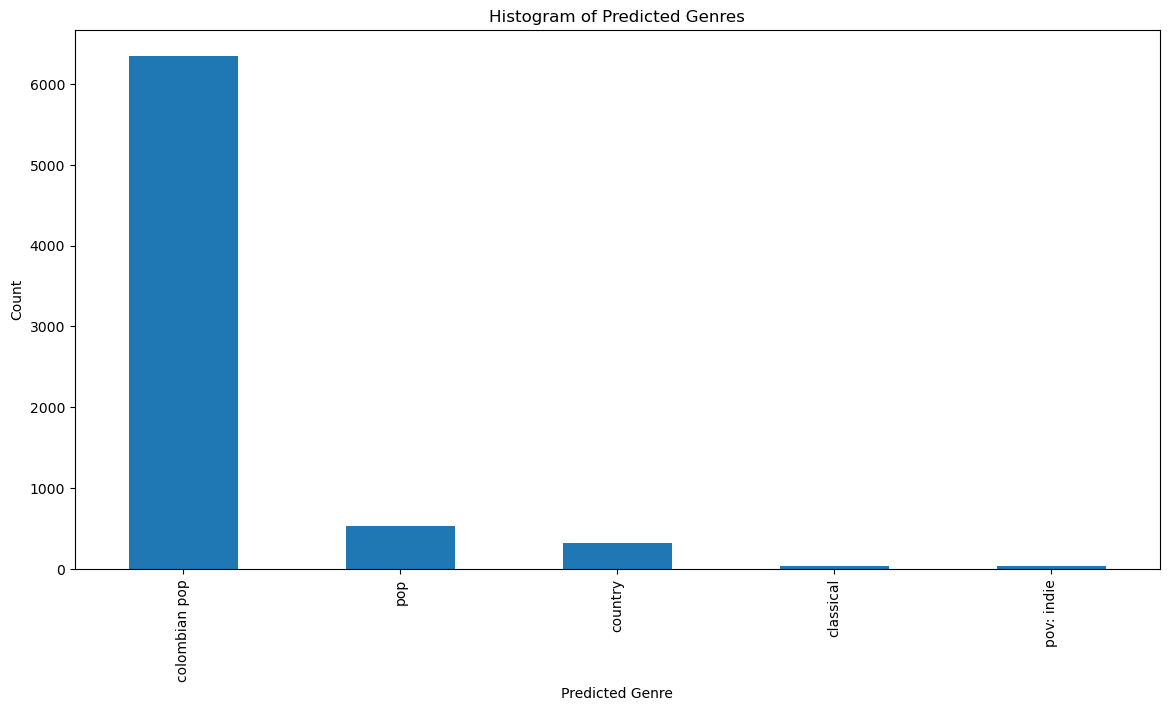

In [33]:
import matplotlib.pyplot as plt

# Plot the histogram of the count of predicted genres
plt.figure(figsize=(14, 7))
df['predicted_genre'].value_counts().plot(kind='bar')
plt.title('Histogram of Predicted Genres')
plt.xlabel('Predicted Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

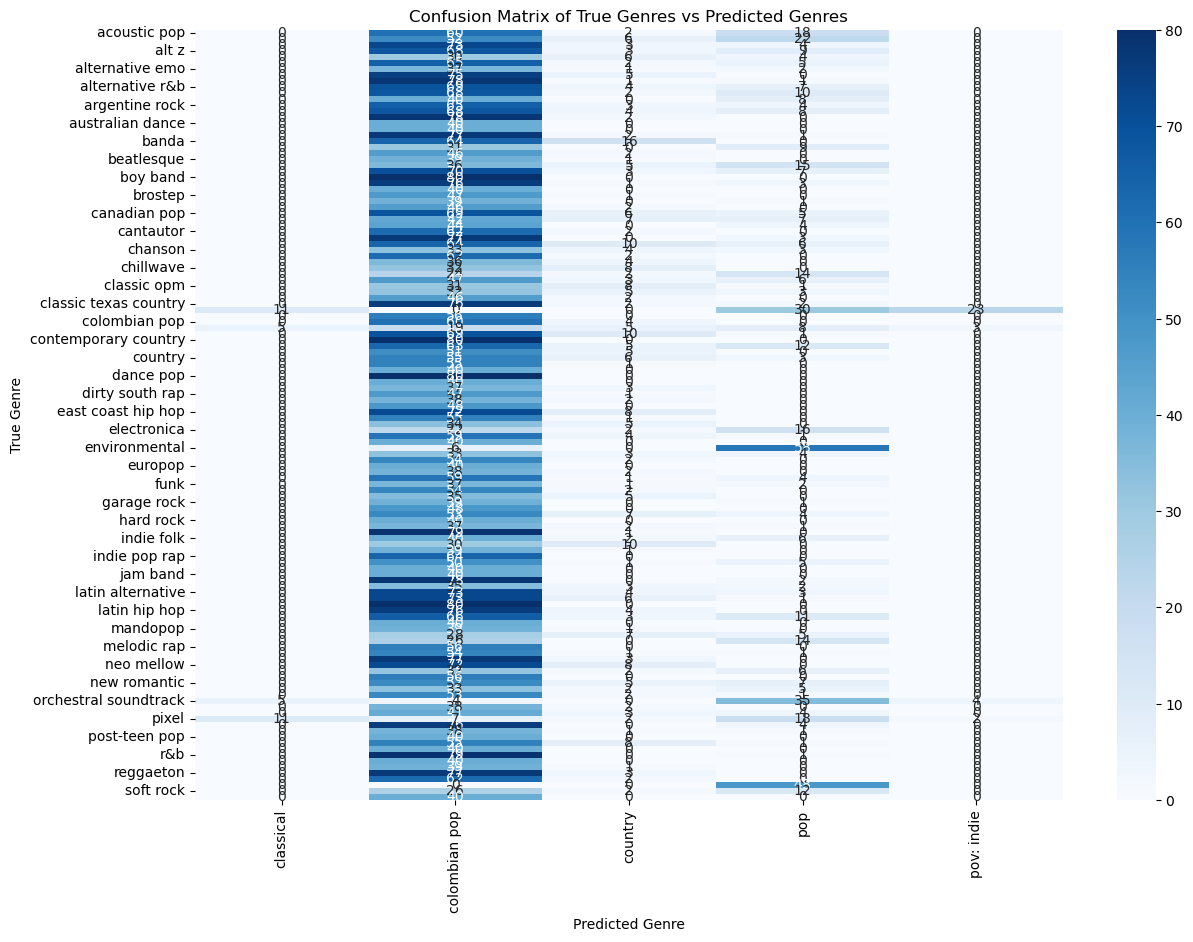

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a contingency table (confusion matrix) from predicted_genre and true_genre
contingency_table = pd.crosstab(probabilities_df['true_genre'], probabilities_df['predicted_genre'], rownames=['True Genre'], colnames=['Predicted Genre'])

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of True Genres vs Predicted Genres')
plt.xlabel('Predicted Genre')
plt.ylabel('True Genre')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()